## ISI Epilepsy Exploratory Data Analysis (EDA) with H2o AutoML (Montreal) 

<u>**Goal:**</u> Conduct an exploratory data analysis with the prediction of pathology 

20/7/2022

---

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Import dataset

epilepsy = pd.read_csv('/Users/marek/Desktop/Marek/Jobs/ISI/Work/data/isi_data.csv')
# Remove unnamed column: ,index_col=0
epilepsy.head()

Unnamed: 0  patient_id channel_name  resected  structure onset_channel  \
0           0         583          ra1         0        NaN       NON_SOZ   
1           1         583          ra2         0        NaN       NON_SOZ   
2           2         583          ra3         0        NaN       NON_SOZ   
3           3         583          ra4         0        NaN       NON_SOZ   
4           4         583          ra5         0        NaN       NON_SOZ   

  pathology  outcome  HFO_65.0-80.0  HFO_80.0-250.0  ...  \
0    normal     11.0              0              11  ...   
1    normal     11.0              0              16  ...   
2    normal     11.0              0              20  ...   
3    normal     11.0              0              27  ...   
4    normal     11.0              0              11  ...   

   coherence_80.0-250.0  lin_corr_median_250.0-600.0  ren_250.0-600.0  \
0              0.997413                     0.990955         0.004121   
1              0.998458                     0.993981         0.002847   
2              0.999506                     0.996993         0.001647   
3              0.999126                     0.995900         0.002311   
4              0.997734                     0.995822         0.002367   

   phase_sync_250.0-600.0  phase_const_250.0-600.0  pli_250.0-600.0  \
0                0.970733                      1.0         0.815222   
1                0.979349                      1.0         0.841924   
2                0.987957                      1.0         0.857311   
3                0.986385                      1.0         0.852814   
4                0.986189                      1.0         0.861413   

   pli_tau_250.0-600.0  coherence_250.0-600.0  segm_type  segm_number  
0            -0.146667               0.994151          0            0  
1            -0.113333               0.996071          0            0  
2            -0.043333               0.997980          0            0  
3            -0.036667               0.997646          0            0  
4            -0.058333               0.997589          0            0  

[5 rows x 98 columns]

In [4]:
# Plotting setup

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 160

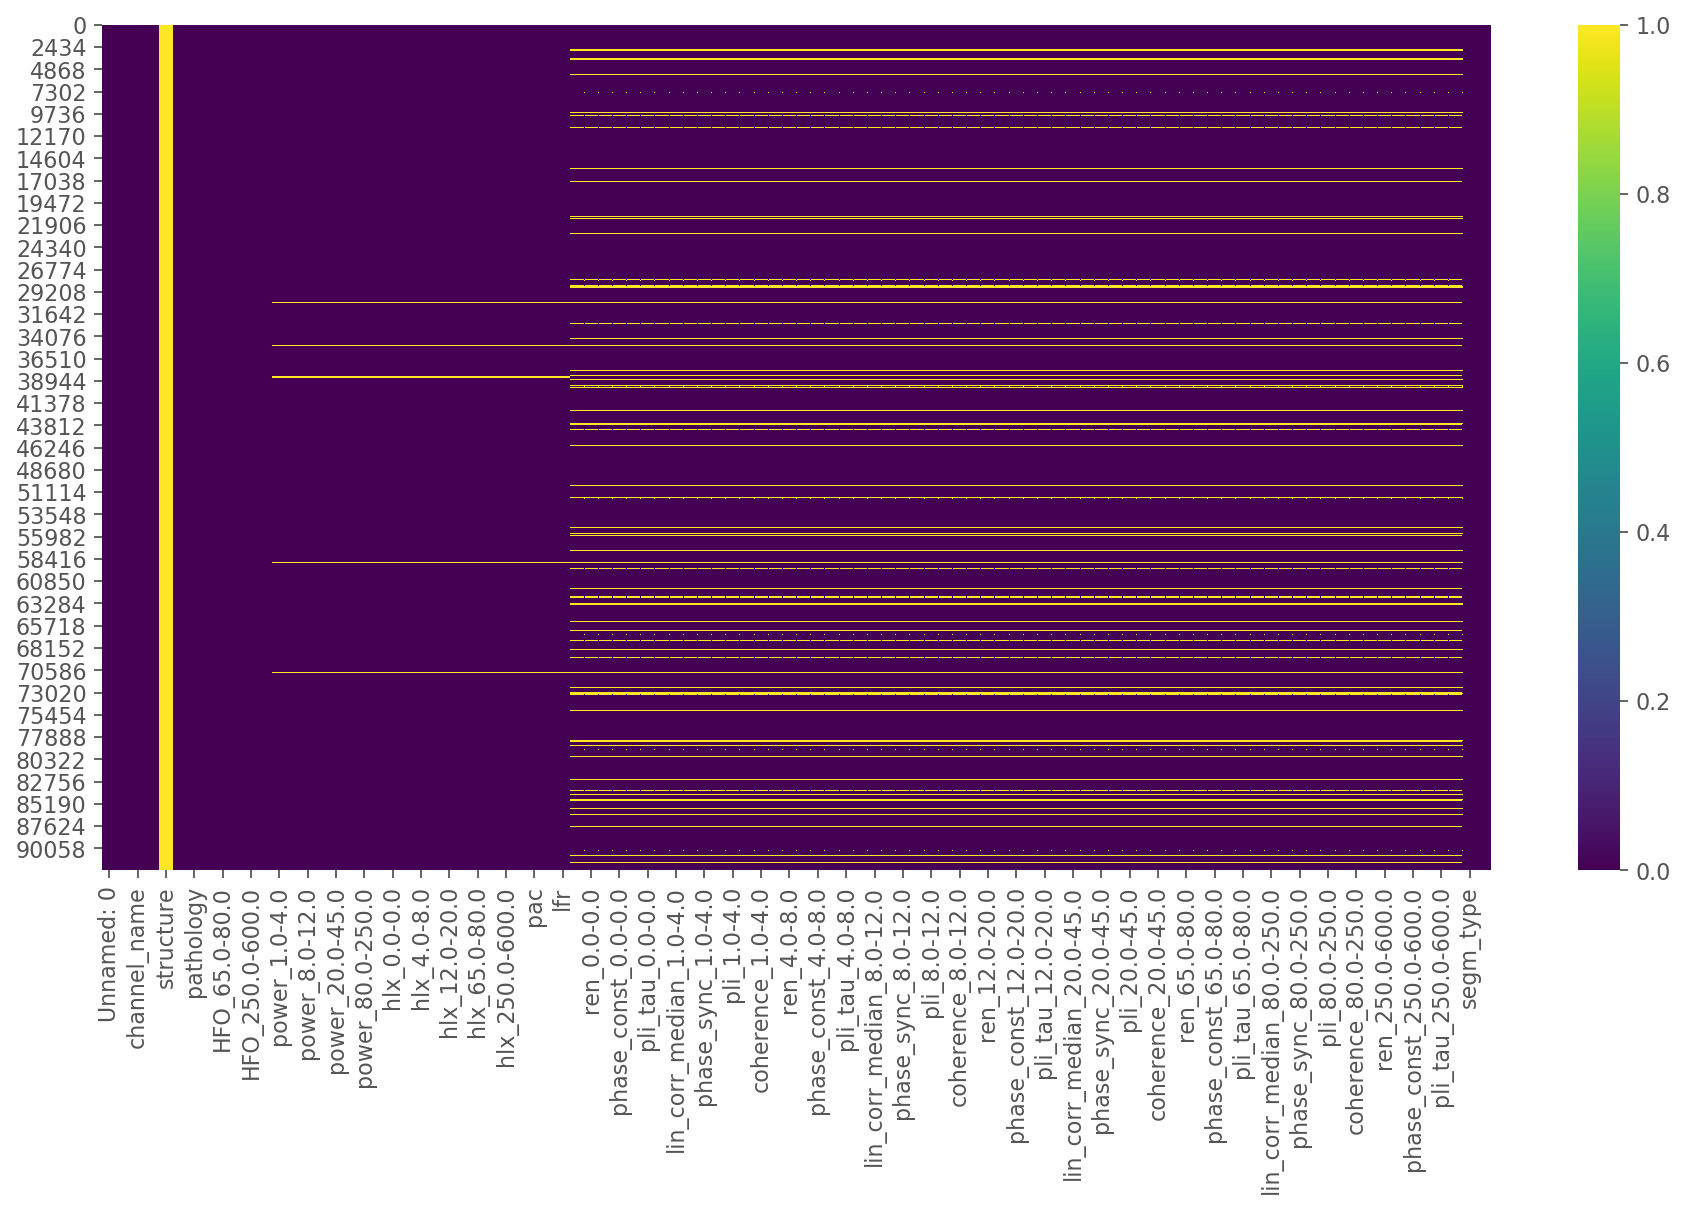

In [5]:
# Show null columns

sns.heatmap(epilepsy.isnull(), cmap = 'viridis', cbar = True);

#pd.options.display.min_rows = 30
#epilepsy.isnull().sum()

In [6]:
# Drop index column

epilepsy = epilepsy.loc[:, ~epilepsy.columns.str.contains('^Unnamed')]
epilepsy.head()

patient_id channel_name  resected  structure onset_channel pathology  \
0         583          ra1         0        NaN       NON_SOZ    normal   
1         583          ra2         0        NaN       NON_SOZ    normal   
2         583          ra3         0        NaN       NON_SOZ    normal   
3         583          ra4         0        NaN       NON_SOZ    normal   
4         583          ra5         0        NaN       NON_SOZ    normal   

   outcome  HFO_65.0-80.0  HFO_80.0-250.0  HFO_250.0-600.0  ...  \
0     11.0              0              11               34  ...   
1     11.0              0              16               40  ...   
2     11.0              0              20               35  ...   
3     11.0              0              27               37  ...   
4     11.0              0              11               58  ...   

   coherence_80.0-250.0  lin_corr_median_250.0-600.0  ren_250.0-600.0  \
0              0.997413                     0.990955         0.004121   
1              0.998458                     0.993981         0.002847   
2              0.999506                     0.996993         0.001647   
3              0.999126                     0.995900         0.002311   
4              0.997734                     0.995822         0.002367   

   phase_sync_250.0-600.0  phase_const_250.0-600.0  pli_250.0-600.0  \
0                0.970733                      1.0         0.815222   
1                0.979349                      1.0         0.841924   
2                0.987957                      1.0         0.857311   
3                0.986385                      1.0         0.852814   
4                0.986189                      1.0         0.861413   

   pli_tau_250.0-600.0  coherence_250.0-600.0  segm_type  segm_number  
0            -0.146667               0.994151          0            0  
1            -0.113333               0.996071          0            0  
2            -0.043333               0.997980          0            0  
3            -0.036667               0.997646          0            0  
4            -0.058333               0.997589          0            0  

[5 rows x 97 columns]

In [7]:
# Remove unnecessary columns

epilepsy = epilepsy.drop(['structure'], axis=1)
epilepsy.head()

patient_id channel_name  resected onset_channel pathology  outcome  \
0         583          ra1         0       NON_SOZ    normal     11.0   
1         583          ra2         0       NON_SOZ    normal     11.0   
2         583          ra3         0       NON_SOZ    normal     11.0   
3         583          ra4         0       NON_SOZ    normal     11.0   
4         583          ra5         0       NON_SOZ    normal     11.0   

   HFO_65.0-80.0  HFO_80.0-250.0  HFO_250.0-600.0  spike_rate  ...  \
0              0              11               34          22  ...   
1              0              16               40          49  ...   
2              0              20               35          61  ...   
3              0              27               37          66  ...   
4              0              11               58          63  ...   

   coherence_80.0-250.0  lin_corr_median_250.0-600.0  ren_250.0-600.0  \
0              0.997413                     0.990955         0.004121   
1              0.998458                     0.993981         0.002847   
2              0.999506                     0.996993         0.001647   
3              0.999126                     0.995900         0.002311   
4              0.997734                     0.995822         0.002367   

   phase_sync_250.0-600.0  phase_const_250.0-600.0  pli_250.0-600.0  \
0                0.970733                      1.0         0.815222   
1                0.979349                      1.0         0.841924   
2                0.987957                      1.0         0.857311   
3                0.986385                      1.0         0.852814   
4                0.986189                      1.0         0.861413   

   pli_tau_250.0-600.0  coherence_250.0-600.0  segm_type  segm_number  
0            -0.146667               0.994151          0            0  
1            -0.113333               0.996071          0            0  
2            -0.043333               0.997980          0            0  
3            -0.036667               0.997646          0            0  
4            -0.058333               0.997589          0            0  

[5 rows x 96 columns]

In [8]:
# Basic statistics

epilepsy.describe()

patient_id      resected       outcome  HFO_65.0-80.0  \
count  92464.000000  92464.000000  92464.000000        92464.0   
mean     537.303340      0.121647     23.258695            0.0   
std      530.808972      0.326880     11.931679            0.0   
min       59.000000      0.000000     11.000000            0.0   
25%       74.000000      0.000000     11.000000            0.0   
50%       92.000000      0.000000     22.000000            0.0   
75%     1021.000000      0.000000     31.000000            0.0   
max     1718.000000      1.000000     42.000000            0.0   

       HFO_80.0-250.0  HFO_250.0-600.0    spike_rate  power_1.0-4.0  \
count    92464.000000     92464.000000  92464.000000   9.185100e+04   
mean        18.444627        32.607555     19.159565   3.177411e-01   
std         18.584647        39.284876     37.979718   5.231405e-01   
min          0.000000         0.000000      0.000000   2.364873e-09   
25%          5.000000         5.000000      1.000000   4.768943e-06   
50%         13.000000        17.000000      6.000000   1.325354e-01   
75%         26.000000        45.000000     20.000000   4.901011e-01   
max        157.000000       335.000000    904.000000   1.649692e+01   

       power_4.0-8.0  power_8.0-12.0  ...  coherence_80.0-250.0  \
count   9.185100e+04    9.185100e+04  ...          84751.000000   
mean    2.887090e-01    2.387289e-01  ...              0.921873   
std     5.700138e-01    4.831948e-01  ...              0.079289   
min     5.991072e-10    1.304421e-10  ...              0.413911   
25%     1.300755e-06    4.188223e-07  ...              0.843208   
50%     6.279375e-02    2.494825e-02  ...              0.962194   
75%     3.697457e-01    2.872959e-01  ...              0.997170   
max     1.779064e+01    1.057295e+01  ...              1.000000   

       lin_corr_median_250.0-600.0  ren_250.0-600.0  phase_sync_250.0-600.0  \
count                 84751.000000     84751.000000            84751.000000   
mean                      0.710600         0.030662                0.663745   
std                       0.308275         0.036740                0.324243   
min                      -0.628716         0.000013                0.044833   
25%                       0.372571         0.005341                0.301537   
50%                       0.920298         0.022501                0.856442   
75%                       0.988867         0.047192                0.967804   
max                       0.999997         1.034580                0.999998   

       phase_const_250.0-600.0  pli_250.0-600.0  pli_tau_250.0-600.0  \
count             84751.000000     84751.000000         84751.000000   
mean                  0.041663         0.035568            -0.002958   
std                   0.199820         0.171318             0.031019   
min                   0.000000         0.000000            -0.706667   
25%                   0.000000         0.000000             0.000000   
50%                   0.000000         0.000000             0.000000   
75%                   0.000000         0.000000             0.000000   
max                   1.000000         0.999540             0.356667   

       coherence_250.0-600.0     segm_type   segm_number  
count           84751.000000  92464.000000  92464.000000  
mean                0.899877      6.250000      0.562500  
std                 0.097597      4.548376      0.788099  
min                 0.645227      0.000000      0.000000  
25%                 0.787374      1.750000      0.000000  
50%                 0.956153      8.000000      0.000000  
75%                 0.993218     10.250000      1.000000  
max                 0.999999     12.000000      2.000000  

[8 rows x 93 columns]

In [9]:
# Correlatin matrix + rounding

corrmat = epilepsy.corr()
#pd.options.display.float_format = '{:.3f}'.format
corrmat.round(3)

patient_id  resected  outcome  HFO_65.0-80.0  \
patient_id                  1.000     0.166   -0.043            NaN   
resected                    0.166     1.000    0.016            NaN   
outcome                    -0.043     0.016    1.000            NaN   
HFO_65.0-80.0                 NaN       NaN      NaN            NaN   
HFO_80.0-250.0             -0.020     0.245    0.016            NaN   
...                           ...       ...      ...            ...   
pli_250.0-600.0            -0.002     0.056   -0.032            NaN   
pli_tau_250.0-600.0         0.011    -0.082   -0.030            NaN   
coherence_250.0-600.0       0.821     0.152    0.008            NaN   
segm_type                  -0.000    -0.000    0.000            NaN   
segm_number                 0.000    -0.000    0.000            NaN   

                       HFO_80.0-250.0  HFO_250.0-600.0  spike_rate  \
patient_id                     -0.020            0.184      -0.056   
resected                        0.245            0.133       0.244   
outcome                         0.016            0.012      -0.025   
HFO_65.0-80.0                     NaN              NaN         NaN   
HFO_80.0-250.0                  1.000            0.429       0.653   
...                               ...              ...         ...   
pli_250.0-600.0                -0.035            0.058       0.028   
pli_tau_250.0-600.0             0.040           -0.021      -0.009   
coherence_250.0-600.0          -0.032            0.255      -0.061   
segm_type                       0.008           -0.032       0.005   
segm_number                     0.008            0.082      -0.009   

                       power_1.0-4.0  power_4.0-8.0  power_8.0-12.0  ...  \
patient_id                     0.510          0.428           0.407  ...   
resected                       0.097          0.041           0.035  ...   
outcome                        0.063         -0.010          -0.062  ...   
HFO_65.0-80.0                    NaN            NaN             NaN  ...   
HFO_80.0-250.0                 0.006         -0.046          -0.062  ...   
...                              ...            ...             ...  ...   
pli_250.0-600.0                0.065          0.112           0.151  ...   
pli_tau_250.0-600.0           -0.014         -0.029          -0.083  ...   
coherence_250.0-600.0          0.506          0.452           0.456  ...   
segm_type                     -0.022         -0.027          -0.039  ...   
segm_number                   -0.001          0.008           0.022  ...   

                       coherence_80.0-250.0  lin_corr_median_250.0-600.0  \
patient_id                            0.796                        0.798   
resected                              0.140                        0.149   
outcome                               0.028                        0.016   
HFO_65.0-80.0                           NaN                          NaN   
HFO_80.0-250.0                       -0.024                       -0.023   
...                                     ...                          ...   
pli_250.0-600.0                       0.185                        0.183   
pli_tau_250.0-600.0                  -0.090                       -0.087   
coherence_250.0-600.0                 0.921                        0.990   
segm_type                             0.008                        0.034   
segm_number                           0.021                        0.014   

                       ren_250.0-600.0  phase_sync_250.0-600.0  \
patient_id                      -0.570                   0.823   
resected                        -0.047                   0.154   
outcome                         -0.020                   0.012   
HFO_65.0-80.0                      NaN                     NaN   
HFO_80.0-250.0                   0.256                  -0.027   
...                                ...                     ...   
pli_250.0-600.0                 -0.139   

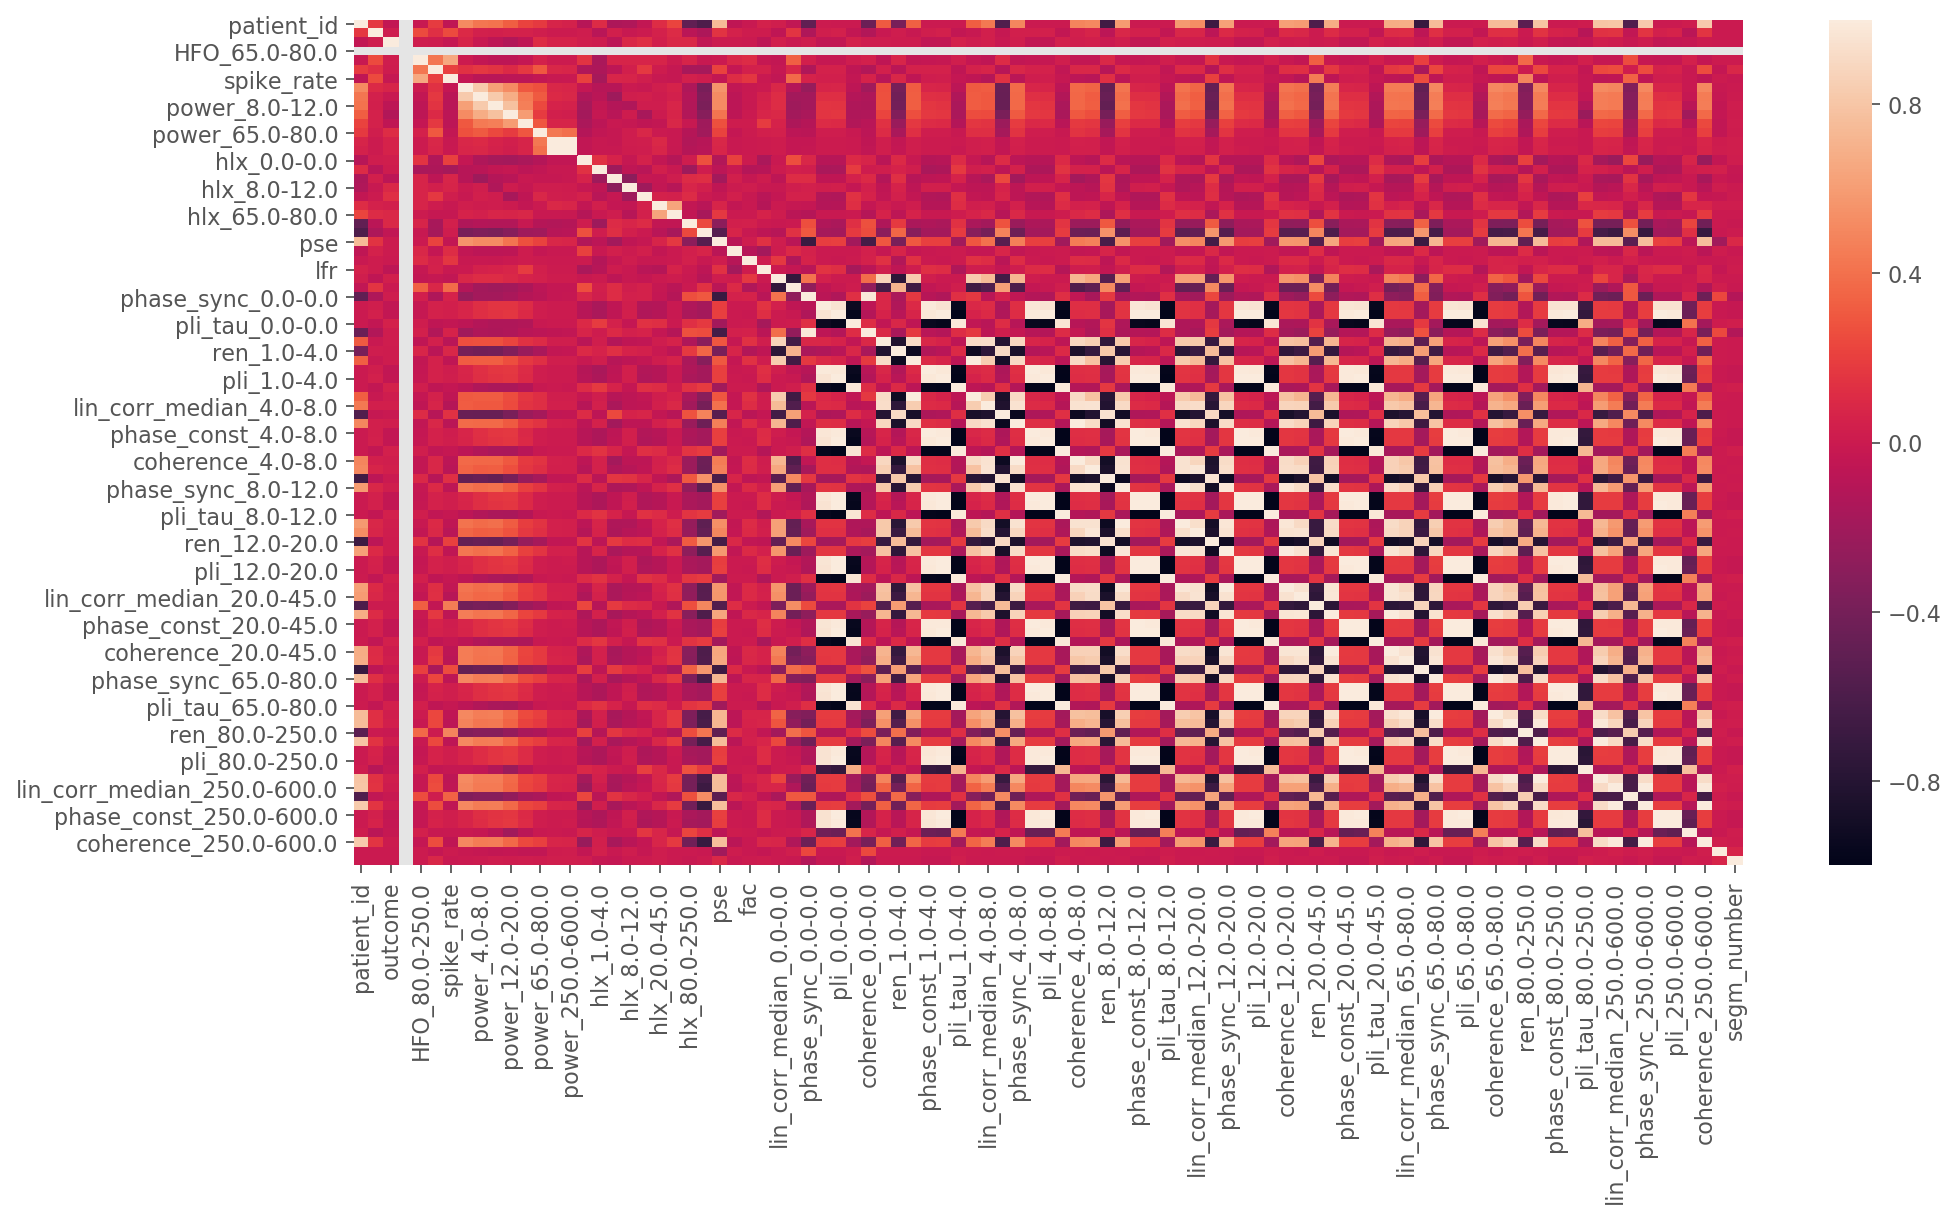

In [10]:
# Correlation matrix heatmap

sns.heatmap(corrmat);

In [11]:
# Columns names

cols = epilepsy.columns
print(list(cols))

['patient_id', 'channel_name', 'resected', 'onset_channel', 'pathology', 'outcome', 'HFO_65.0-80.0', 'HFO_80.0-250.0', 'HFO_250.0-600.0', 'spike_rate', 'power_1.0-4.0', 'power_4.0-8.0', 'power_8.0-12.0', 'power_12.0-20.0', 'power_20.0-45.0', 'power_65.0-80.0', 'power_80.0-250.0', 'power_250.0-600.0', 'hlx_0.0-0.0', 'hlx_1.0-4.0', 'hlx_4.0-8.0', 'hlx_8.0-12.0', 'hlx_12.0-20.0', 'hlx_20.0-45.0', 'hlx_65.0-80.0', 'hlx_80.0-250.0', 'hlx_250.0-600.0', 'pse', 'pac', 'fac', 'lfr', 'lin_corr_median_0.0-0.0', 'ren_0.0-0.0', 'phase_sync_0.0-0.0', 'phase_const_0.0-0.0', 'pli_0.0-0.0', 'pli_tau_0.0-0.0', 'coherence_0.0-0.0', 'lin_corr_median_1.0-4.0', 'ren_1.0-4.0', 'phase_sync_1.0-4.0', 'phase_const_1.0-4.0', 'pli_1.0-4.0', 'pli_tau_1.0-4.0', 'coherence_1.0-4.0', 'lin_corr_median_4.0-8.0', 'ren_4.0-8.0', 'phase_sync_4.0-8.0', 'phase_const_4.0-8.0', 'pli_4.0-8.0', 'pli_tau_4.0-8.0', 'coherence_4.0-8.0', 'lin_corr_median_8.0-12.0', 'ren_8.0-12.0', 'phase_sync_8.0-12.0', 'phase_const_8.0-12.0', 'pli

In [12]:
# Split epilepsy dataset to Montreal & Brno dataframe

df_montreal, df_brno = [x for _, x in epilepsy.groupby(epilepsy['patient_id'] < 100)]

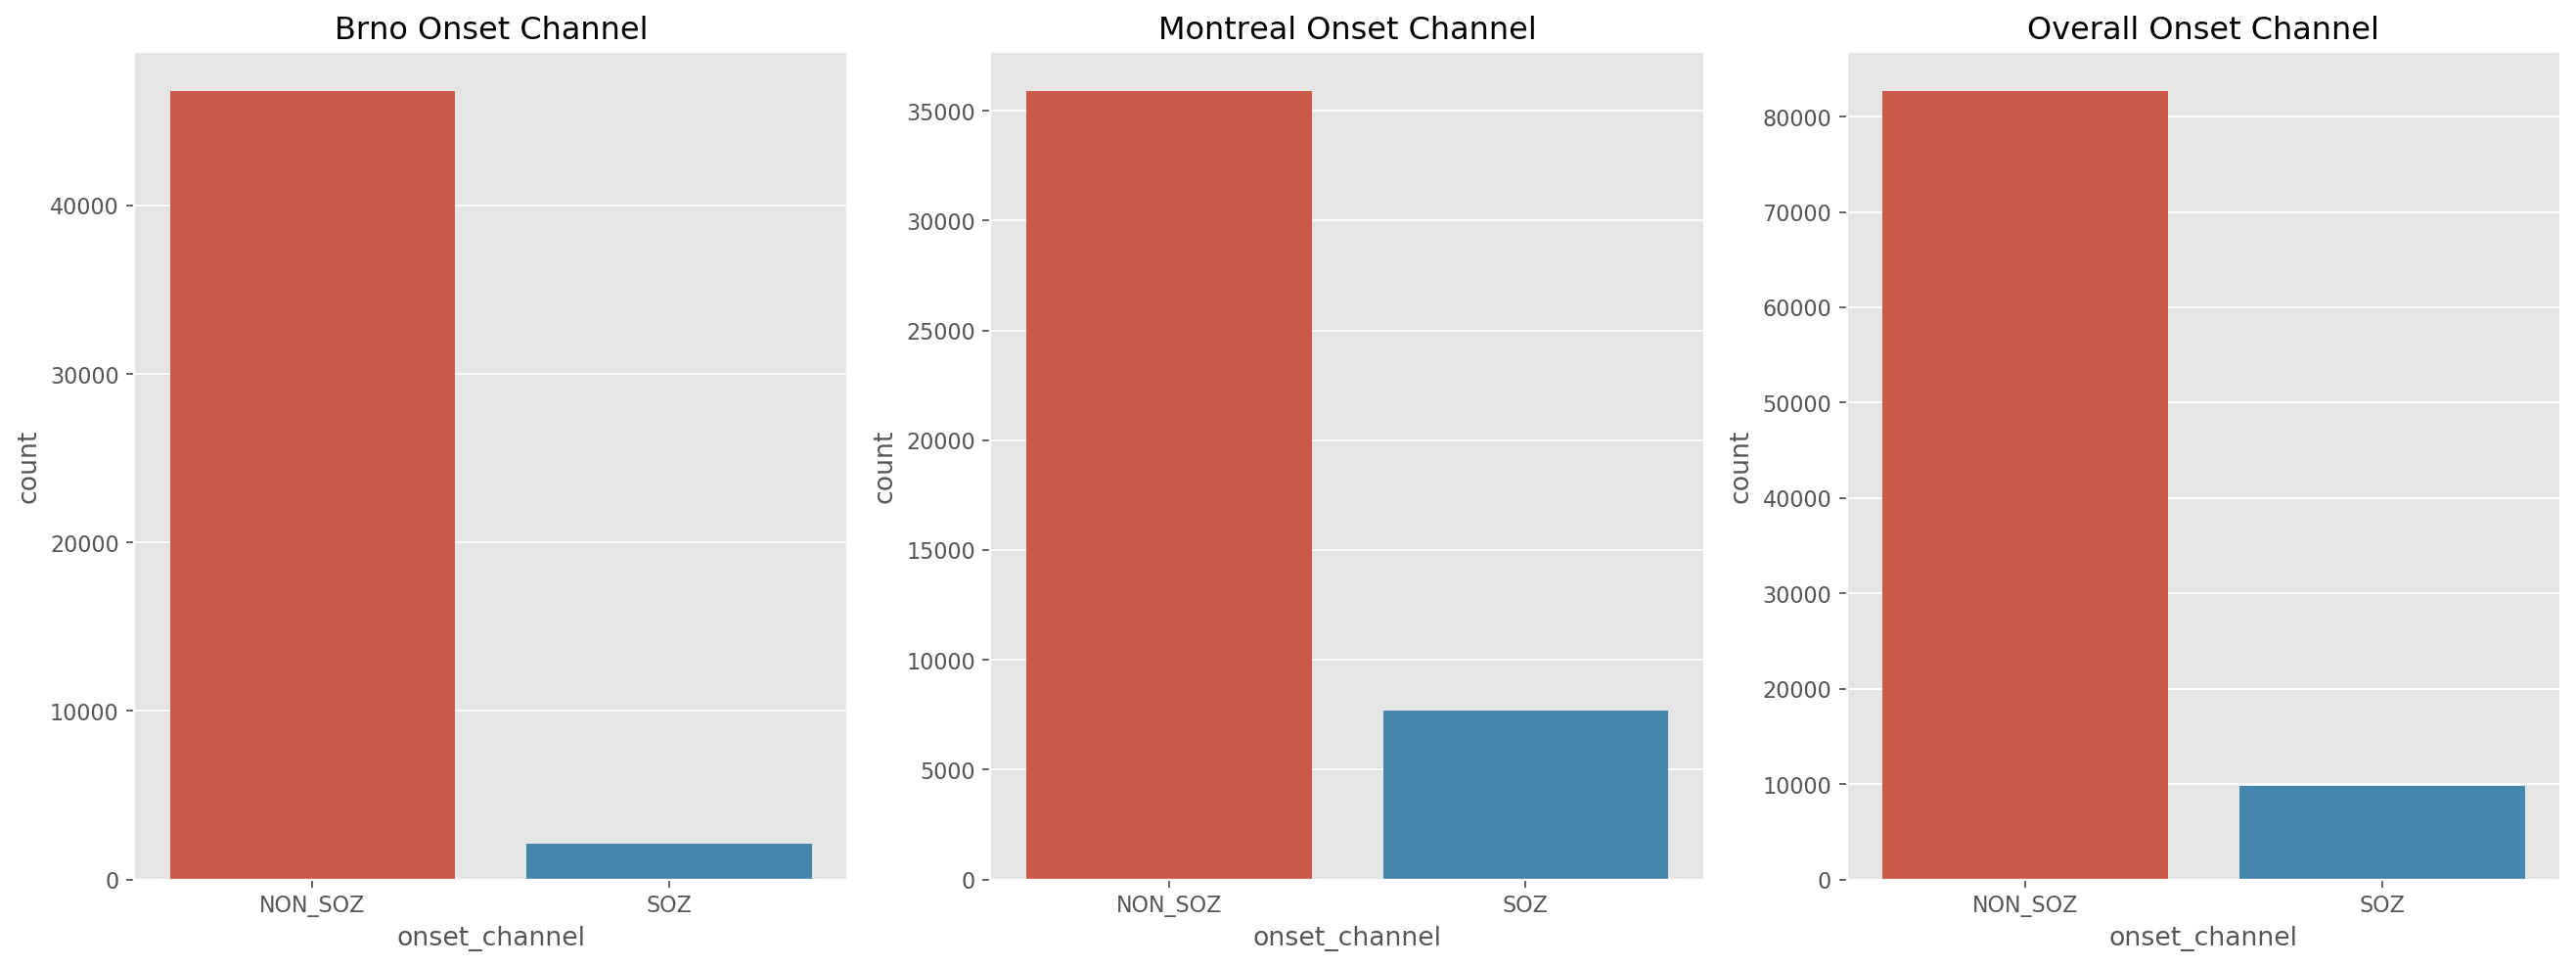

In [13]:
# Onset channels countplots

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('onset_channel', data = df_brno, ax = ax[0])
ax[0].title.set_text('Brno Onset Channel')

sns.countplot('onset_channel', data = df_montreal, ax = ax[1])
ax[1].title.set_text('Montreal Onset Channel')

sns.countplot('onset_channel', data = epilepsy, ax = ax[2])
ax[2].title.set_text('Overall Onset Channel')

#epilepsy['onset_channel'].value_counts()
#epilepsy['onset_channel'].value_counts().plot.pie(autopct = '%1.2f%%');

plt.show()

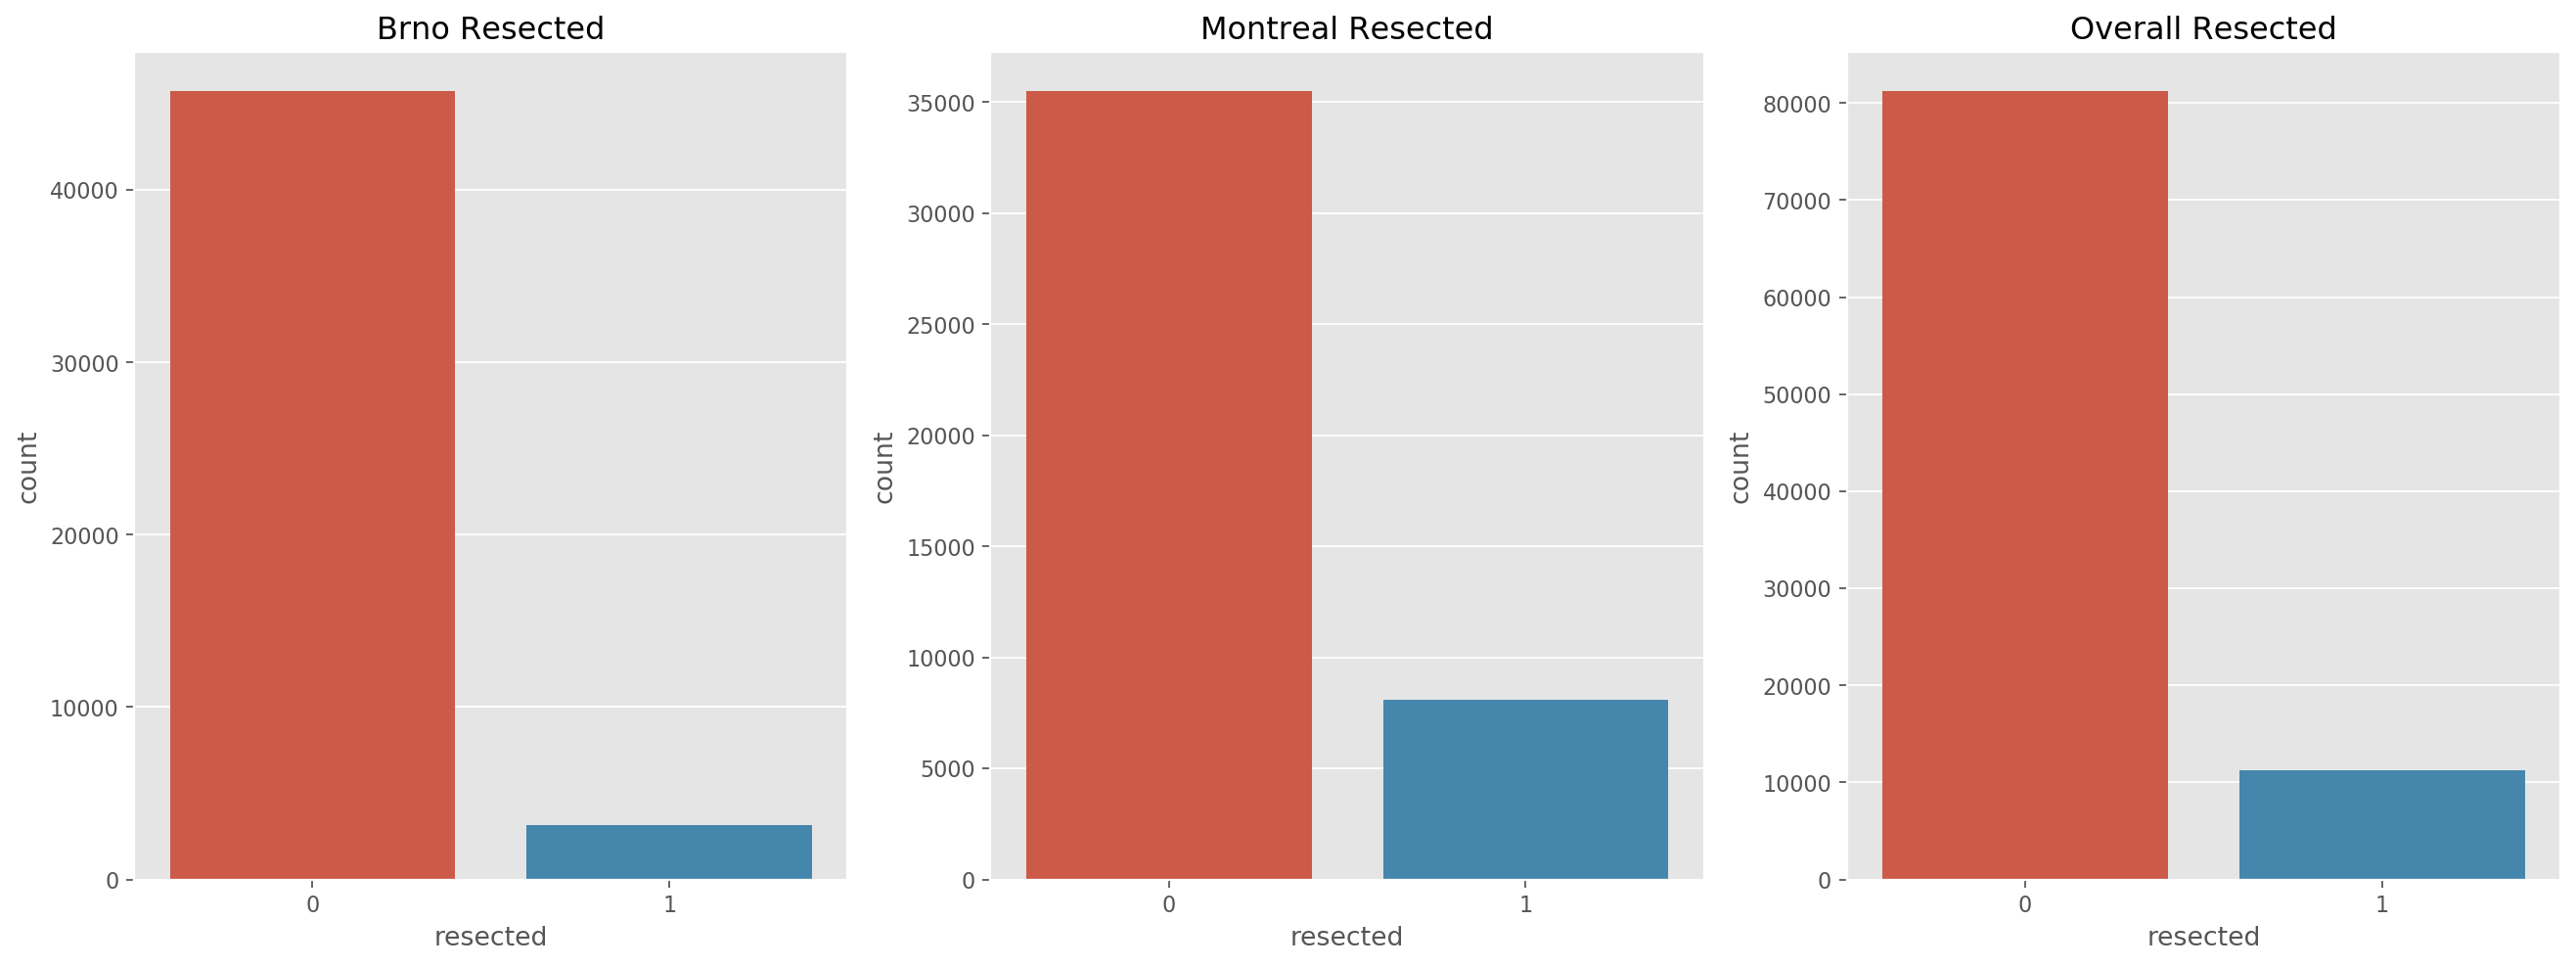

In [14]:
# Resected countplots

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('resected', data = df_brno, ax = ax[0])
ax[0].title.set_text('Brno Resected')

sns.countplot('resected', data = df_montreal, ax = ax[1])
ax[1].title.set_text('Montreal Resected')

sns.countplot('resected', data = epilepsy, ax = ax[2])
ax[2].title.set_text('Overall Resected')

plt.show()

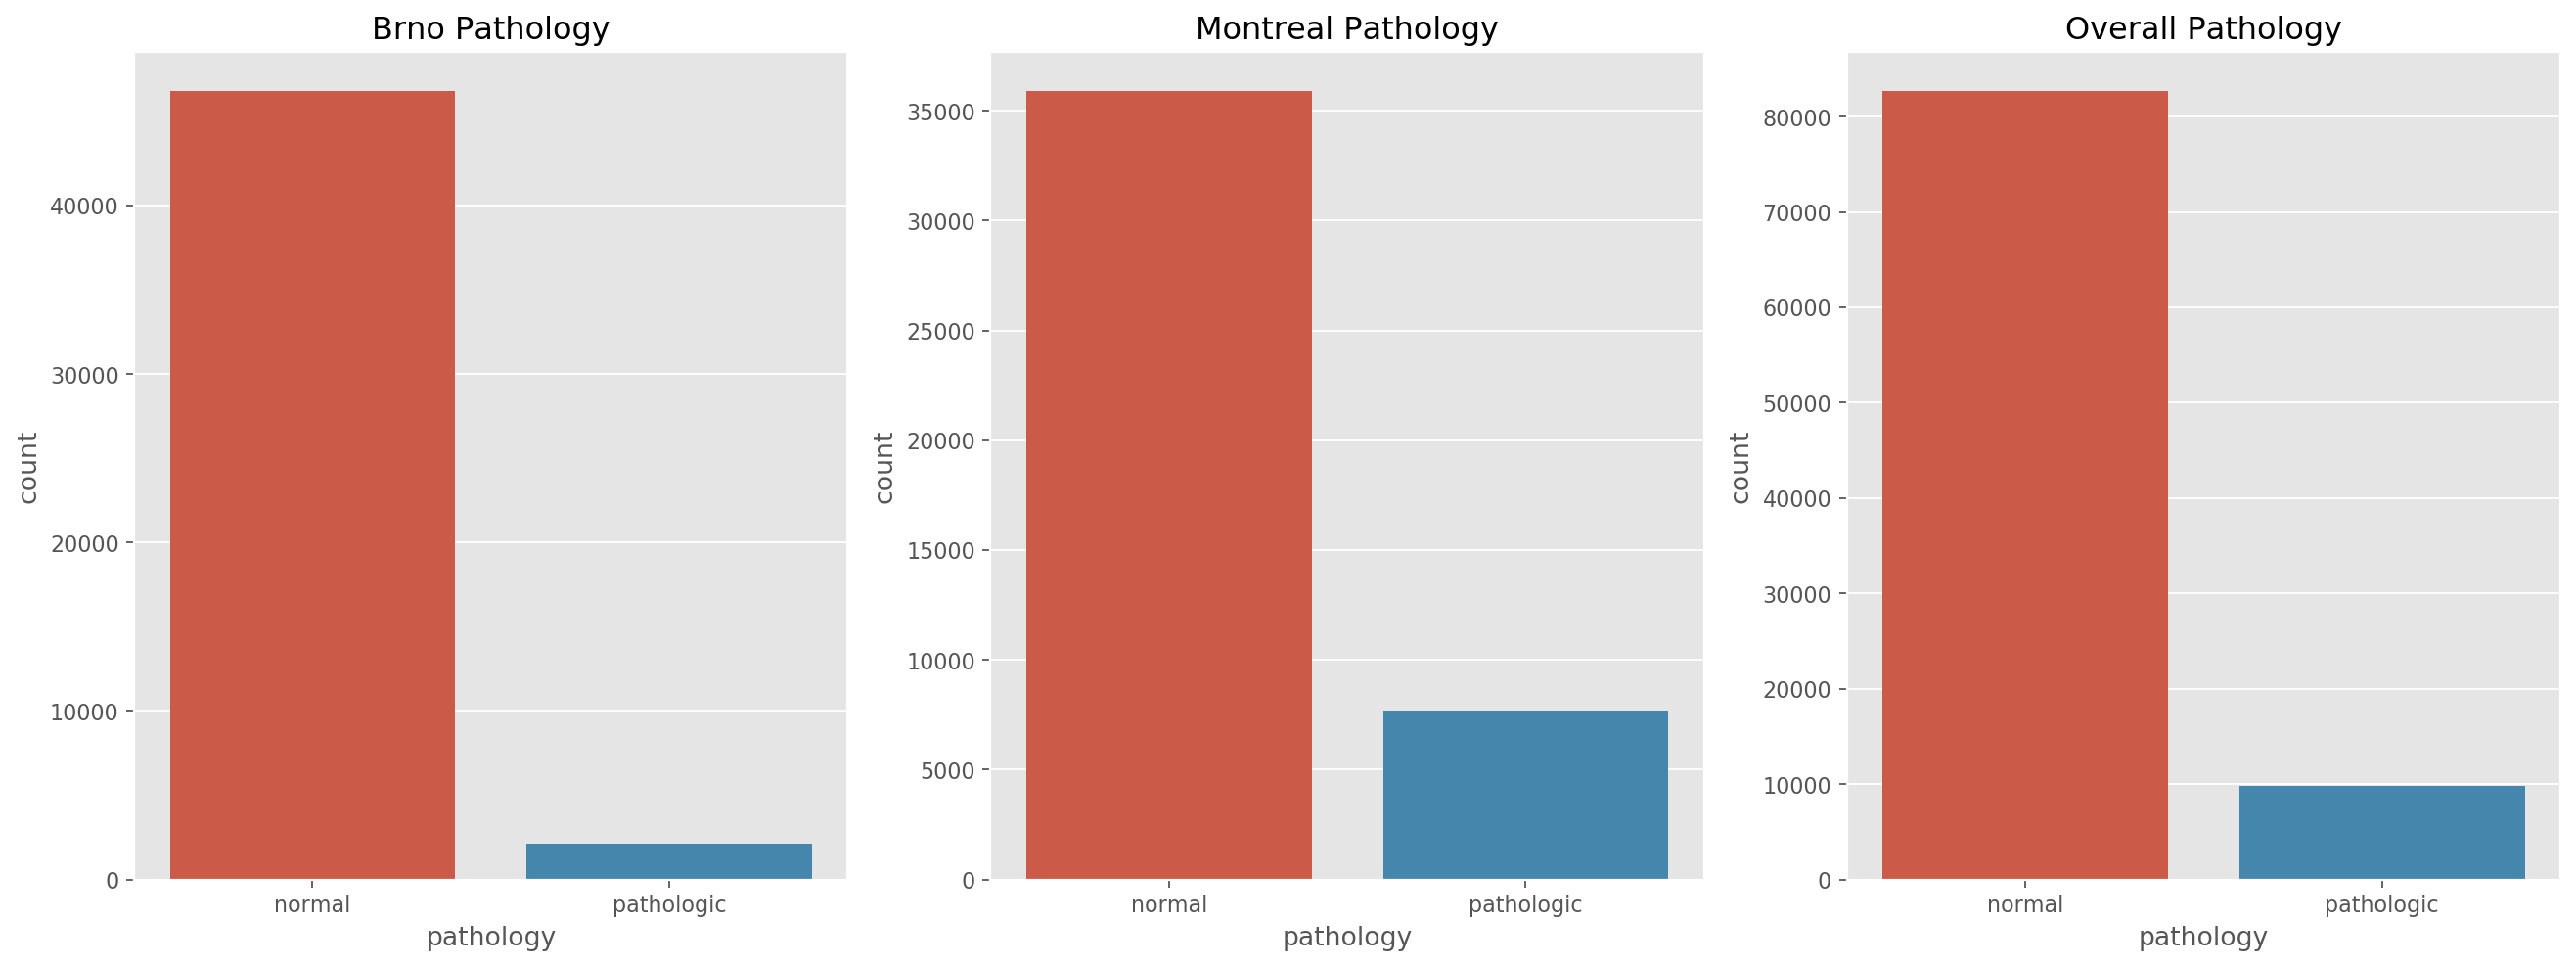

In [15]:
# Pathology countplot

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('pathology', data = df_brno, ax = ax[0])
ax[0].title.set_text('Brno Pathology')

sns.countplot('pathology', data = df_montreal, ax = ax[1])
ax[1].title.set_text('Montreal Pathology')

sns.countplot('pathology', data = epilepsy, ax = ax[2])
ax[2].title.set_text('Overall Pathology')

plt.show()

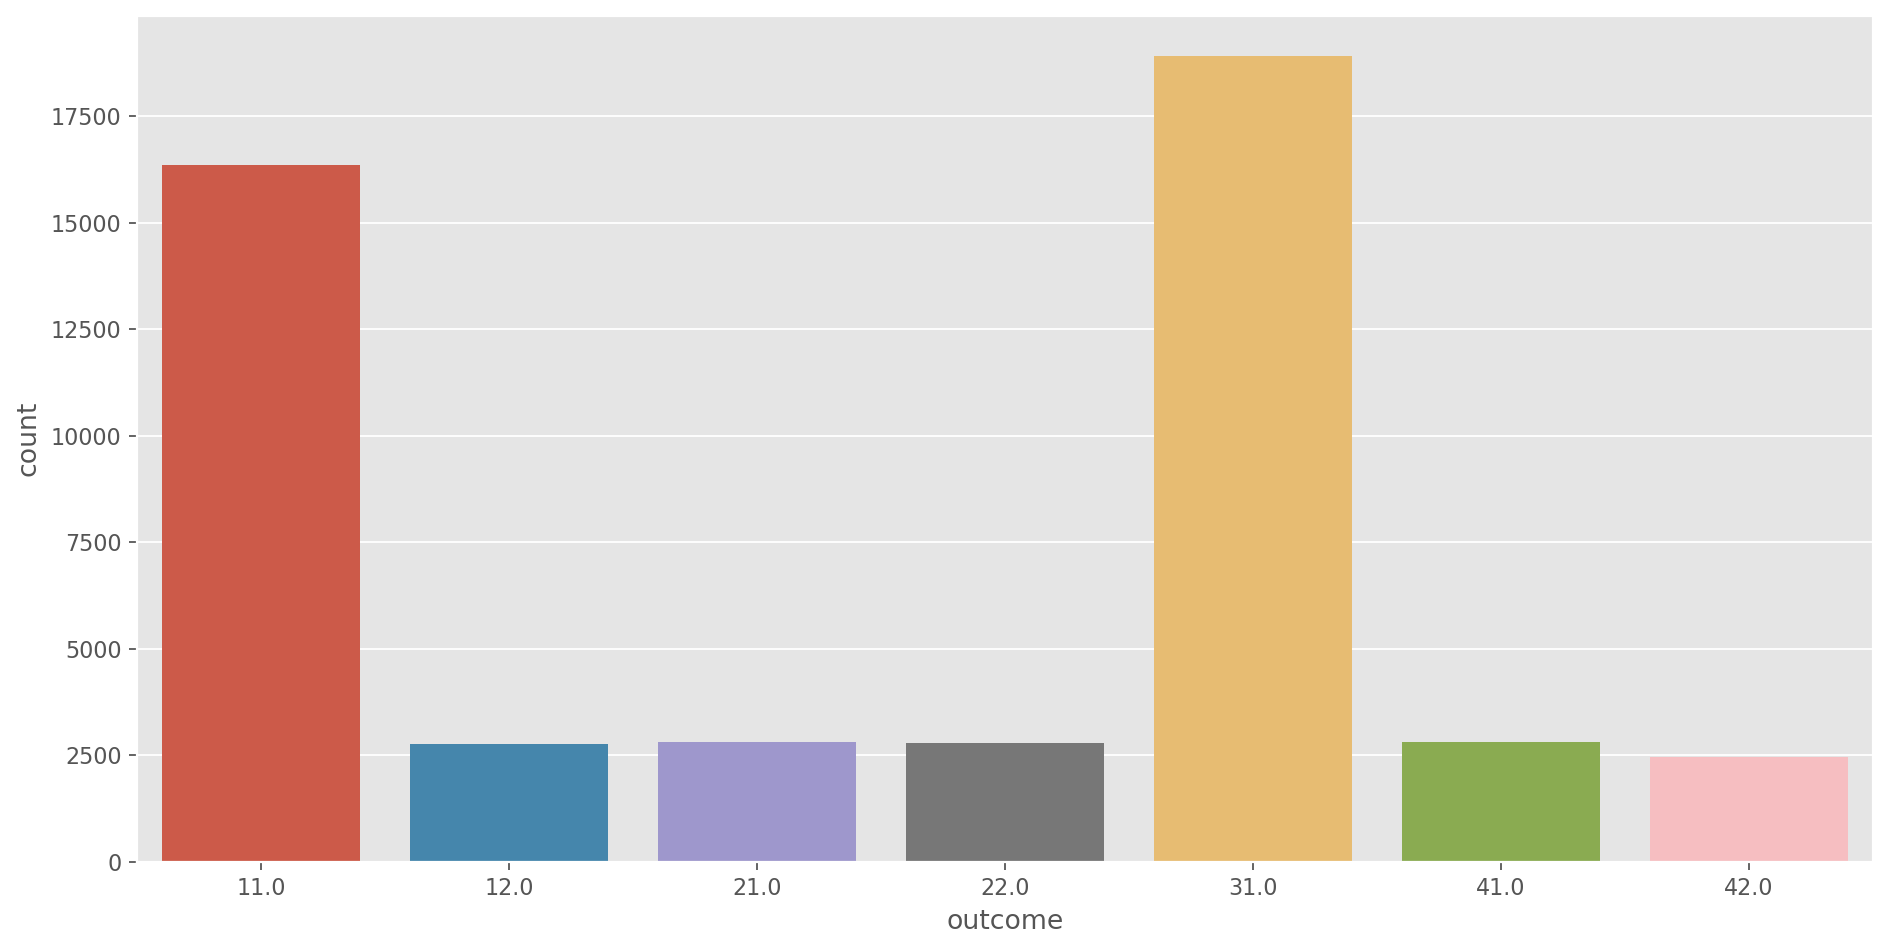

In [16]:
# Brno oucome countplot

sns.countplot('outcome', data = df_brno);

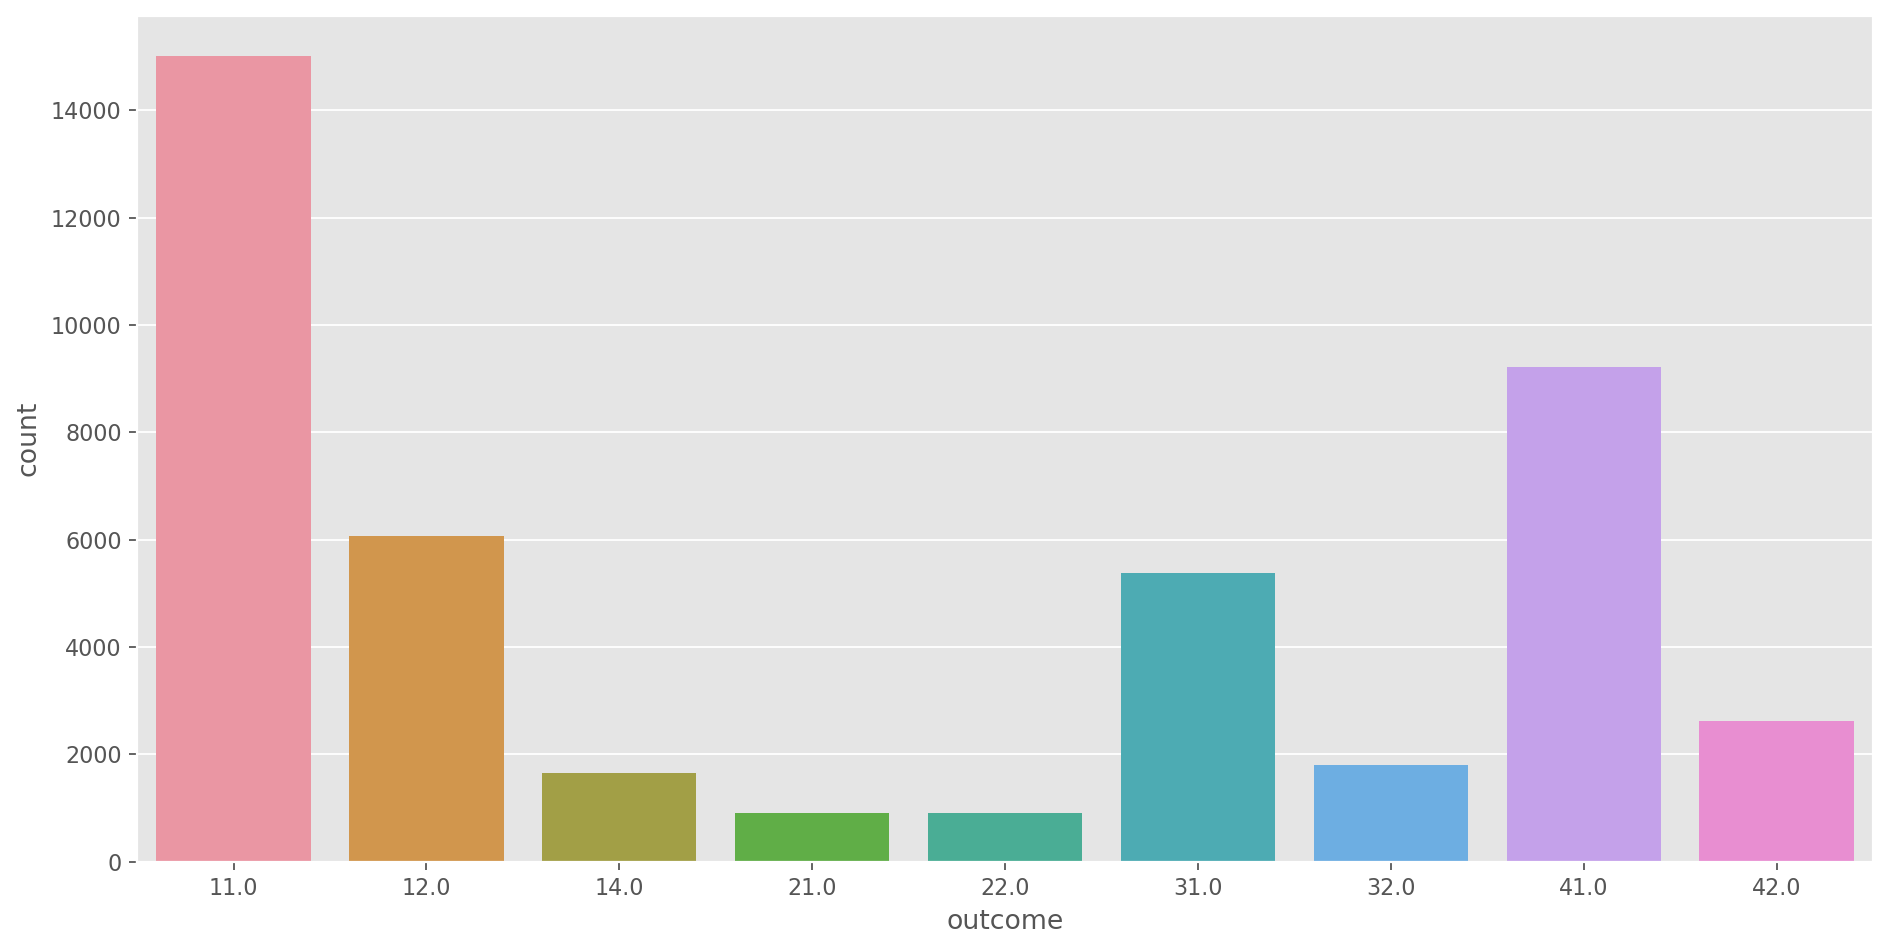

In [17]:
# Montreal oucome countplot

sns.countplot('outcome', data = df_montreal);

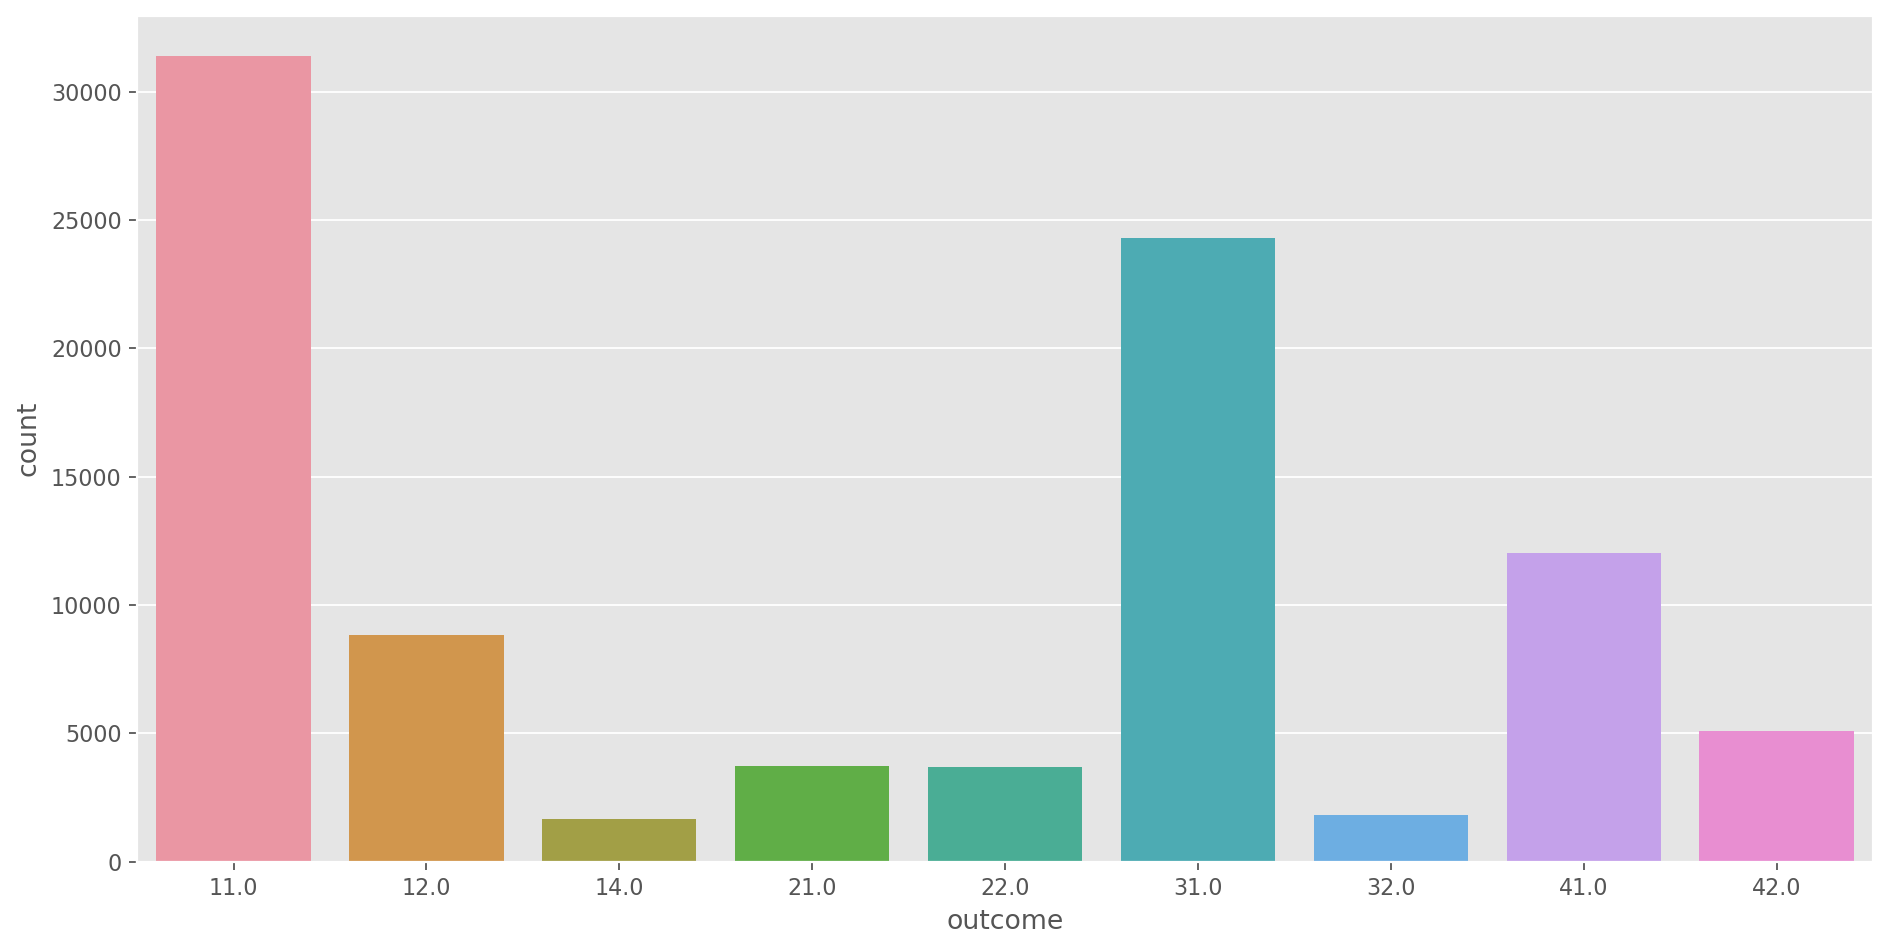

In [18]:
# Overall oucome countplot

sns.countplot('outcome', data = epilepsy);
#sns.distplot(epilepsy['outcome']);
#sns.kdeplot(epilepsy['outcome'], shade = True);

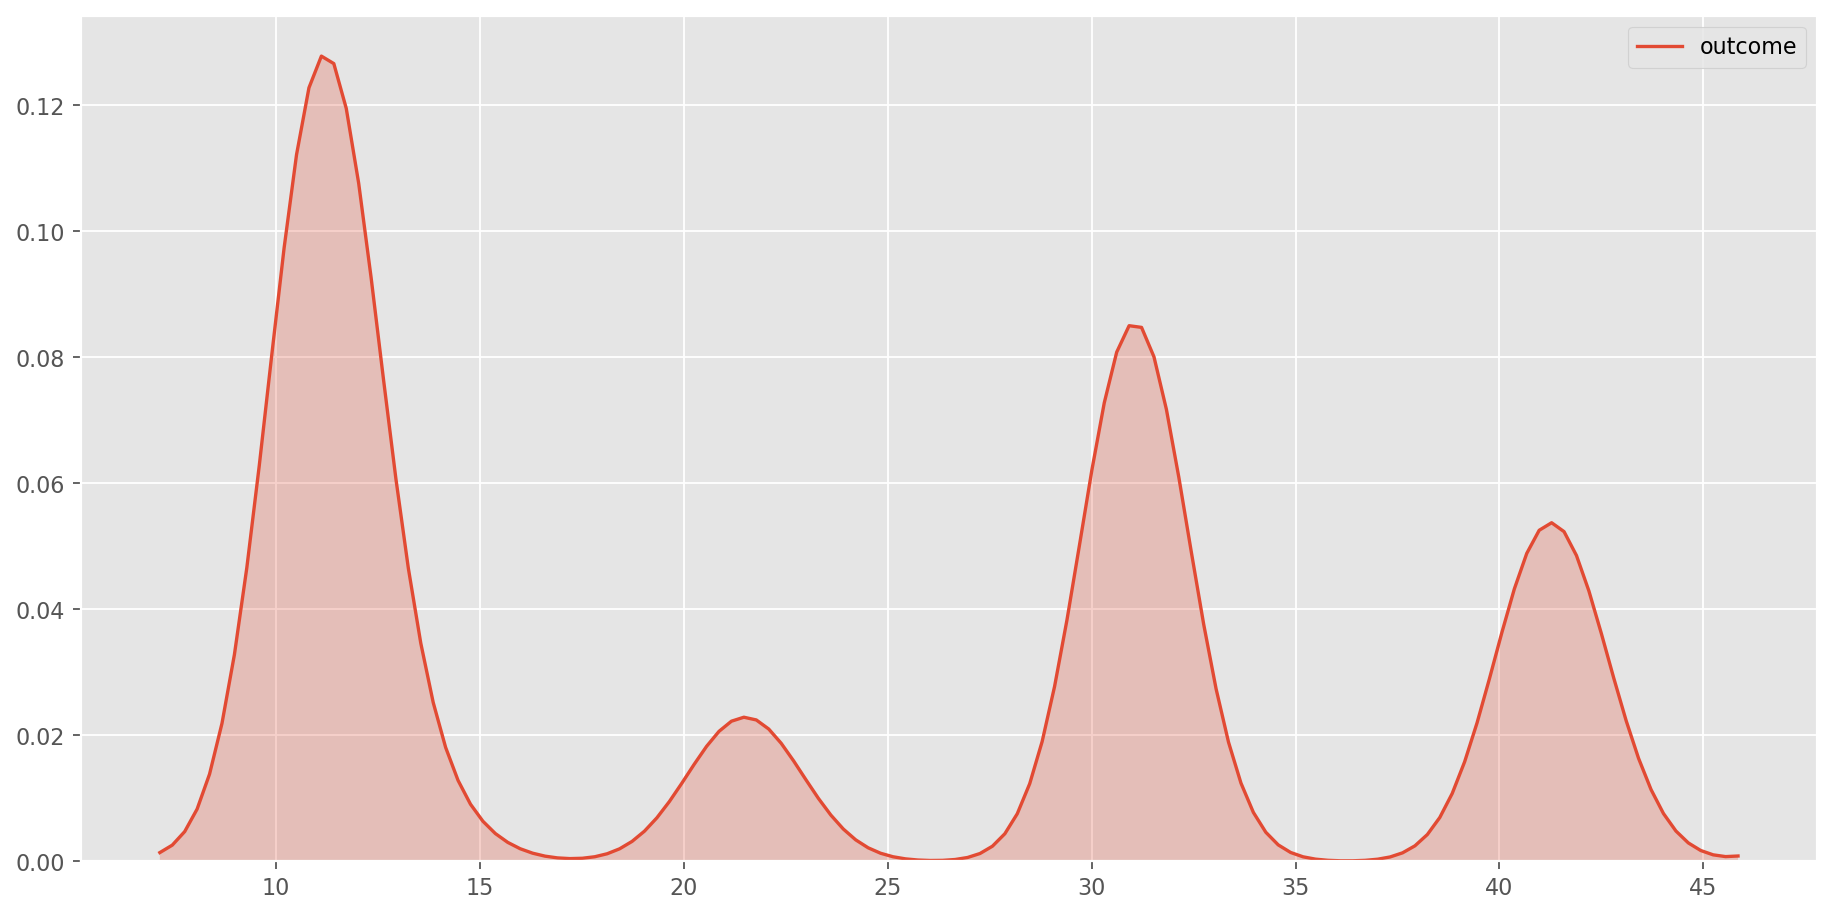

In [19]:
# Overall outcome KDE plot 

sns.kdeplot(epilepsy['outcome'], shade = True);

In [20]:
# Country column

epilepsy.loc[epilepsy['patient_id'] < 100 , 'country'] = 'Brno' 
epilepsy.loc[epilepsy['patient_id'] > 100 , 'country'] = 'Montreal' 
epilepsy.head()

patient_id channel_name  resected onset_channel pathology  outcome  \
0         583          ra1         0       NON_SOZ    normal     11.0   
1         583          ra2         0       NON_SOZ    normal     11.0   
2         583          ra3         0       NON_SOZ    normal     11.0   
3         583          ra4         0       NON_SOZ    normal     11.0   
4         583          ra5         0       NON_SOZ    normal     11.0   

   HFO_65.0-80.0  HFO_80.0-250.0  HFO_250.0-600.0  spike_rate  ...  \
0              0              11               34          22  ...   
1              0              16               40          49  ...   
2              0              20               35          61  ...   
3              0              27               37          66  ...   
4              0              11               58          63  ...   

   lin_corr_median_250.0-600.0  ren_250.0-600.0  phase_sync_250.0-600.0  \
0                     0.990955         0.004121                0.970733   
1                     0.993981         0.002847                0.979349   
2                     0.996993         0.001647                0.987957   
3                     0.995900         0.002311                0.986385   
4                     0.995822         0.002367                0.986189   

   phase_const_250.0-600.0  pli_250.0-600.0  pli_tau_250.0-600.0  \
0                      1.0         0.815222            -0.146667   
1                      1.0         0.841924            -0.113333   
2                      1.0         0.857311            -0.043333   
3                      1.0         0.852814            -0.036667   
4                      1.0         0.861413            -0.058333   

   coherence_250.0-600.0  segm_type  segm_number   country  
0               0.994151          0            0  Montreal  
1               0.996071          0            0  Montreal  
2               0.997980          0            0  Montreal  
3               0.997646          0            0  Montreal  
4               0.997589          0            0  Montreal  

[5 rows x 97 columns]

In [21]:
# Onset channels in numbers

epilepsy.groupby(['country', 'onset_channel'])['onset_channel'].count()

country   onset_channel
Brno      NON_SOZ          46784
          SOZ               2112
Montreal  NON_SOZ          35888
          SOZ               7680
Name: onset_channel, dtype: int64

In [22]:
# Resected in numbers

epilepsy.groupby(['country', 'resected'])['resected'].count()

country   resected
Brno      0           45728
          1            3168
Montreal  0           35488
          1            8080
Name: resected, dtype: int64

In [23]:
# Pathology in numbers

epilepsy.groupby(['country', 'pathology'])['pathology'].count()

country   pathology 
Brno      normal        46784
          pathologic     2112
Montreal  normal        35888
          pathologic     7680
Name: pathology, dtype: int64

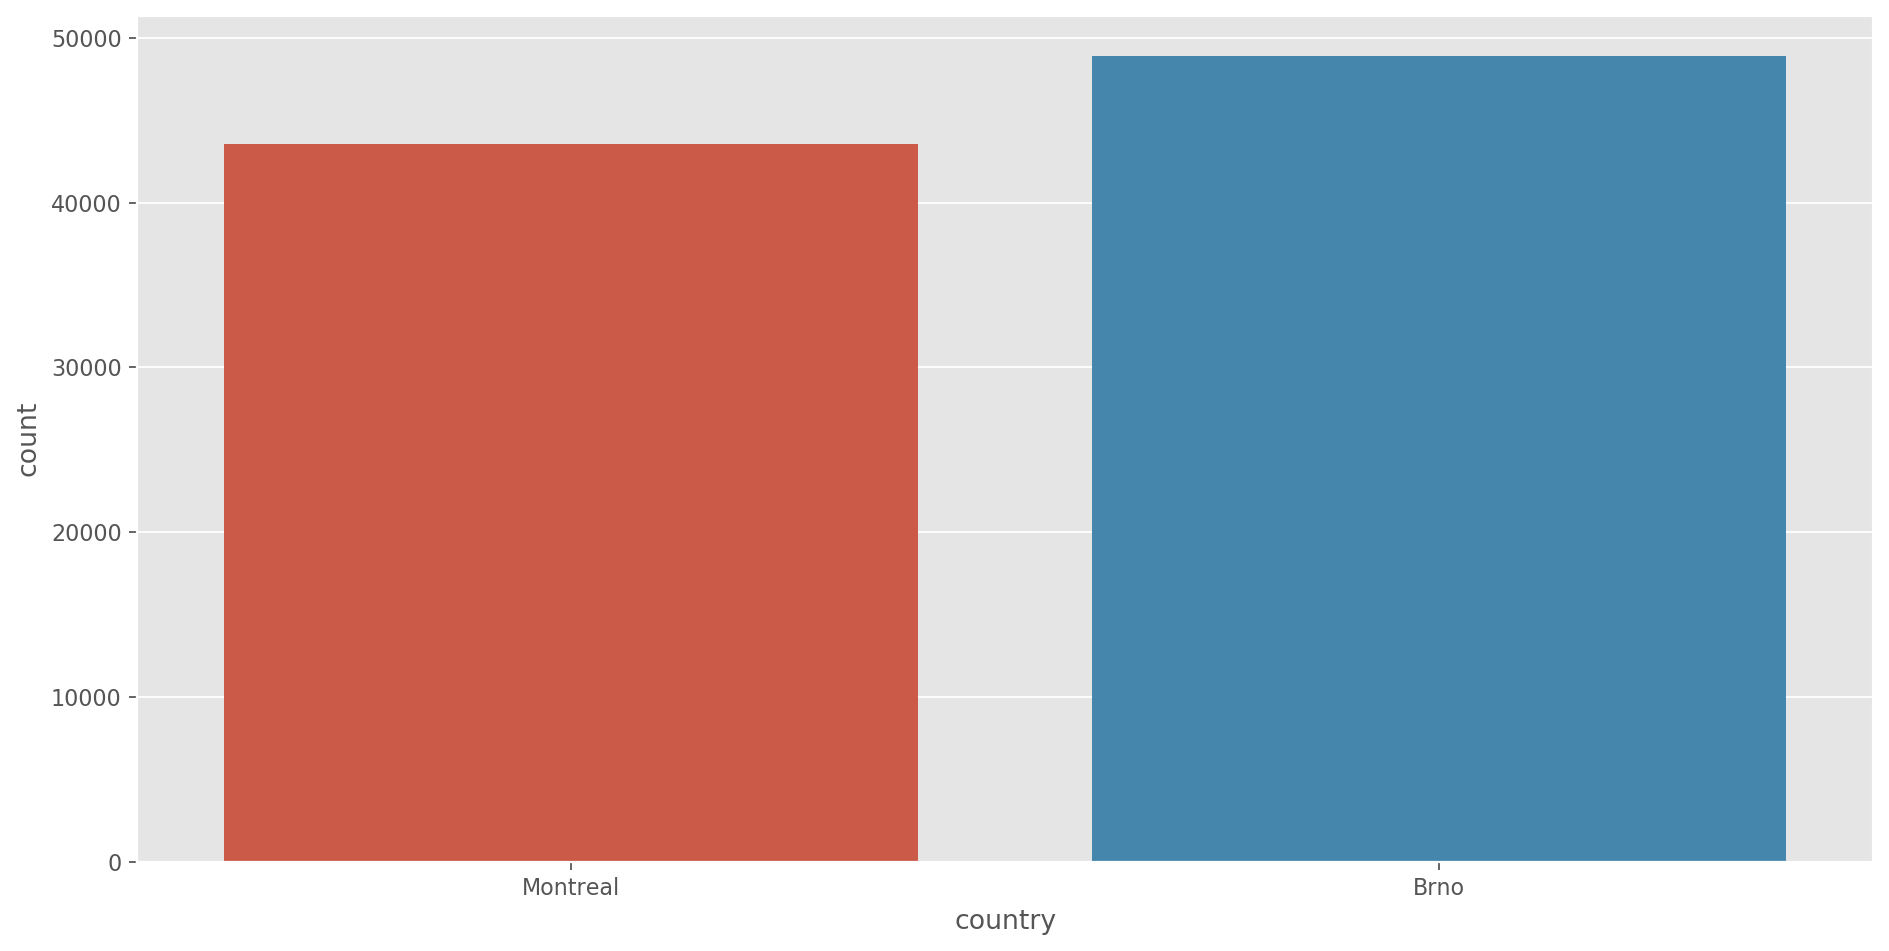

In [24]:
# Country countplot

sns.countplot('country', data = epilepsy);

In [25]:
# Country in numbers

epilepsy['country'].value_counts()

Brno        48896
Montreal    43568
Name: country, dtype: int64

In [26]:
# Number of patients

epilepsy['patient_id'].nunique()

53

In [27]:
# Number of patients in Brno

df_brno['patient_id'].nunique()

19

In [28]:
# Number of patients in Montreal

df_montreal['patient_id'].nunique()

34

In [29]:
# Number of unique channel names 

epilepsy['channel_name'].nunique()

1740

In [30]:
# Number of outcome per country

epilepsy.groupby(['country', 'outcome'])['outcome'].count()

country   outcome
Brno      11.0       16368
          12.0        2768
          21.0        2800
          22.0        2784
          31.0       18912
          41.0        2800
          42.0        2464
Montreal  11.0       15008
          12.0        6064
          14.0        1648
          21.0         912
          22.0         912
          31.0        5376
          32.0        1808
          41.0        9216
          42.0        2624
Name: outcome, dtype: int64

In [31]:
# Number of spike rates

epilepsy['spike_rate'].nunique()

429

In [32]:
# Number of segm_type per country

epilepsy.groupby(['country', 'segm_type'])['segm_type'].count()

country   segm_type
Brno      0            9168
          1            3056
          2            3056
          3            3056
          4            3056
          8            9168
          9            3056
          10           3056
          11           3056
          12           9168
Montreal  0            8169
          1            2723
          2            2723
          3            2723
          4            2723
          8            8169
          9            2723
          10           2723
          11           2723
          12           8169
Name: segm_type, dtype: int64

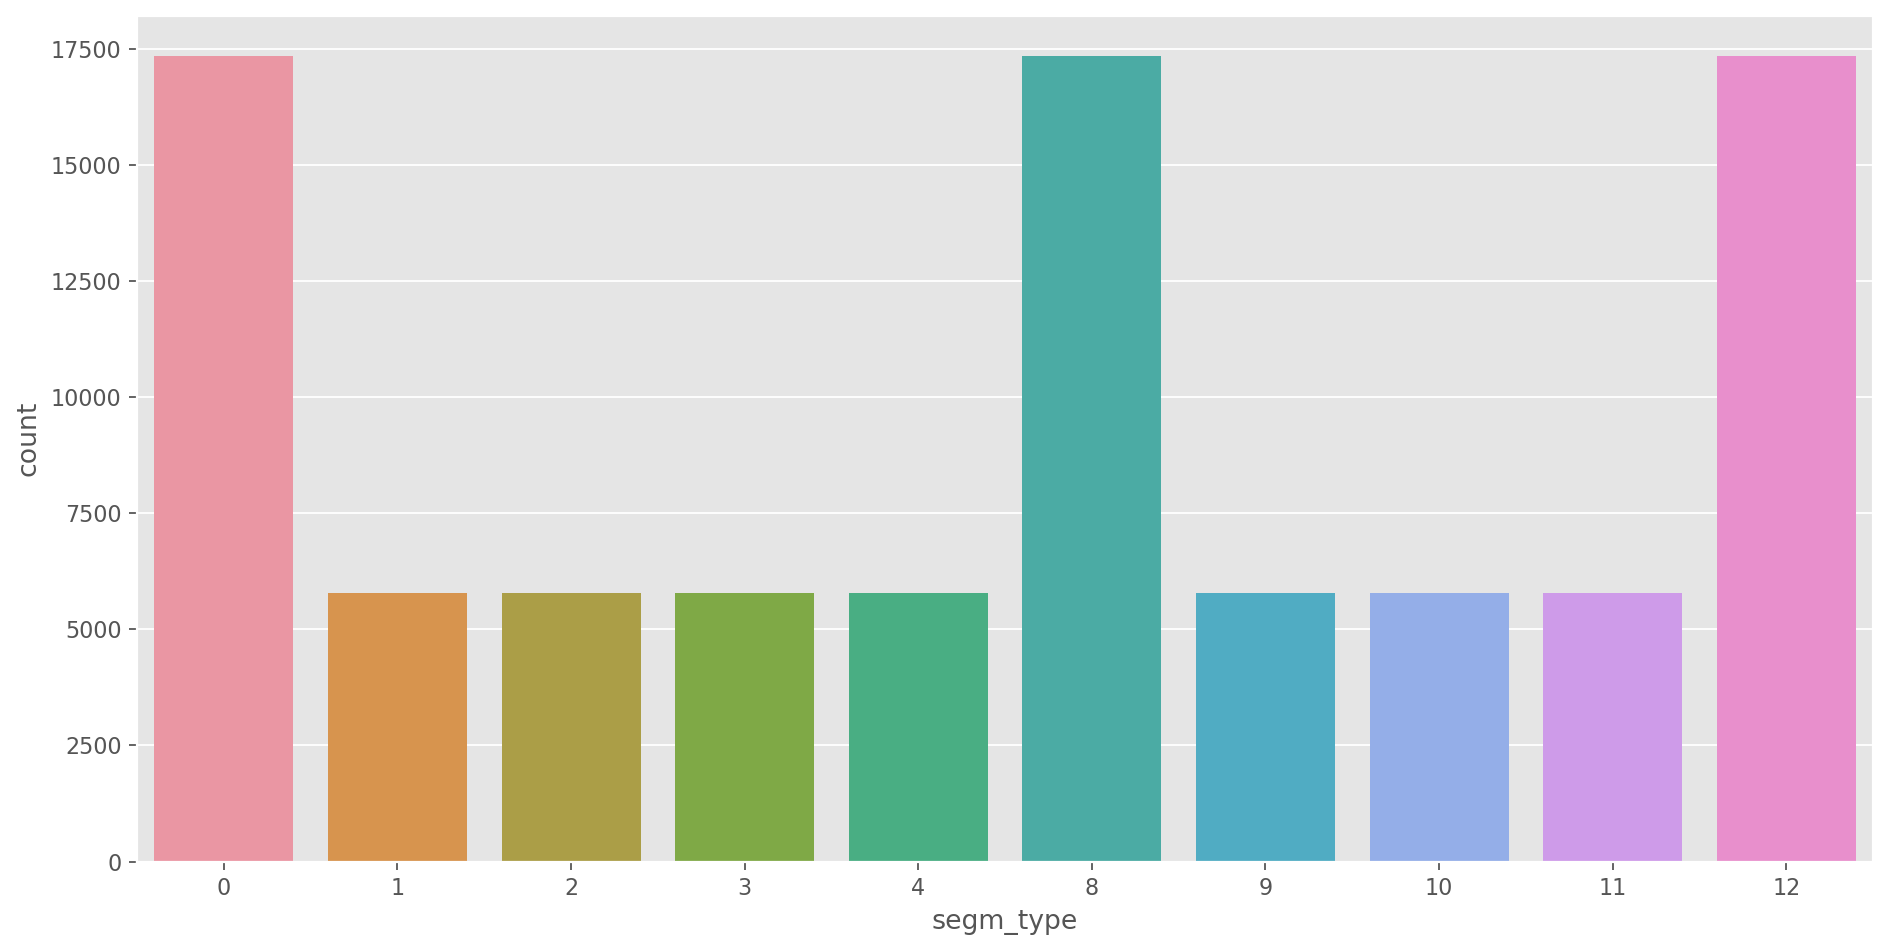

In [33]:
# Overall segm type countplot 

sns.countplot('segm_type', data = epilepsy);

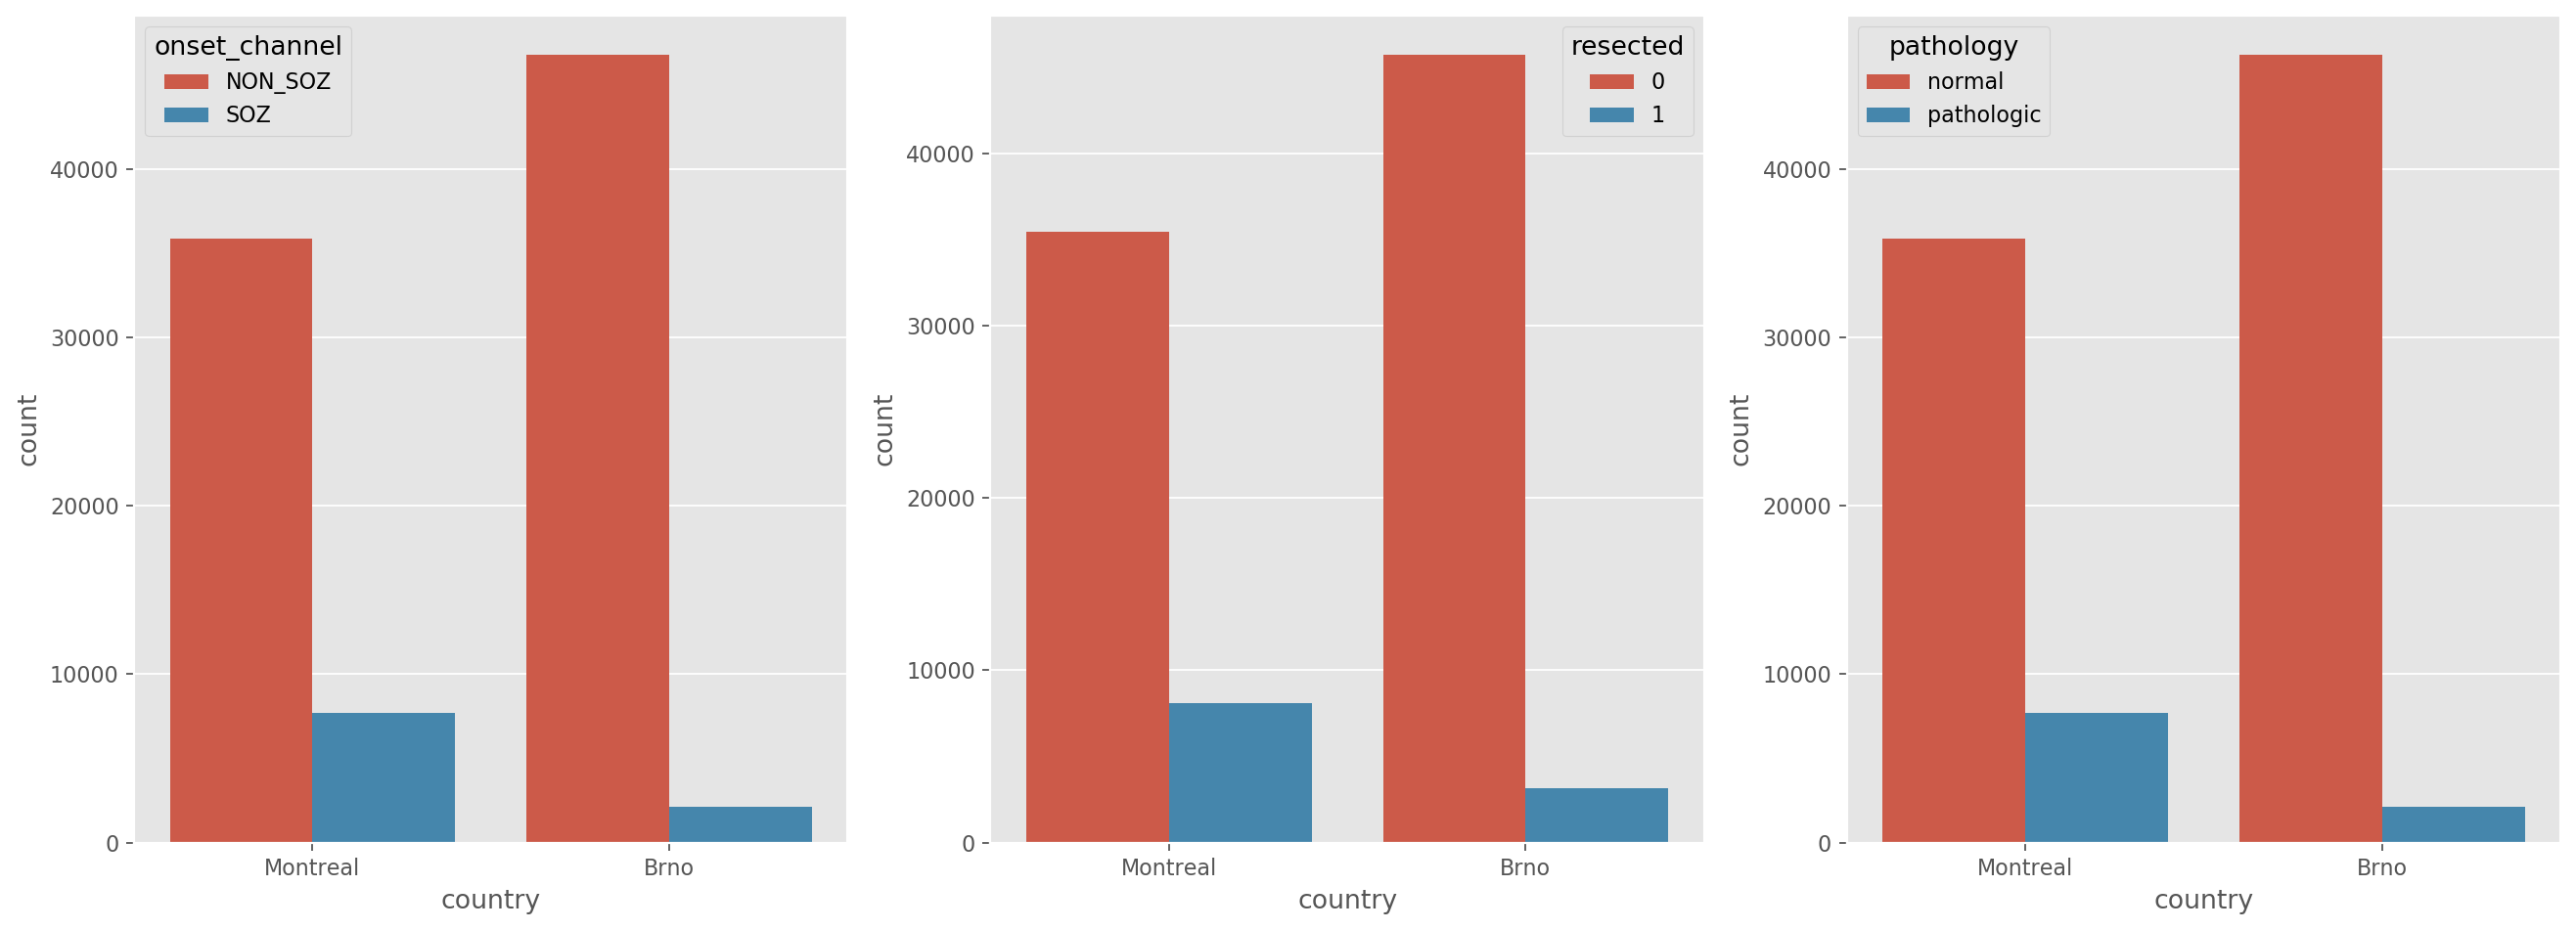

In [34]:
# Onset channels, resected, pathology countplots

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('country', data = epilepsy, hue = 'onset_channel', ax = ax[0] );
sns.countplot('country', data = epilepsy, hue = 'resected', ax = ax[1] );
sns.countplot('country', data = epilepsy, hue = 'pathology', ax = ax[2] );

plt.show()

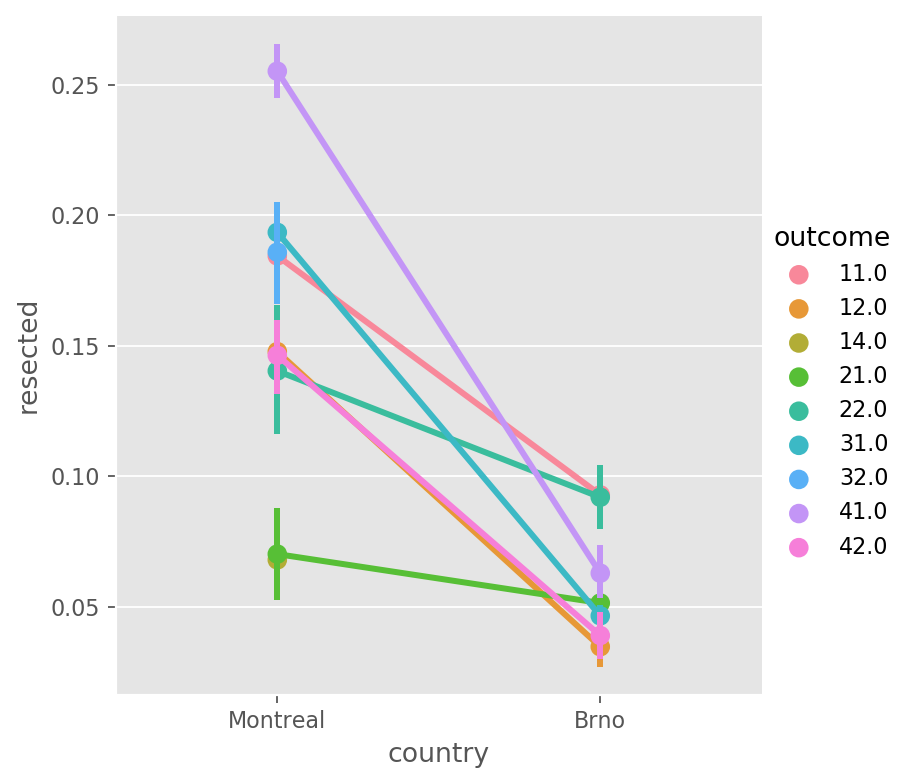

In [35]:
# Overall outcome per country catplot 

sns.catplot(x = 'country', y = 'resected', kind = 'point', data = epilepsy, hue = 'outcome');

In [36]:
# Elipepsy dataframe with datapytes

epilepsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92464 entries, 0 to 92463
Data columns (total 97 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   92464 non-null  int64  
 1   channel_name                 92464 non-null  object 
 2   resected                     92464 non-null  int64  
 3   onset_channel                92464 non-null  object 
 4   pathology                    92464 non-null  object 
 5   outcome                      92464 non-null  float64
 6   HFO_65.0-80.0                92464 non-null  int64  
 7   HFO_80.0-250.0               92464 non-null  int64  
 8   HFO_250.0-600.0              92464 non-null  int64  
 9   spike_rate                   92464 non-null  int64  
 10  power_1.0-4.0                91851 non-null  float64
 11  power_4.0-8.0                91851 non-null  float64
 12  power_8.0-12.0               91851 non-null  float64
 13  power_12.0-20.0 

In [37]:
# Drop columns no. 0, 1, and 6

df_epilepsy = epilepsy.drop(epilepsy.columns[[0, 1, 2, 5, 6]], axis=1)
df_brno = df_brno.drop(df_brno.columns[[0, 1, 2, 5, 6]], axis=1)
df_montreal = df_montreal.drop(df_montreal.columns[[0, 1, 2, 5, 6]], axis=1)

In [41]:
# Df_epilepsy quick view 

df_epilepsy.head()

onset_channel pathology  HFO_80.0-250.0  HFO_250.0-600.0  spike_rate  \
0       NON_SOZ    normal              11               34          22   
1       NON_SOZ    normal              16               40          49   
2       NON_SOZ    normal              20               35          61   
3       NON_SOZ    normal              27               37          66   
4       NON_SOZ    normal              11               58          63   

   power_1.0-4.0  power_4.0-8.0  power_8.0-12.0  power_12.0-20.0  \
0       0.533375       0.781969        1.122708         0.265165   
1       0.518898       0.780688        1.058996         0.246359   
2       0.466505       0.740345        0.904850         0.208866   
3       0.444008       0.721173        0.815821         0.188910   
4       0.588096       0.937518        1.067615         0.256173   

   power_20.0-45.0  ...  lin_corr_median_250.0-600.0  ren_250.0-600.0  \
0         0.450786  ...                     0.990955         0.004121   
1         0.417731  ...                     0.993981         0.002847   
2         0.349802  ...                     0.996993         0.001647   
3         0.312951  ...                     0.995900         0.002311   
4         0.420016  ...                     0.995822         0.002367   

   phase_sync_250.0-600.0  phase_const_250.0-600.0  pli_250.0-600.0  \
0                0.970733                      1.0         0.815222   
1                0.979349                      1.0         0.841924   
2                0.987957                      1.0         0.857311   
3                0.986385                      1.0         0.852814   
4                0.986189                      1.0         0.861413   

   pli_tau_250.0-600.0  coherence_250.0-600.0  segm_type  segm_number  \
0            -0.146667               0.994151          0            0   
1            -0.113333               0.996071          0            0   
2            -0.043333               0.997980          0            0   
3            -0.036667               0.997646          0            0   
4            -0.058333               0.997589          0            0   

    country  
0  Montreal  
1  Montreal  
2  Montreal  
3  Montreal  
4  Montreal  

[5 rows x 92 columns]

In [42]:
# Start H2o

import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.333-b02, mixed mode)
  Starting server from C:\Users\marek\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\marek\AppData\Local\Temp\tmpzptmrptj
  JVM stdout: C:\Users\marek\AppData\Local\Temp\tmpzptmrptj\h2o_Rodina_started_from_python.out
  JVM stderr: C:\Users\marek\AppData\Local\Temp\tmpzptmrptj\h2o_Rodina_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         08 secs
H2O_cluster_timezone:       Europe/Prague
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.2
H2O_cluster_version_age:    1 month and 13 days
H2O_cluster_name:           H2O_from_python_Rodina_r7fxce
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.531 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.3 final
--------------------------  -----------------------------

In [43]:
# Parse dataframe df_montreal to H2o

h2o_df = h2o.H2OFrame(df_montreal)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [44]:
# Dataframe summary describe

h2o_df.describe()

Rows:43568
Cols:91




onset_channel pathology HFO_80.0-250.0 HFO_250.0-600.0 spike_rate power_1.0-4.0 power_4.0-8.0 power_8.0-12.0 power_12.0-20.0 power_20.0-45.0 power_65.0-80.0 power_80.0-250.0 power_250.0-600.0 hlx_0.0-0.0 hlx_1.0-4.0 hlx_4.0-8.0 hlx_8.0-12.0 hlx_12.0-20.0 hlx_20.0-45.0 hlx_65.0-80.0 hlx_80.0-250.0 hlx_250.0-600.0 pse pac fac lfr lin_corr_median_0.0-0.0 ren_0.0-0.0 phase_sync_0.0-0.0 phase_const_0.0-0.0 pli_0.0-0.0 pli_tau_0.0-0.0 coherence_0.0-0.0 lin_corr_median_1.0-4.0 ren_1.0-4.0 phase_sync_1.0-4.0 phase_const_1.0-4.0 pli_1.0-4.0 pli_tau_1.0-4.0 coherence_1.0-4.0 lin_corr_median_4.0-8.0 ren_4.0-8.0 phase_sync_4.0-8.0 phase_const_4.0-8.0 pli_4.0-8.0 pli_tau_4.0-8.0 coherence_4.0-8.0 lin_corr_median_8.0-12.0 ren_8.0-12.0 phase_sync_8.0-12.0 phase_const_8.0-12.0 pli_8.0-12.0 pli_tau_8.0-12.0 coherence_8.0-12.0 lin_corr_median_12.0-20.0 ren_12.0-20.0 phase_sync_12.0-20.0 phase_const_12.0-20.0 pli_12.0-20.0 pli_tau_12.0-20.0 coherence_12.0-20.0 lin_corr_median_20.0-45.0 ren_20.0-45.0 phase_sync_20.0-45.0 phase_const_20.0-45.0 pli_20.0-45.0 pli_tau_20.0-45.0 coherence_20.0-45.0 lin_corr_median_65.0-80.0 ren_65.0-80.0 phase_sync_65.0-80.0 phase_const_65.0-80.0 pli_65.0-80.0 pli_tau_65.0-80.0 coherence_65.0-80.0 lin_corr_median_80.0-250.0 ren_80.0-250.0 phase_sync_80.0-250.0 phase_const_80.0-250.0 pli_80.0-250.0 pli_tau_80.0-250.0 coherence_80.0-250.0 lin_corr_median_250.0-600.0 ren_250.0-600.0 phase_sync_250.0-600.0 phase_const_250.0-600.0 pli_250.0-600.0 pli_tau_250.0-600.0 coherence_250.0-600.0 segm_type segm_number 
 
 
 type enum enum int int int real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real int real real real int int 
 mins 0.0 0.0 0.0 0.0033935233891528 0.0010440002162097 0.0009381938615368 0.0007864608111843 0.0006473726166243 3.366153472794717e-05 3.175480886223986e-05 7.802247174042305e-07 1.3057179148991902 1.0262446661790212 1.0259479647874832 1.0132724392414092 1.0085392993688584 1.000543340841929 1.003492754101753 1.007588633298874 1.0517670094966889 0.0717285592136559 -0.0696039786934852 -0.0550748613497449 0.0003665038410347 -0.7683093715831637 0.0027164416779851 0.0609050278140542 0.0 0.0 -218.58333333333331 0.3285223725189765 -0.8999604328970114 0.0014660500354898 0.4352255032025278 0.0 0.0 -219.0 0.7514204303423564 -0.7575910468026996 0.0002919767181625 0.4026358180555204 0.0 0.0 -111.8 0.82590652714173 -0.7077642927538059 0.0001355320757778 0.4179664339016502 0.0 0.0 -77.29333333333332 0.8271813574433327 -0.4607199422790048 8.274119297719079e-05 0.3239360477092365 0.0 0.0 -47.333333333333336 0.8091164149840673 -0.5501141544617713 4.150115938661732e-05 0.1675118703643481 0.0 0.0 -14.853333333333332 0.7750445920228958 -0.6008368995630493 1.789600557098462e-05 0.2111639325693249 0.0 0.0 -11.148333333333332 0.7887726692358653 -0.5967603107045094 8.82198939166301e-06 0.0996088667559282 0.0 0.0 -3.4 0.7185969988505045 -0.6278105069814288 1.3262518922279773e-05 0.0453562723018694 0.0 0.0 -0.7066666666666667 0.6507014270623525 0.0 0.0 
 mean 18.5079645611458 42.02169023136249 17.49820969518913 0.641789417433874 0.5981242023976874 0.5023476586913542 0.6457907474858363 0.5683807261392875 0.06559896709322048 0.6451430440046348 0.14078509848583862 22.91393928841237 1.3001095844017057 1.0651573544340067 1.0230087119918378 1.035510232905243 1.100617054922388 1.0067525679329827 1.1808452826977685 1.077100331136846 0.4302319363300957 0.00044260956816581415 0.0005192060709798031 0.26012101136172777 0.7575360767904482 0.17284887619958664 0.7295060252475855 0.044928507697531 0.08123957184197511 -7.023936899862825 0.9091459071257265 0.8853613274189712 0.14637322042938214 0.883105232936

In [45]:
# Split train and test sets

train, test = h2o_df.split_frame(ratios=[.75], seed=121)

# Define X and y

X = train.columns
y = 'pathology'
X.remove(y)

In [46]:
# For binary classification, response should be a factor

train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
y

'pathology'

In [47]:
# Review dataframe if balanced or not 

df_montreal.pathology.value_counts()

normal        35888
pathologic     7680
Name: pathology, dtype: int64

In [48]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [49]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 


%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |
10:05:21.798: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Wall time: 10min 4s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220710_100521

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 4.258769523622139e-07
RMSE: 0.0006525924856770984
LogLoss: 0.0004223170439904378
Null degrees of freedom: 10074
Residual degrees of freedom: 10072
Null deviance: 9402.381284675728
Residual deviance: 8.509688436407313
AIC: 14.509688436407313
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9948649699376896: 


normal  pathologic Error            Rate
0      normal  8293.0         0.0   0.0    (0.0/8293.0)
1  pathologic     0.0      1782.0   0.0    (0.0/1782.0)
2       Total  8293.0      1782.0   0.0   (0.0/10075.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.994865     1.000000  210.0
1                        max f2   0.994865     1.000000  210.0
2                  max f0point5   0.994865     1.000000  210.0
3                  max accuracy   0.994865     1.000000  210.0
4                 max precision   0.999990     1.000000    0.0
5                    max recall   0.994865     1.000000  210.0
6               max specificity   0.999990     1.000000    0.0
7              max absolute_mcc   0.994865     1.000000  210.0
8    max min_per_class_accuracy   0.994865     1.000000  210.0
9   max mean_per_class_accuracy   0.994865     1.000000  210.0
10                      max tns   0.999990  8293.000000    0.0
11                      max fns   0.999990  1781.000000    0.0
12                      max fps   0.000010  8293.000000  399.0
13                      max tps   0.994865  1782.000000  210.0
14                      max tnr   0.999990     1.000000    0.0
15                      max fnr   0.999990     0.999439    0.0
16                      max fpr   0.000010     1.000000  399.0
17                      max tpr   0.994865     1.000000  210.0


Gains/Lift Table: Avg response rate: 17.69 %, avg score: 17.69 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010025         0.999862  5.653760   
1       2                  0.020050         0.999774  5.653760   
2       3                  0.030074         0.999692  5.653760   
3       4                  0.040000         0.999603  5.653760   
4       5                  0.050025         0.999522  5.653760   
5       6                  0.100050         0.998822  5.653760   
6       7                  0.150074         0.998006  5.653760   
7       8                  0.200000         0.000710  3.034821   
8       9                  0.300050         0.000391  0.000000   
9      10                  0.400000         0.000318  0.000000   
10     11                  0.500050         0.000276  0.000000   
11     12                  0.600000         0.000237  0.000000   
12     13                  0.699950         0.000197  0.000000   
13     14                  0.800000         0.000144  0.000000   
14     15                  0.899950         0.000112  0.000000   
15     16                  1.000000         0.000007  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          5.653760       1.000000  0.999921                  1.000000   
1          5.653760       1.000000  0.999823                  1.000000   
2          5.653760       1.000000  0.999733                  1.000000   
3          5.653760       1.000000  0.999650                  1.000000   
4          5.653760       1.000000  0.999564                  1.000000   
5          5.653760       1.000000  0.999193                  1.000000   
6          5.653760       1.000000  0.998448                  1.000000   
7          5.000000       0.536779  0.535951                  0.884367   
8          3.332782       0.000000  0.000490                  0.589481   
9          2.500000       0.000000  0.000351                  0.442184   
10         1.999802       0.000000  0.000296                  0.353712   
11         1.666667       0.000000  0.000257                  0.294789   
12         1.428673       0.000000  0.000218                  0.252694   
13         1.250000       0.000000  0.000170                  0.221092   
14         1.111172       0.000000  0.000127                  0.196537   
15         1.000000       0.000000  0.000092                  0.176873   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999921      0.056678                 0.056678  465.375982   
1           0.999872      0.056678                 0.113356  465.375982   
2           0.999826      0.056678                 0.170034  465.375982   
3           0.999782      0.056117                 0.226150  465.375982   
4           0.999739      0.056678                 0.282828  465.375982   
5           0.999466      0.282828                 0.565657  465.375982   
6           0.999126      0.282828                 0.848485  465.375982   
7           0.883505      0.151515                 1.000000  203.482137   
8           0.589069      0.000000                 1.000000 -100.000000   
9           0.441963      0.000000                 1.000000 -100.000000   
10          0.353594      0.000000                 1.000000 -100.000000   
11          0.294734      0.000000                 1.000000 -100.000000   
12          0.252678      0.000000                 1.000000 -100.000000   
13          0.221099      0.000000                 1.000000 -100.000000   
14          0.196557      0.000000                 1.000000 -100.000000   
15          0.176901      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        465.375982            0.056678  
1        465.375982            0.113356  
2        465.375982            0.170034  
3        465.375982            0.226150  
4        465.375982            0.282828  
5        465.375982            0.565657  
6        465.375982            0.848485  
7        4



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 1.233404322893921e-06
RMSE: 0.0011105873774241814
LogLoss: 0.0007065415640635453
Null degrees of freedom: 32720
Residual degrees of freedom: 32718
Null deviance: 30521.20840293183
Residual deviance: 46.23749303544651
AIC: 52.23749303544651
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9876063667123501: 


normal  pathologic Error            Rate
0      normal  26940.0         0.0   0.0   (0.0/26940.0)
1  pathologic      0.0      5781.0   0.0    (0.0/5781.0)
2       Total  26940.0      5781.0   0.0   (0.0/32721.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.987606      1.000000  215.0
1                        max f2   0.987606      1.000000  215.0
2                  max f0point5   0.987606      1.000000  215.0
3                  max accuracy   0.987606      1.000000  215.0
4                 max precision   0.999949      1.000000    0.0
5                    max recall   0.987606      1.000000  215.0
6               max specificity   0.999949      1.000000    0.0
7              max absolute_mcc   0.987606      1.000000  215.0
8    max min_per_class_accuracy   0.987606      1.000000  215.0
9   max mean_per_class_accuracy   0.987606      1.000000  215.0
10                      max tns   0.999949  26940.000000    0.0
11                      max fns   0.999949   5762.000000    0.0
12                      max fps   0.000028  26940.000000  399.0
13                      max tps   0.987606   5781.000000  215.0
14                      max tnr   0.999949      1.000000    0.0
15                      max fnr   0.999949      0.996713    0.0
16                      max fpr   0.000028      1.000000  399.0
17                      max tpr   0.987606      1.000000  215.0


Gains/Lift Table: Avg response rate: 17.67 %, avg score: 17.67 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010024         0.999702  5.660093   
1       2                  0.020018         0.999513  5.660093   
2       3                  0.030011         0.999307  5.660093   
3       4                  0.040005         0.999081  5.660093   
4       5                  0.050029         0.998879  5.660093   
5       6                  0.100028         0.997893  5.660093   
6       7                  0.150026         0.996651  5.660093   
7       8                  0.200024         0.001137  3.016871   
8       9                  0.300021         0.000618  0.000000   
9      10                  0.400018         0.000498  0.000000   
10     11                  0.500015         0.000425  0.000000   
11     12                  0.600012         0.000368  0.000000   
12     13                  0.700009         0.000296  0.000000   
13     14                  0.800006         0.000218  0.000000   
14     15                  0.900003         0.000171  0.000000   
15     16                  1.000000         0.000011  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          5.660093       1.000000  0.999812                  1.000000   
1          5.660093       1.000000  0.999610                  1.000000   
2          5.660093       1.000000  0.999414                  1.000000   
3          5.660093       1.000000  0.999200                  1.000000   
4          5.660093       1.000000  0.998980                  1.000000   
5          5.660093       1.000000  0.998373                  1.000000   
6          5.660093       1.000000  0.997346                  1.000000   
7          4.999389       0.533007  0.531653                  0.883270   
8          3.333096       0.000000  0.000783                  0.588876   
9          2.499885       0.000000  0.000551                  0.441669   
10         1.999939       0.000000  0.000459                  0.353340   
11         1.666633       0.000000  0.000397                  0.294453   
12         1.428553       0.000000  0.000335                  0.252390   
13         1.249990       0.000000  0.000255                  0.220843   
14         1.111107       0.000000  0.000193                  0.196305   
15         1.000000       0.000000  0.000143                  0.176676   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999812      0.056738                 0.056738  466.009341   
1           0.999711      0.056565                 0.113302  466.009341   
2           0.999612      0.056565                 0.169867  466.009341   
3           0.999509      0.056565                 0.226431  466.009341   
4           0.999403      0.056738                 0.283169  466.009341   
5           0.998888      0.282996                 0.566165  466.009341   
6           0.998374      0.282996                 0.849161  466.009341   
7           0.881712      0.150839                 1.000000  201.687130   
8           0.588099      0.000000                 1.000000 -100.000000   
9           0.441223      0.000000                 1.000000 -100.000000   
10          0.353076      0.000000                 1.000000 -100.000000   
11          0.294299      0.000000                 1.000000 -100.000000   
12          0.252306      0.000000                 1.000000 -100.000000   
13          0.220801      0.000000                 1.000000 -100.000000   
14          0.196289      0.000000                 1.000000 -100.000000   
15          0.176675      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        466.009341            0.056738  
1        466.009341            0.113302  
2        466.009341            0.169867  
3        466.009341            0.226431  
4        466.009341            0.283169  
5        466.009341            0.566165  
6        466.009341            0.849161  
7        3



Cross-Validation Metrics Summary: 


mean            sd   cv_1_valid  \
0                  accuracy     1.000000  0.000000e+00     1.000000   
1                       auc     1.000000  0.000000e+00     1.000000   
2                       err     0.000000  0.000000e+00     0.000000   
3                 err_count     0.000000  0.000000e+00     0.000000   
4                  f0point5     1.000000  0.000000e+00     1.000000   
5                        f1     1.000000  0.000000e+00     1.000000   
6                        f2     1.000000  0.000000e+00     1.000000   
7            lift_top_group     5.666736  2.269782e-01     6.056429   
8                   logloss     0.000707  1.794488e-05     0.000681   
9       max_per_class_error     0.000000  0.000000e+00     0.000000   
10                      mcc     1.000000  0.000000e+00     1.000000   
11  mean_per_class_accuracy     1.000000  0.000000e+00     1.000000   
12     mean_per_class_error     0.000000  0.000000e+00     0.000000   
13                      mse     0.000001  7.090532e-08     0.000001   
14            null_deviance  6104.241700  1.413837e+02  5876.296400   
15                   pr_auc     1.000000  0.000000e+00     1.000000   
16                precision     1.000000  0.000000e+00     1.000000   
17                       r2     0.999992  3.157500e-07     0.999992   
18                   recall     1.000000  0.000000e+00     1.000000   
19        residual_deviance     9.247499  2.609870e-01     8.919676   

     cv_2_valid   cv_3_valid   cv_4_valid   cv_5_valid  
0      1.000000     1.000000     1.000000     1.000000  
1      1.000000     1.000000     1.000000     1.000000  
2      0.000000     0.000000     0.000000     0.000000  
3      0.000000     0.000000     0.000000     0.000000  
4      1.000000     1.000000     1.000000     1.000000  
5      1.000000     1.000000     1.000000     1.000000  
6      1.000000     1.000000     1.000000     1.000000  
7      5.543273     5.616681     5.477712     5.639585  
8      0.000713     0.000716     0.000727     0.000696  
9      0.000000     0.000000     0.000000     0.000000  
10     1.000000     1.000000     1.000000     1.000000  
11     1.000000     1.000000     1.000000     1.000000  
12     0.000000     0.000000     0.000000     0.000000  
13     0.000001     0.000001     0.000001     0.000001  
14  6107.661600  6245.914600  6193.013000  6098.322300  
15     1.000000     1.000000     1.000000     1.000000  
16     1.000000     1.000000     1.000000     1.000000  
17     0.999992     0.999991     0.999991     0.999992  
18     1.000000     1.000000     1.000000     1.000000  
19     9.220896     9.545995     9.467320     9.083607


See the whole table with table.as_data_frame()


In [50]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_1_AutoML_1_20220710_100521 1 0.000706542 1 0 0.00111059 1.2334e-06 
 GBM_1_AutoML_1_20220710_100521 1 0.0410003 1 0 0.0759064 0.00576179 
 GBM_grid_1_AutoML_1_20220710_100521_model_5 1 0.0786577 1 0 0.135425 0.0183399 
 GBM_grid_1_AutoML_1_20220710_100521_model_2 1 0.0800861 1 0 0.133666 0.0178666 
 GBM_3_AutoML_1_20220710_100521 1 0.0452071 1 0 0.082504 0.00680692 
 GBM_grid_1_AutoML_1_20220710_100521_model_6 1 0.0235524 1 0 0.0435708 0.00189842 
 GBM_grid_1_AutoML_1_20220710_100521_model_7 1 0.0561339 1 0 0.0983312 0.00966902 
 GBM_4_AutoML_1_20220710_100521 1 0.0327809 1 0 0.0607276 0.00368784 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220710_100521 1 0.000706432 1 0 0.00111026 1.23267e-06 
 GBM_2_AutoML_1_20220710_100521 1 0.0361971 1 0 0.0662617 0.00439061 
 DRF_1_AutoML_1_20220710_100521 1 0.0589529 1 0 0.124695 0.015549 
 GBM_grid_1_AutoML_1_20220710_100521_model_4 1 0.0237004 1 0 0.0438621 0.00192389 
 GLM_1_AutoML_1_20220710_100521 1 0.000280837 1 0 0.000446587 1.9944e-07 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20220710_100521 1 0.000714087 1 0 0.00108432 1.17574e-06 
 GBM_5_AutoML_1_20220710_100521 1 0.0460906 1 0 0.08345 0.0069639 
 GBM_grid_1_AutoML_1_20220710_100521_model_3 1 0.0734023 1 0 0.126779 0.016073 
 StackedEnsemble_AllModels_3_AutoML_1_20220710_100521 1 0.000572944 1 1.85598e-05 0.00627437 3.93677e-05 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220710_100521 1 0.000638237 1 1.85598e-05 0.00569022 3.23786e-05 
 DeepLearning_1_AutoML_1_20220710_100521 1 0.000214447 1 1.85598e-05 0.00556959 3.10204e-05 
 StackedEnsemble_AllModels_2_AutoML_1_20220710_100521 1 0.000637835 1 1.85598e-05 0.0056571 3.20028e-05 
 DeepLearning_grid_1_AutoML_1_20220710_100521_model_2 1 0.000820947 0.999999 5.56793e-05 0.0104165 0.000108504 
 GBM_grid_1_AutoML_1_20220710_100521_model_8 0.999999 0.262594 0.999998 0.000389389 0.286763 0.0822331 
 GBM_grid_1_AutoML_1_20220710_100521_model_1 0.999999 0.0987727 0.999997 0.00043876 0.157517 0.0248116 
 XRT_1_AutoML_1_20220710_100521 0.99999 0.118959 0.999953 0.00108168 0.195609 0.0382629 
 DeepLearning_grid_1_AutoML_1_20220710_100521_model_1 0.999794 0.00543332 0.998913 0.000377138 0.0202432 0.000409786 
 DeepLearning_grid_1_AutoML_1_20220710_100521_model_3 0.99947 0.0159402 0.997414 0.00203938 0.0388877 0.00151226

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20220710_100521


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9940244393043484: 


normal  pathologic Error            Rate
0      normal  8948.0         0.0   0.0    (0.0/8948.0)
1  pathologic     0.0      1899.0   0.0    (0.0/1899.0)
2       Total  8948.0      1899.0   0.0   (0.0/10847.0)

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

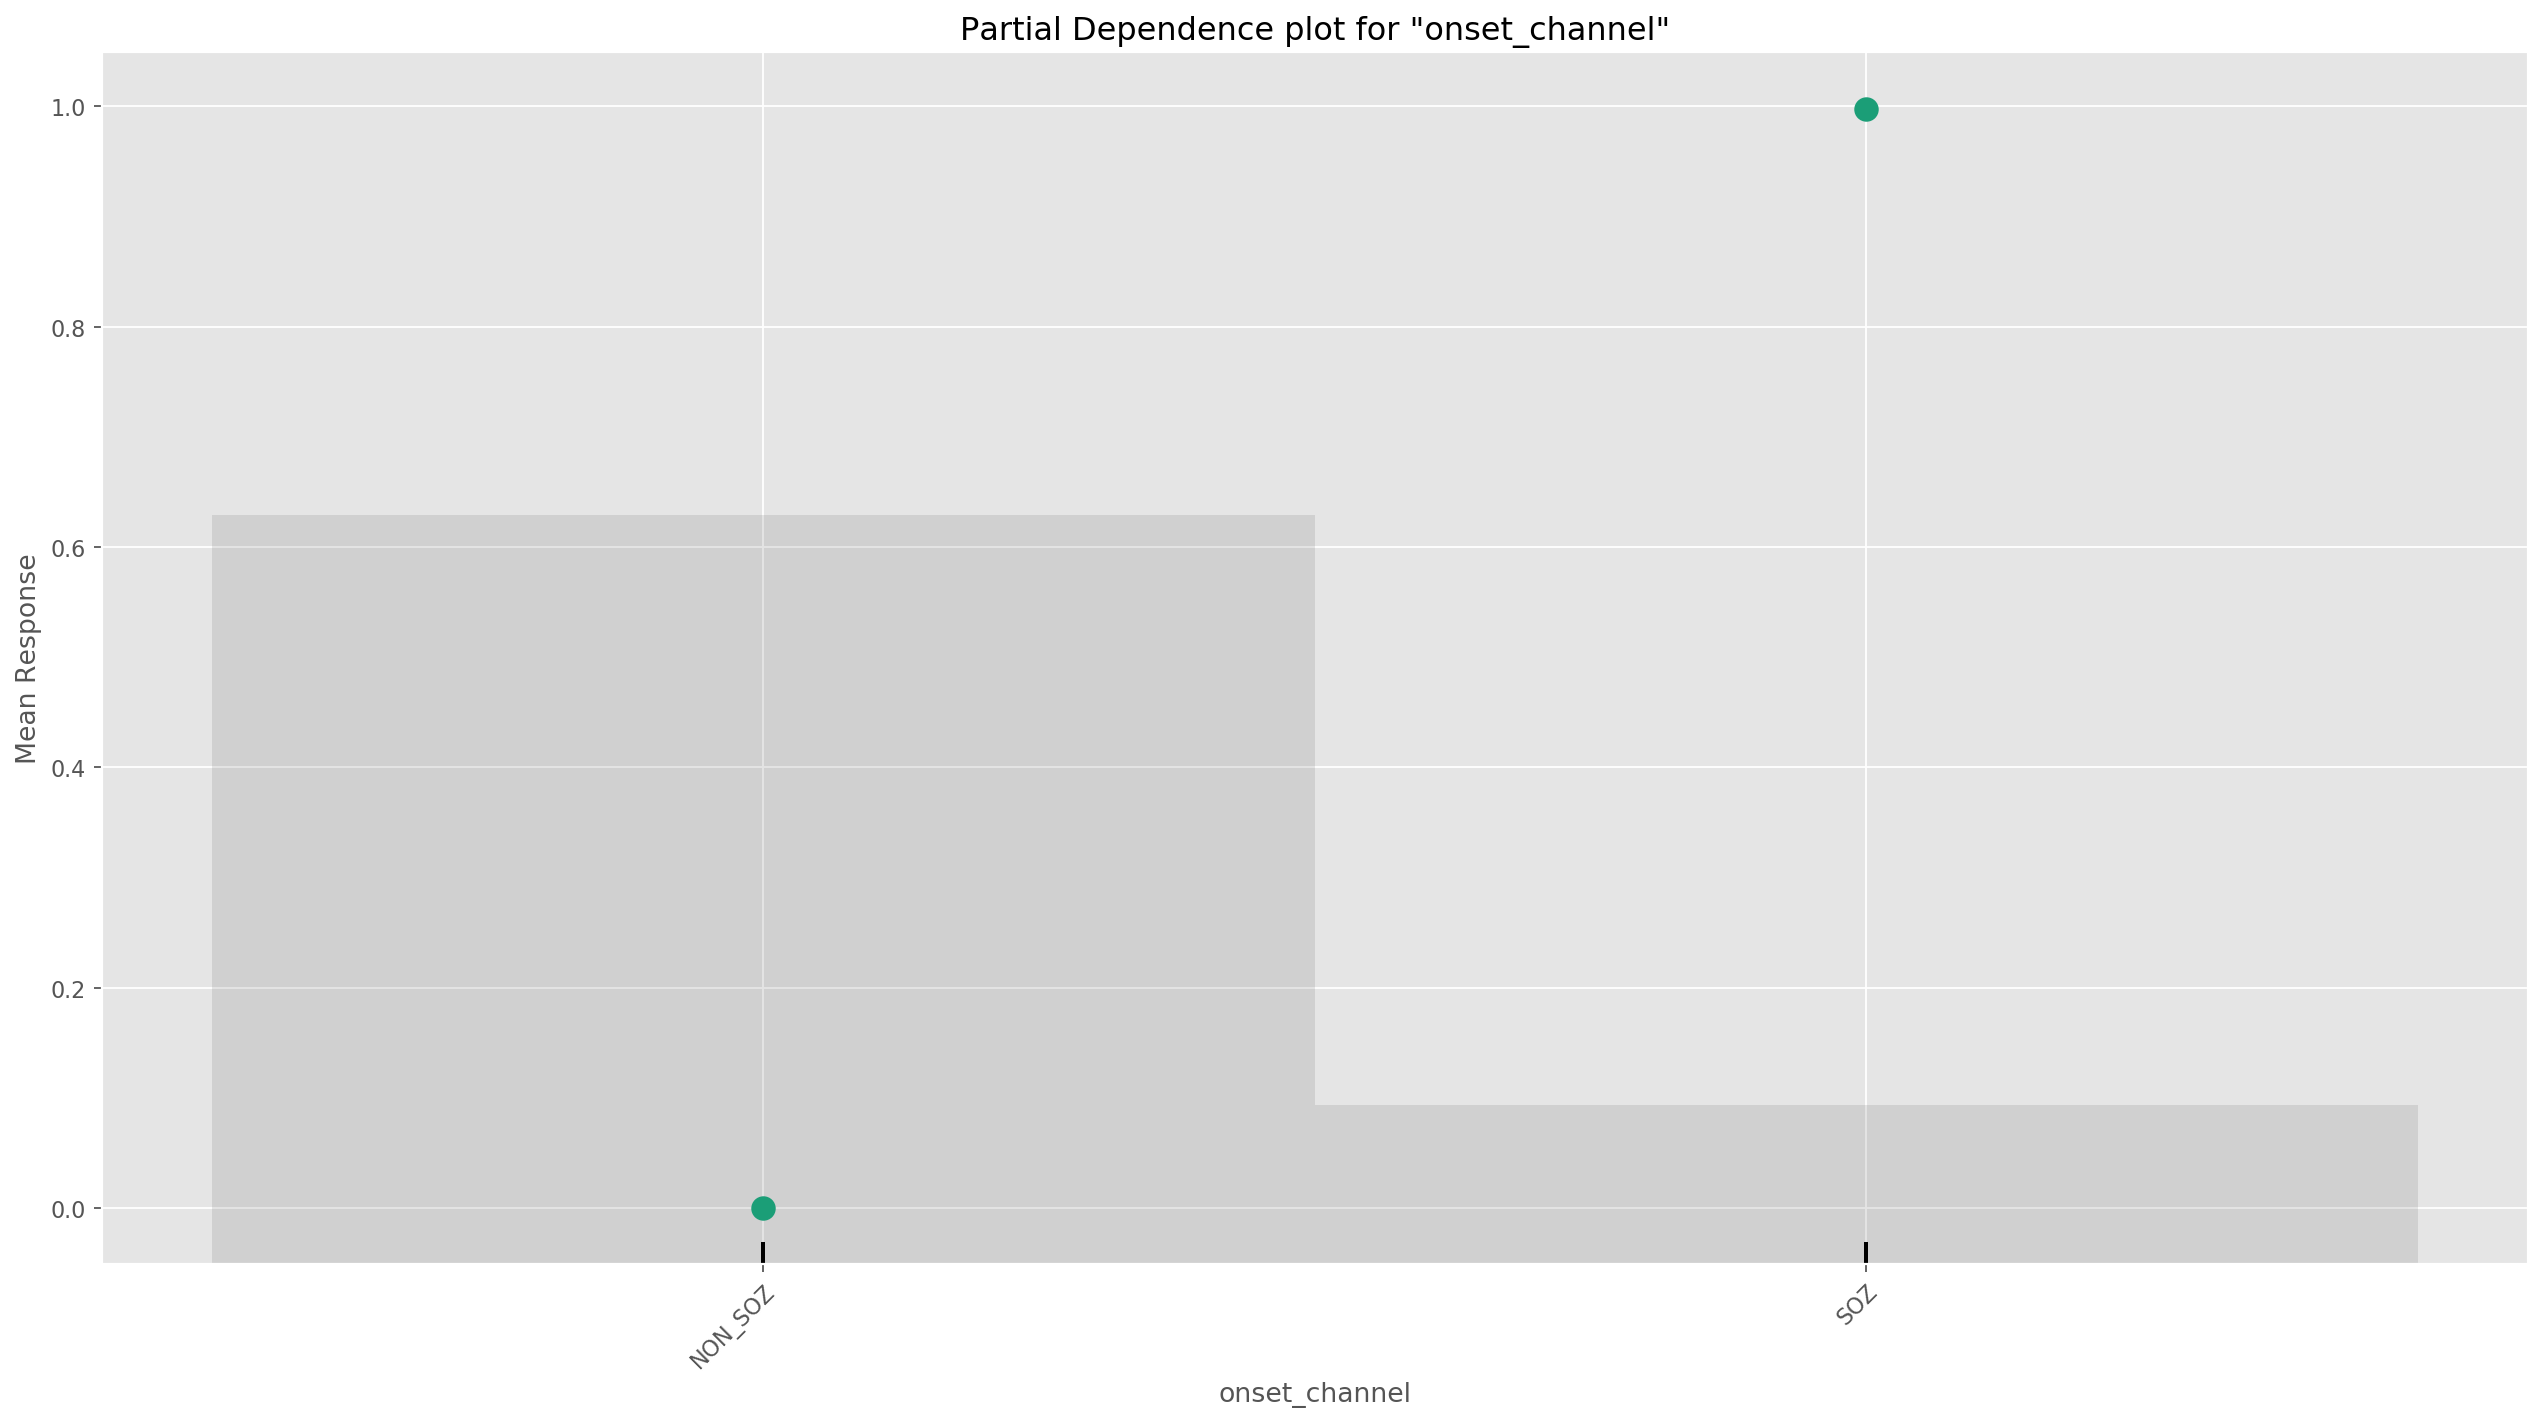

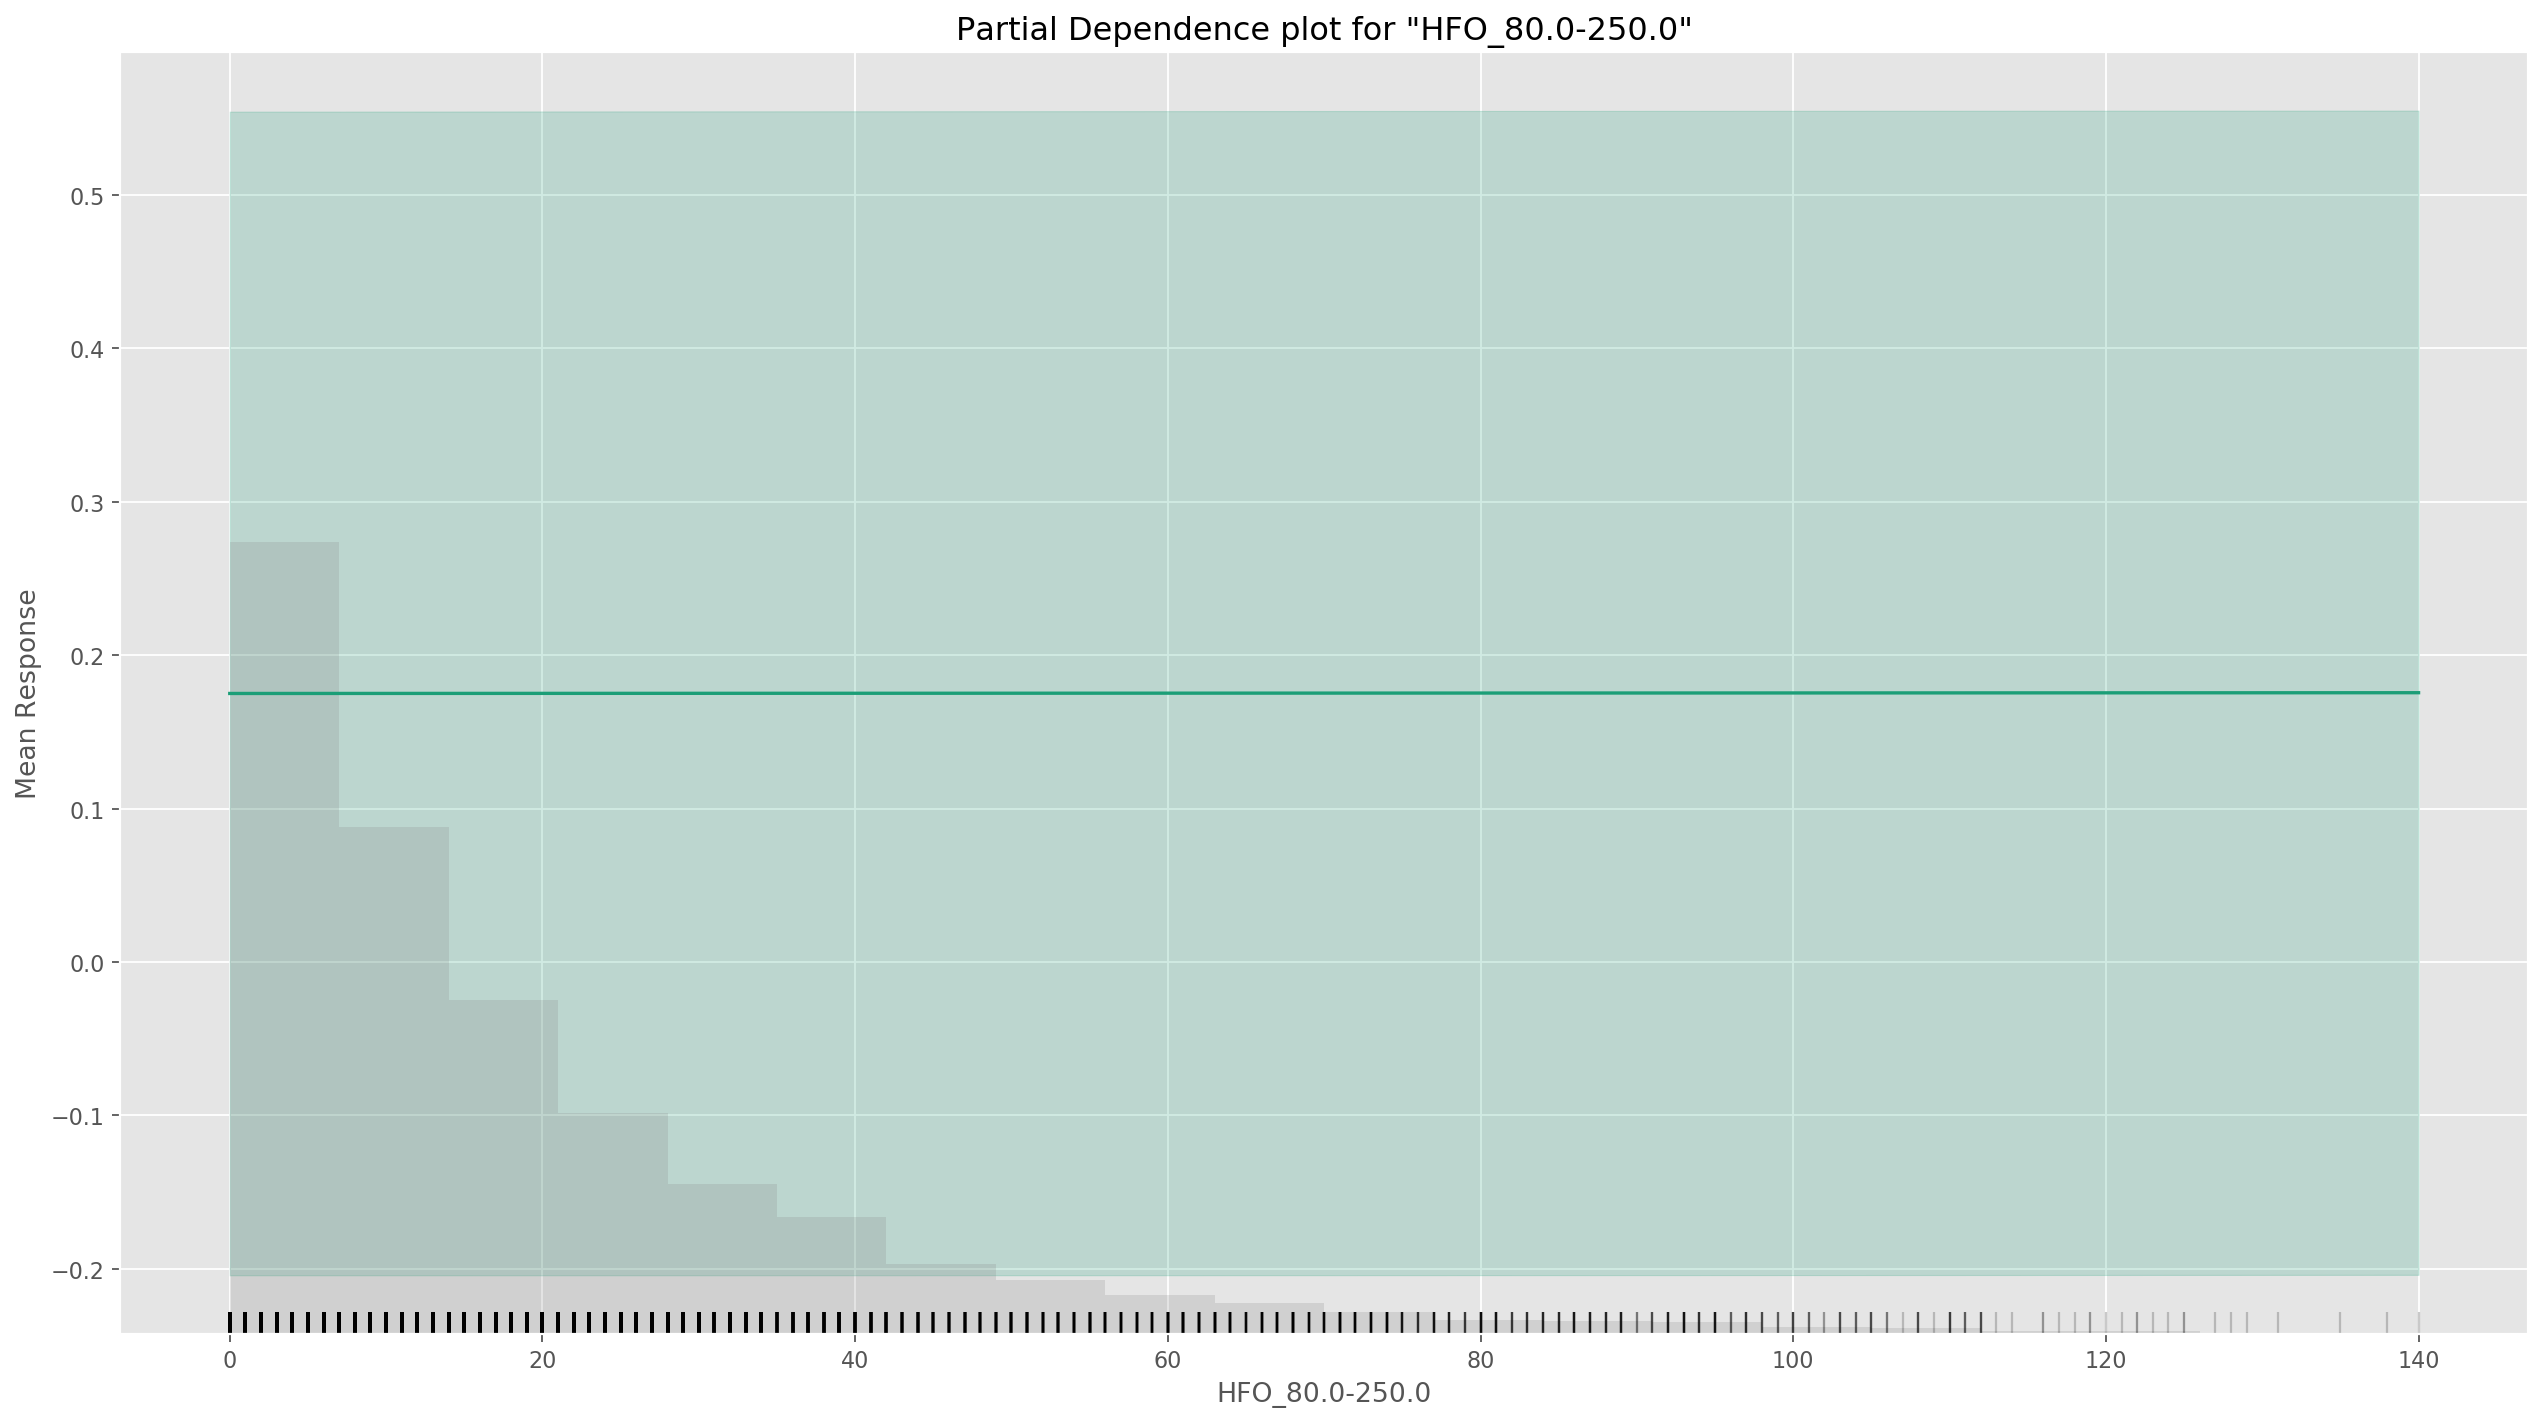

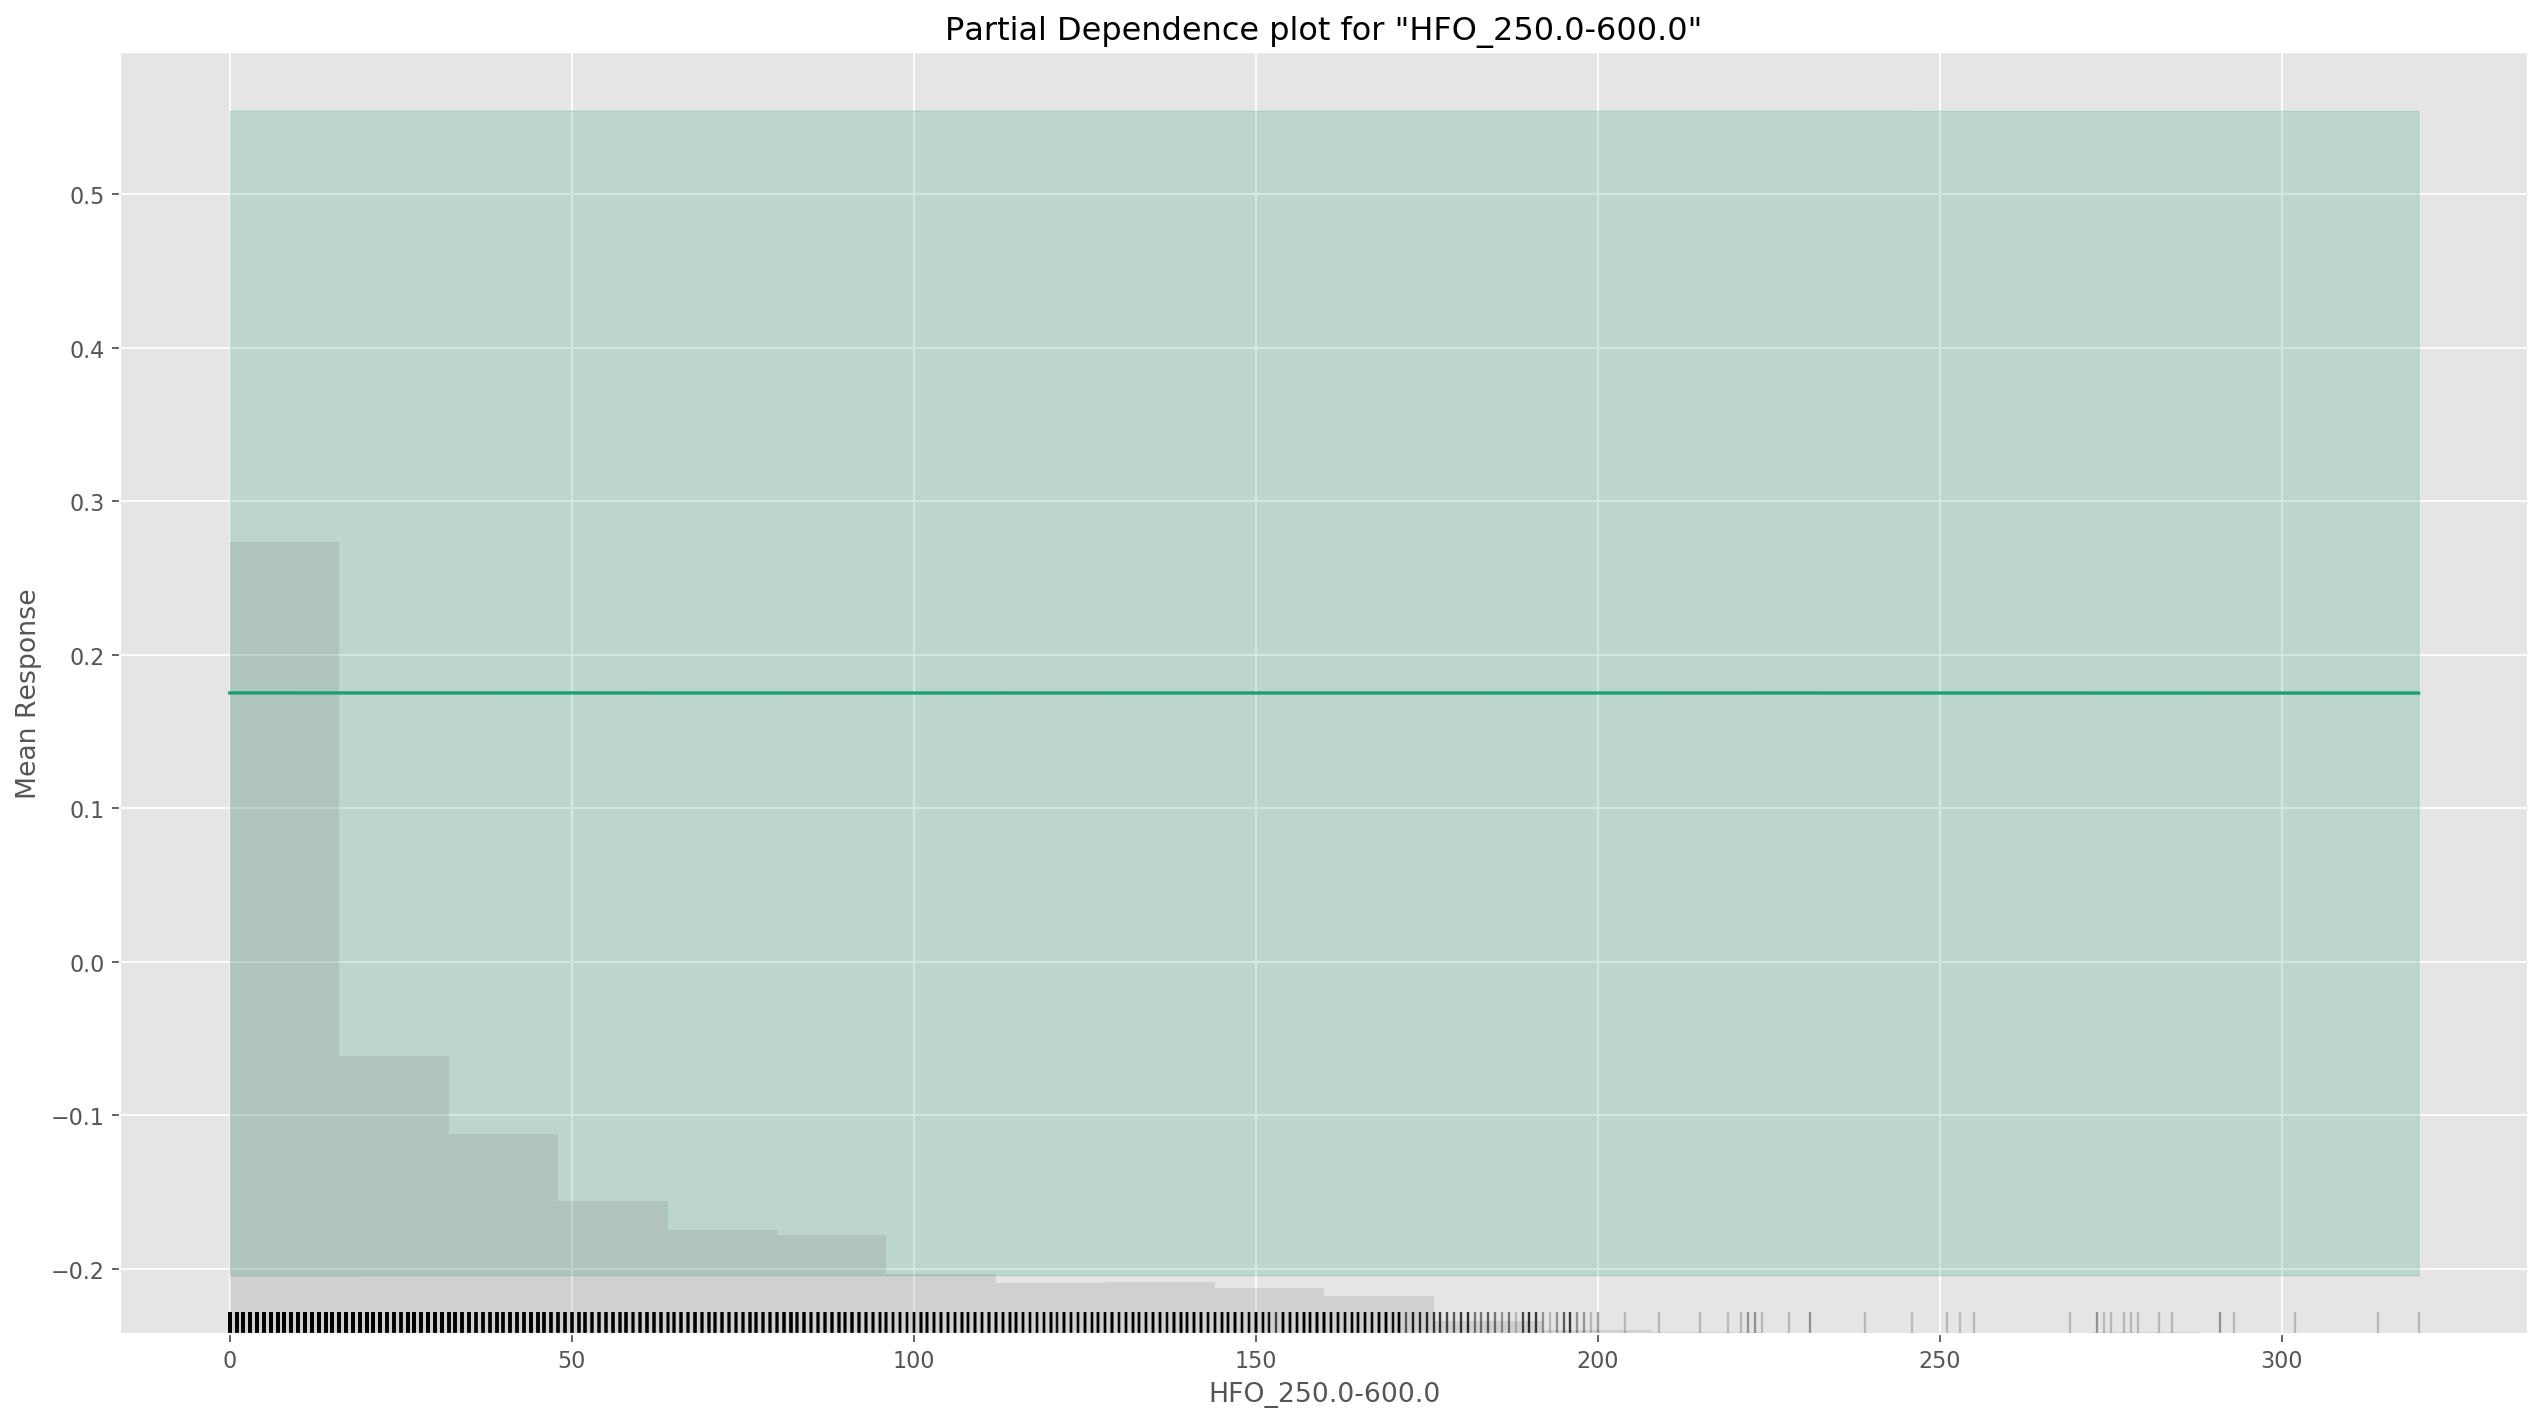

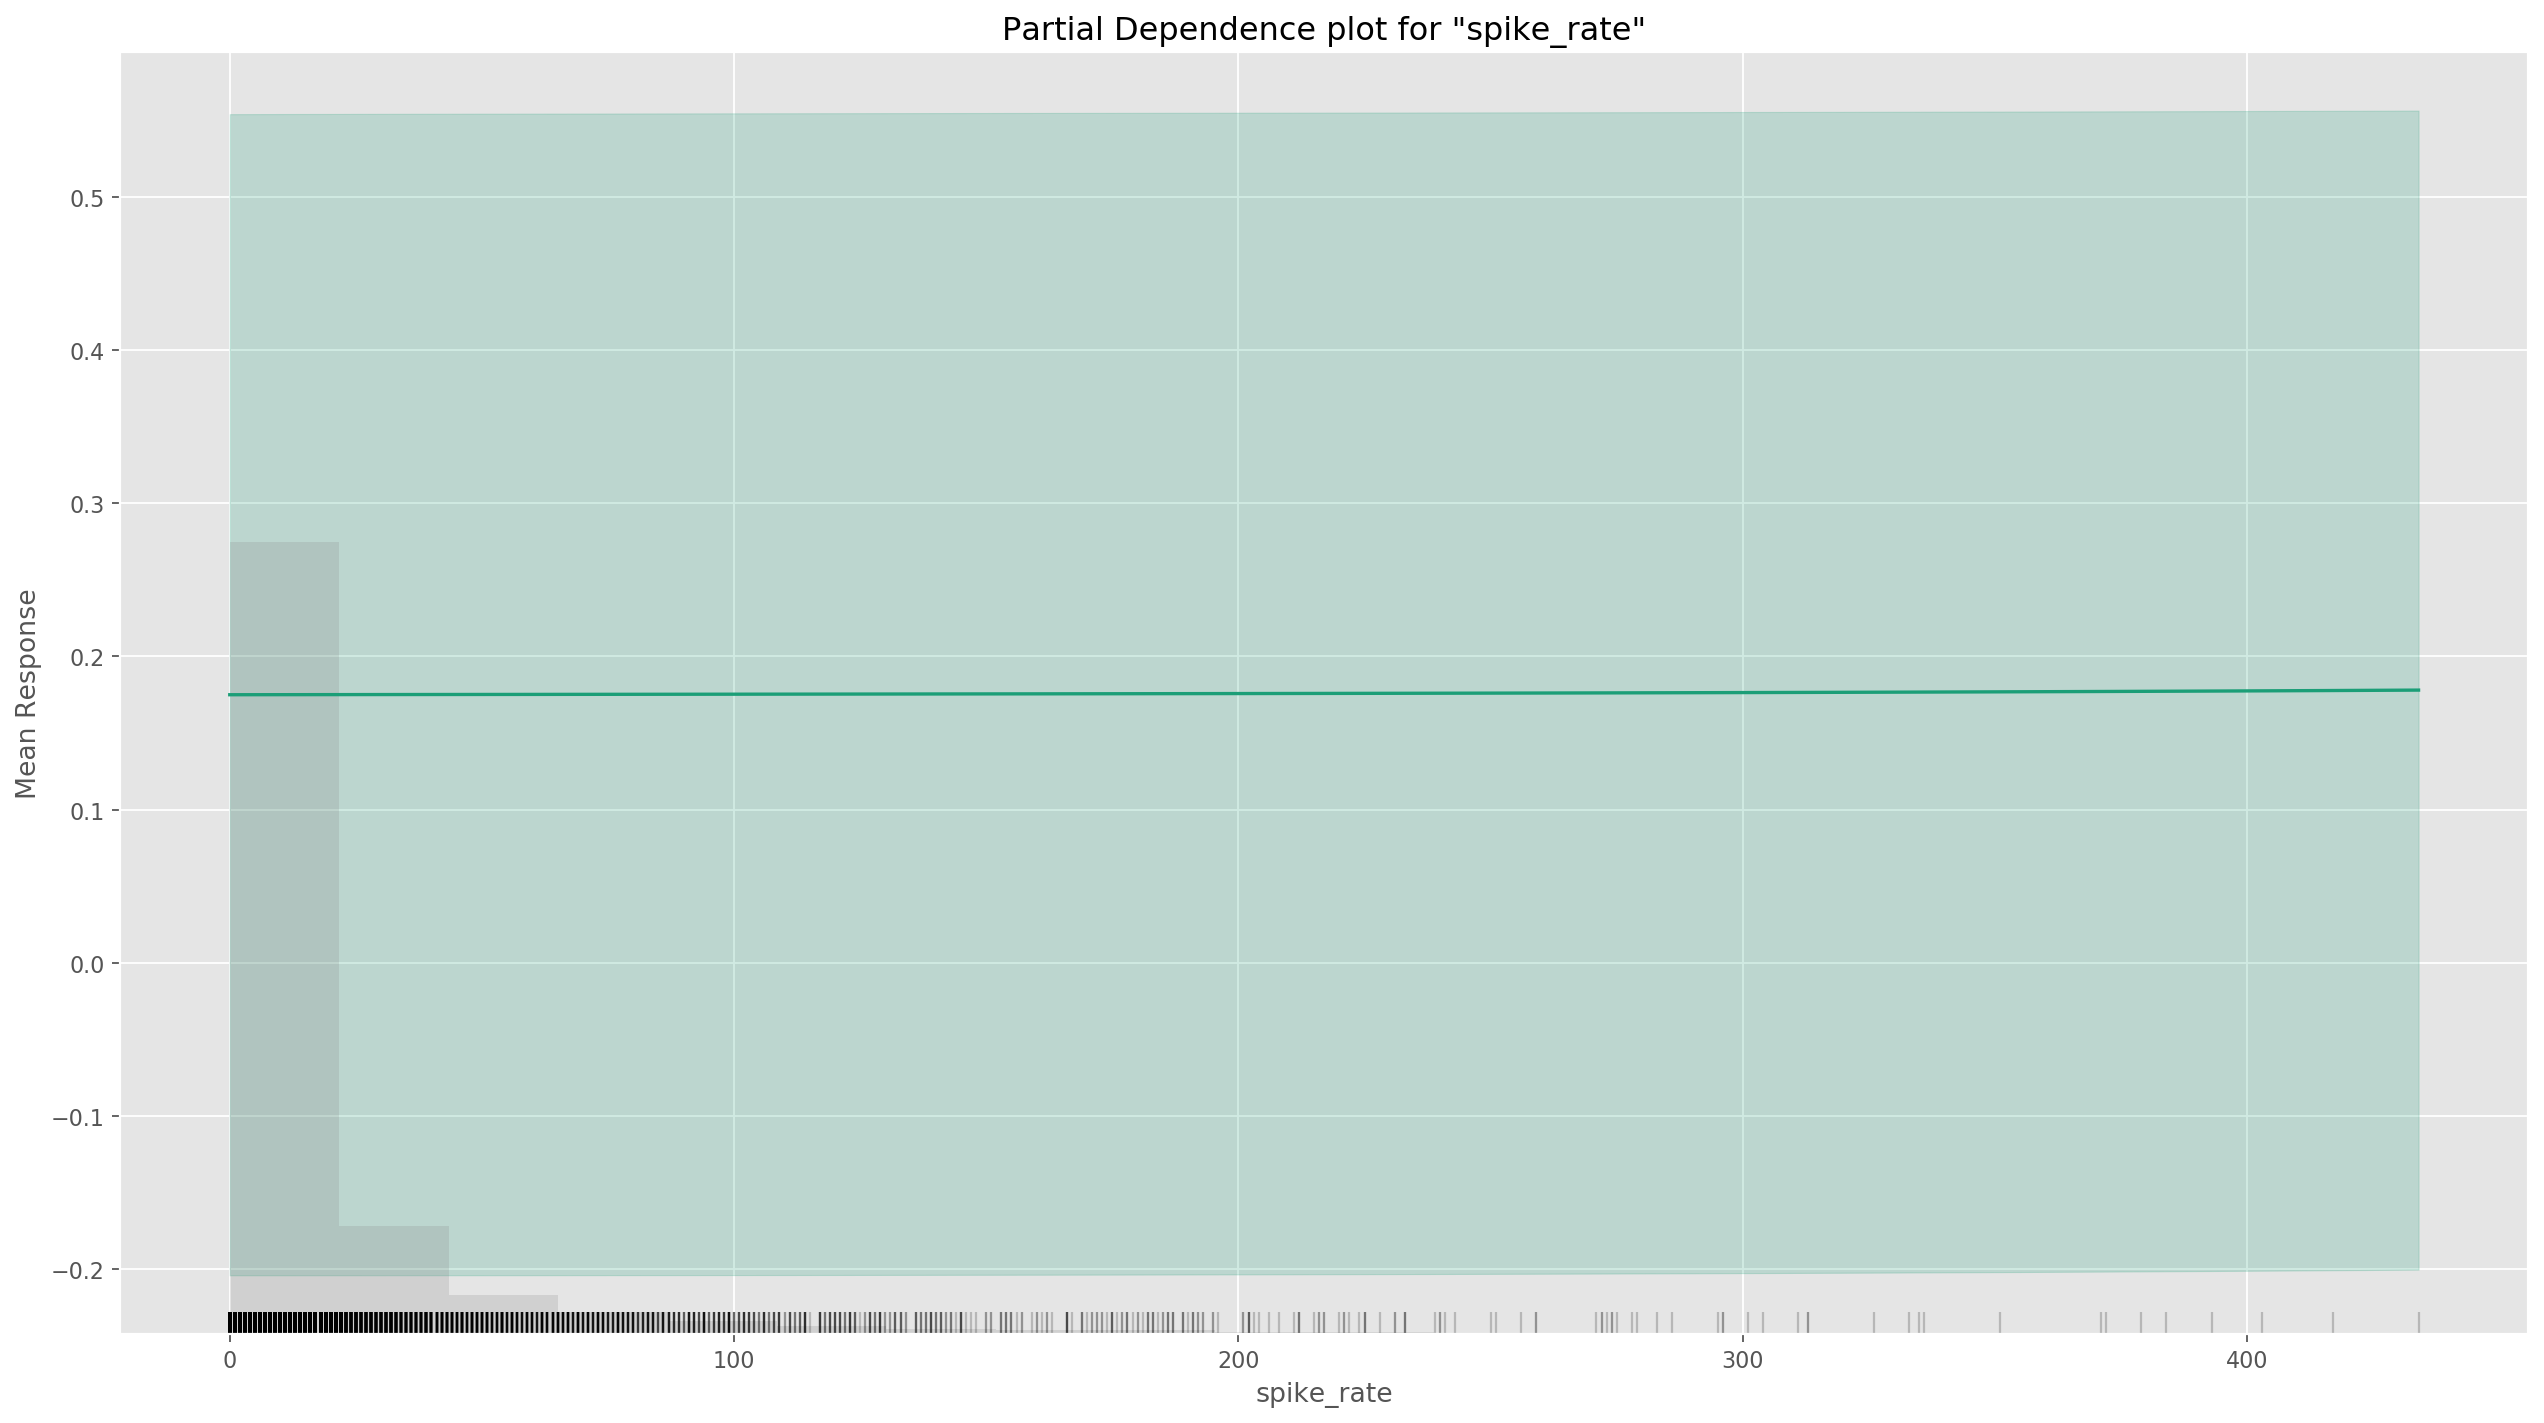

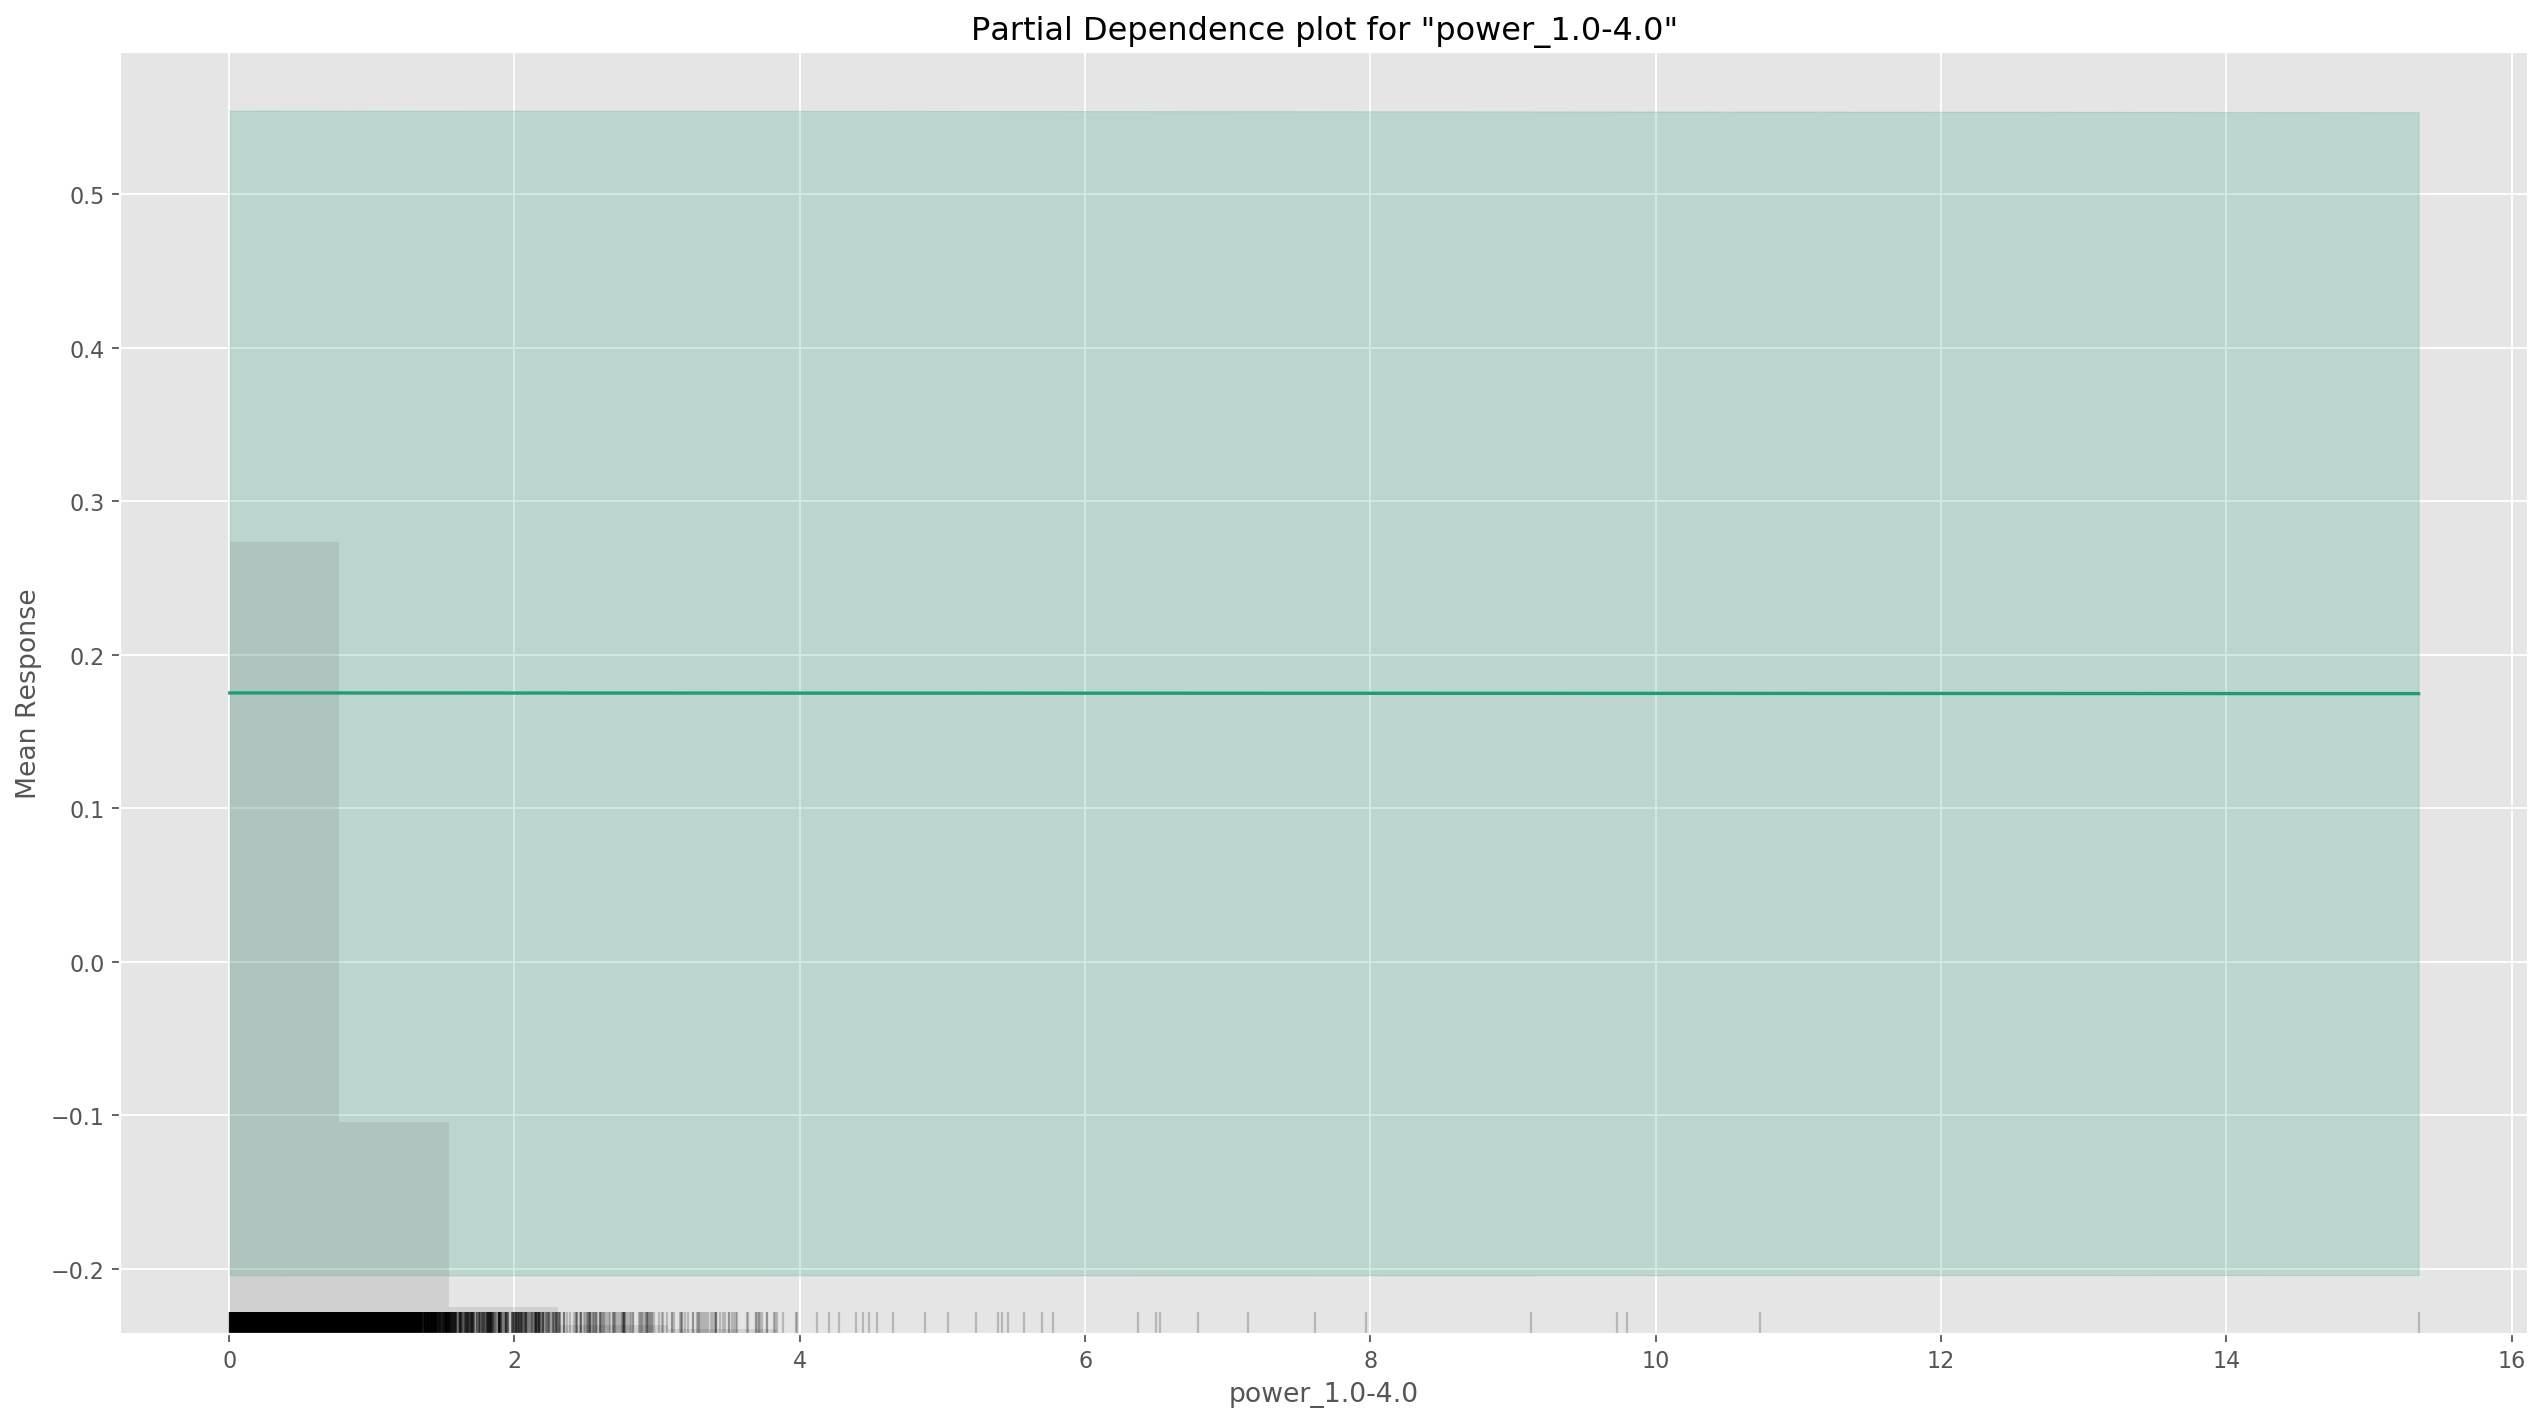

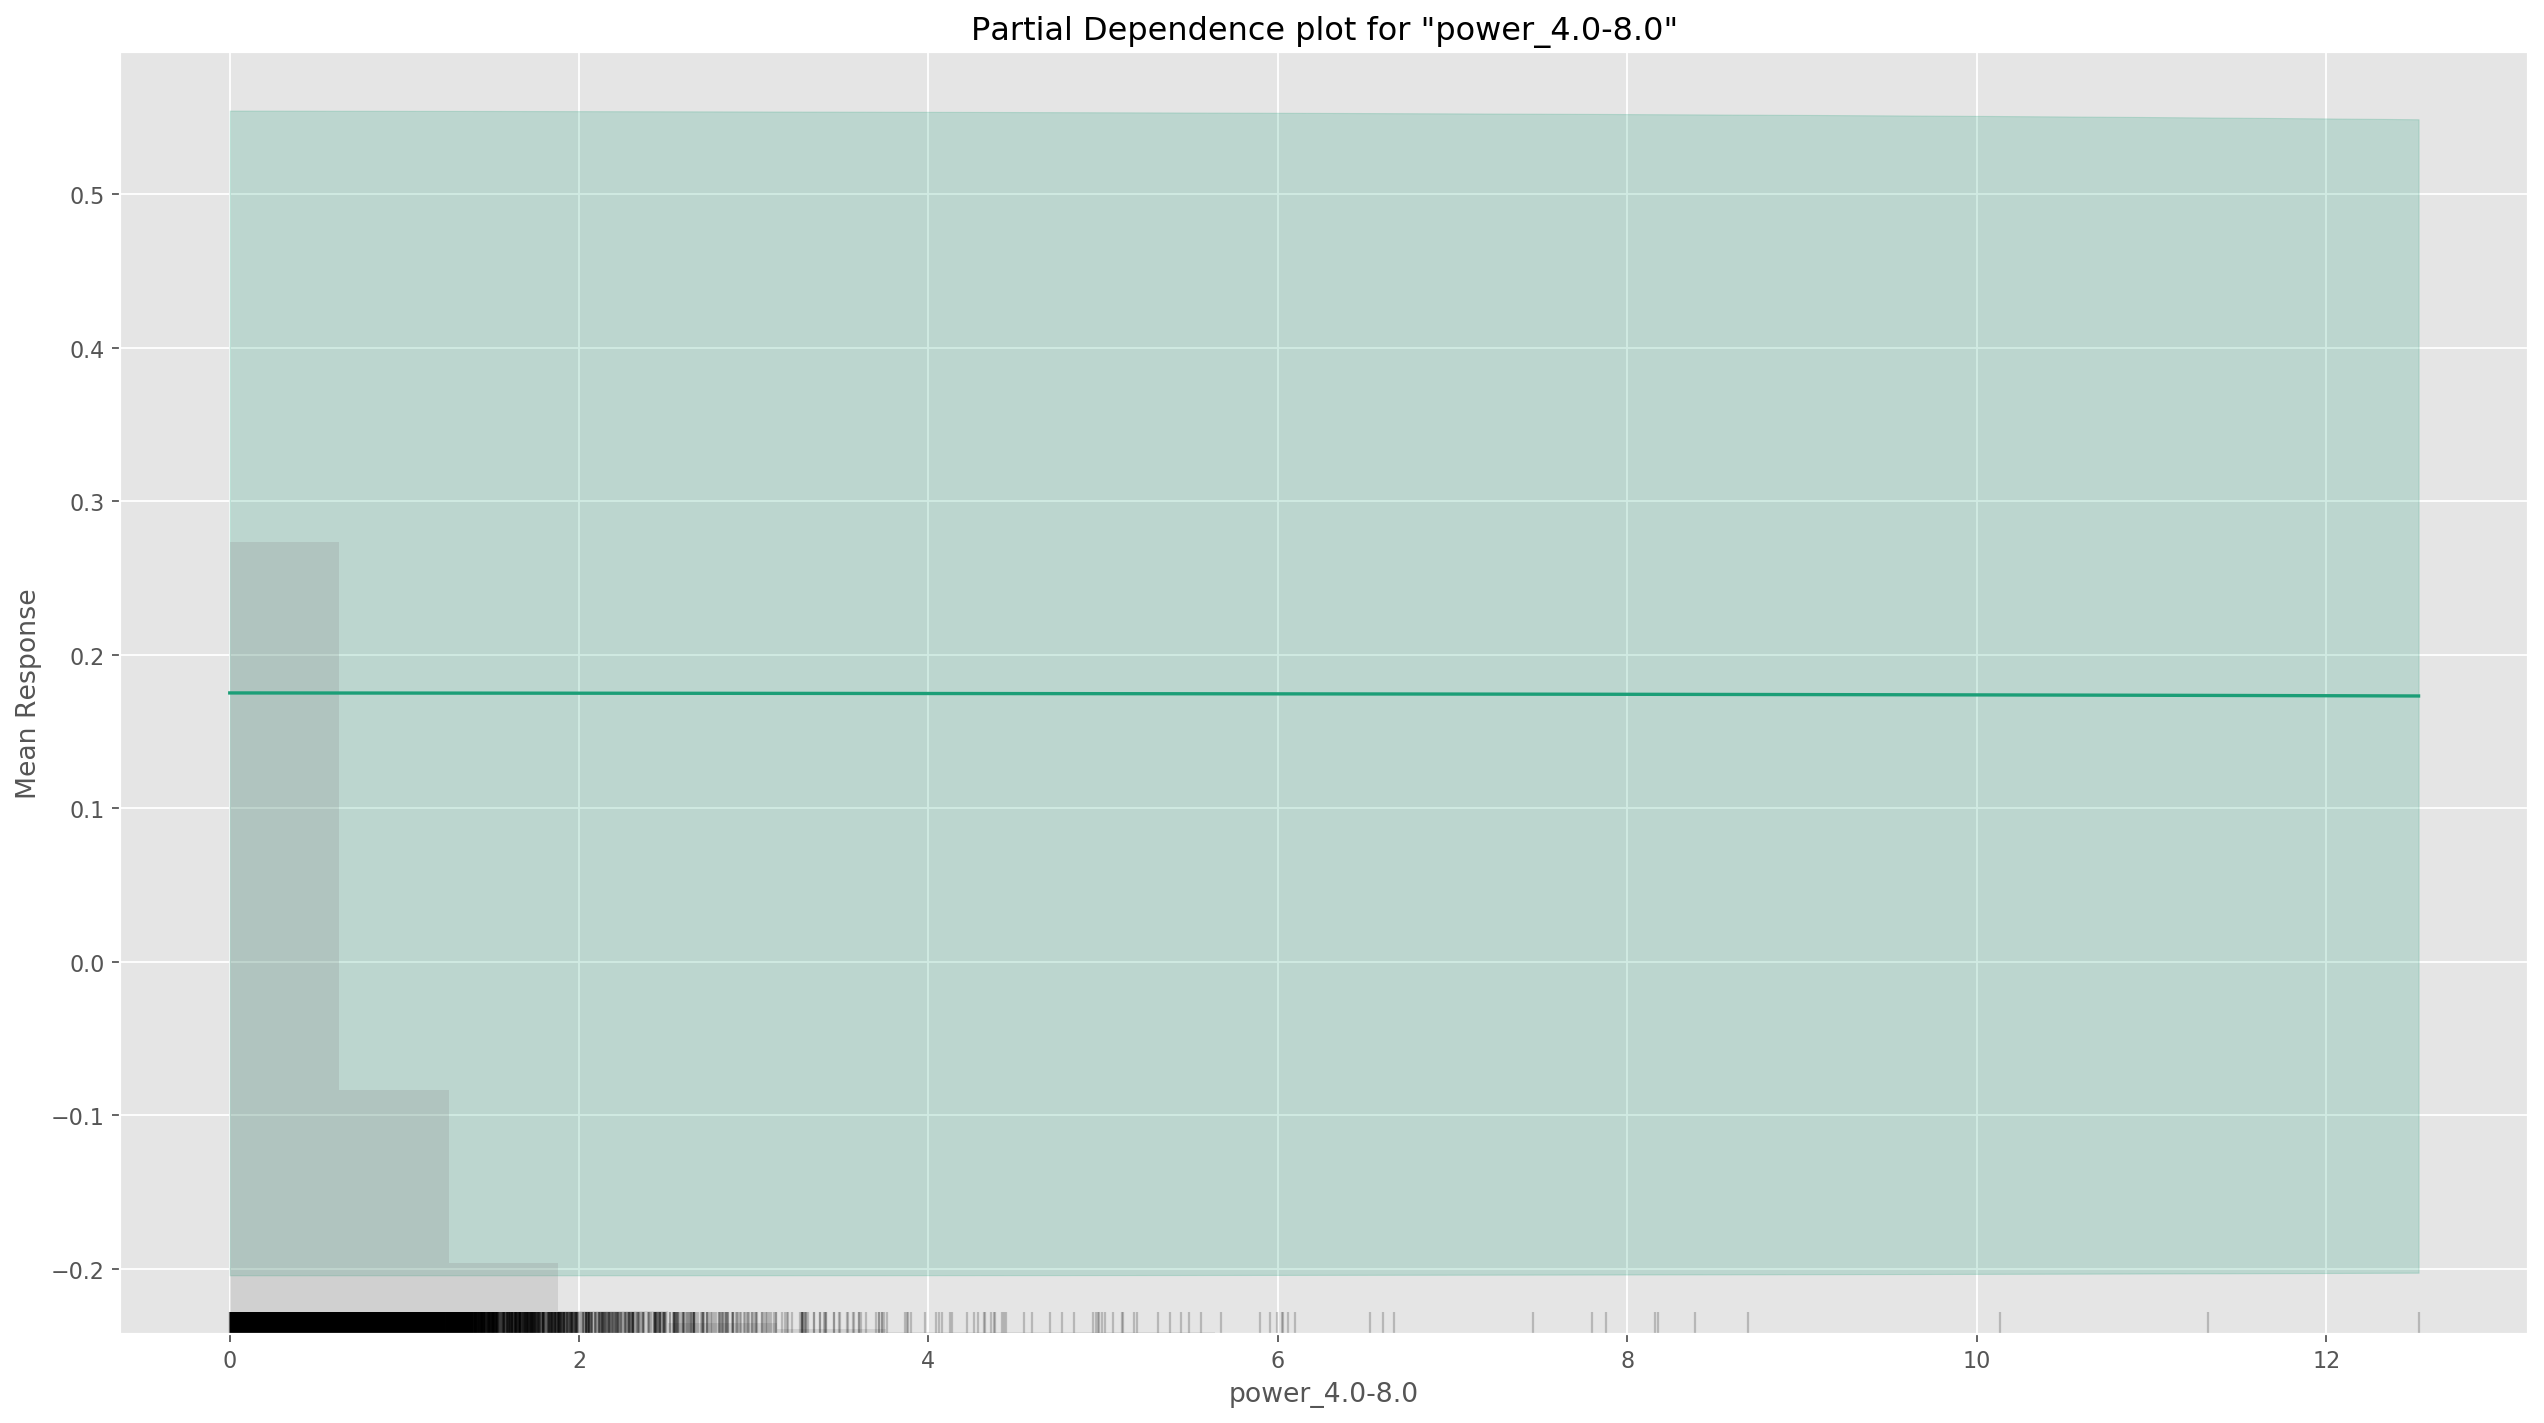

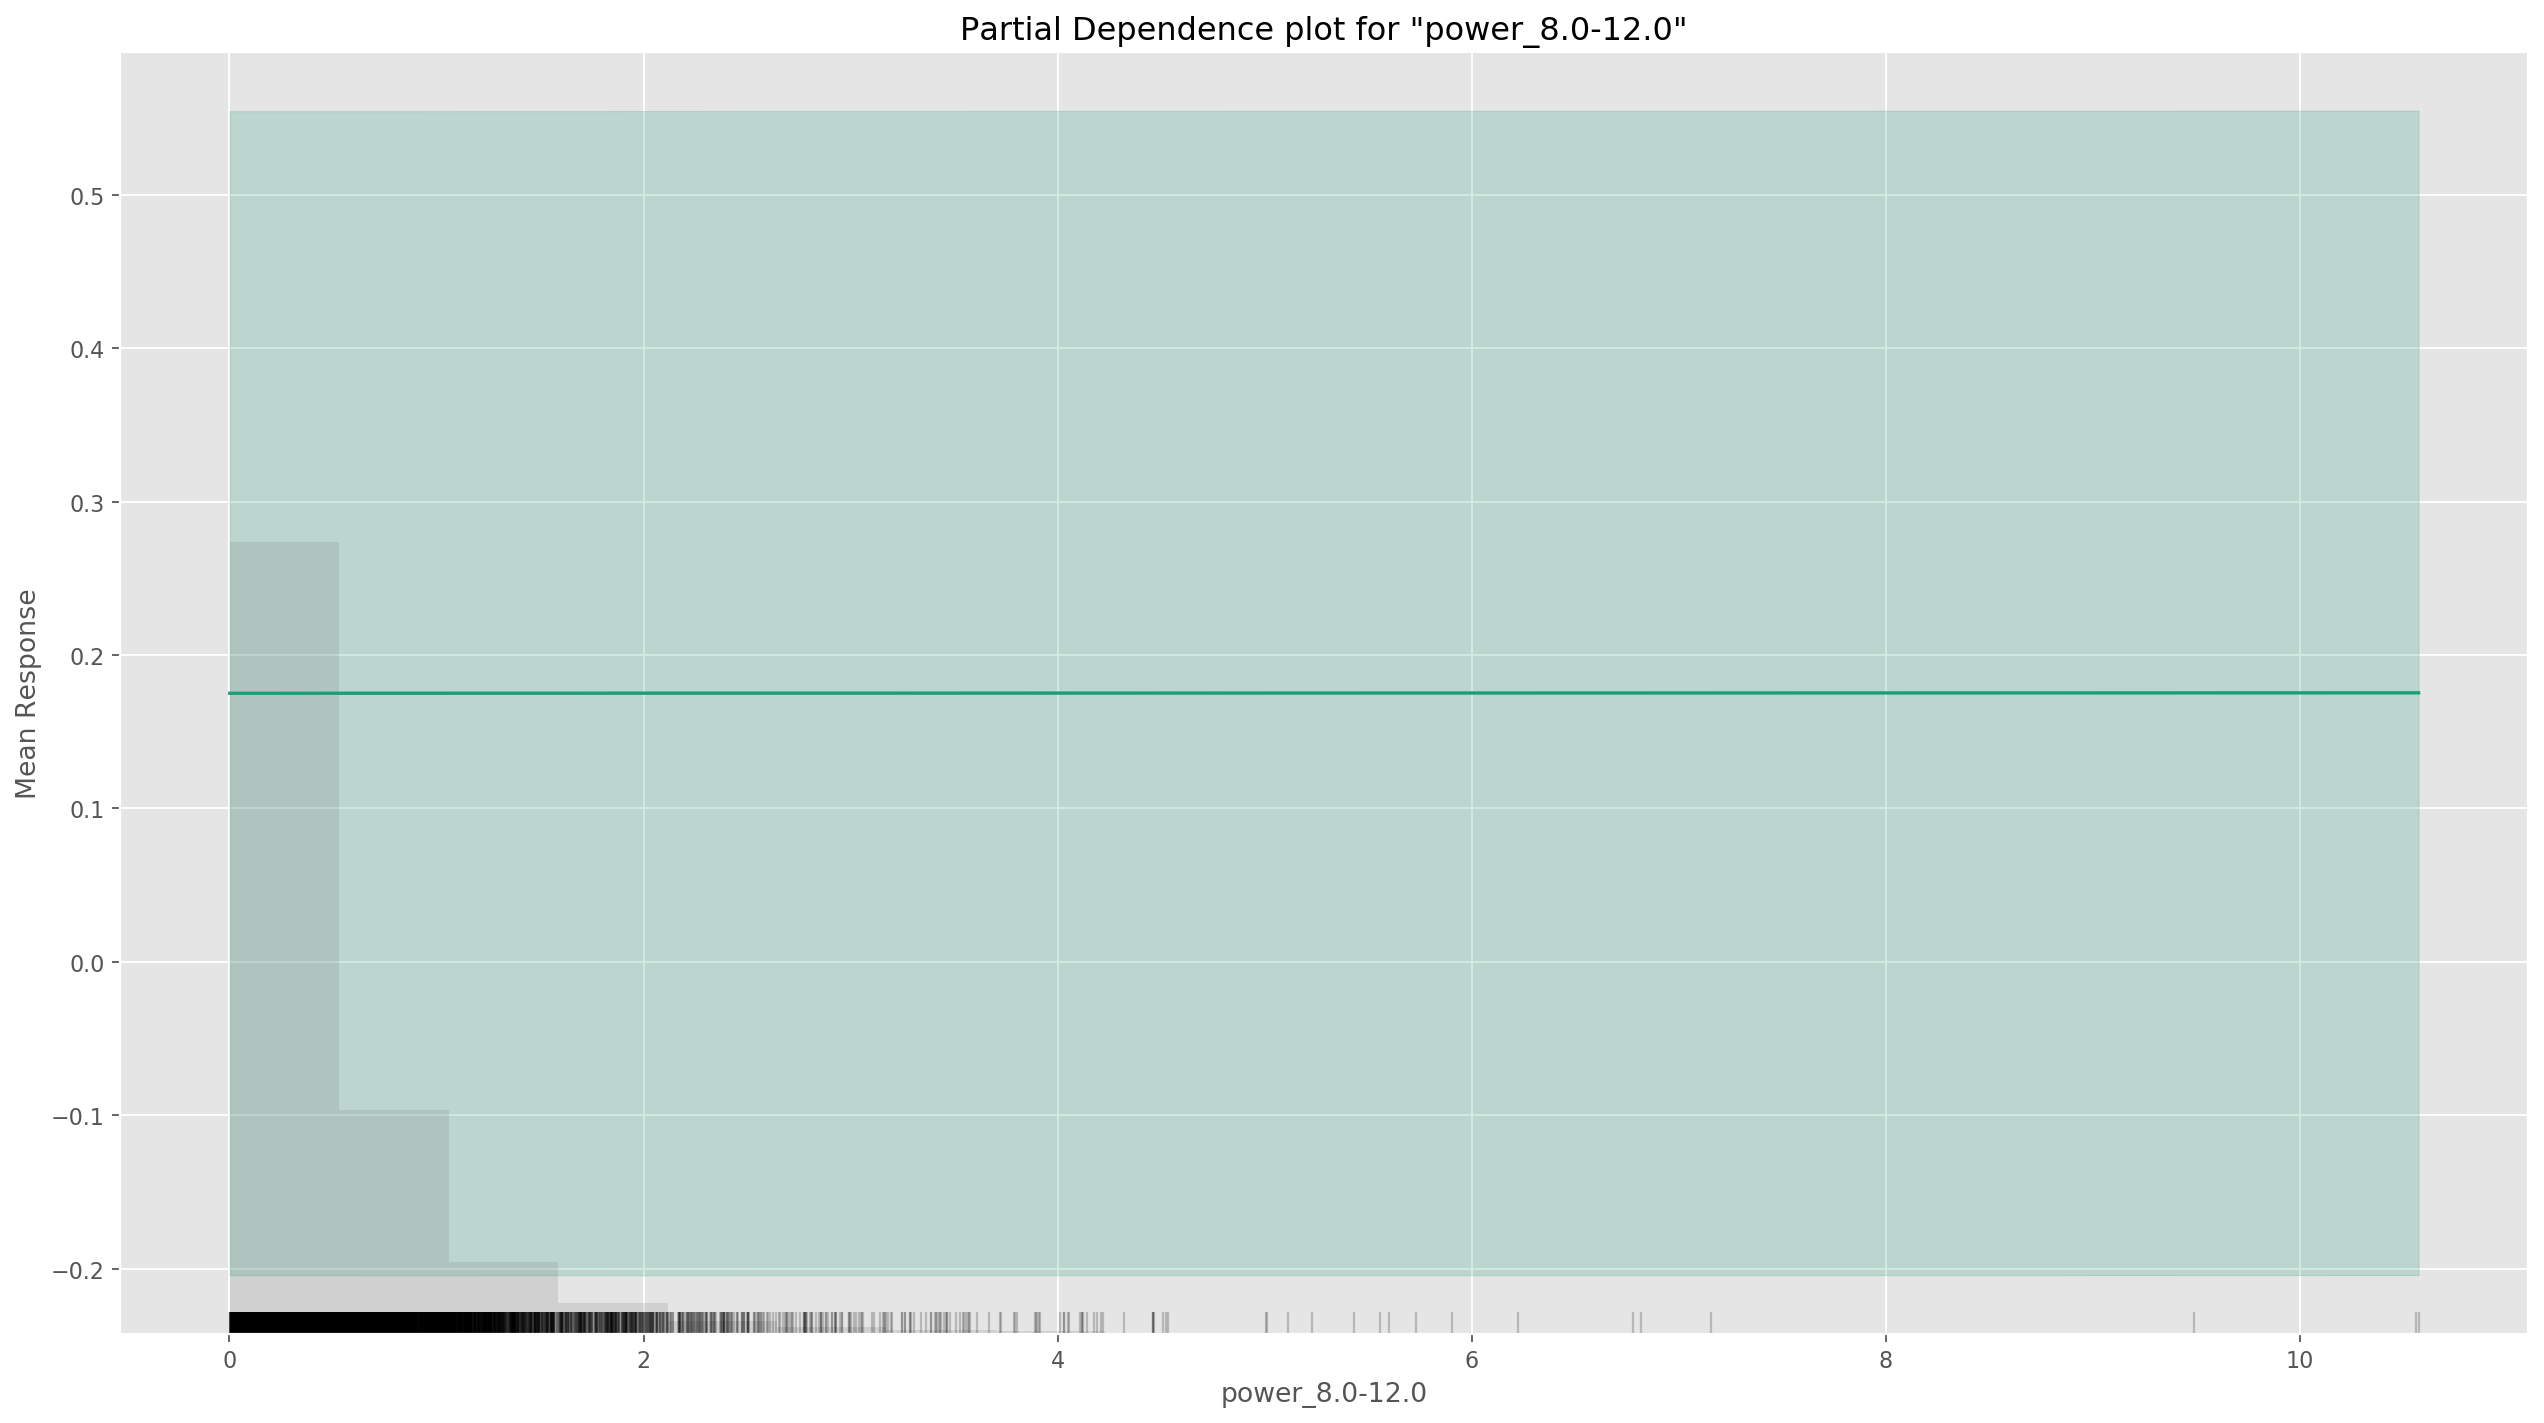

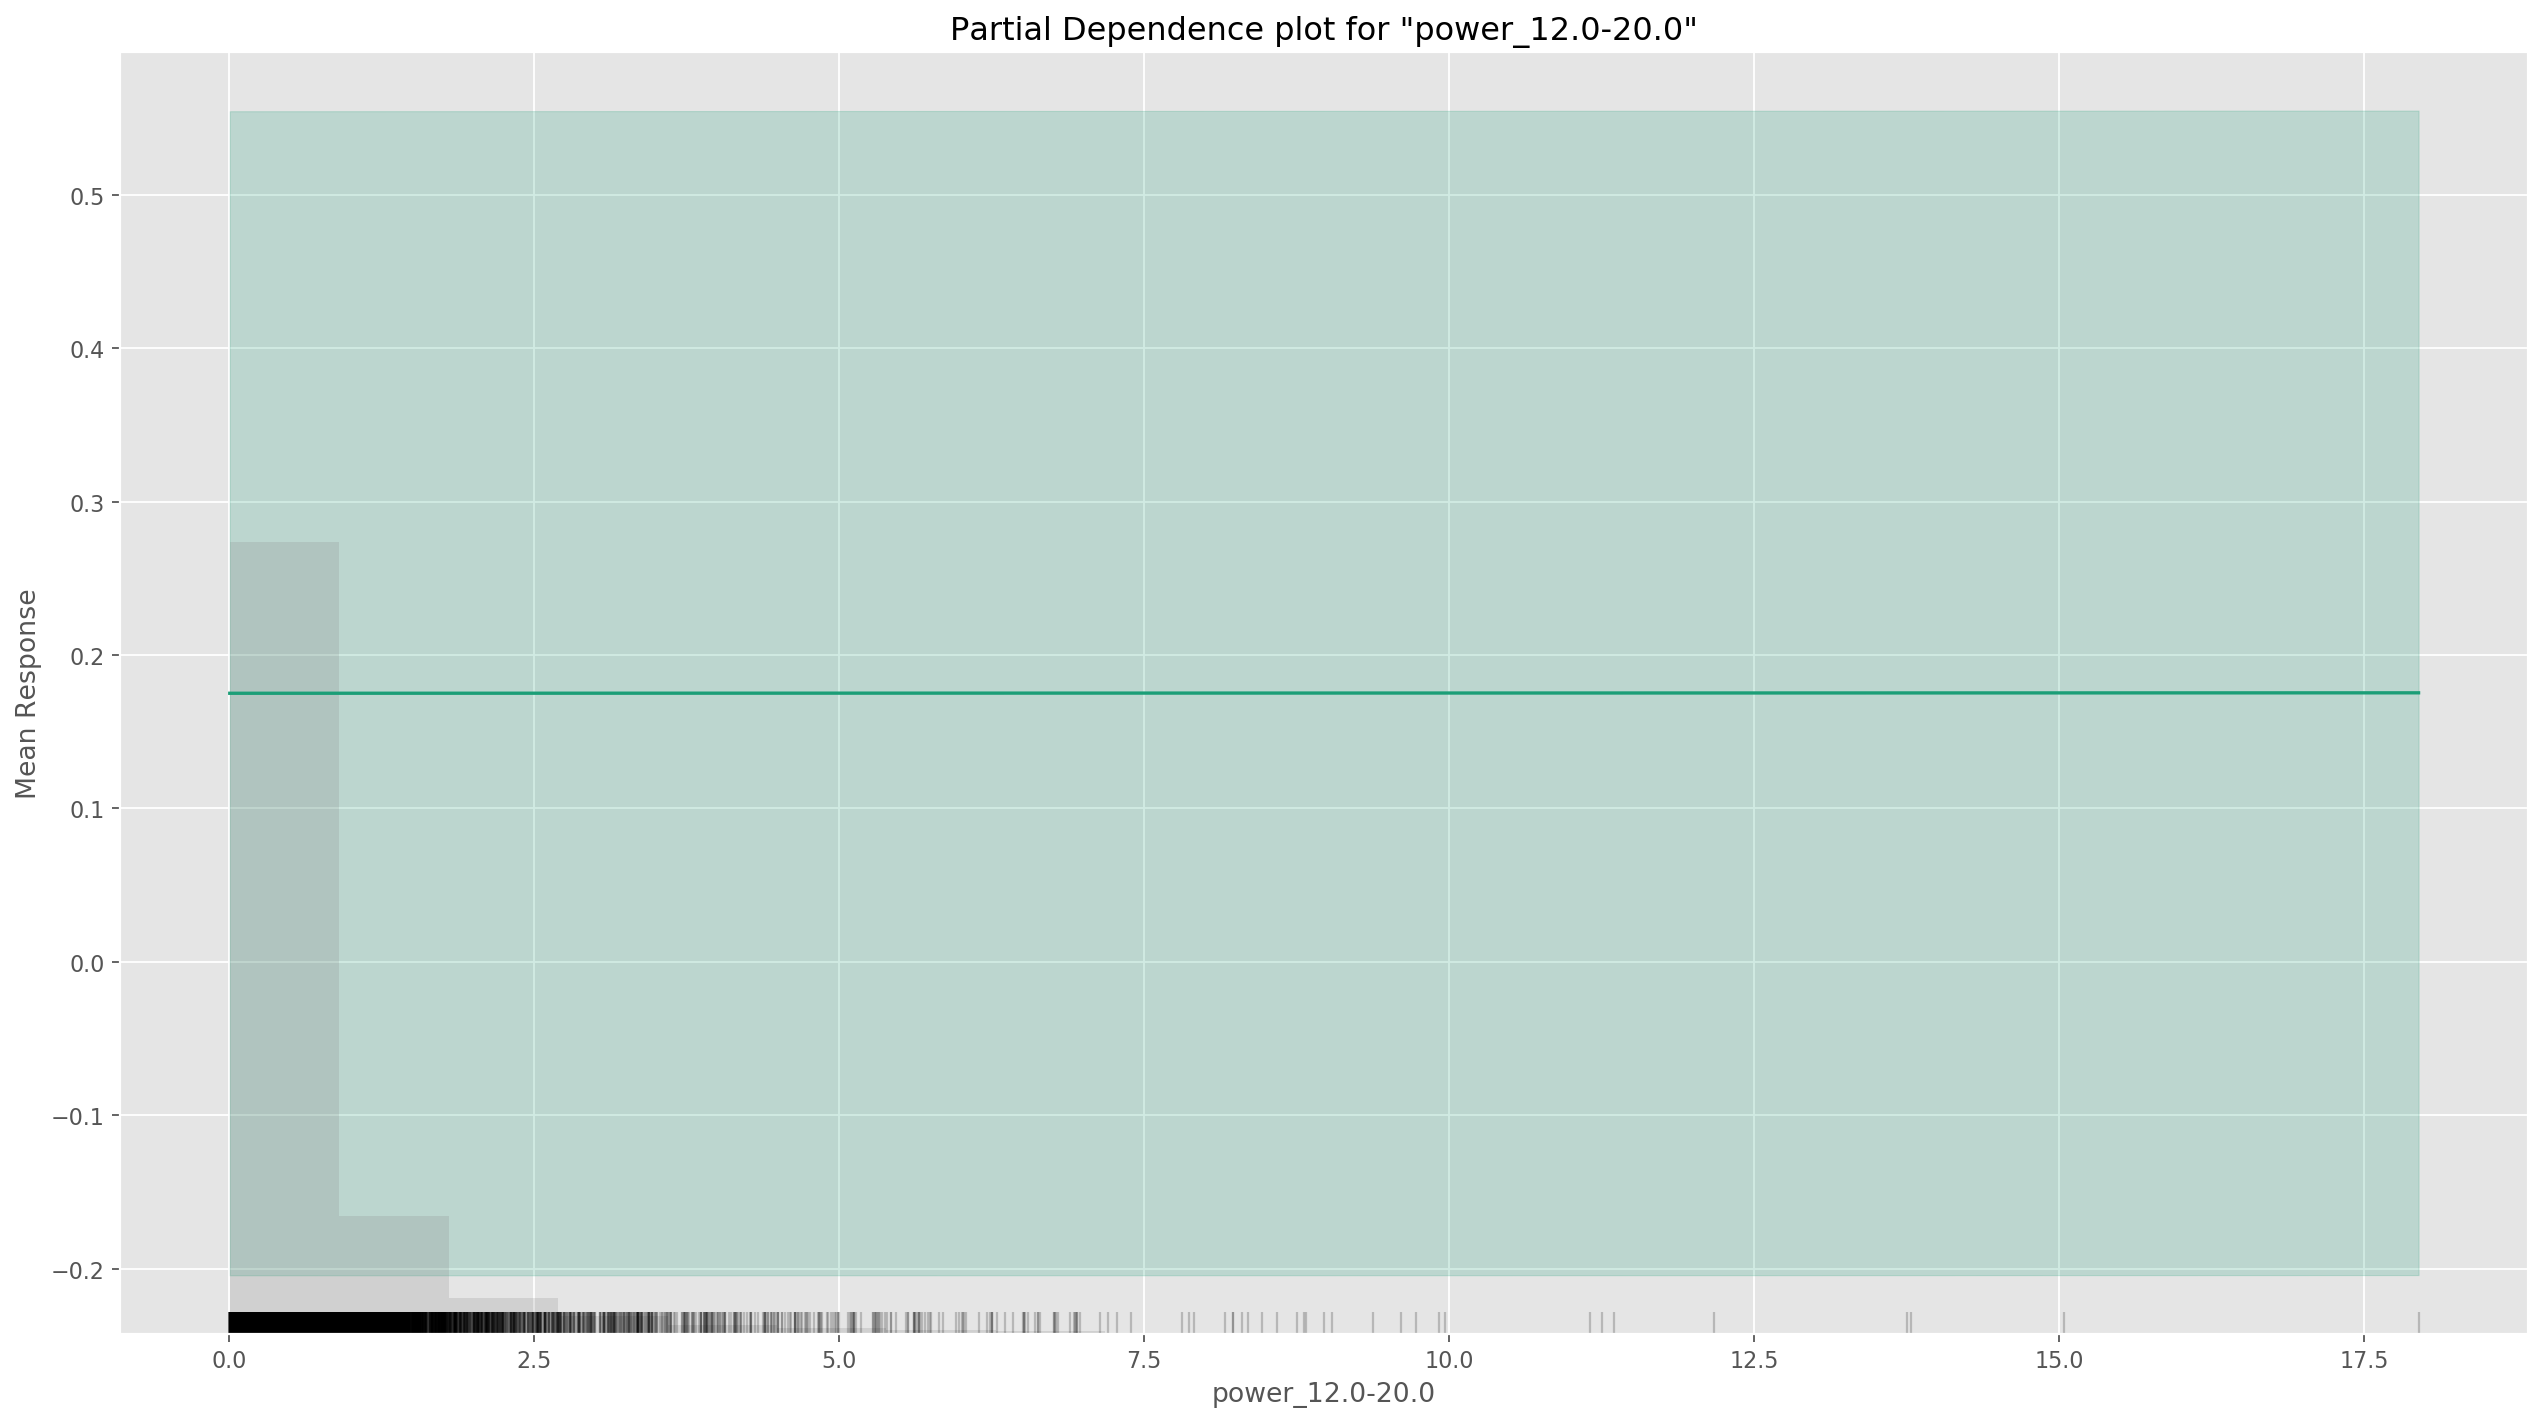

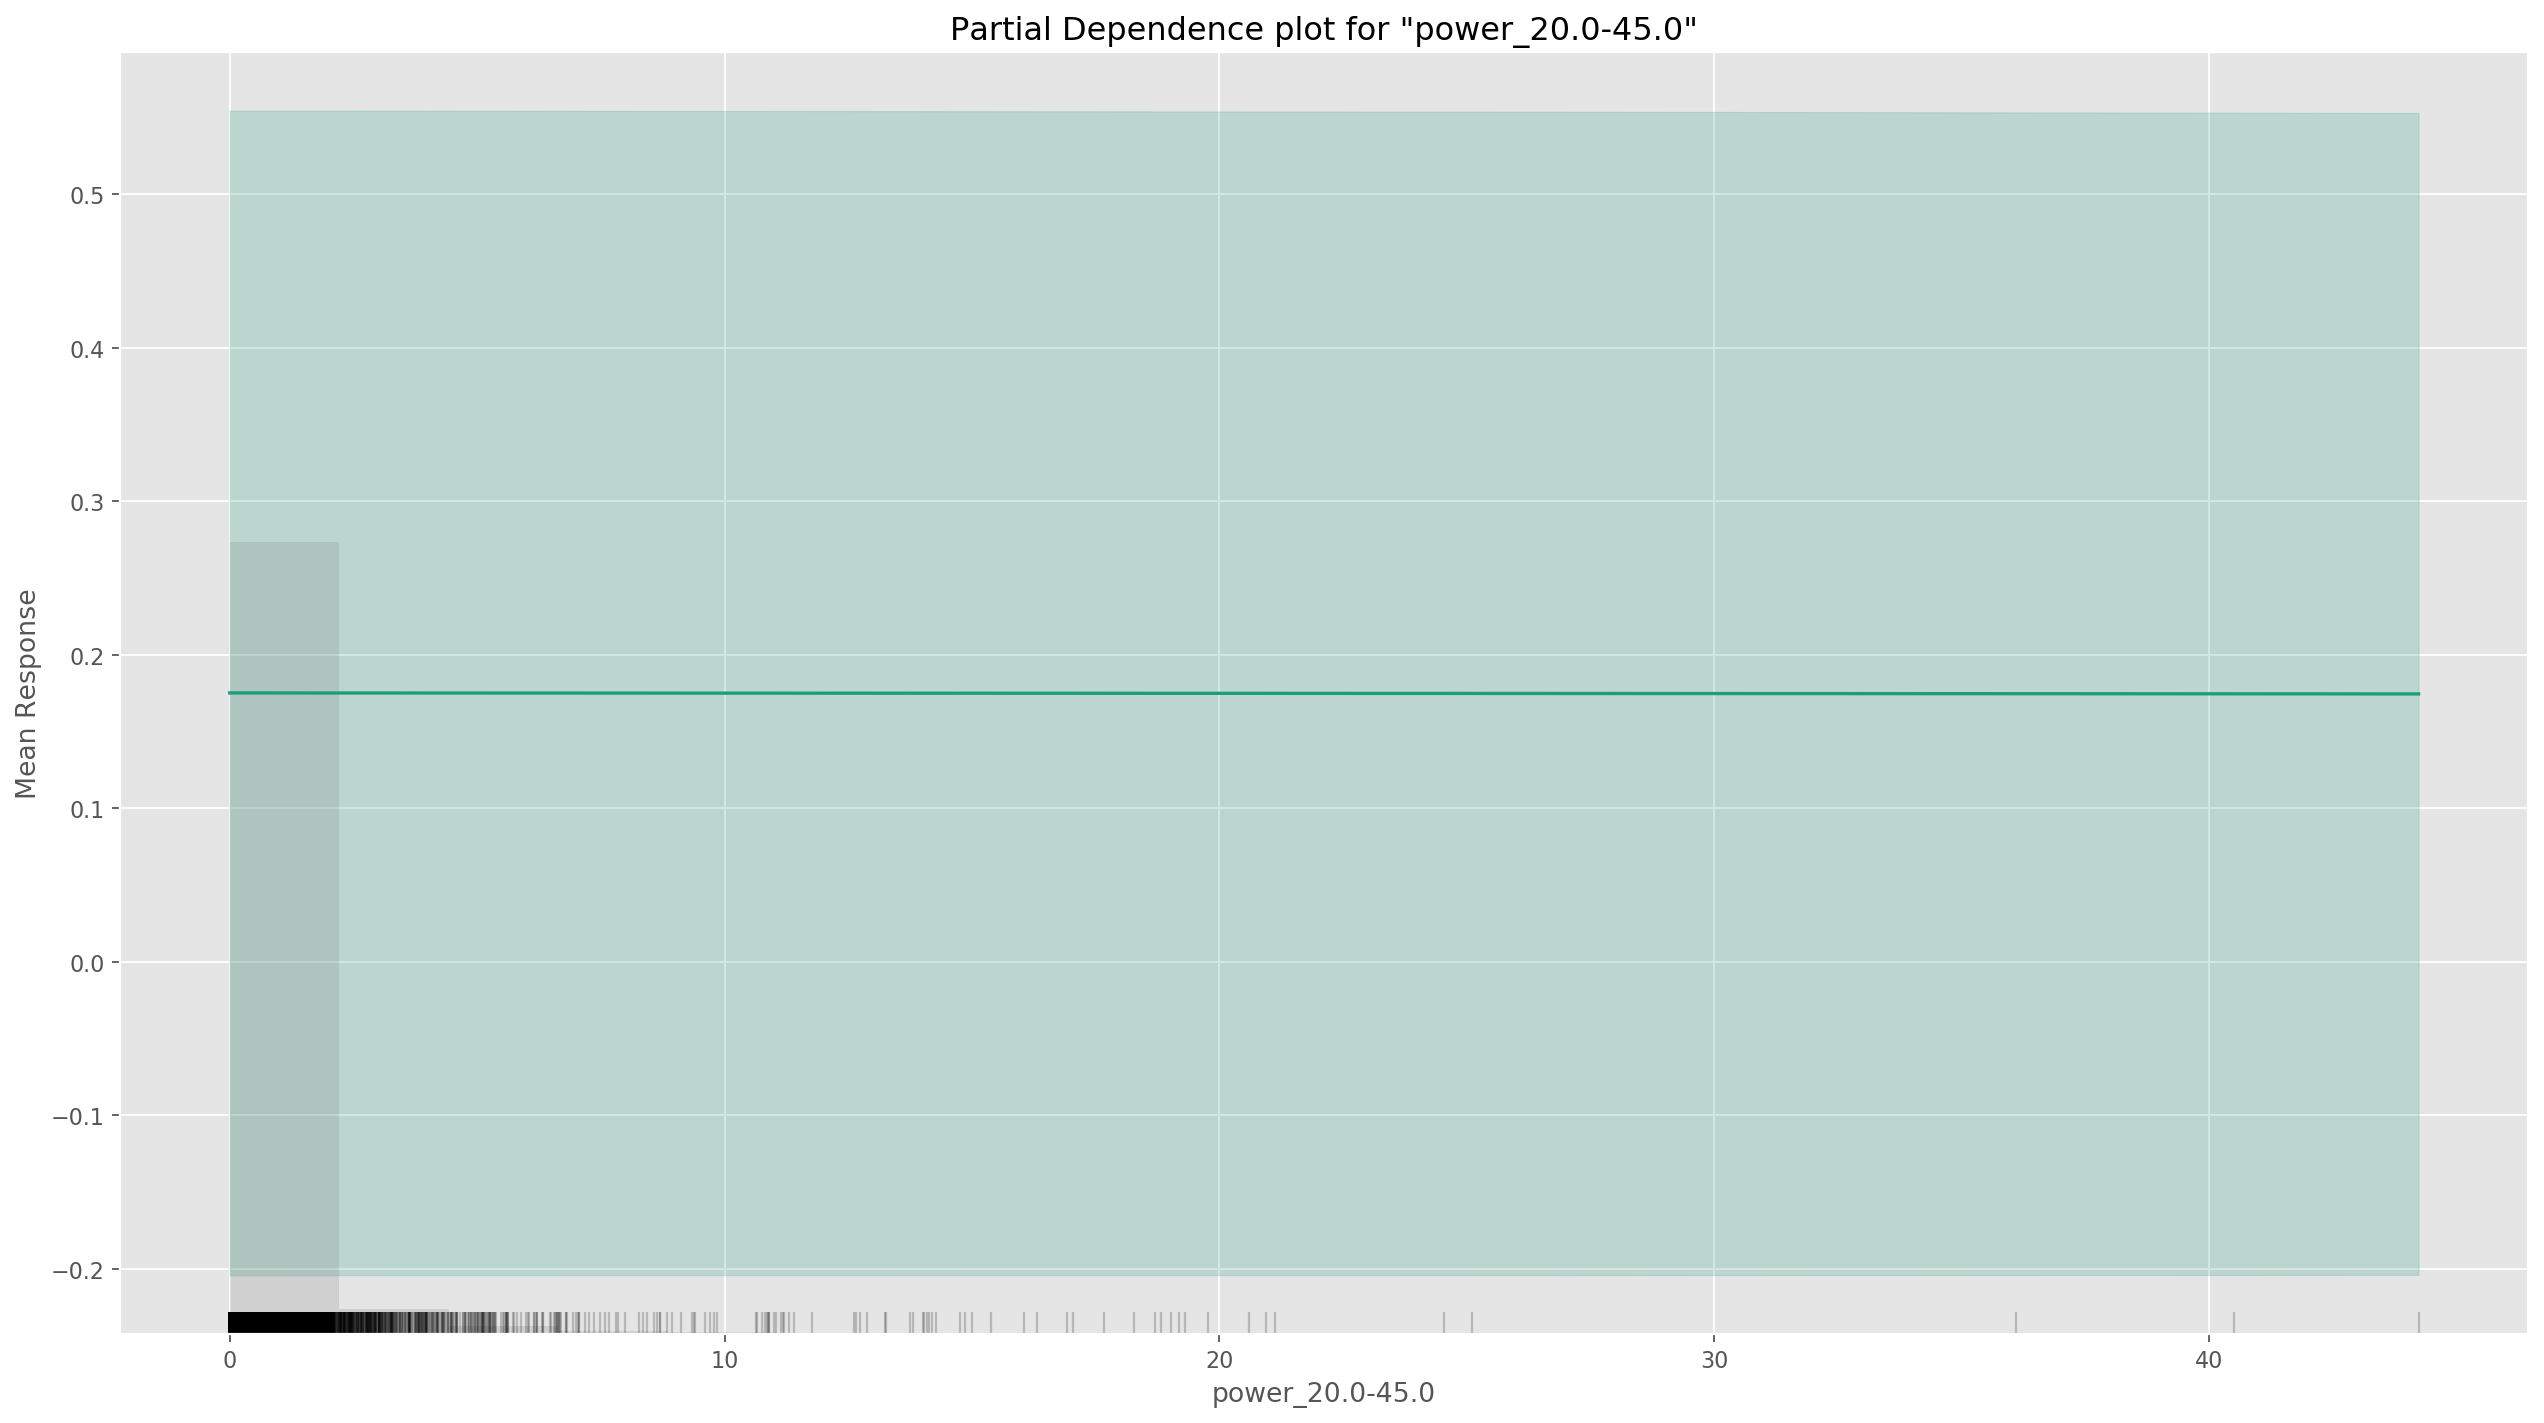

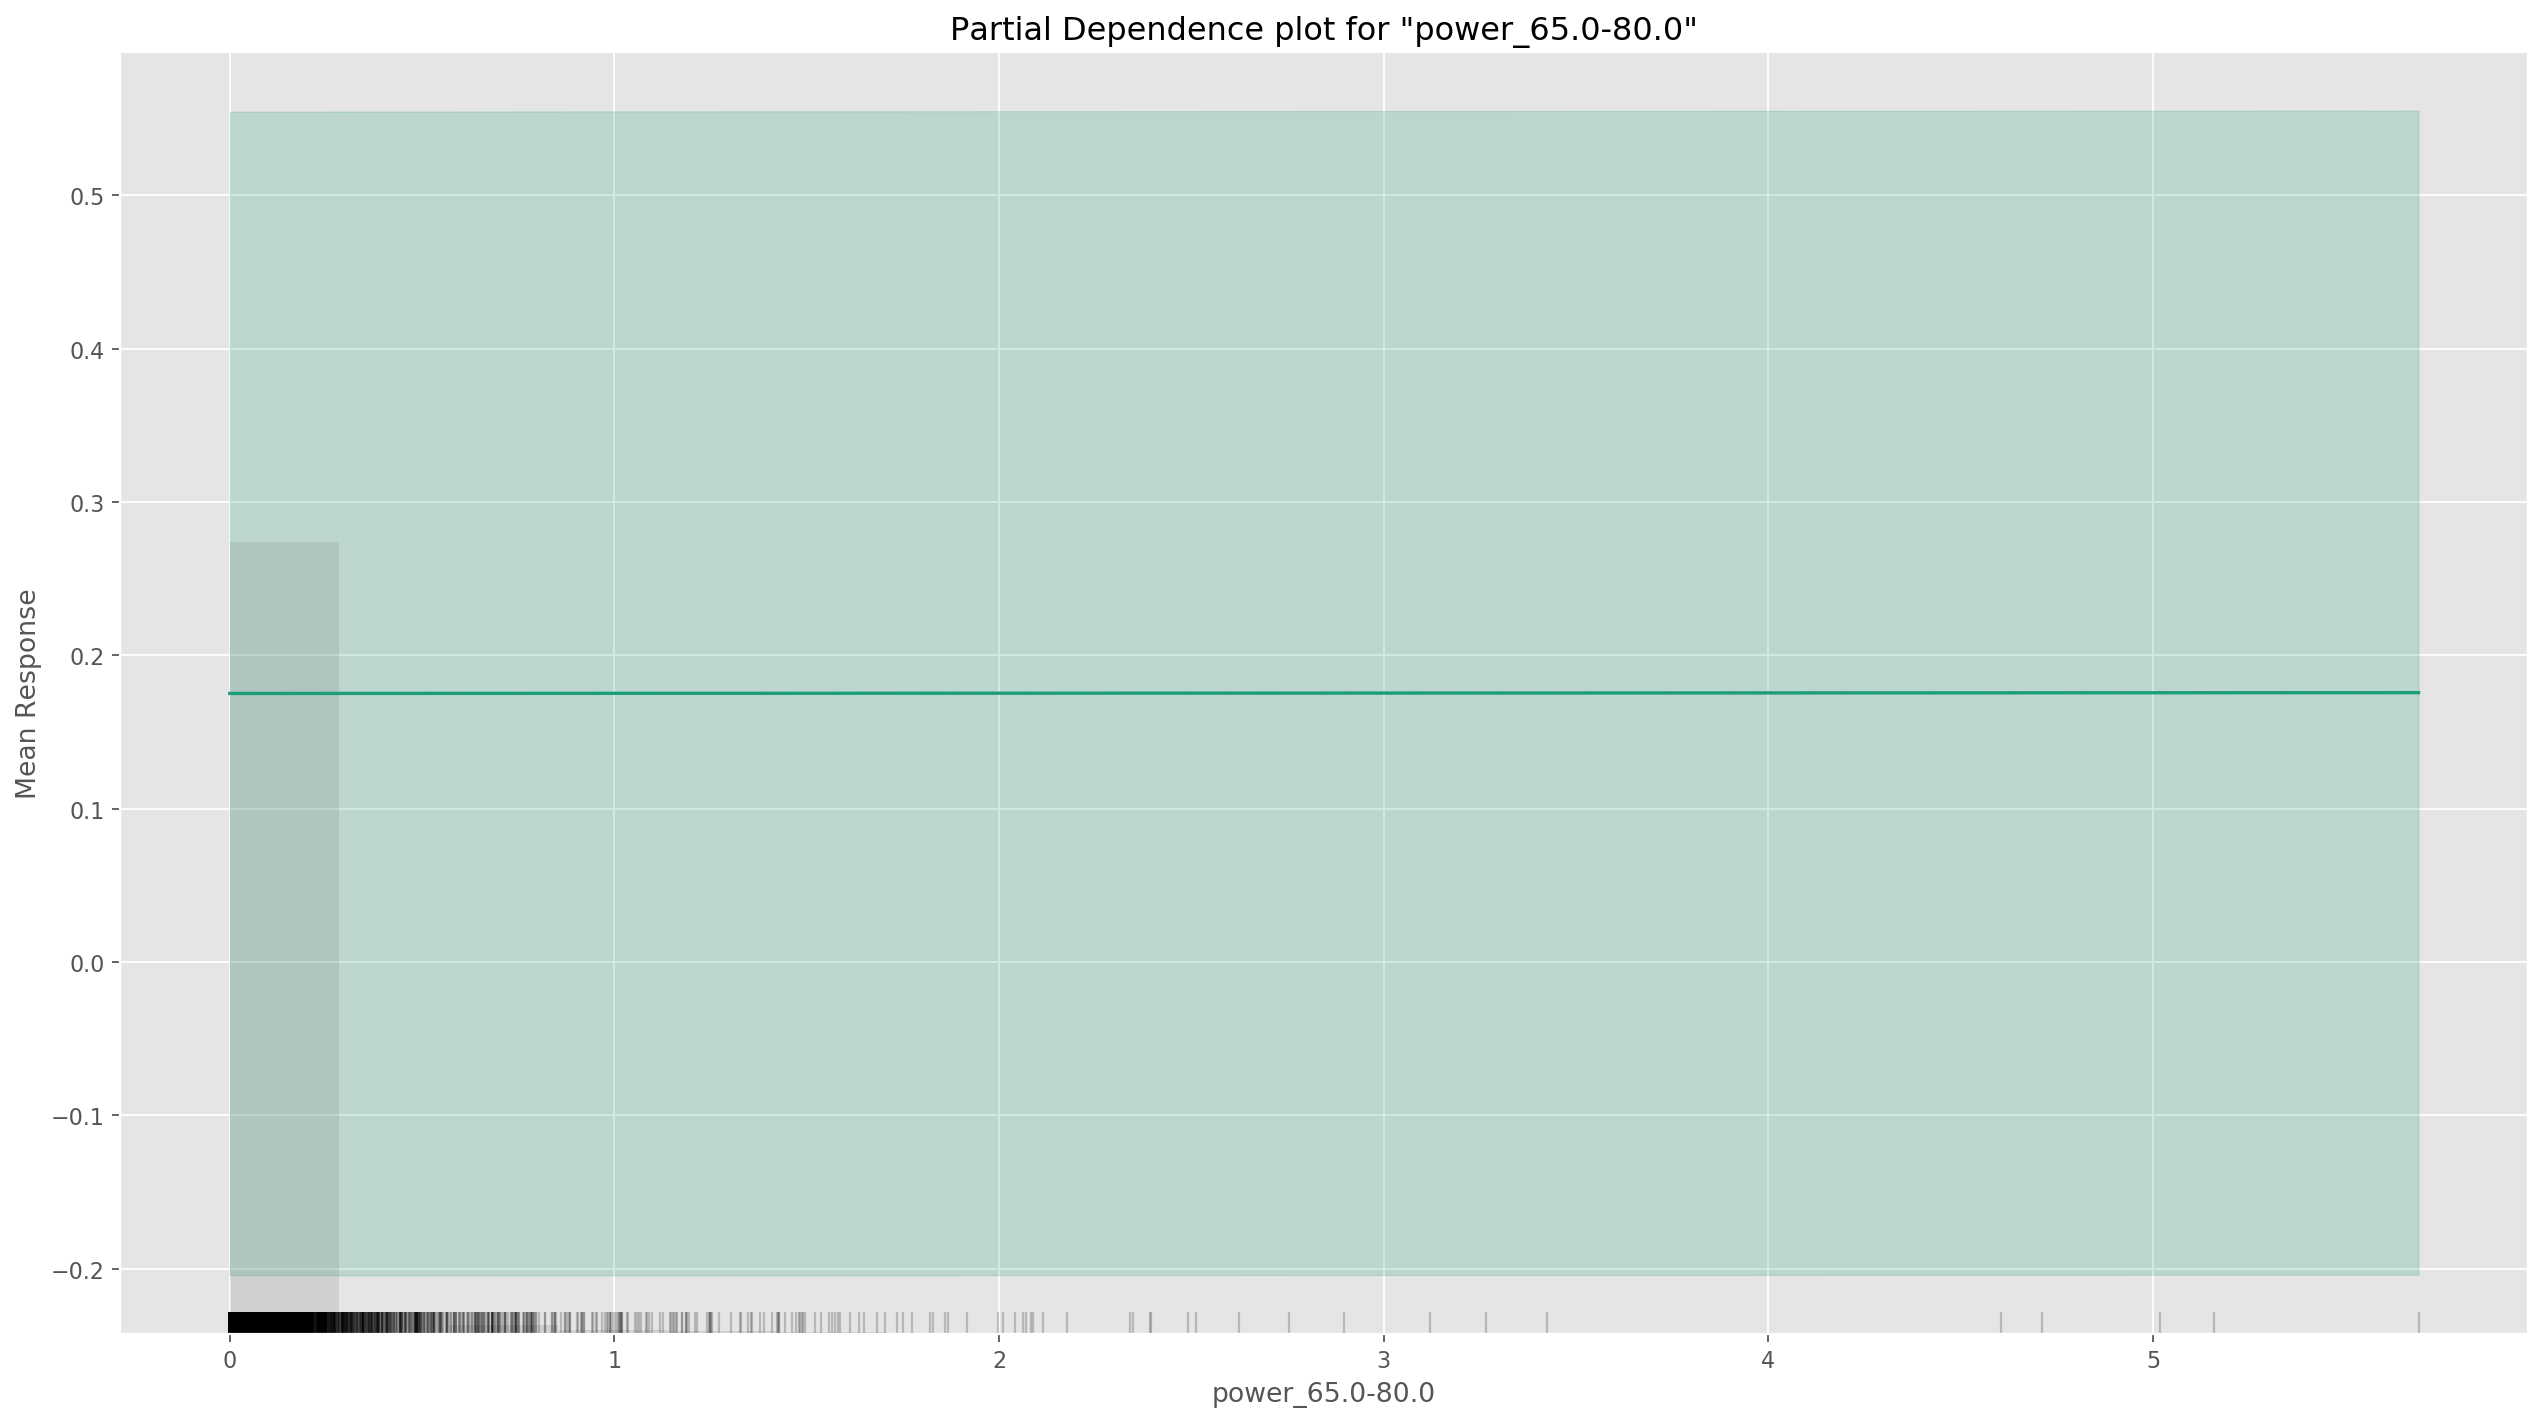

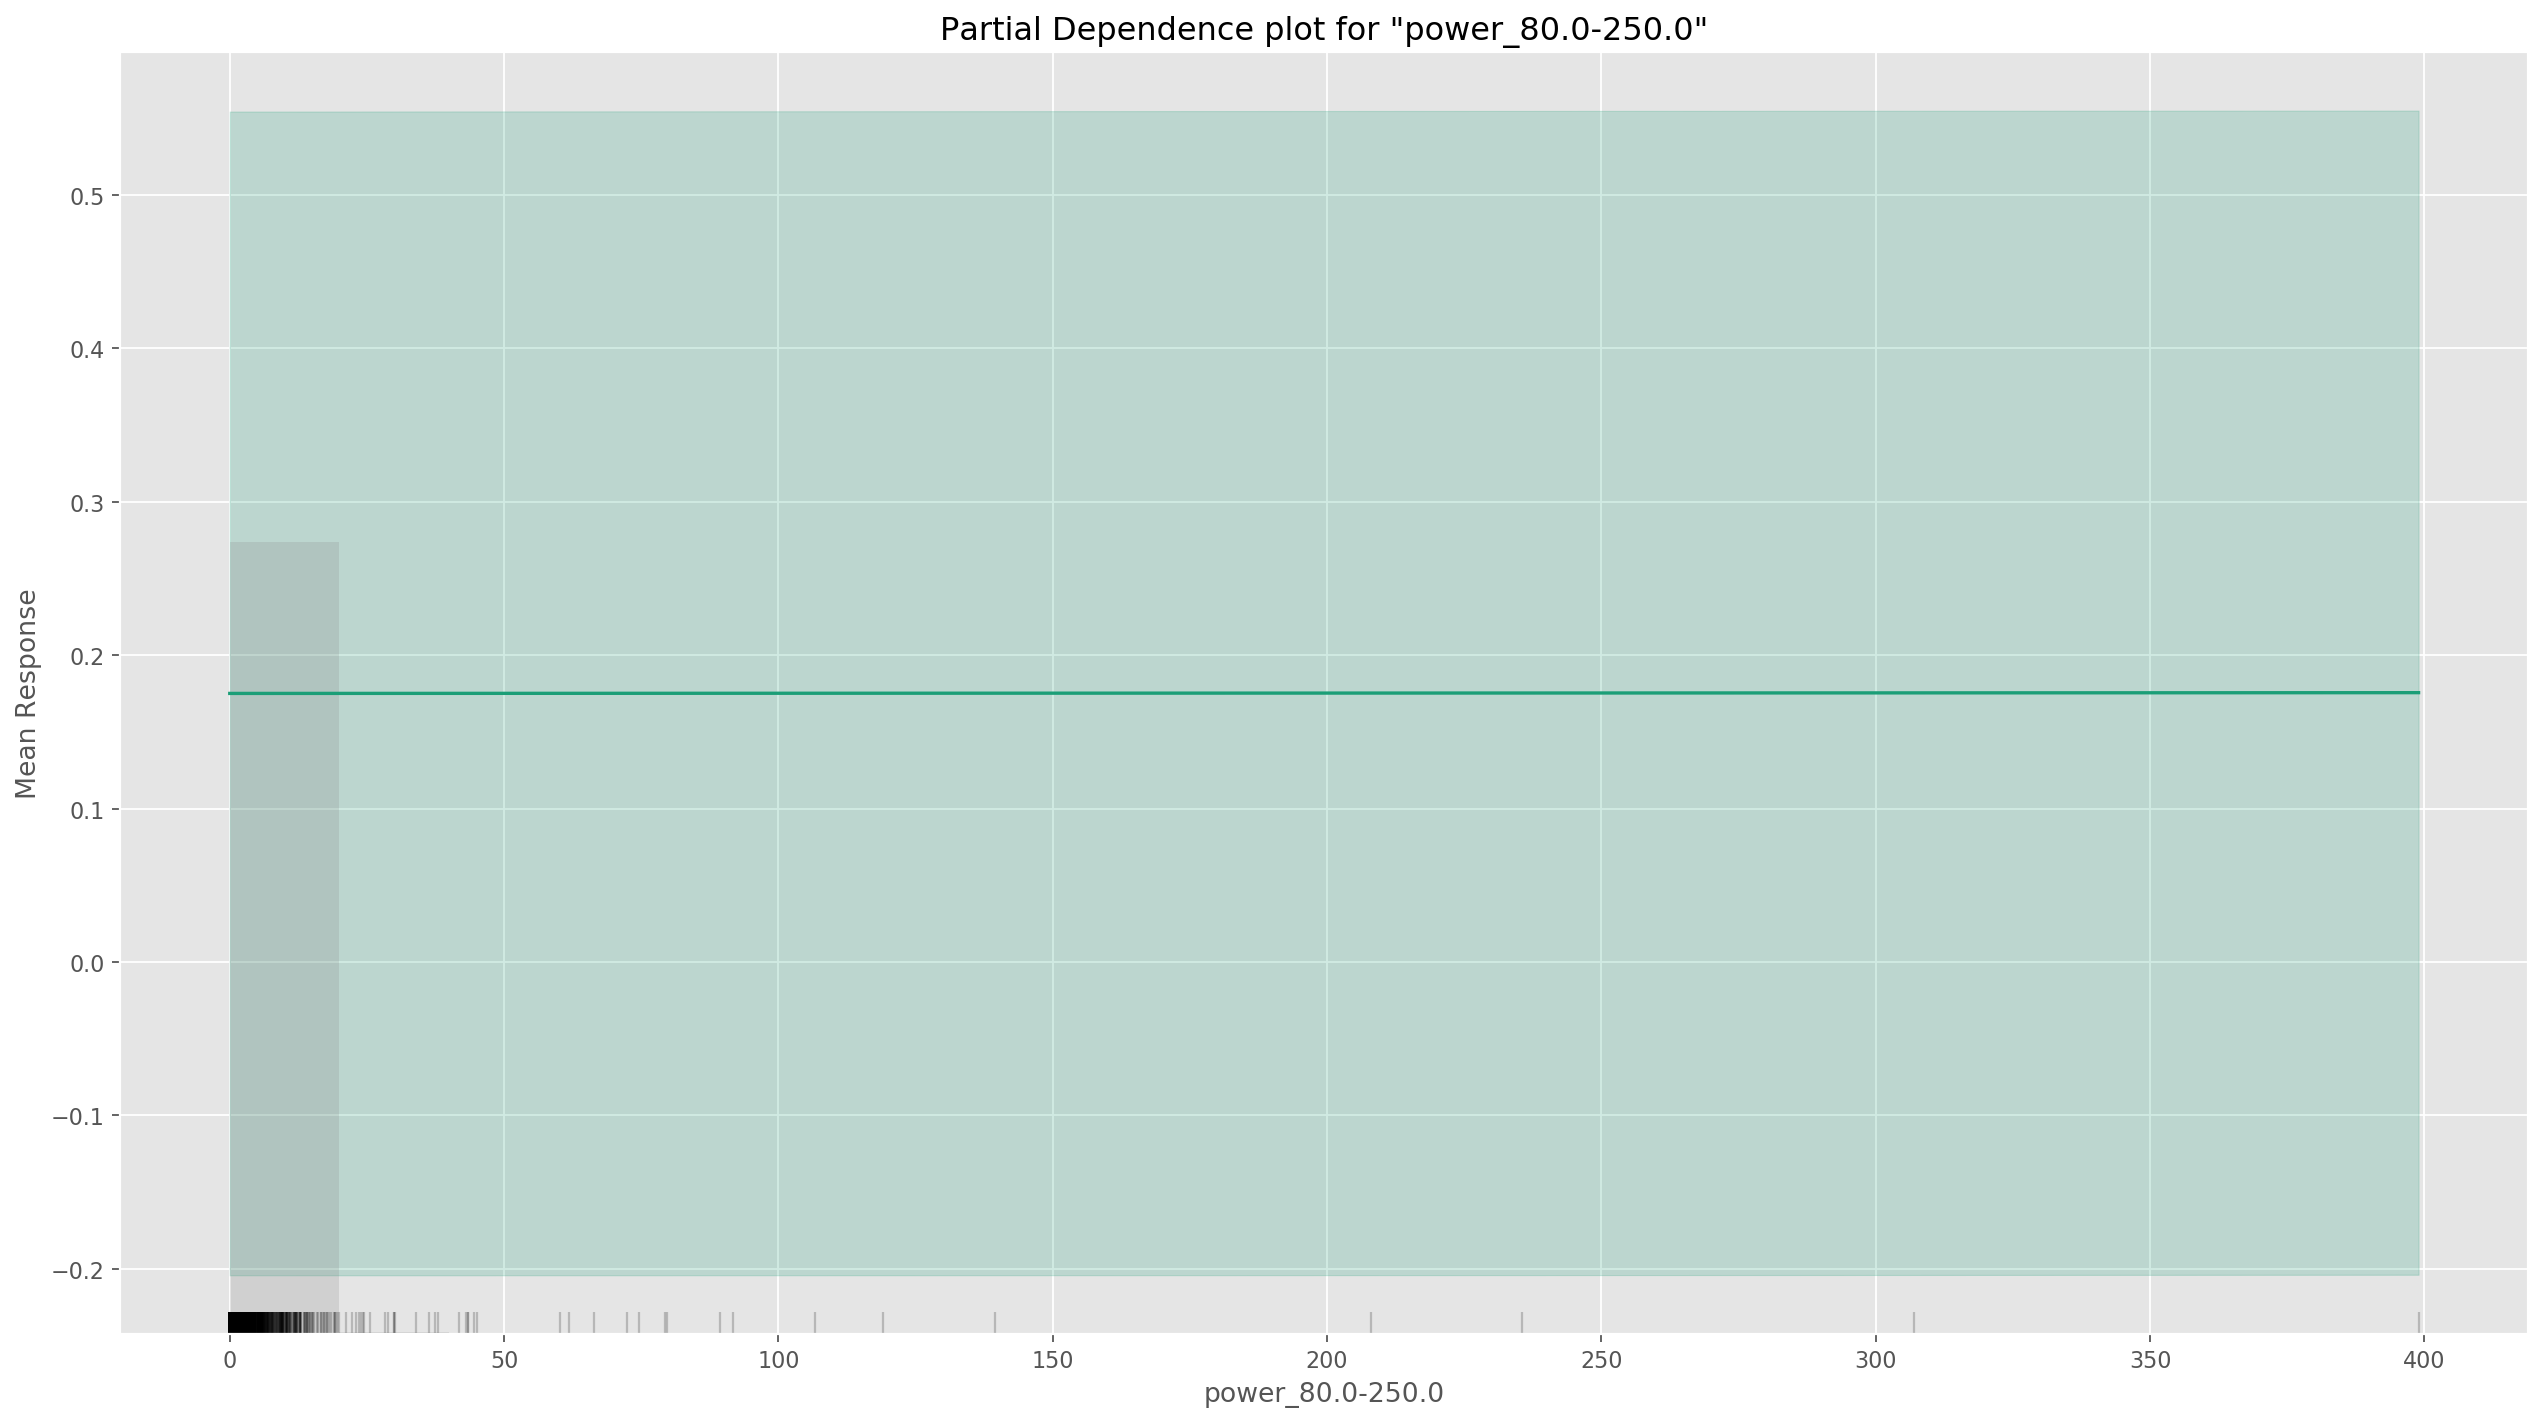

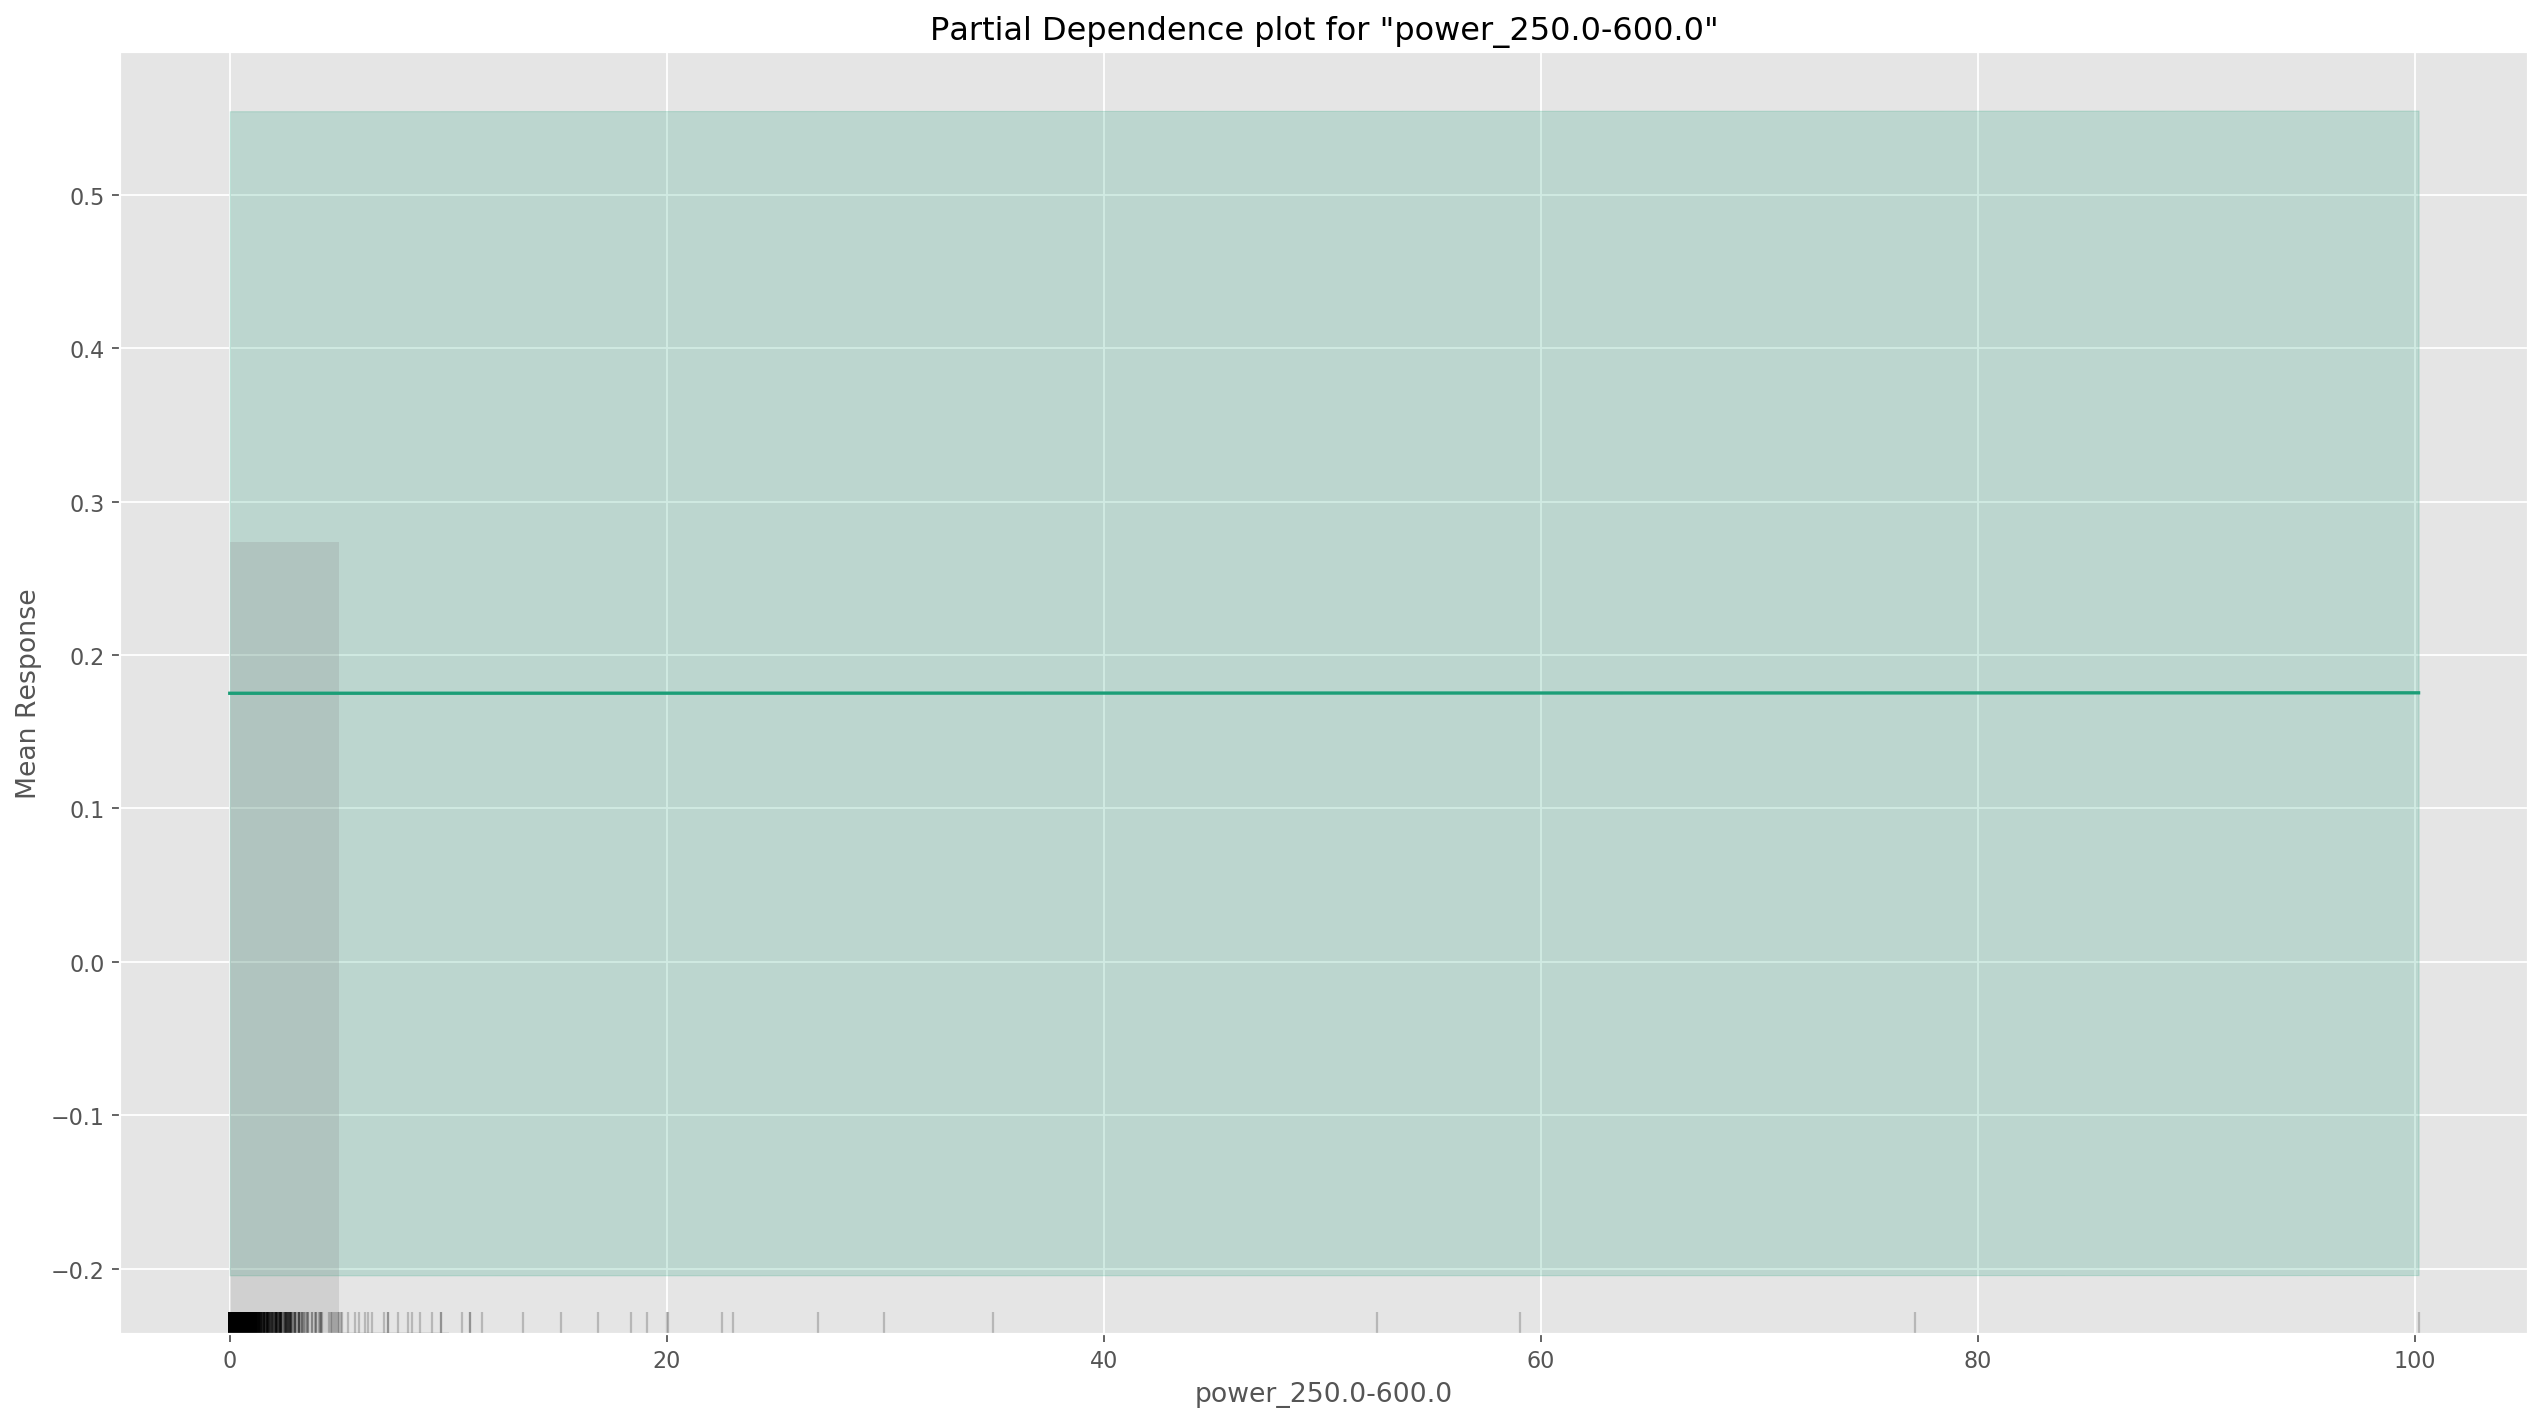

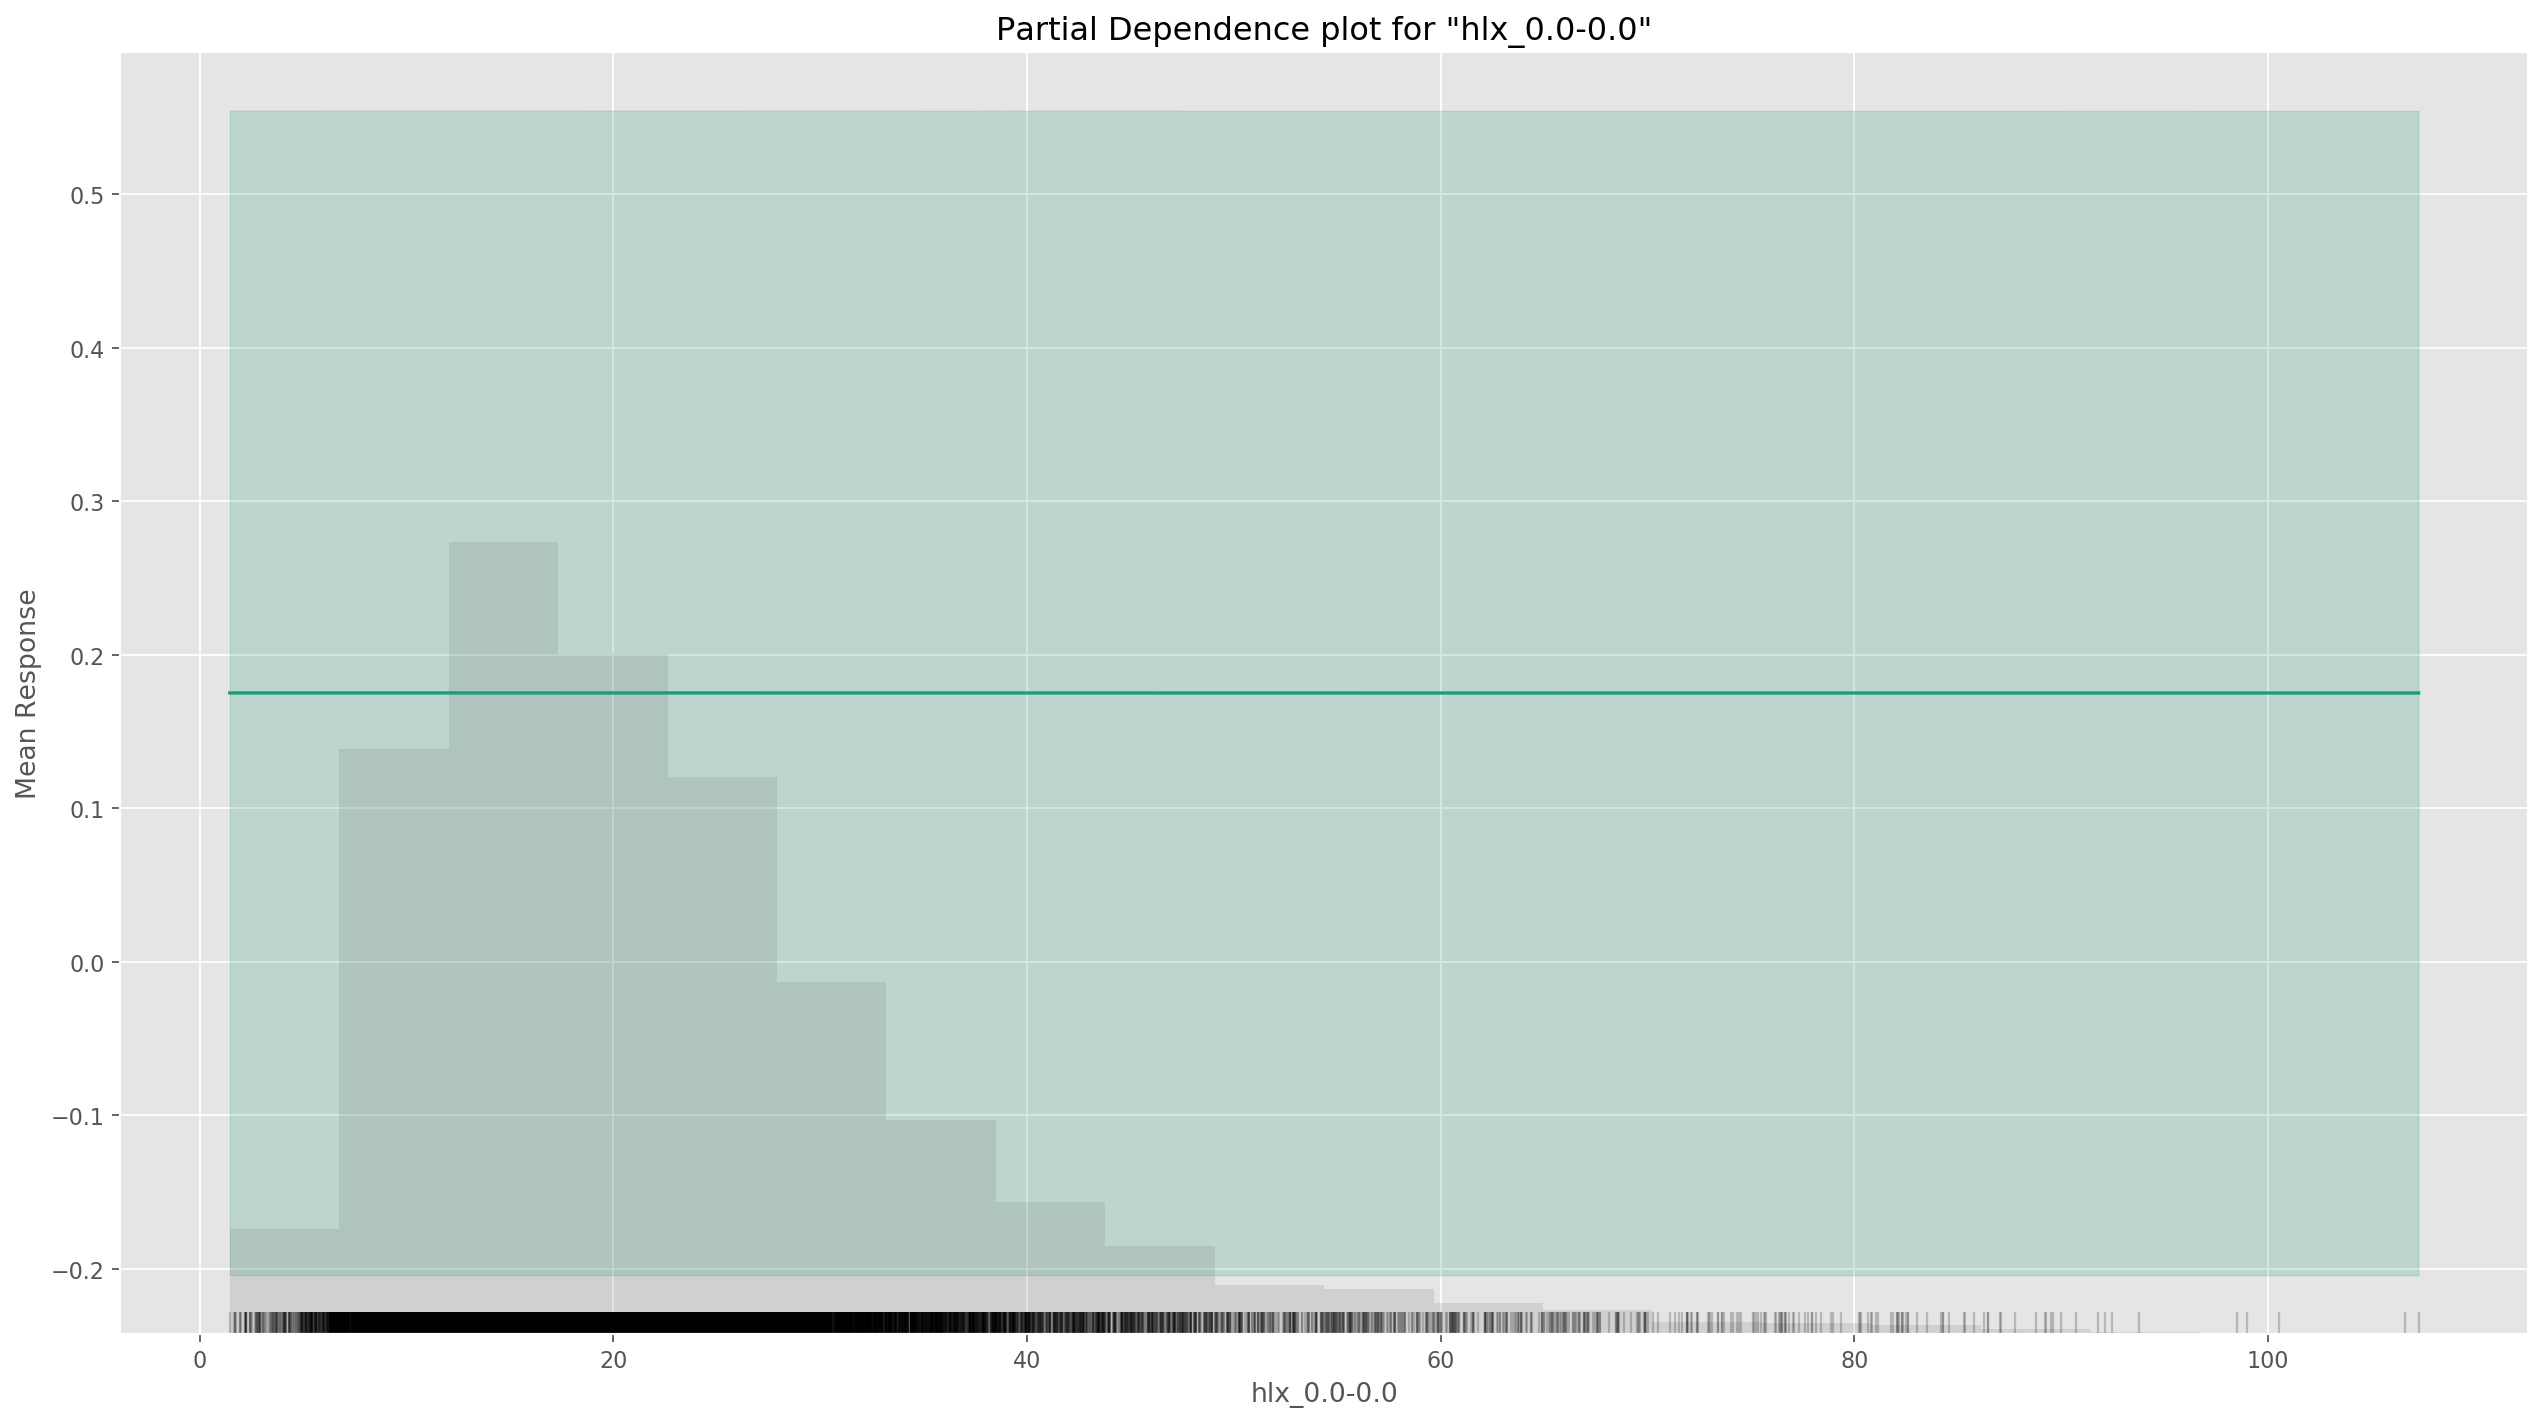

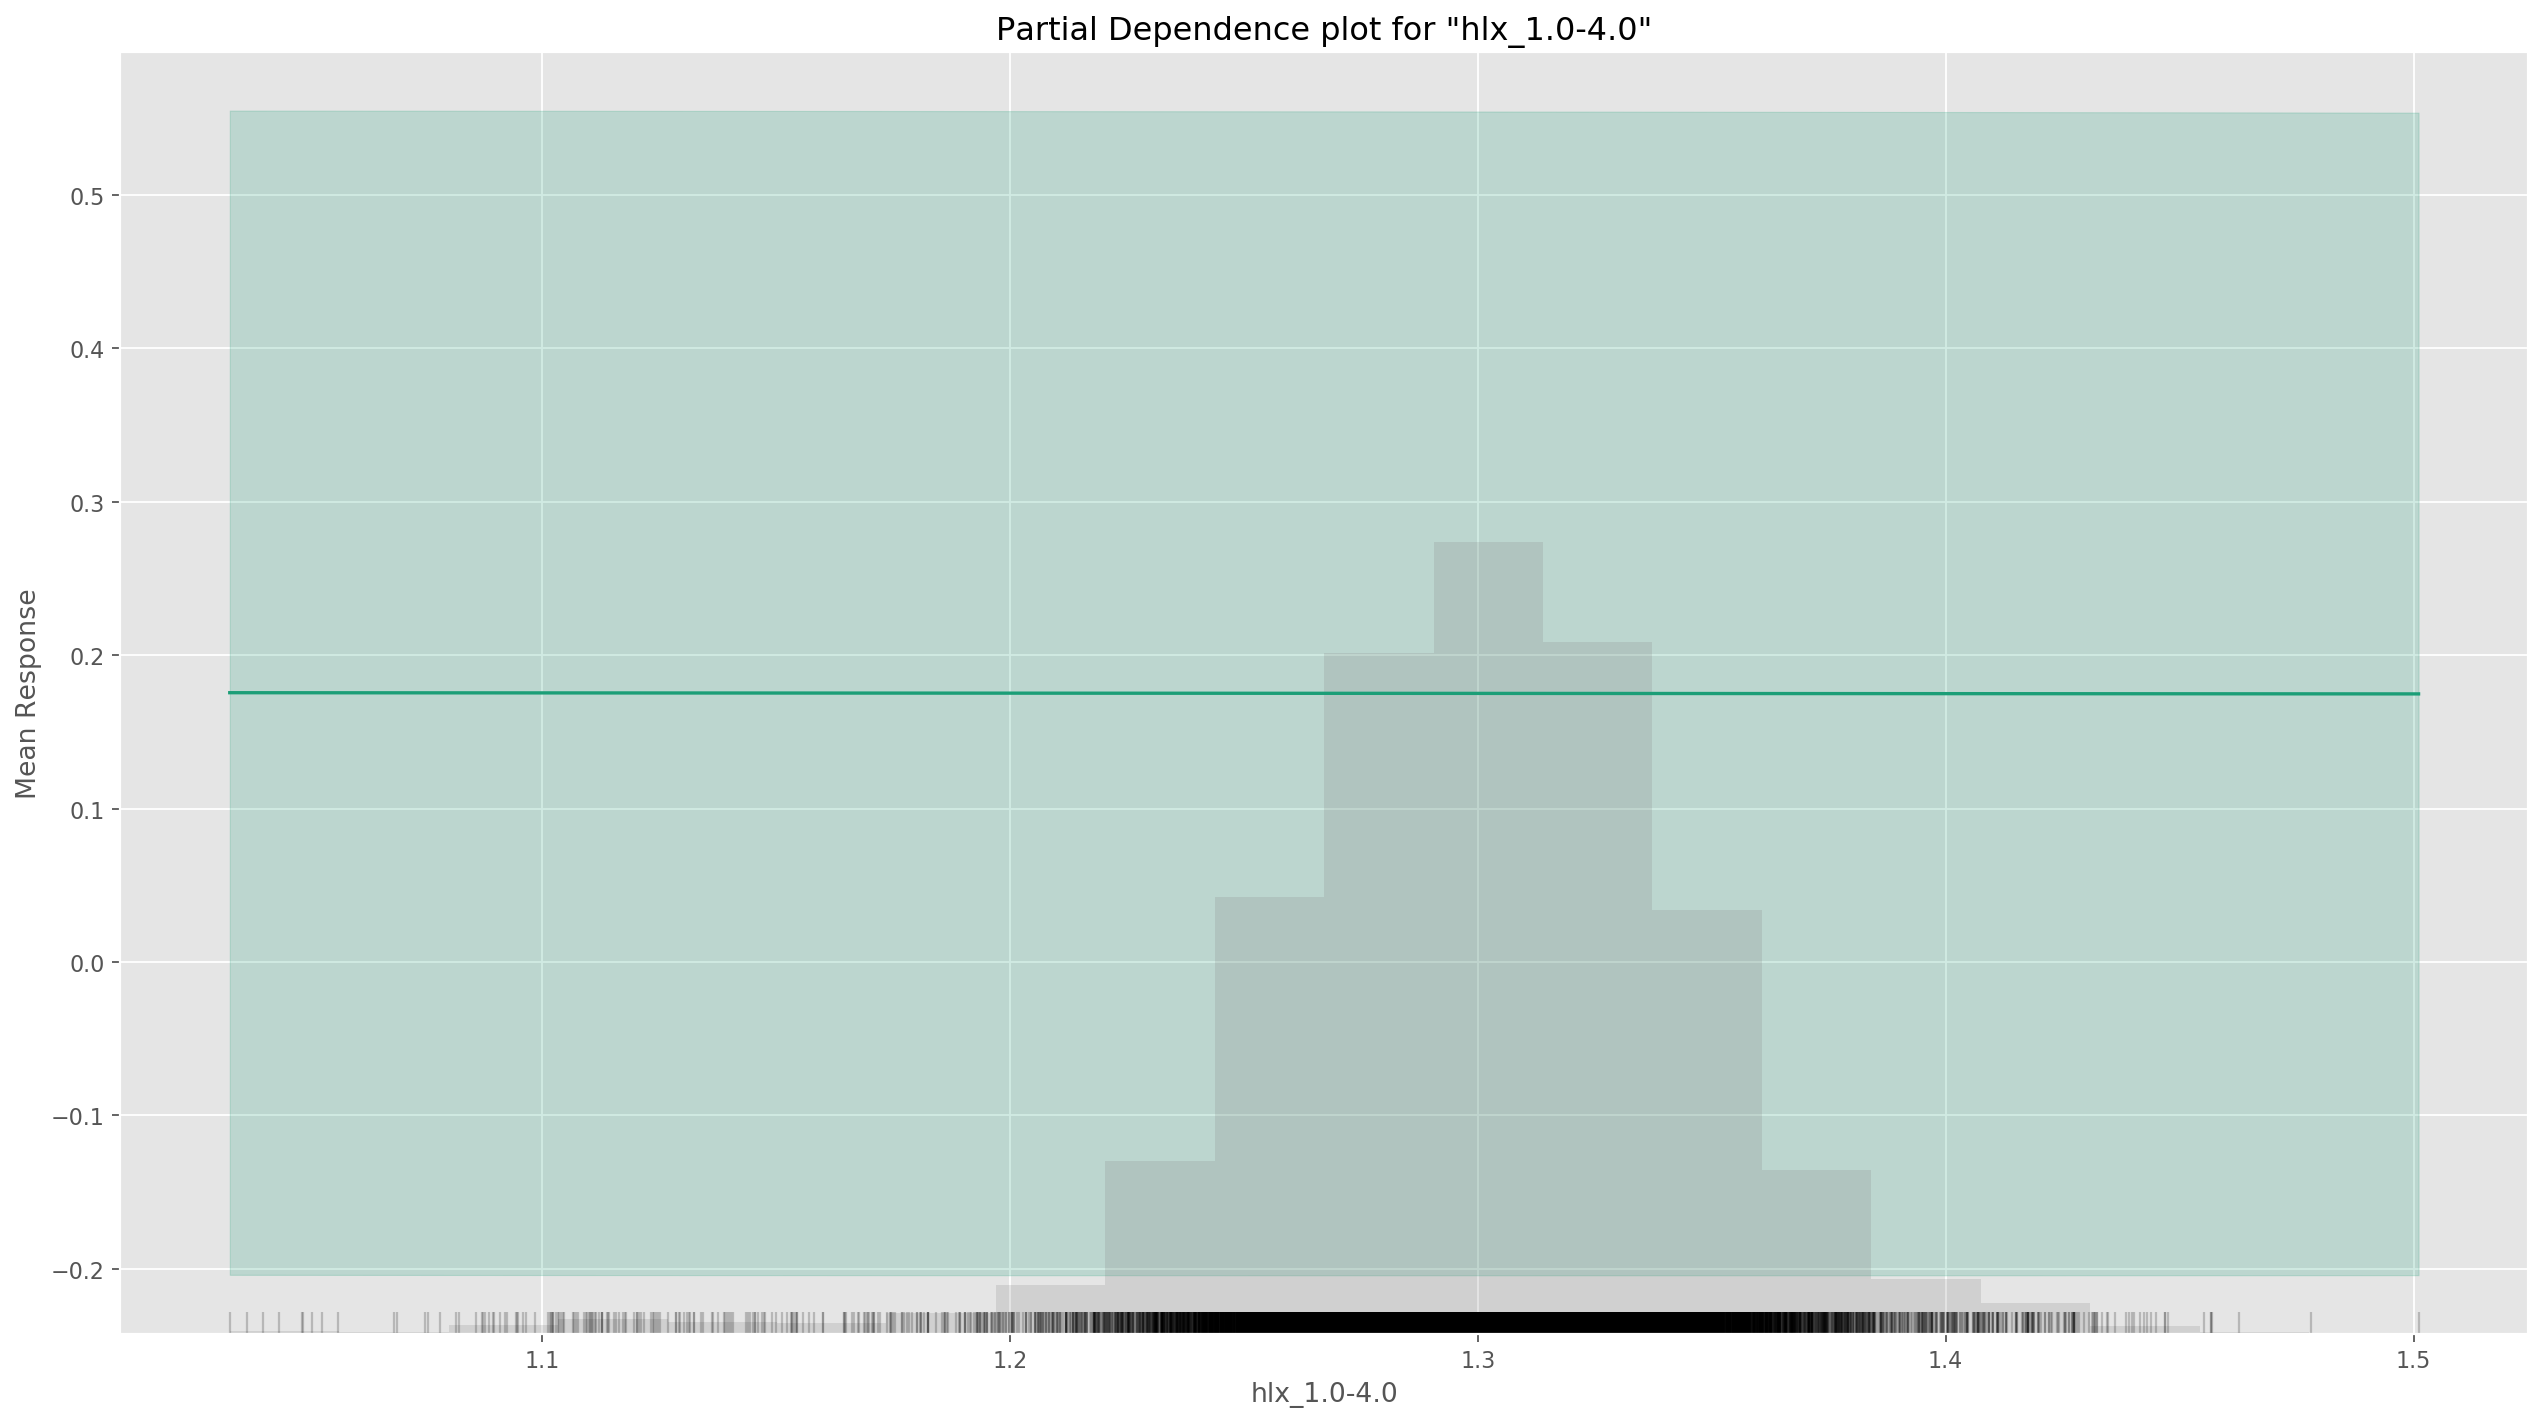

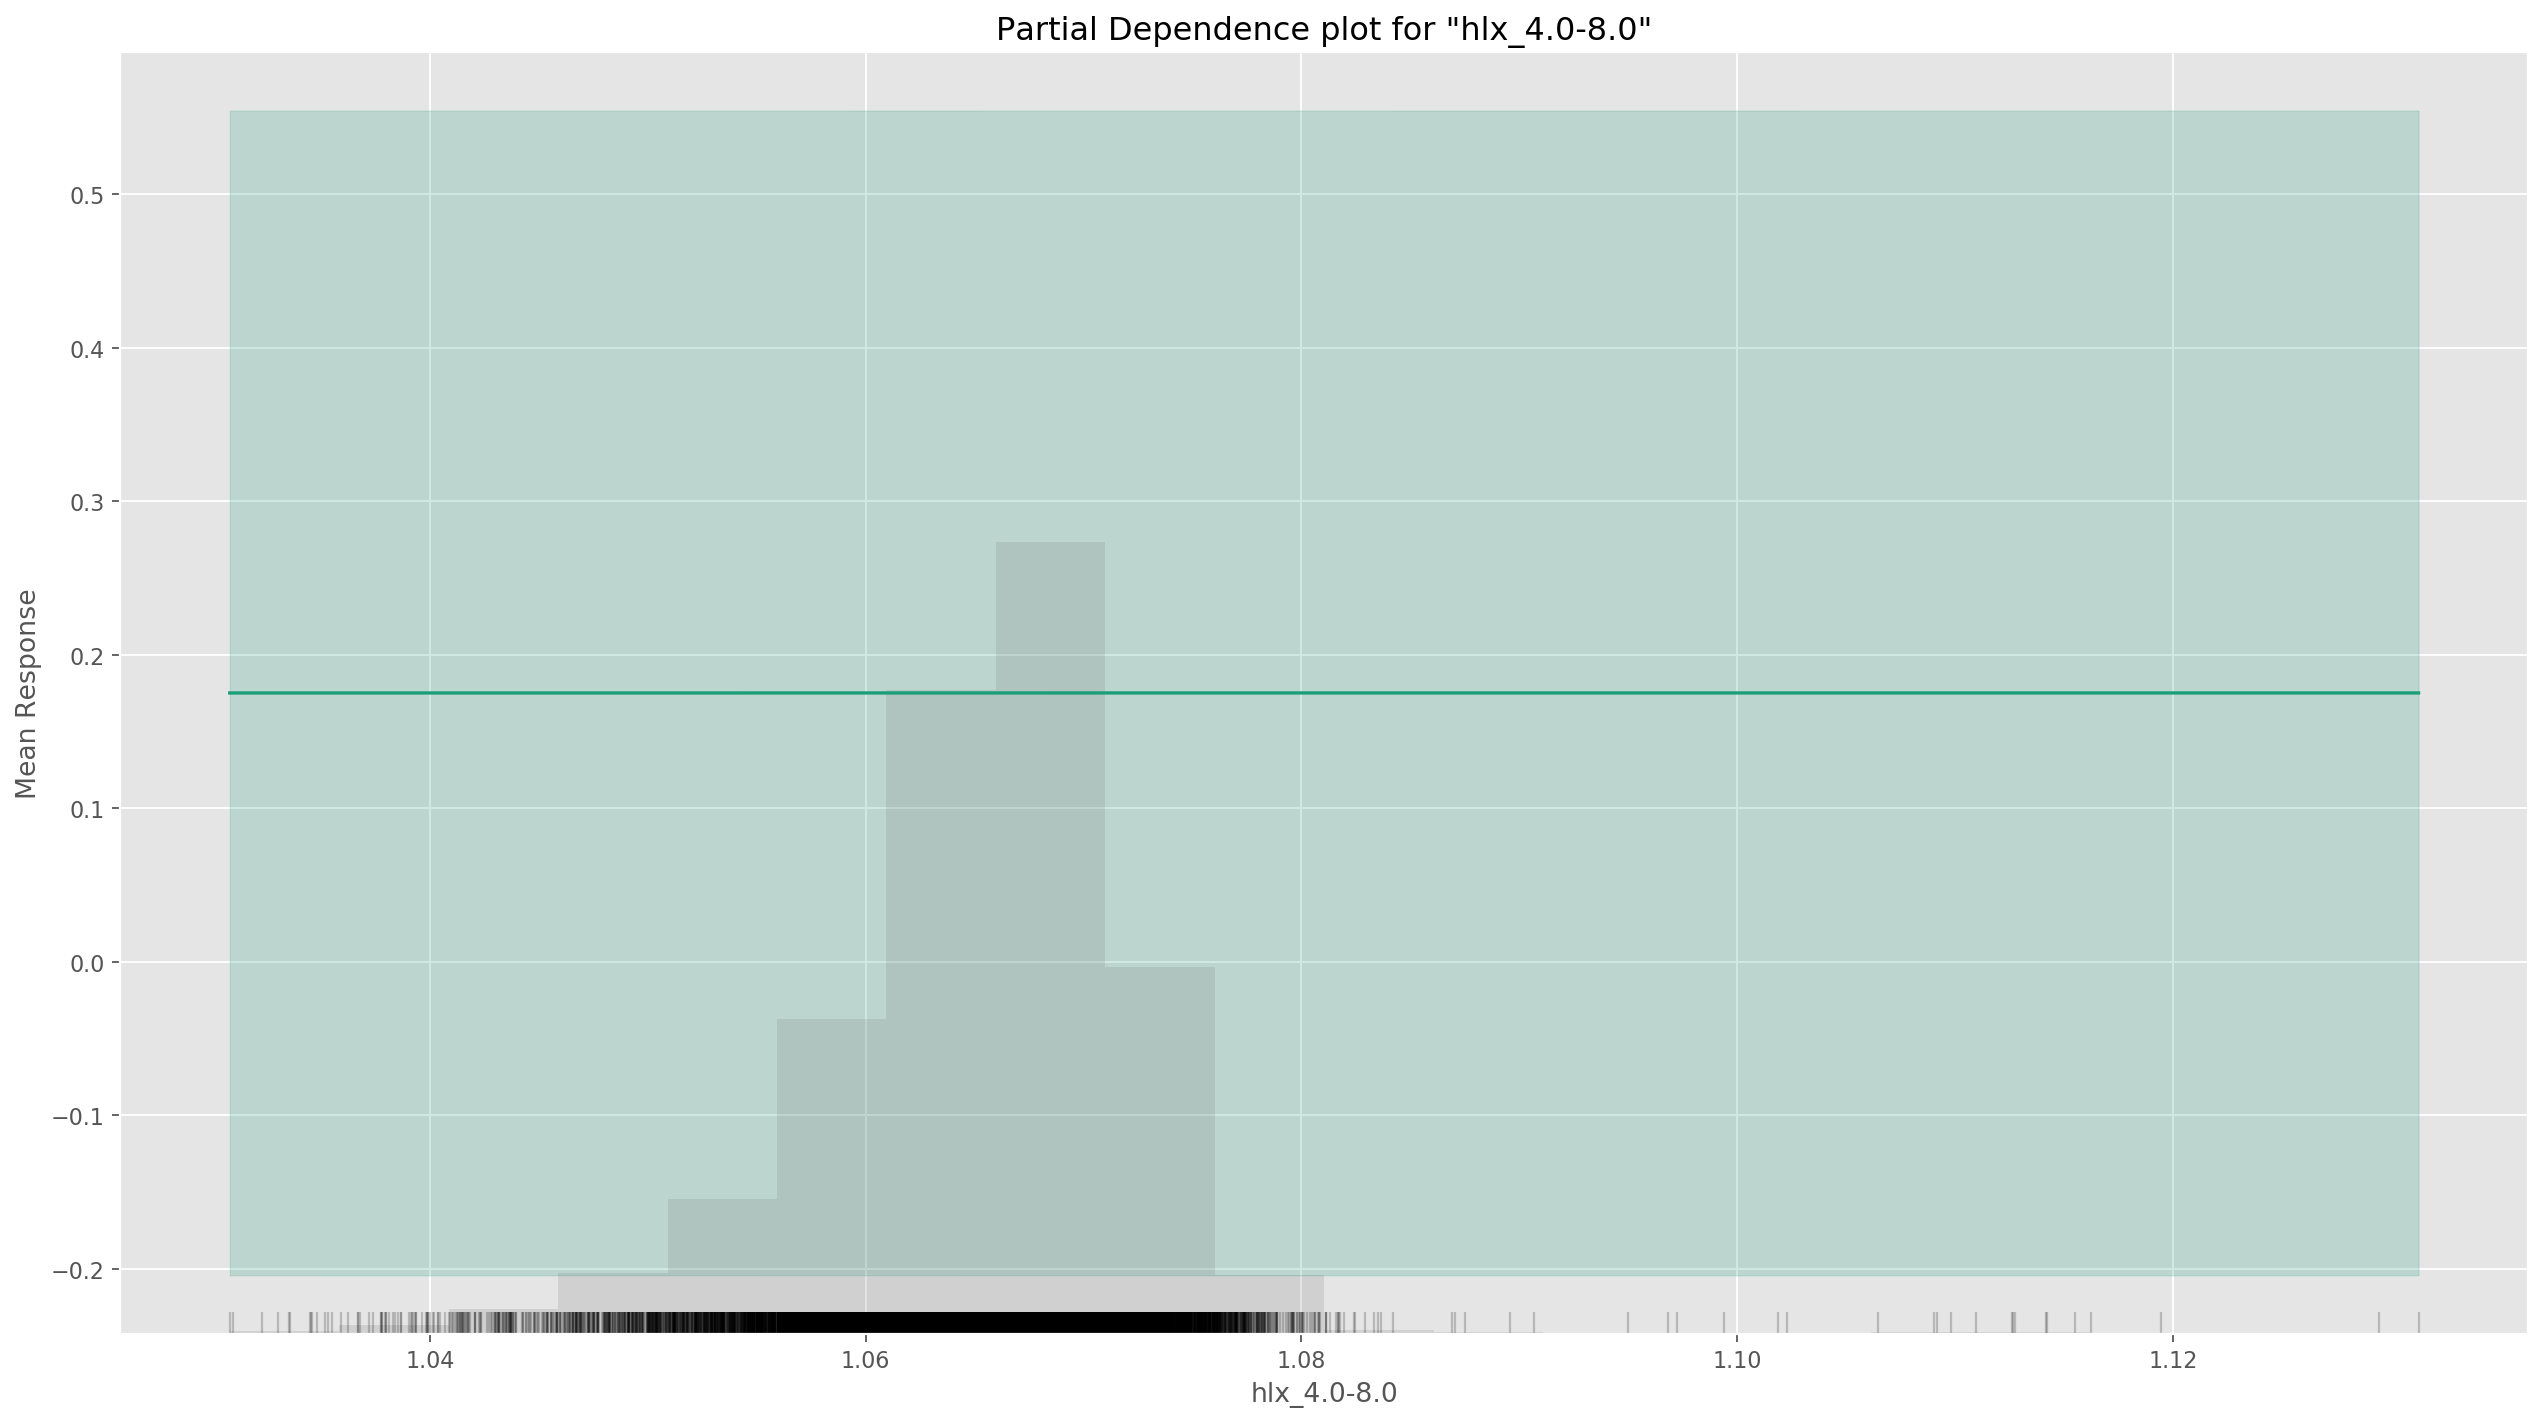

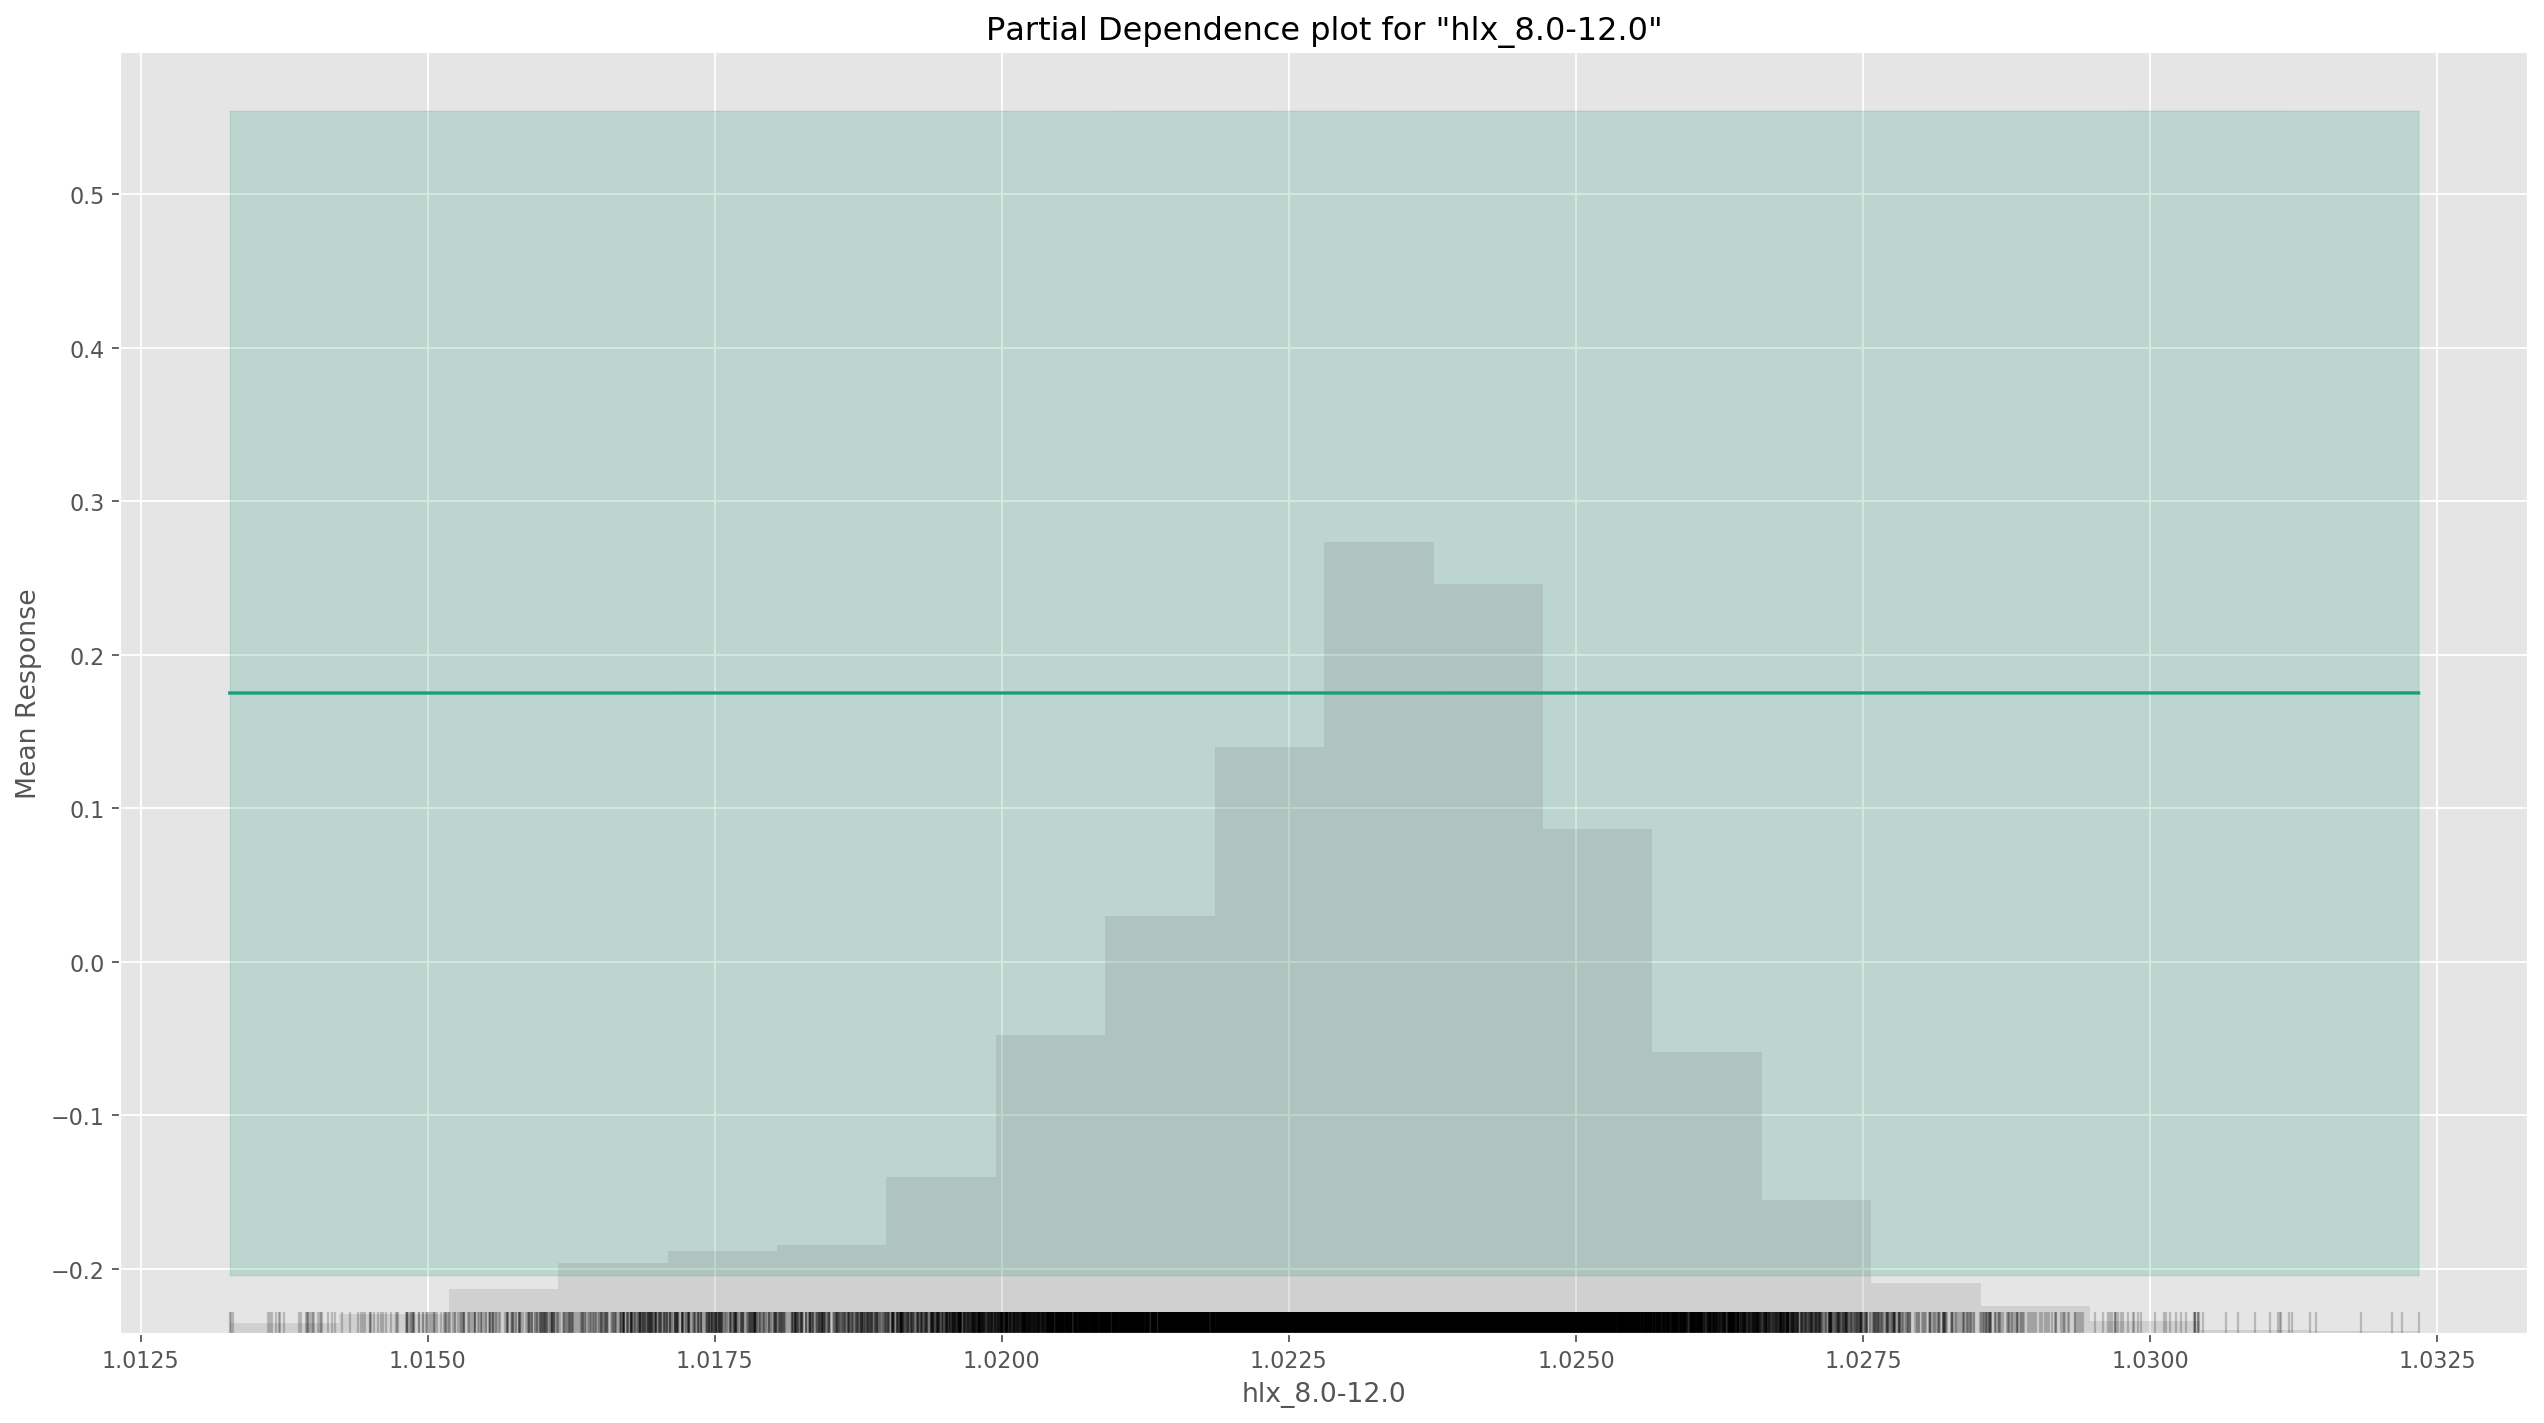

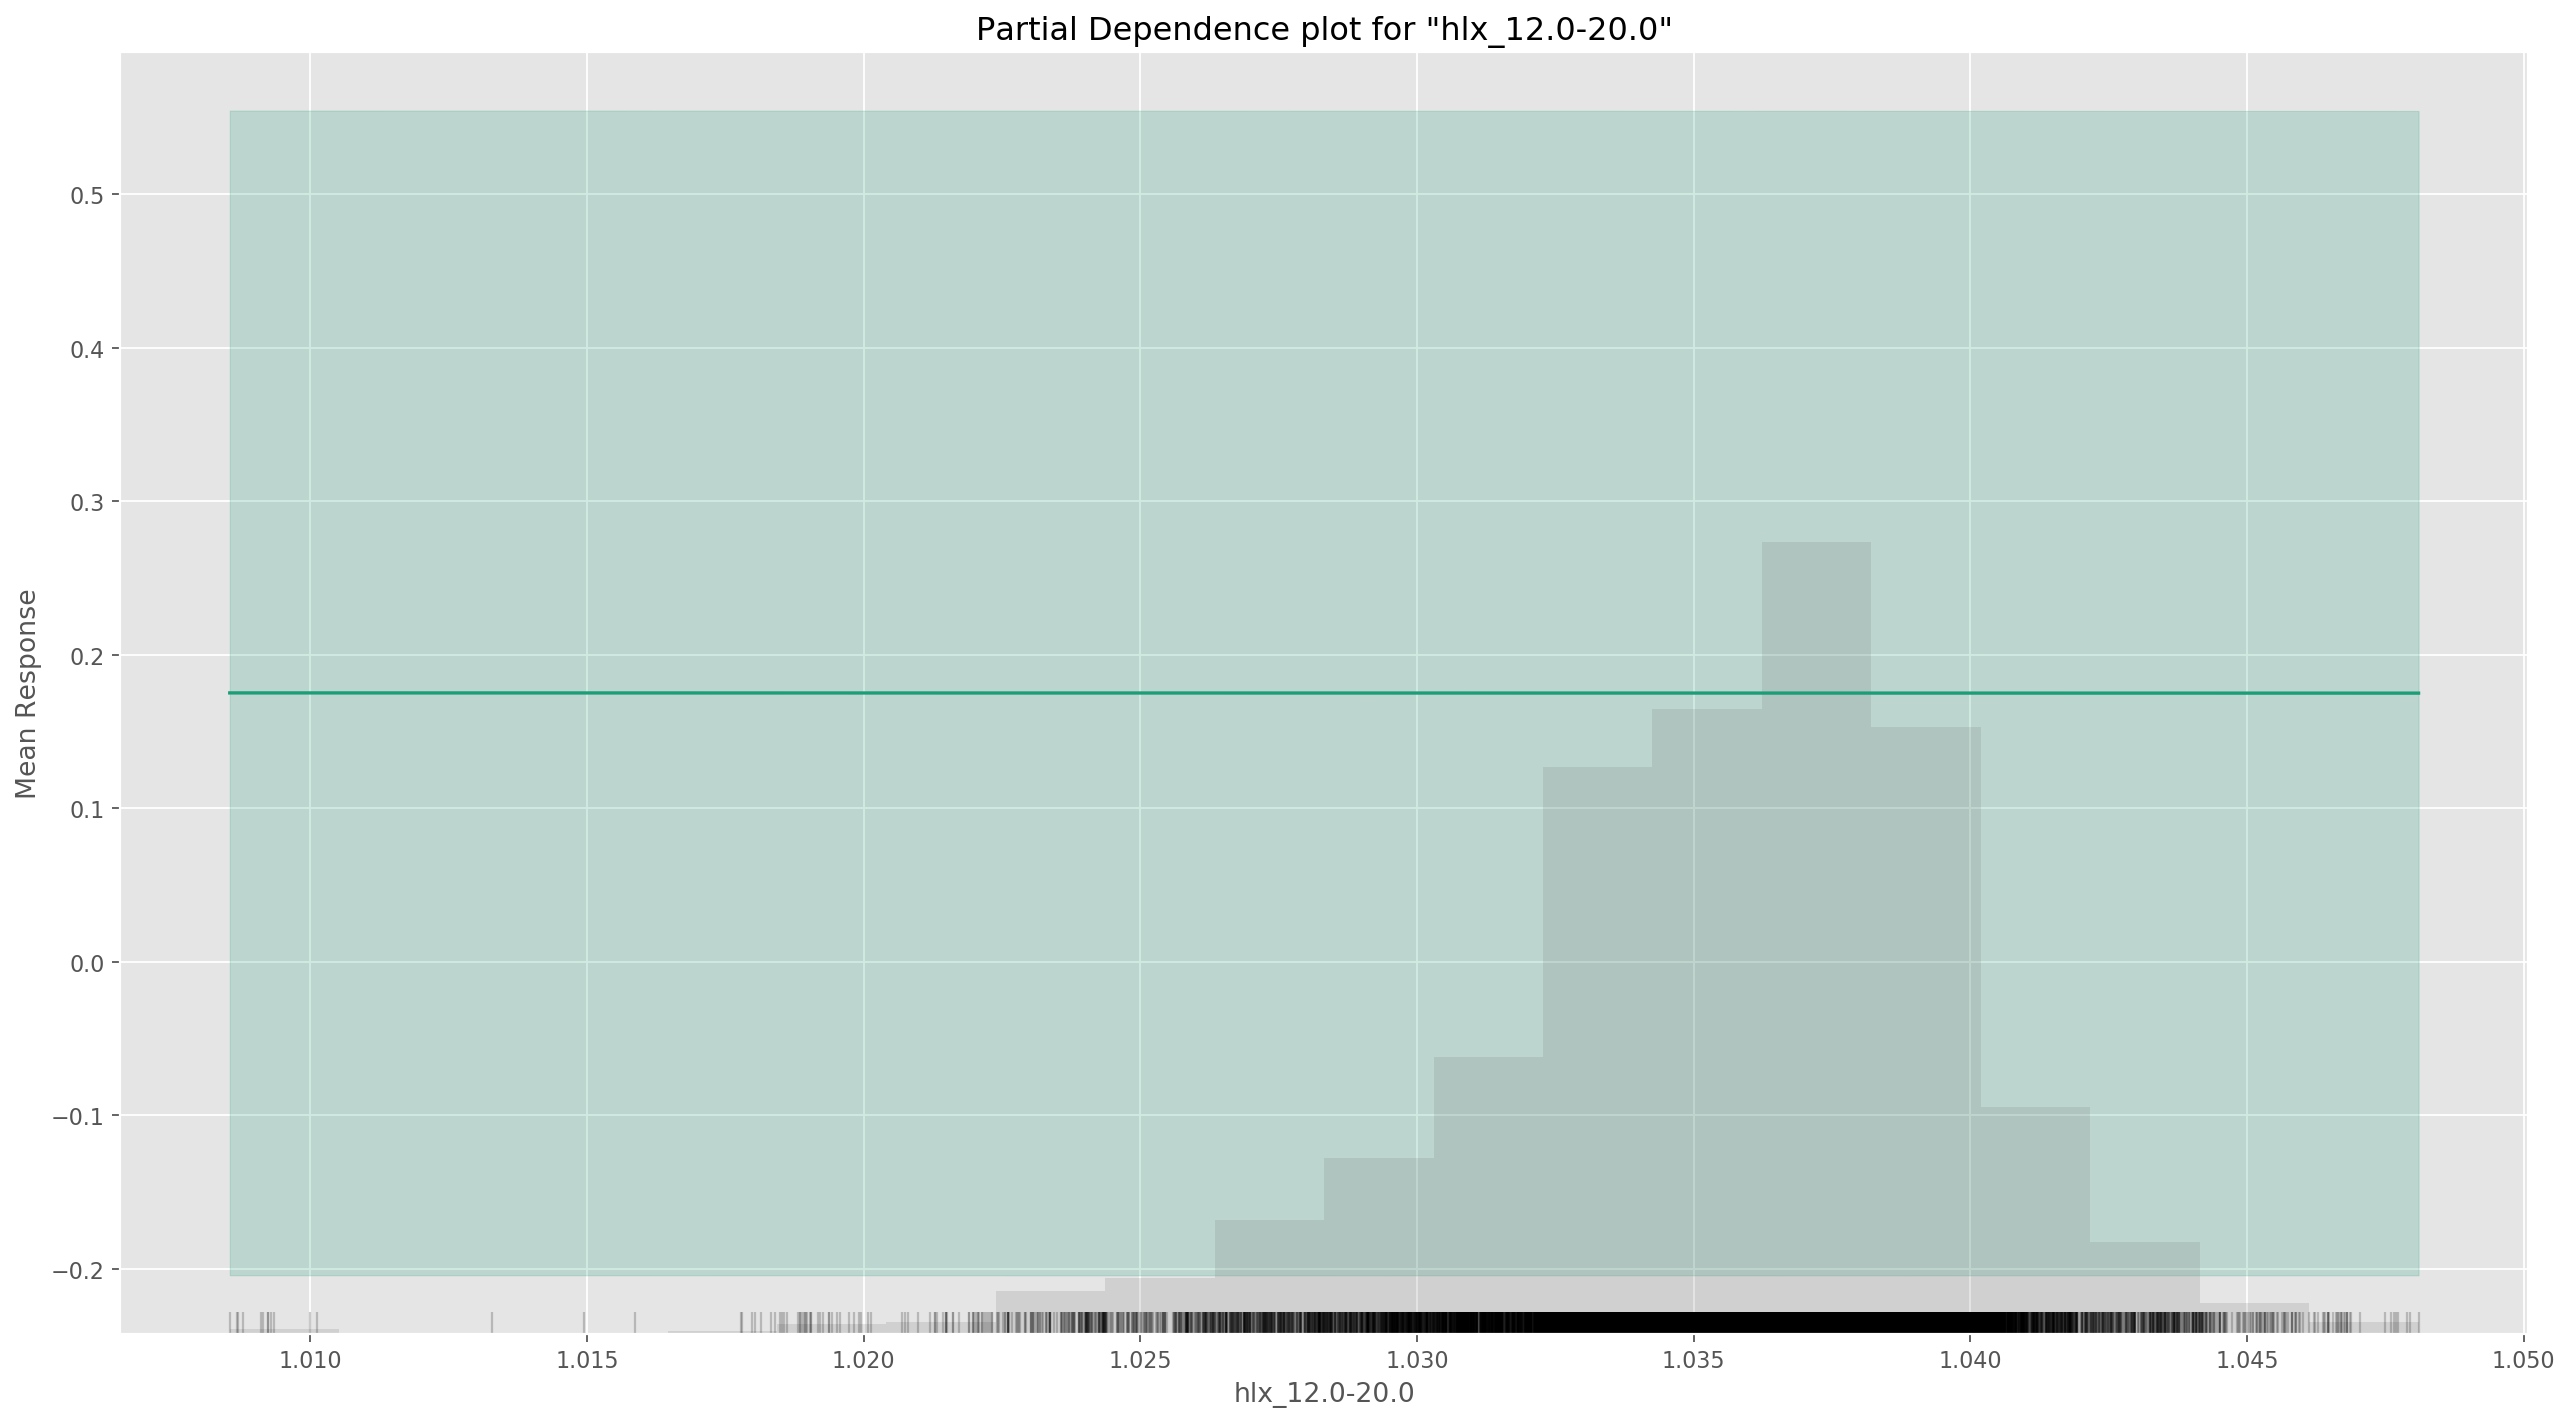

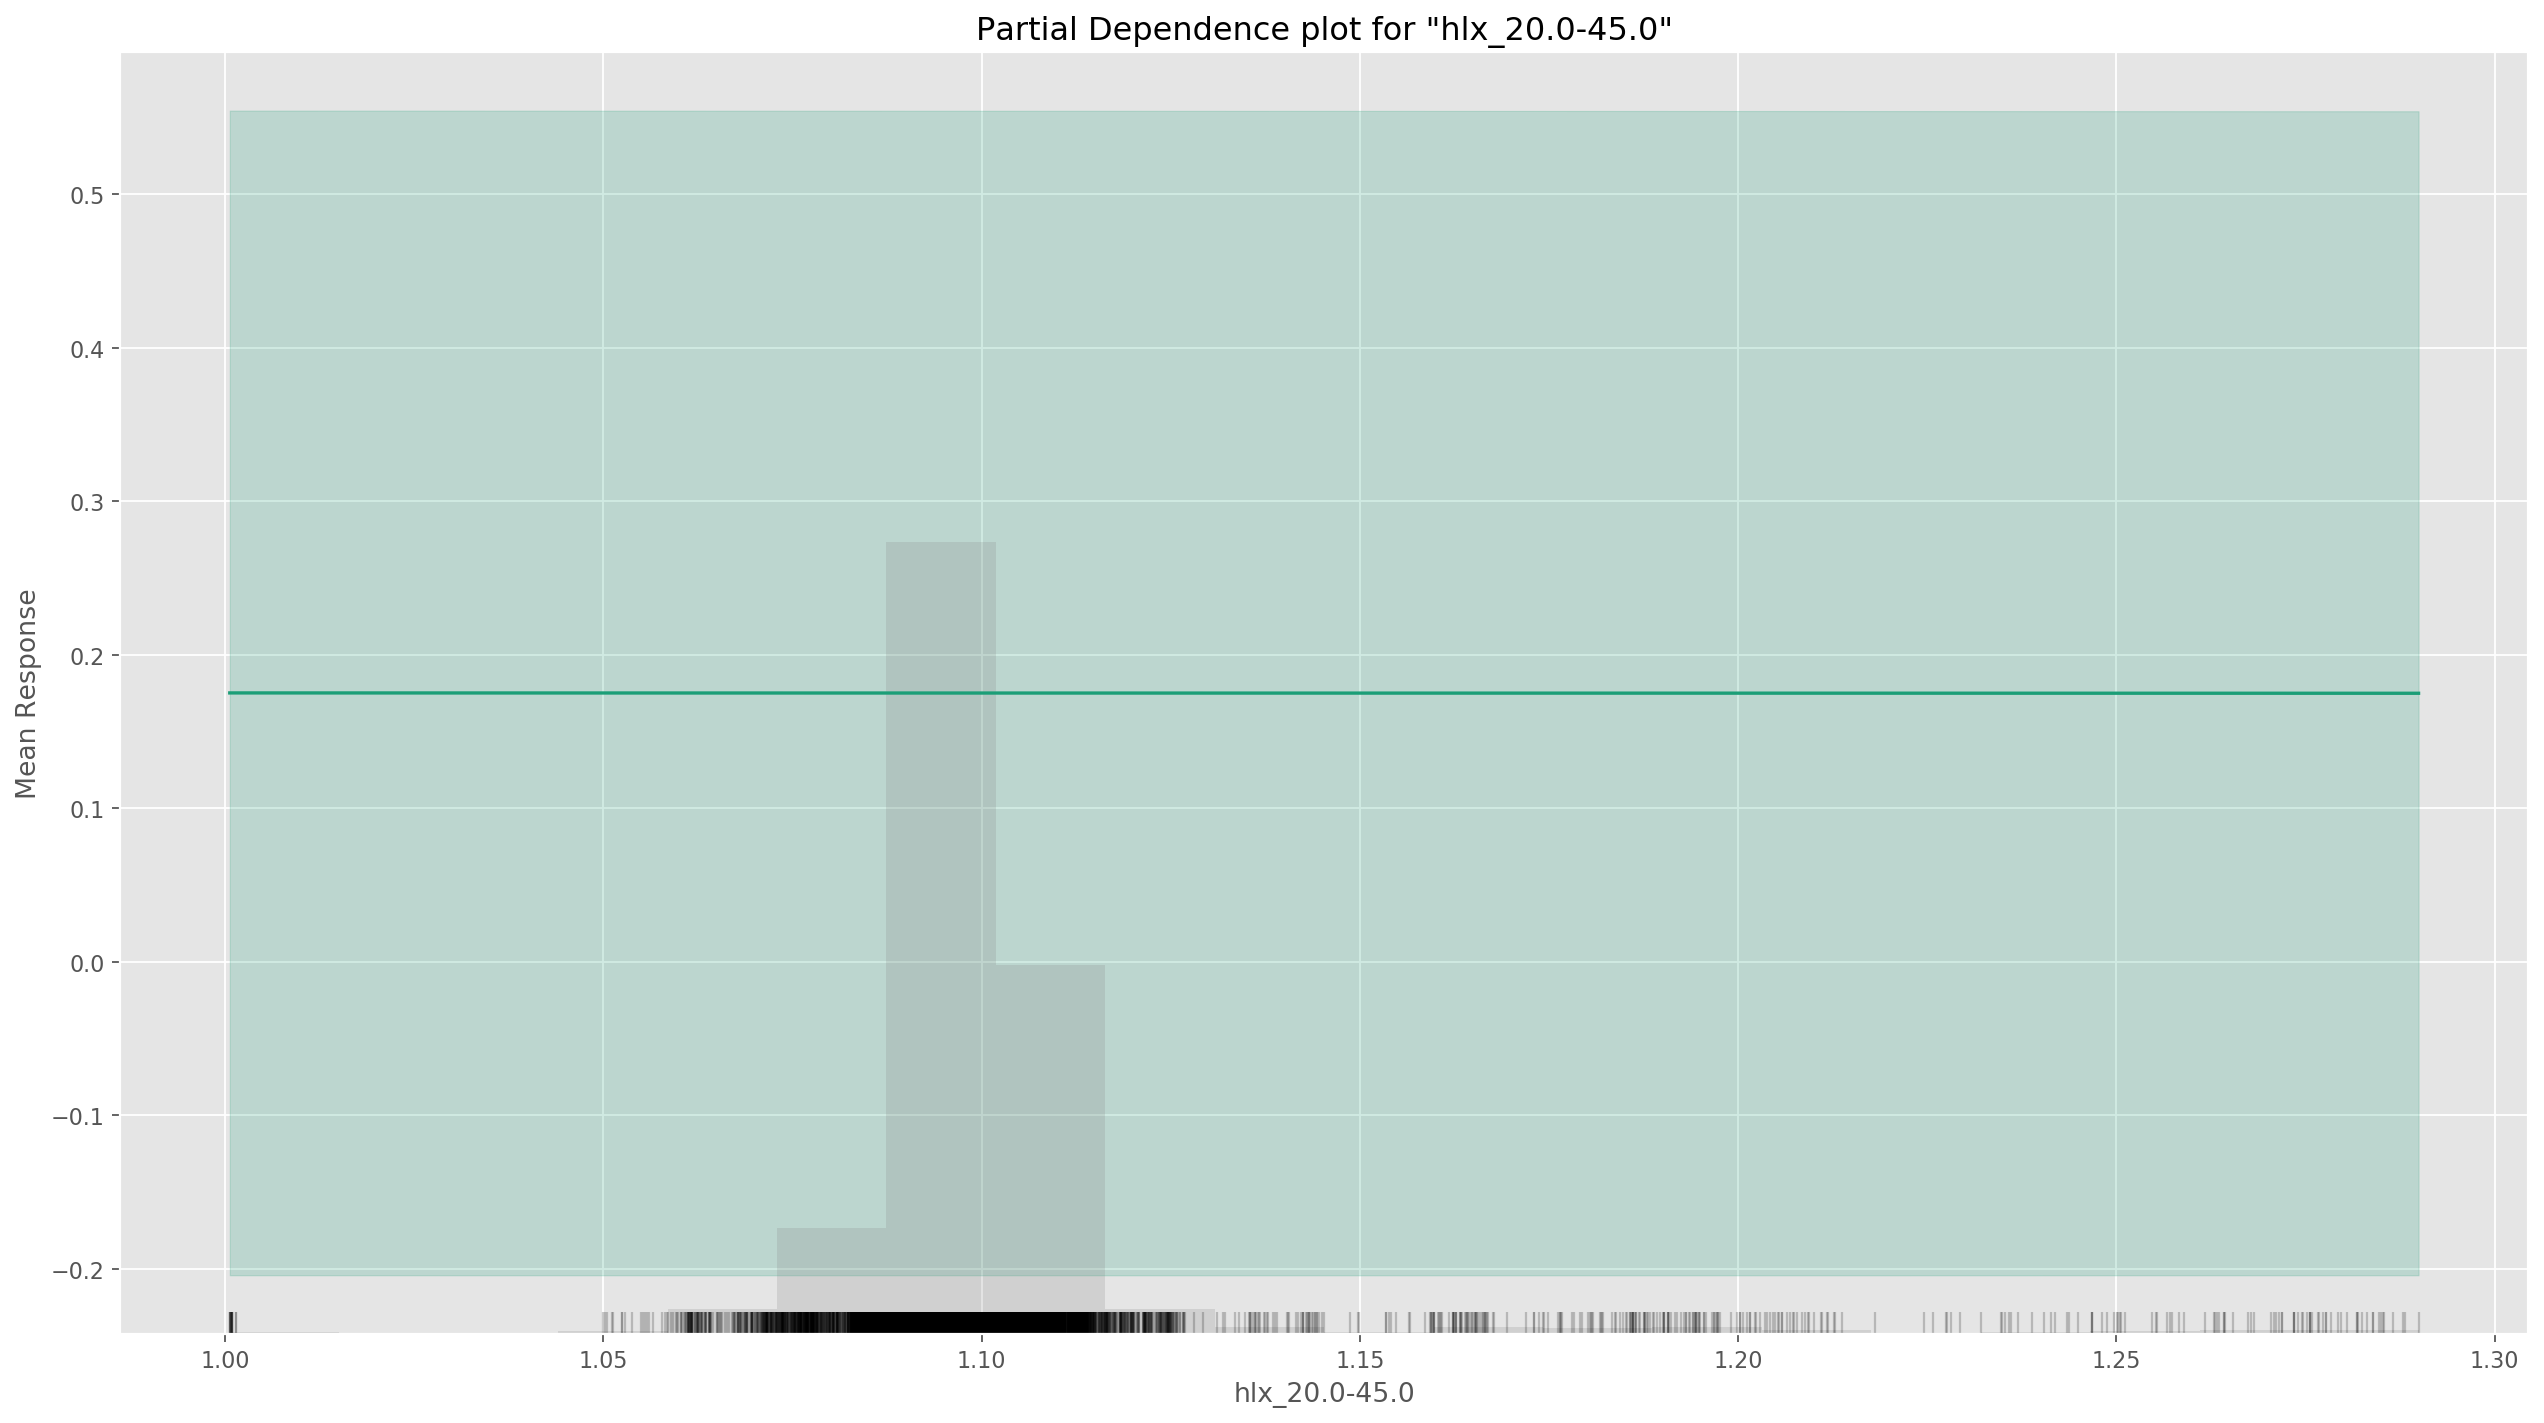

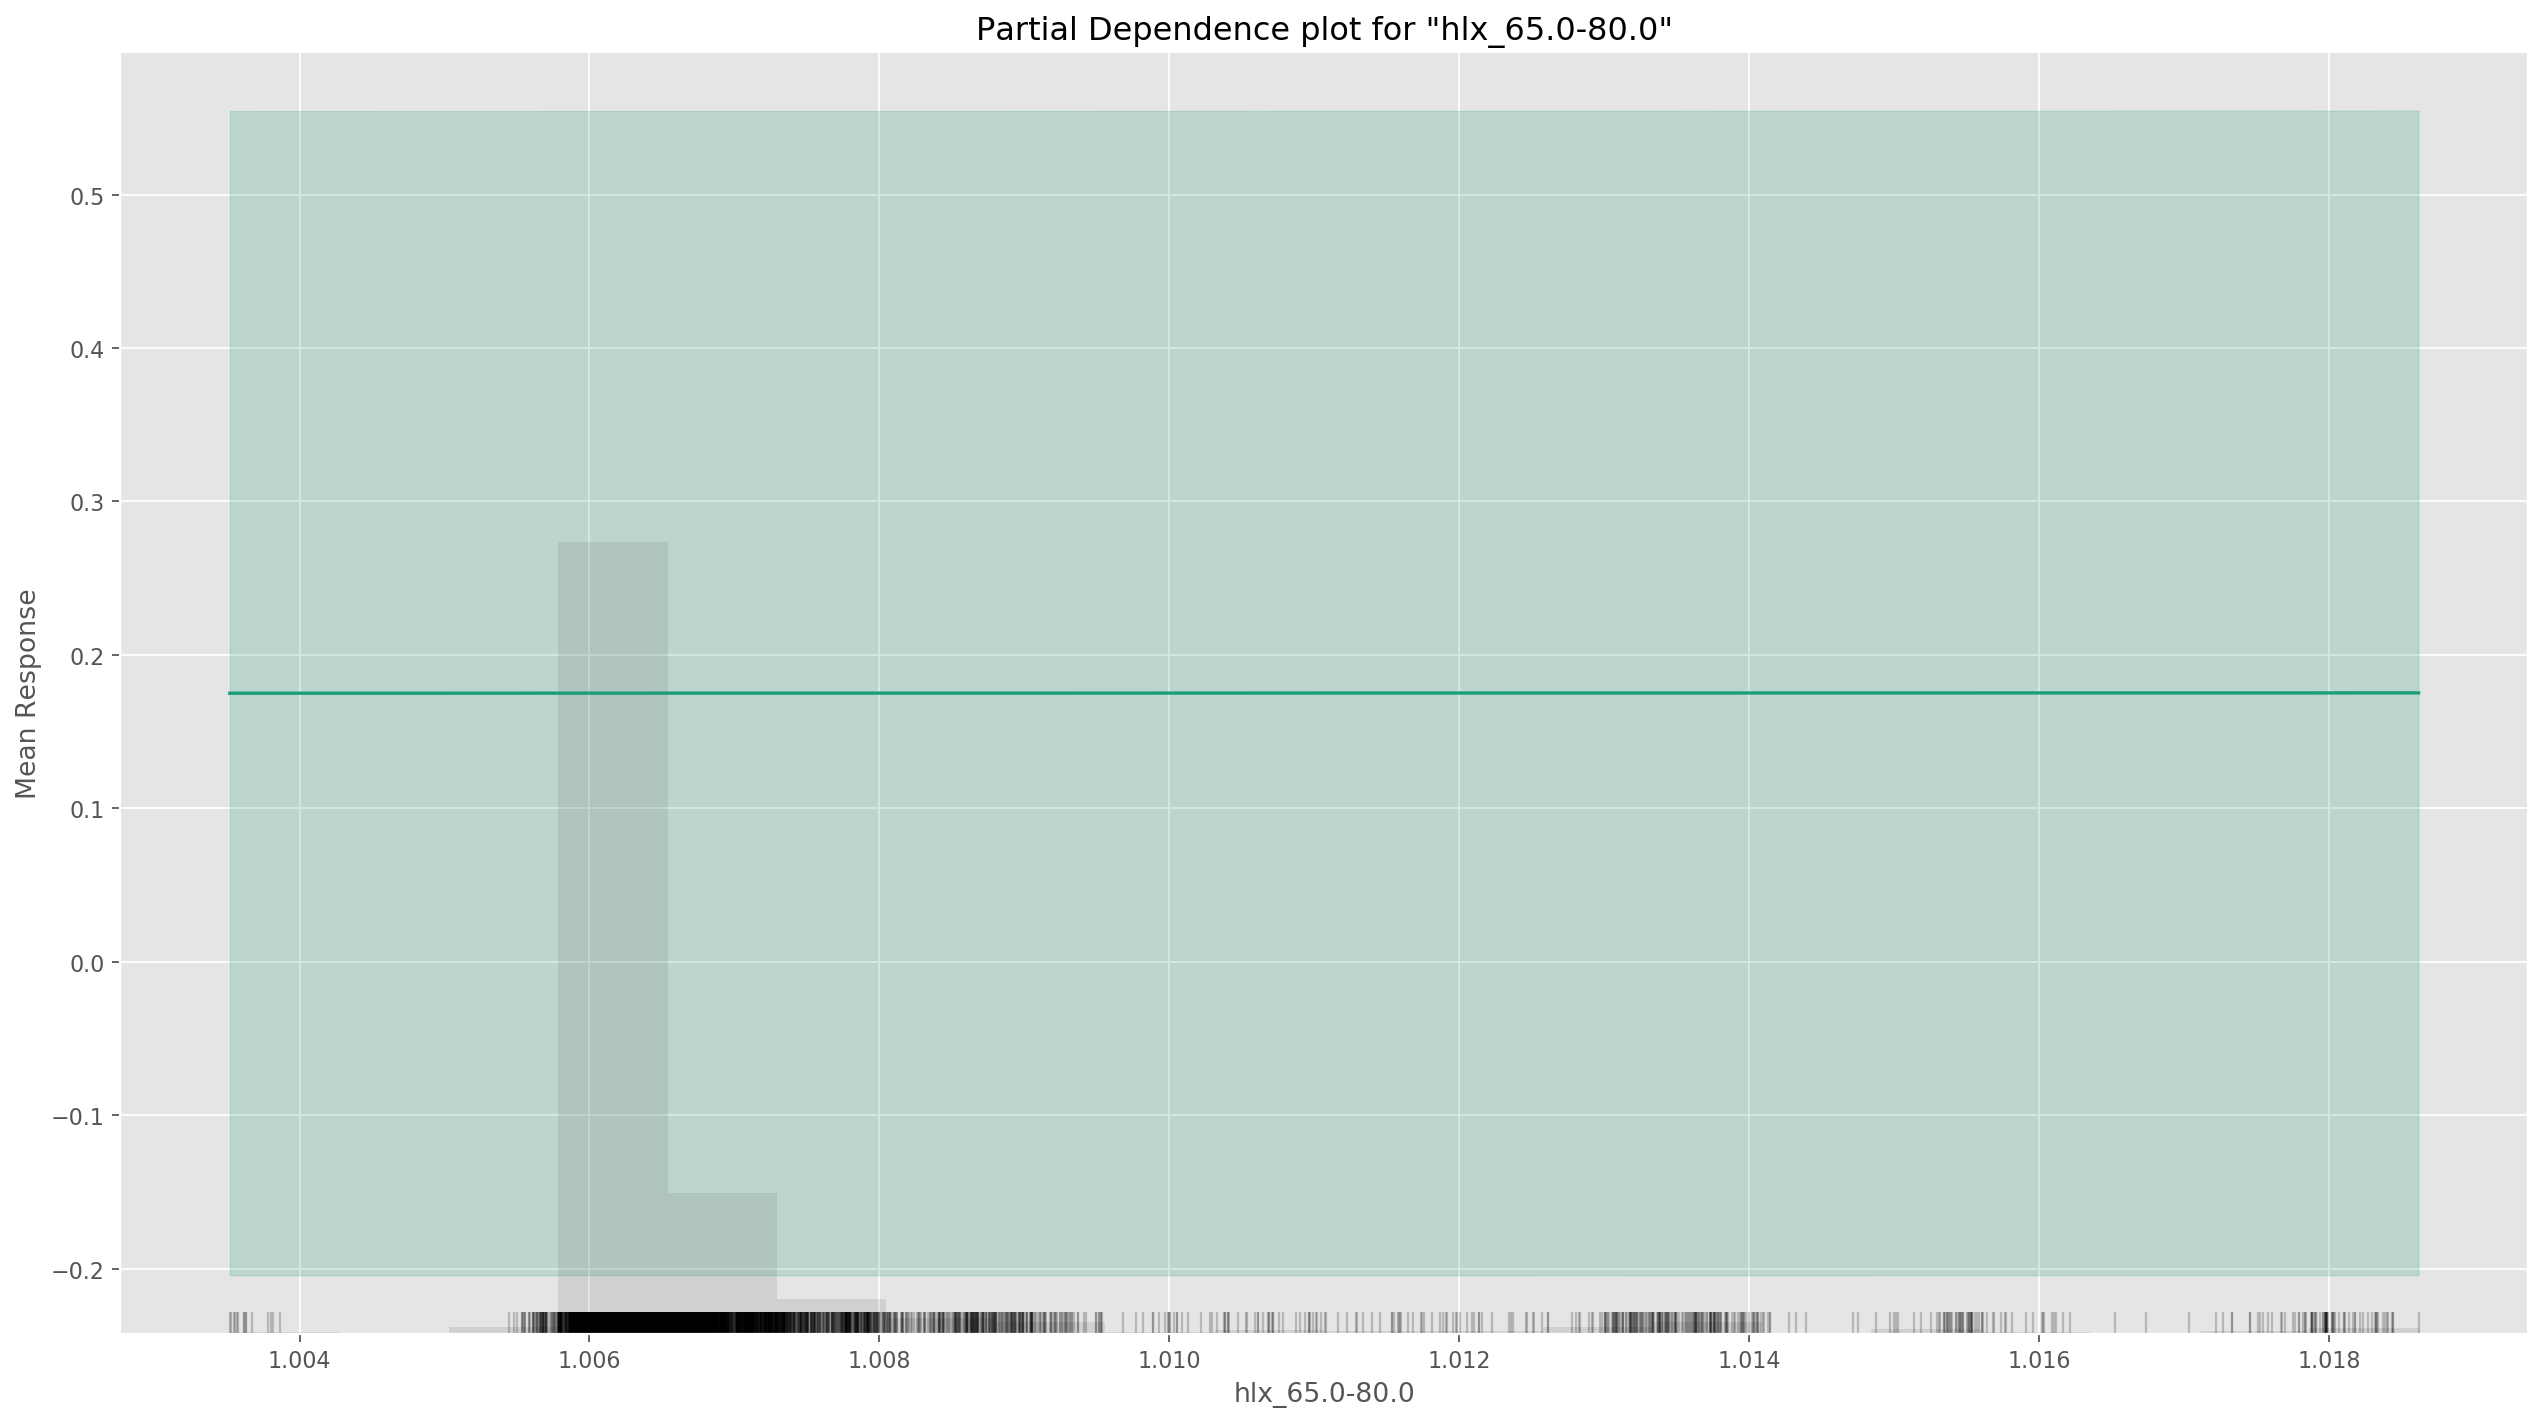

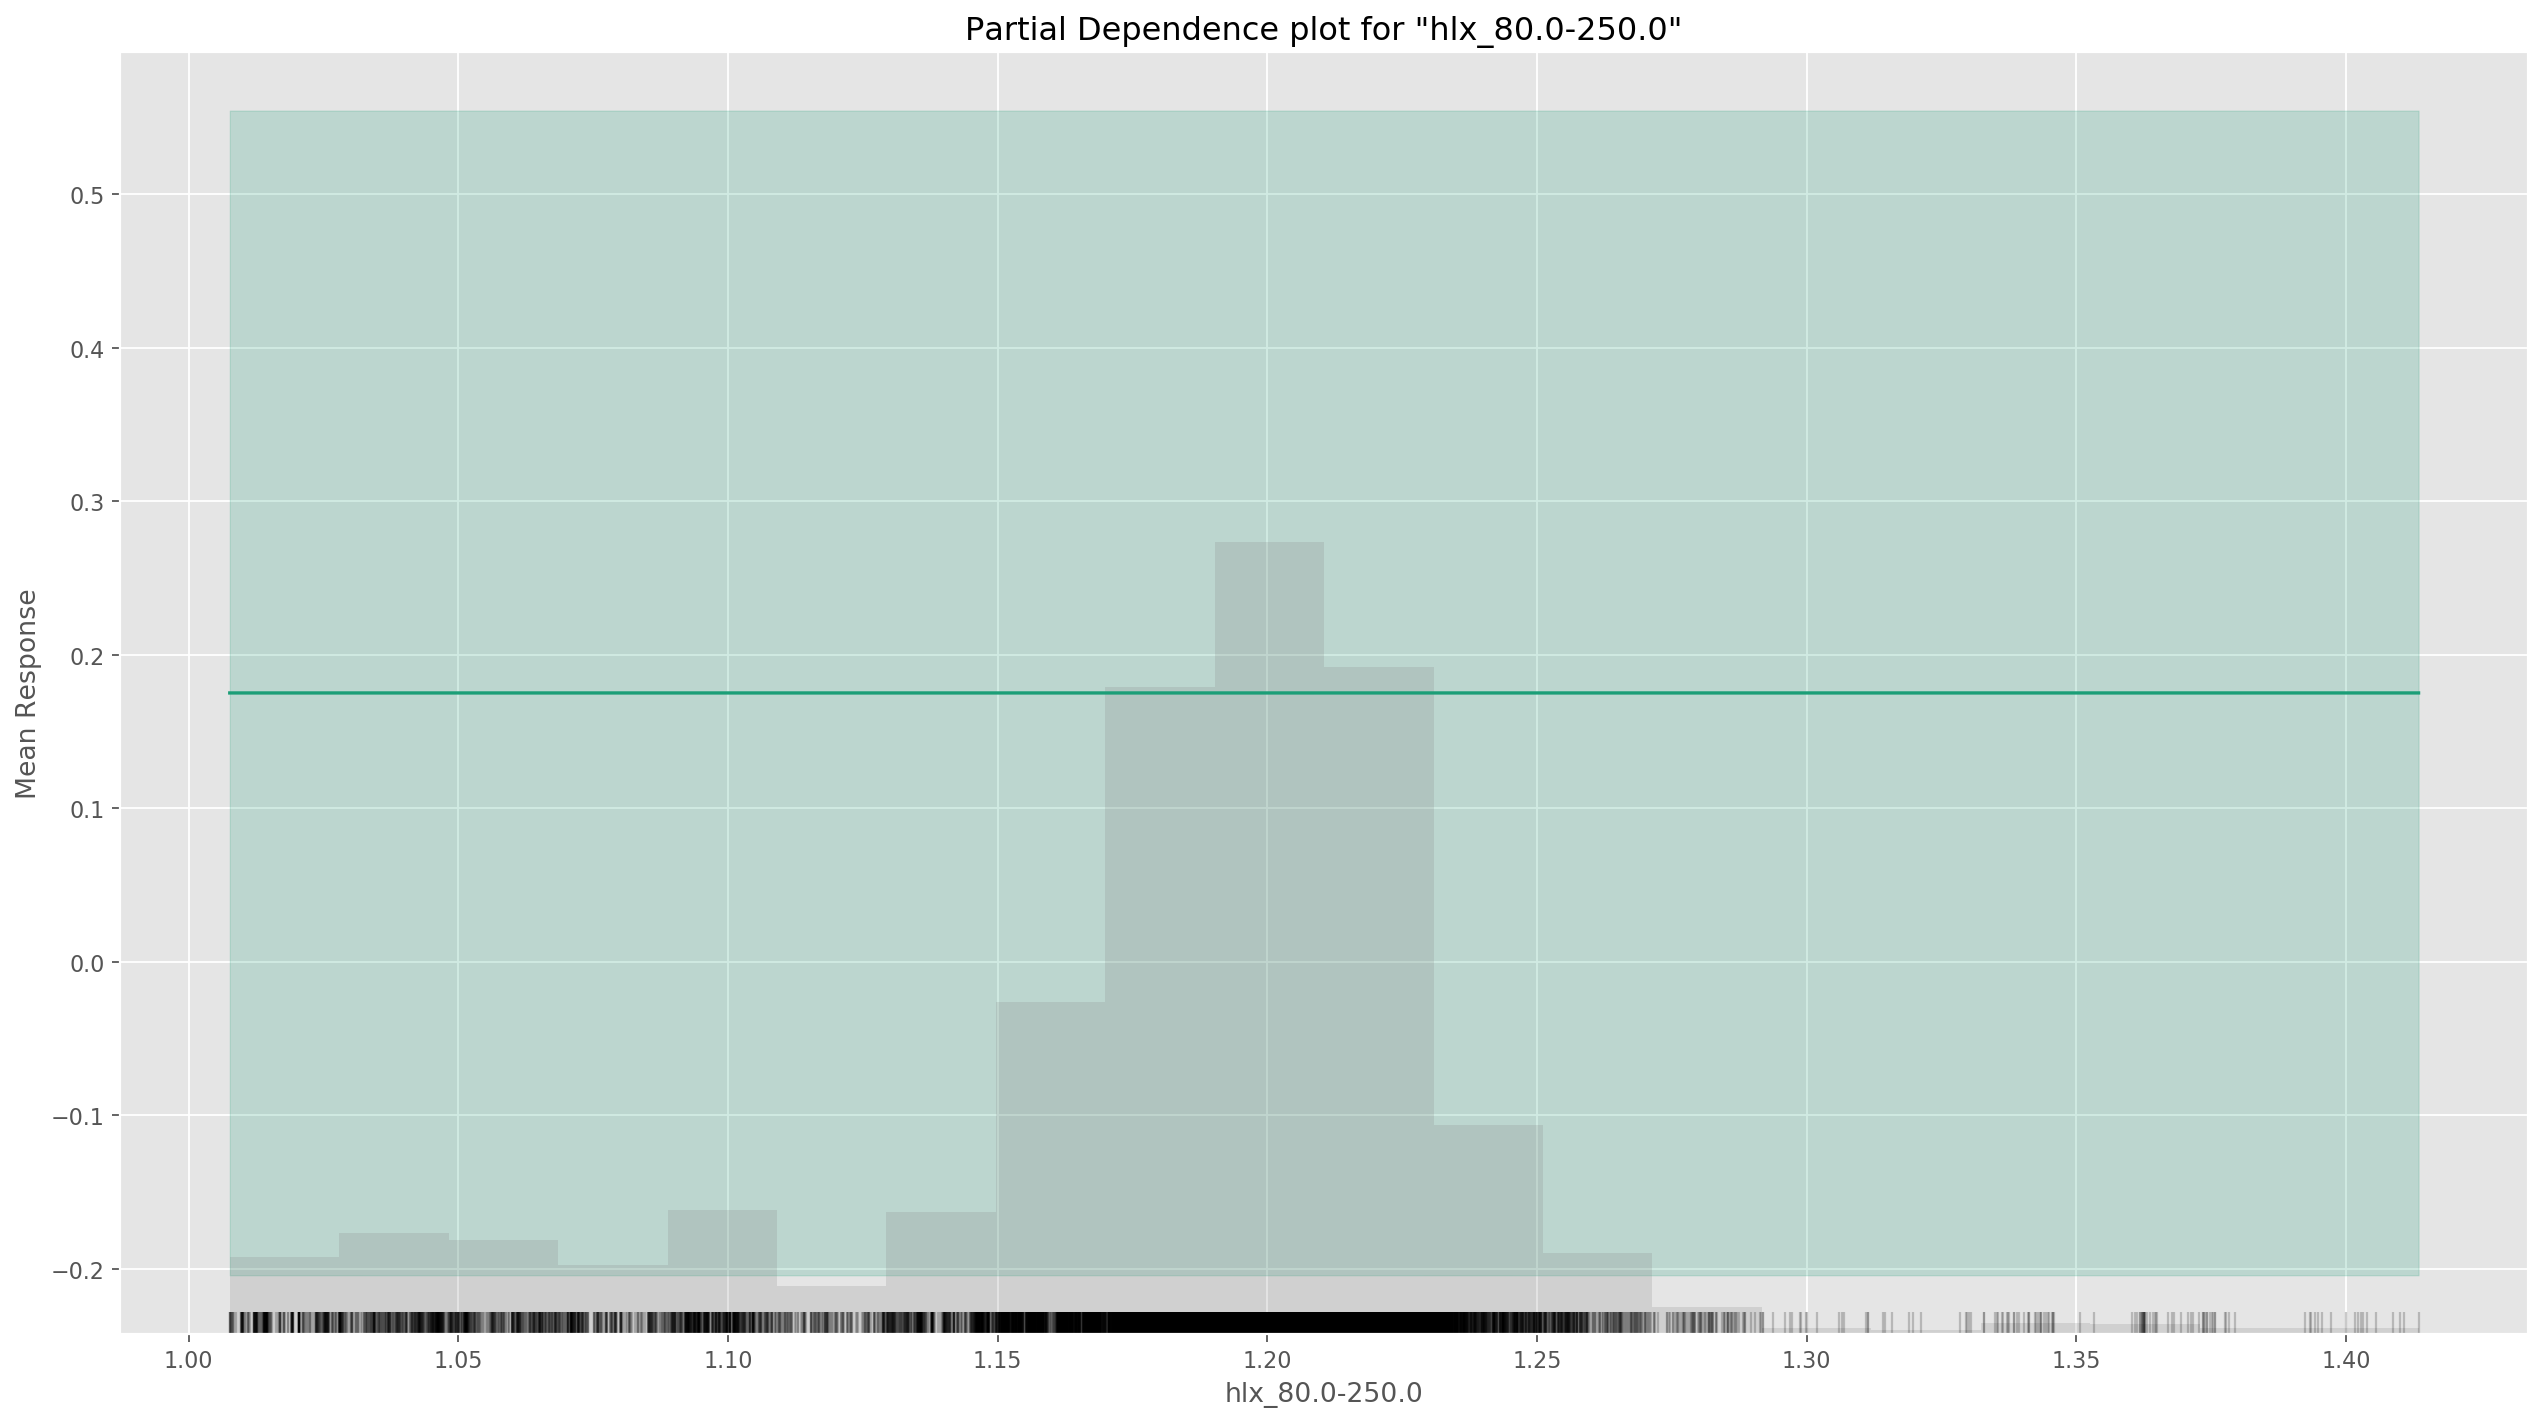

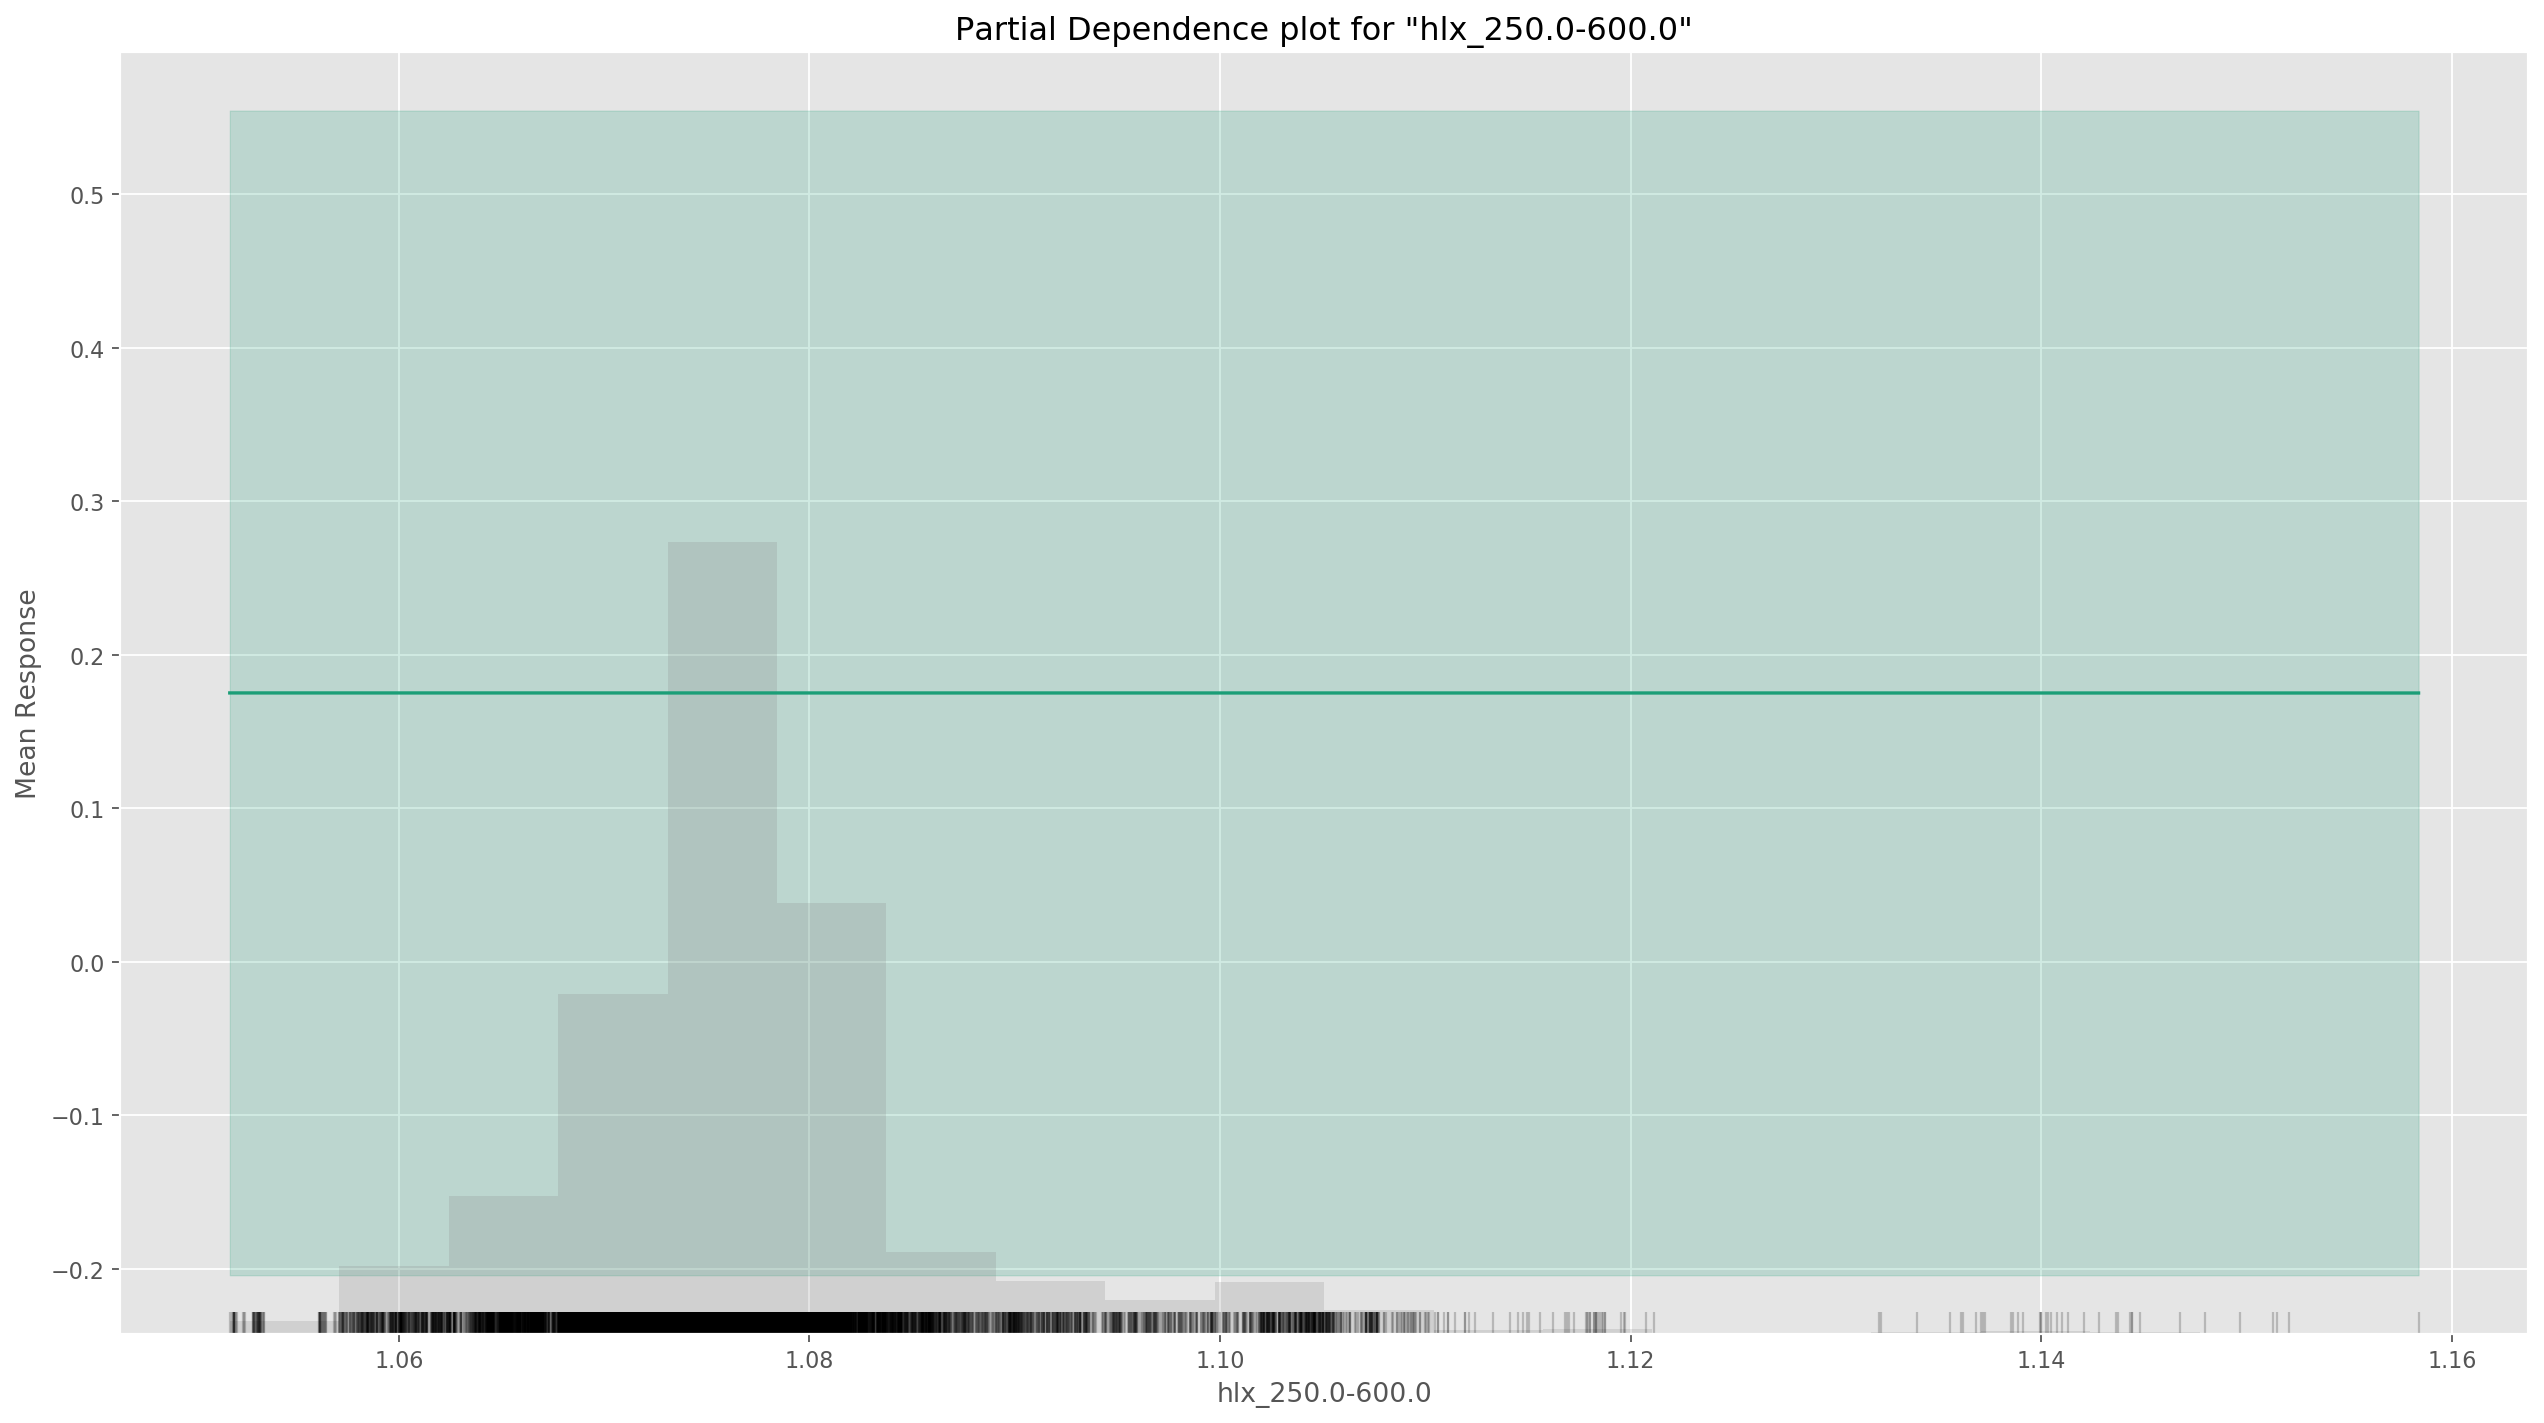

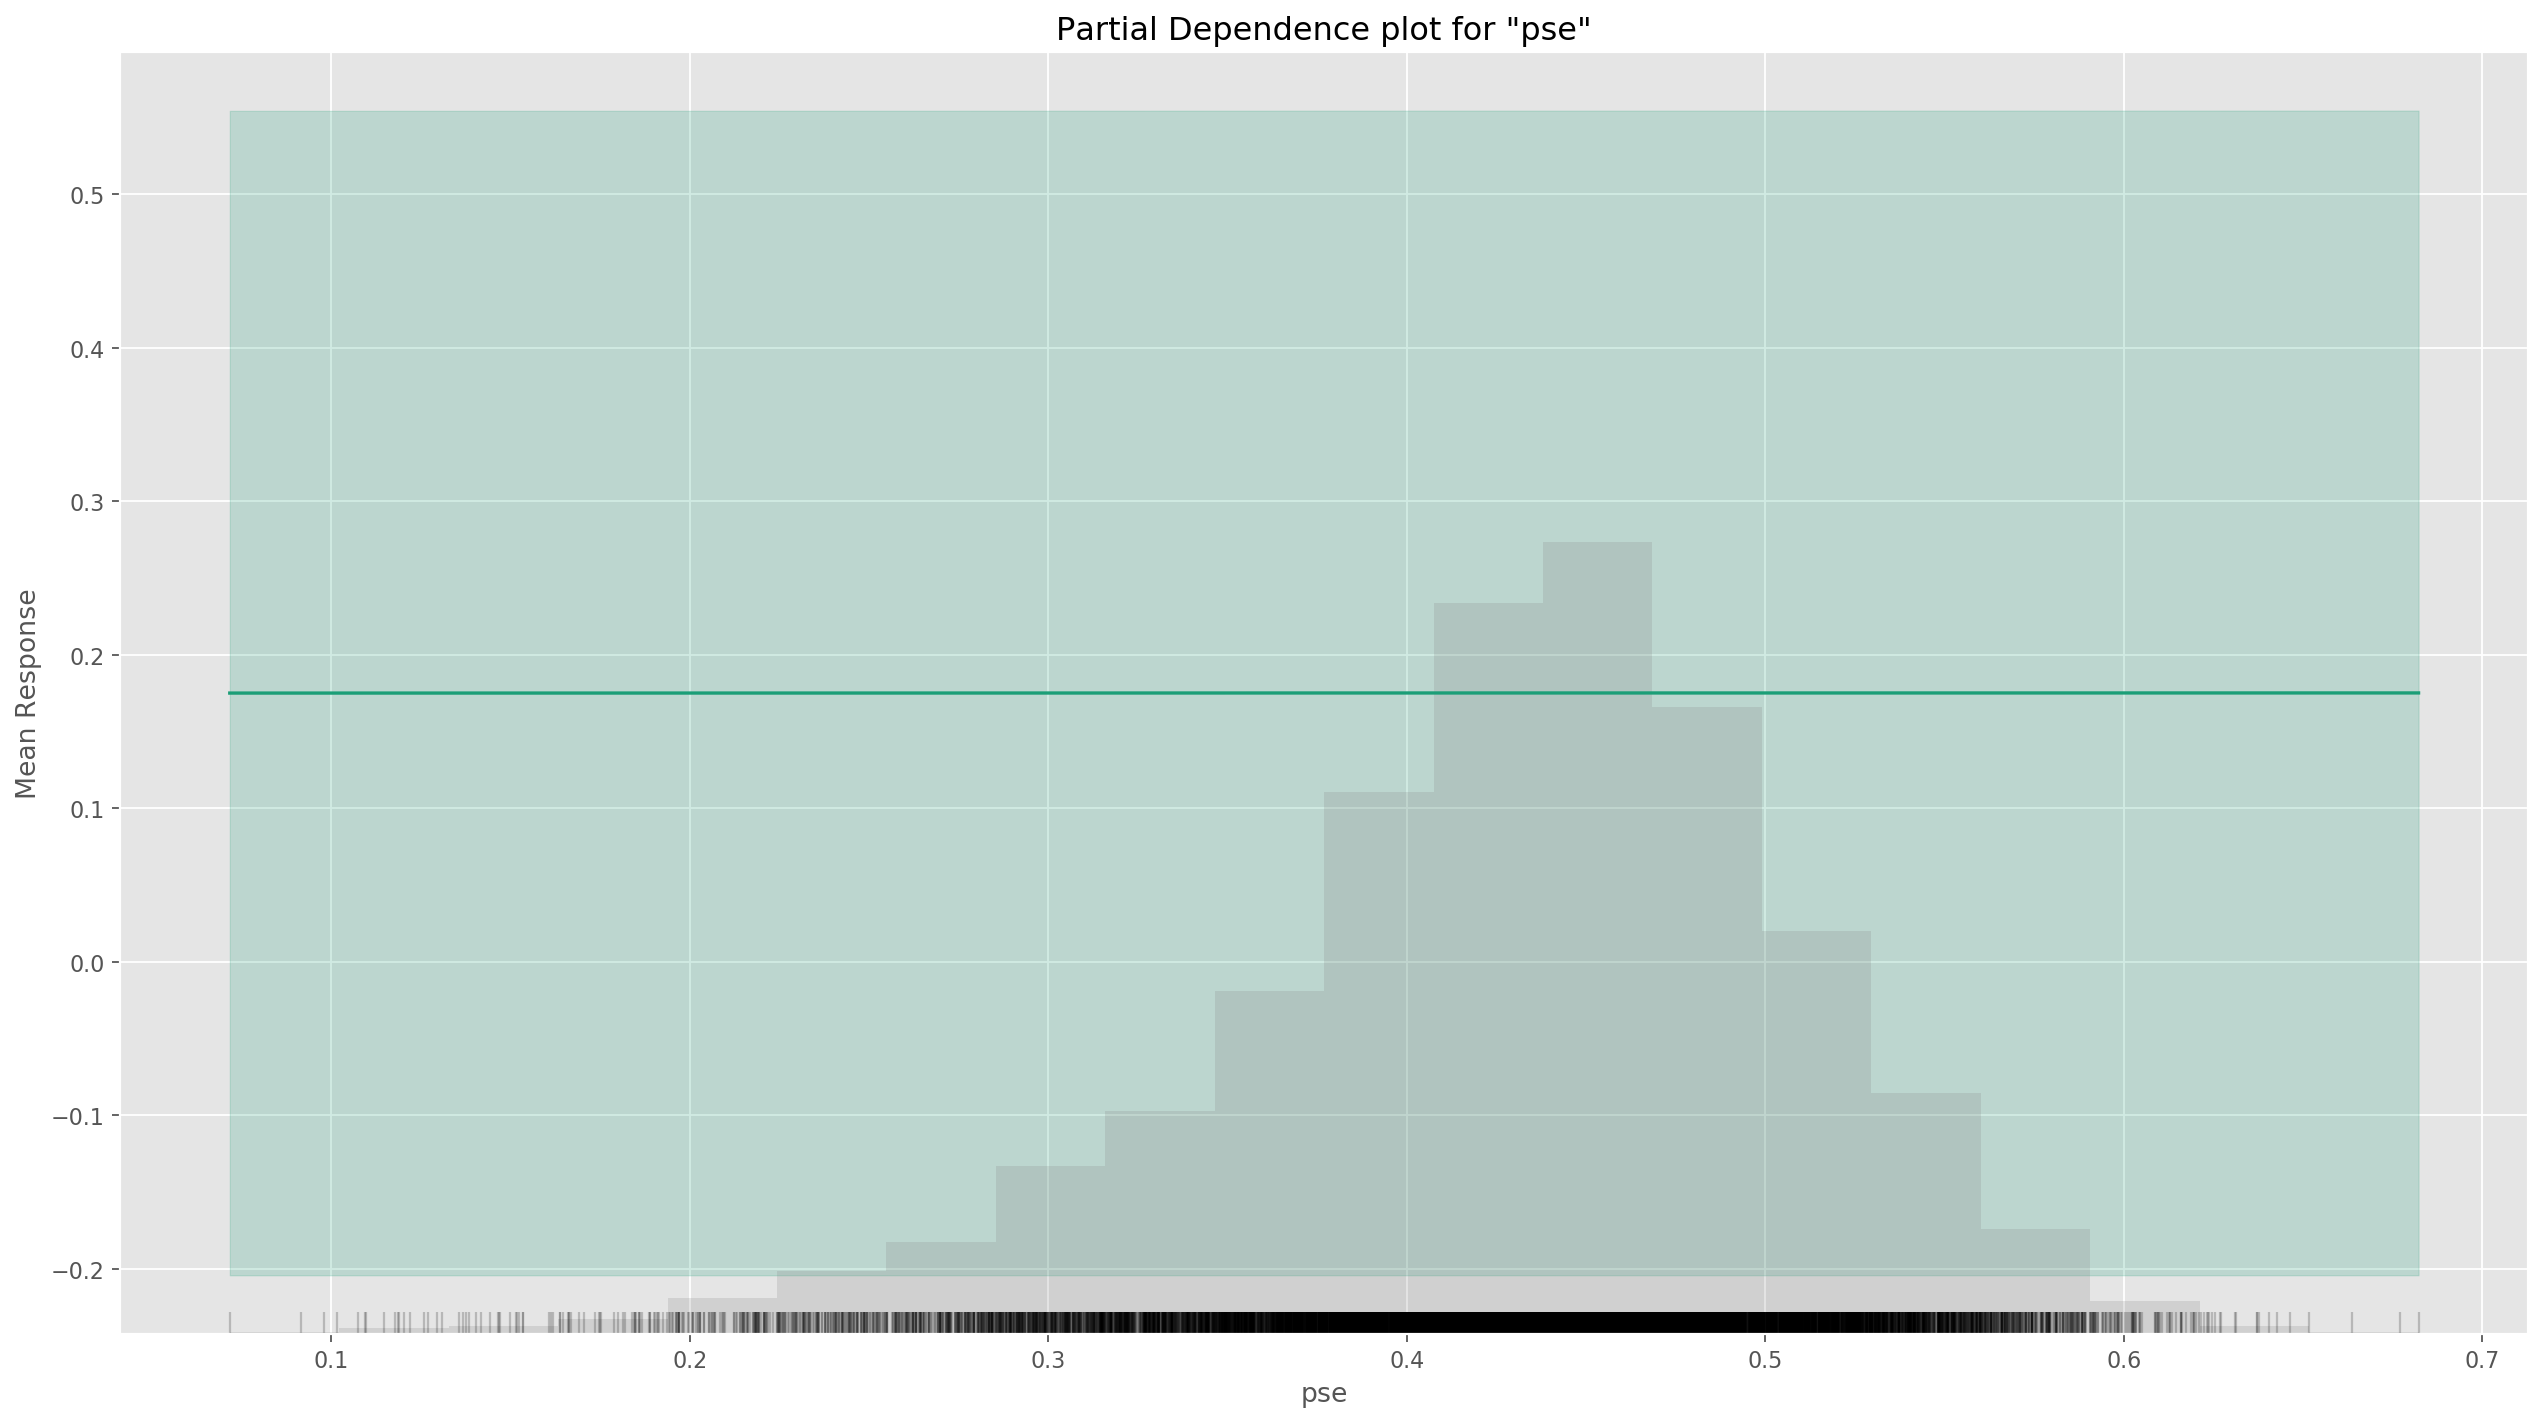

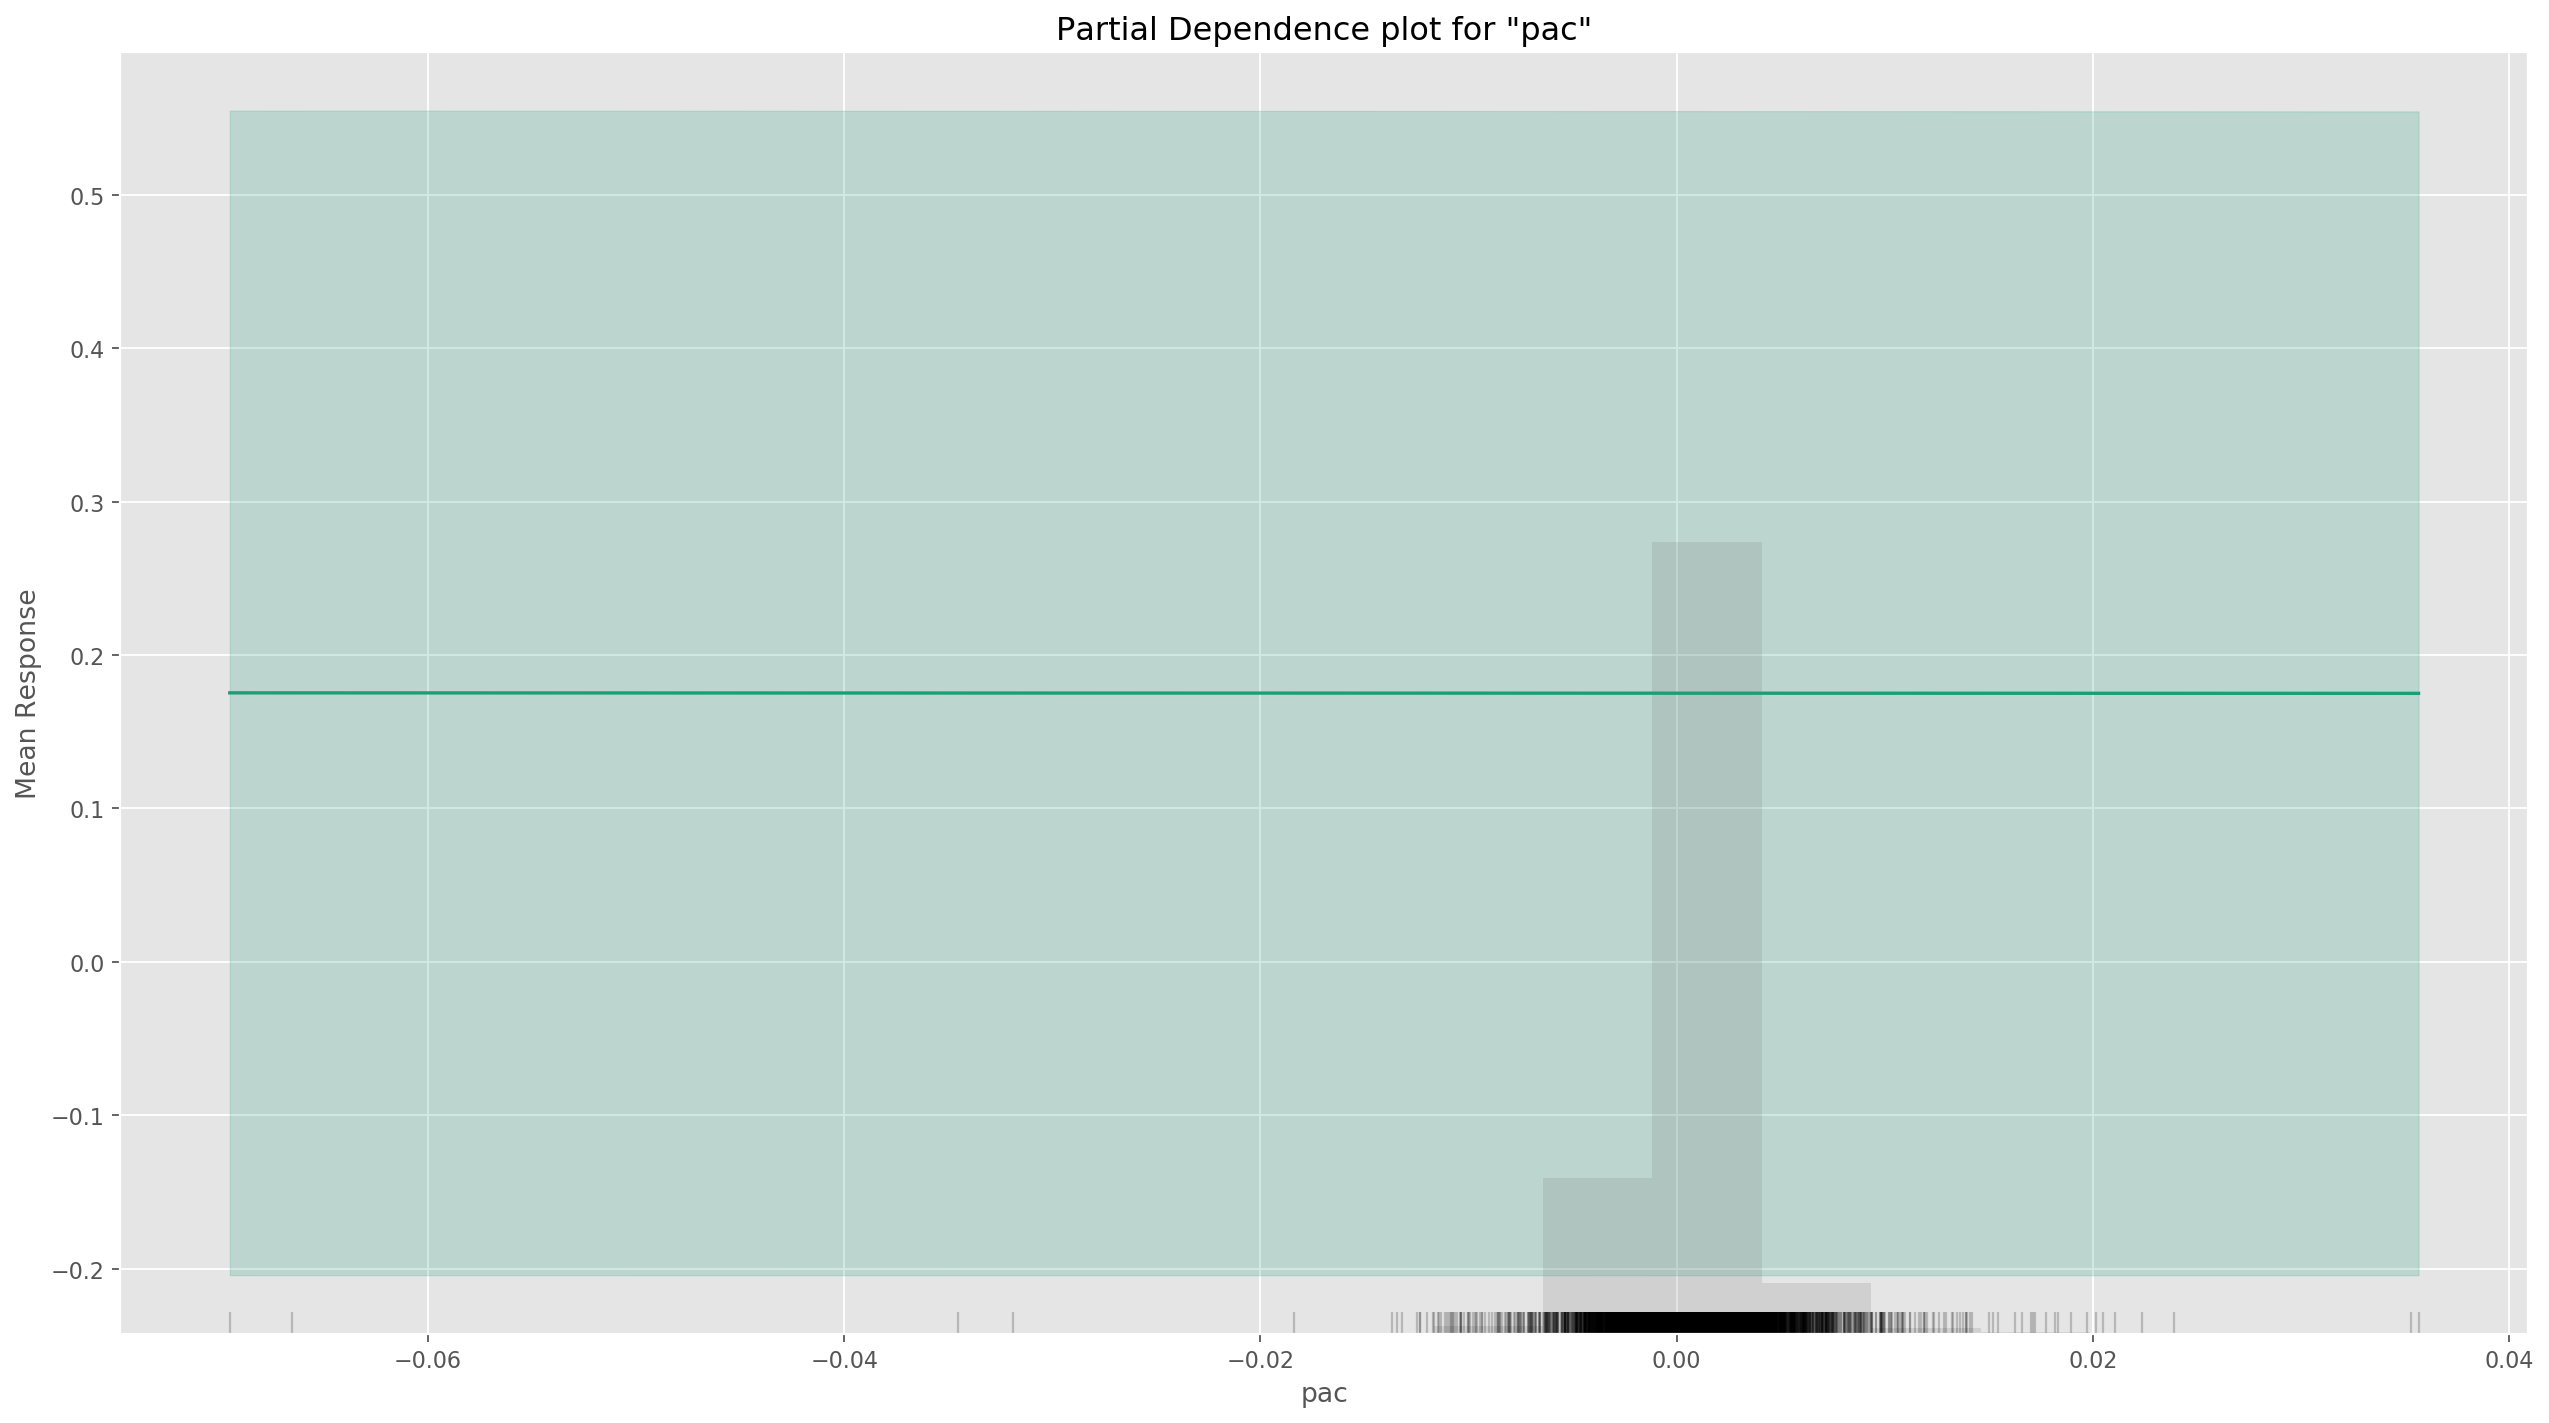

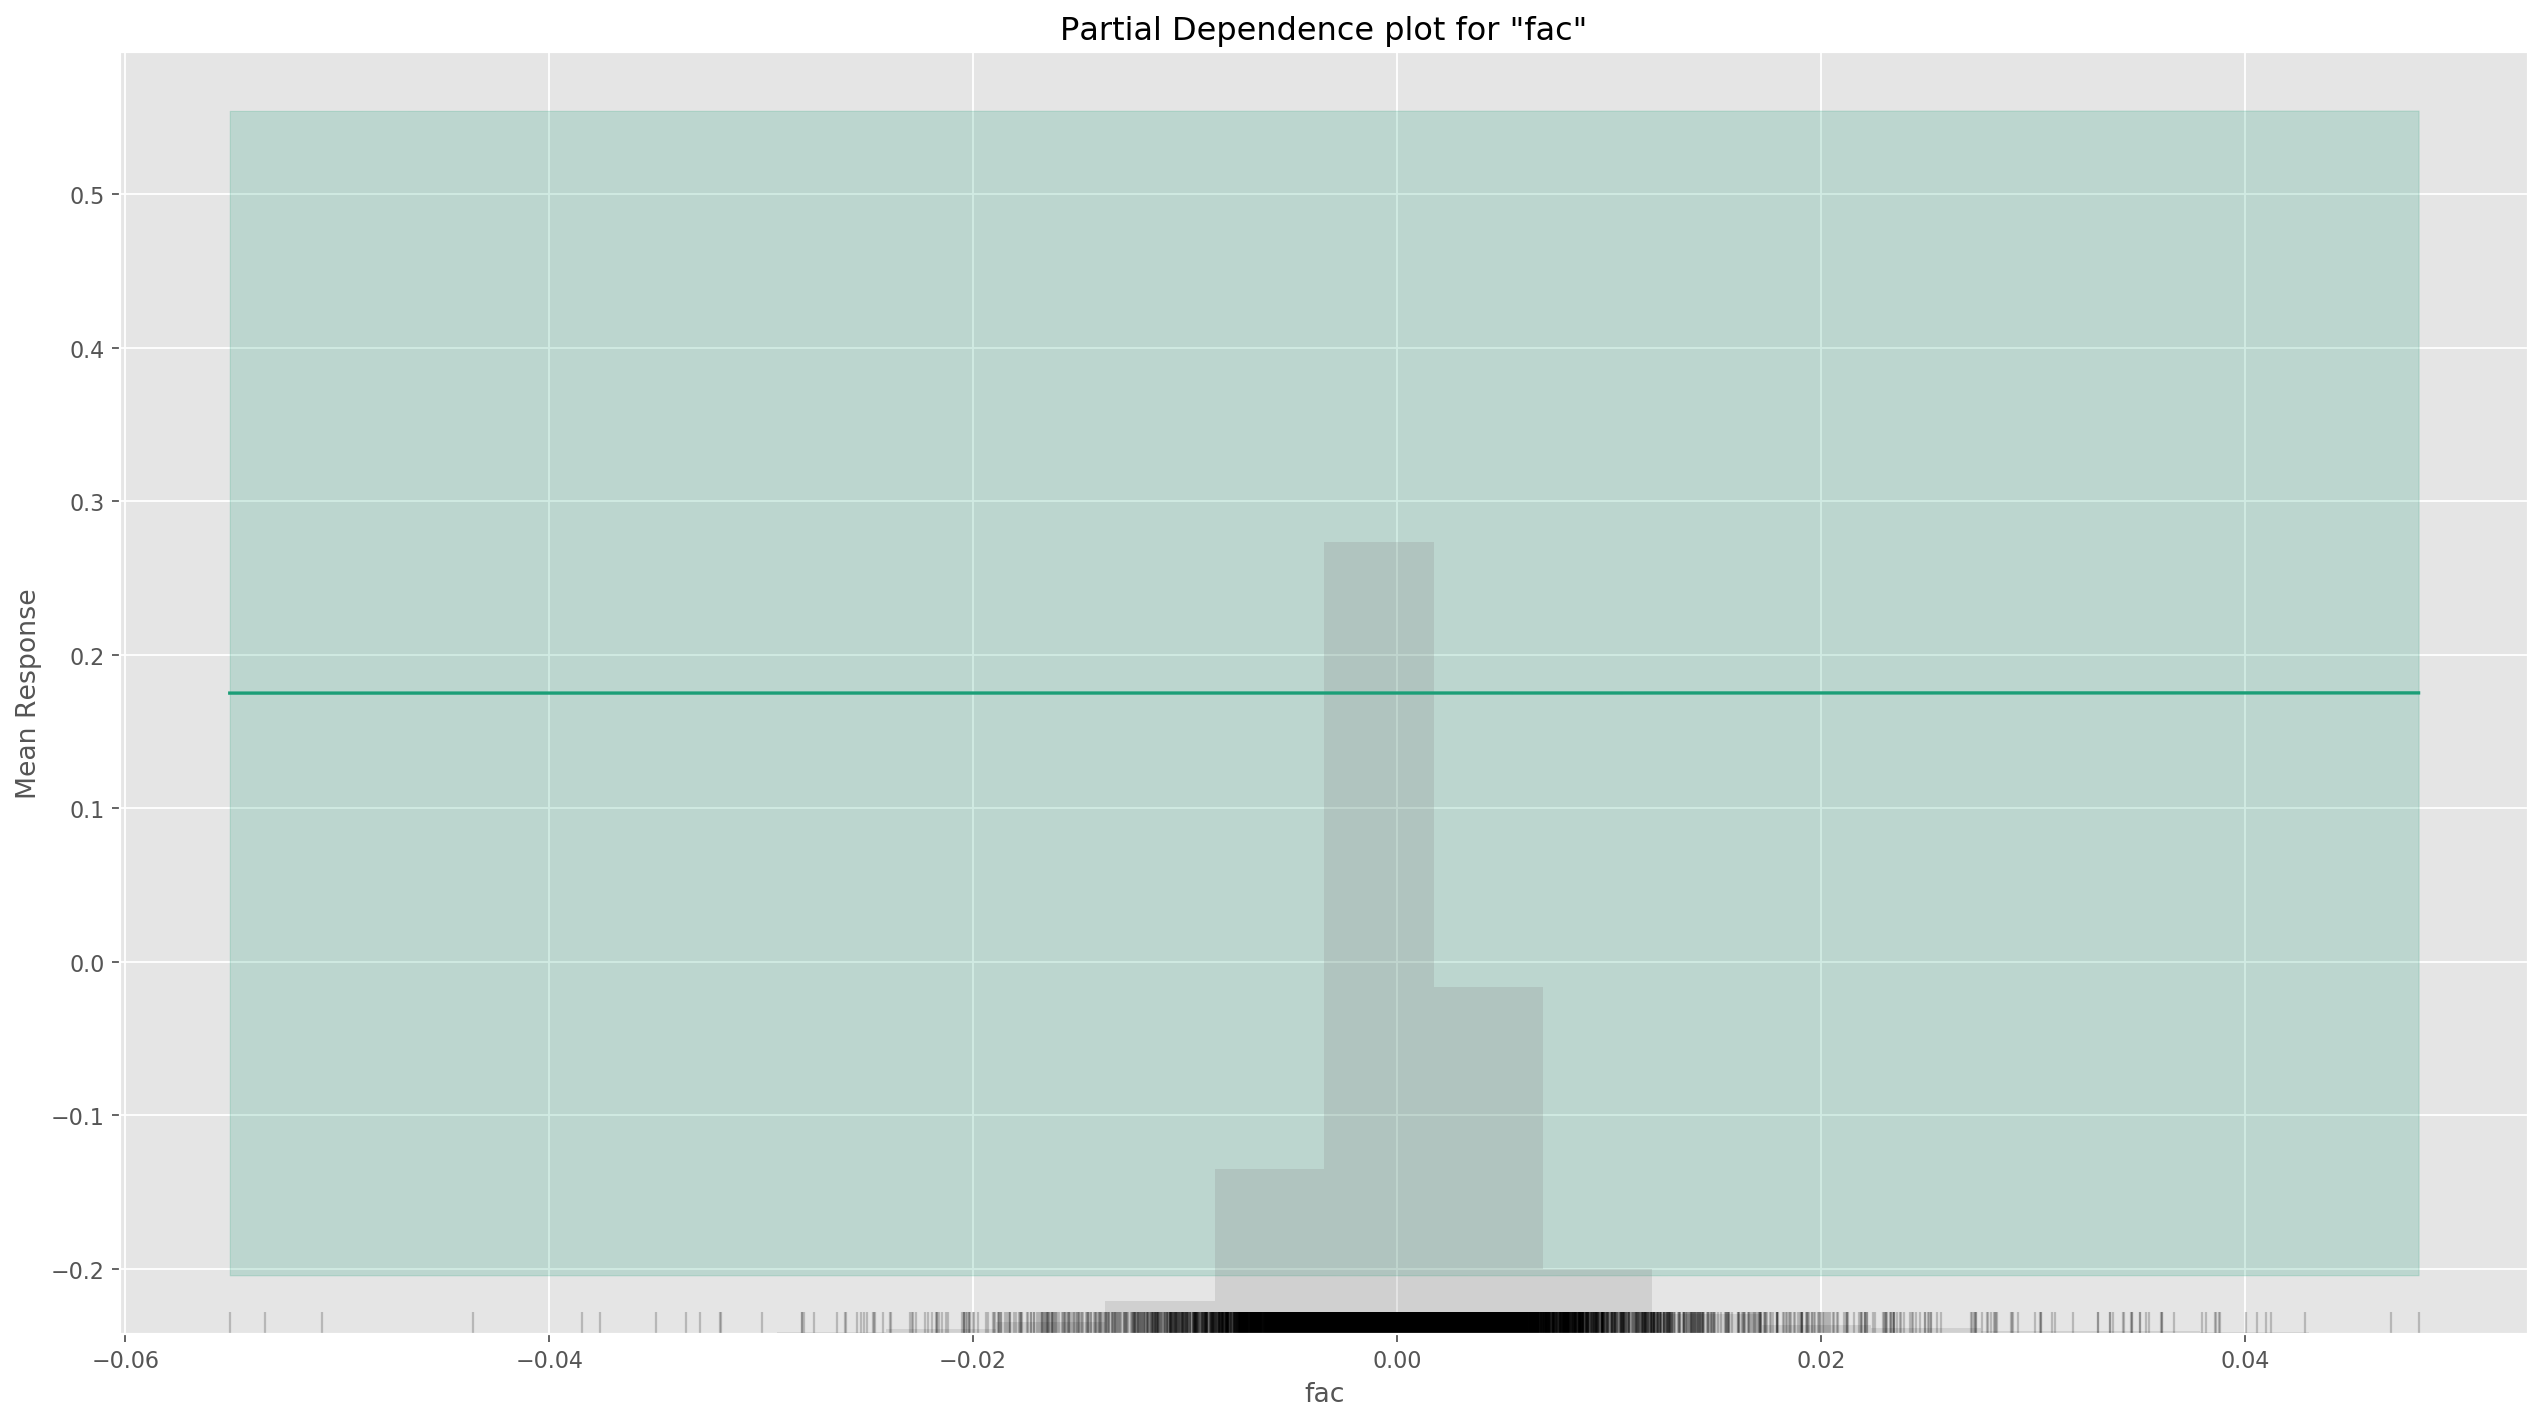

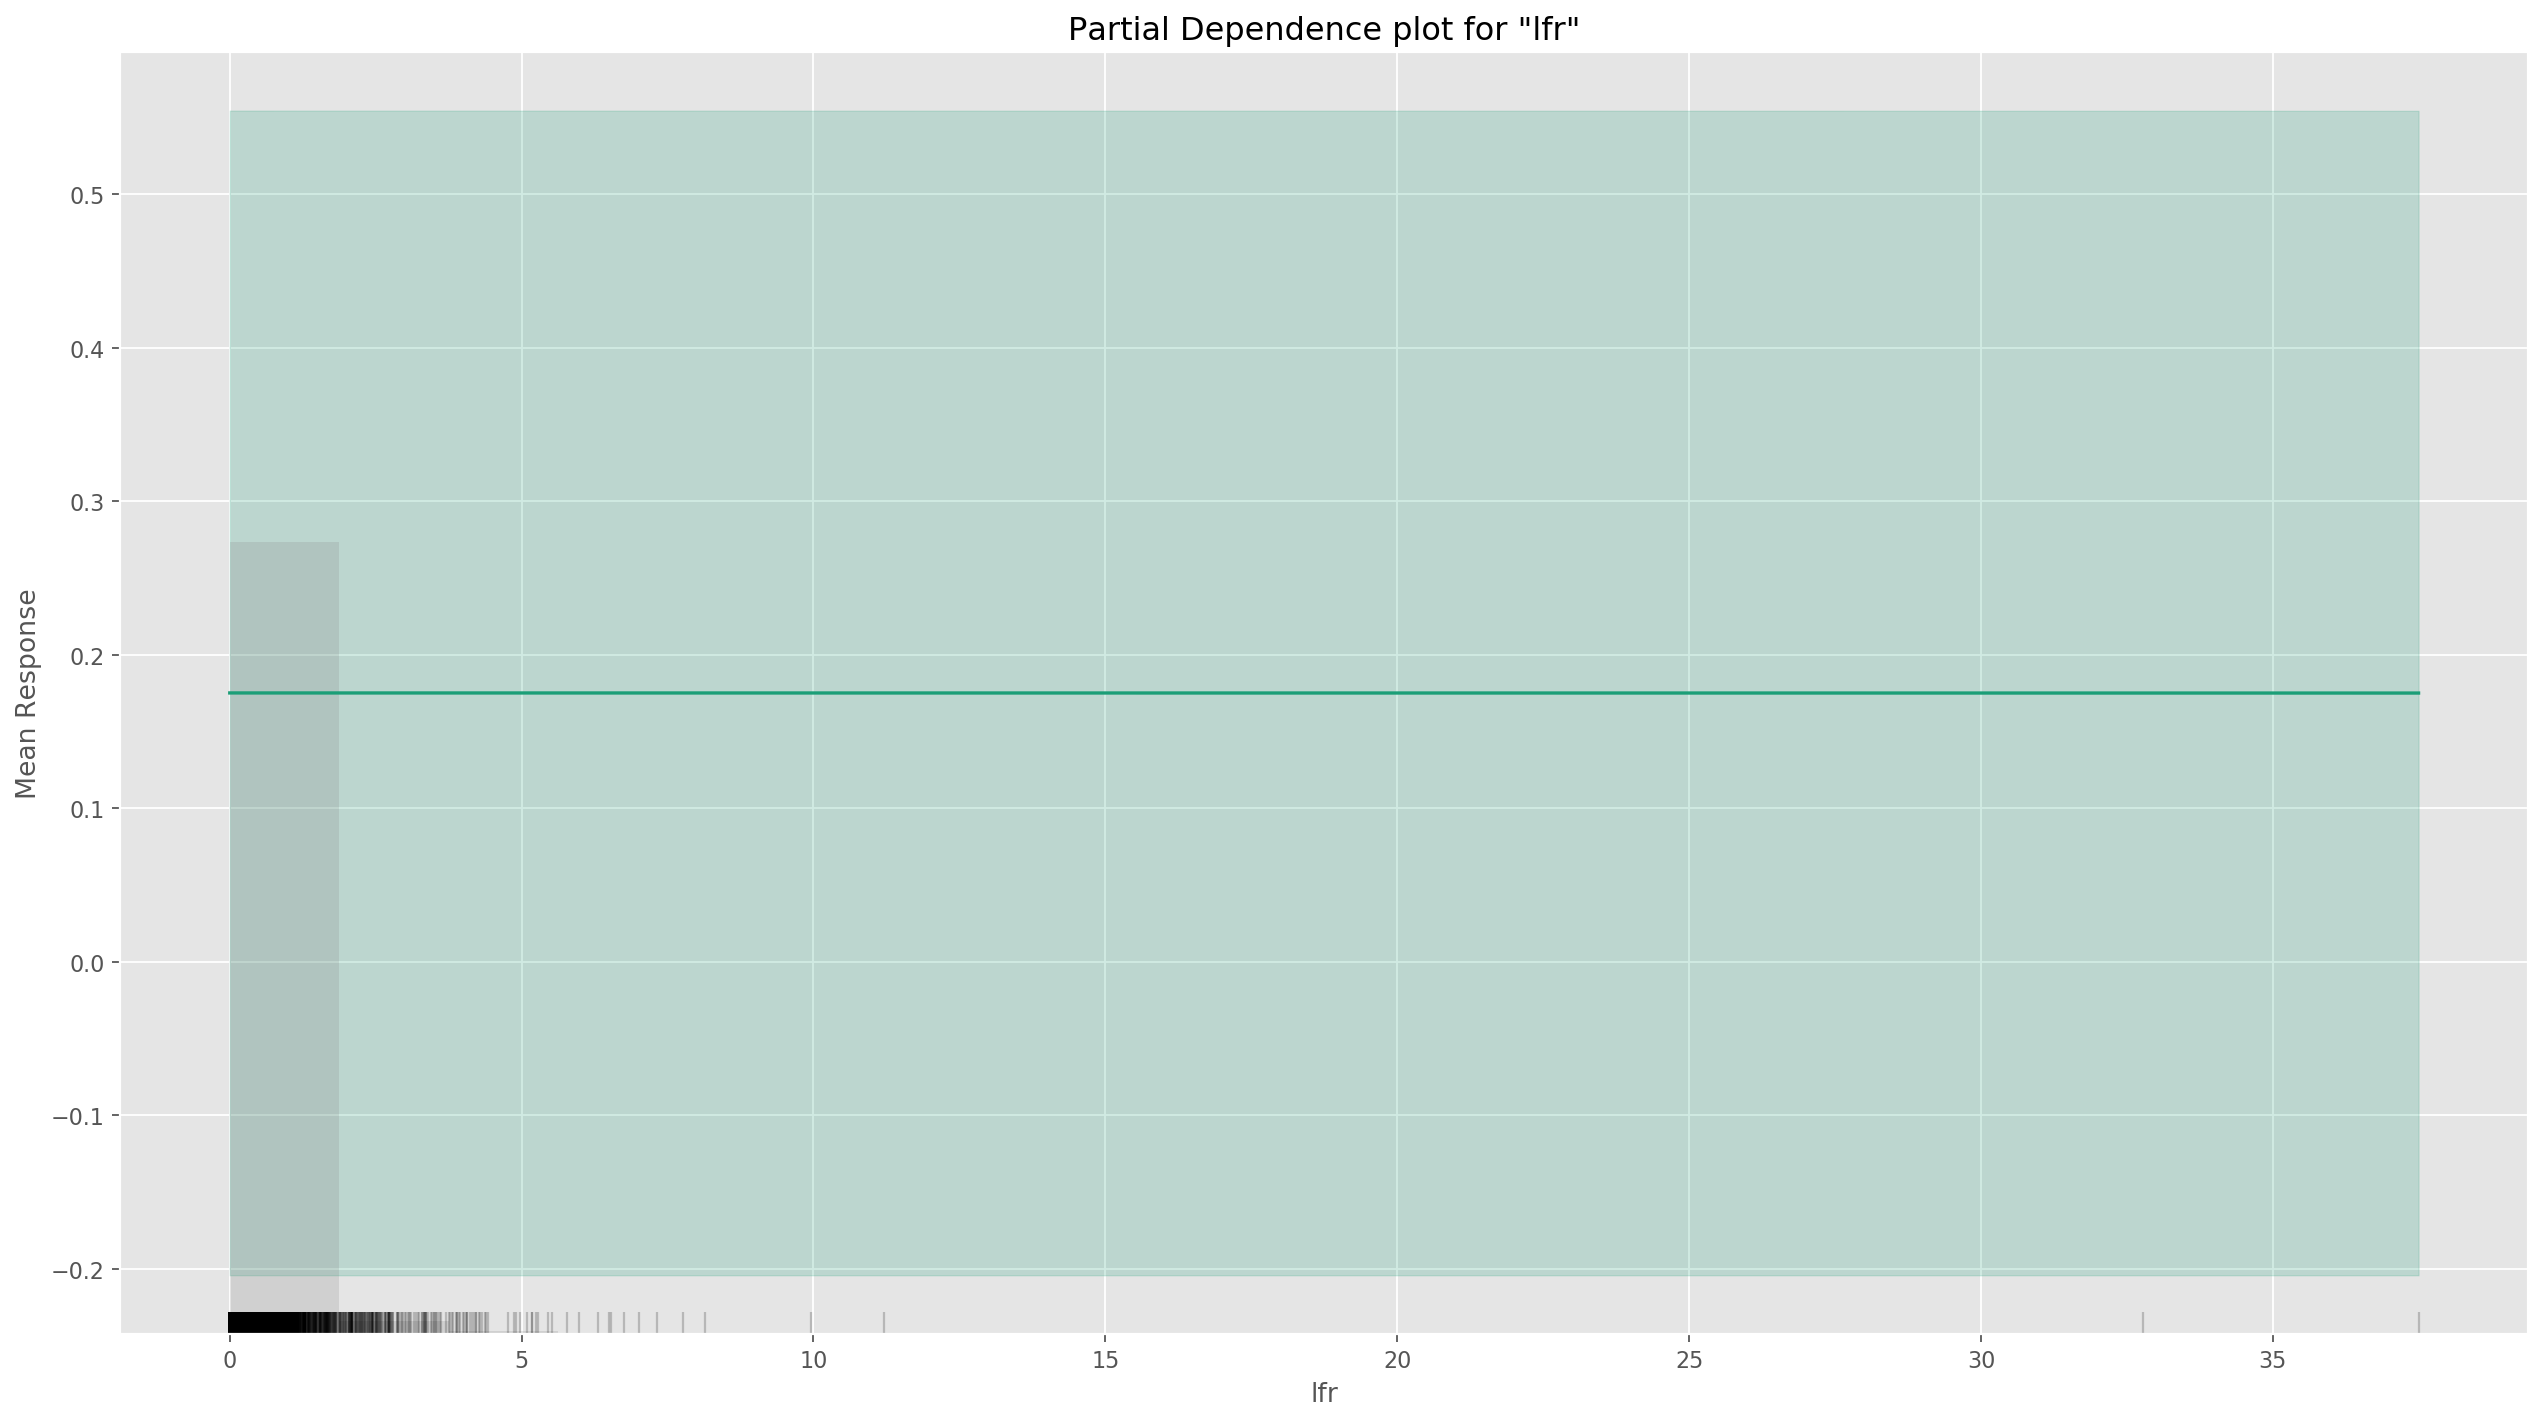

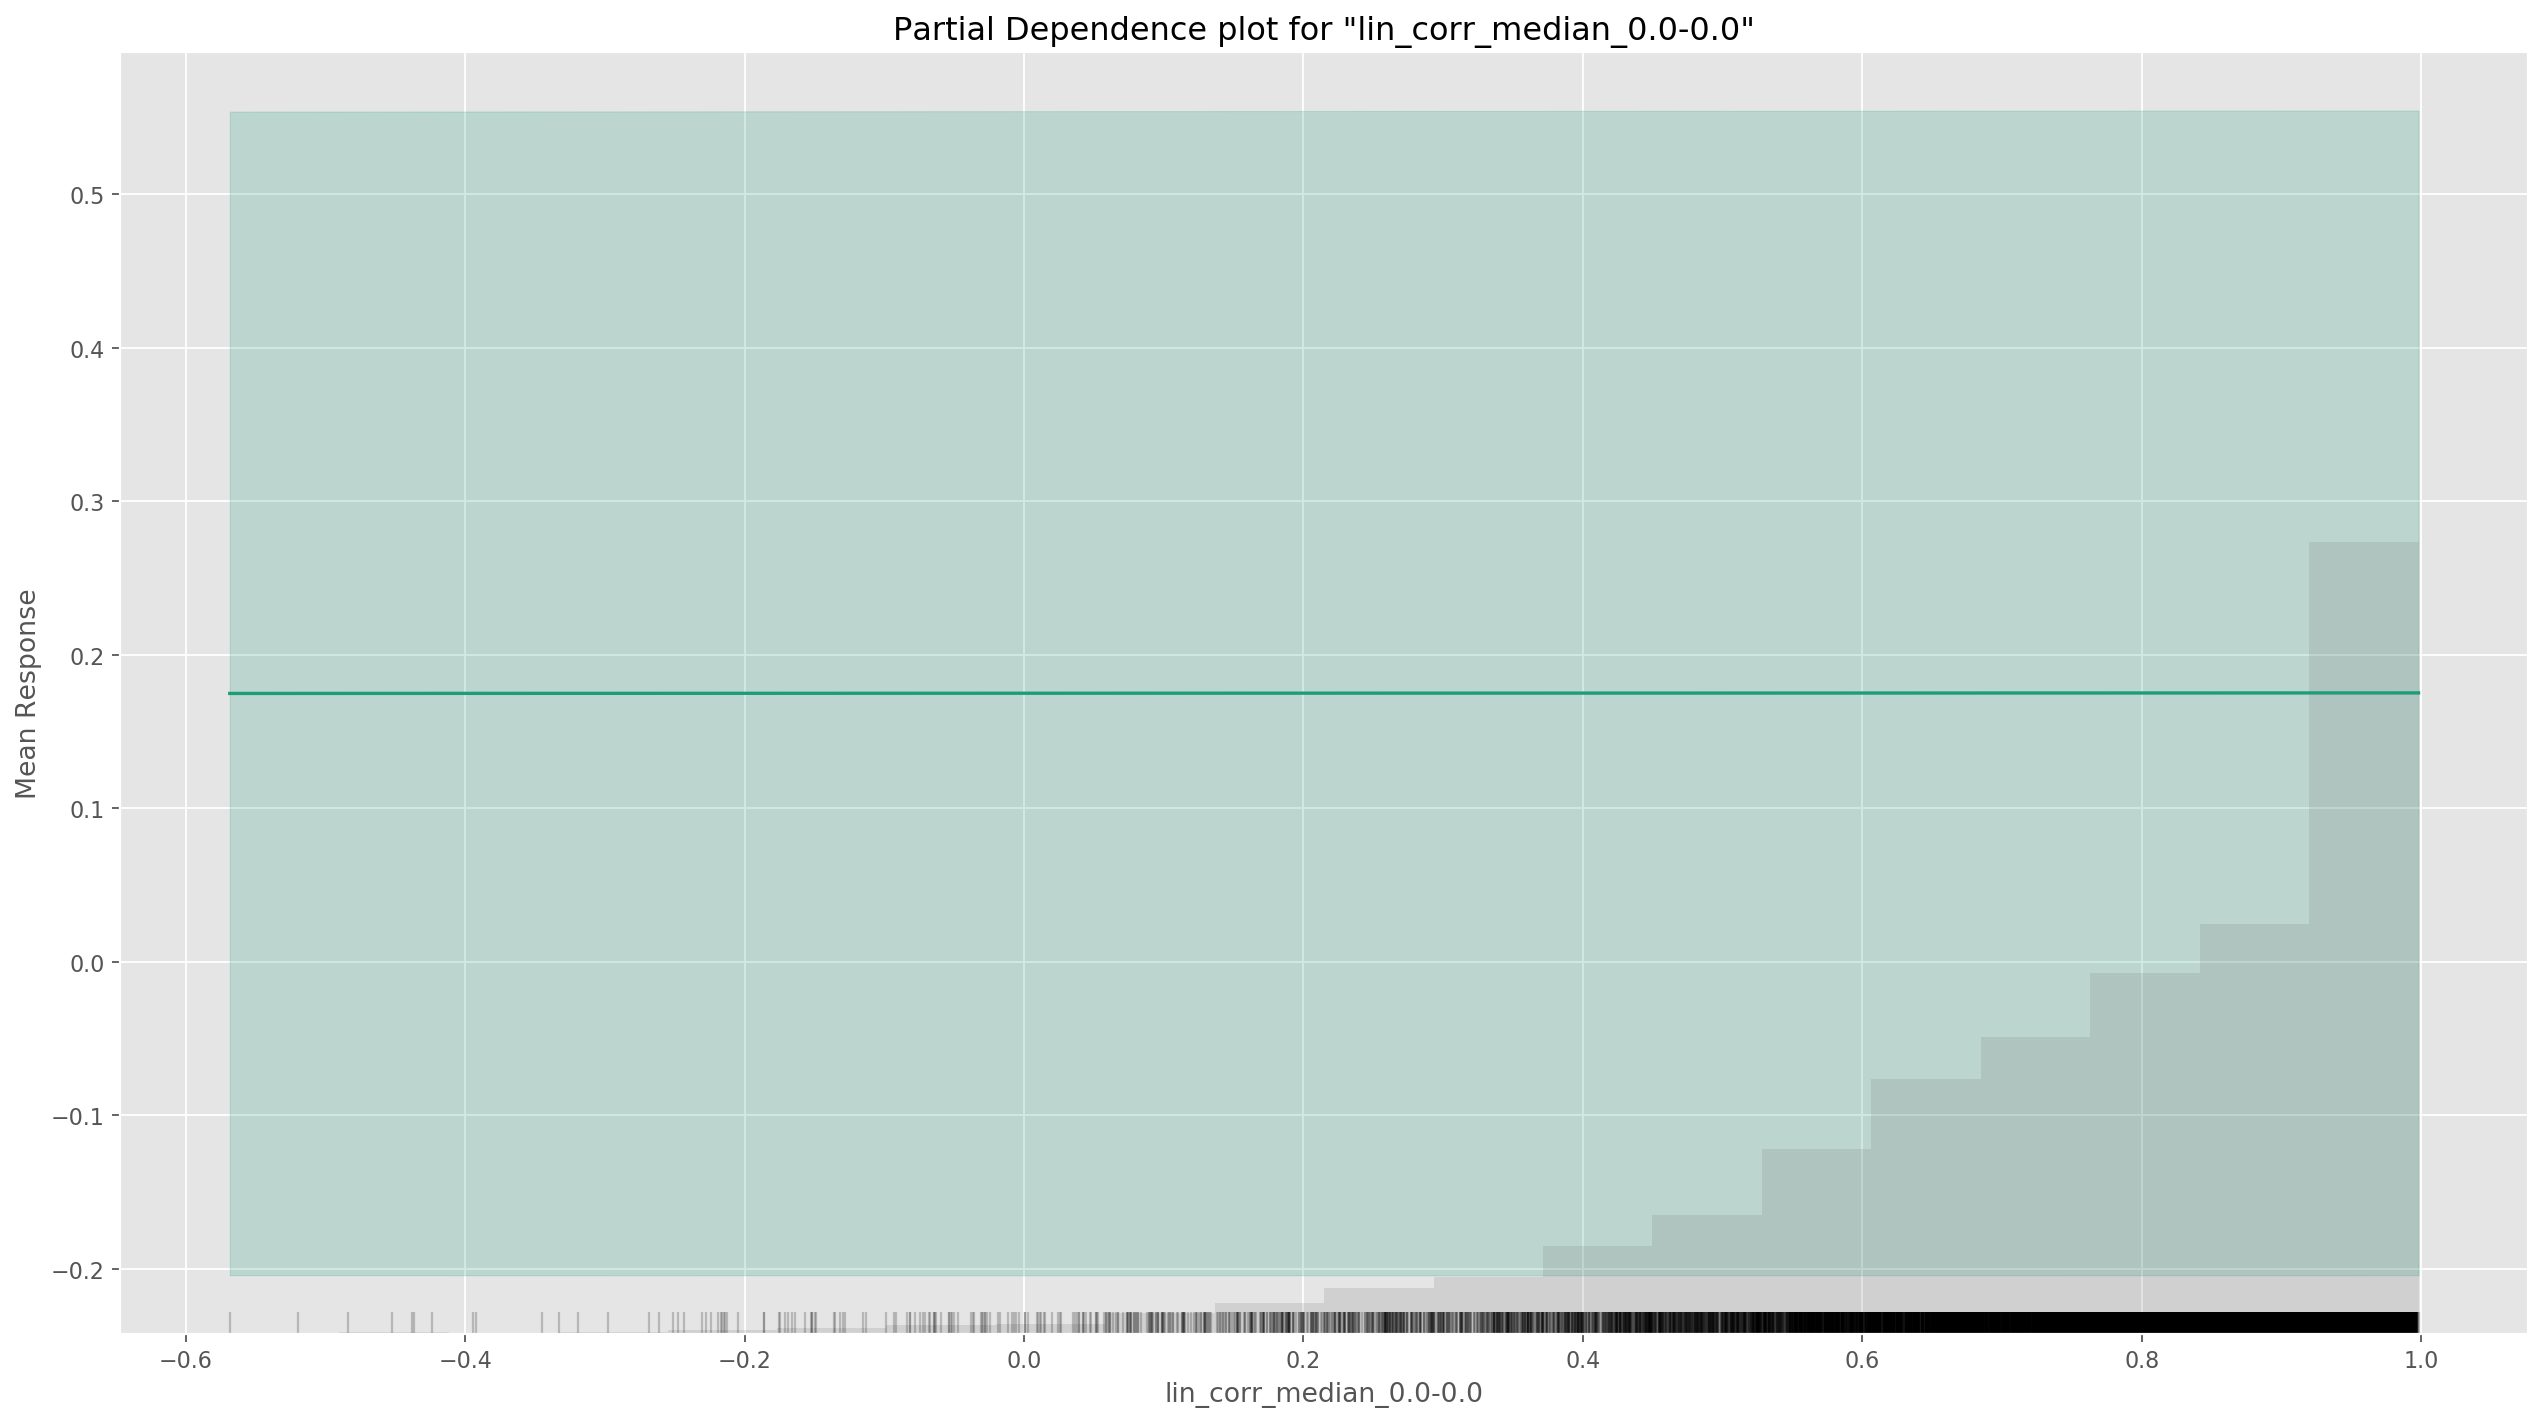

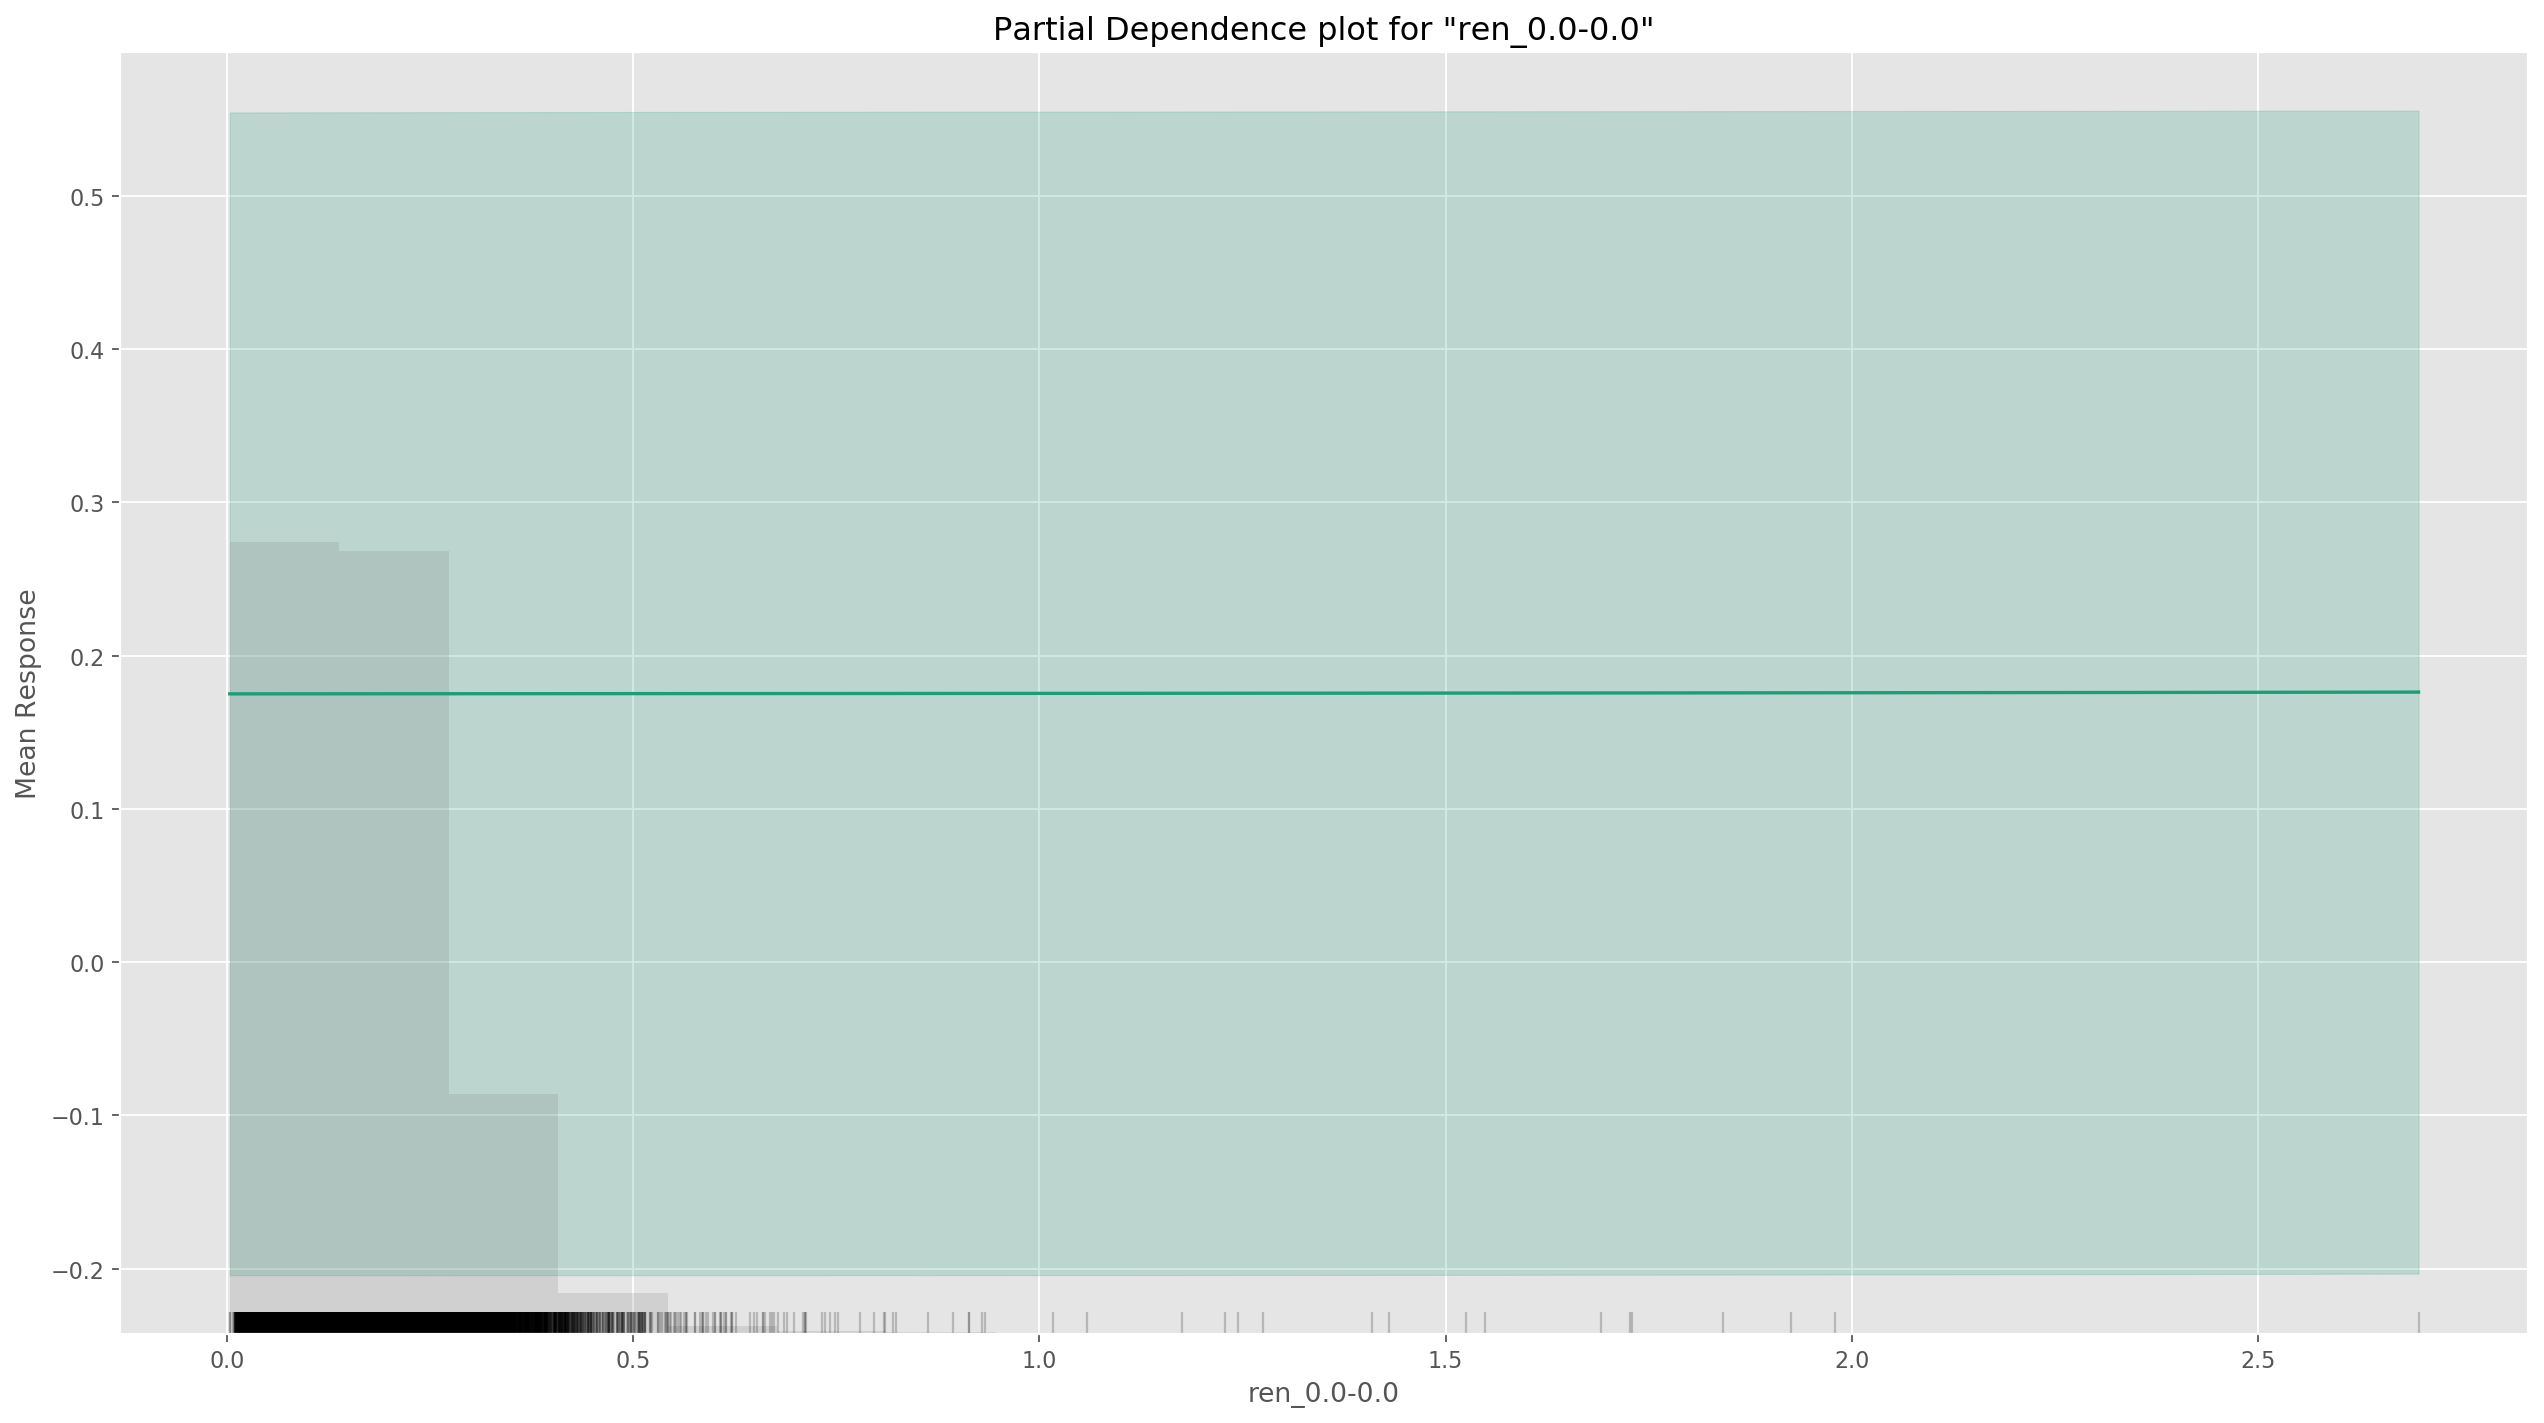

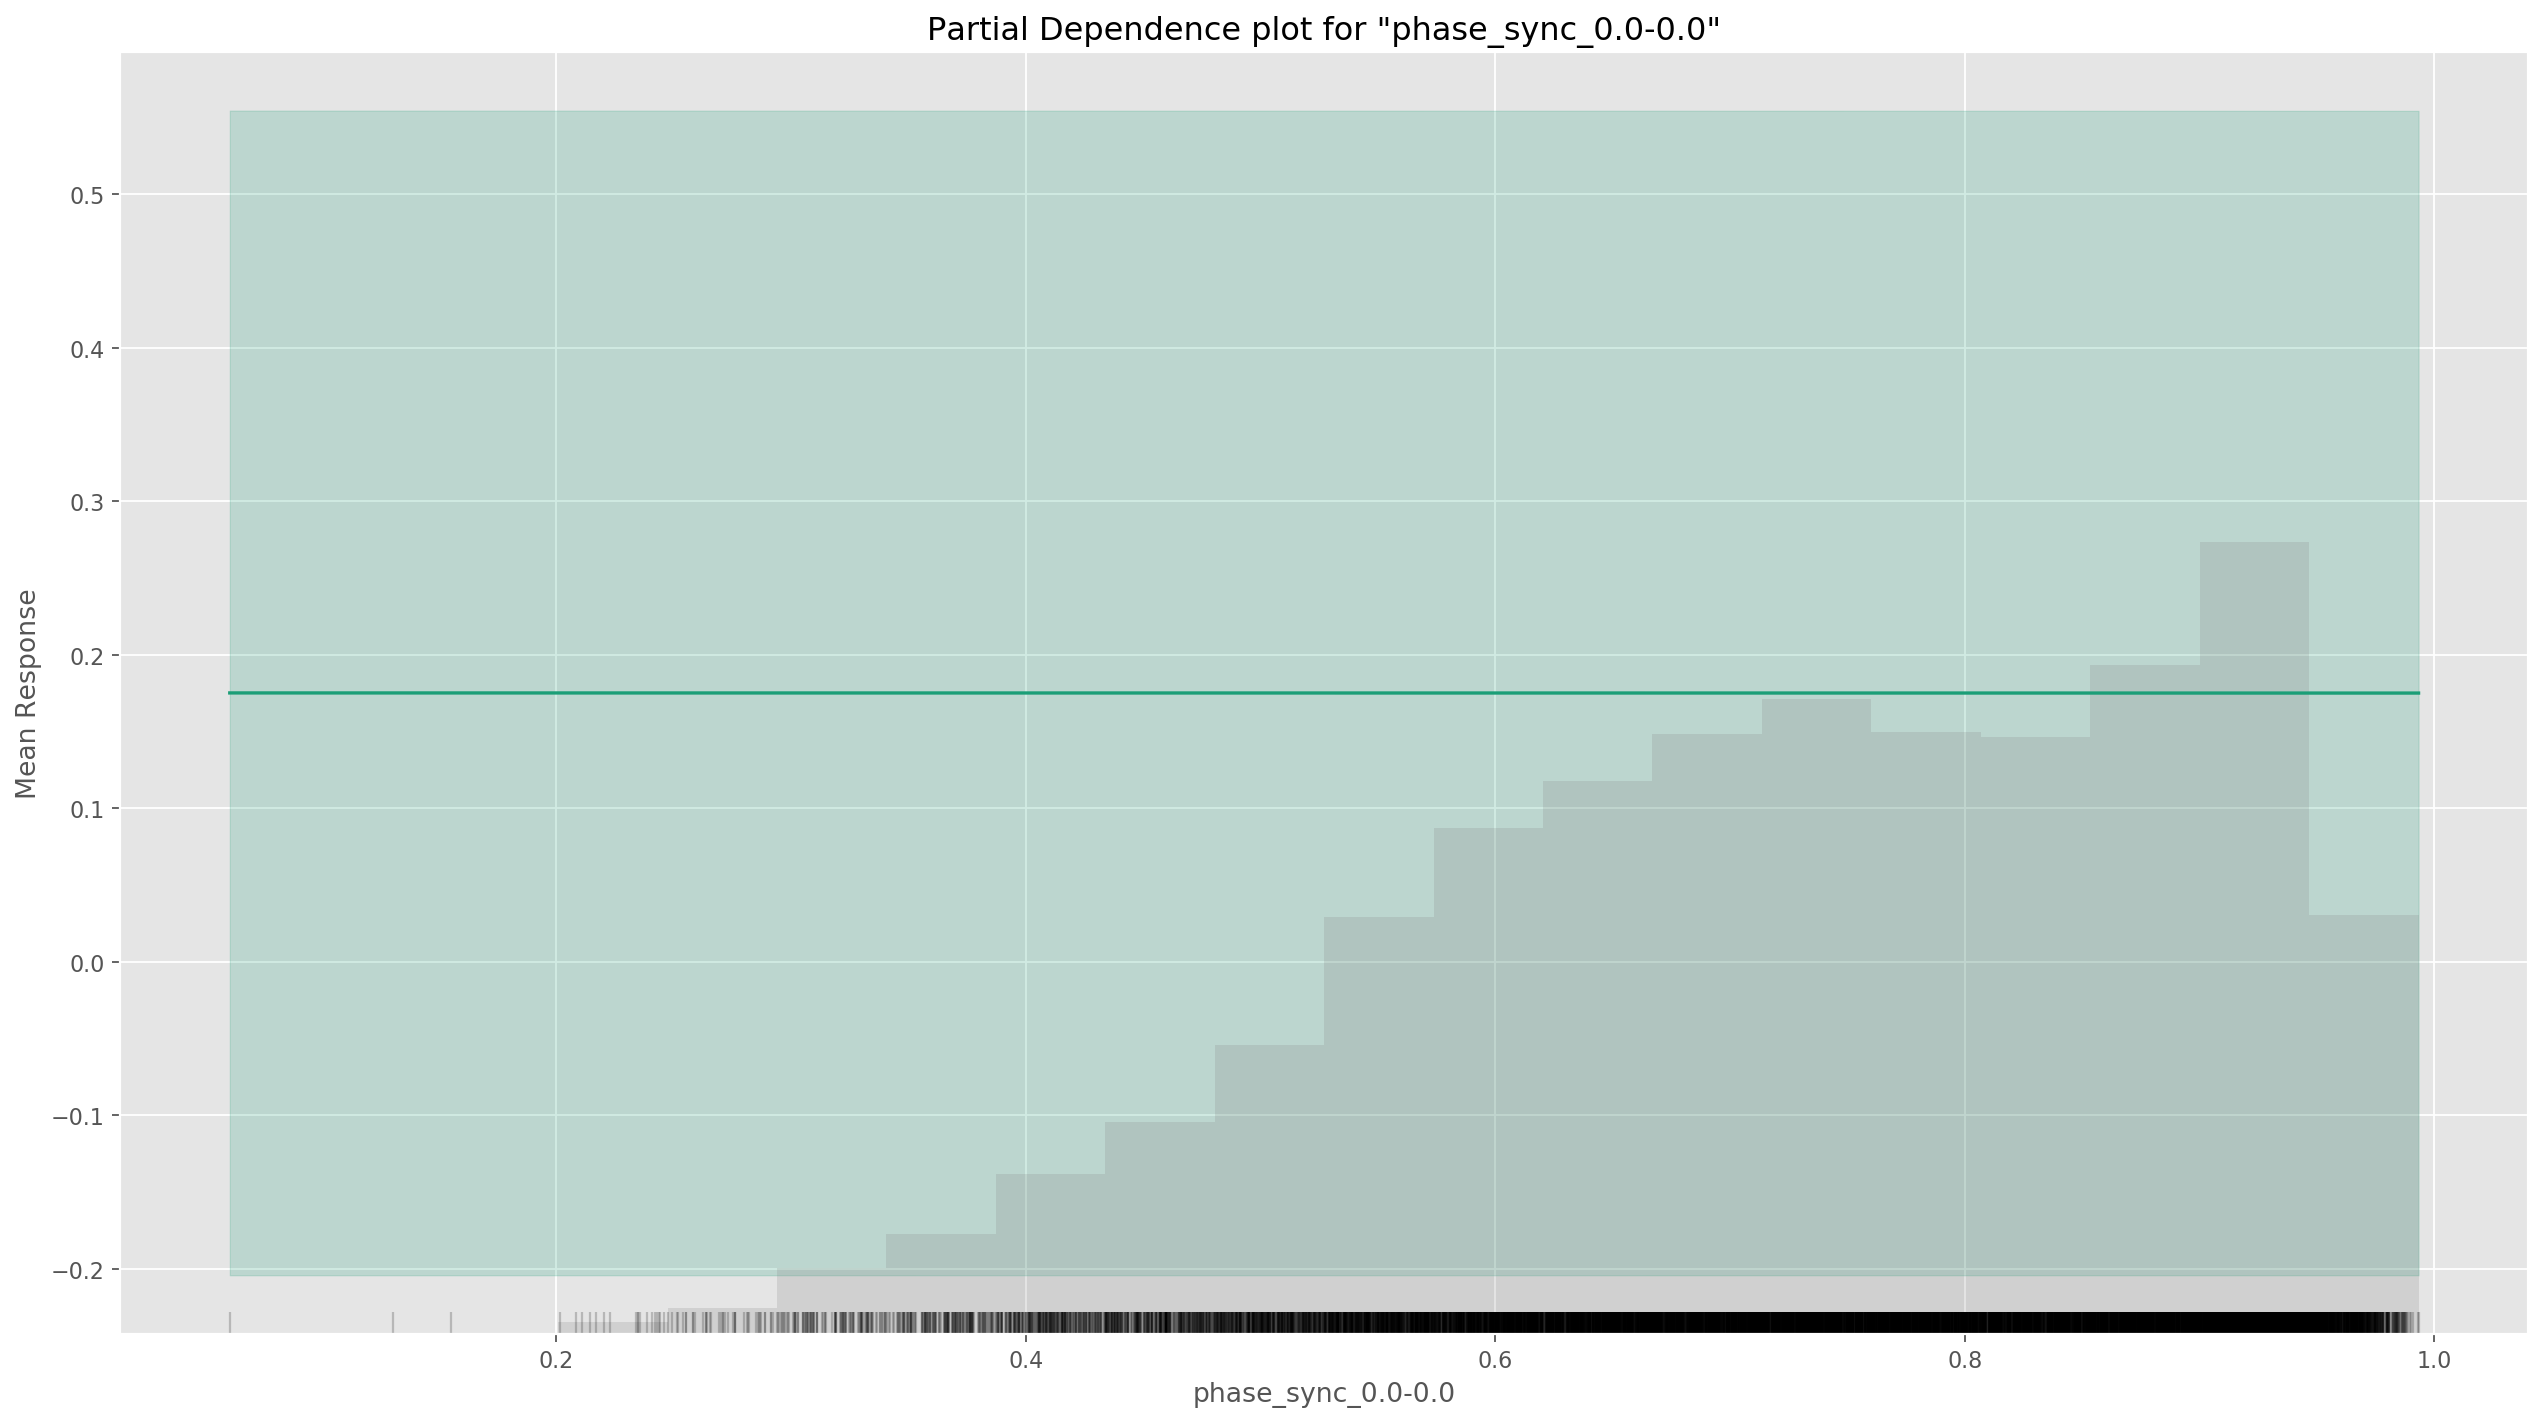

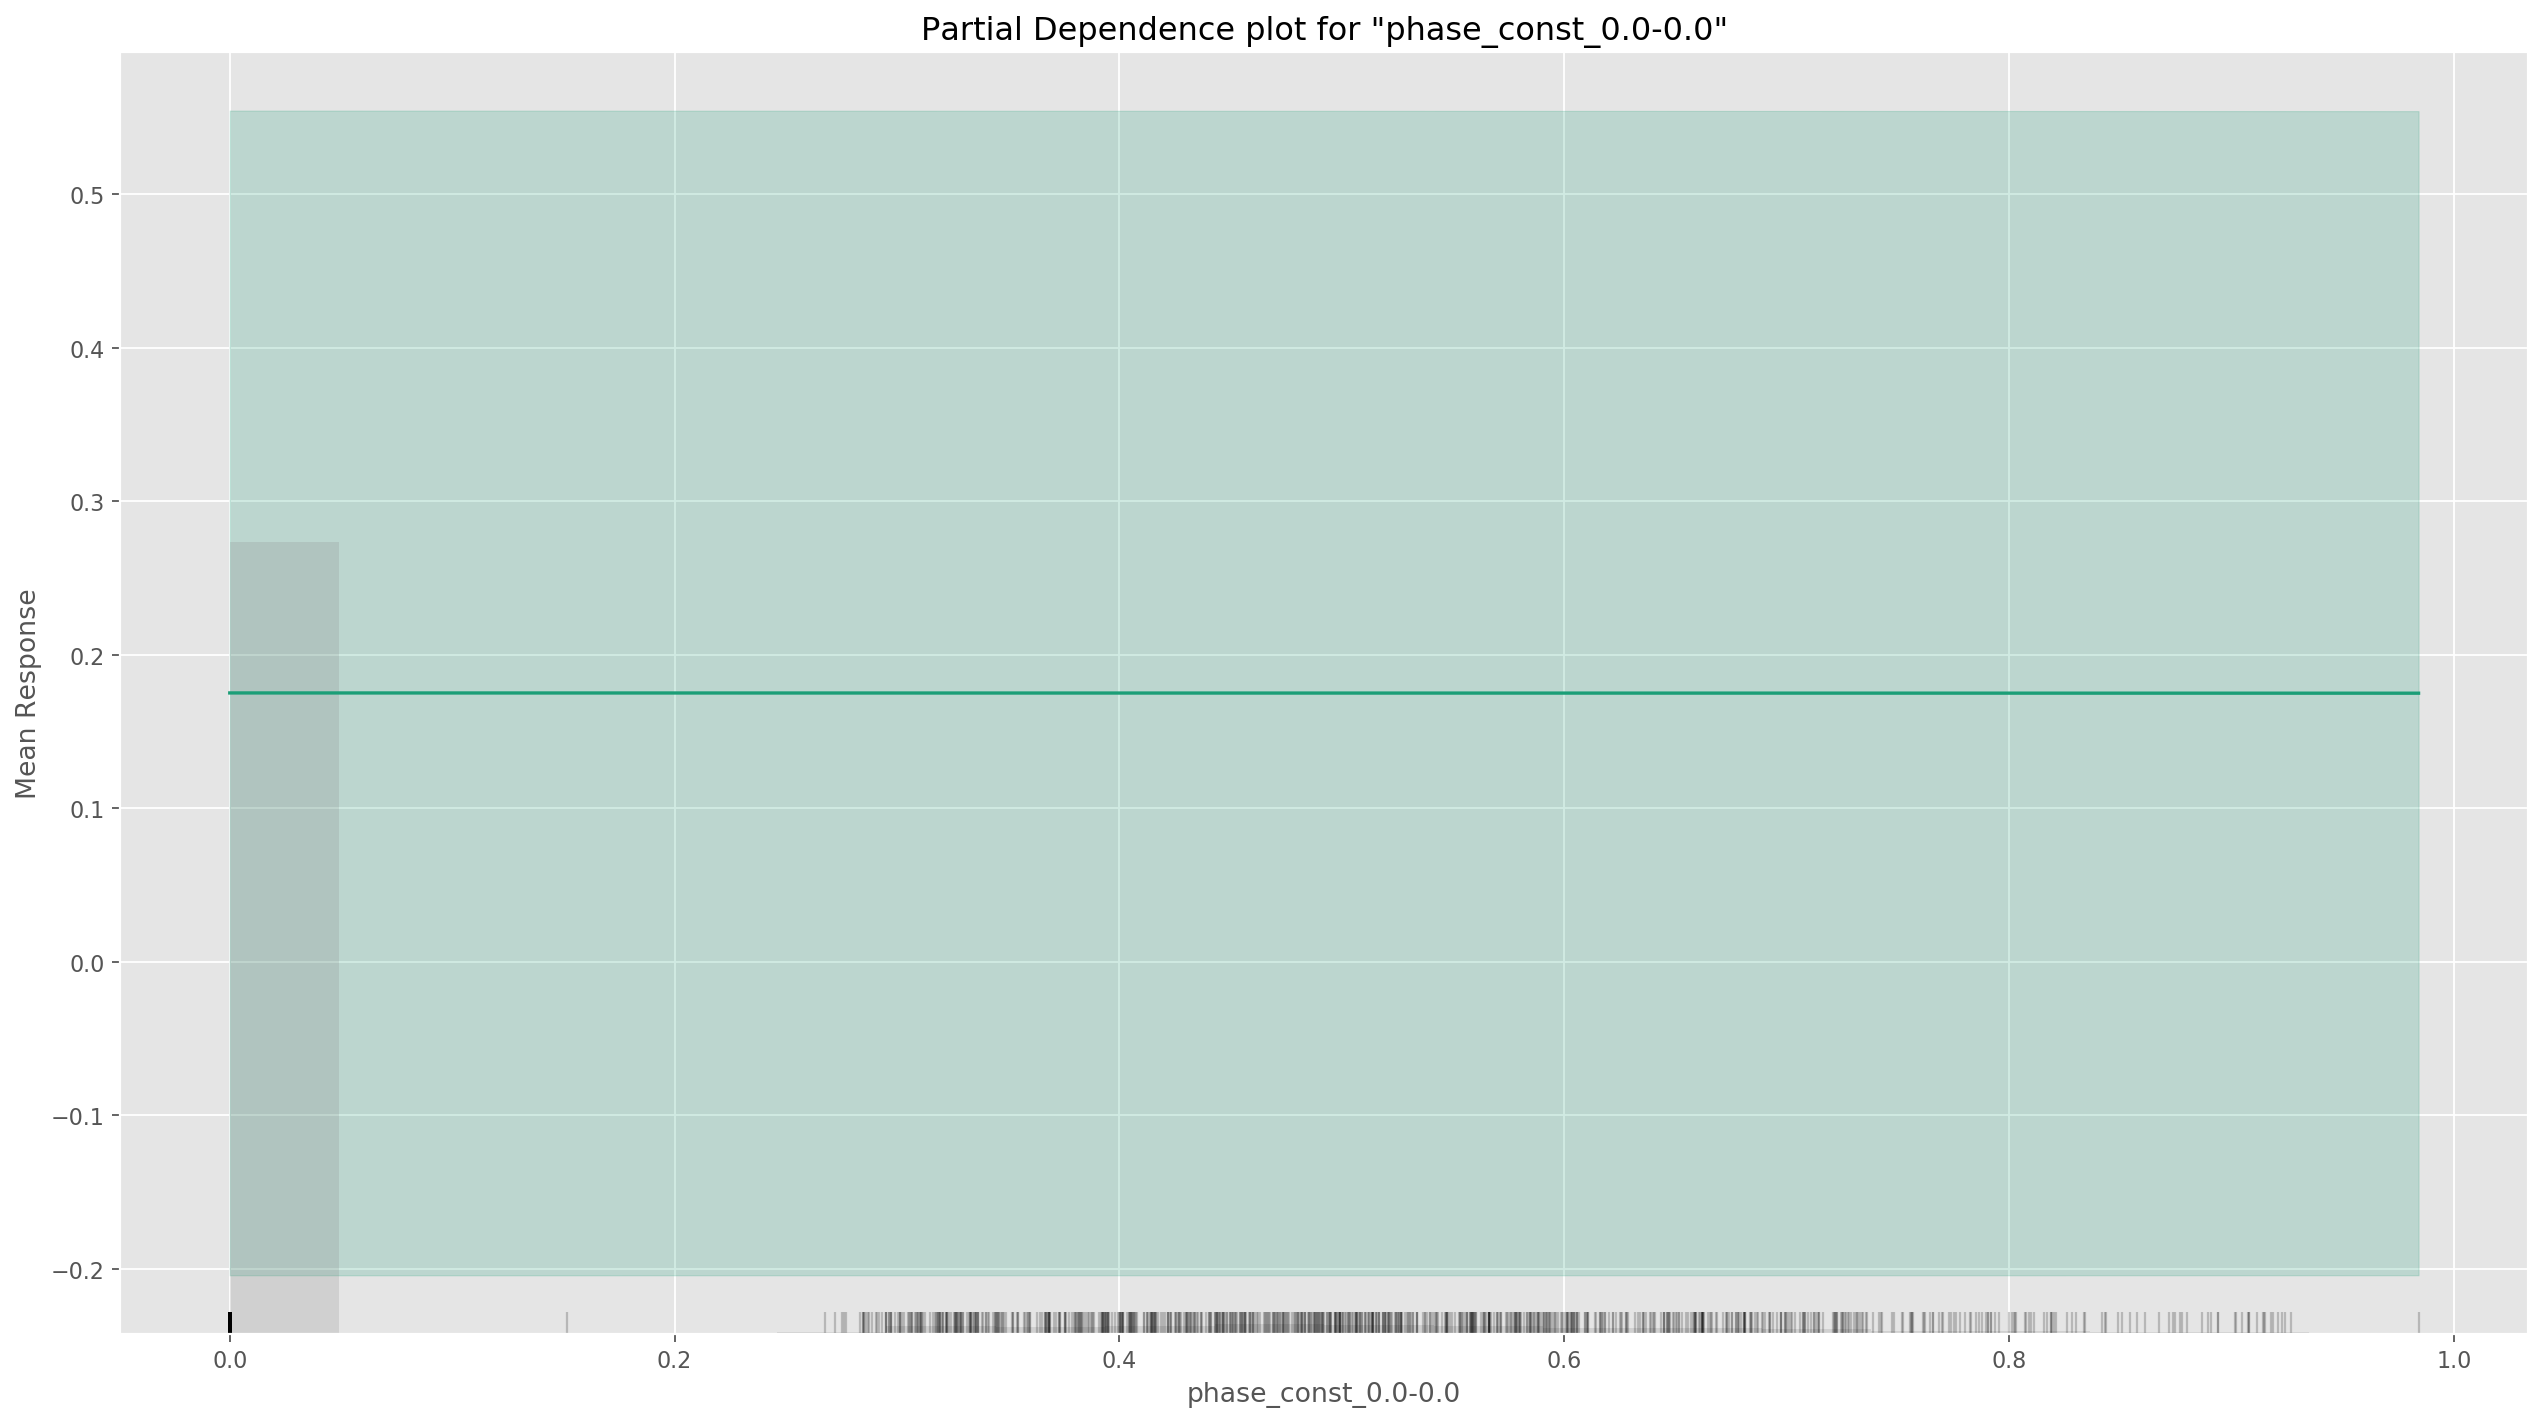

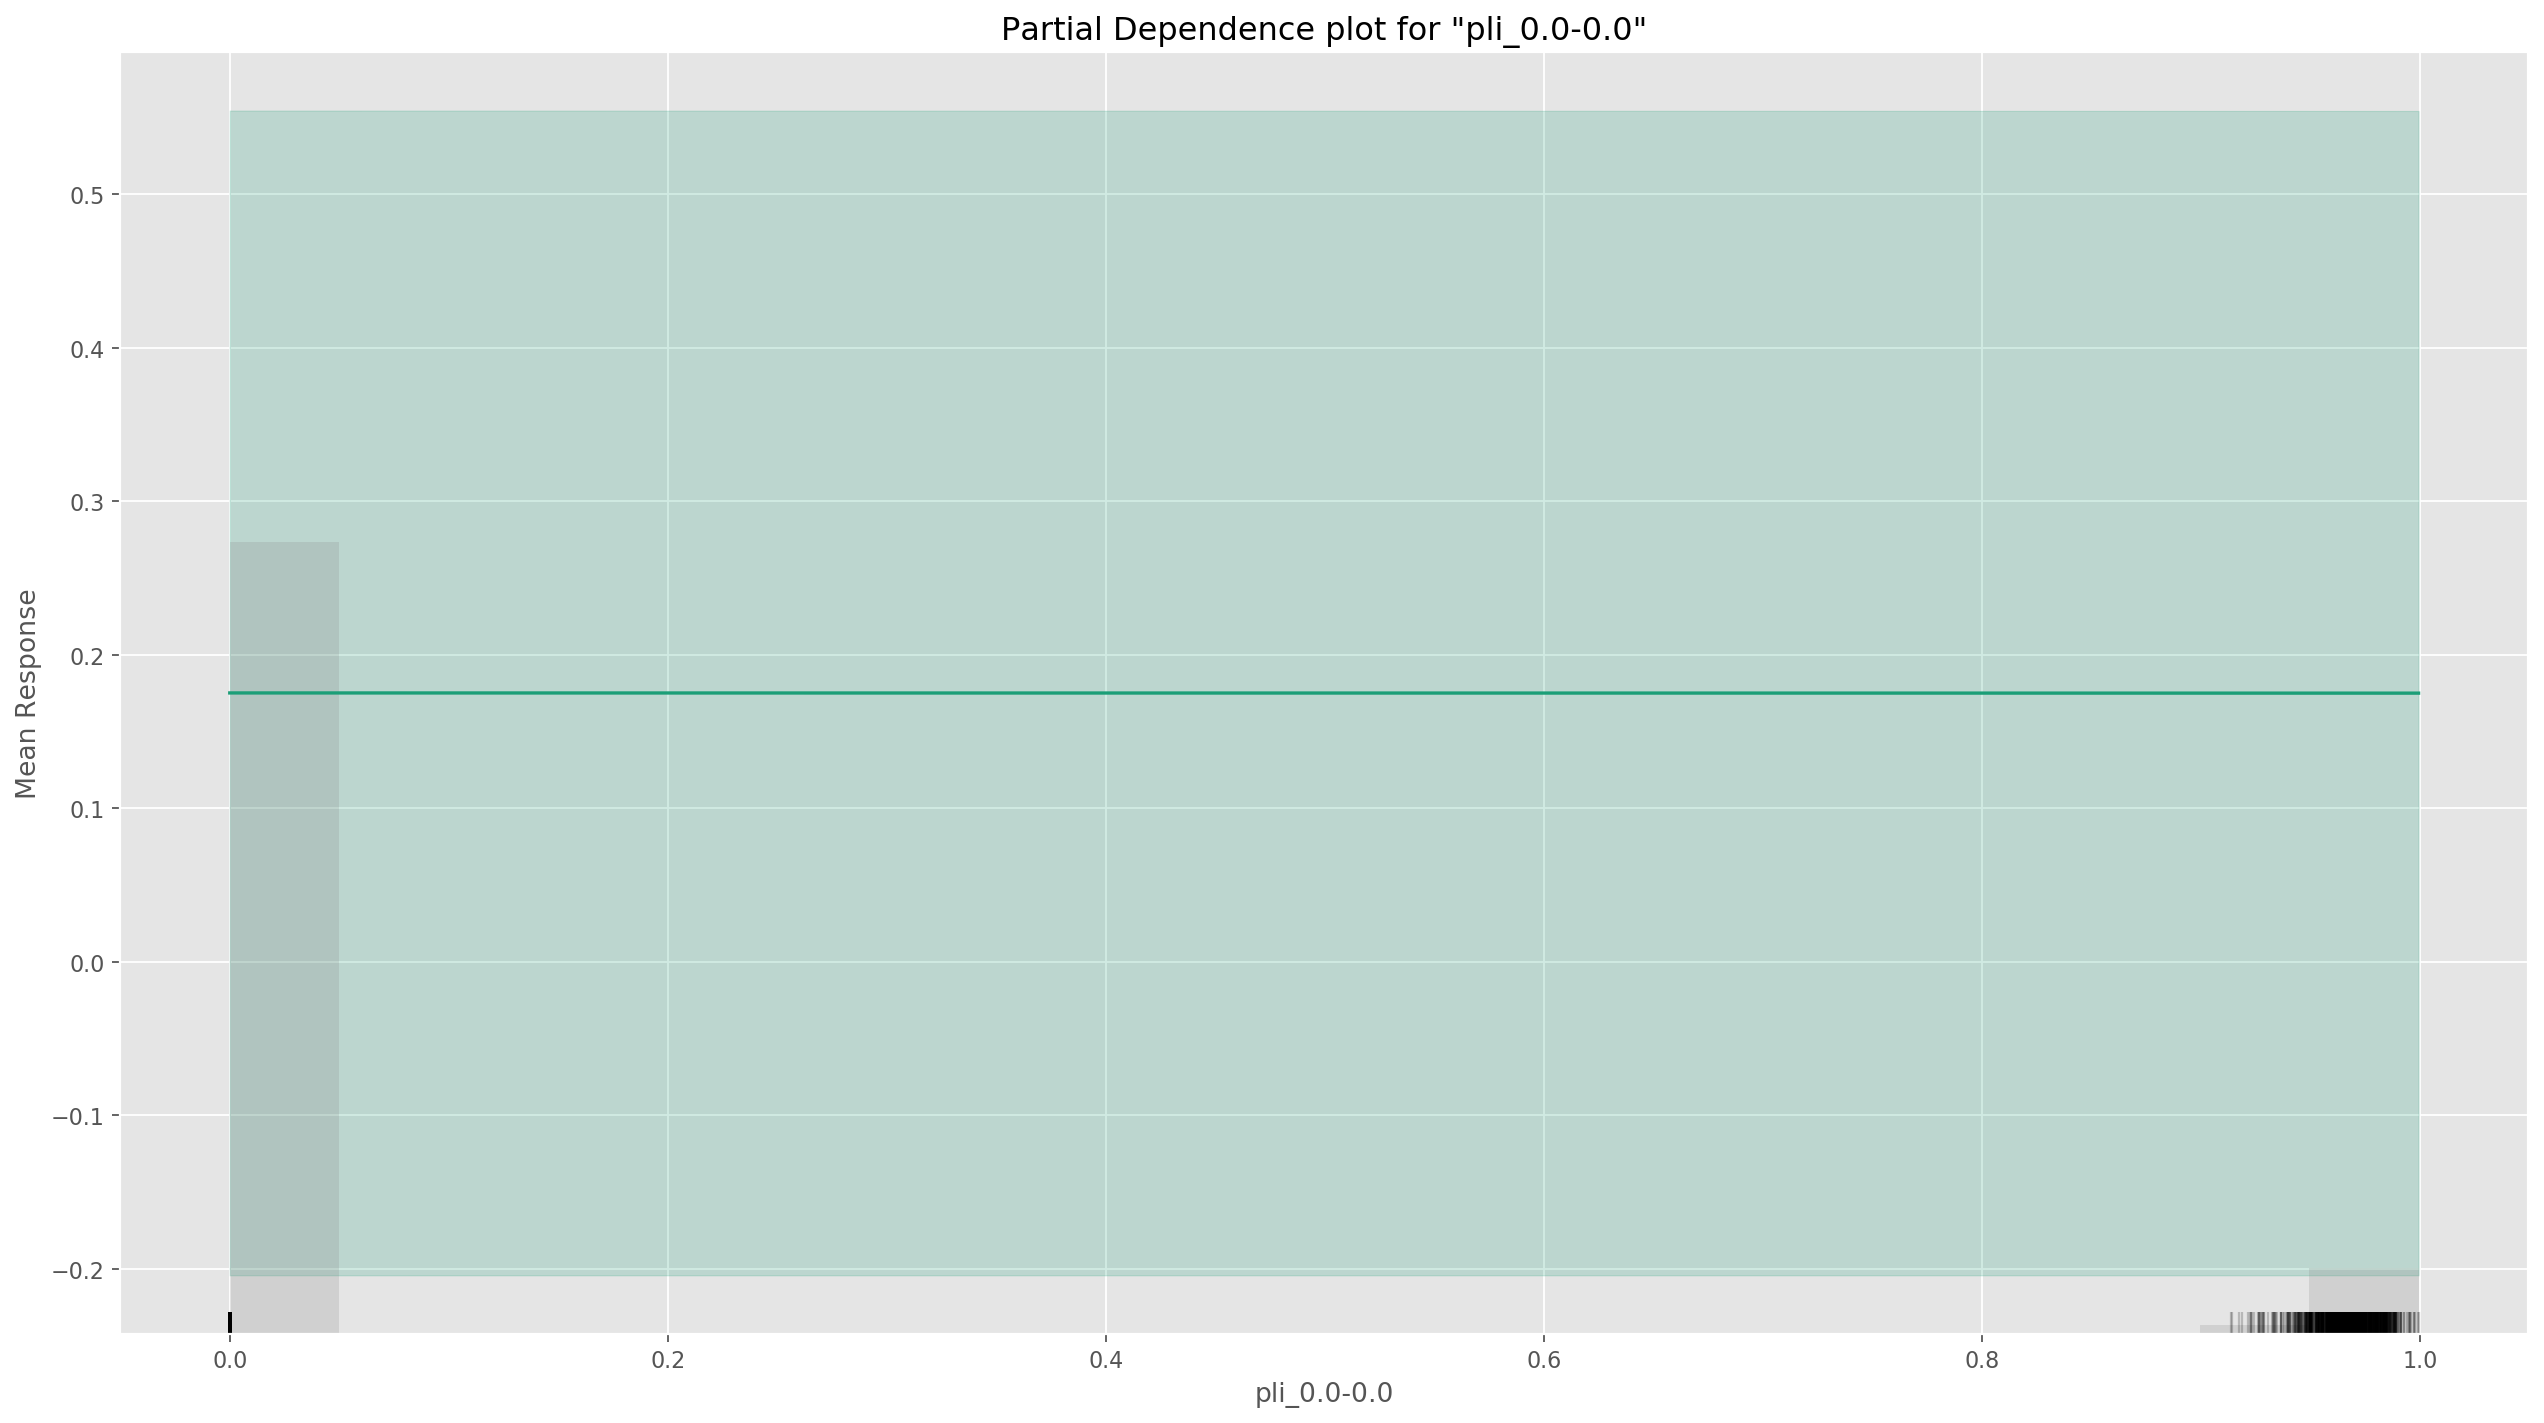

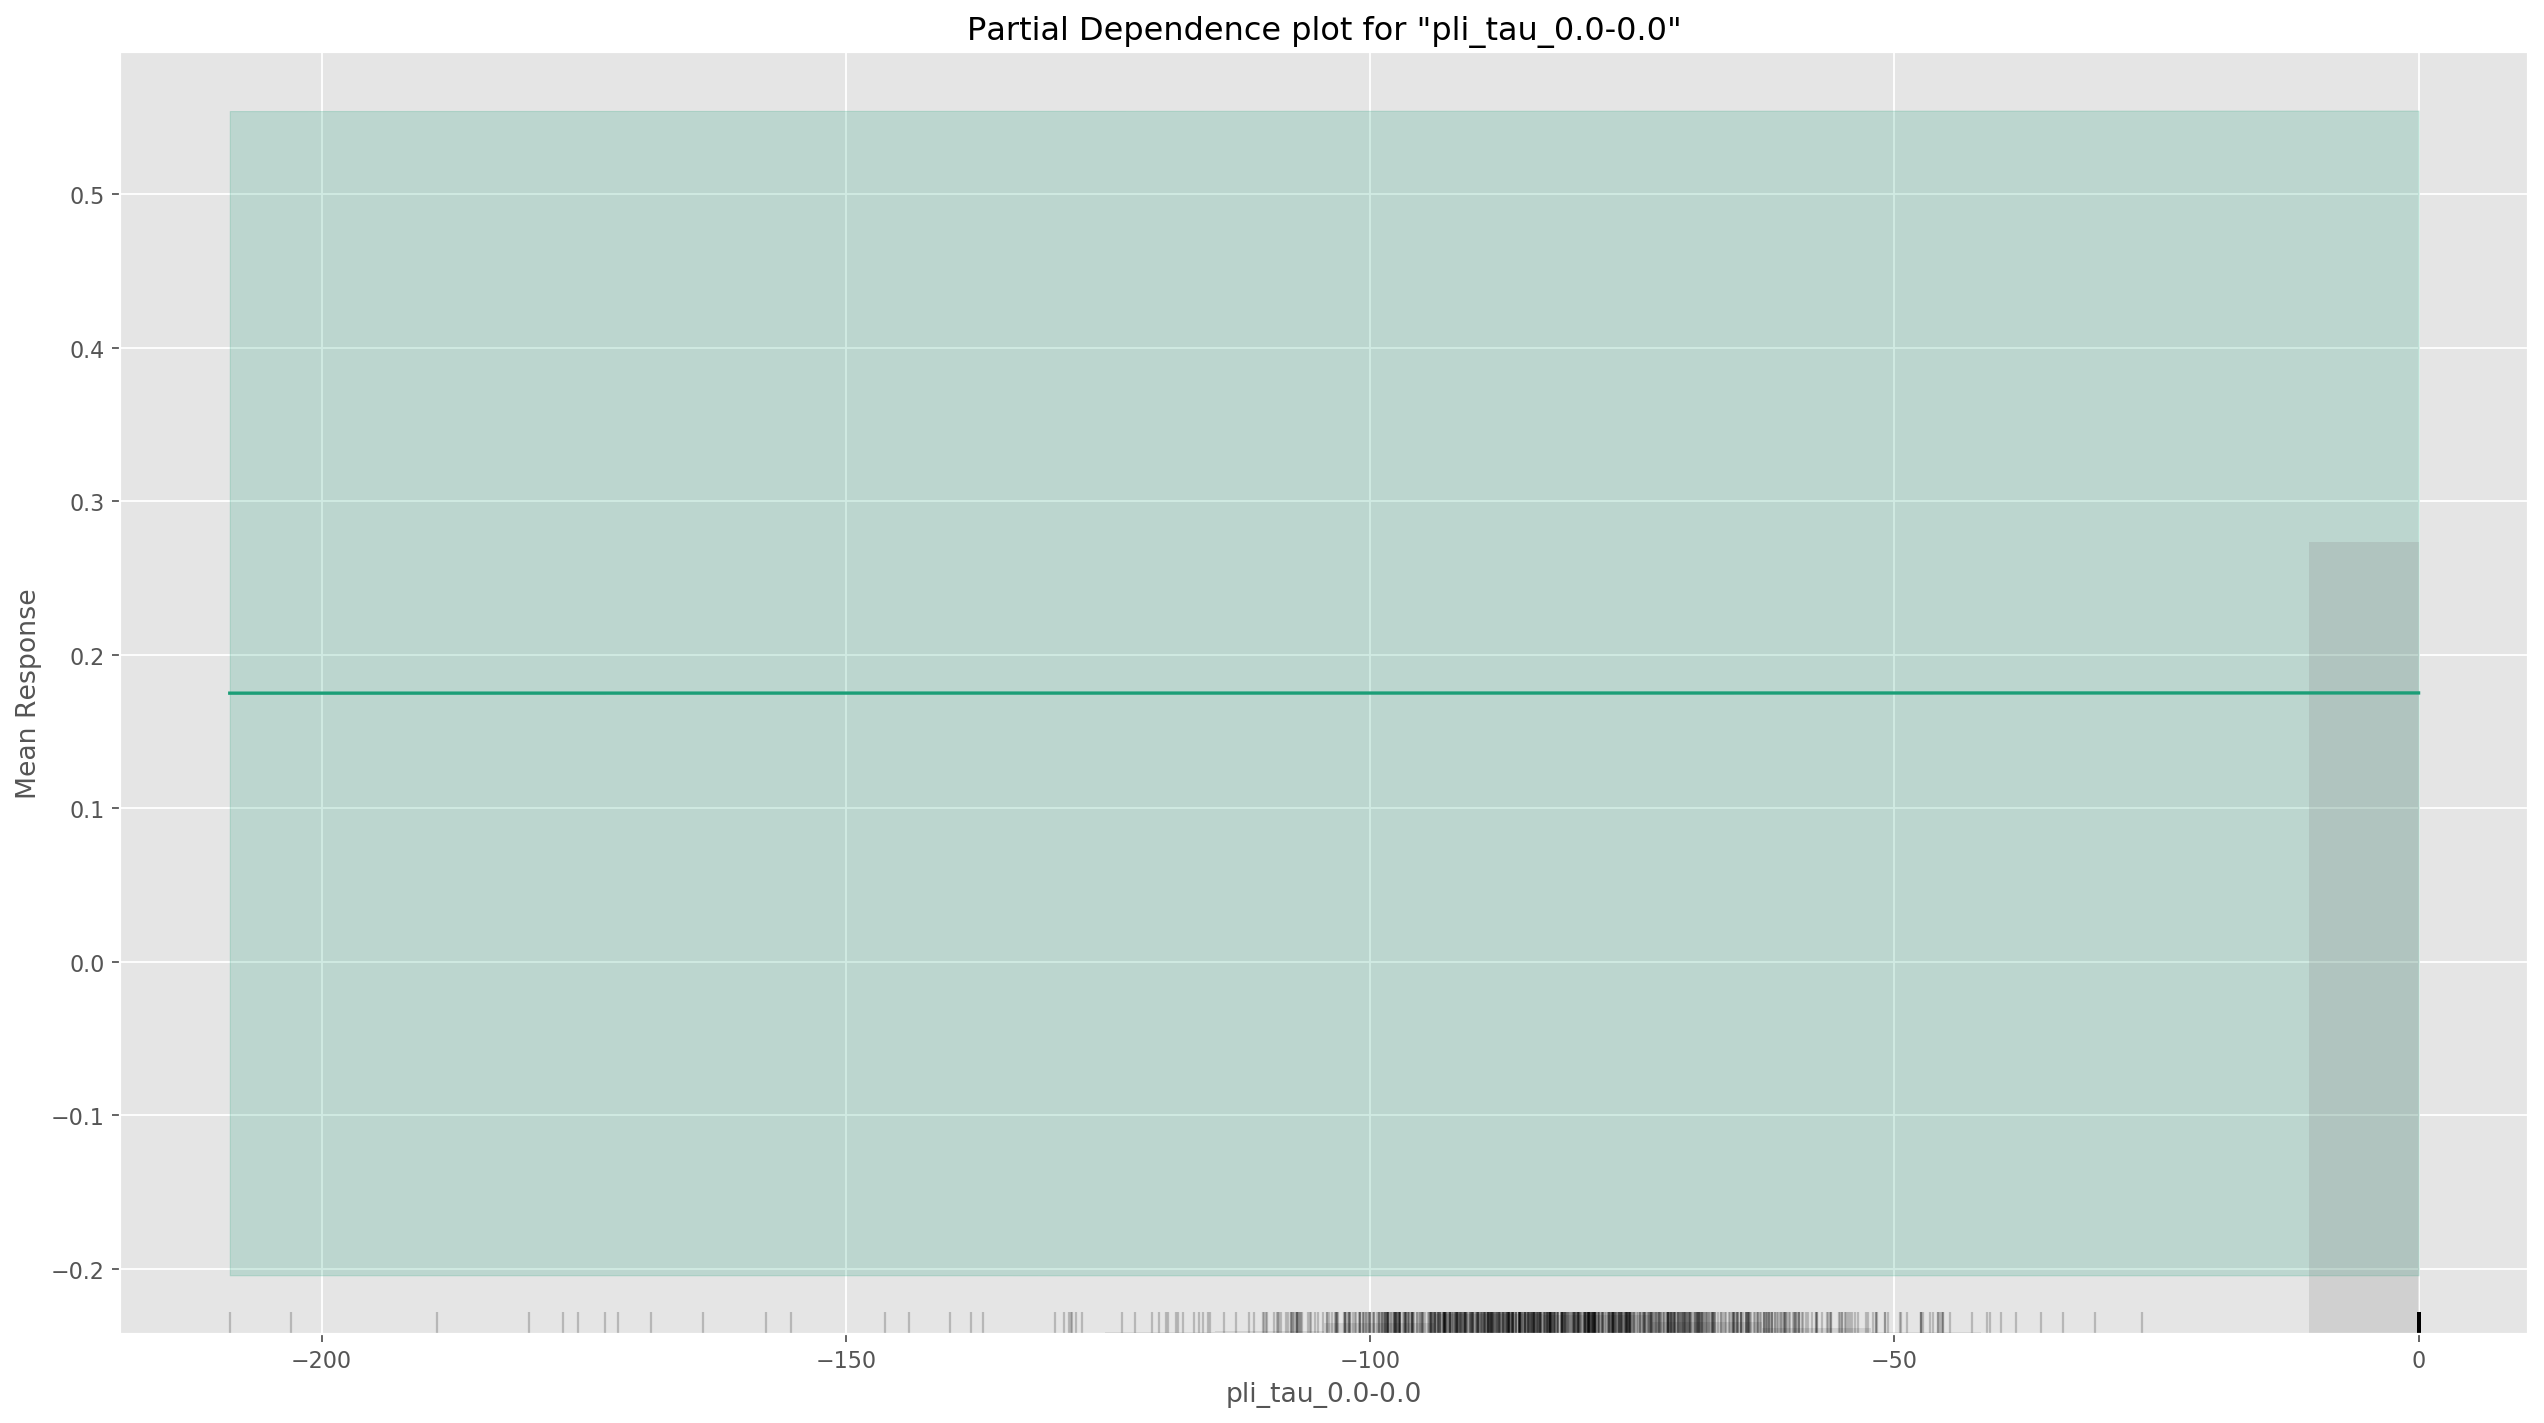

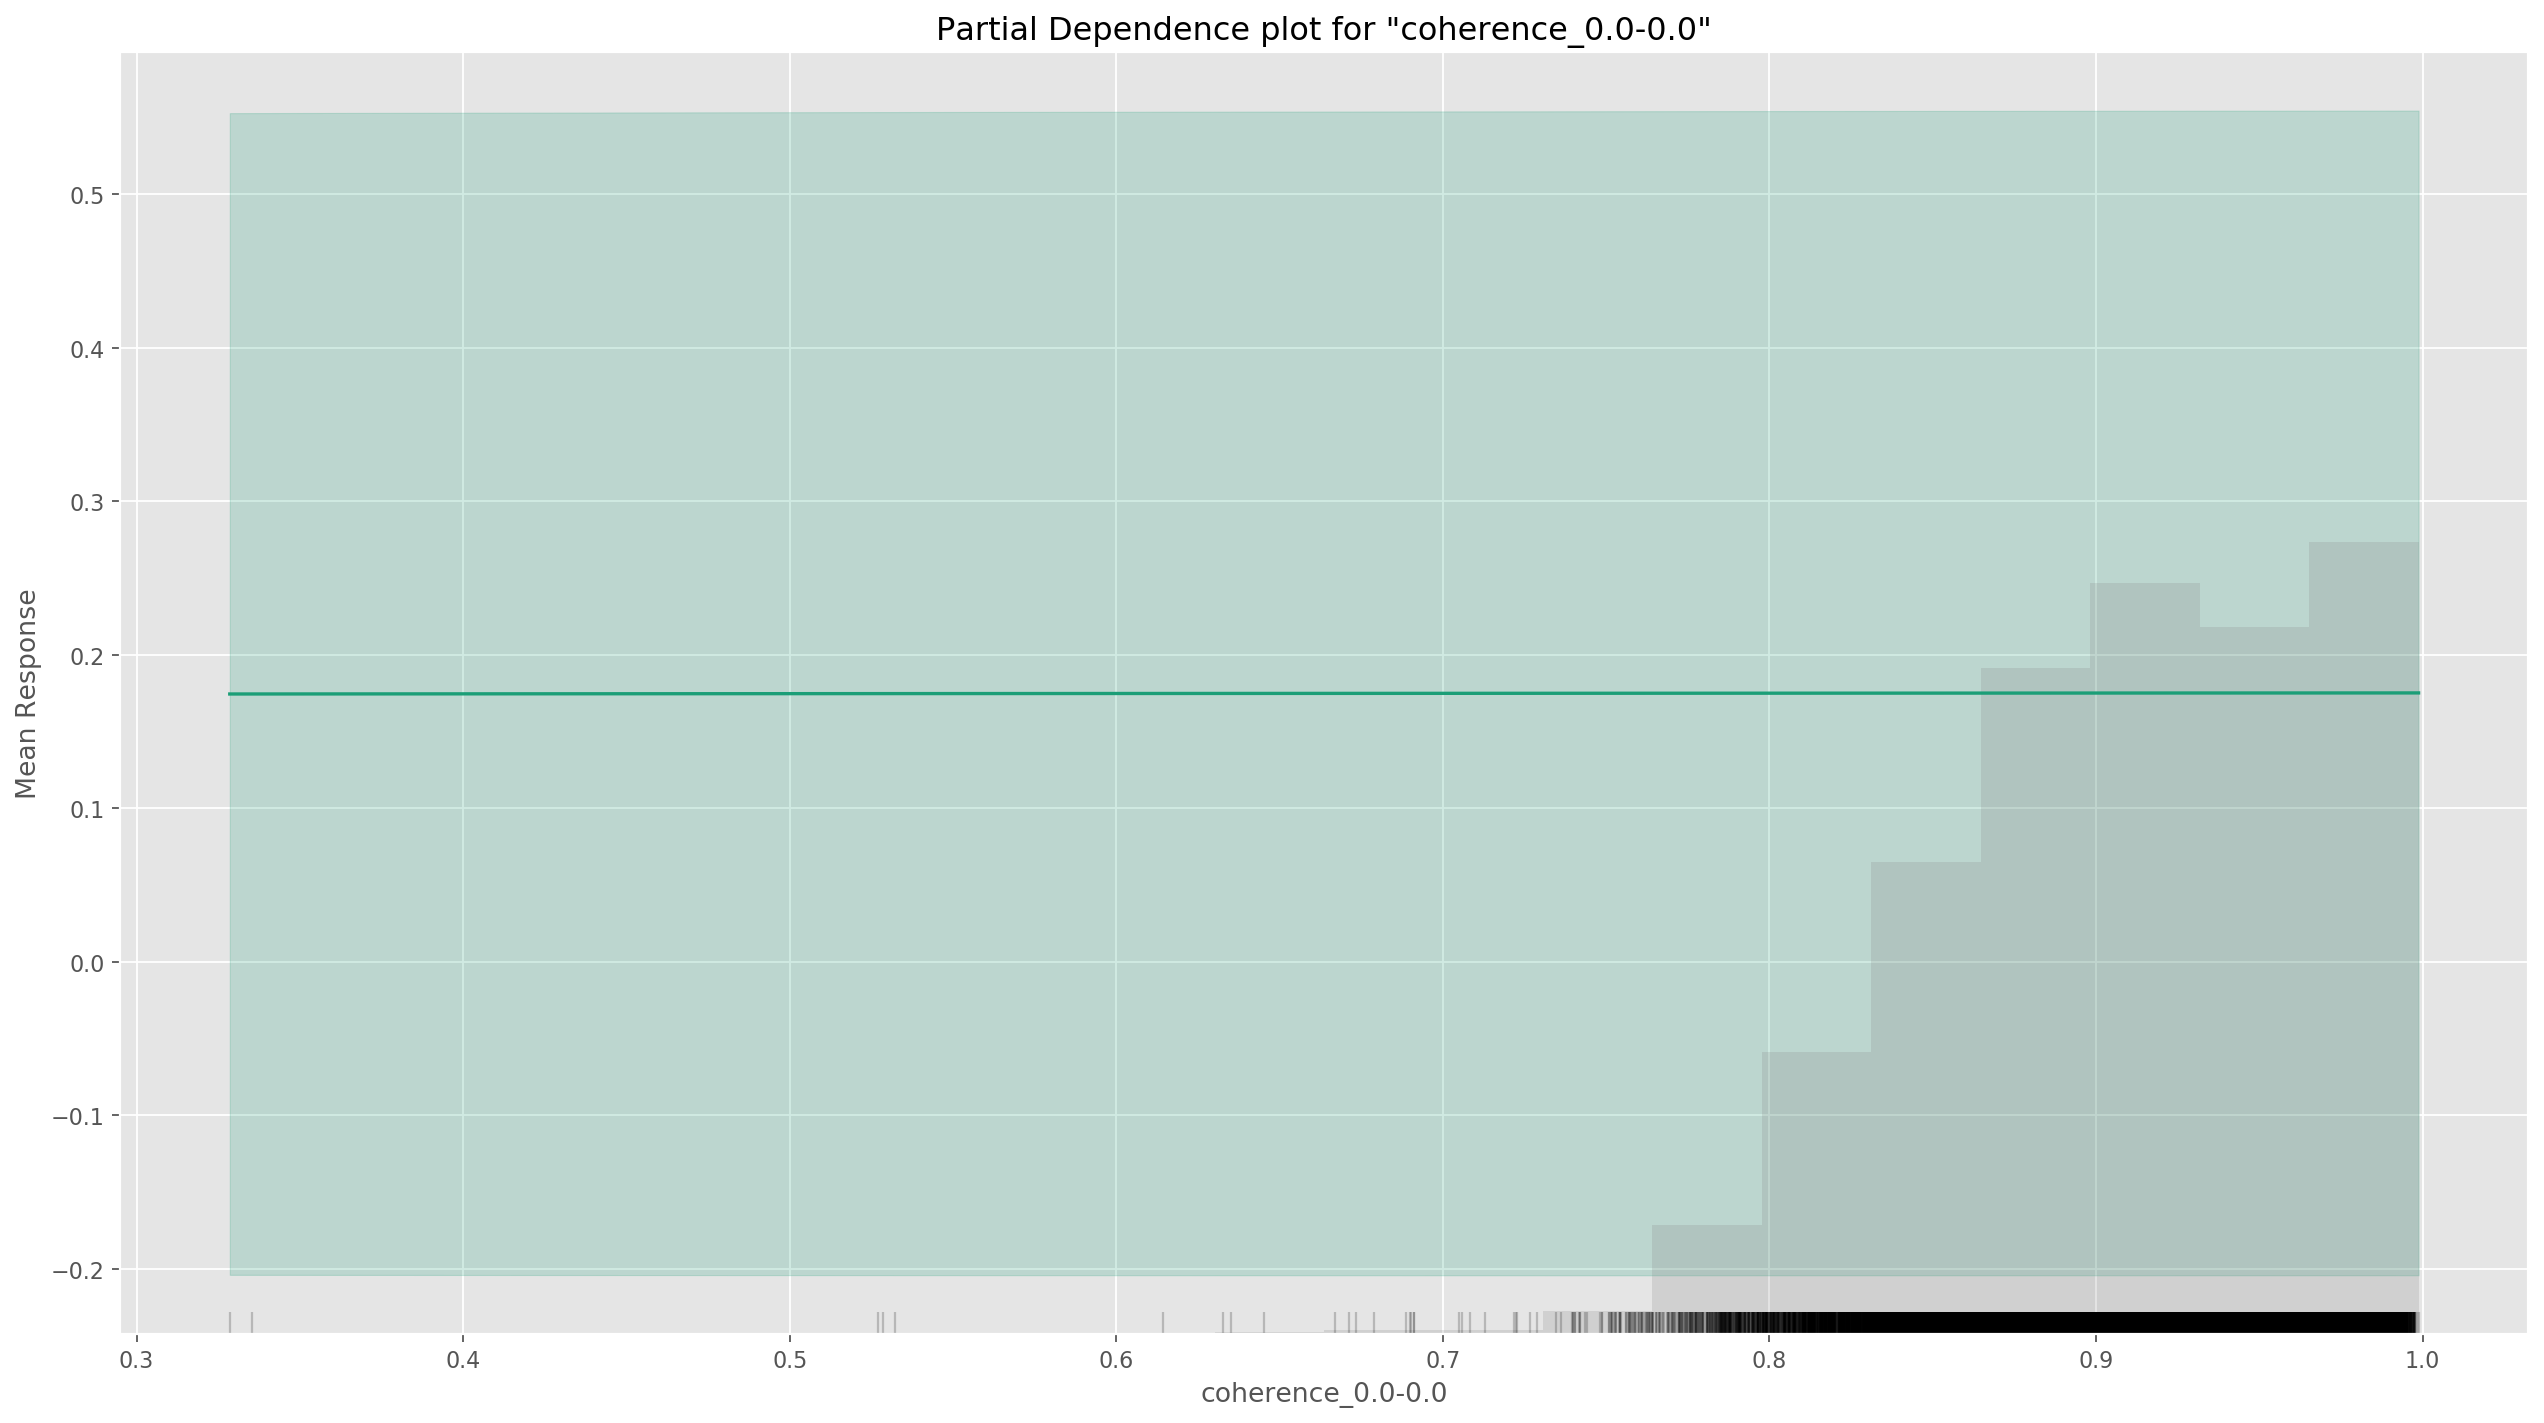

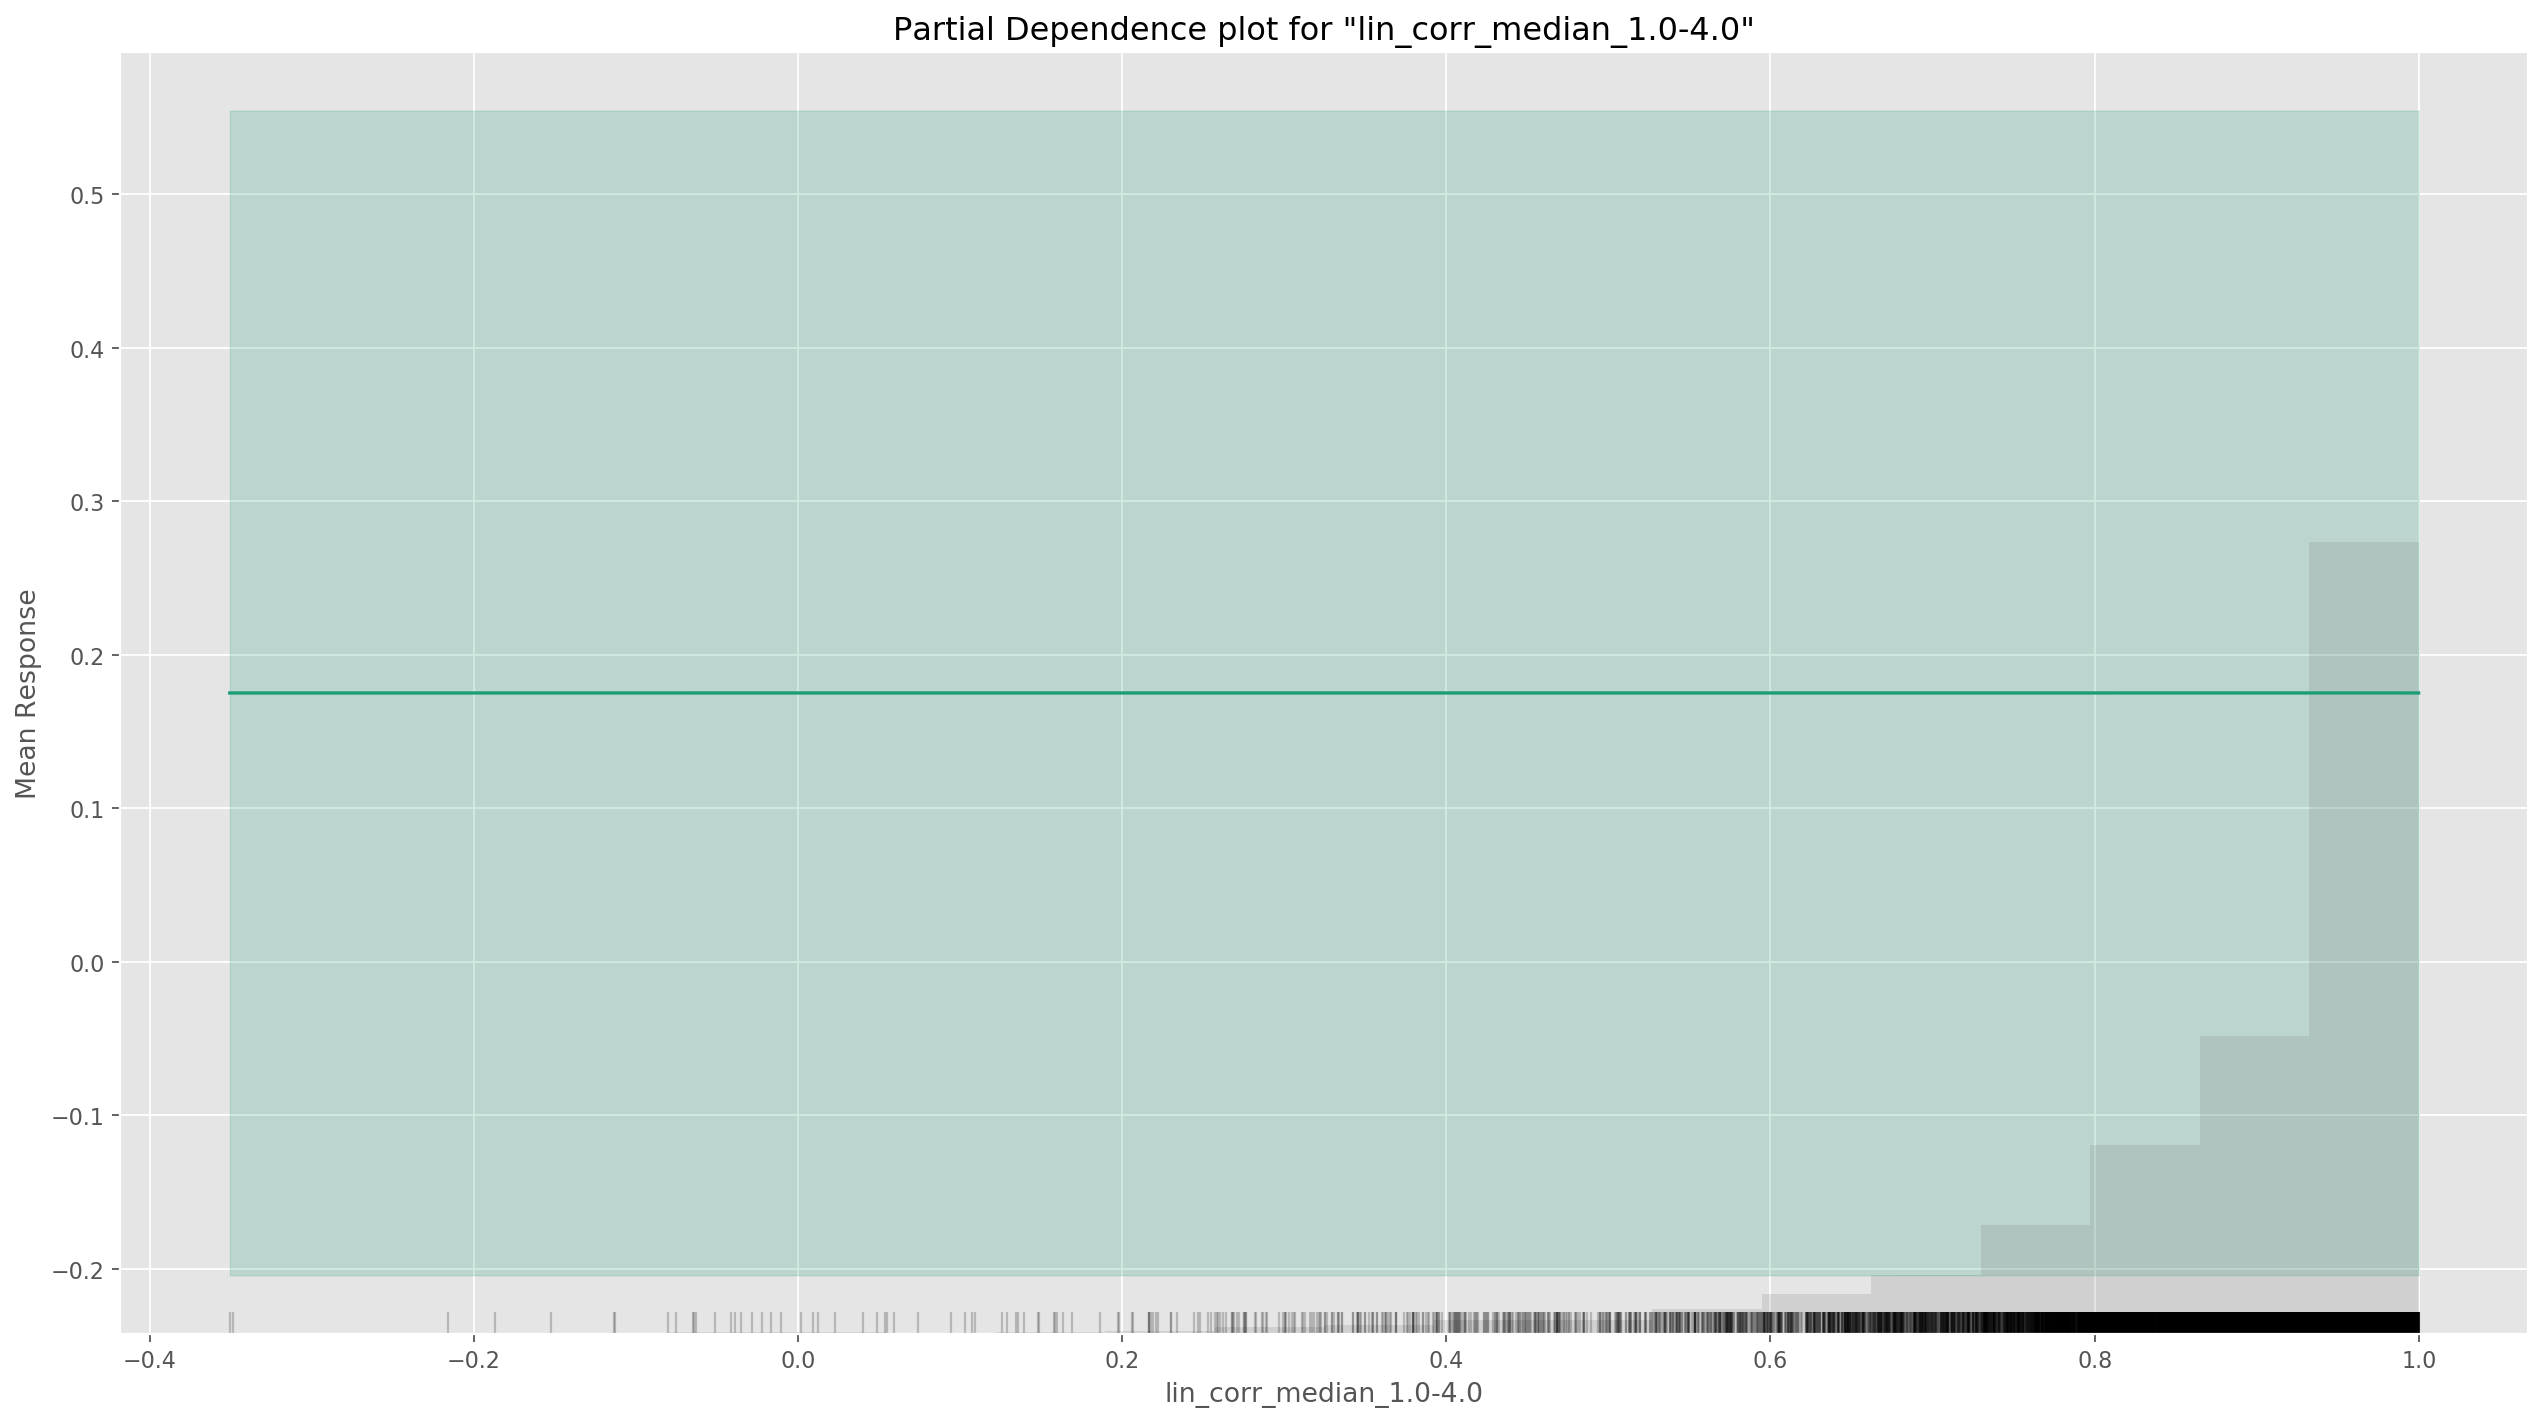

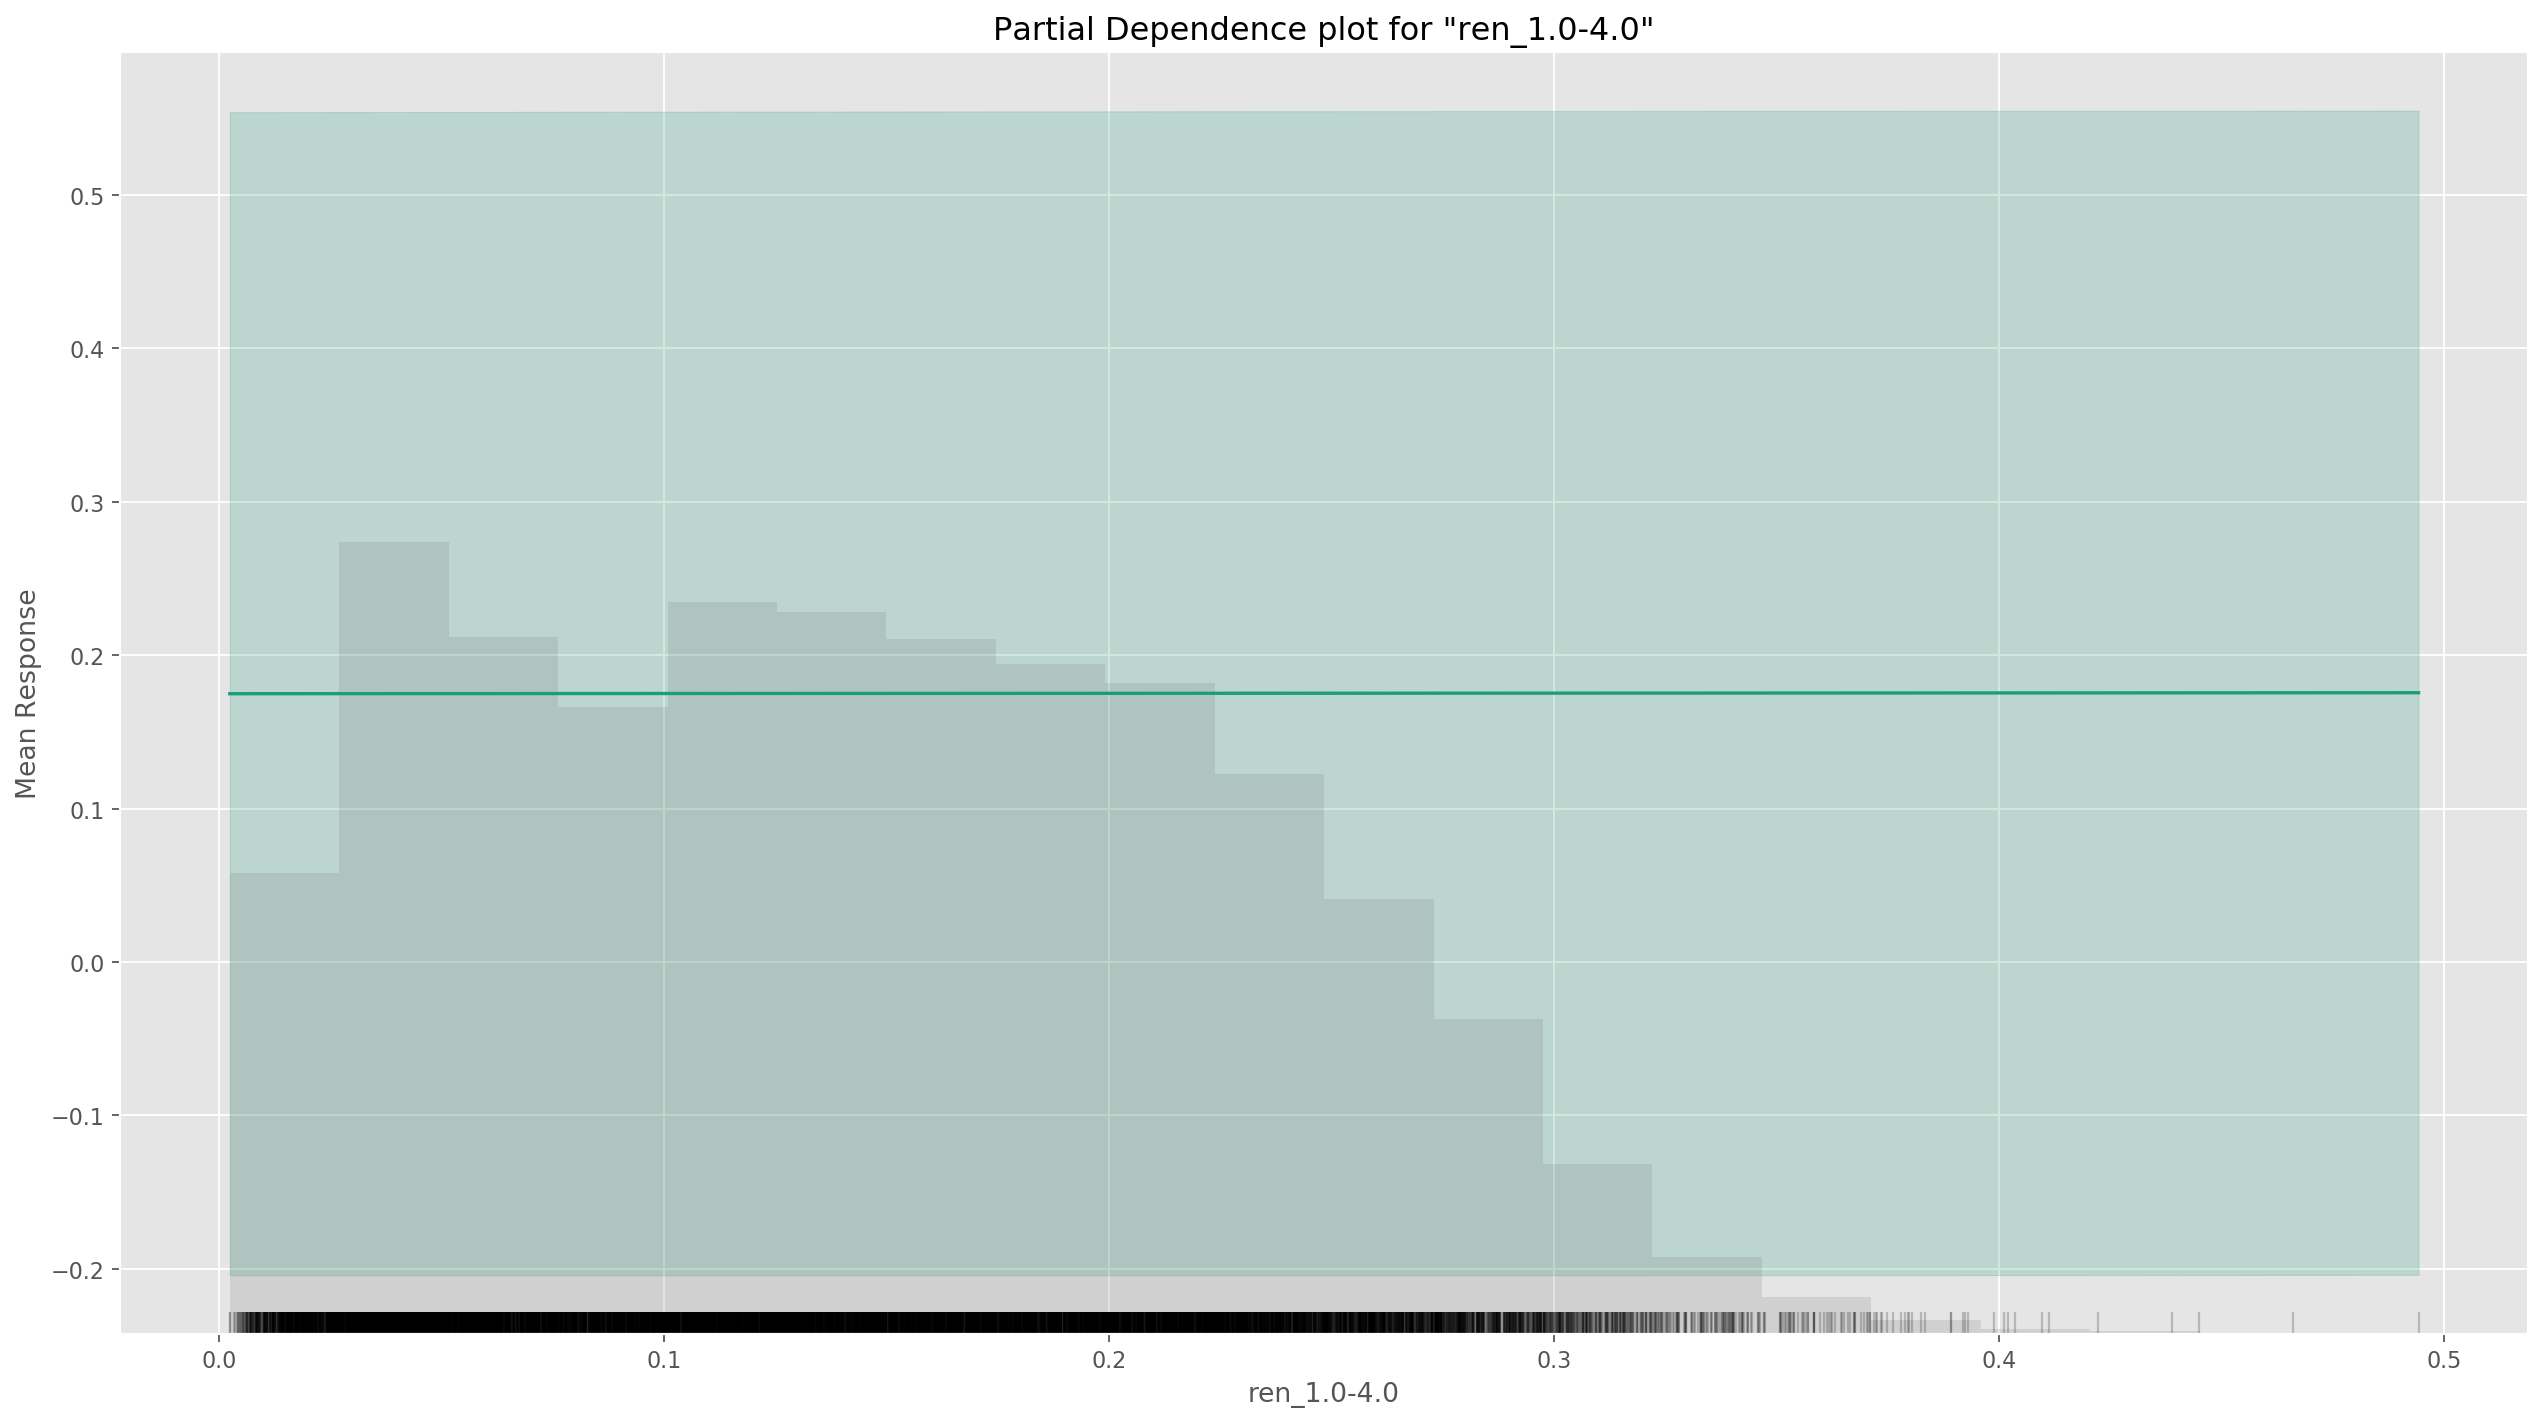

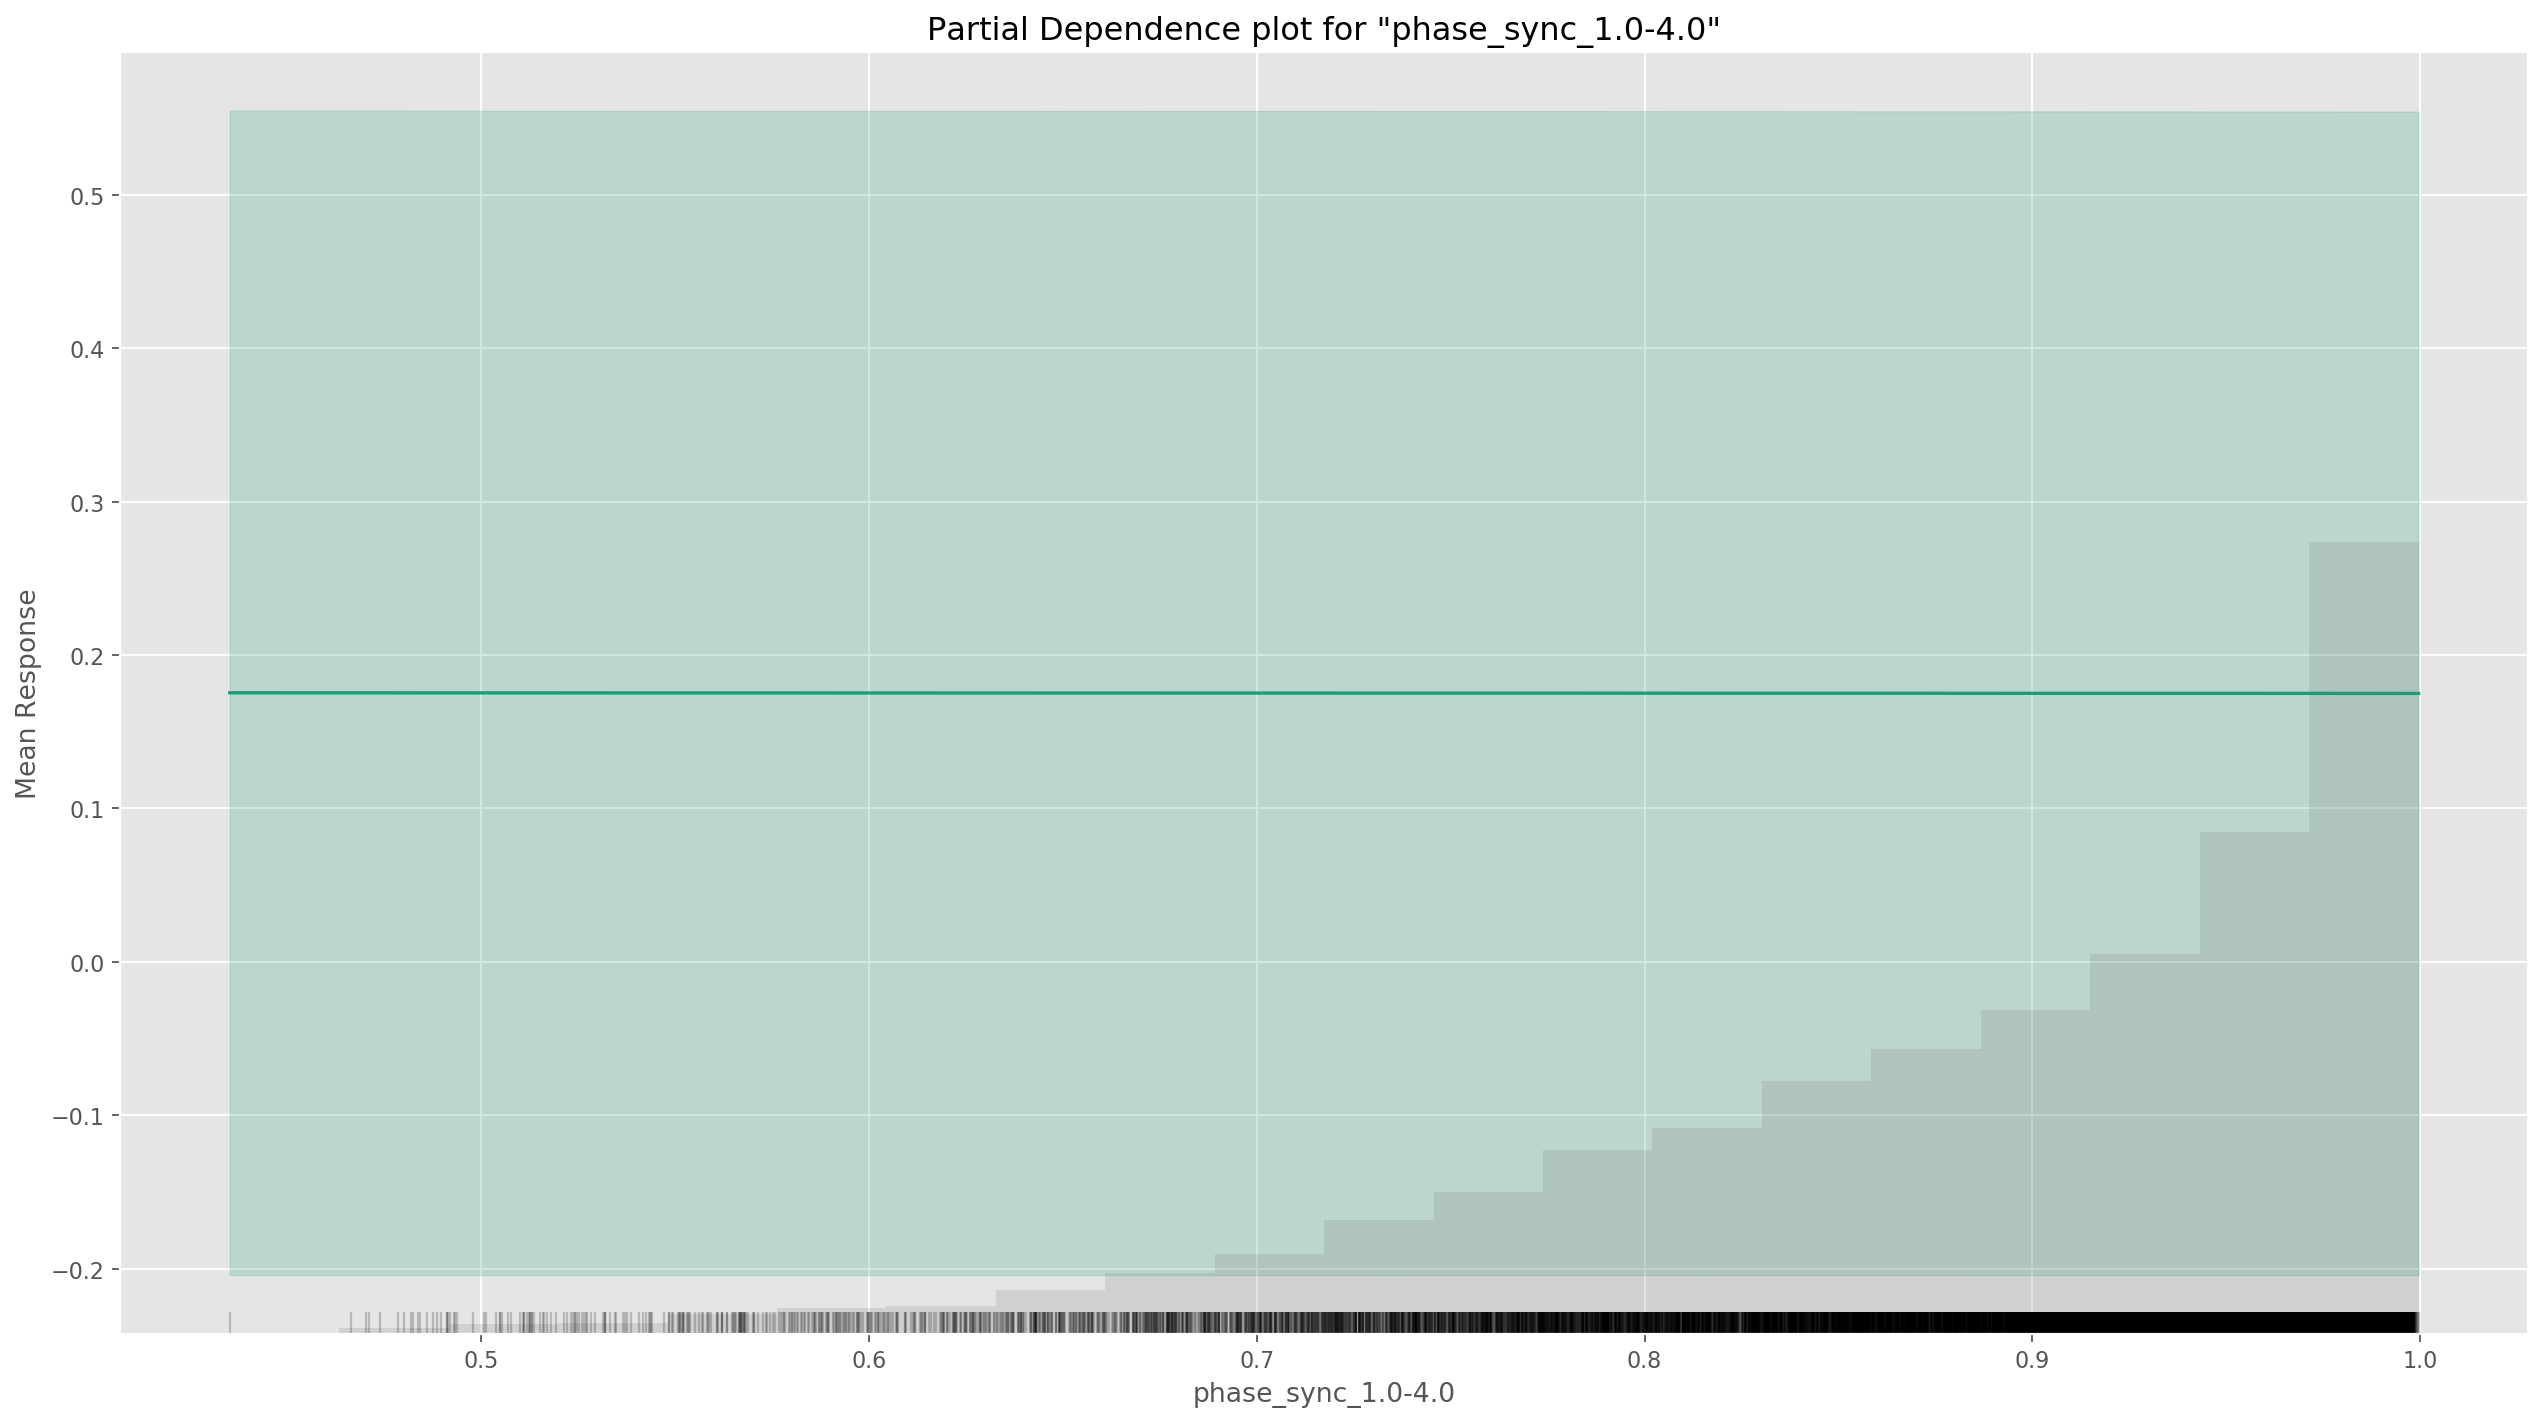

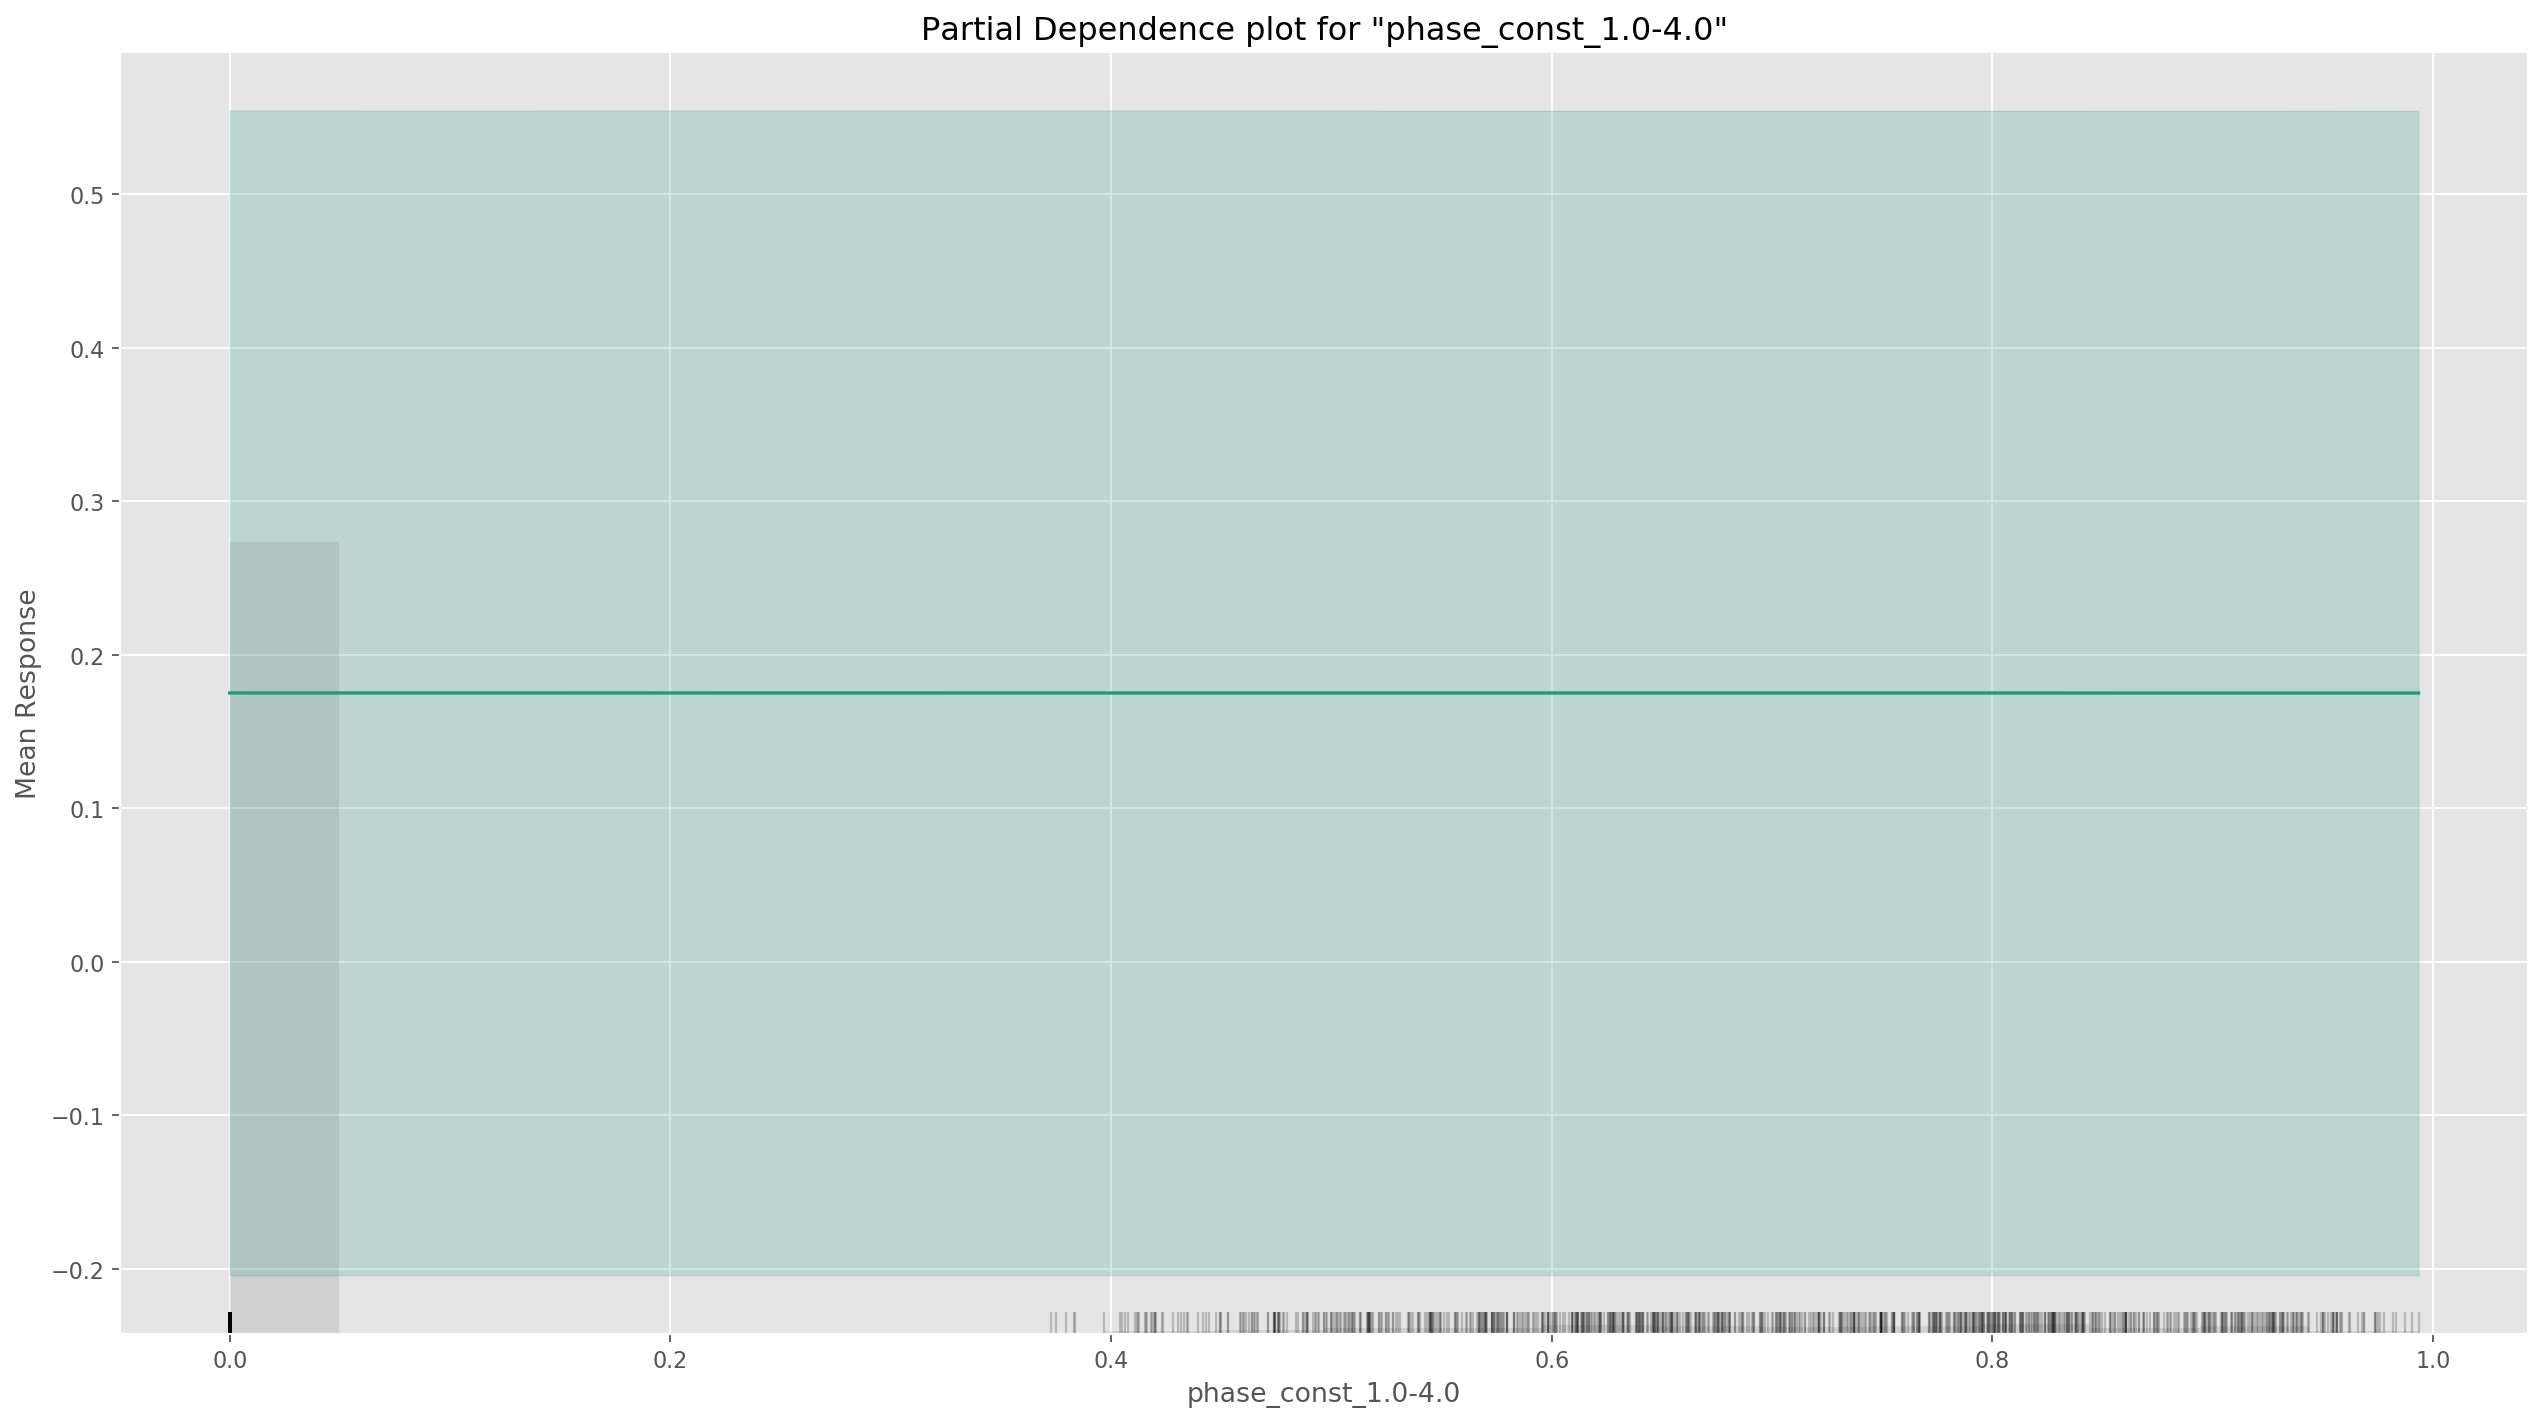

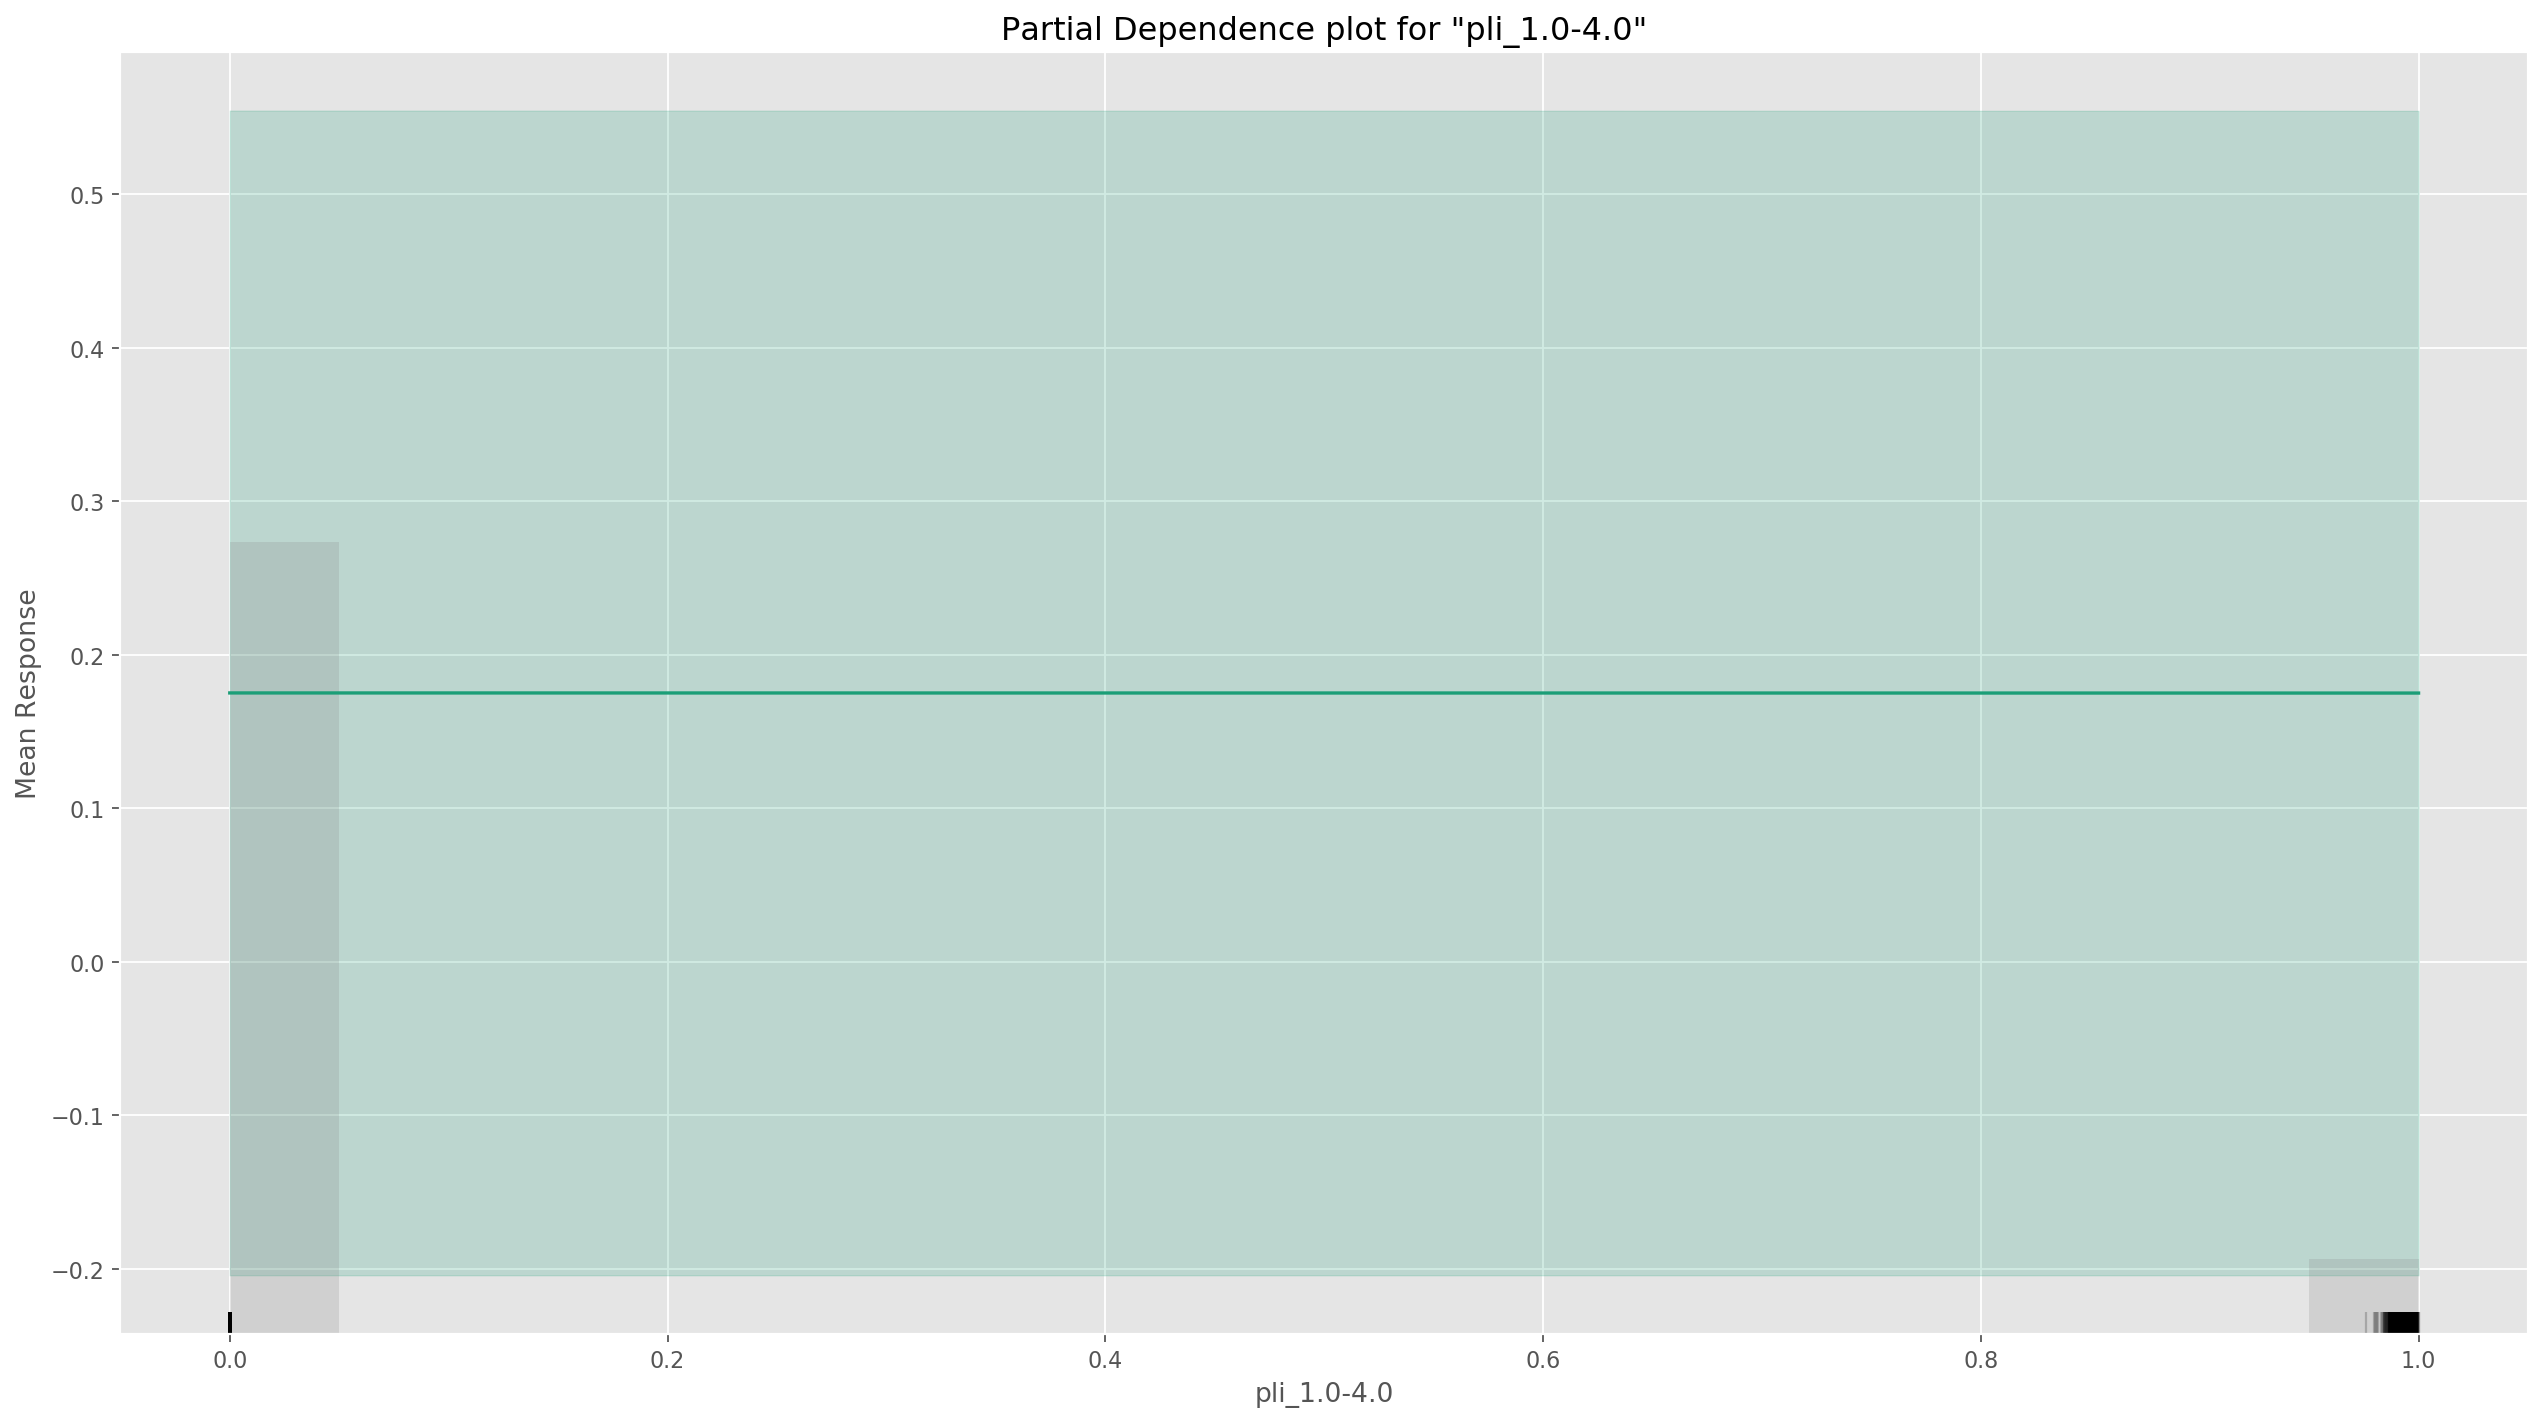

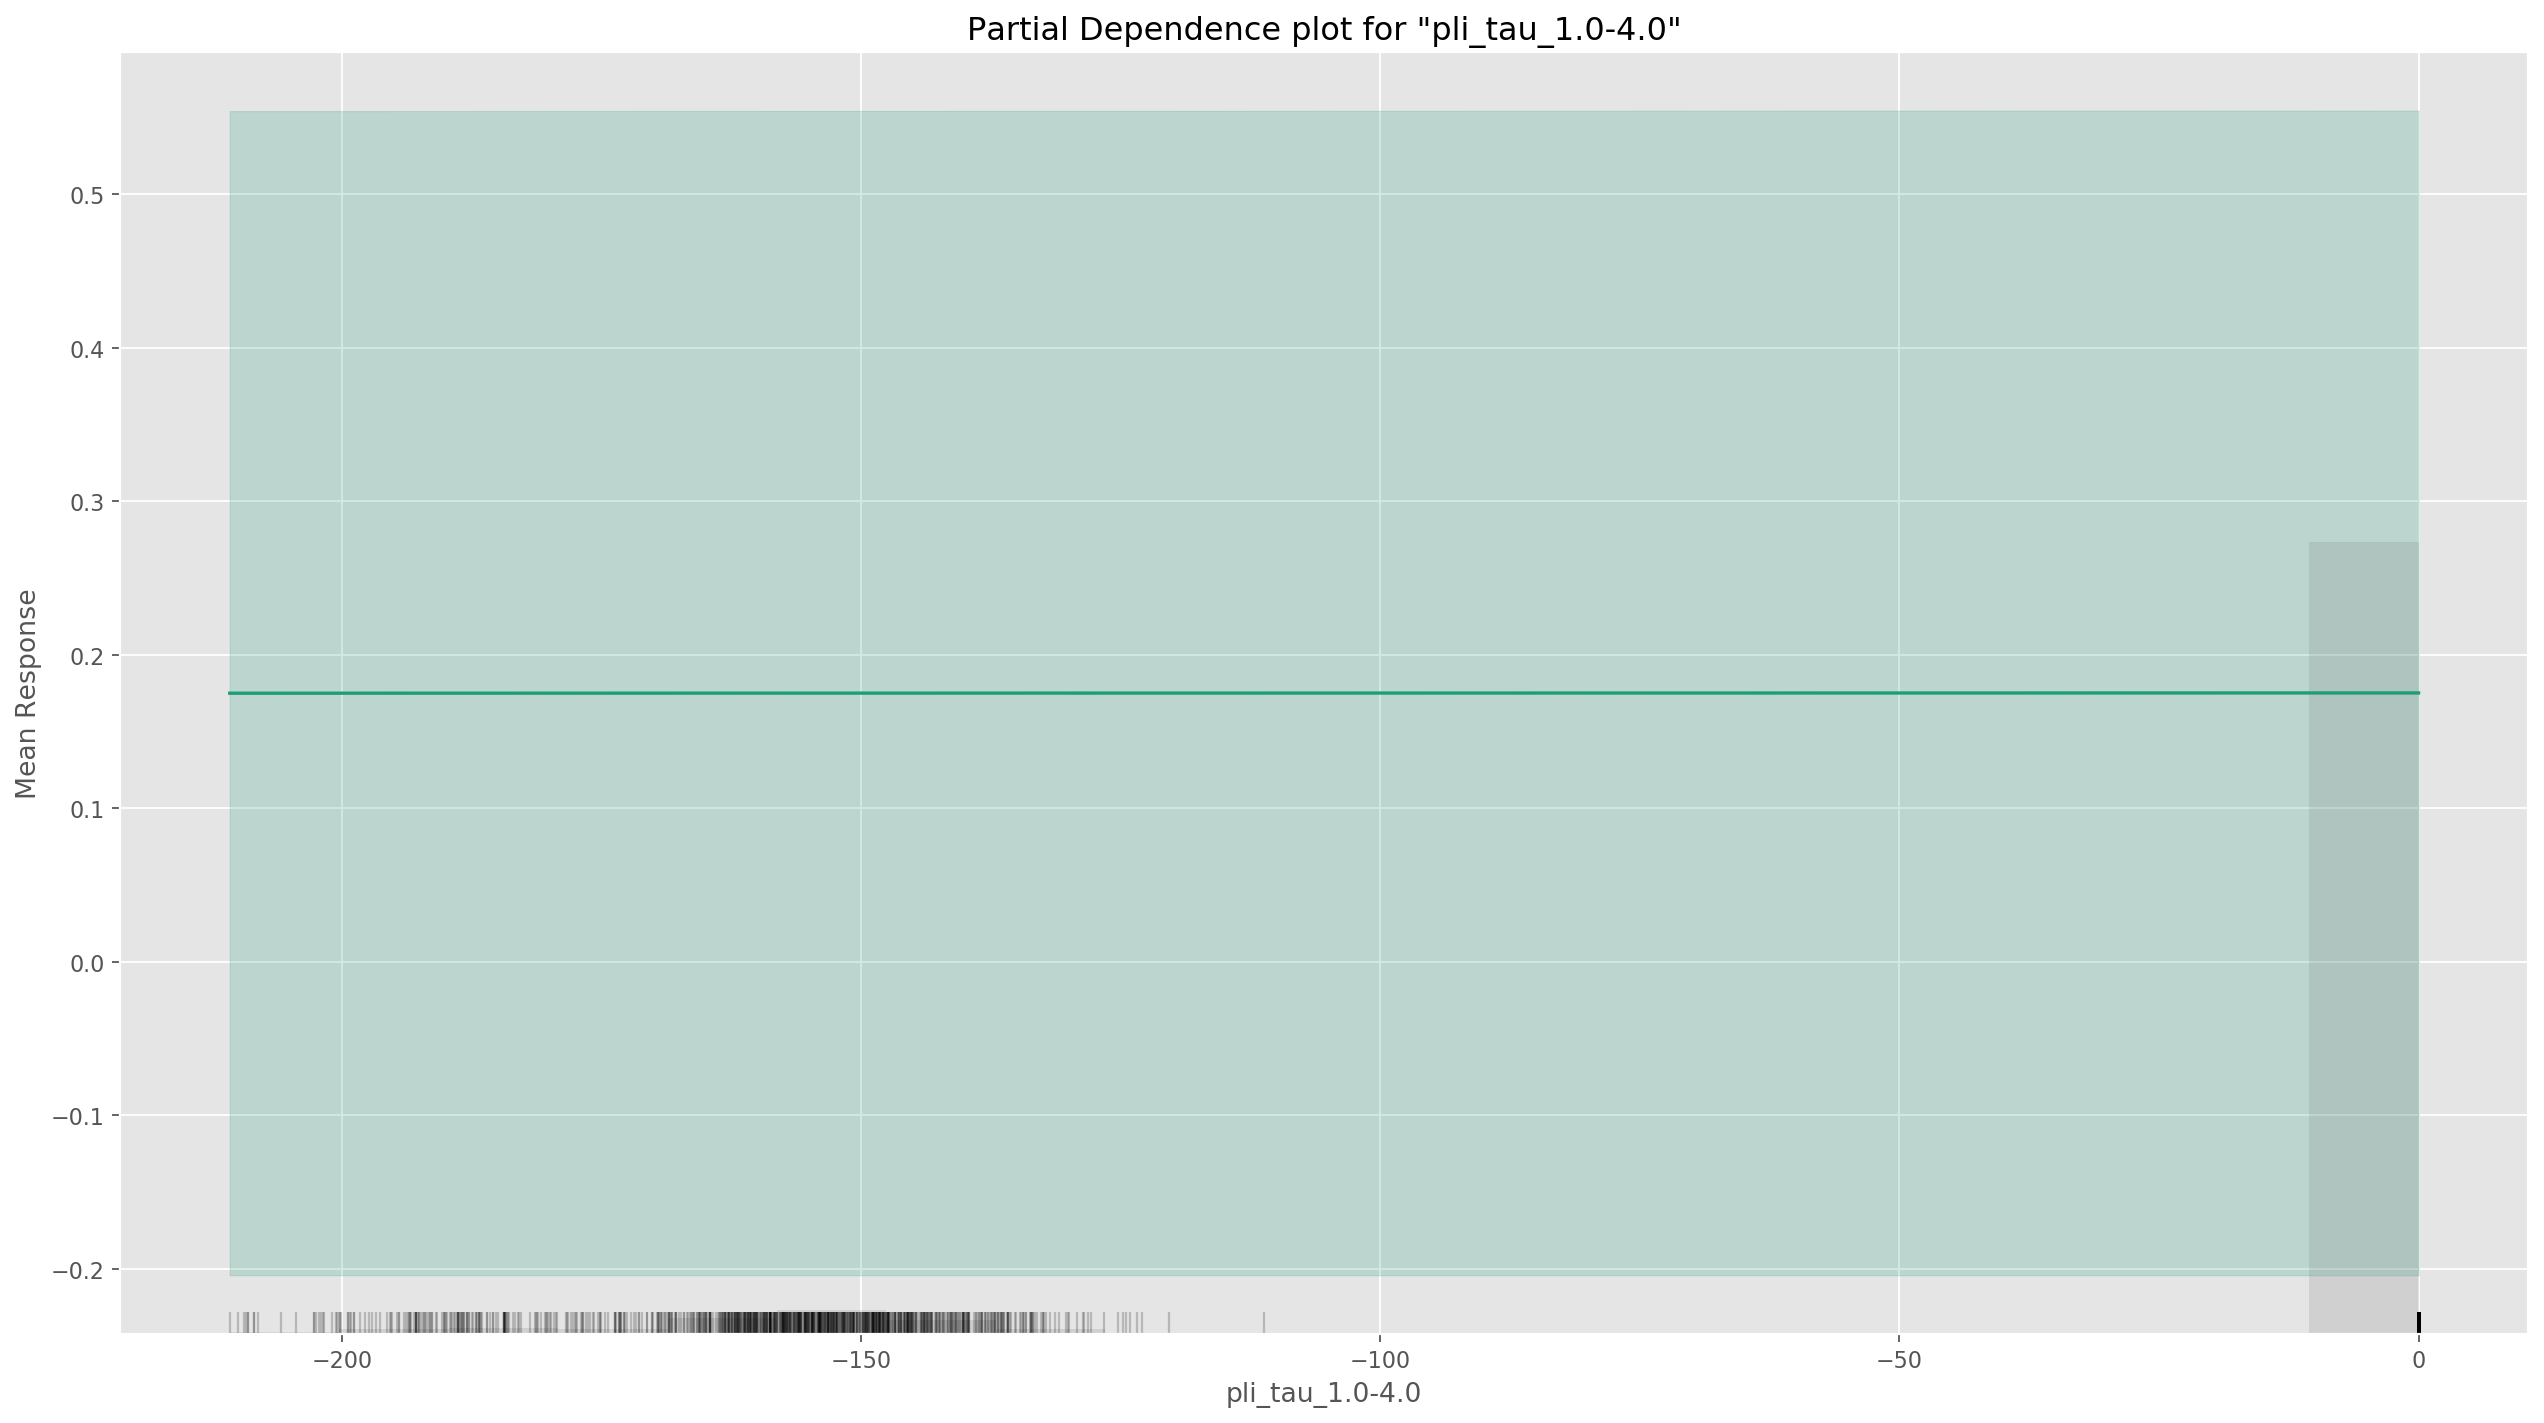

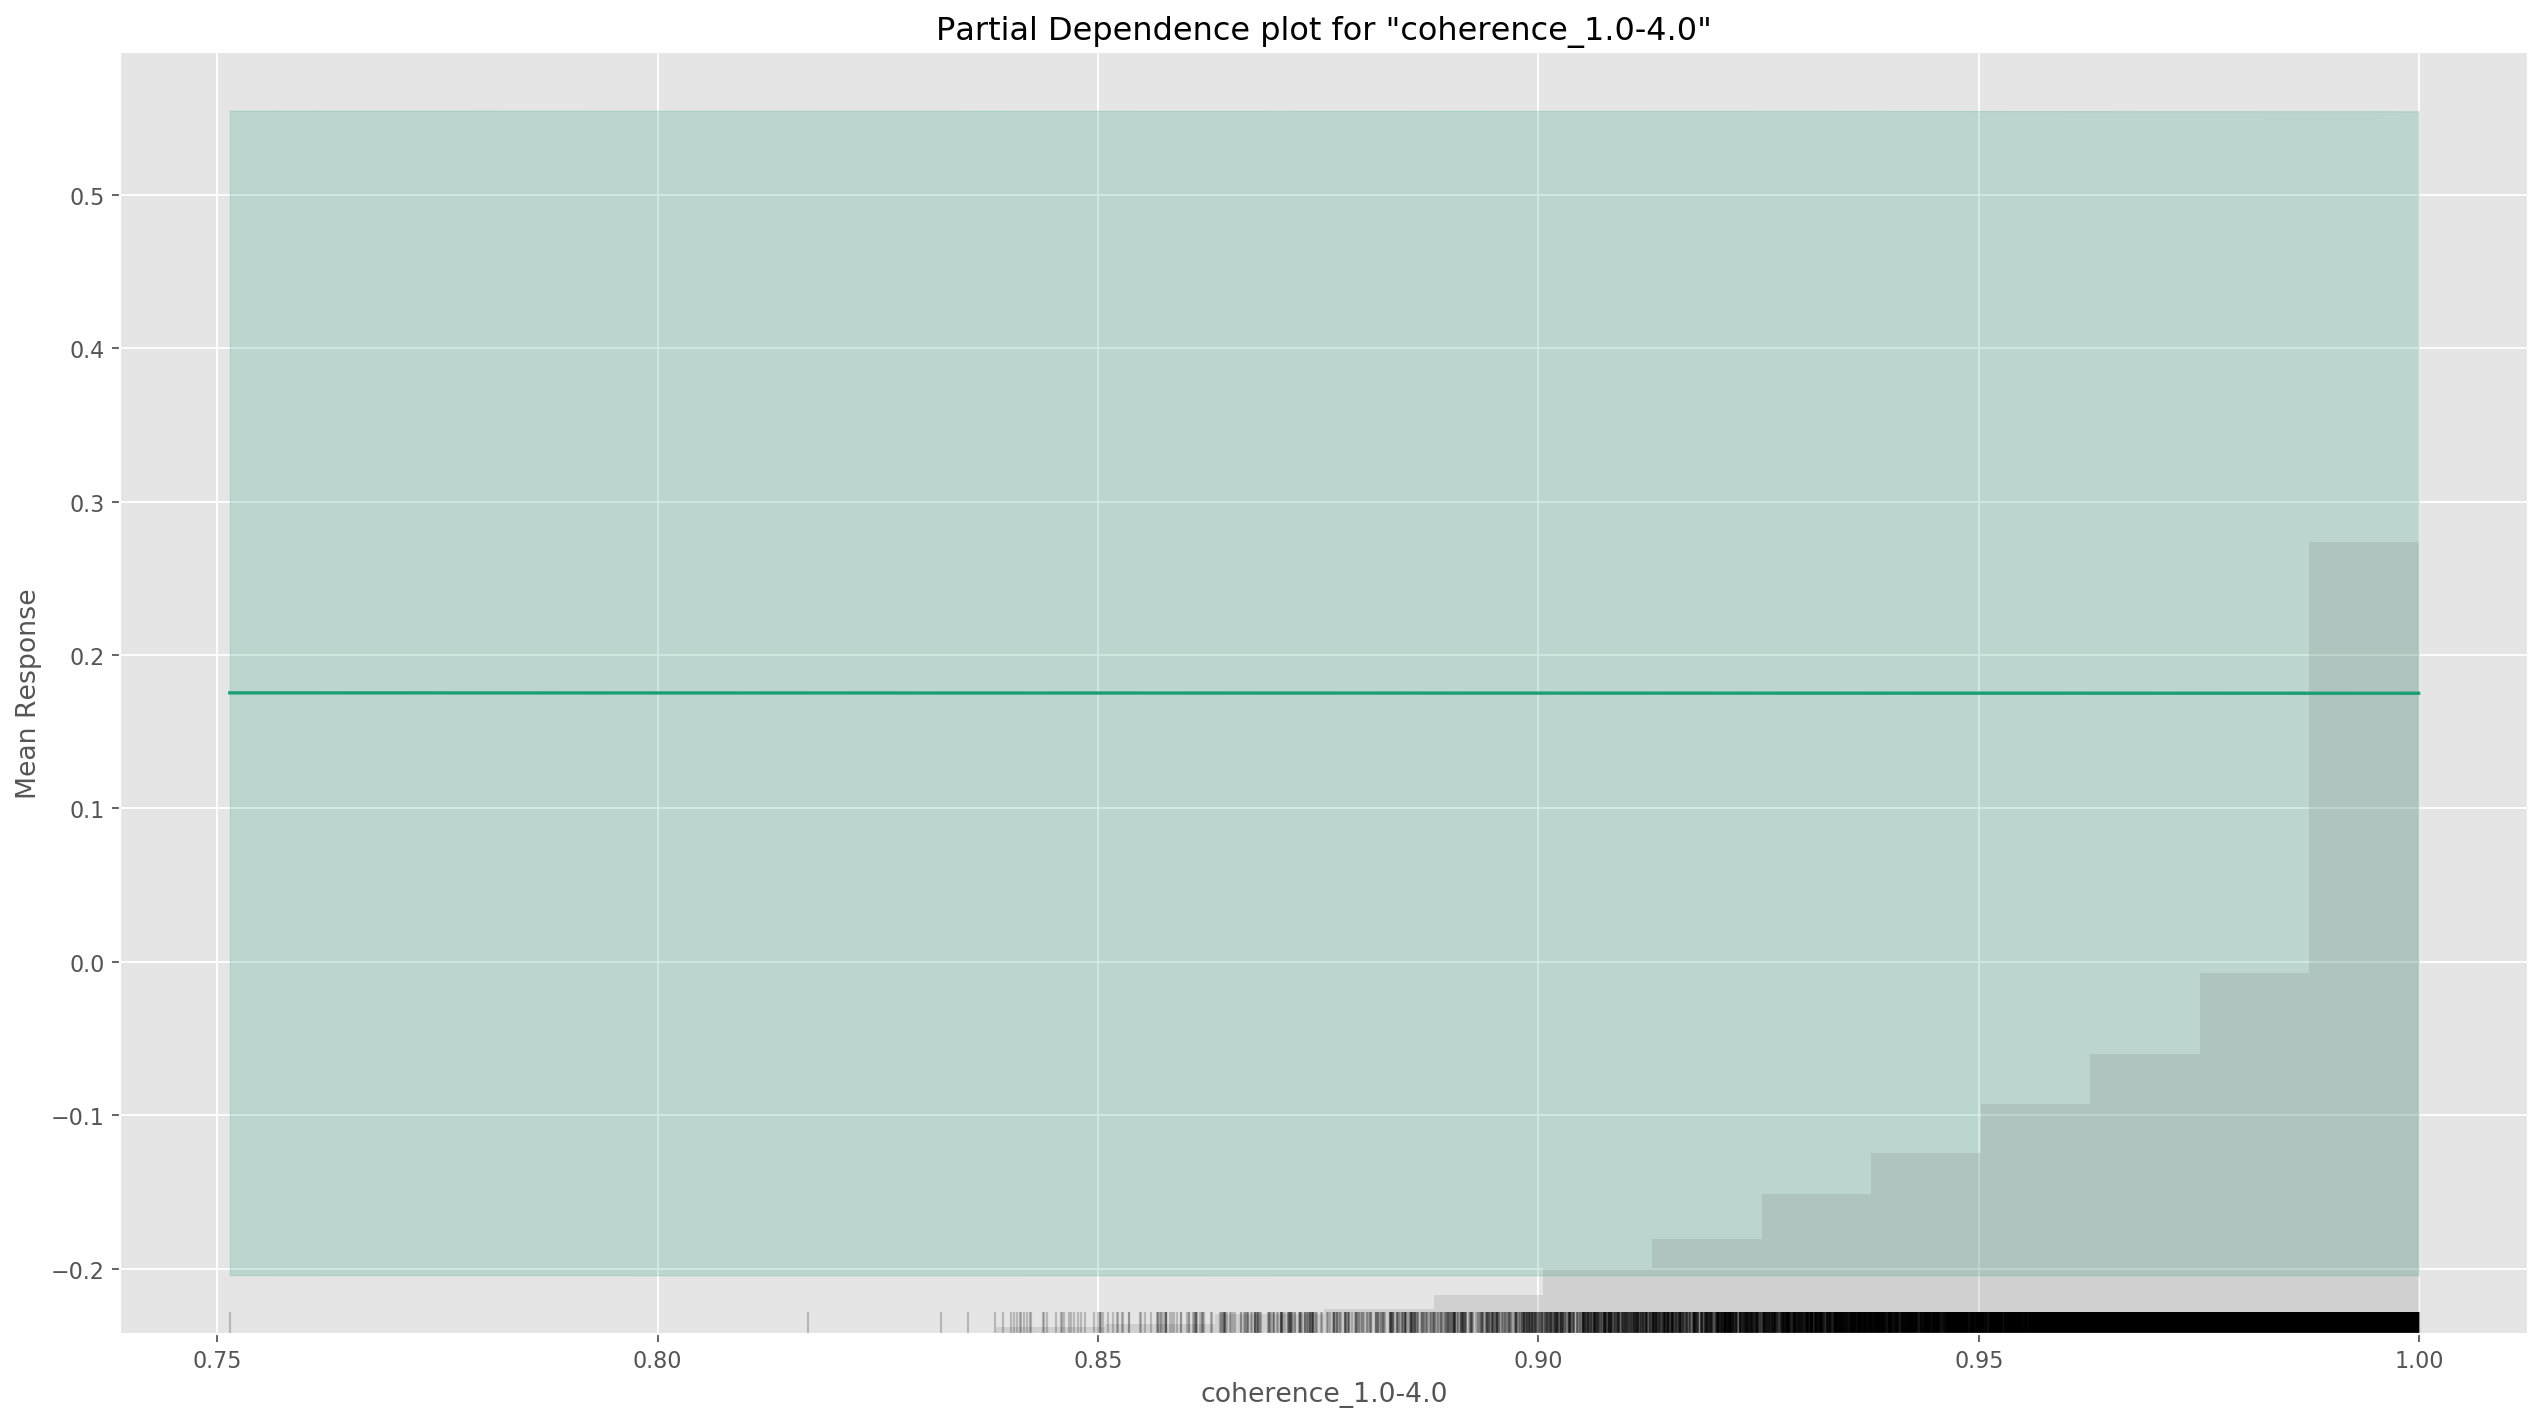

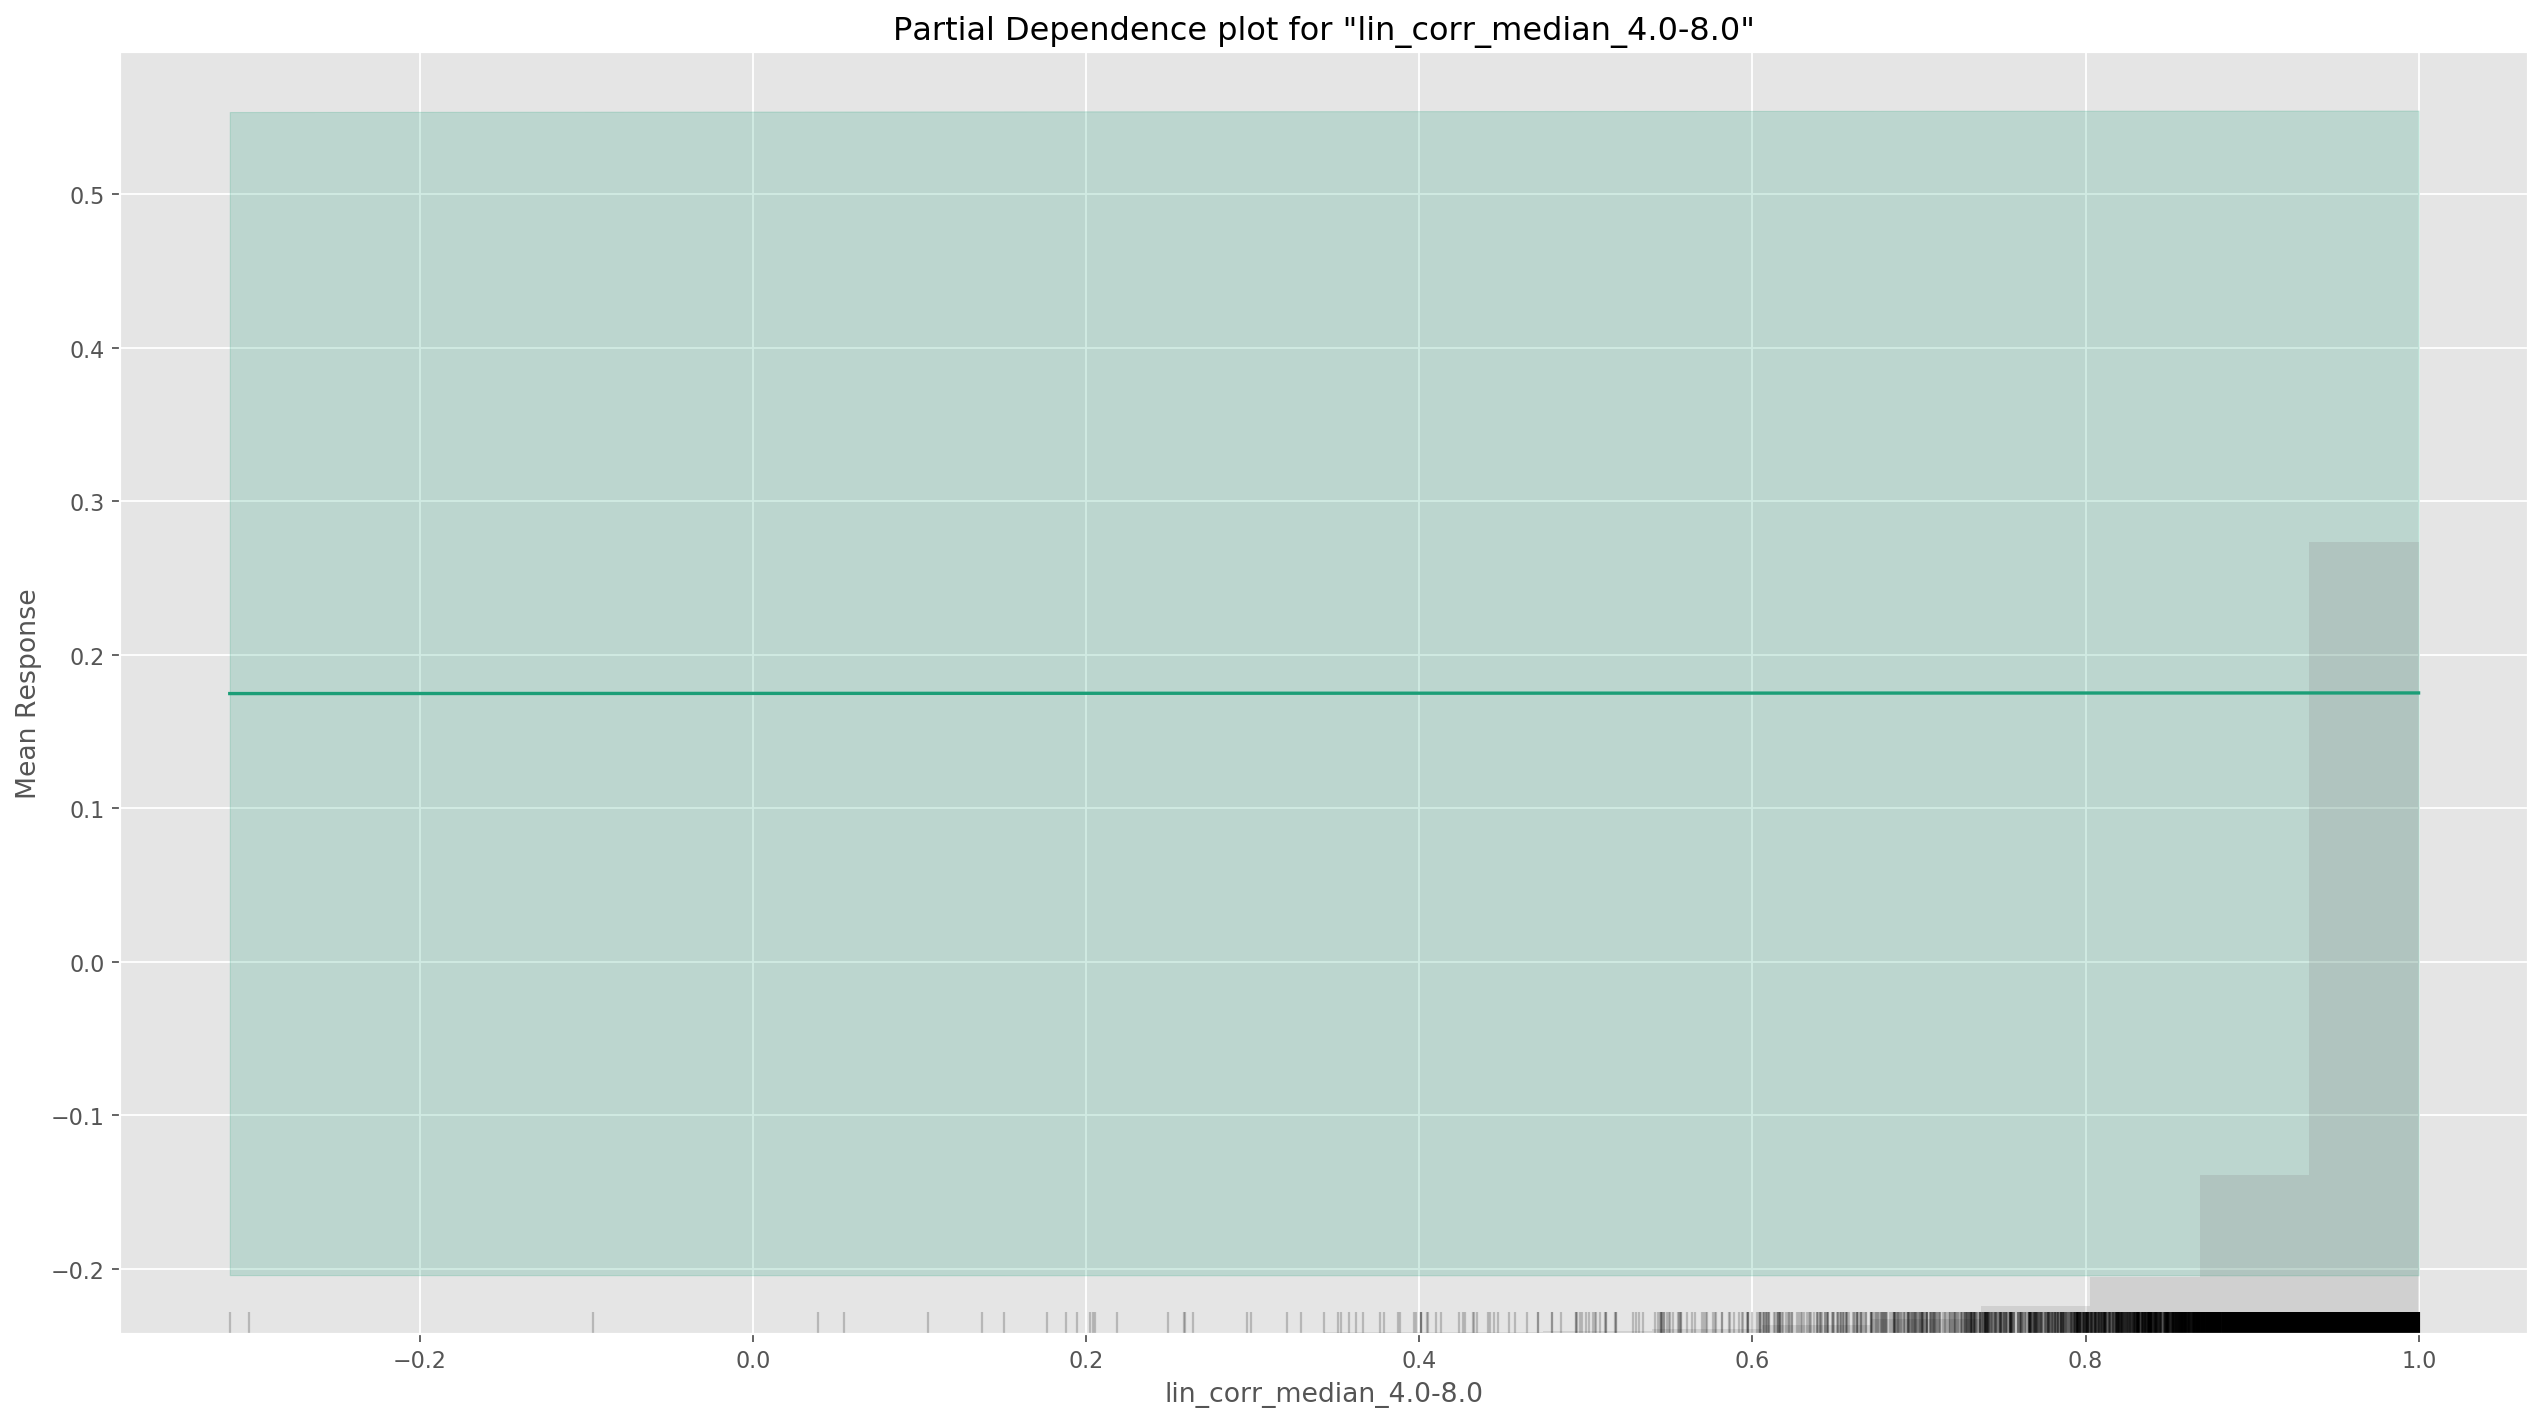

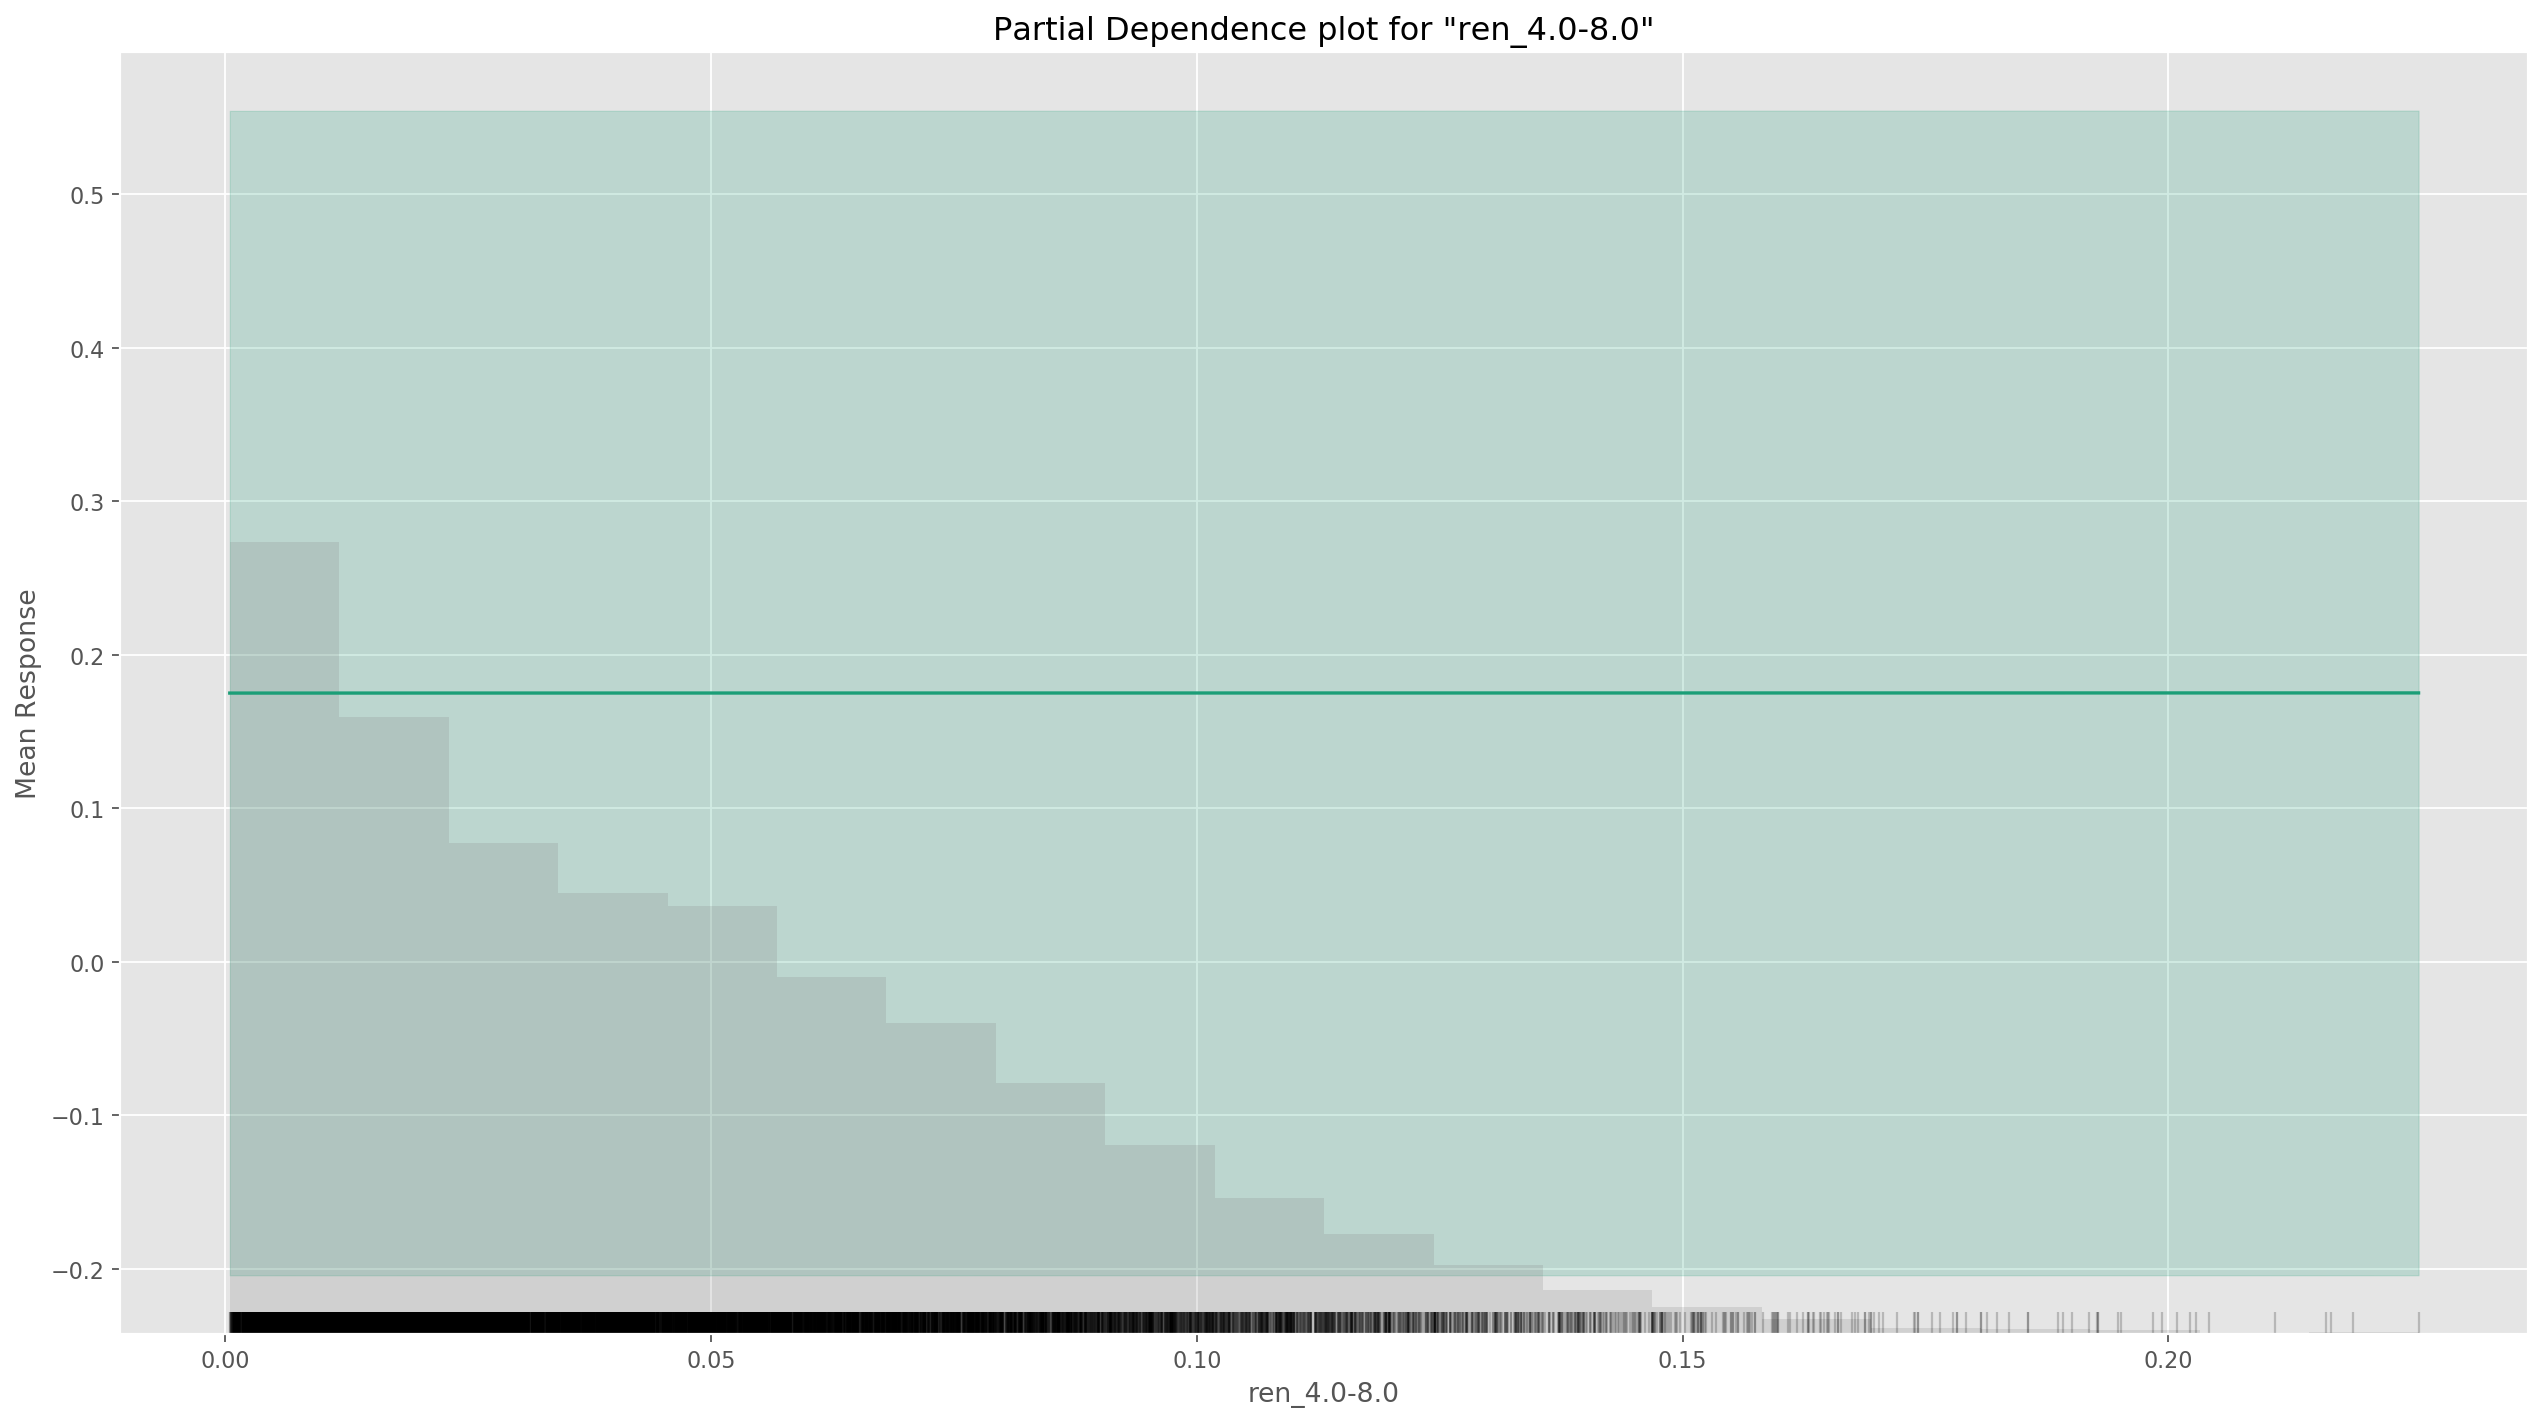

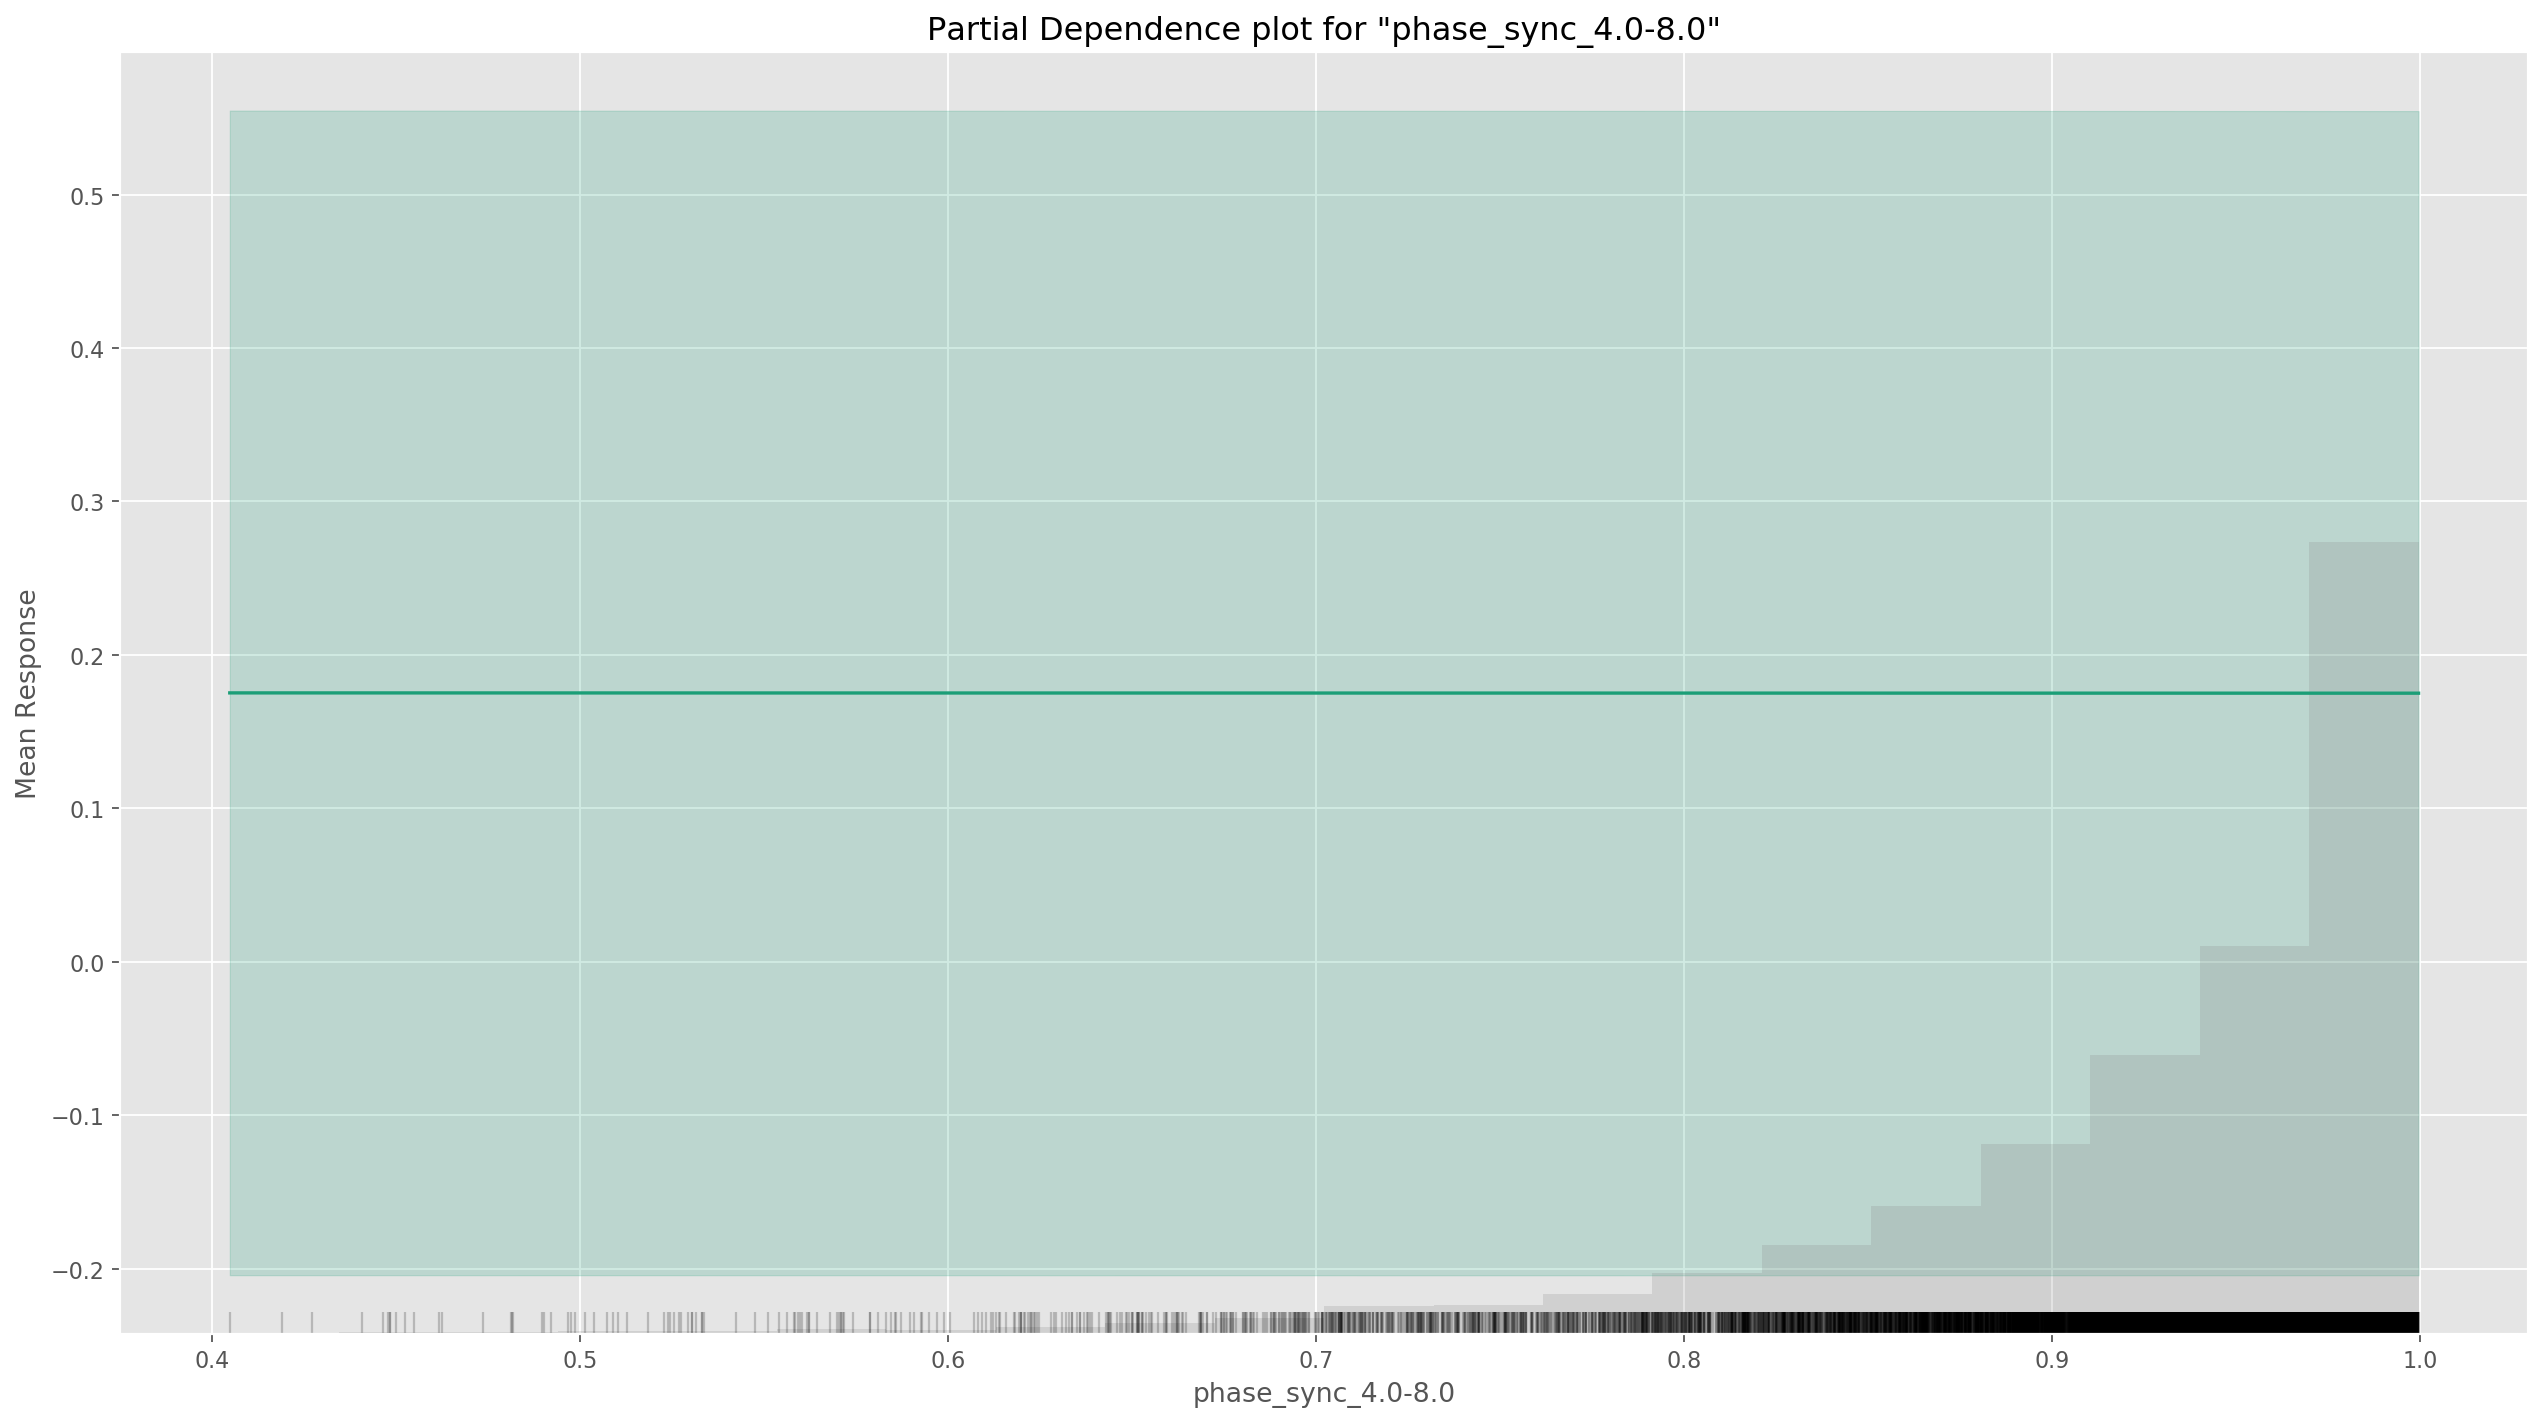

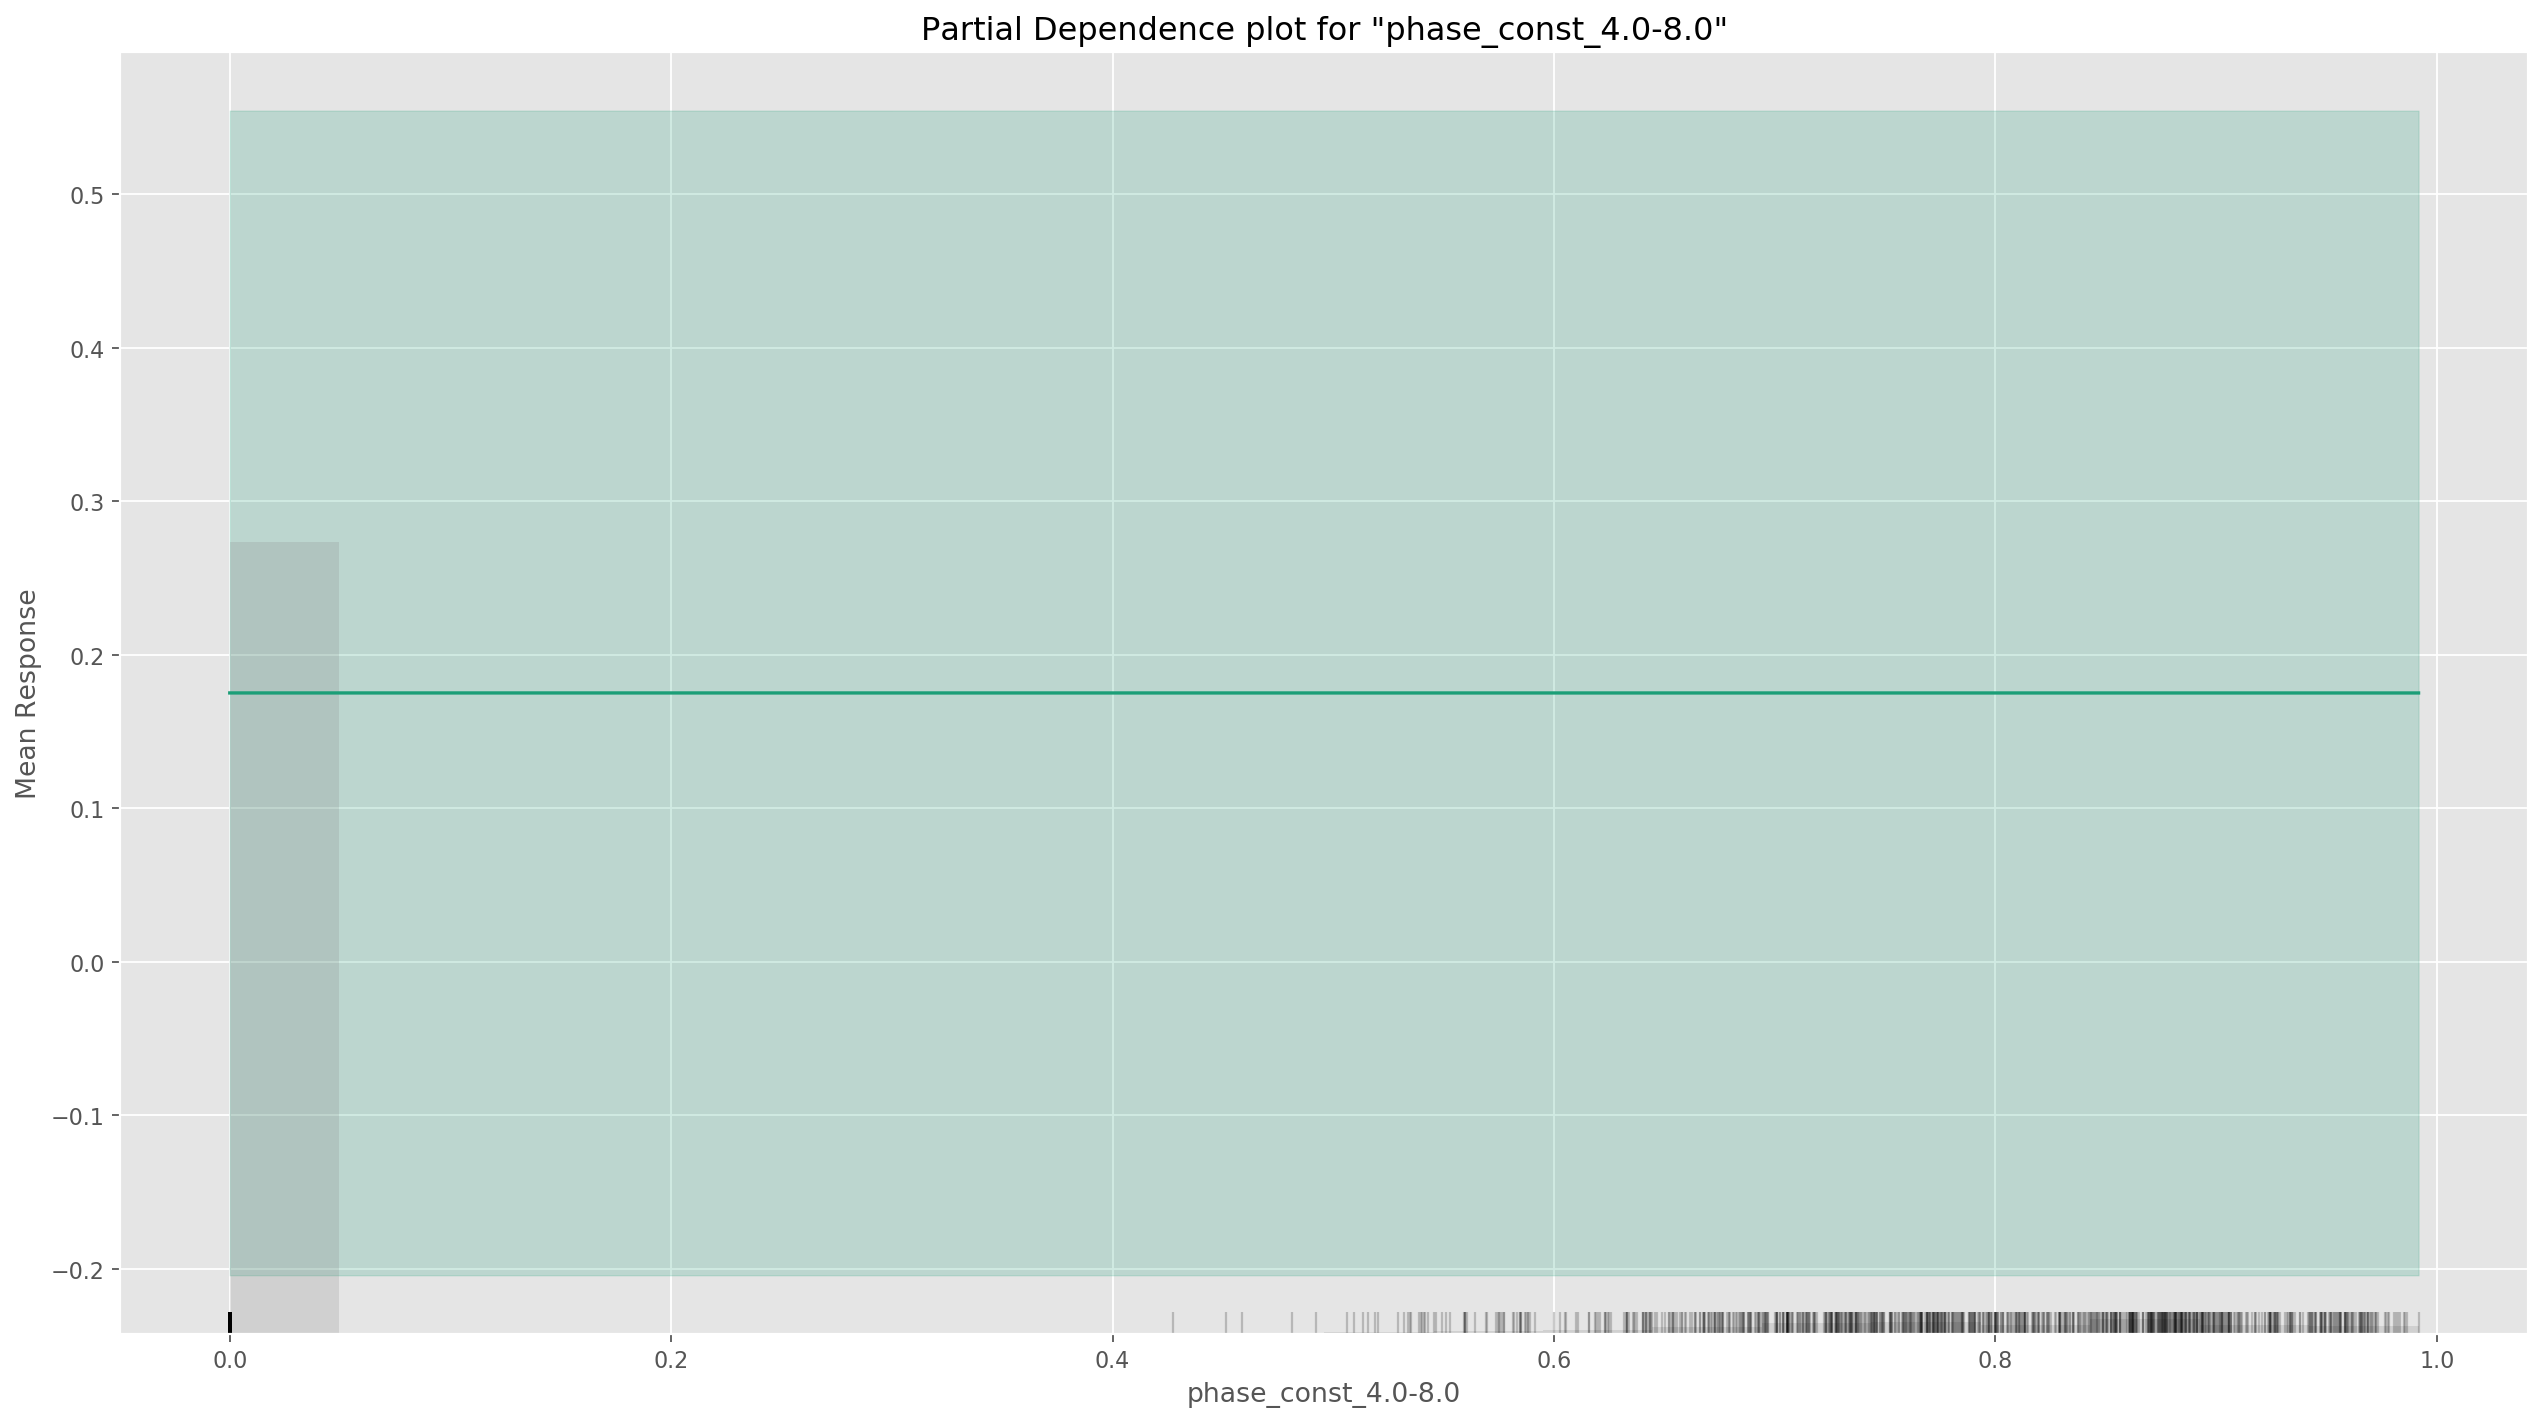

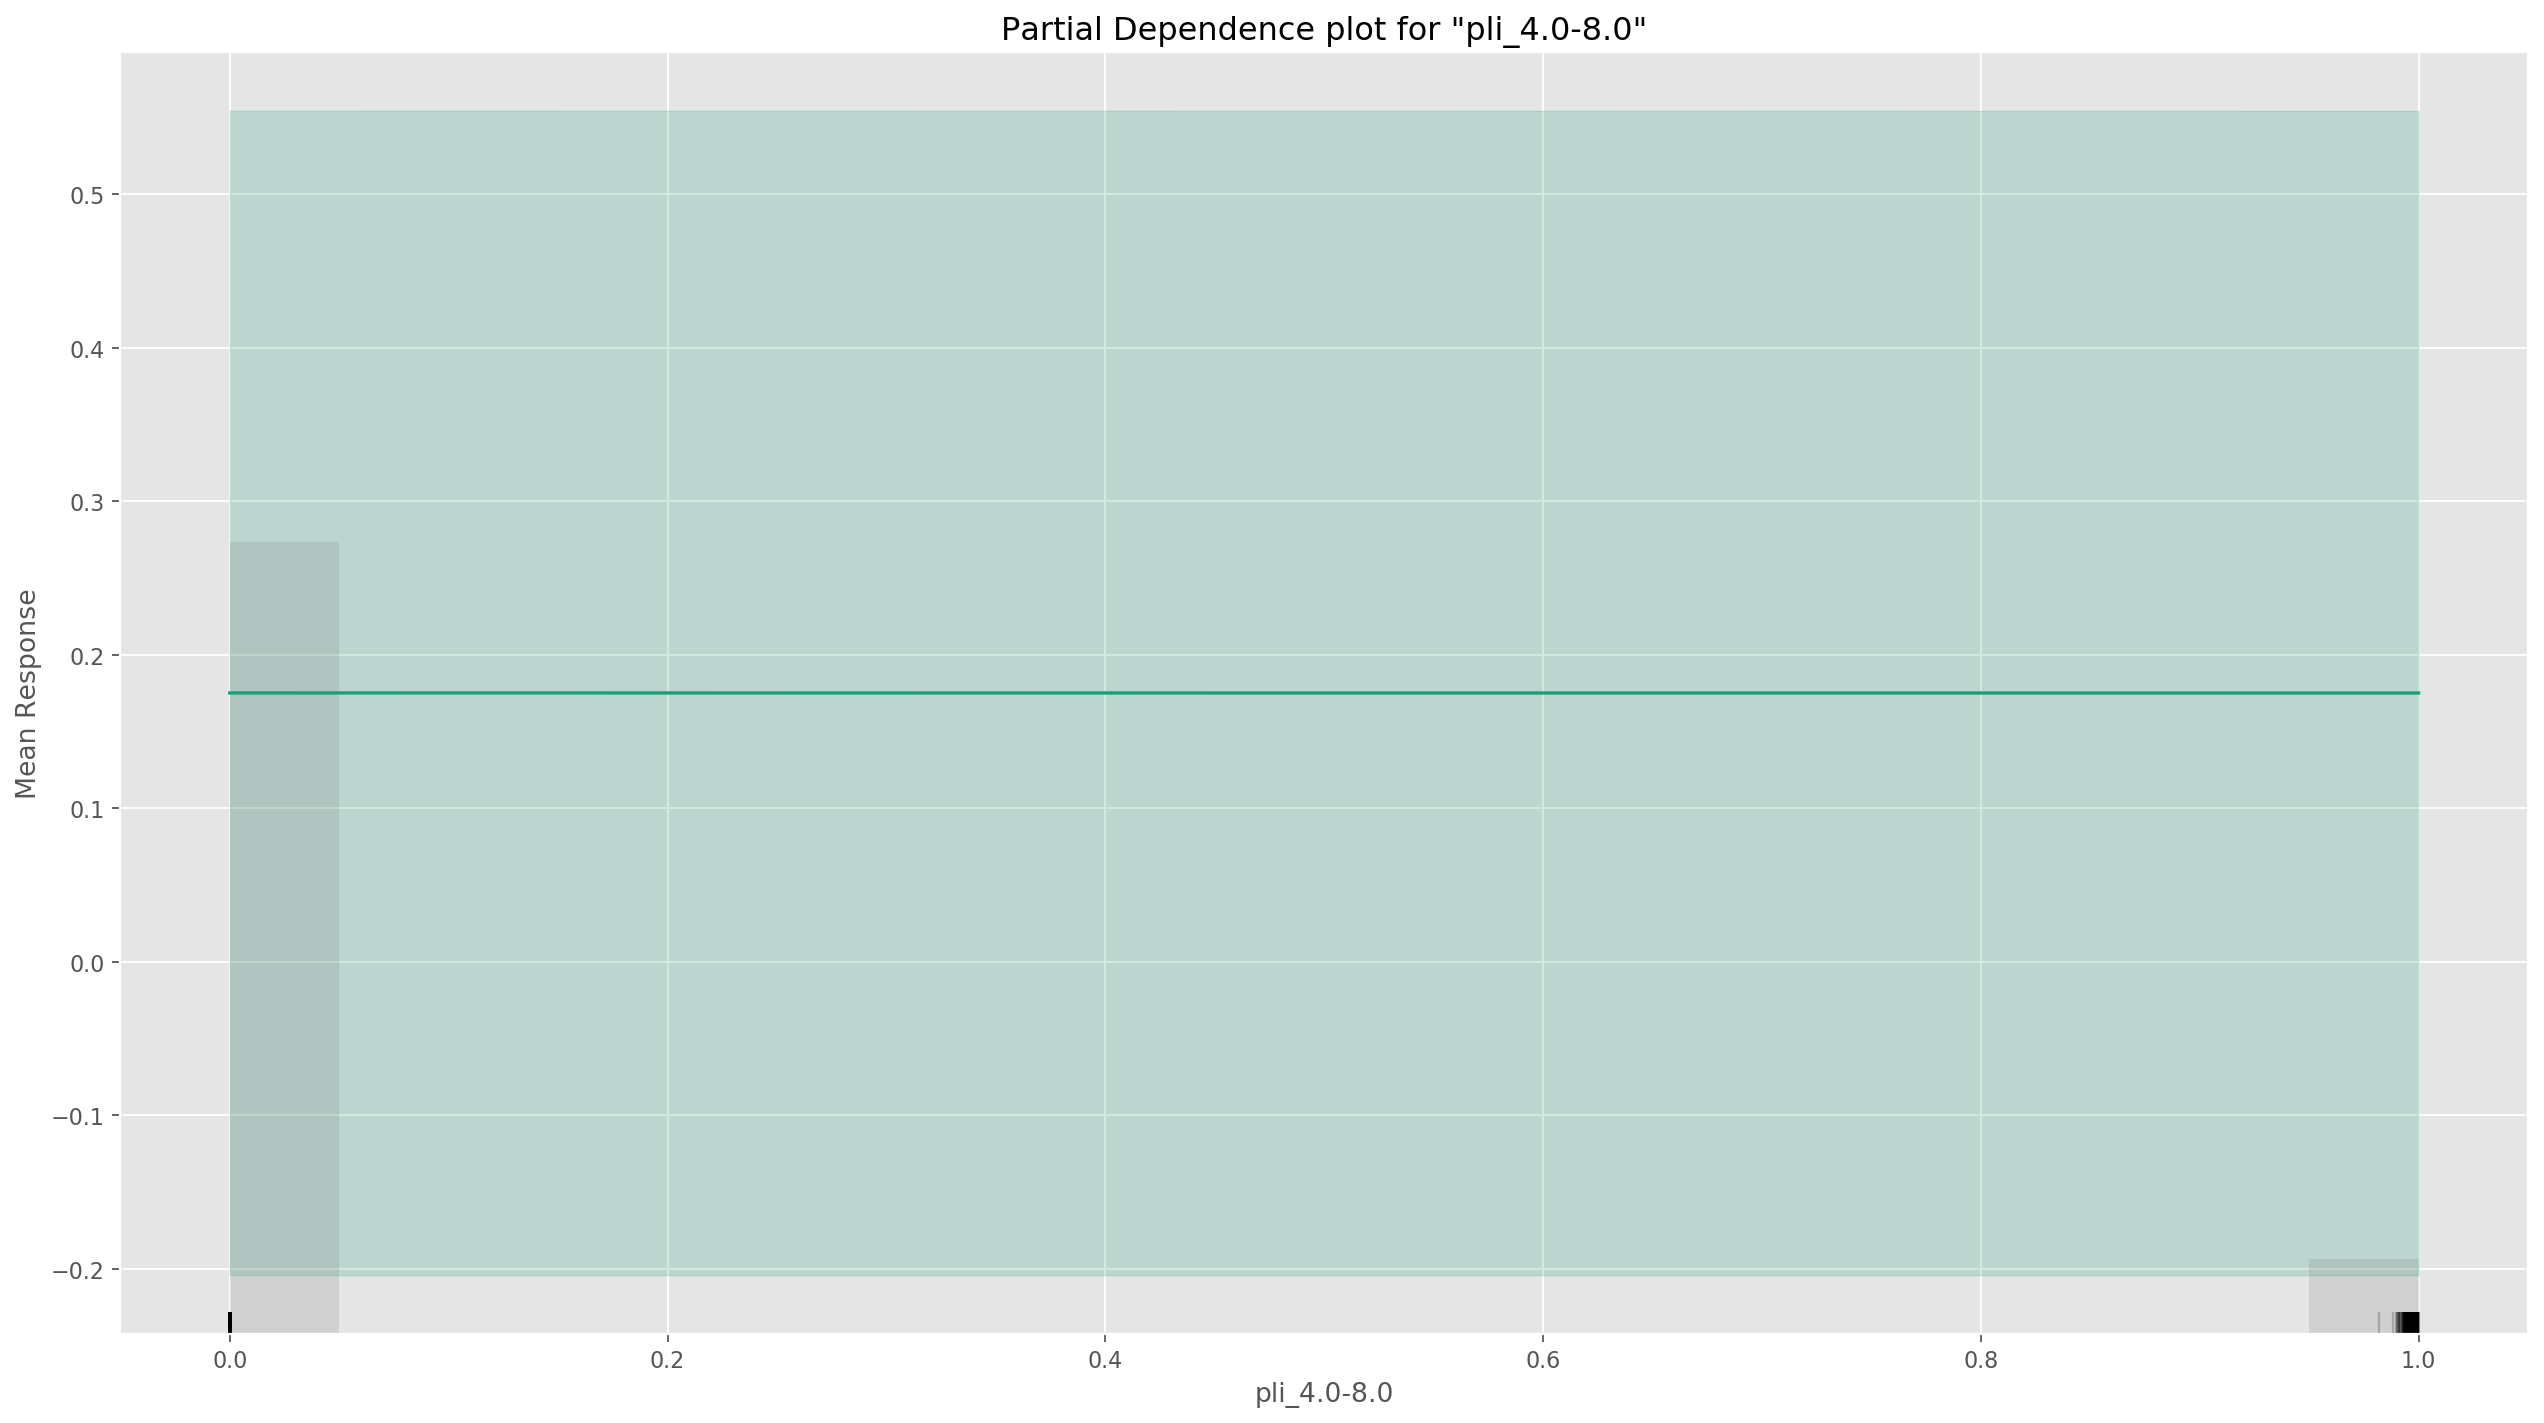

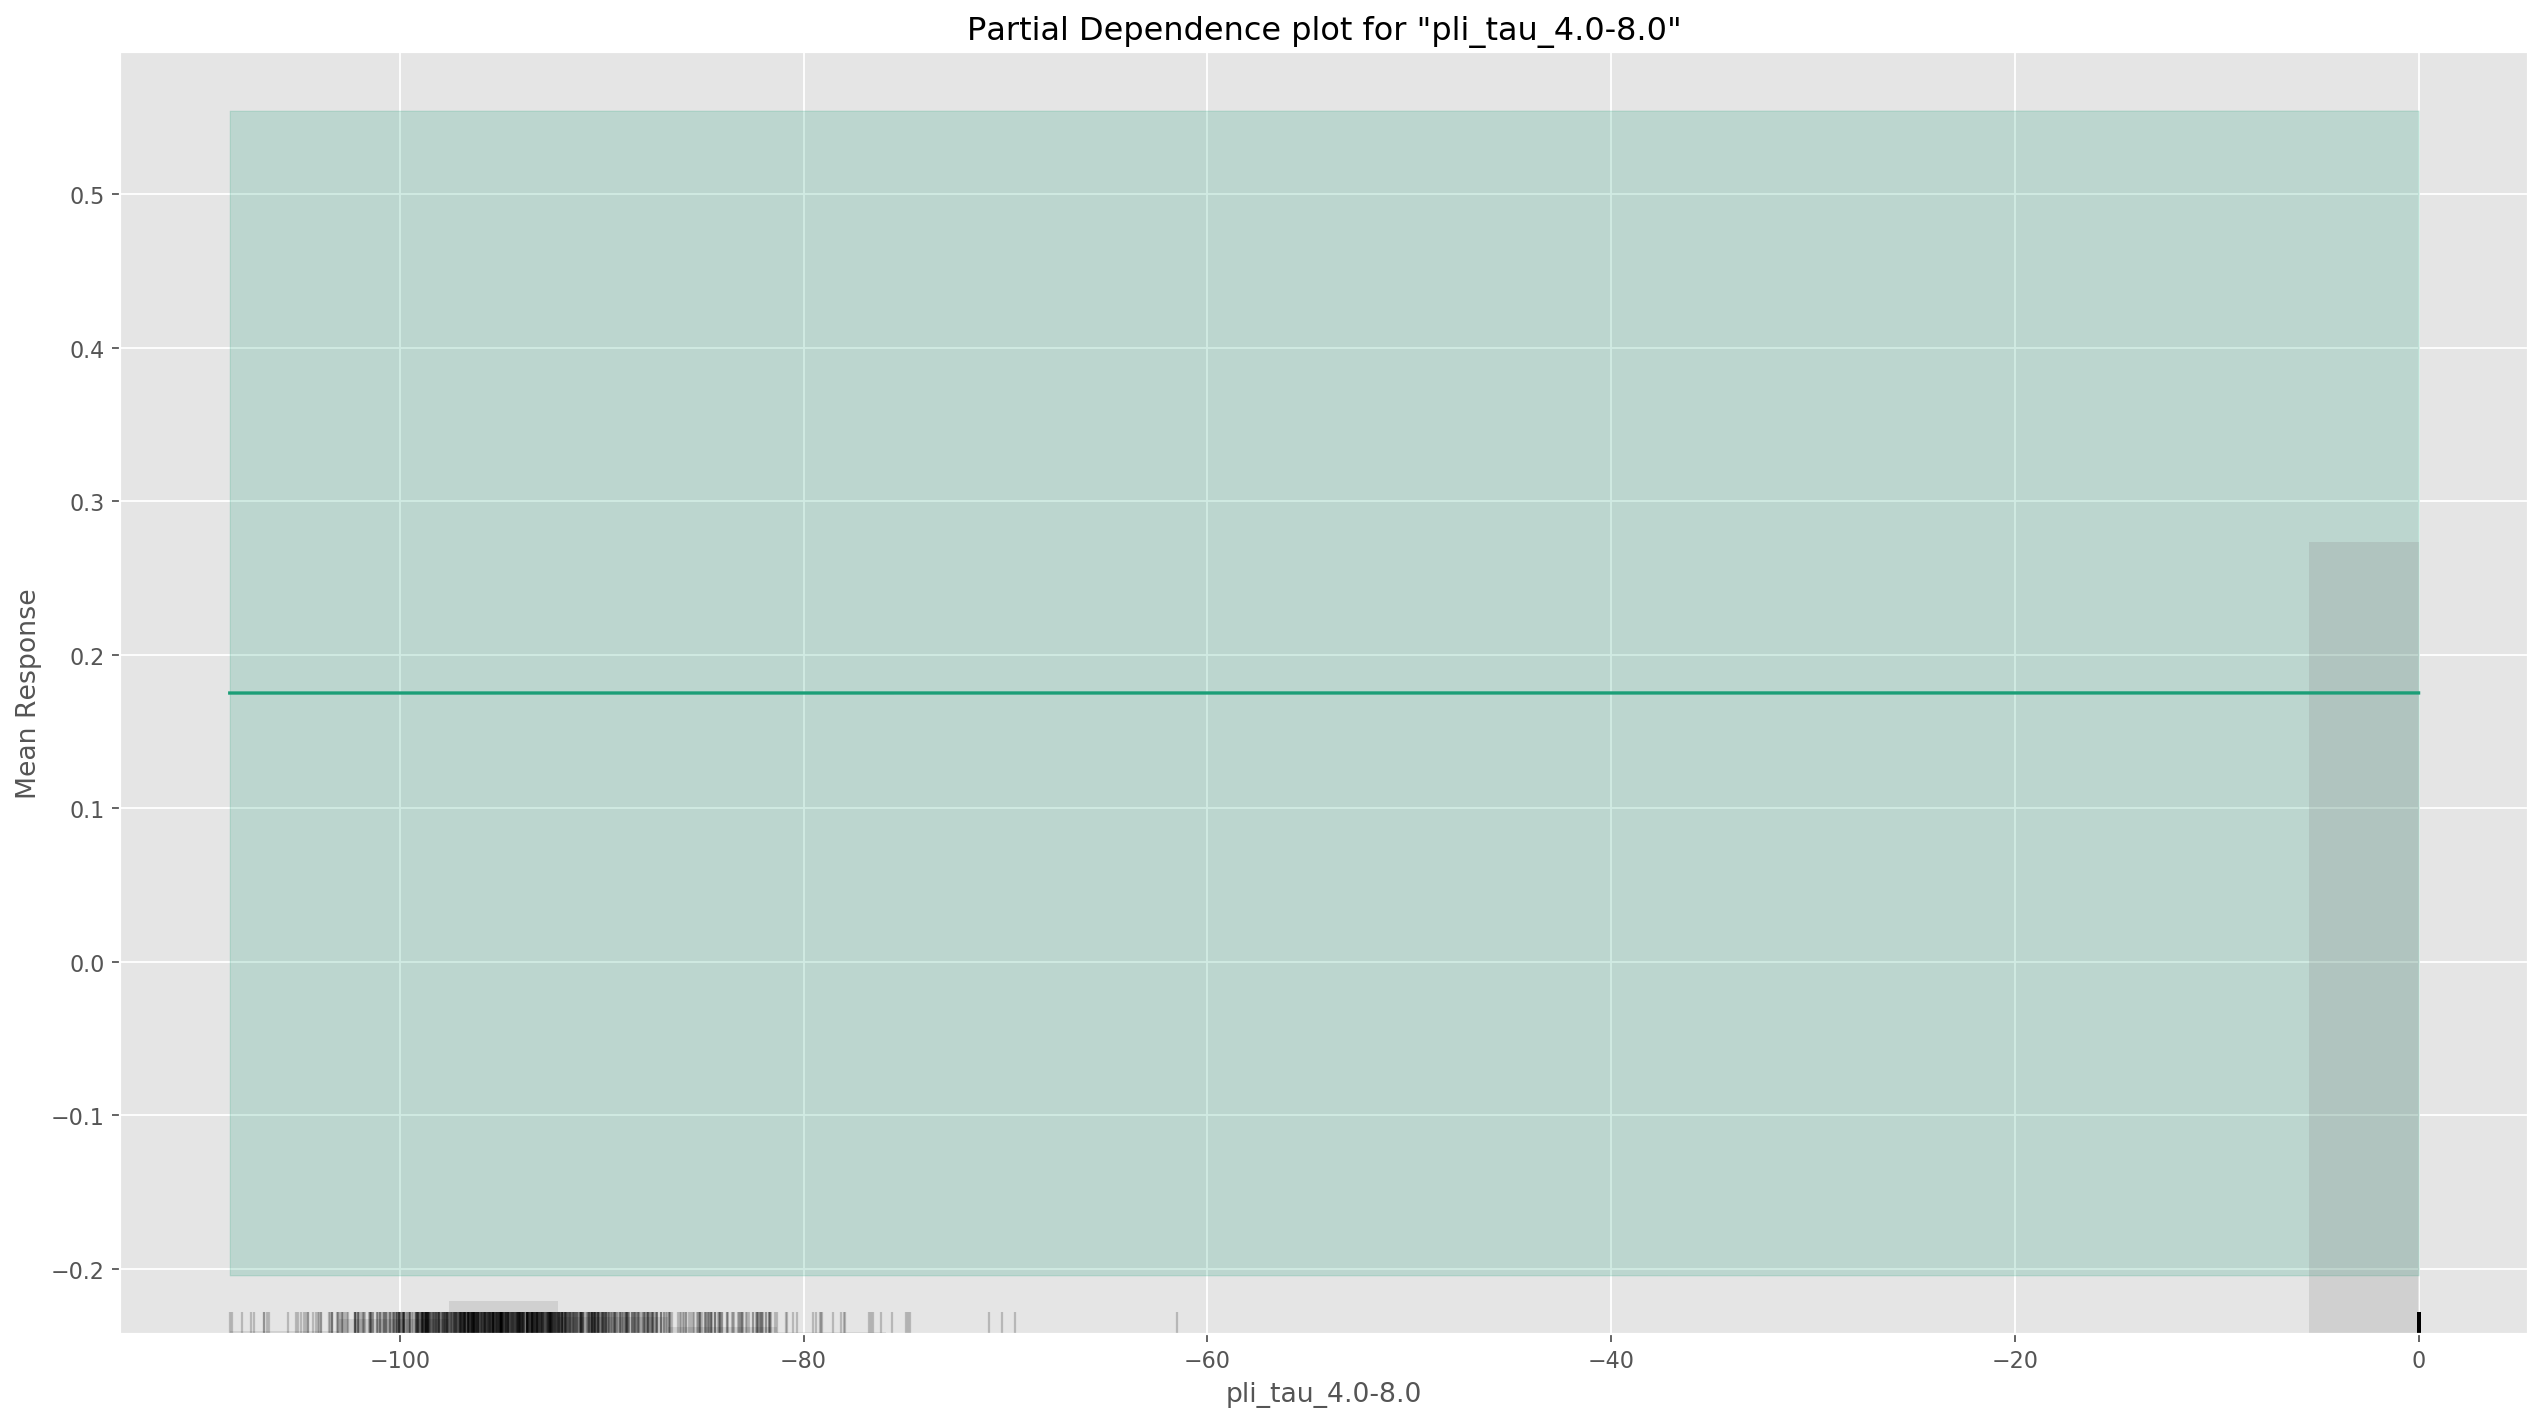

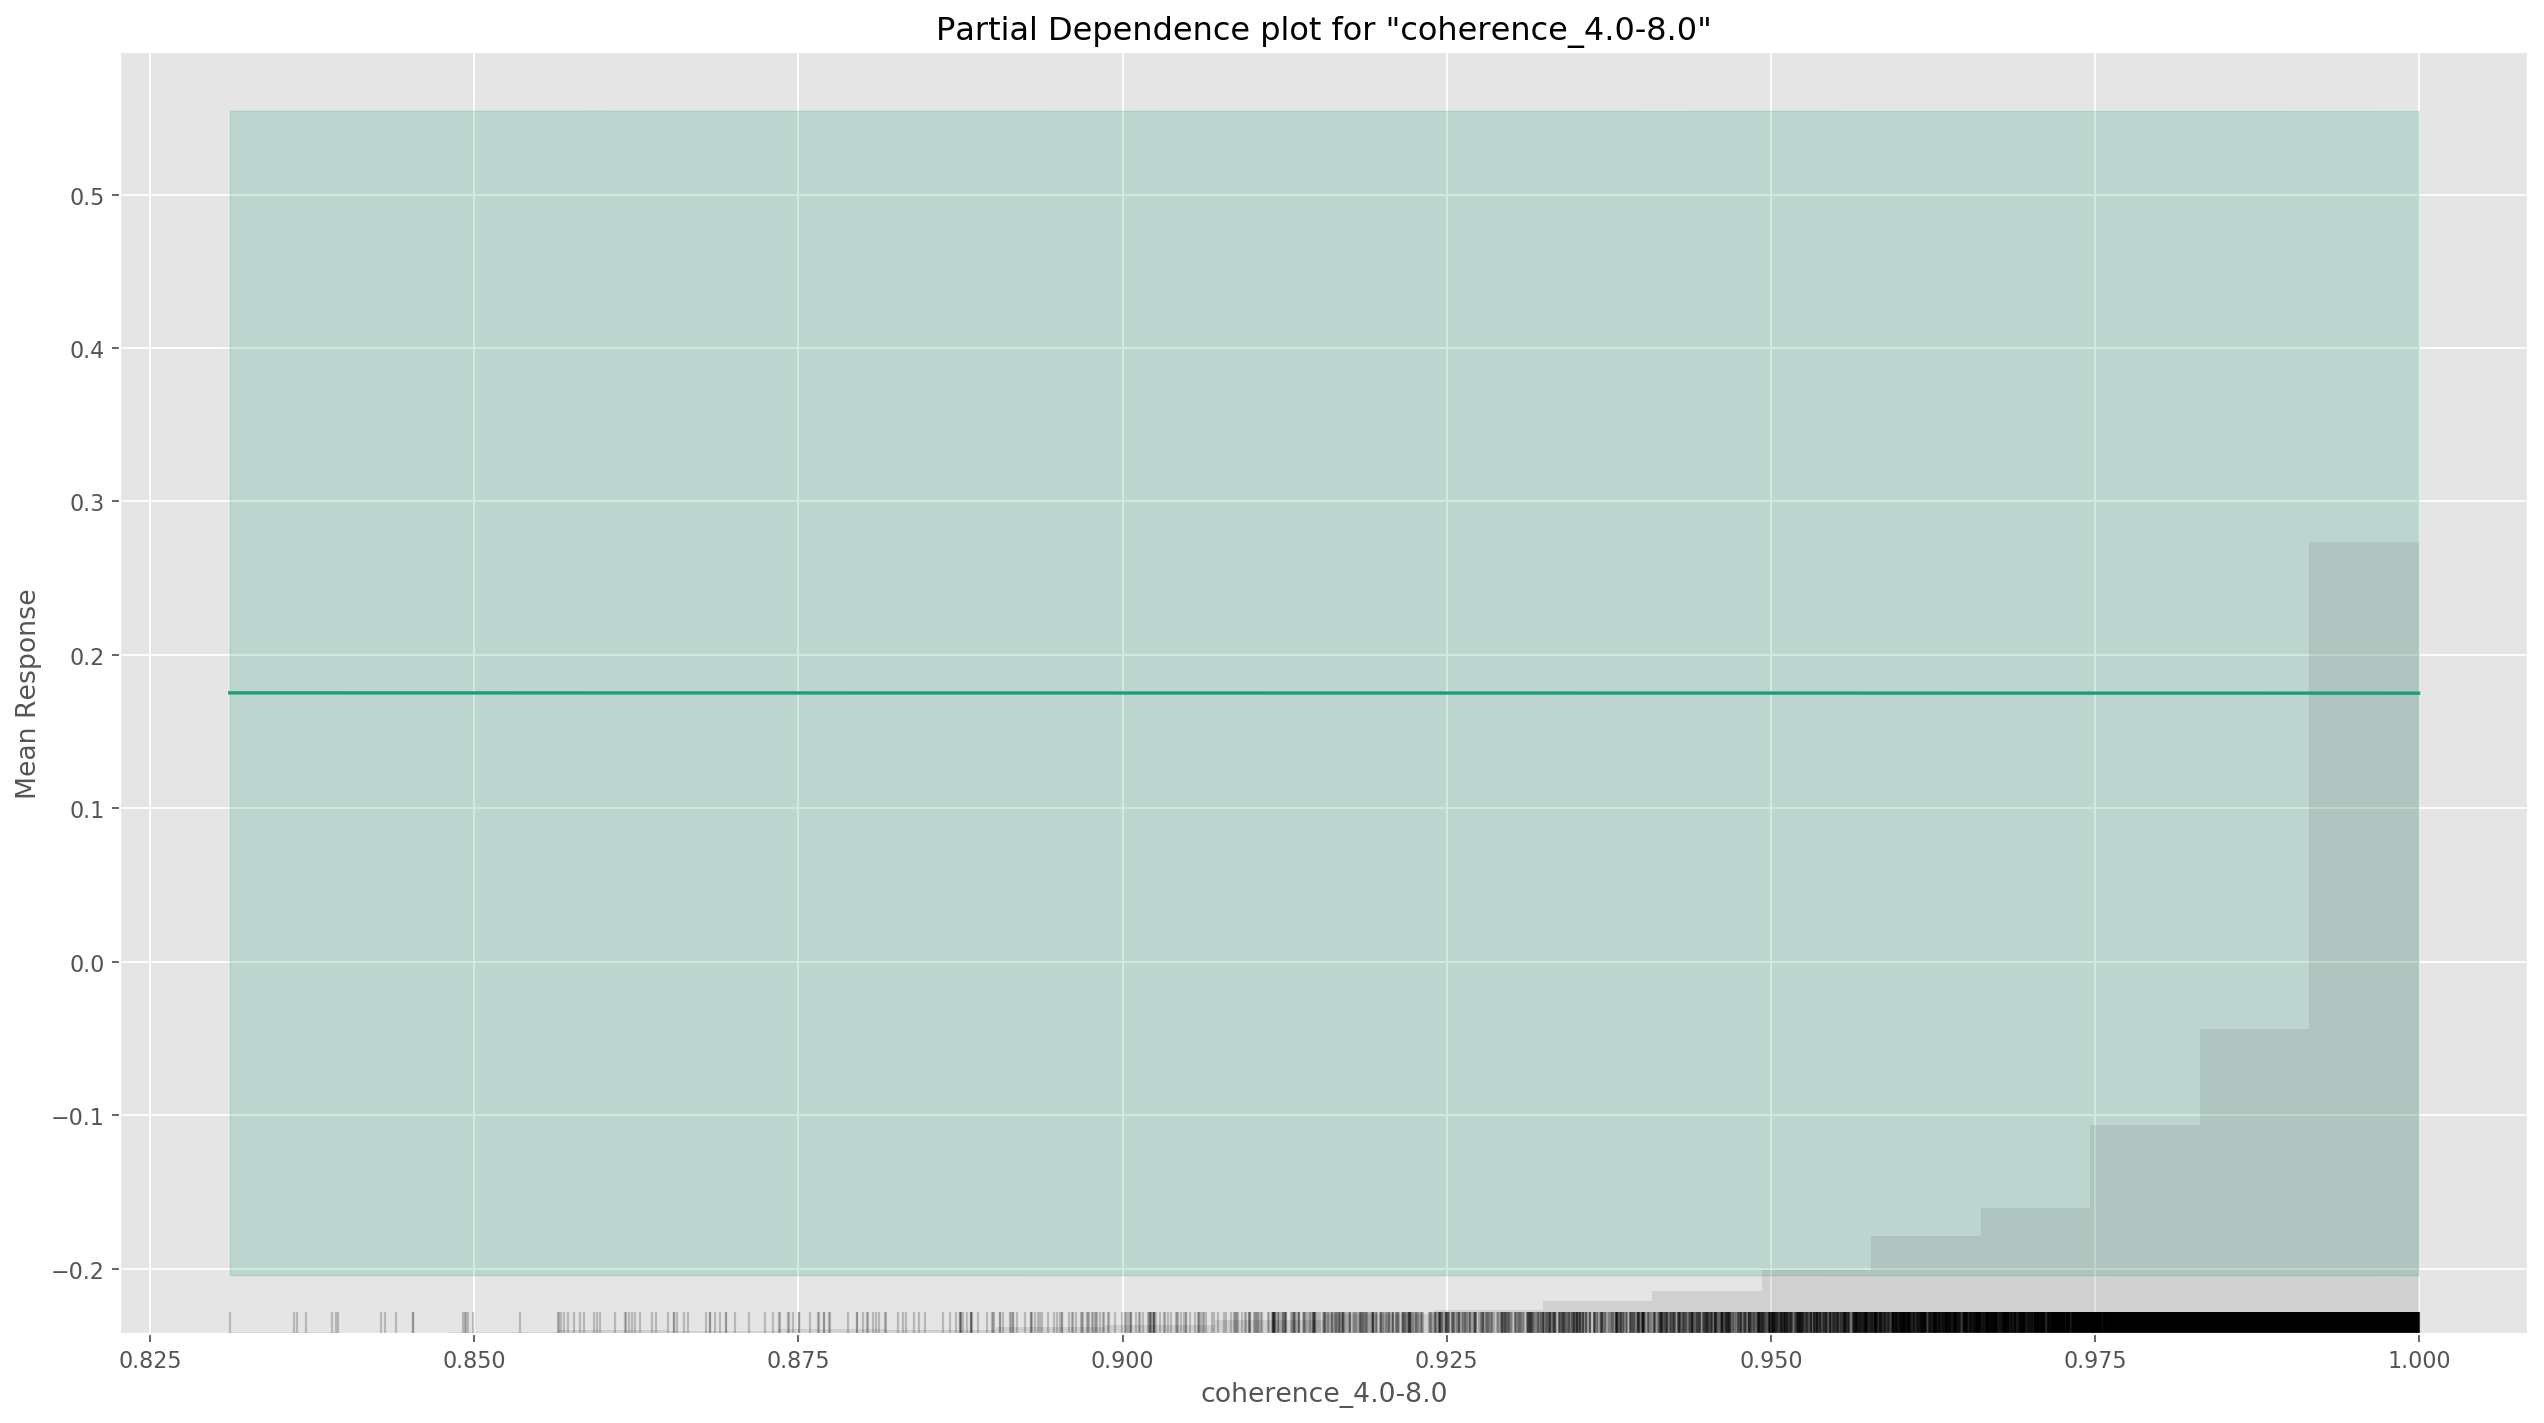

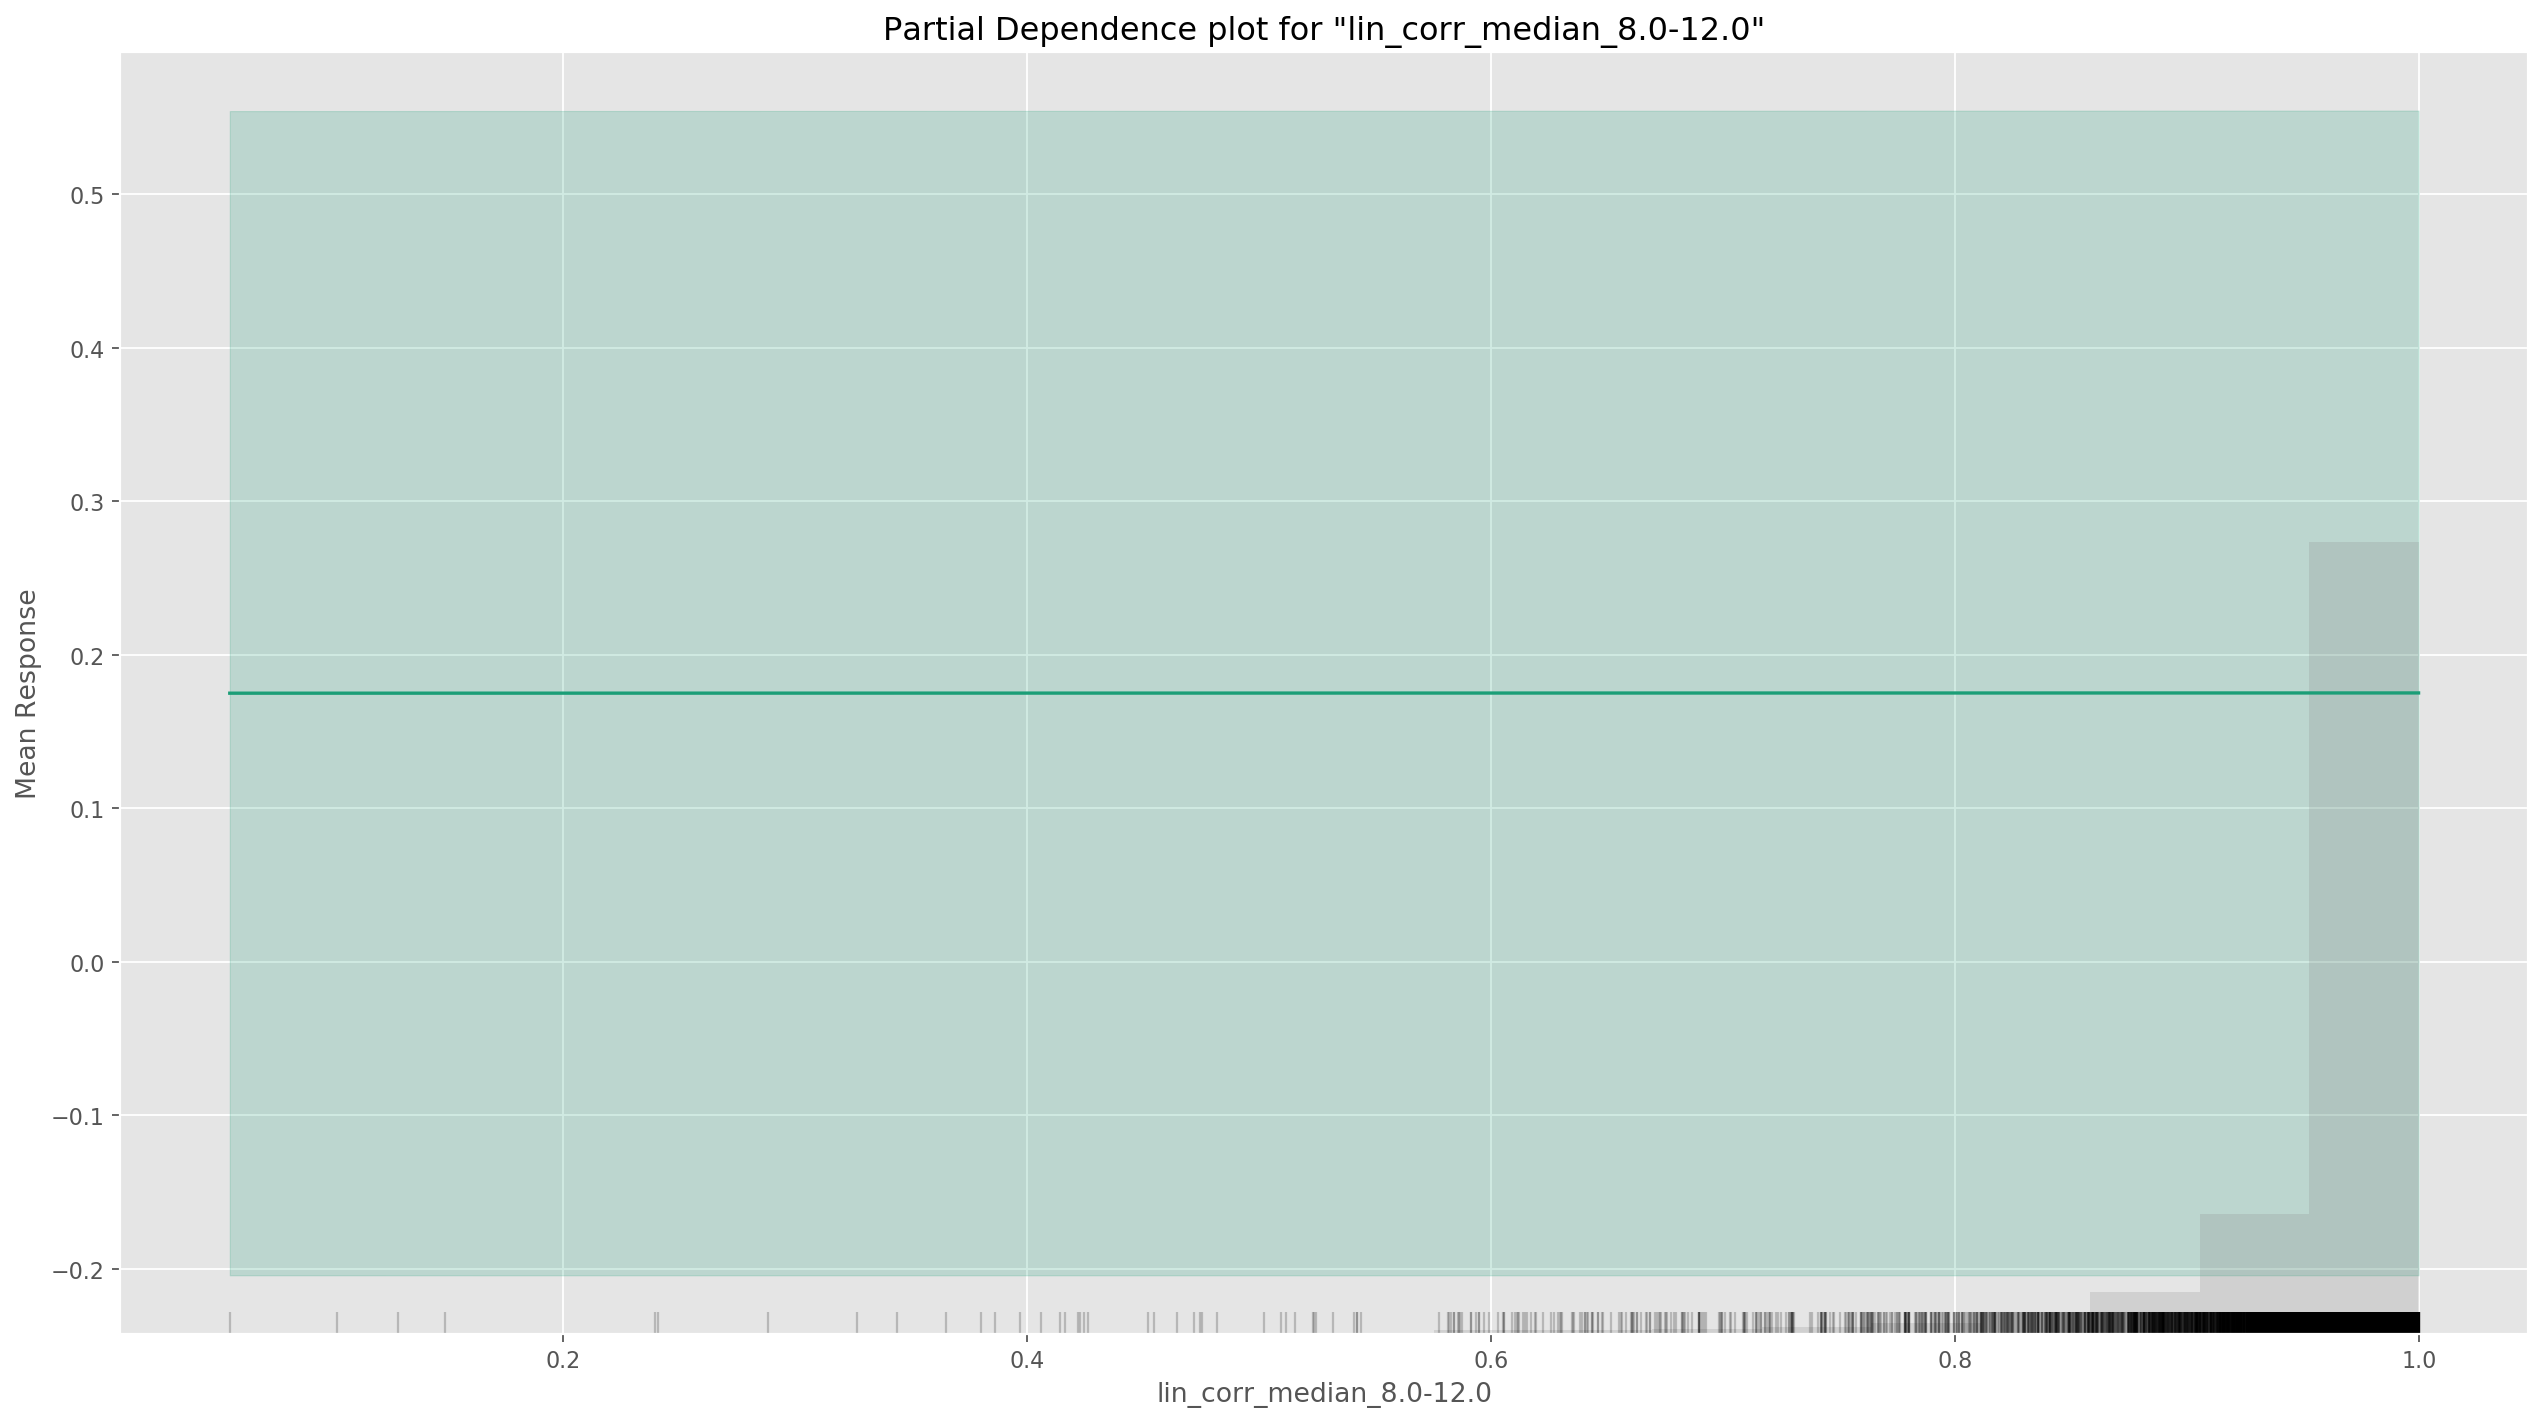

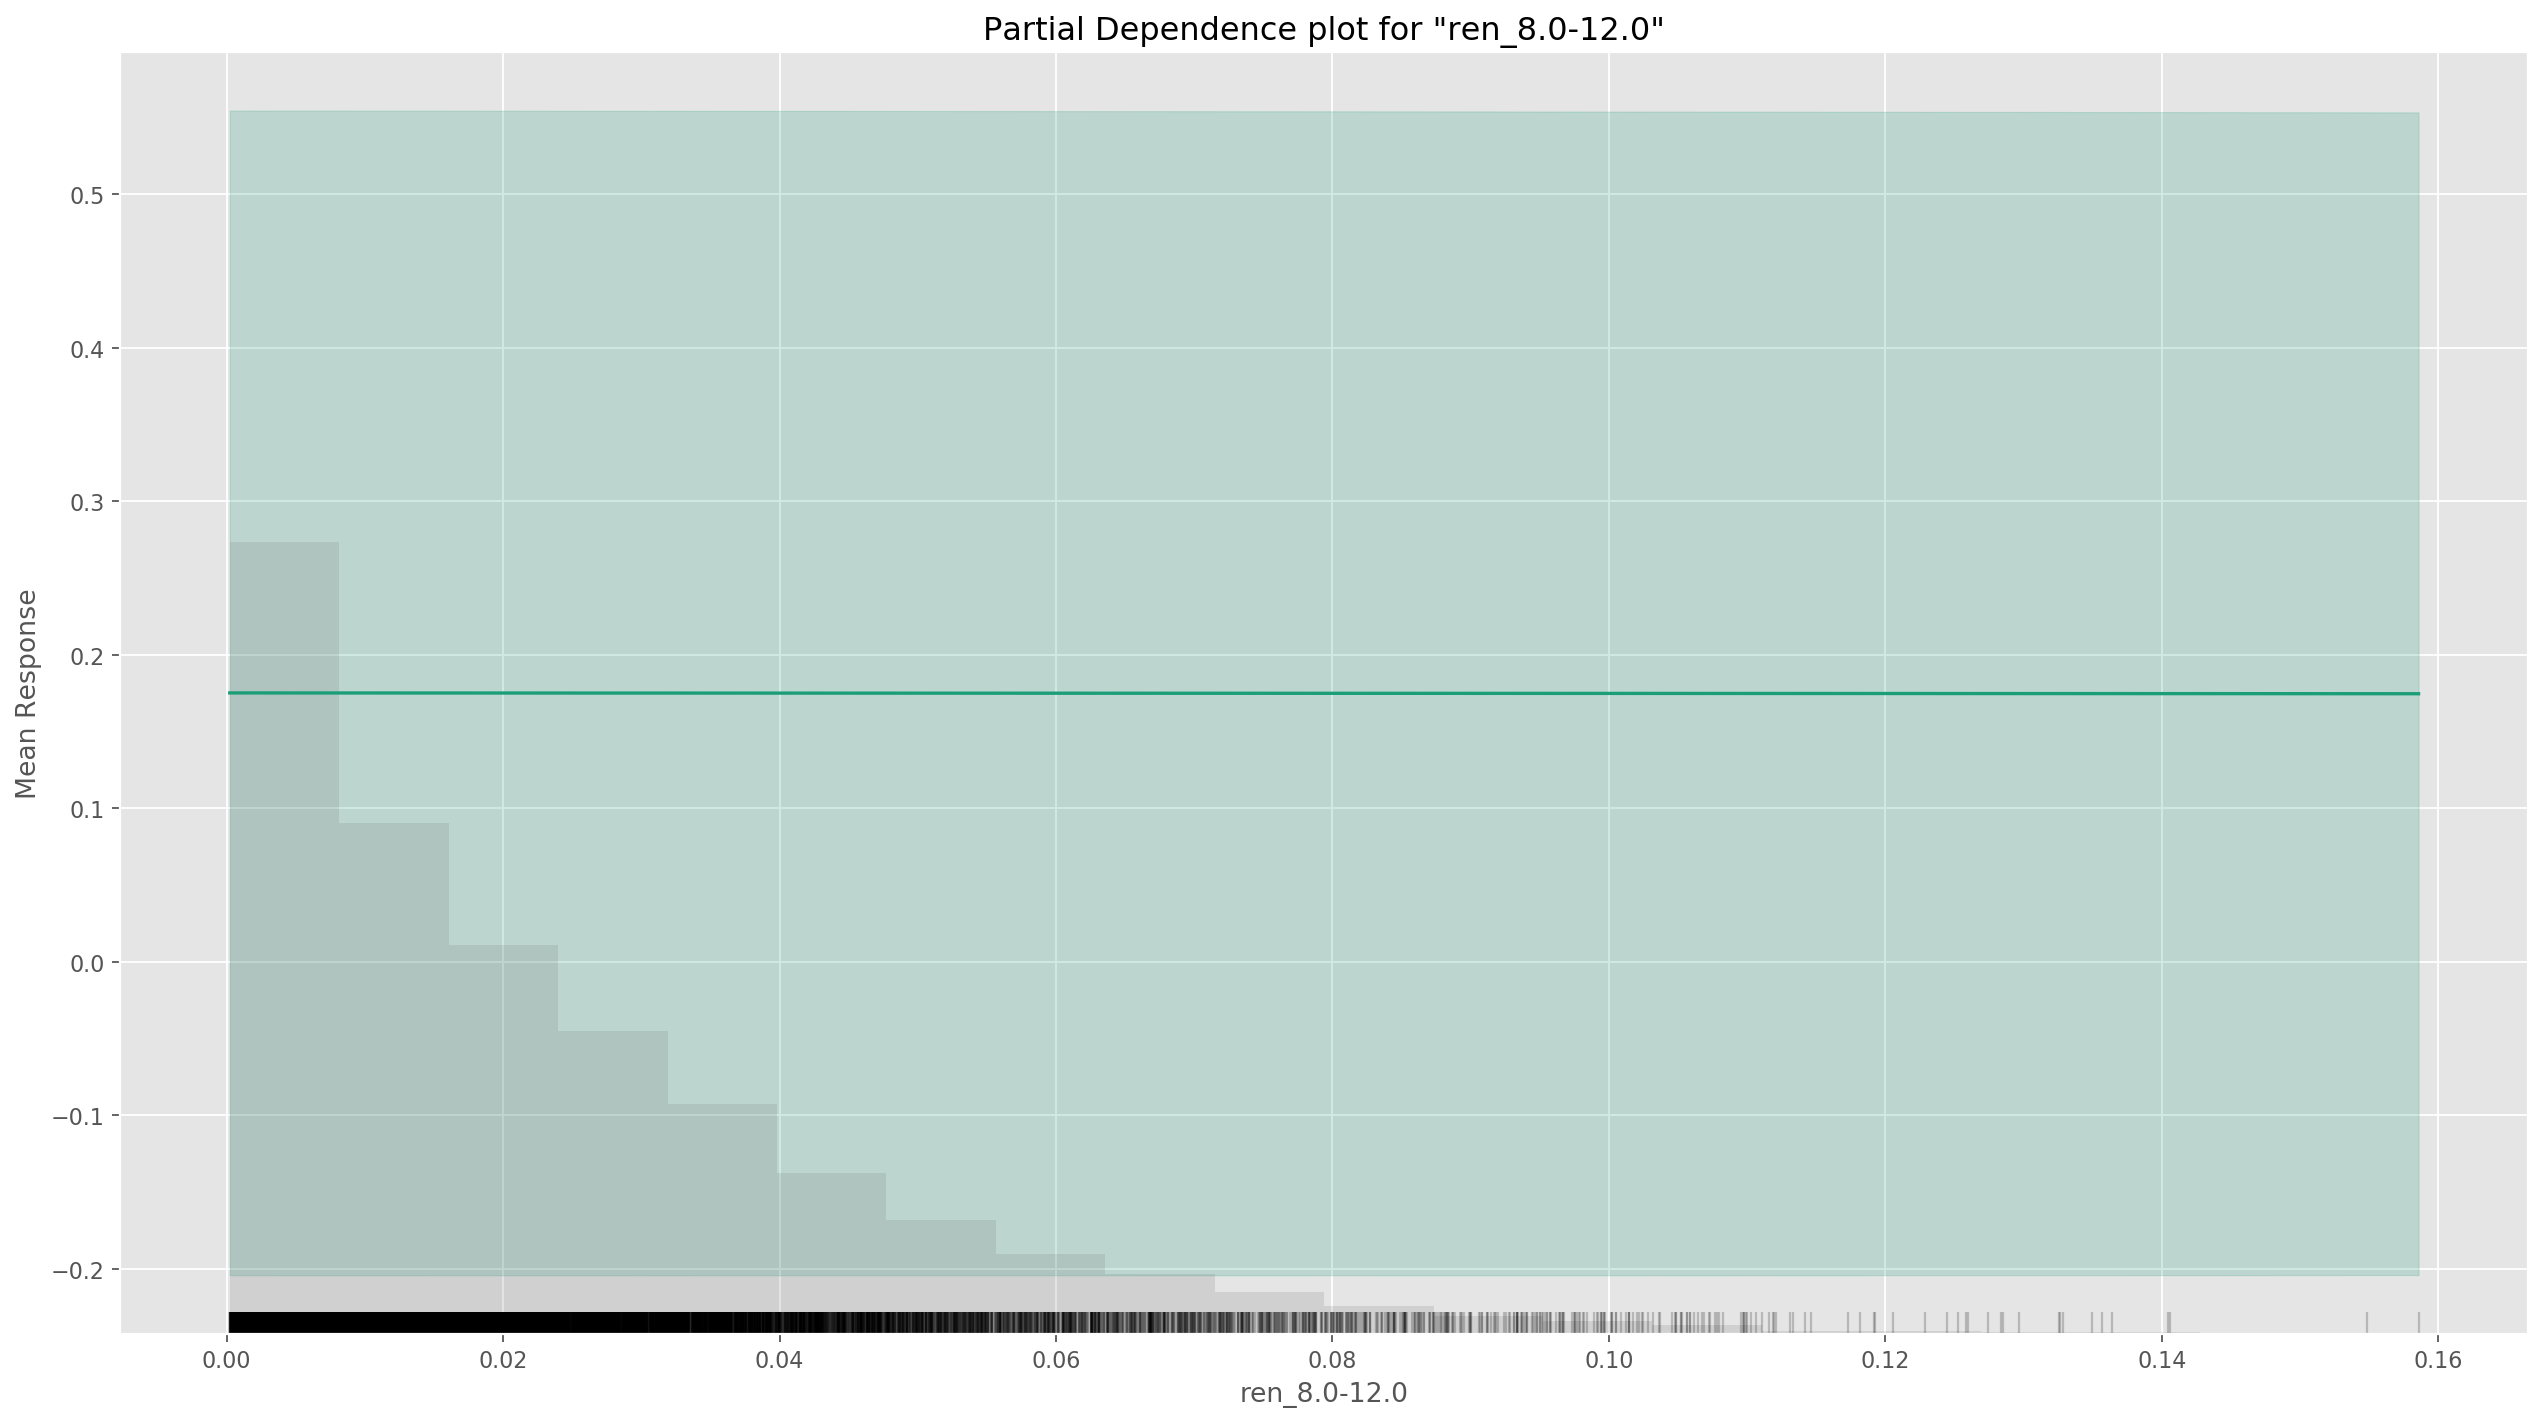

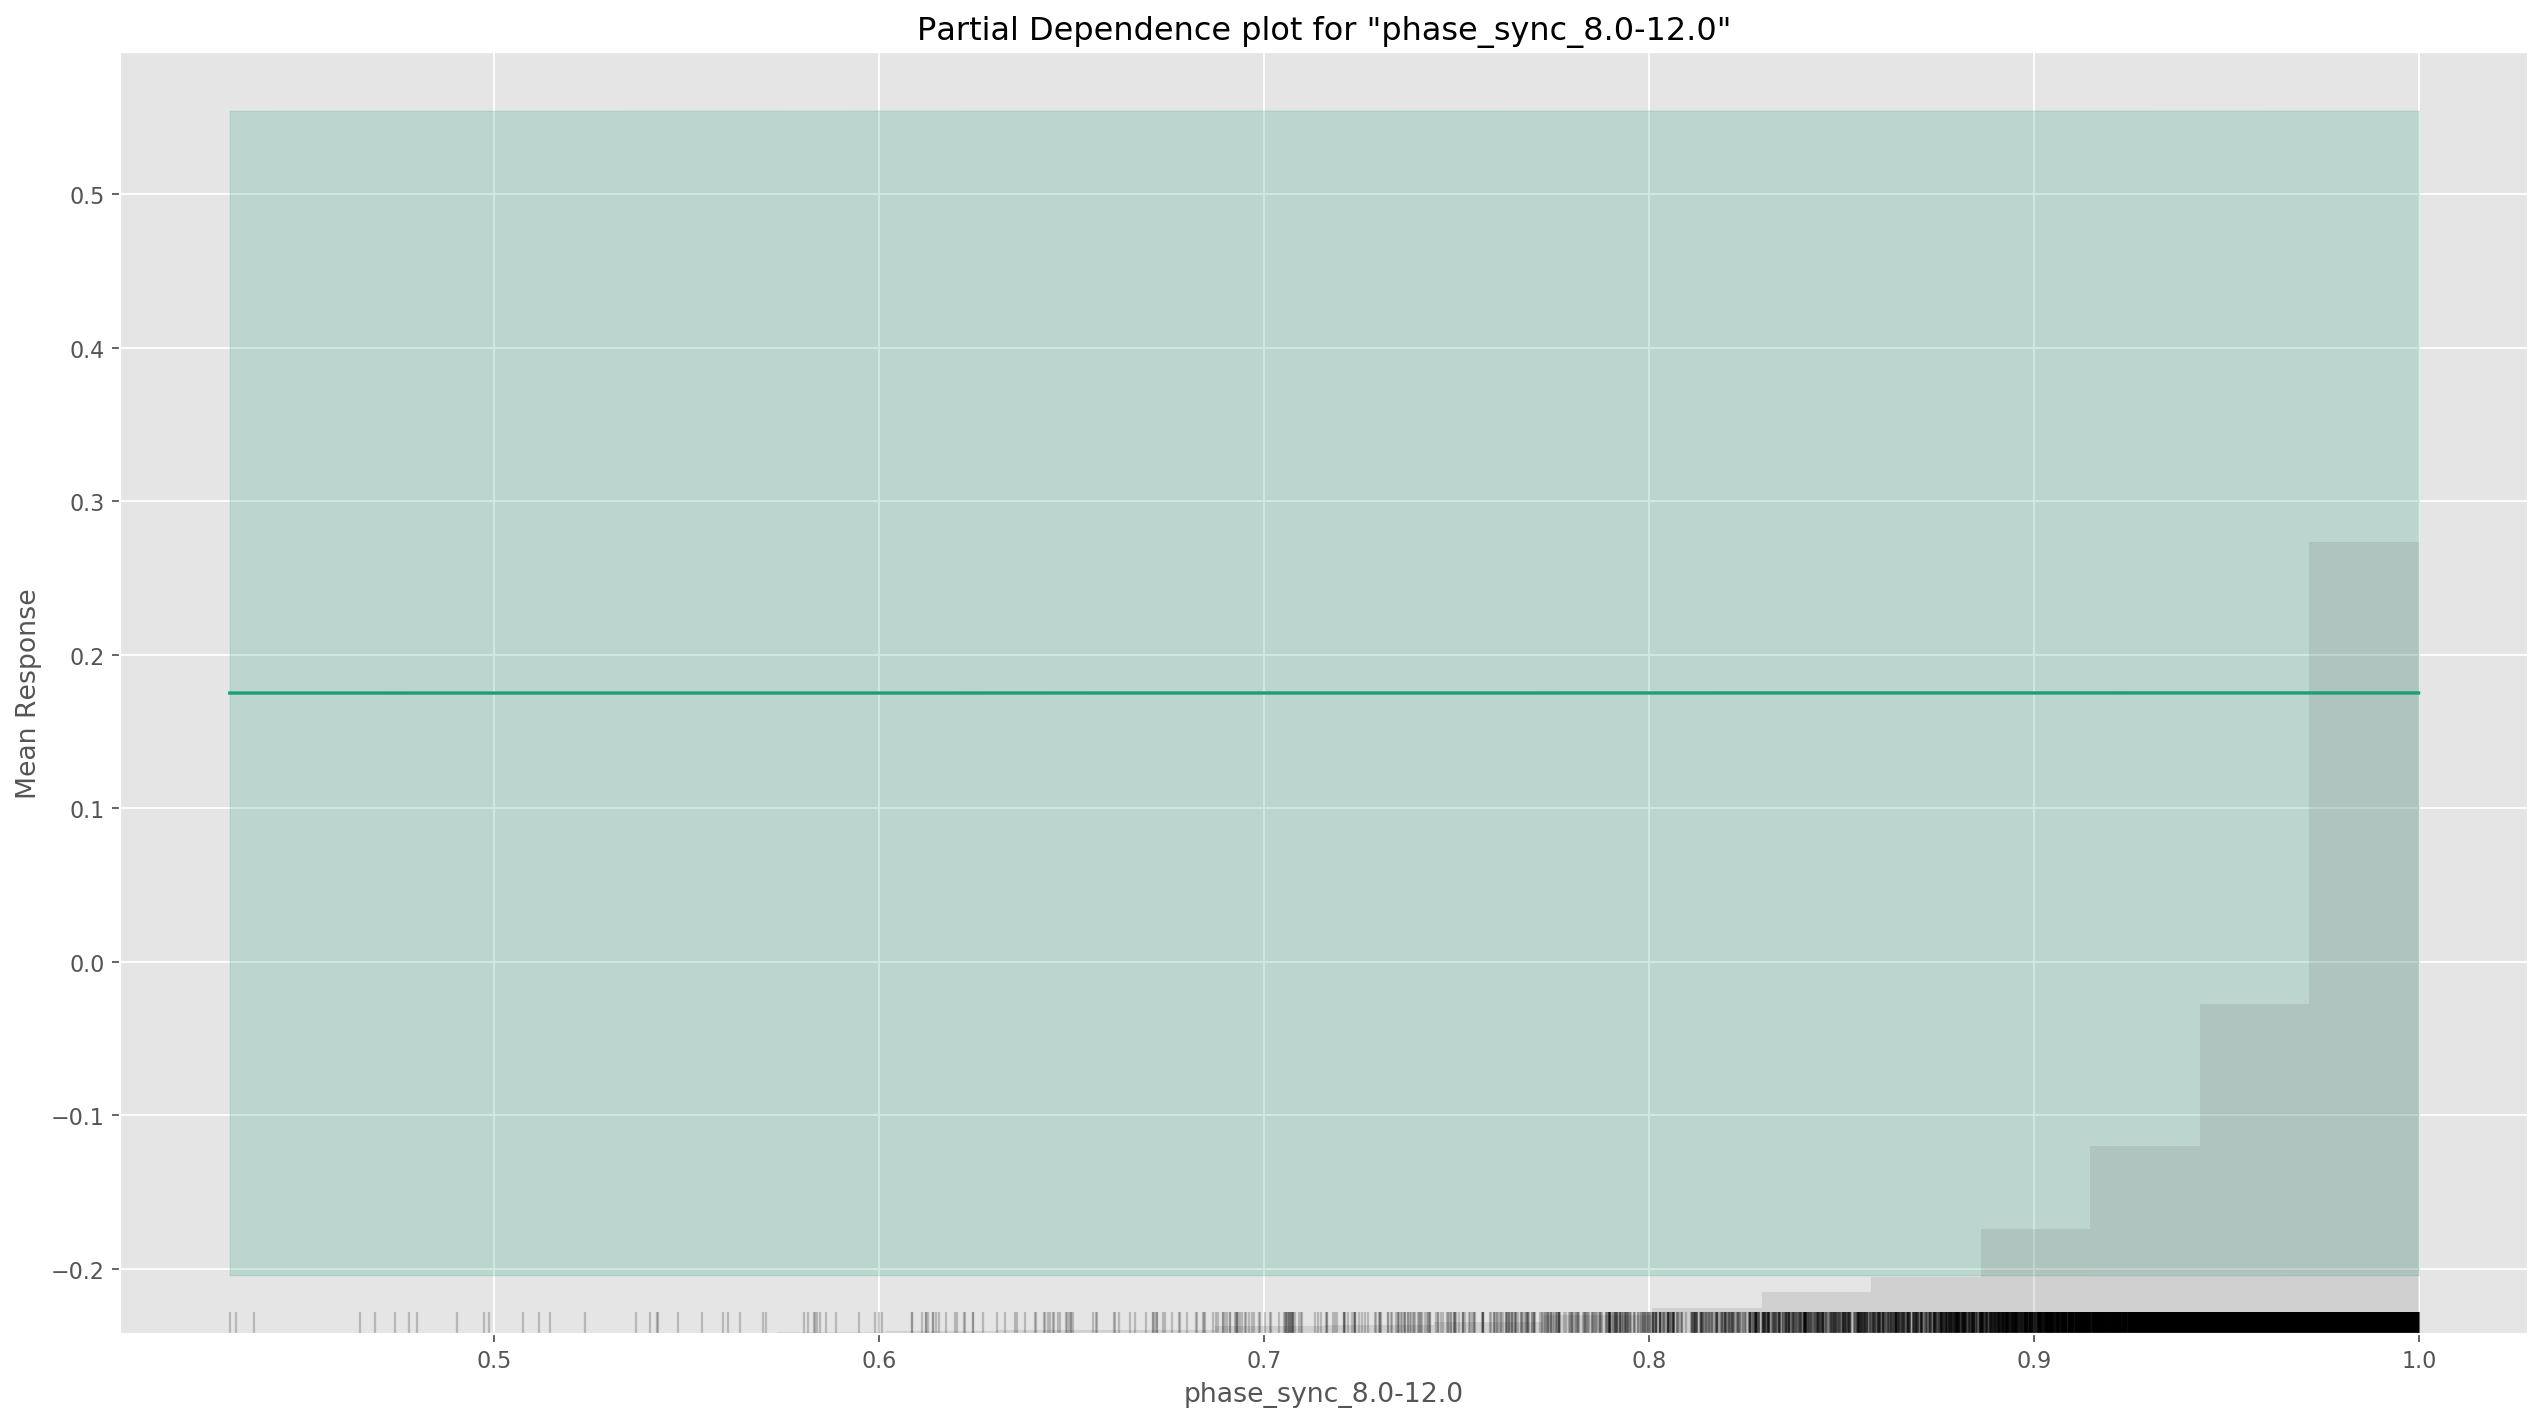

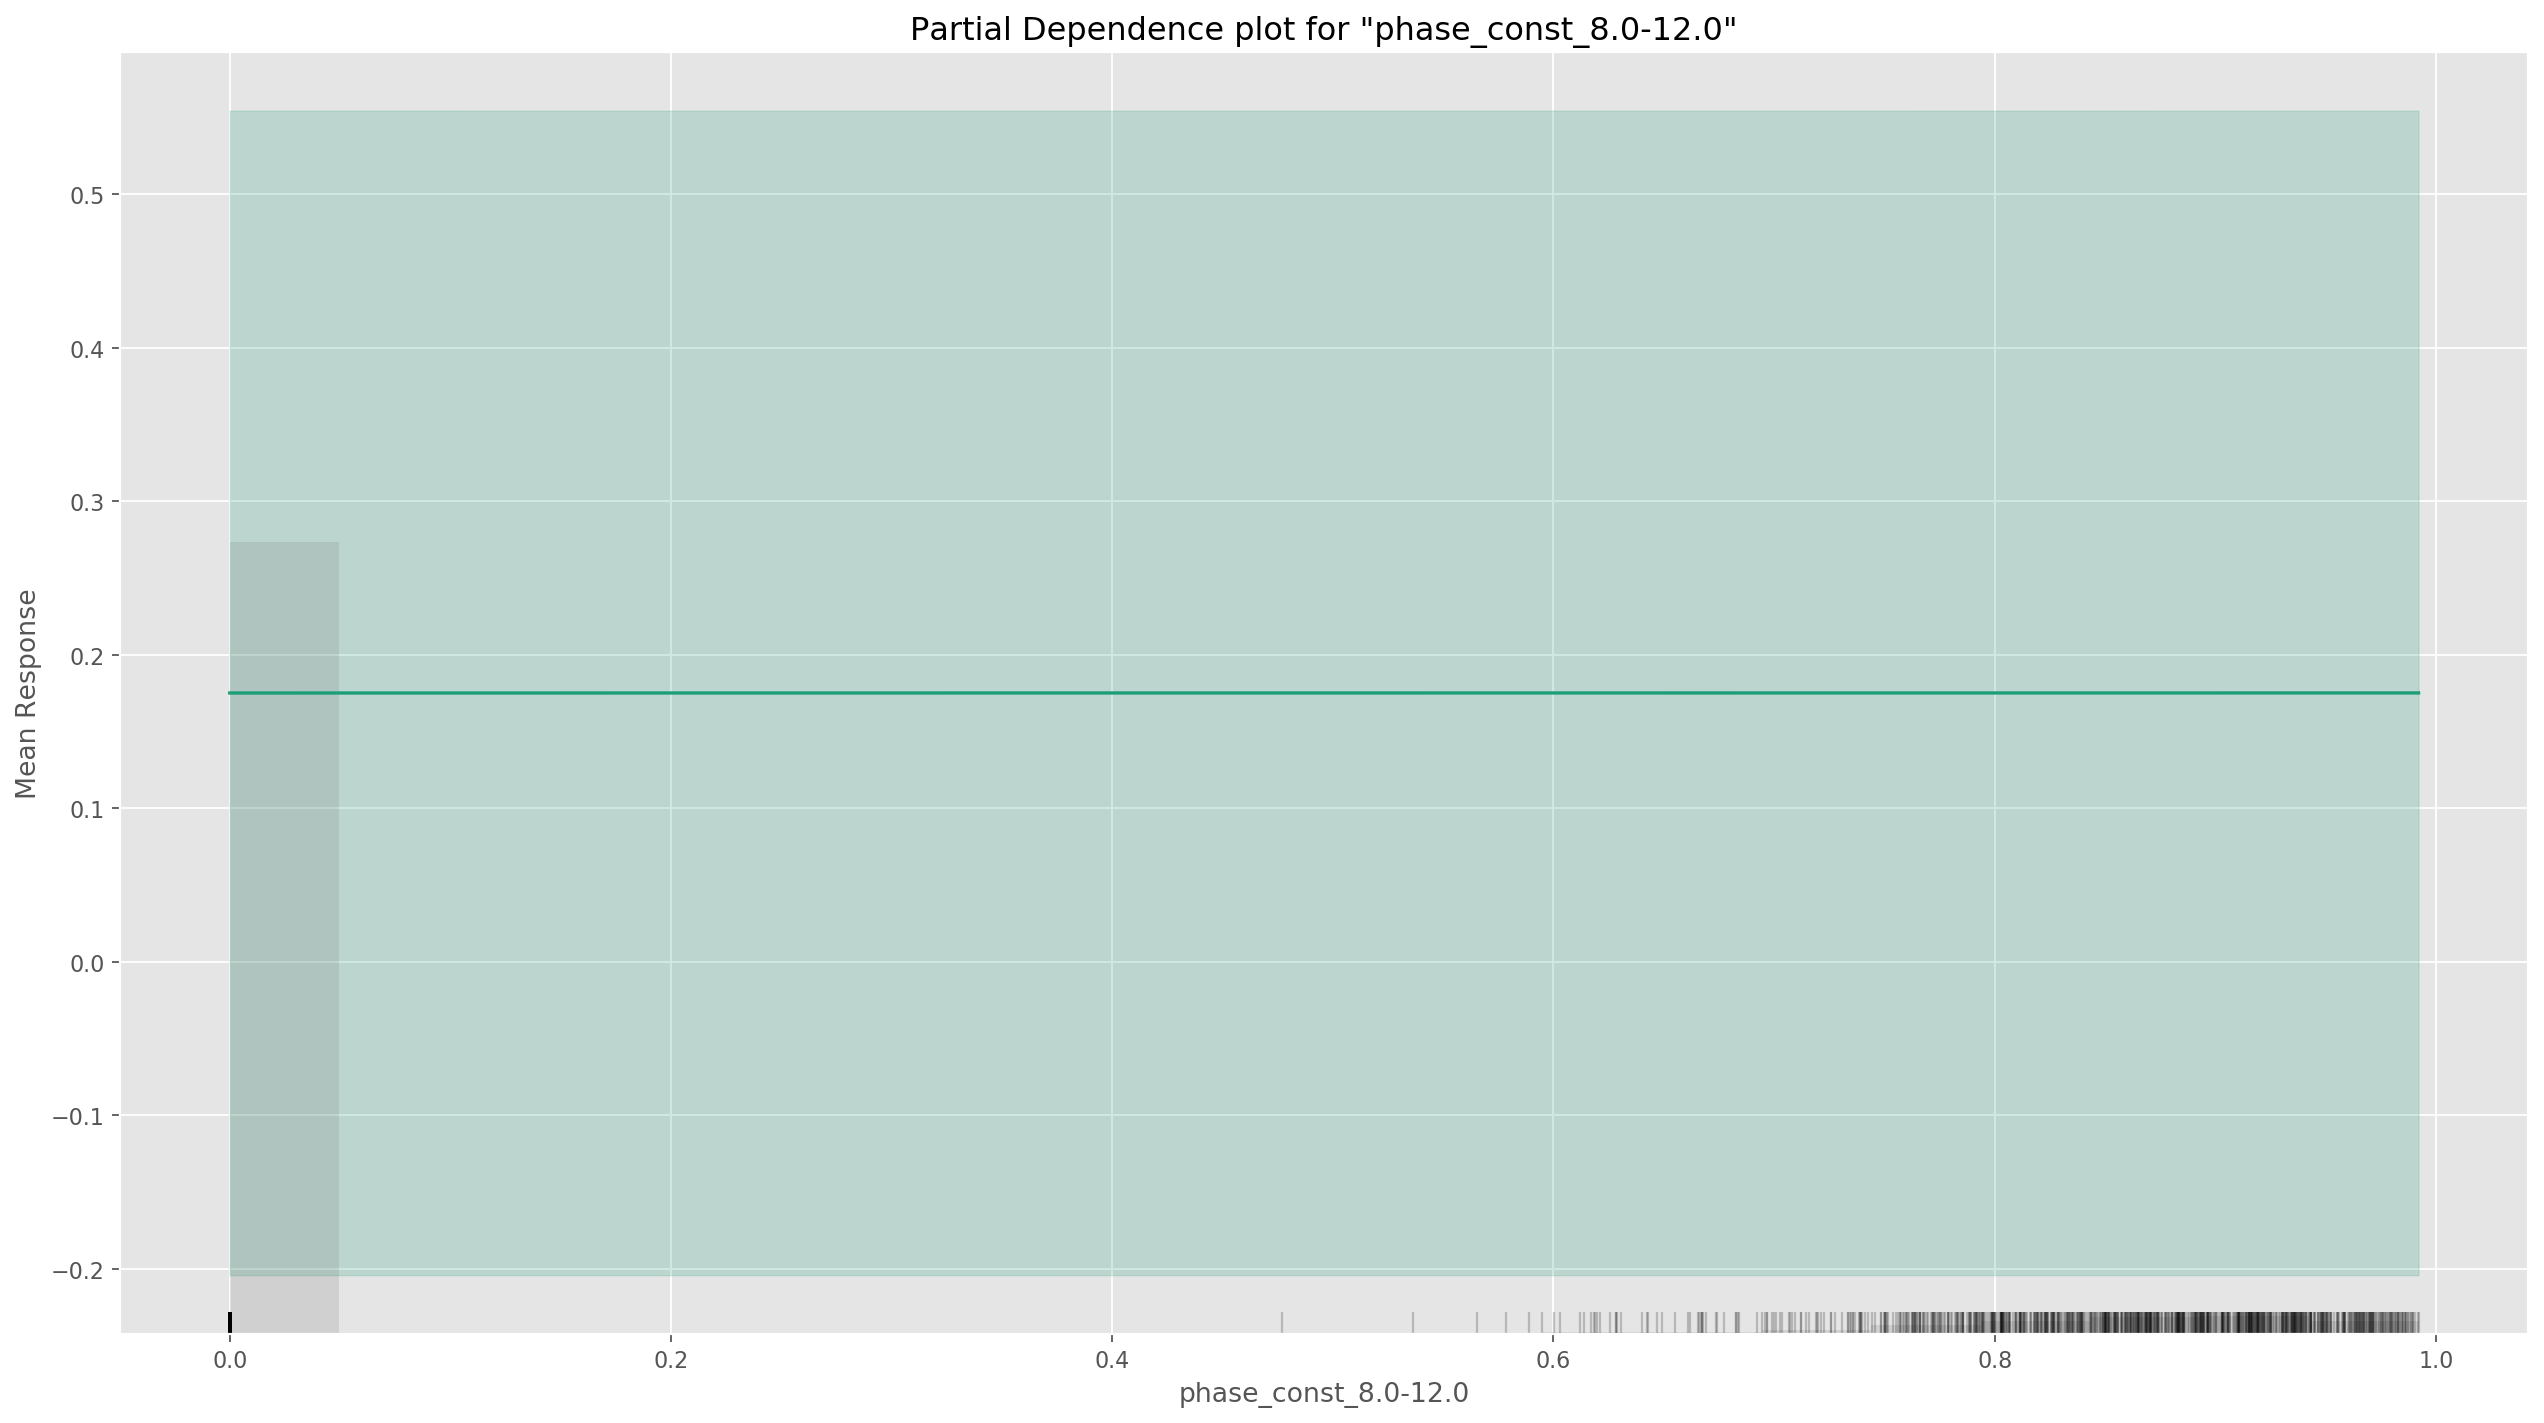

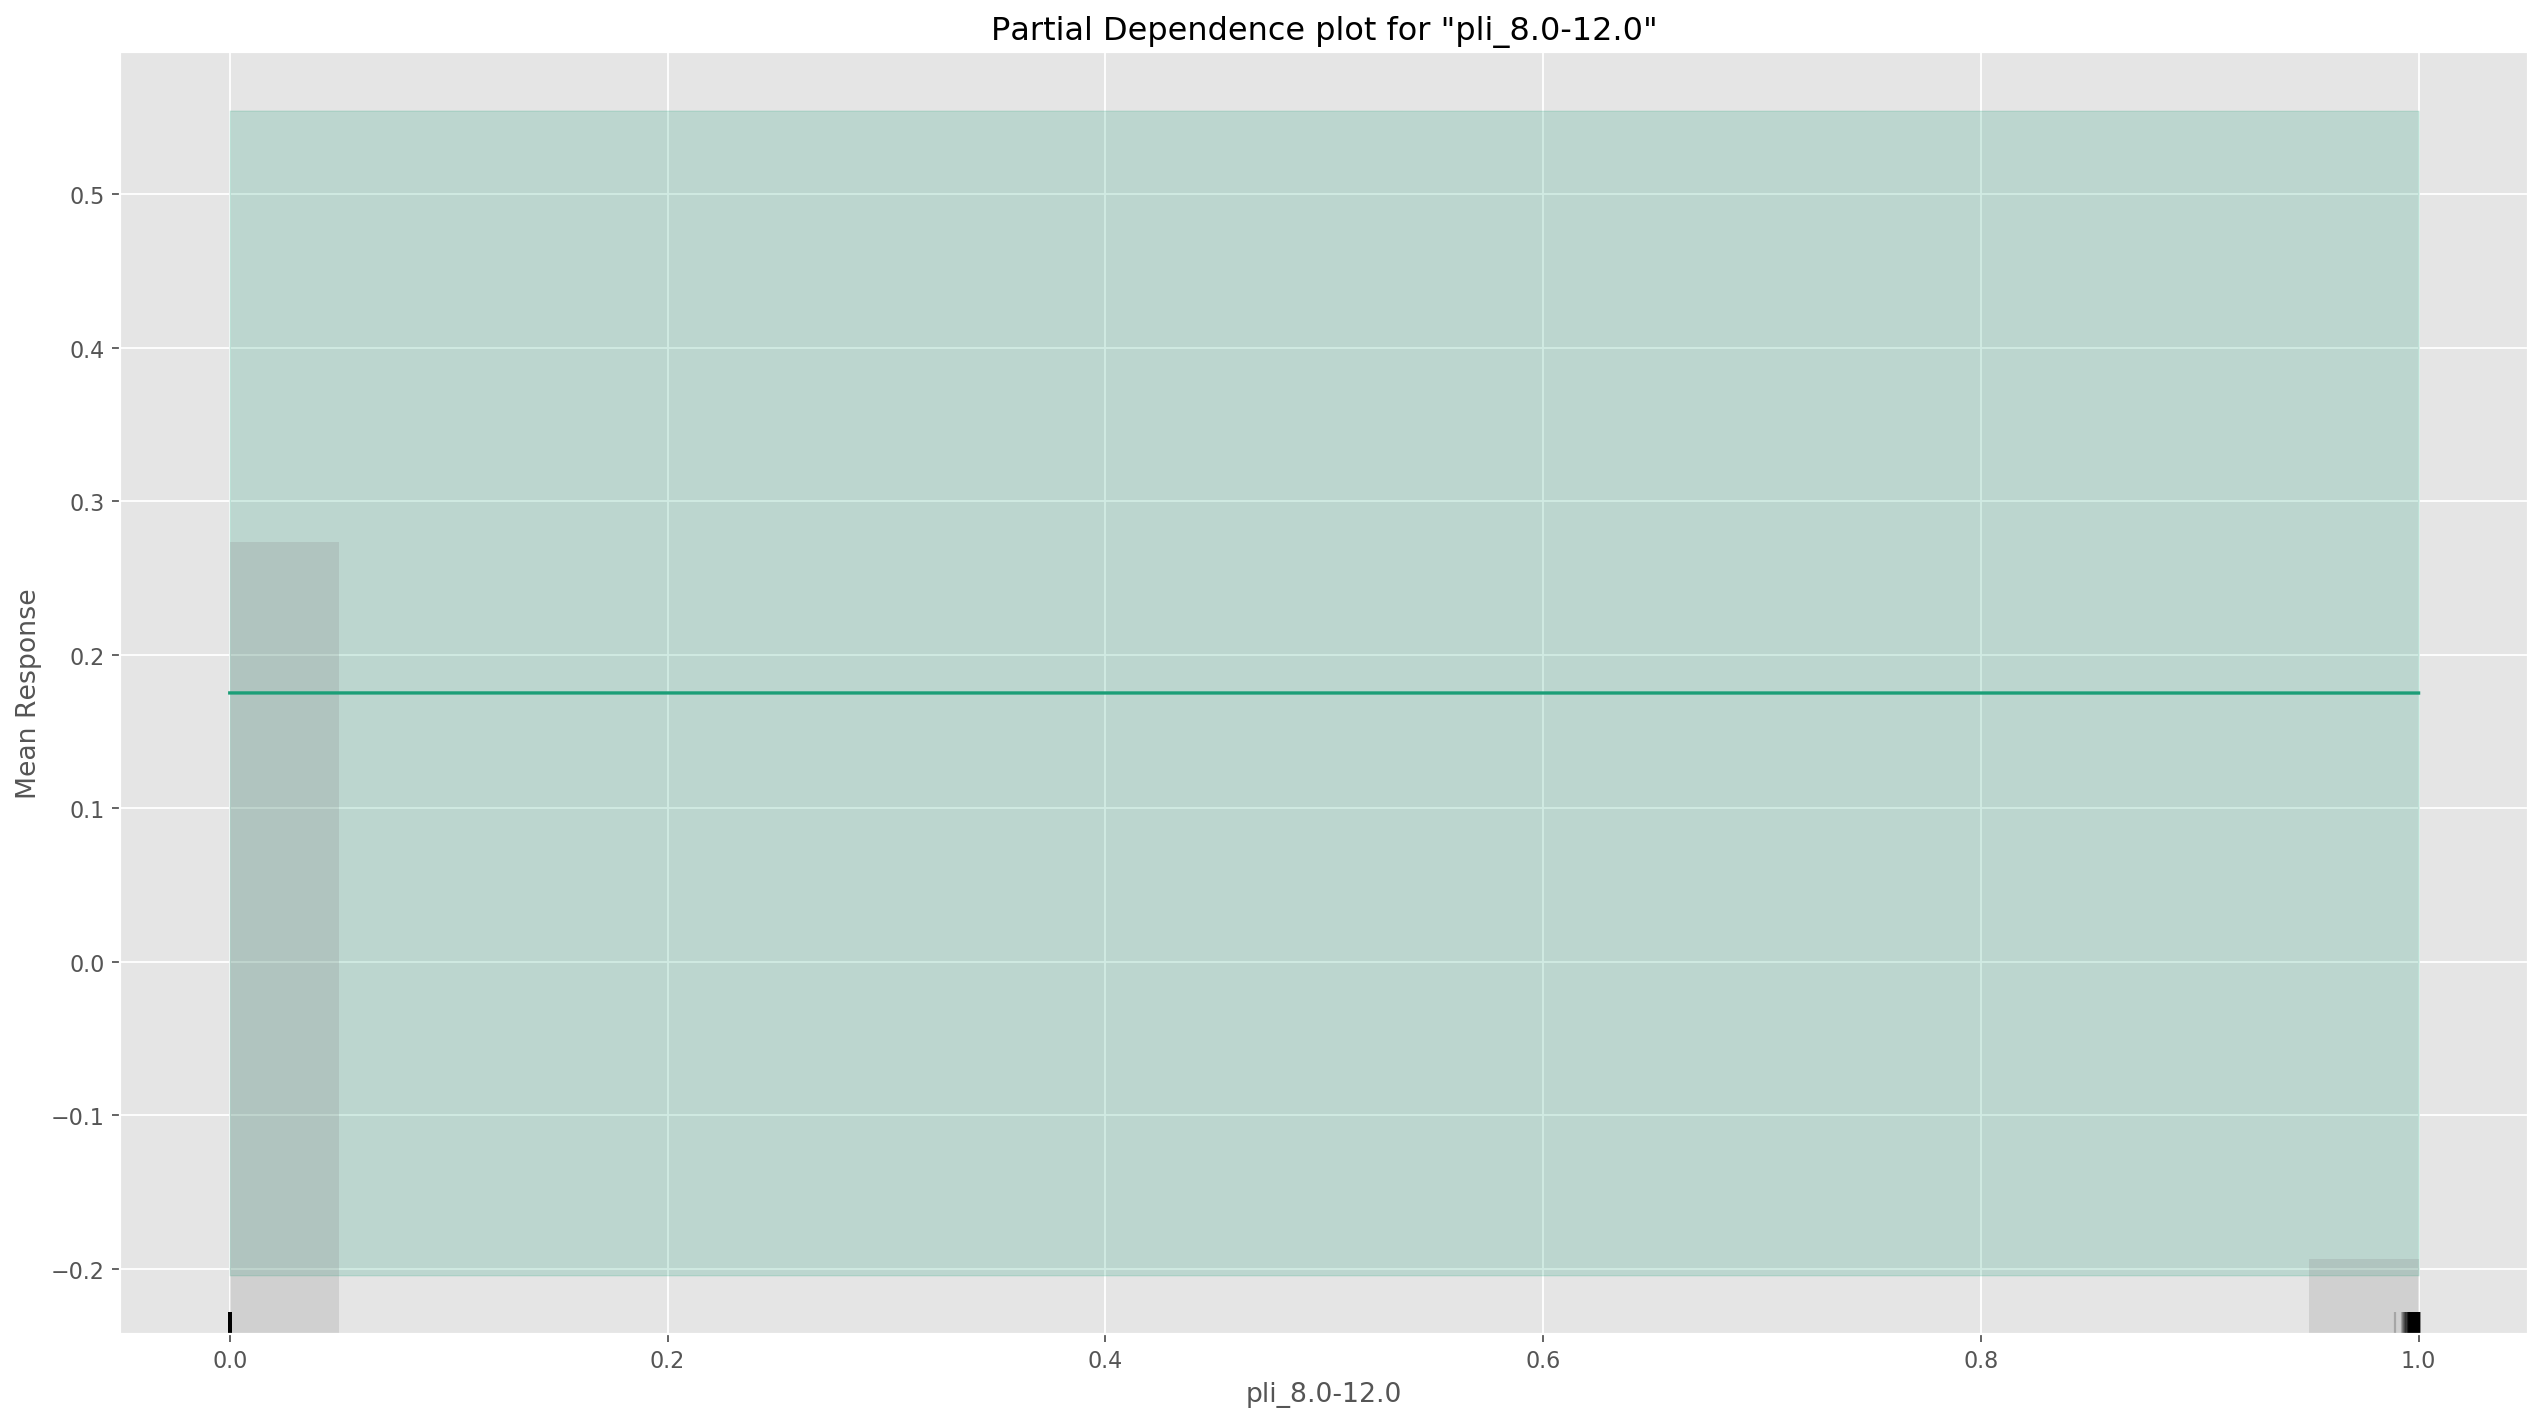

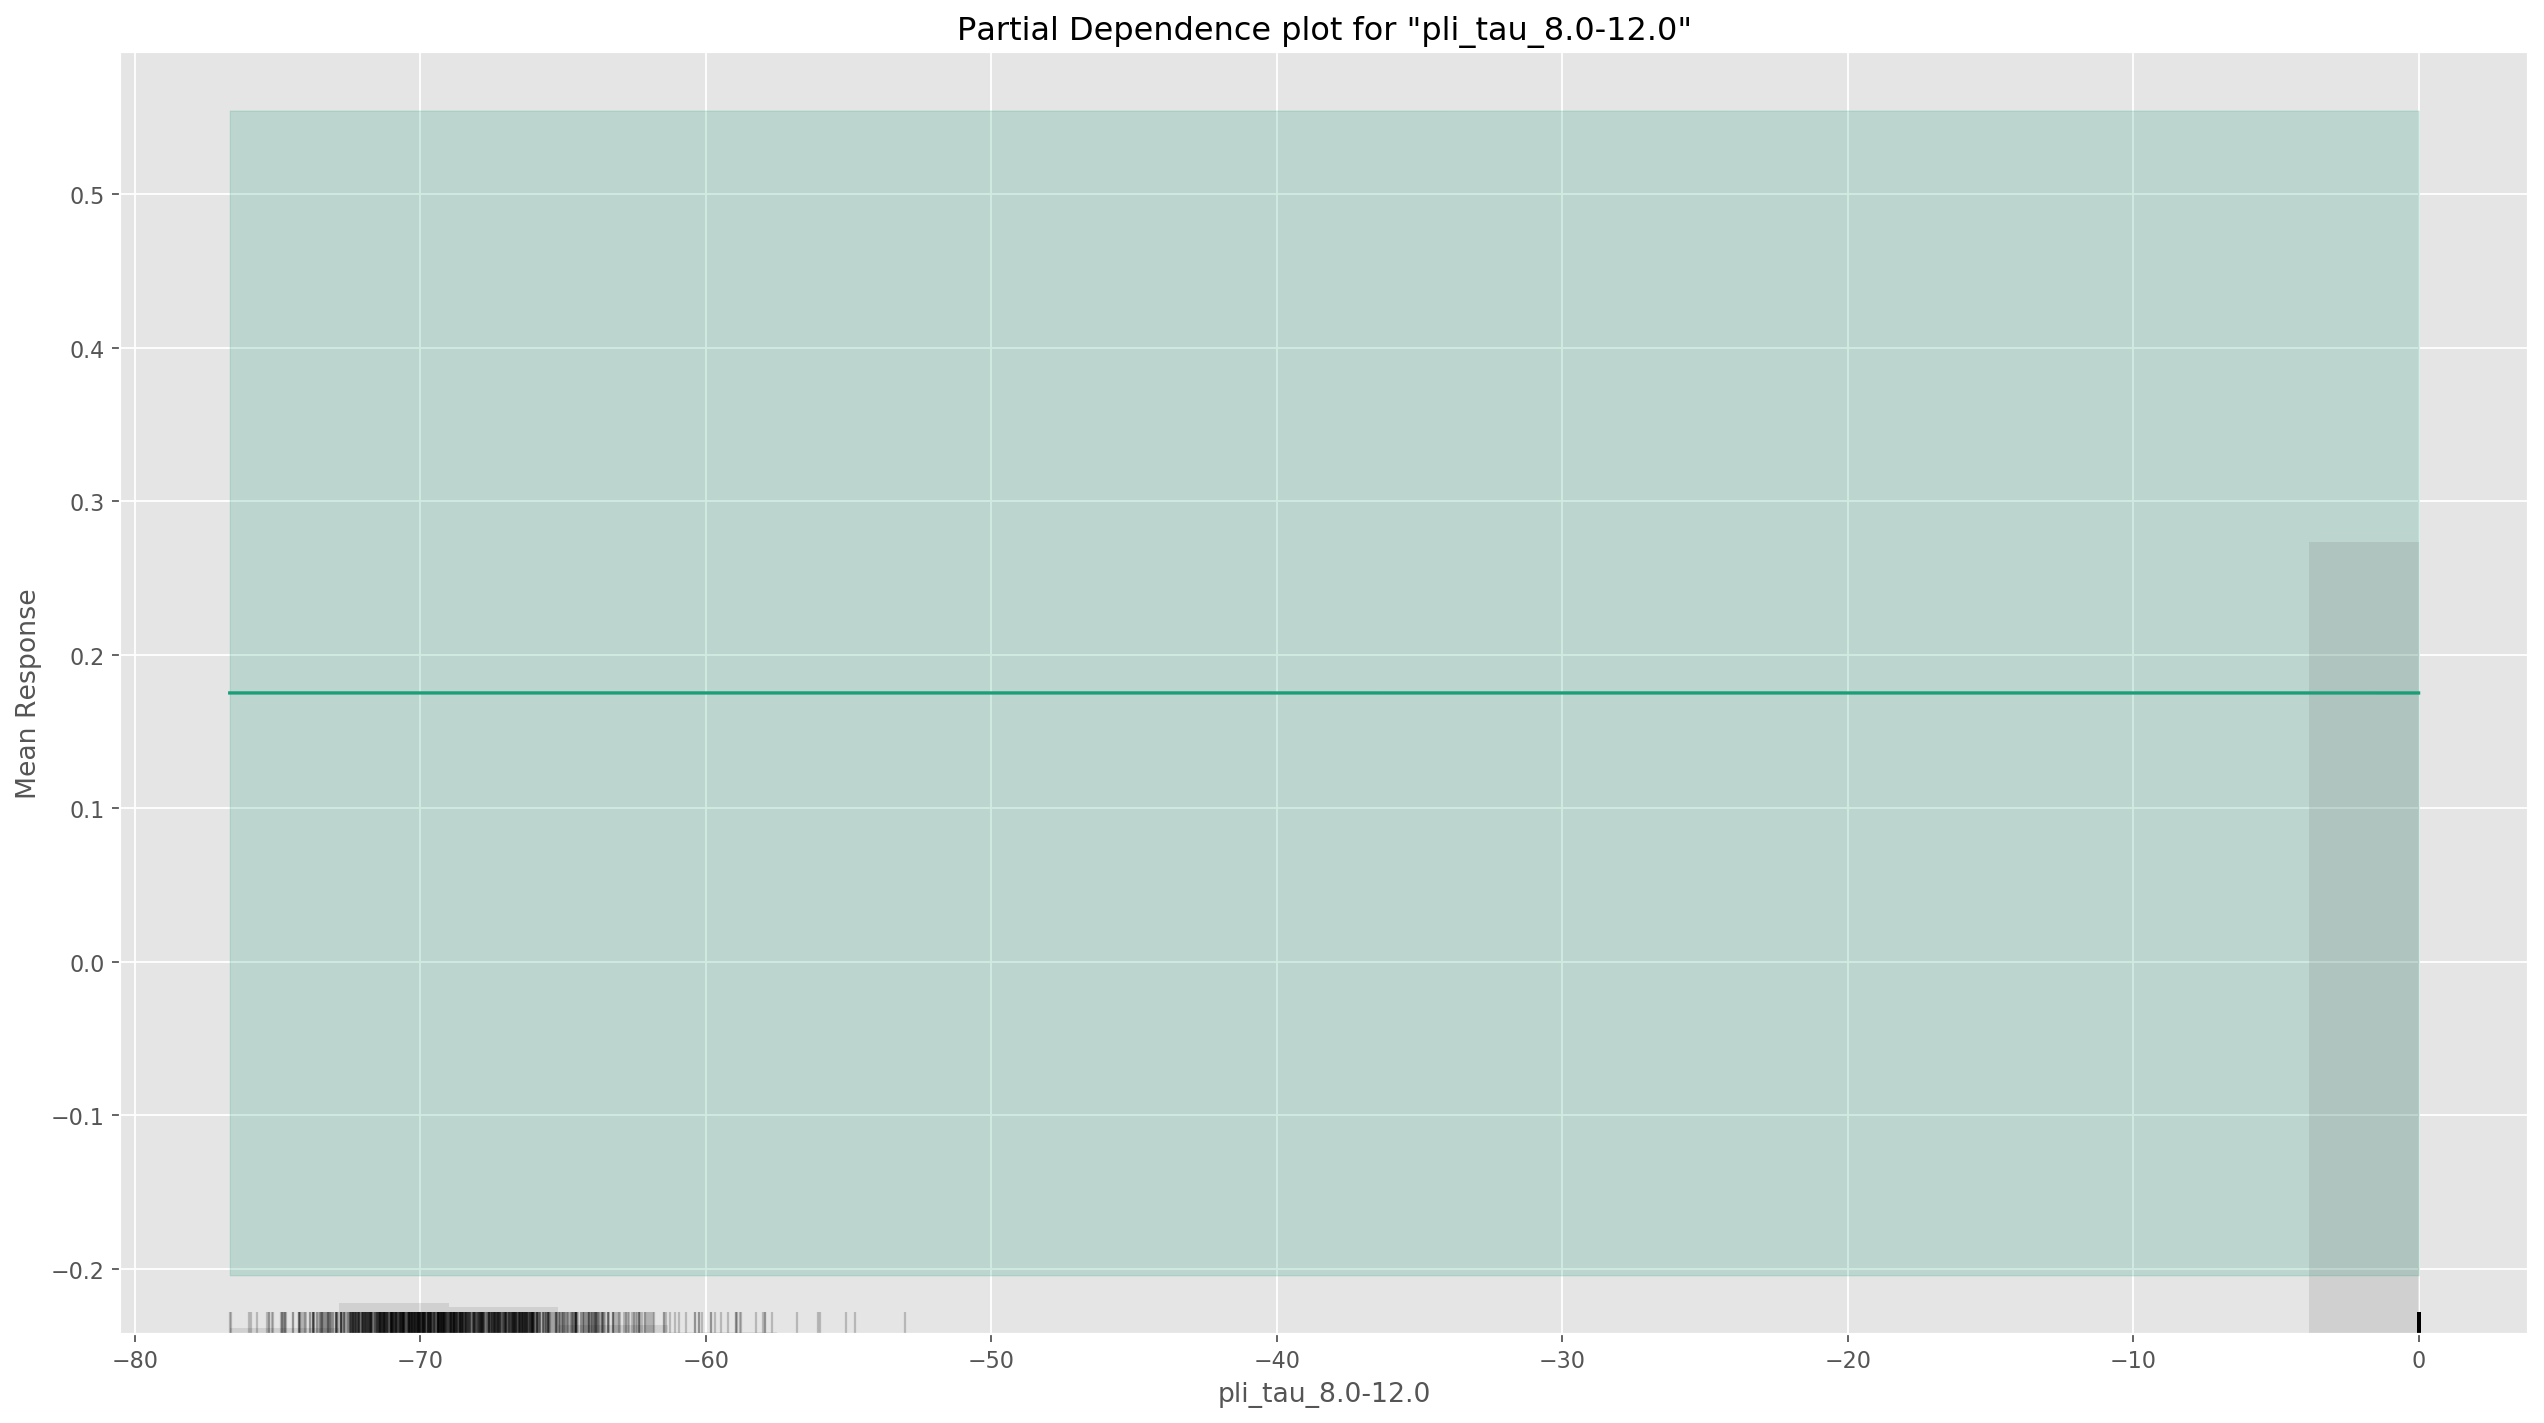

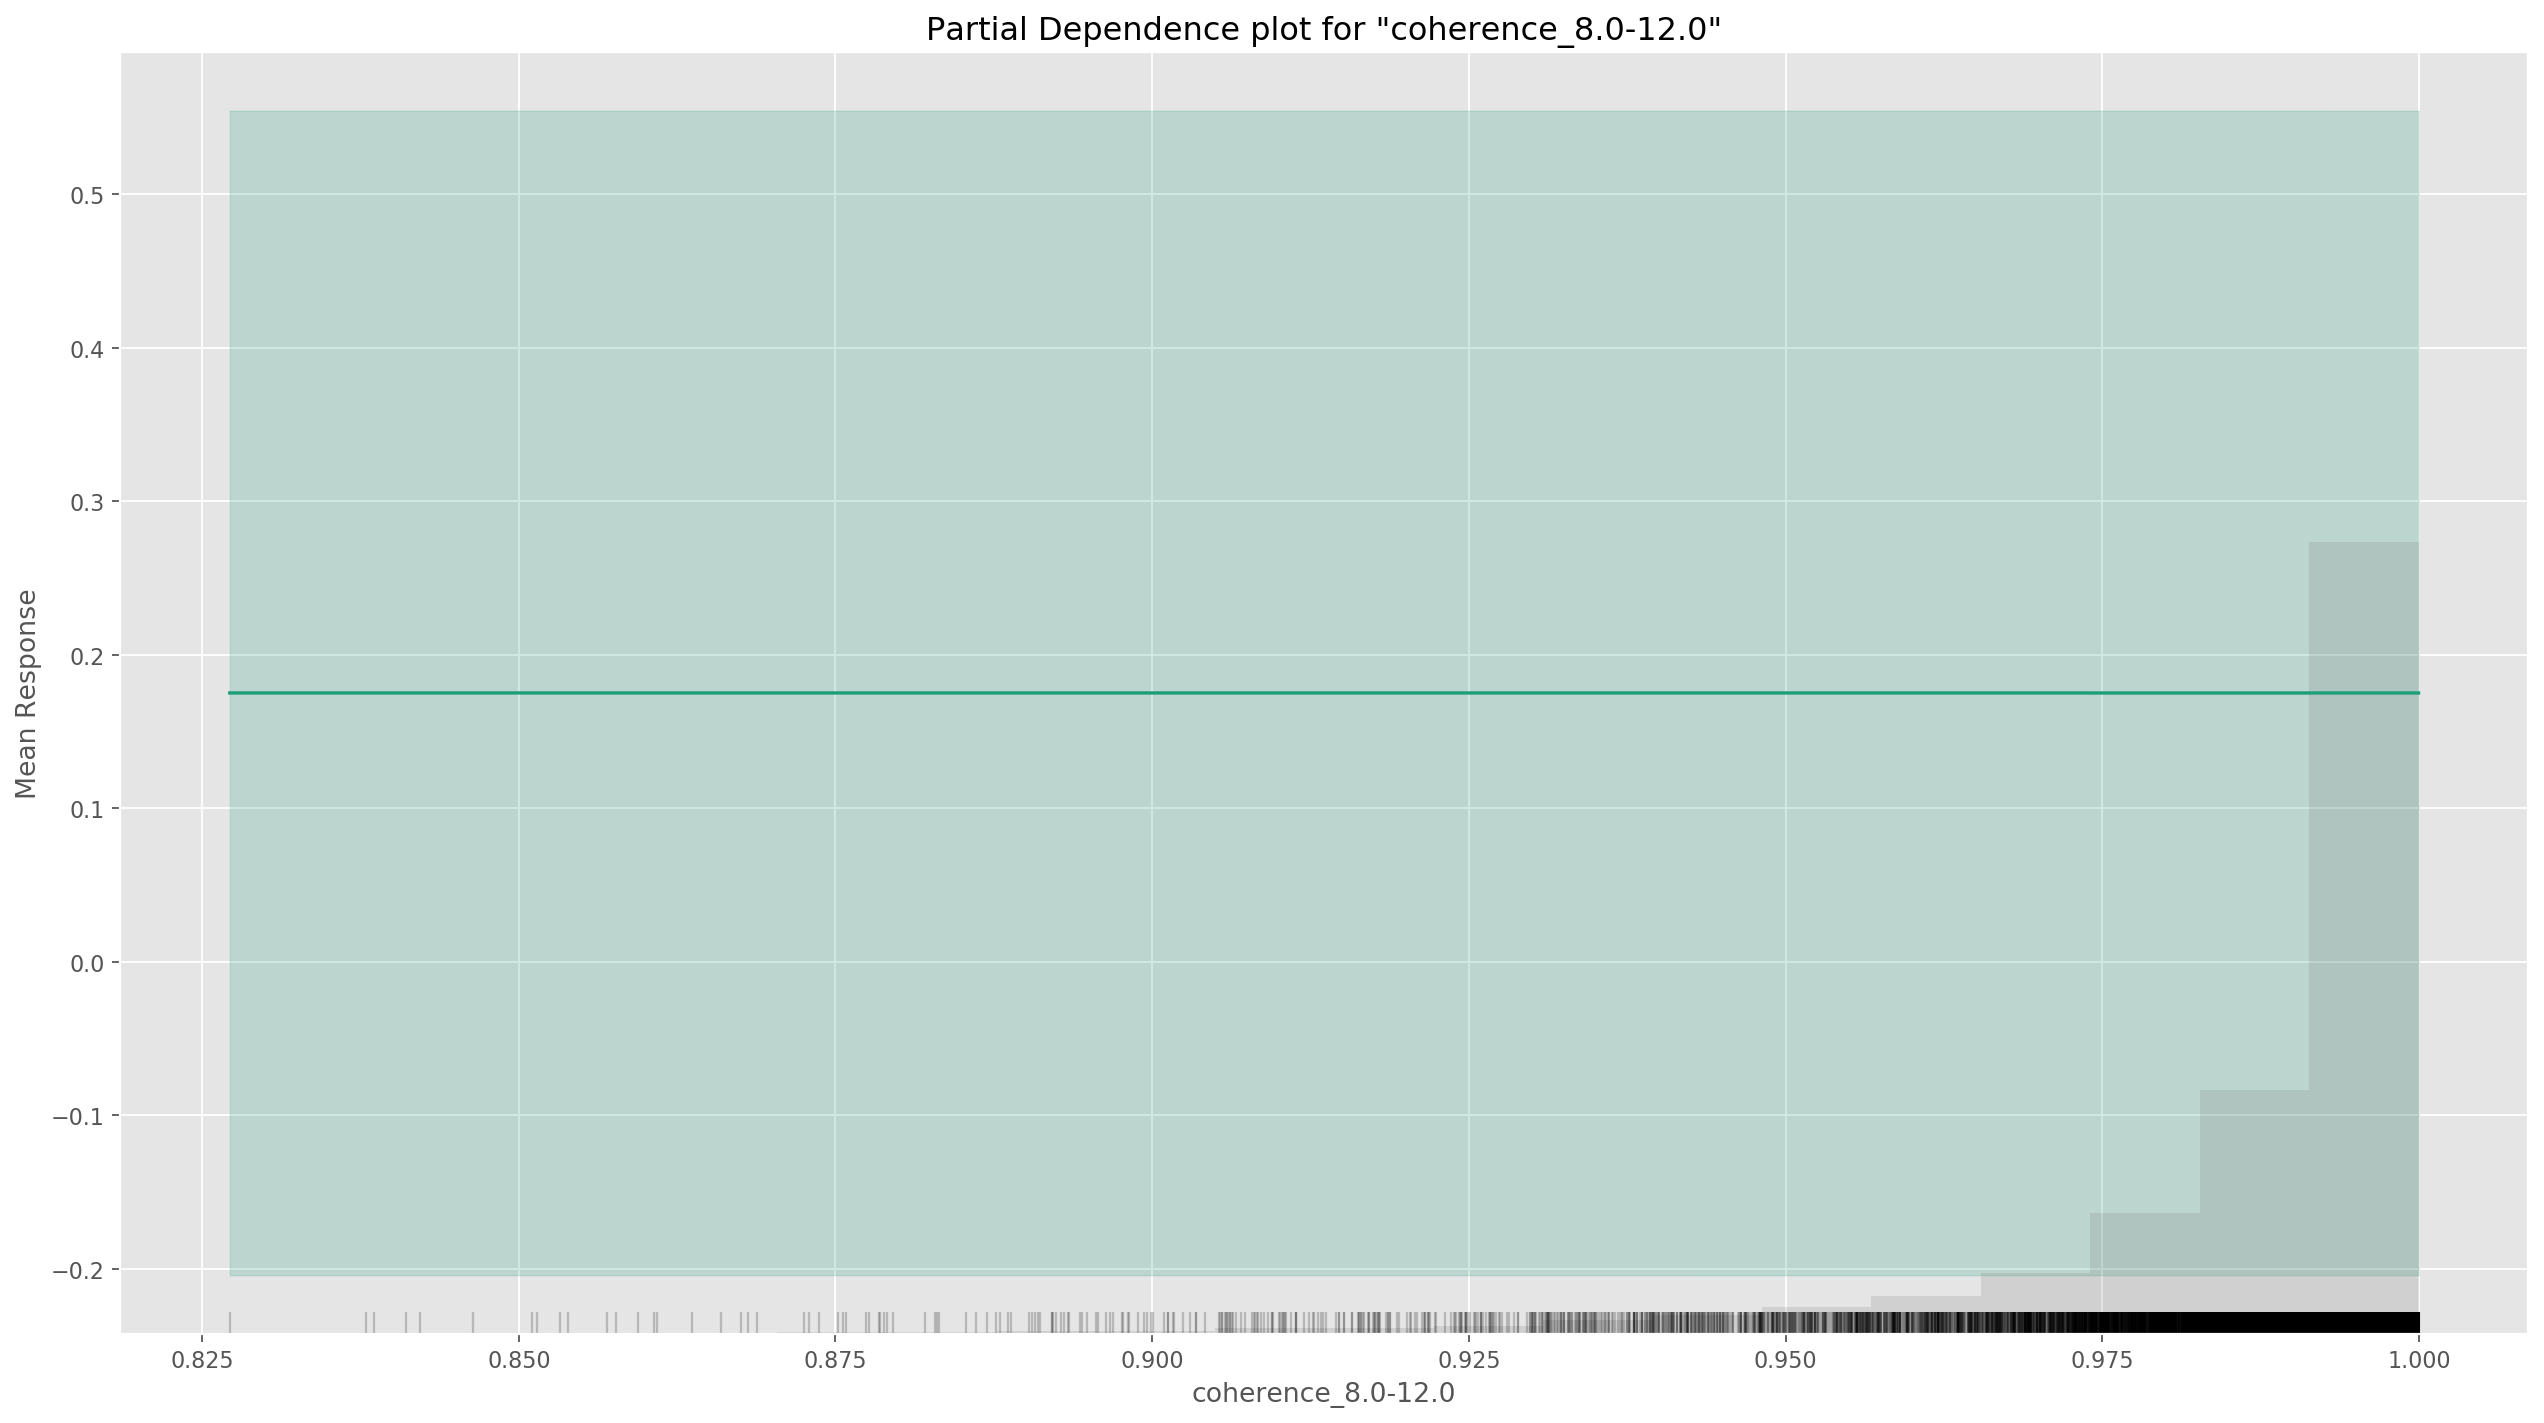

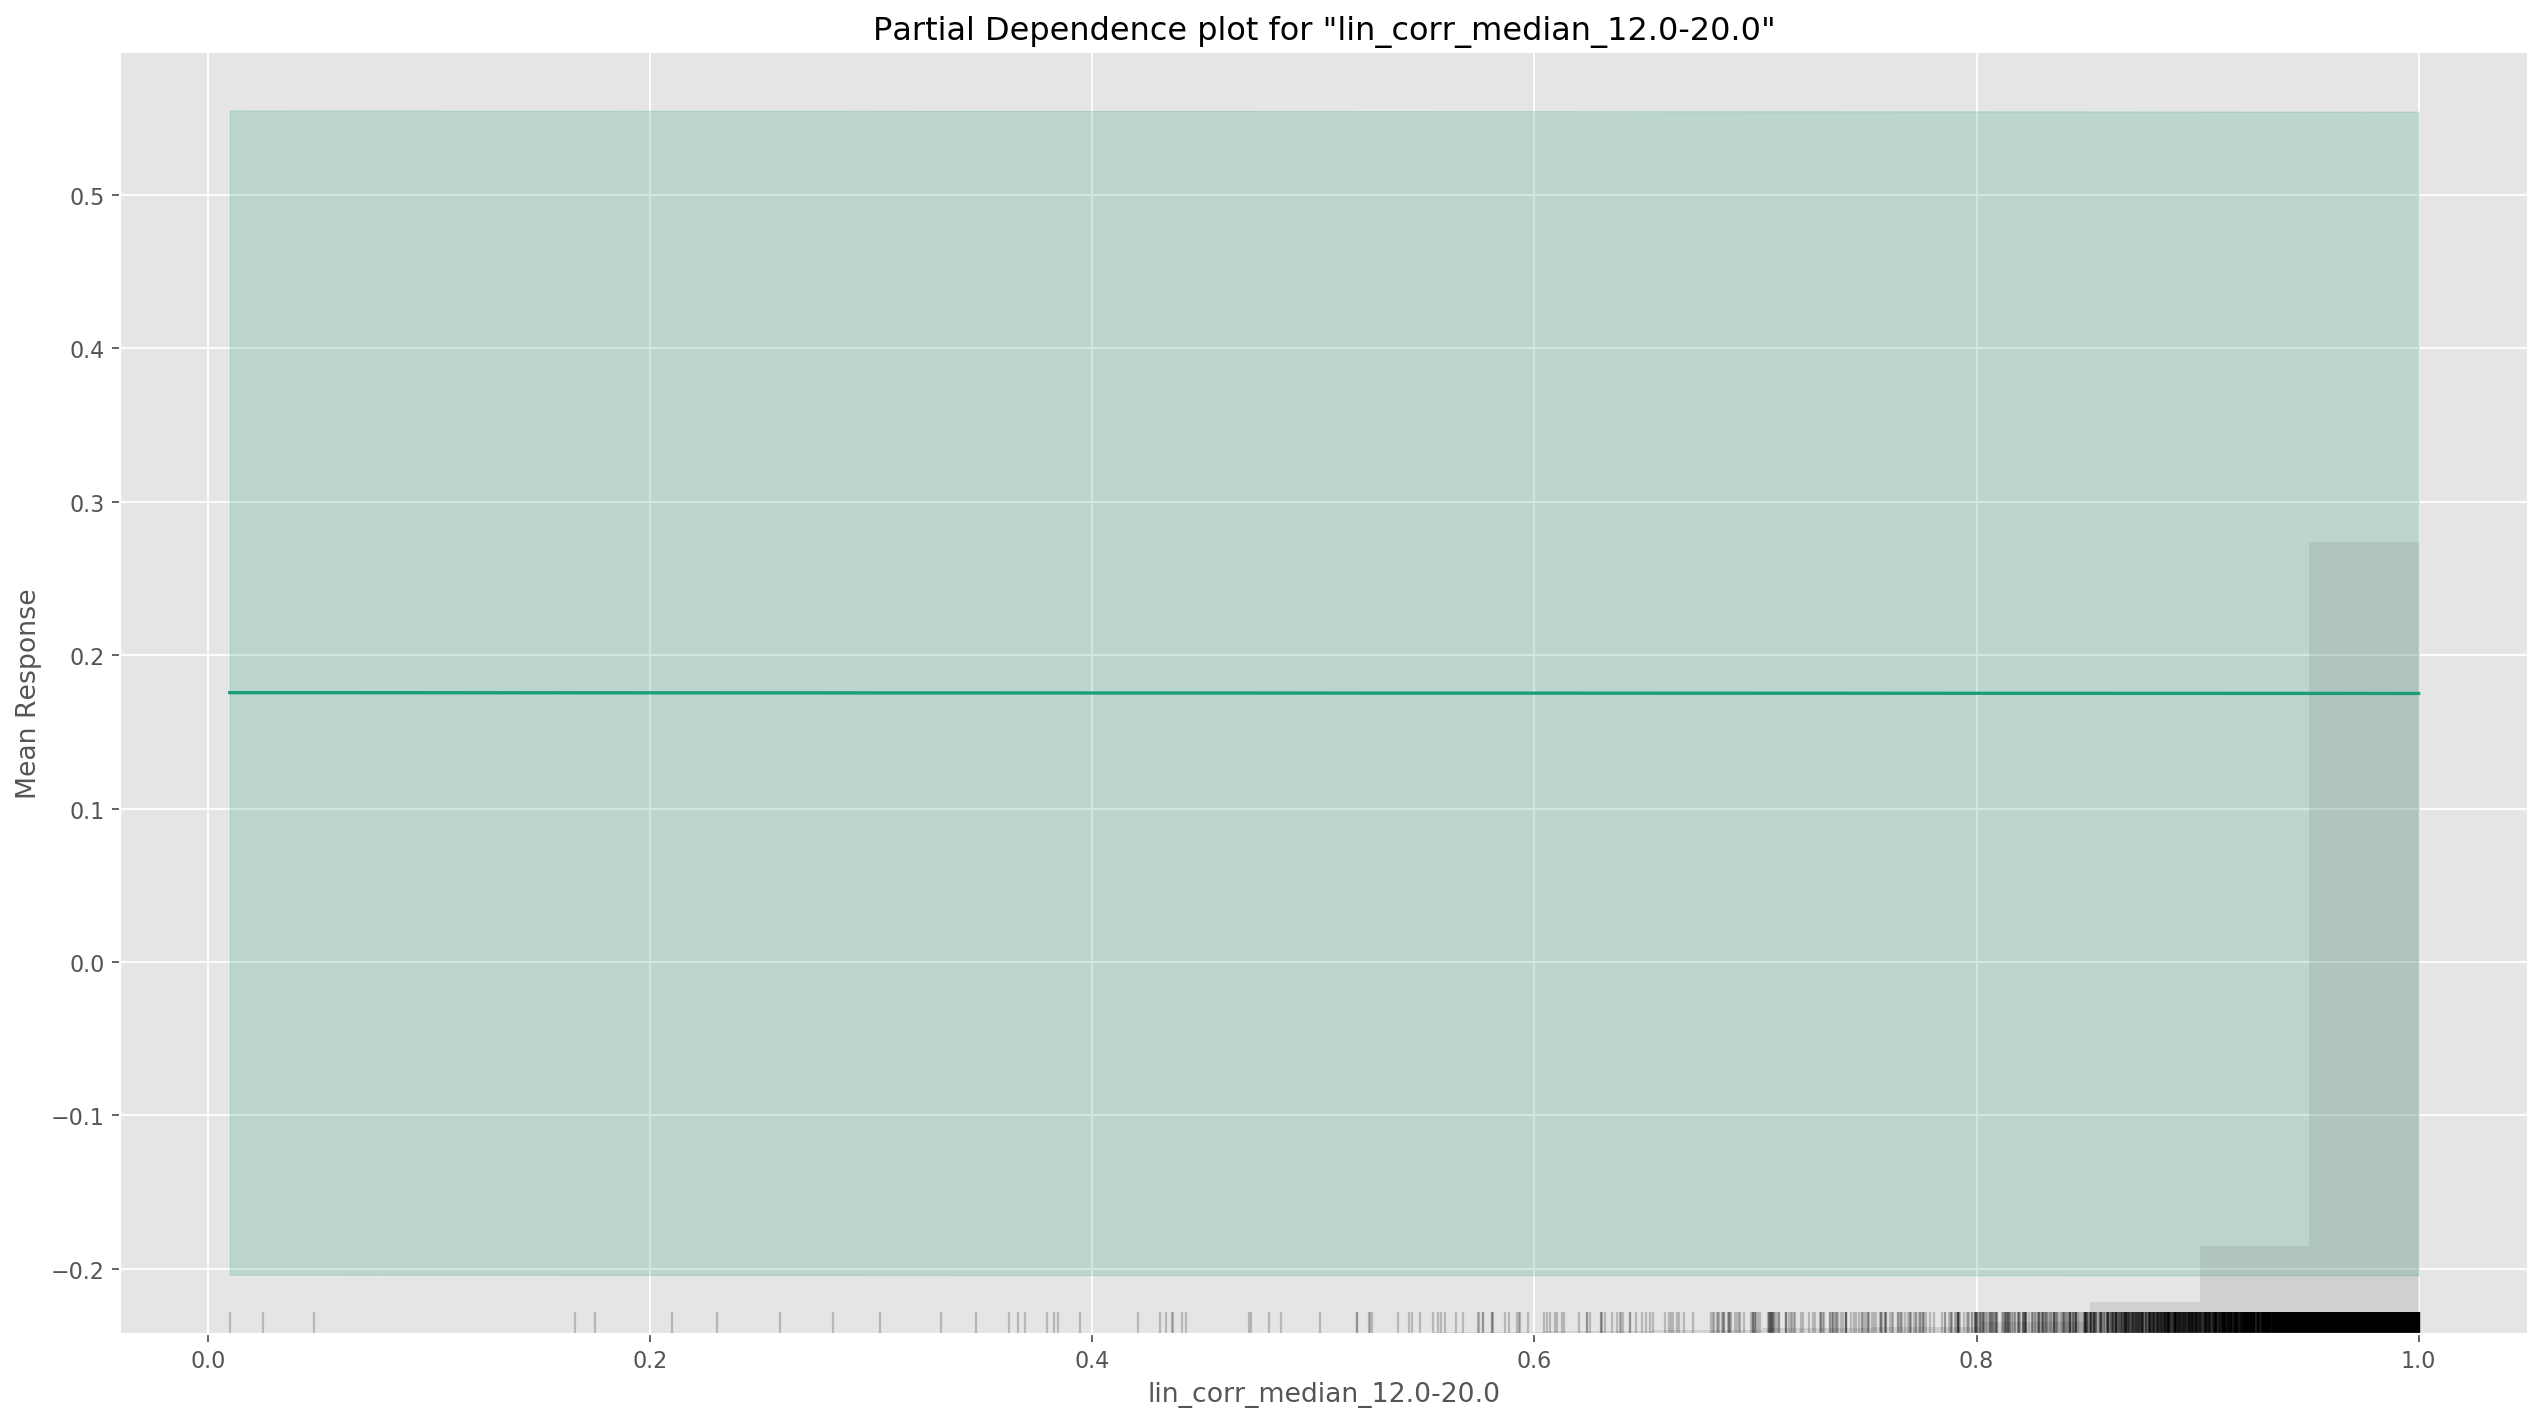

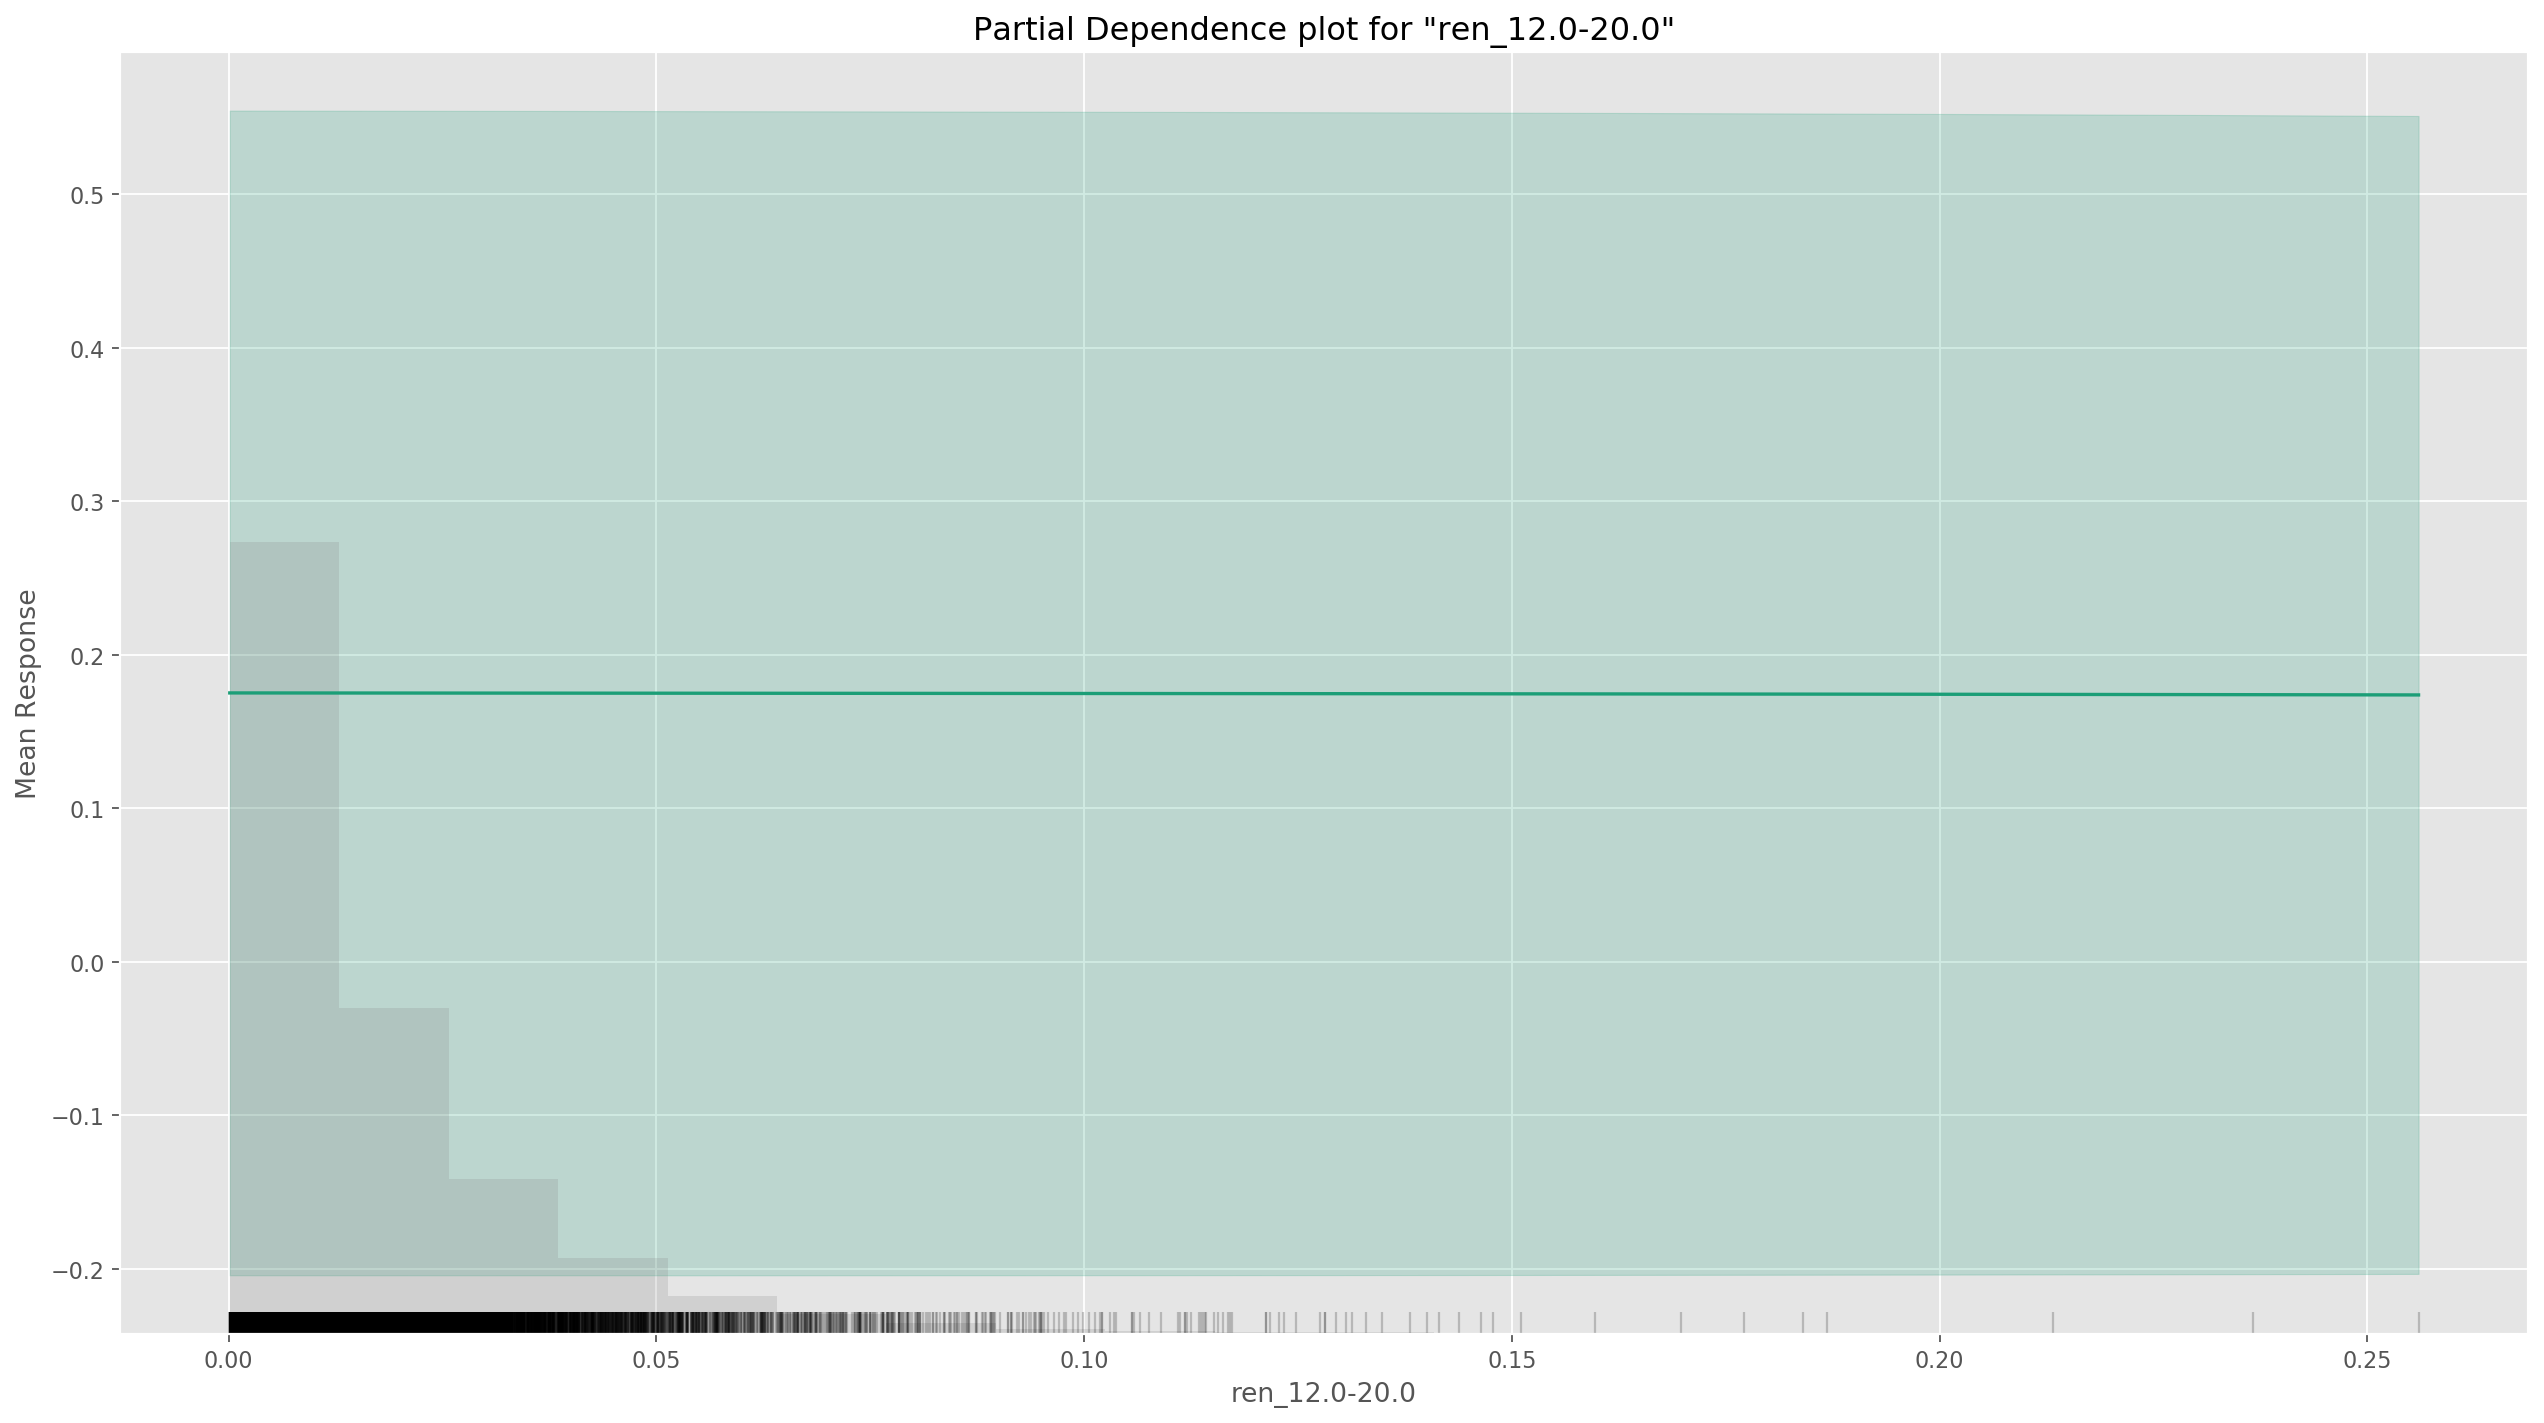

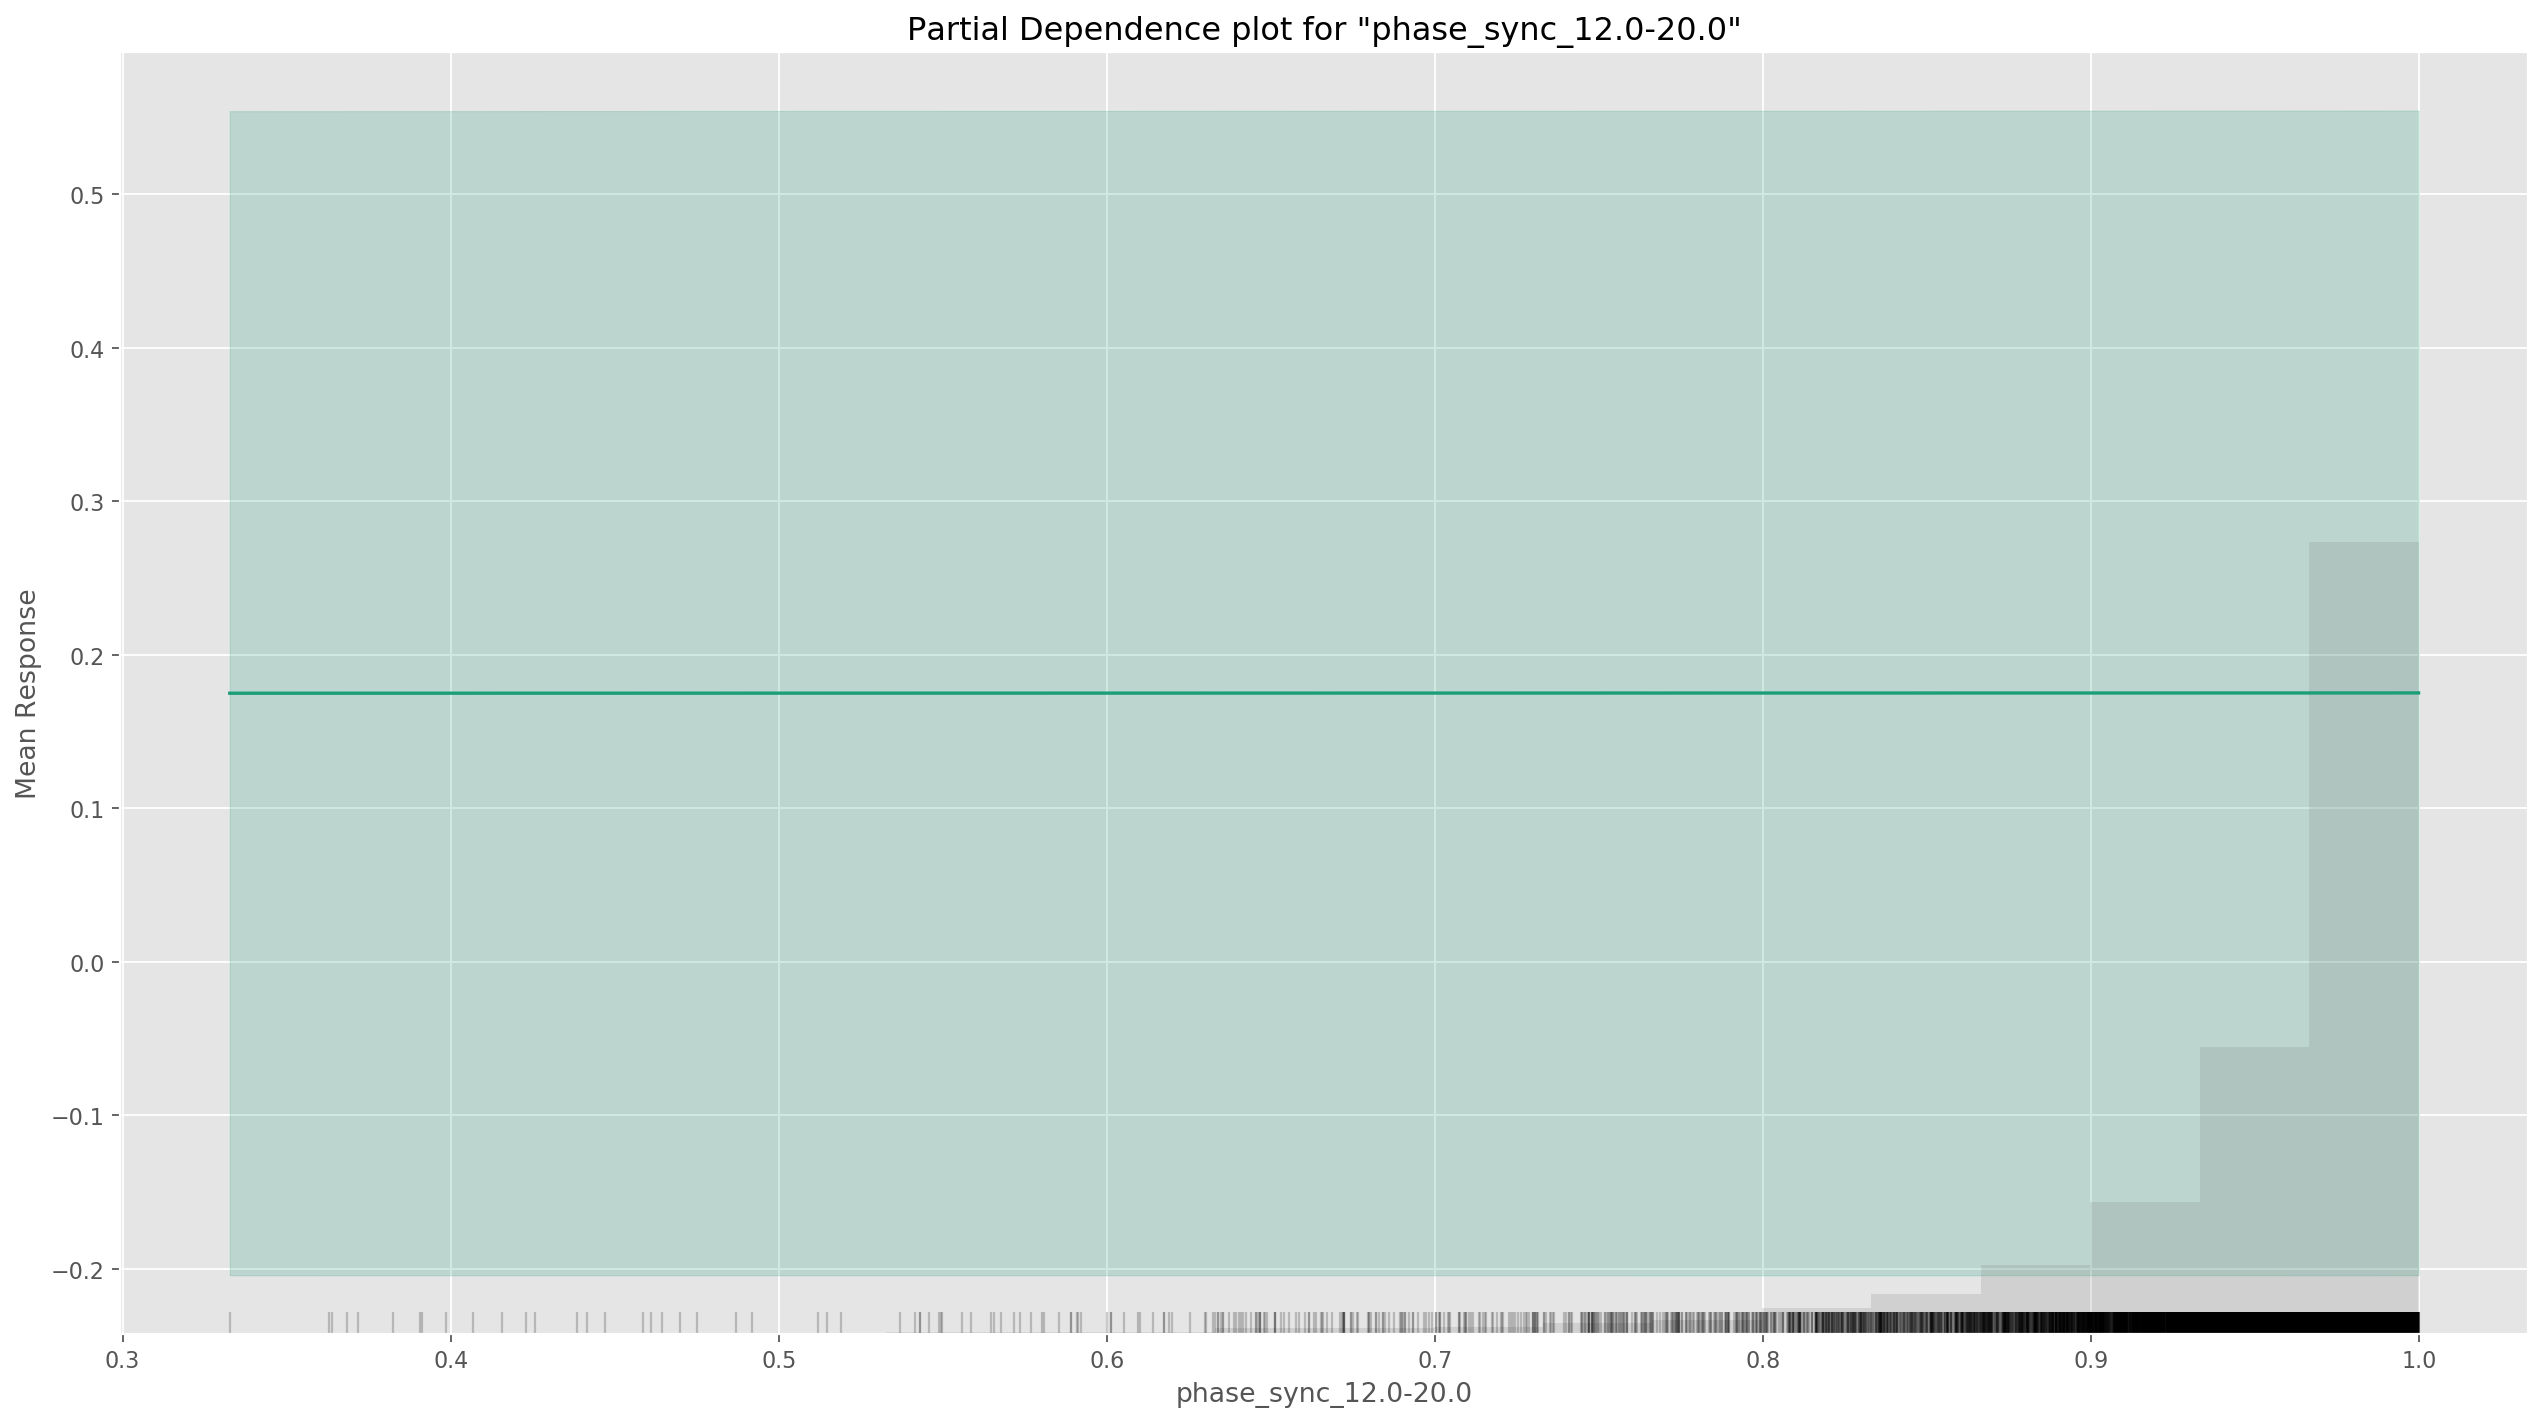

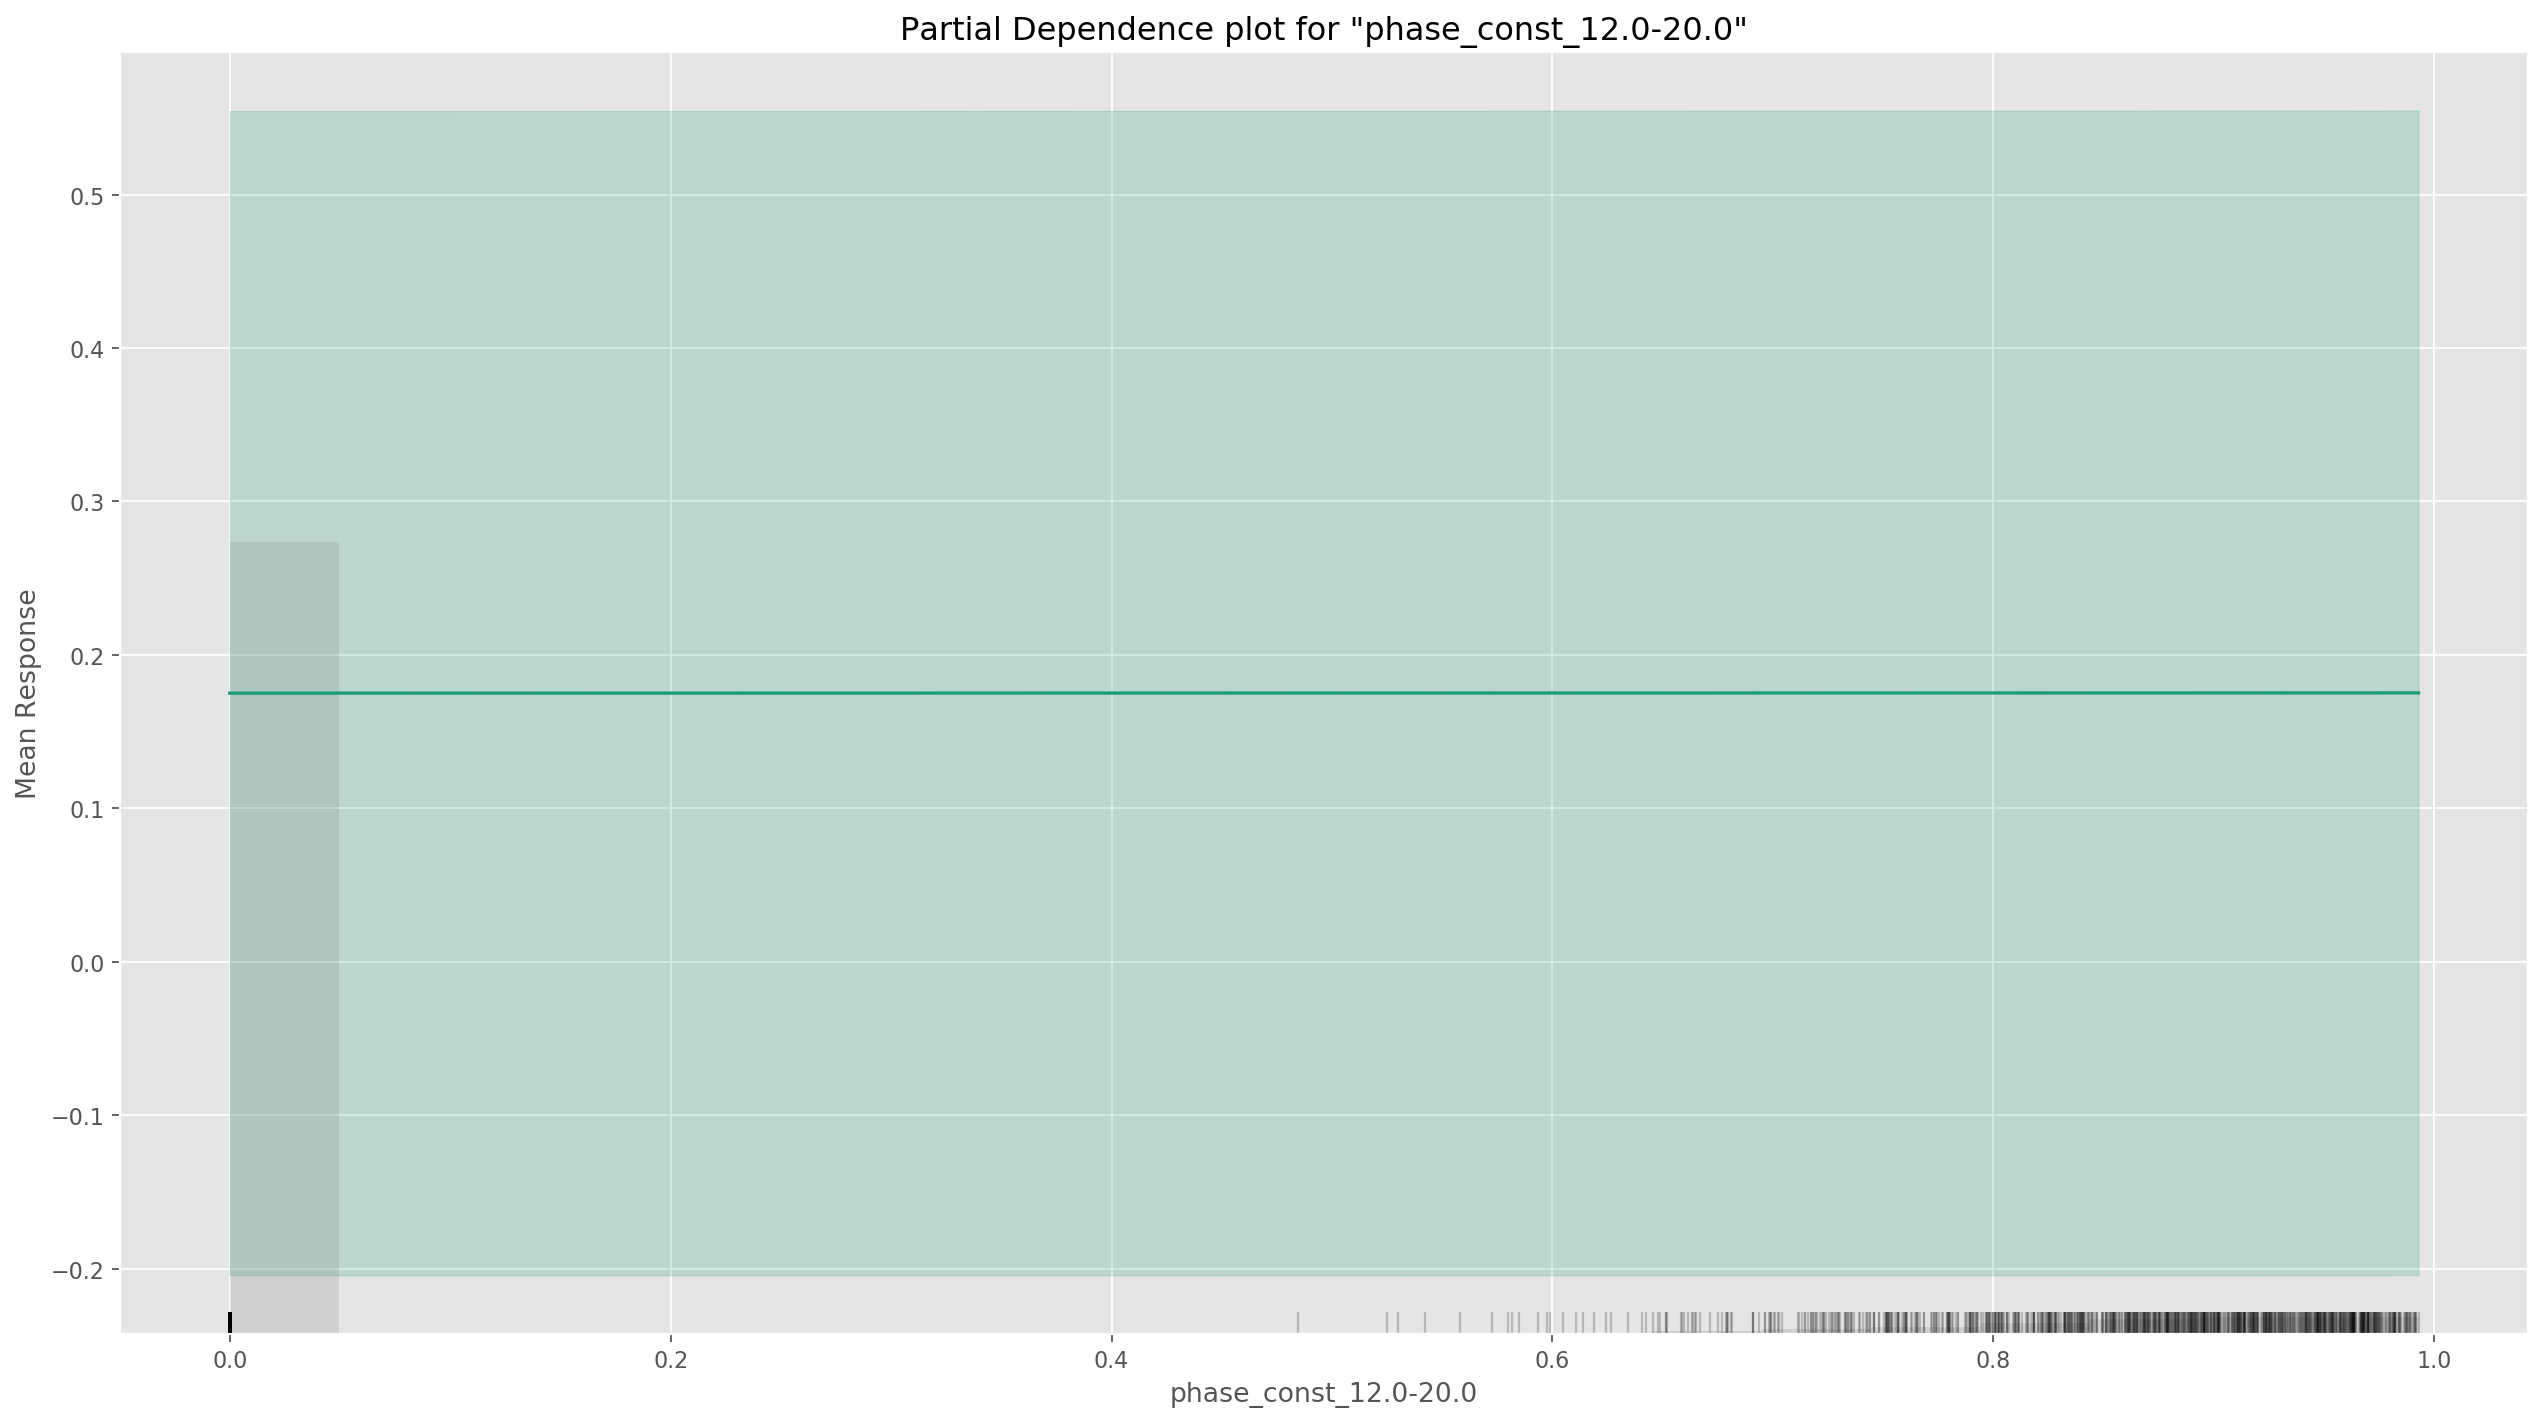

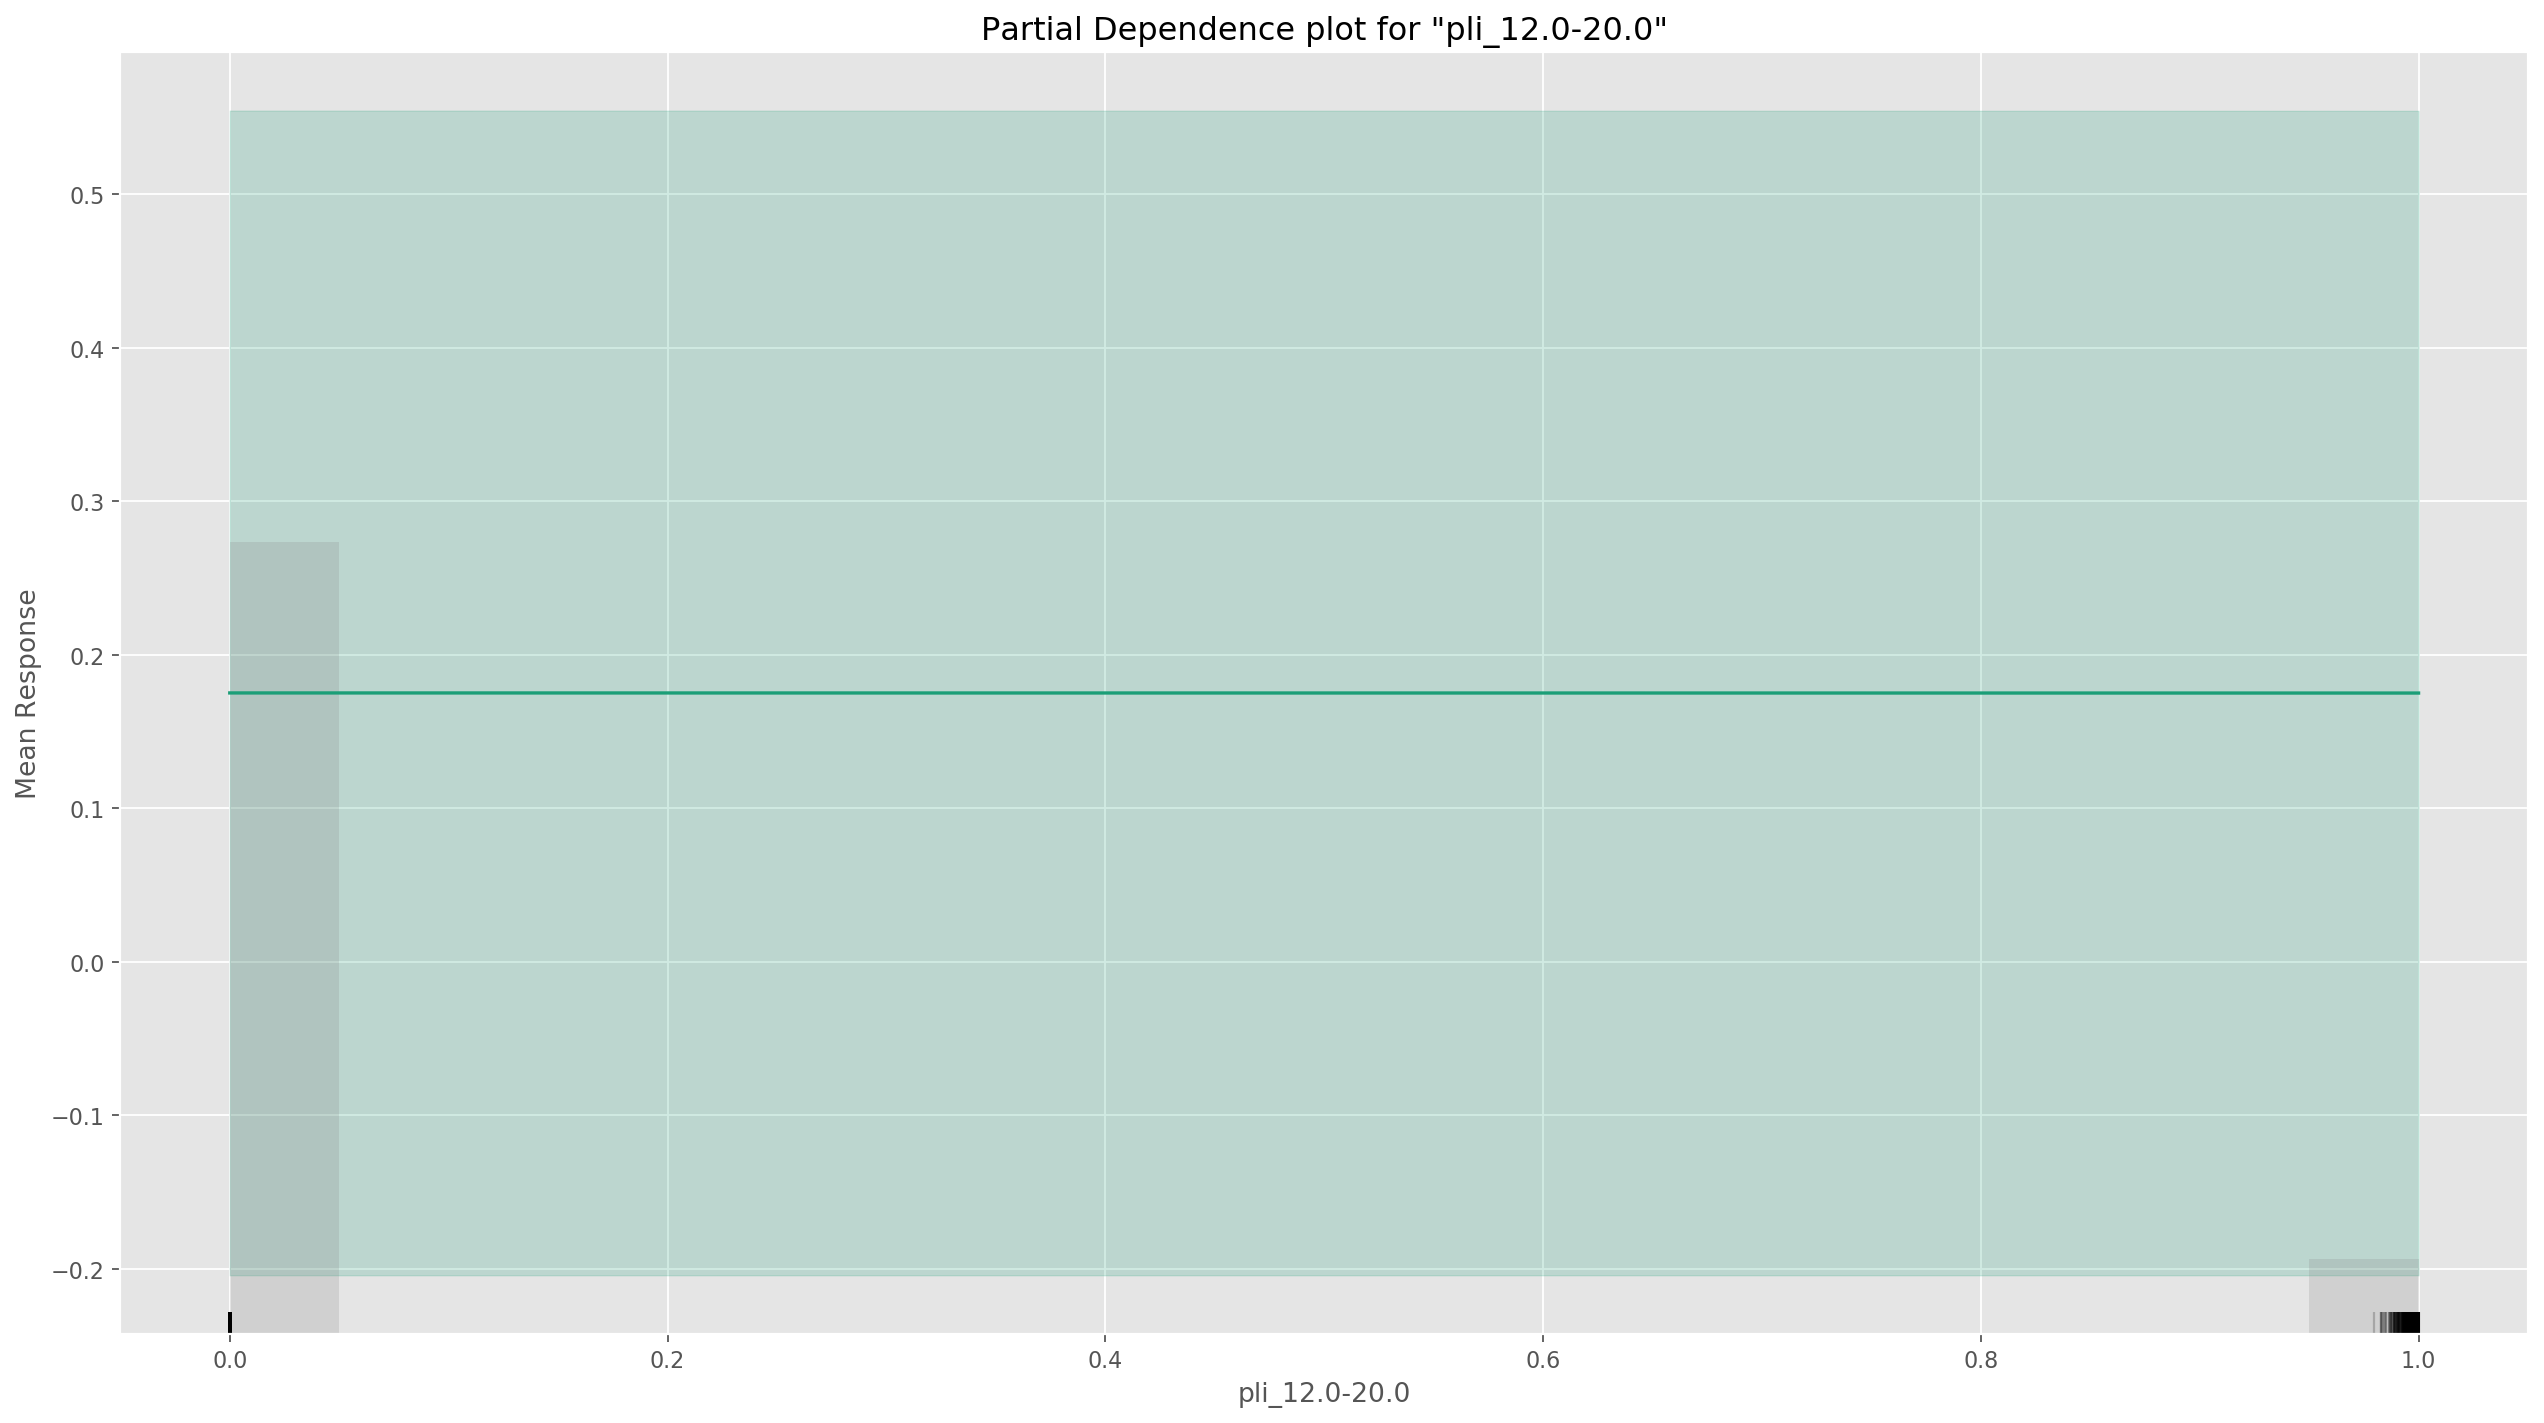

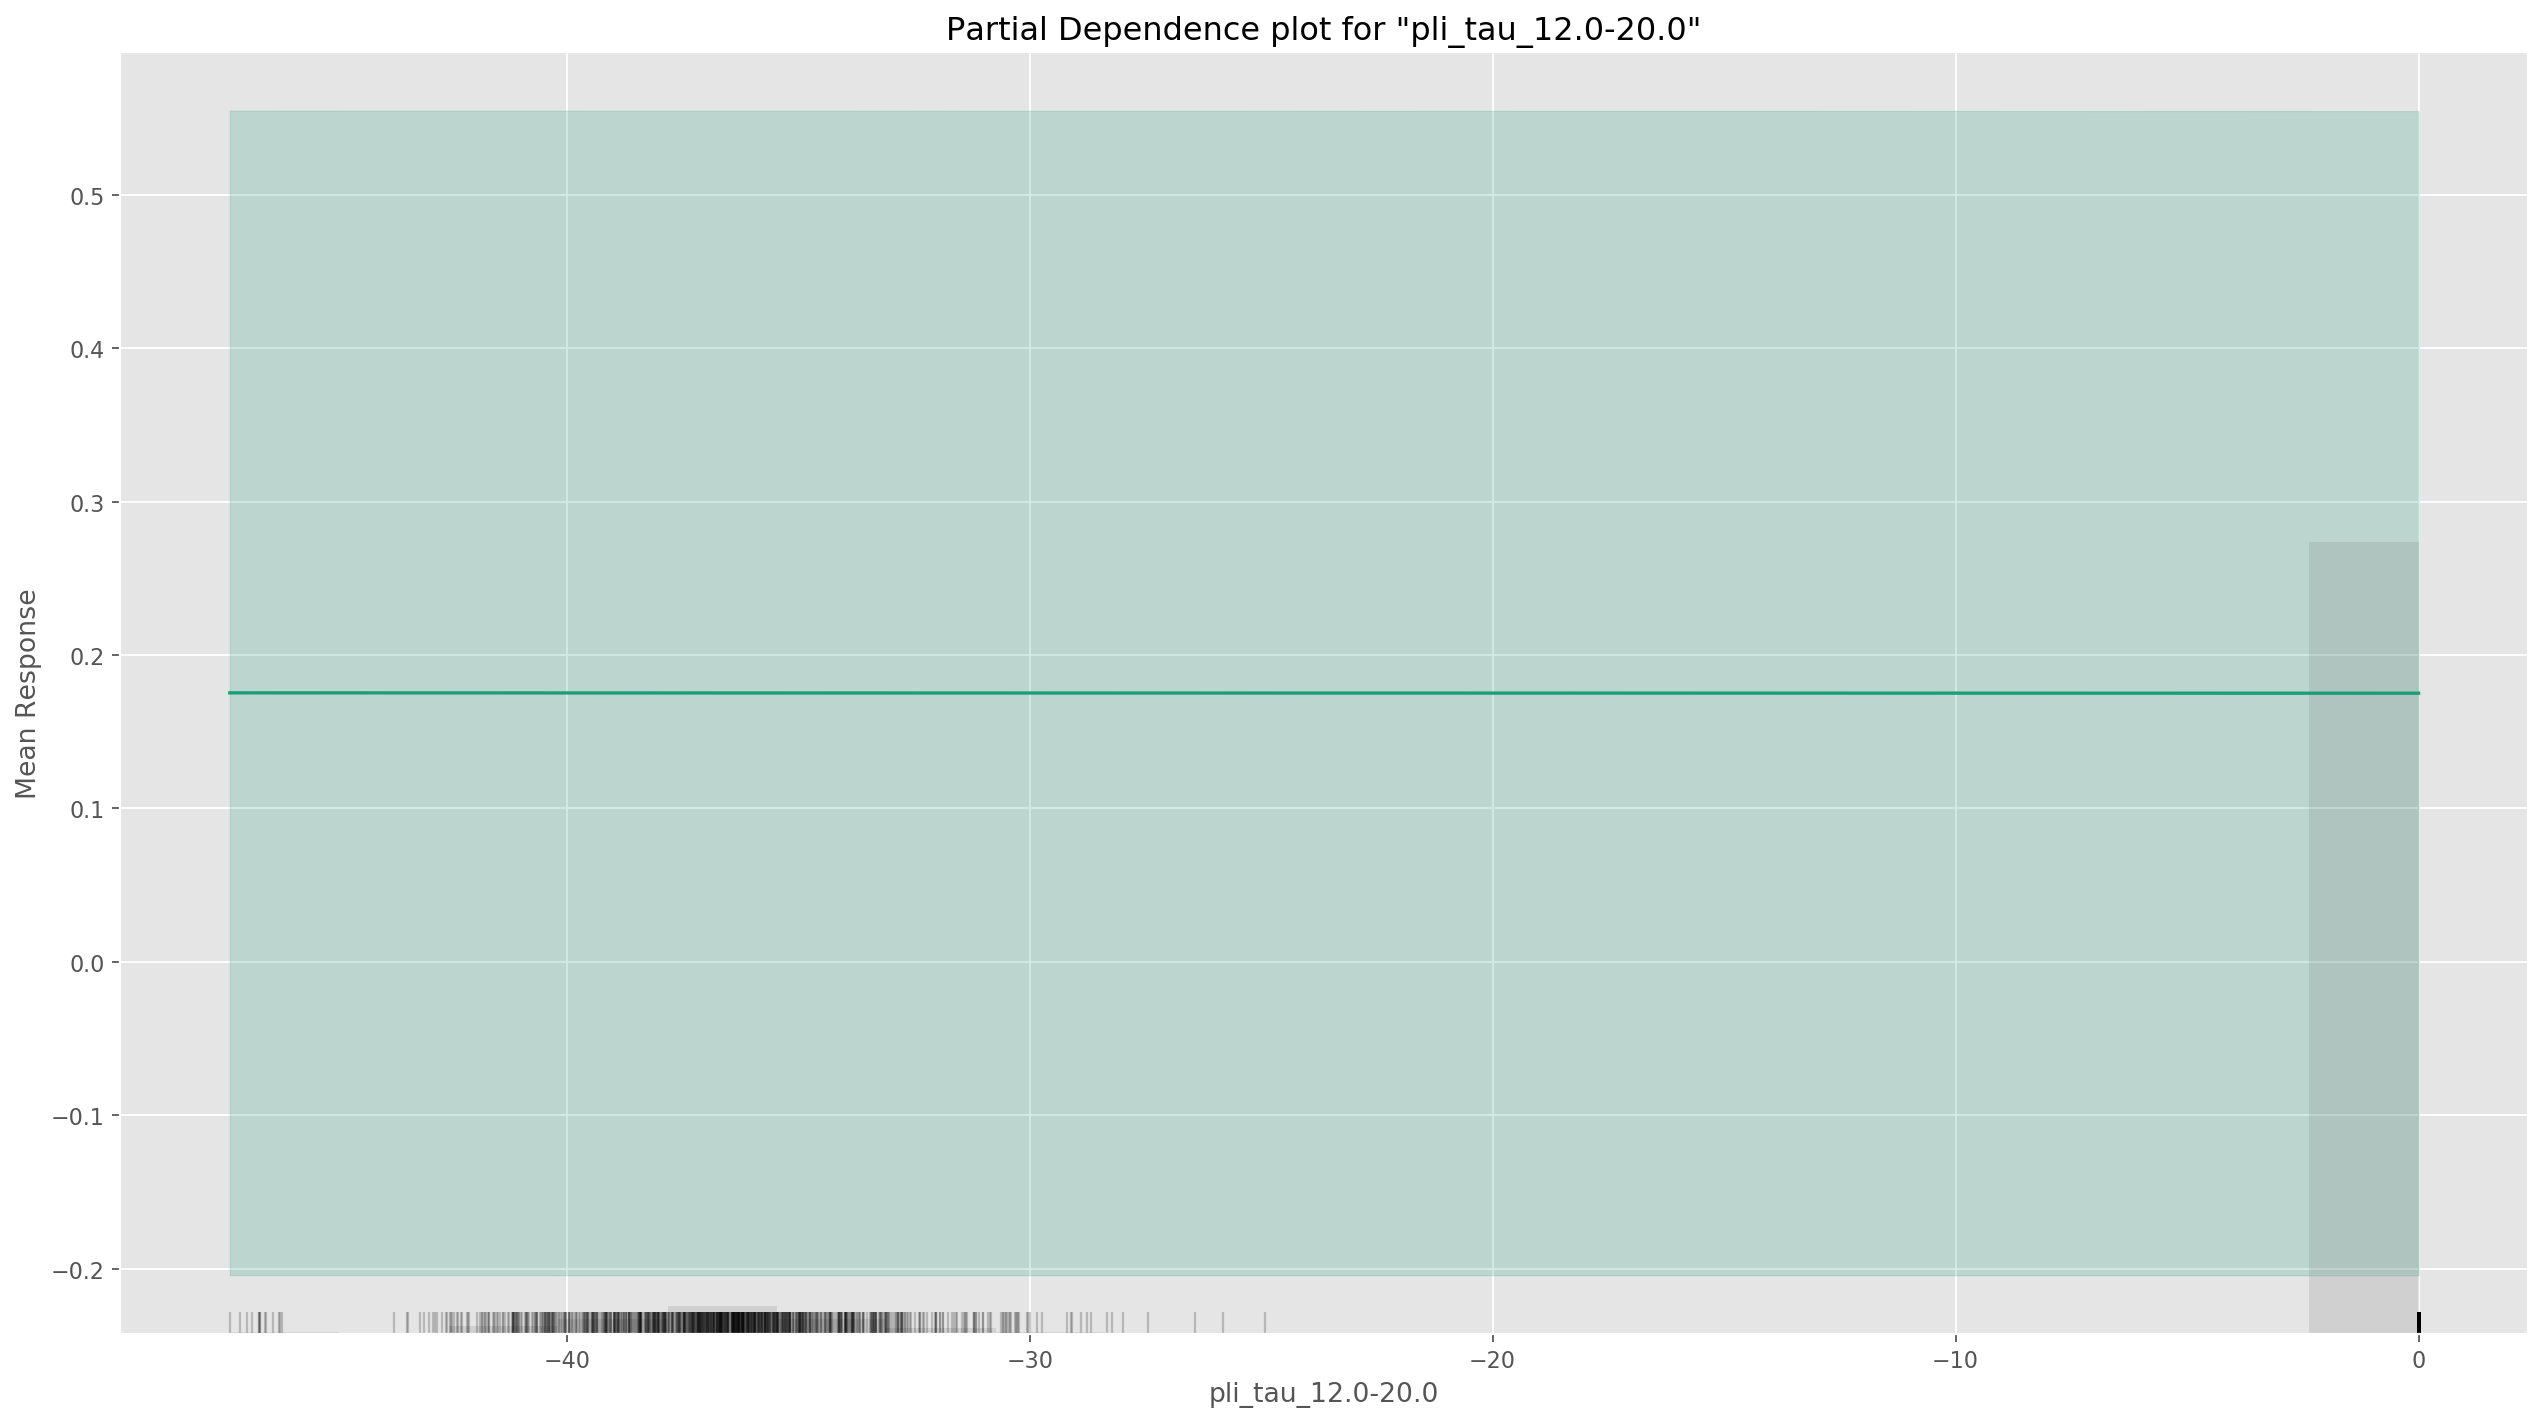

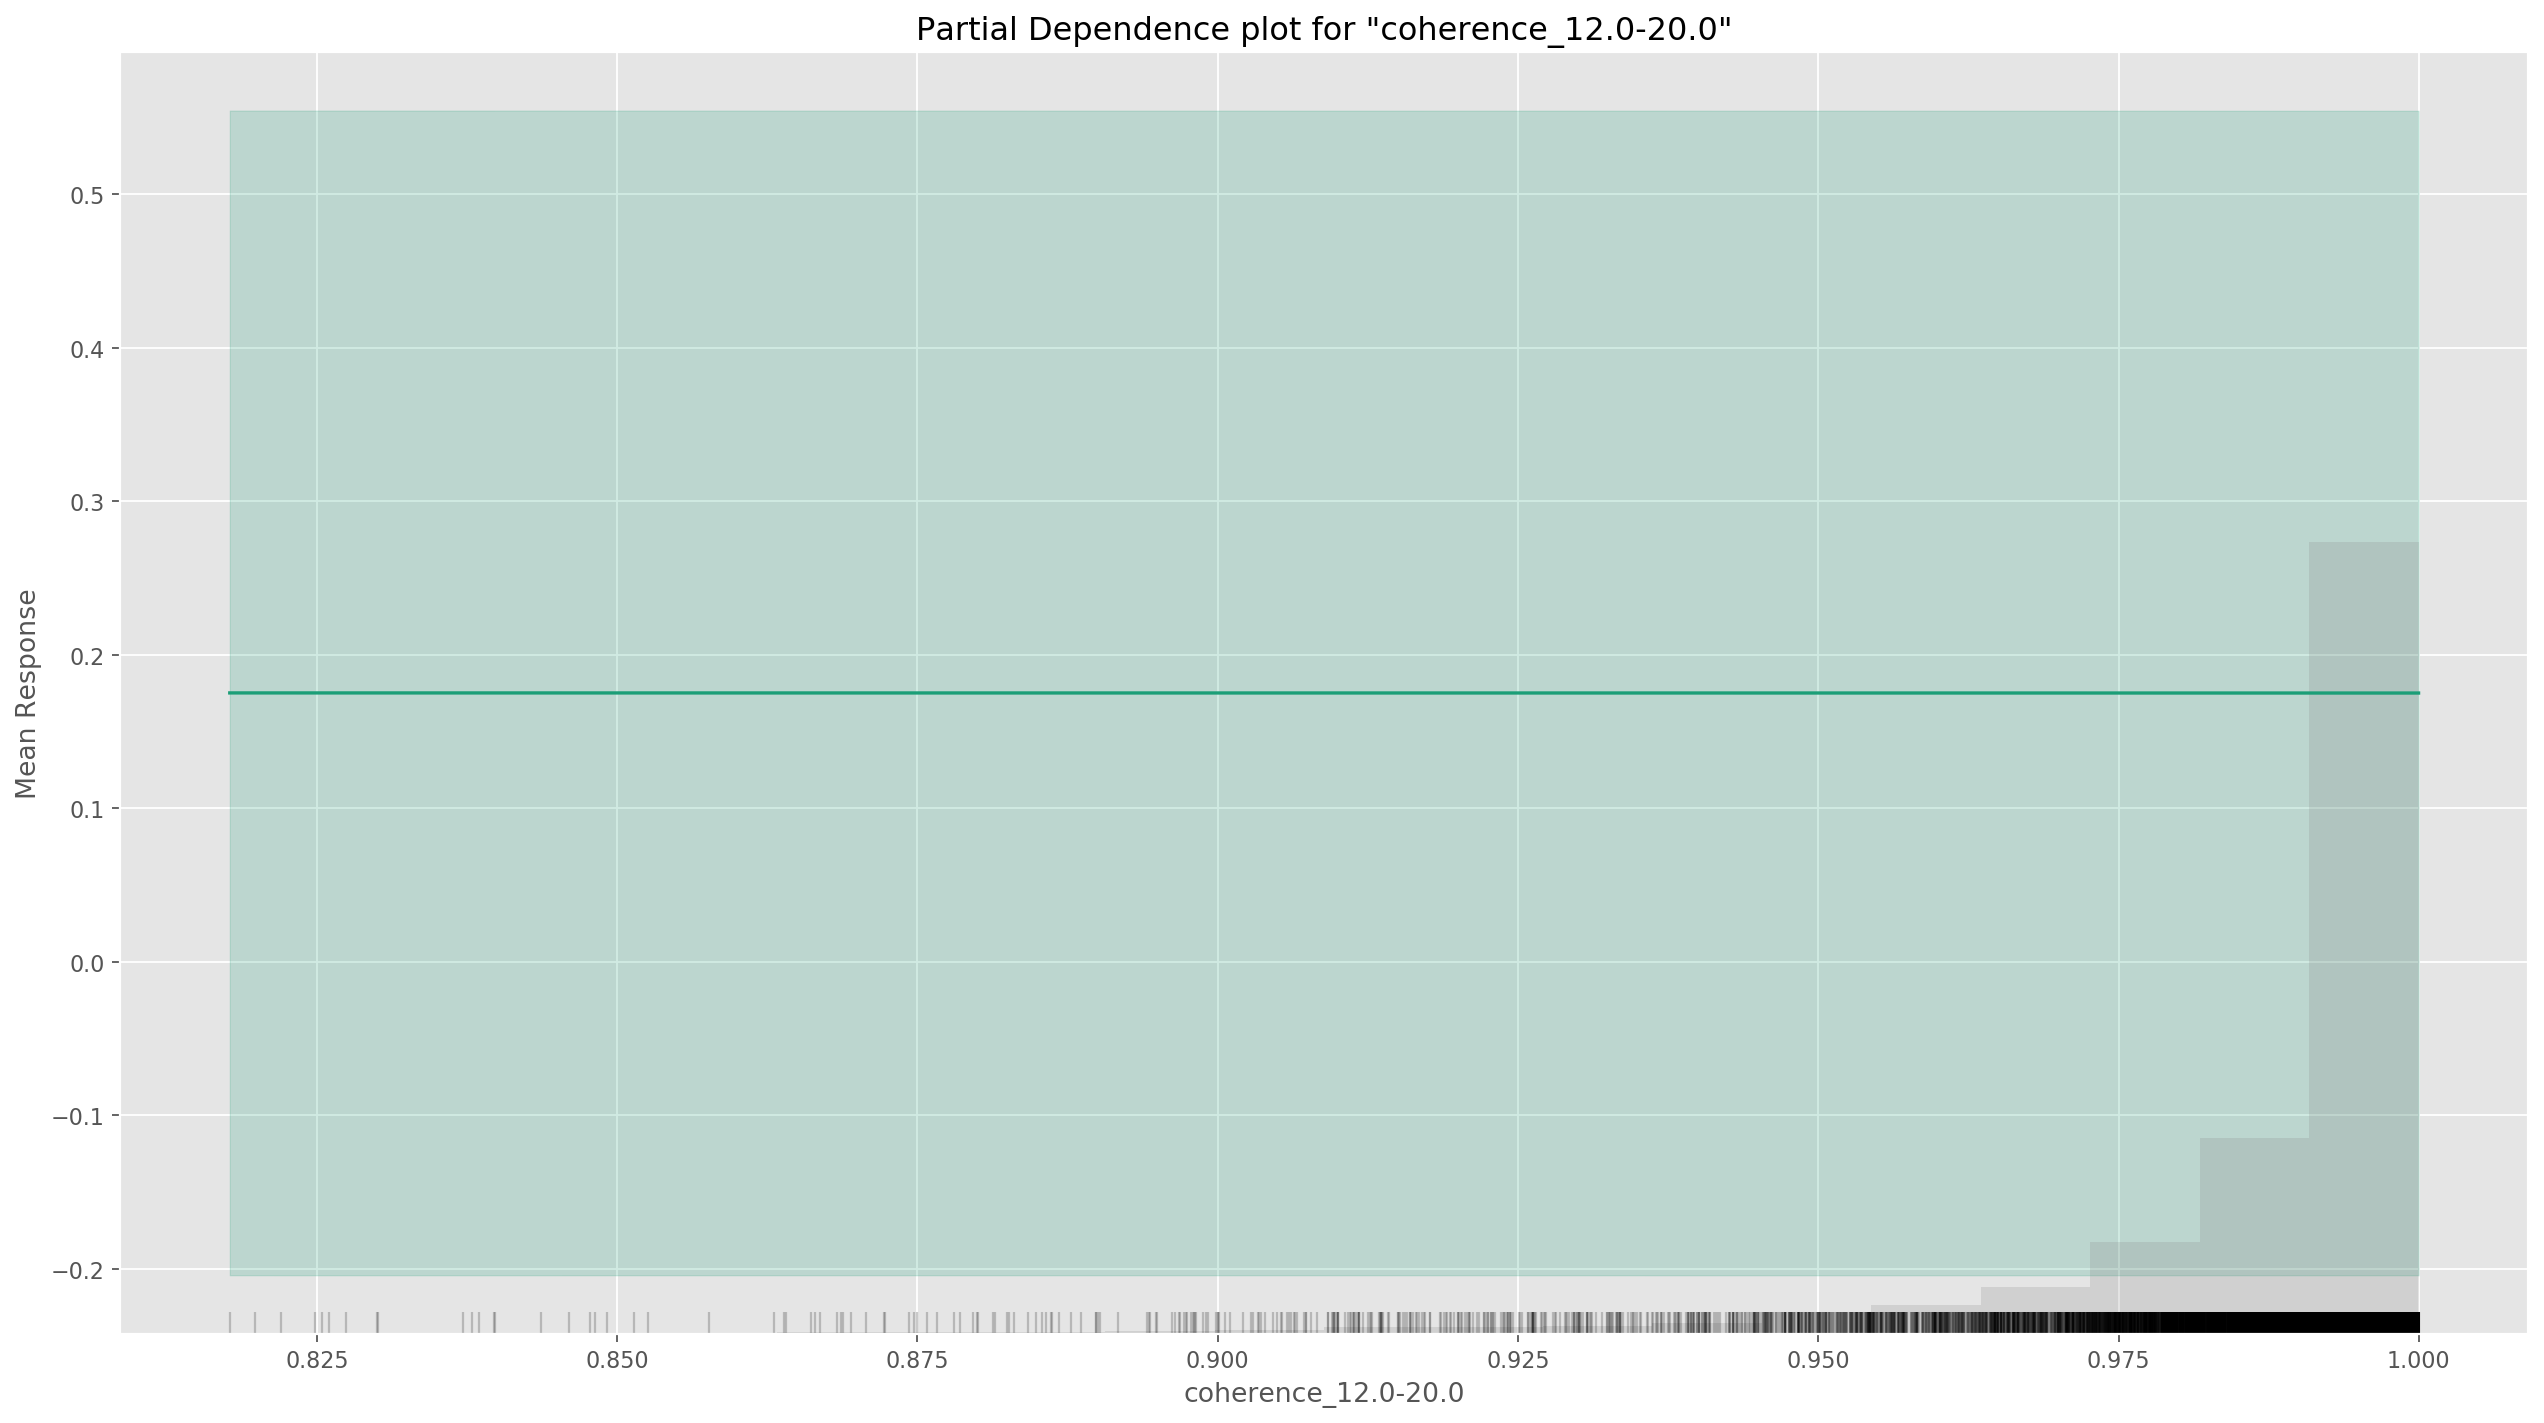

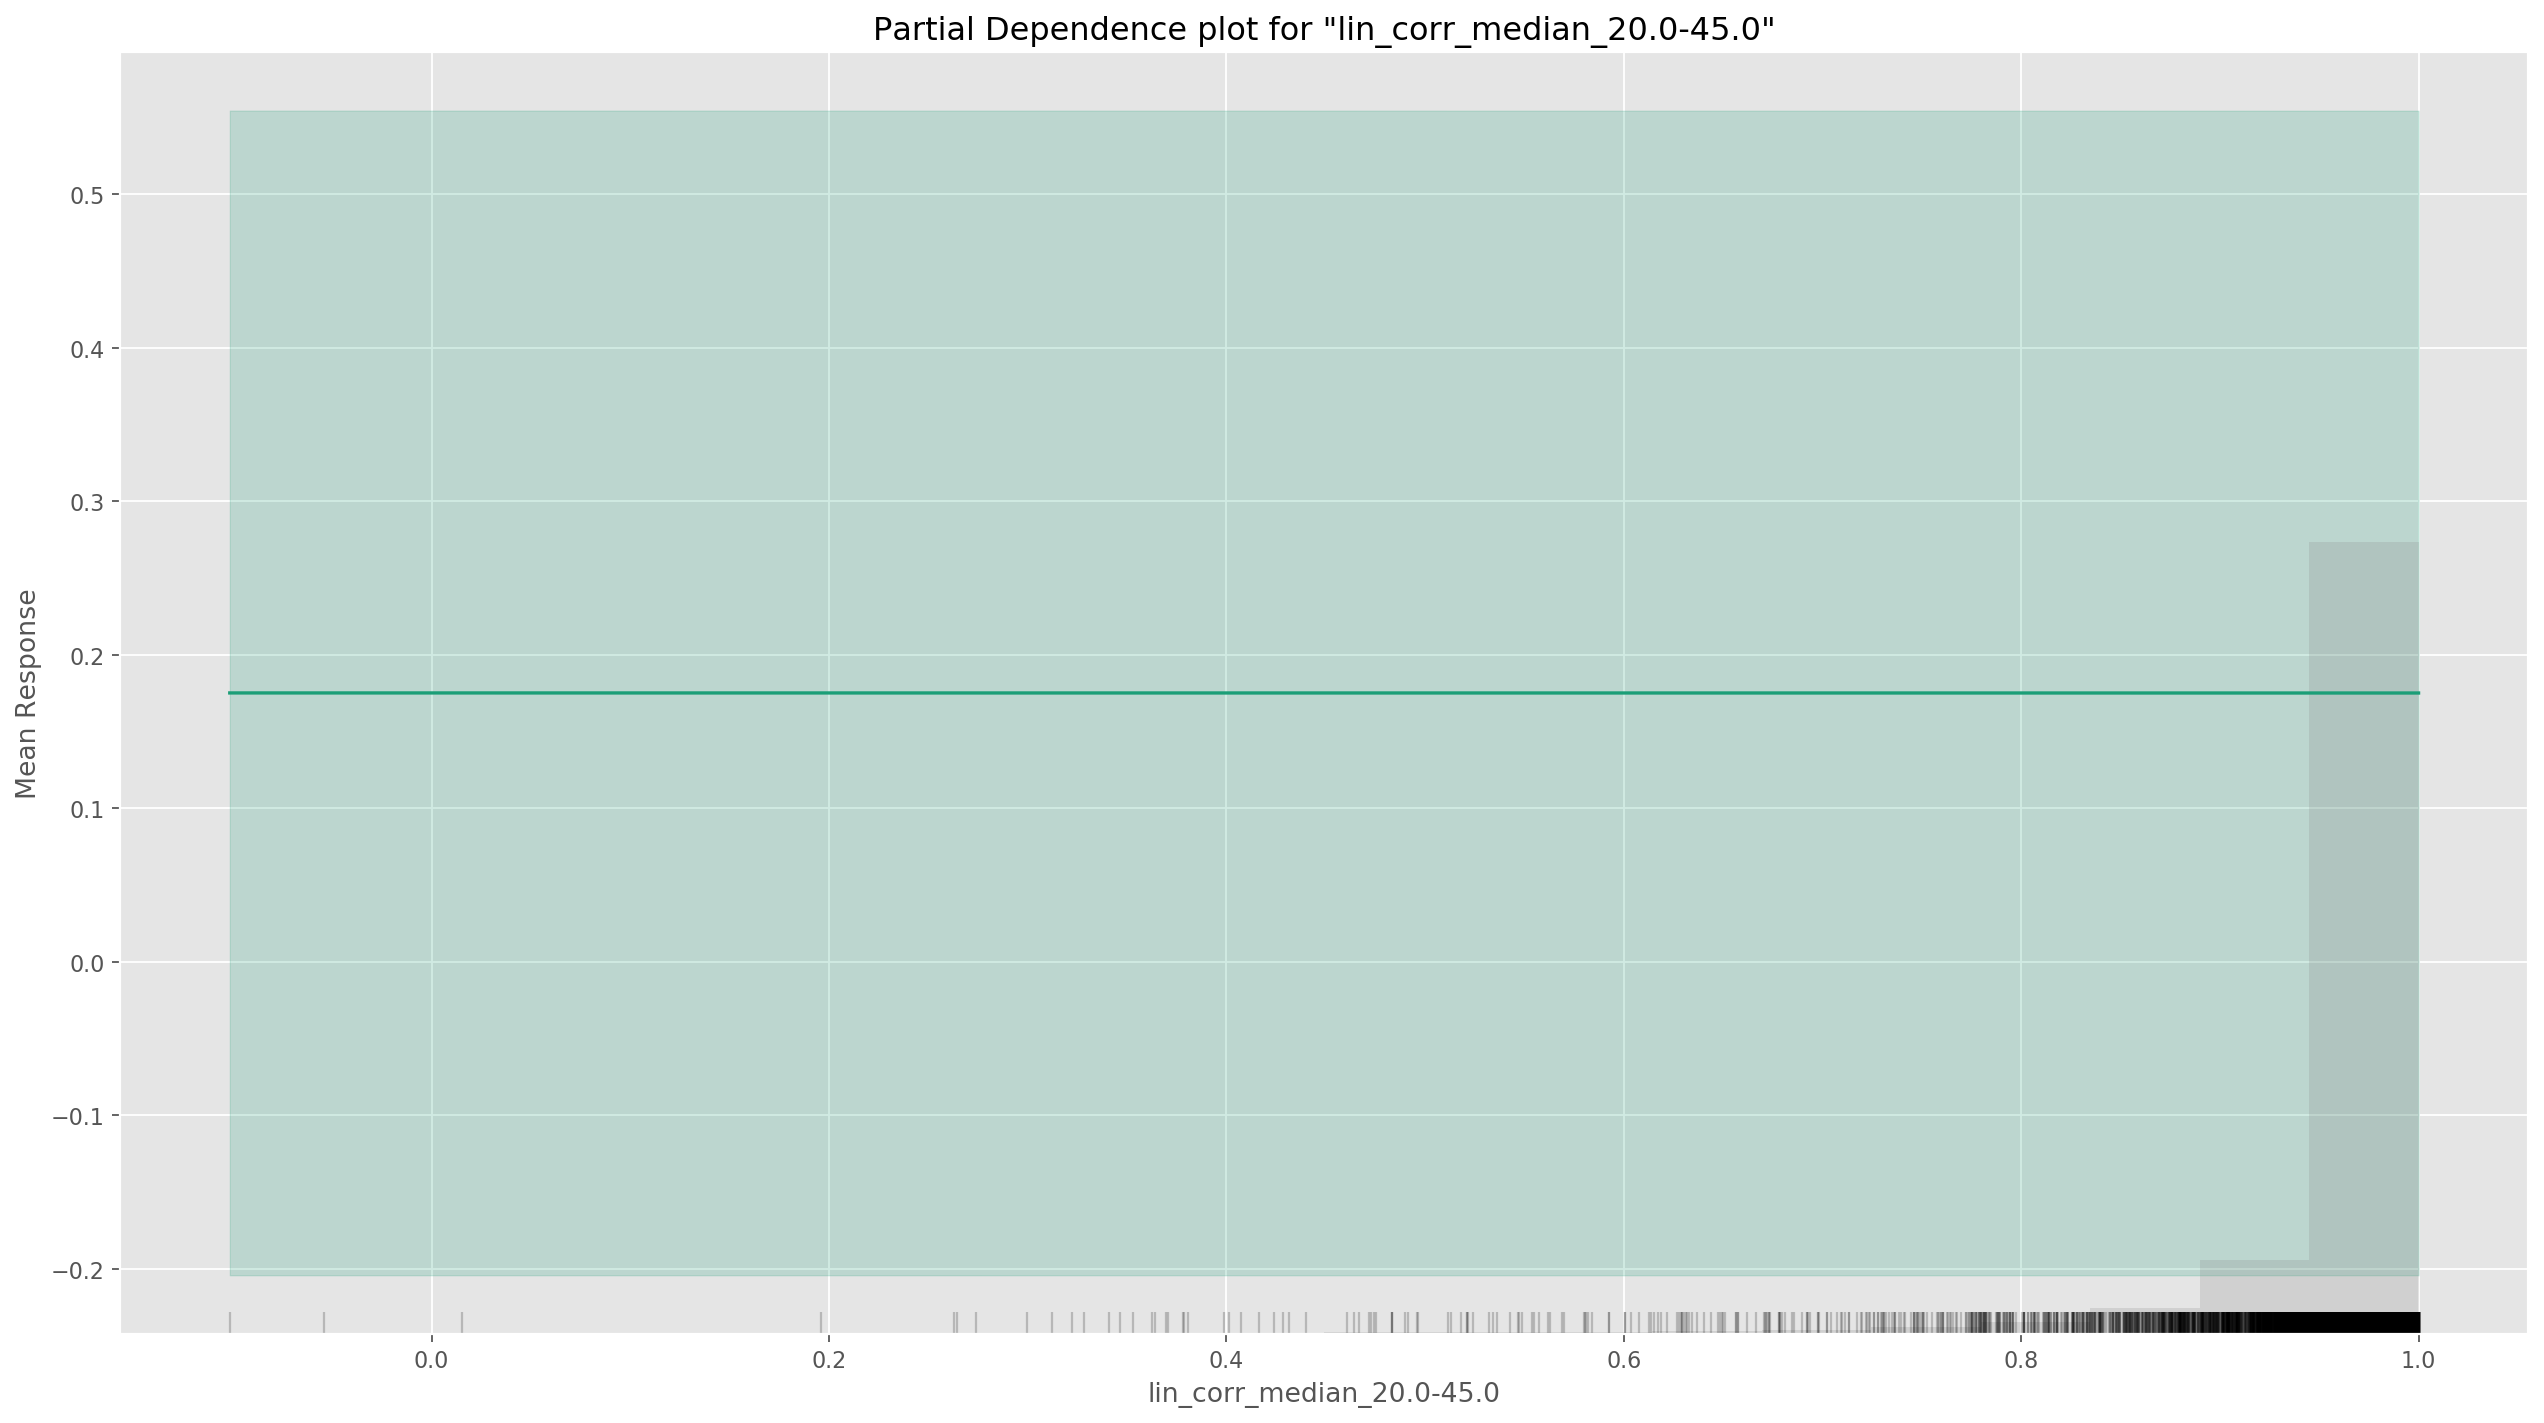

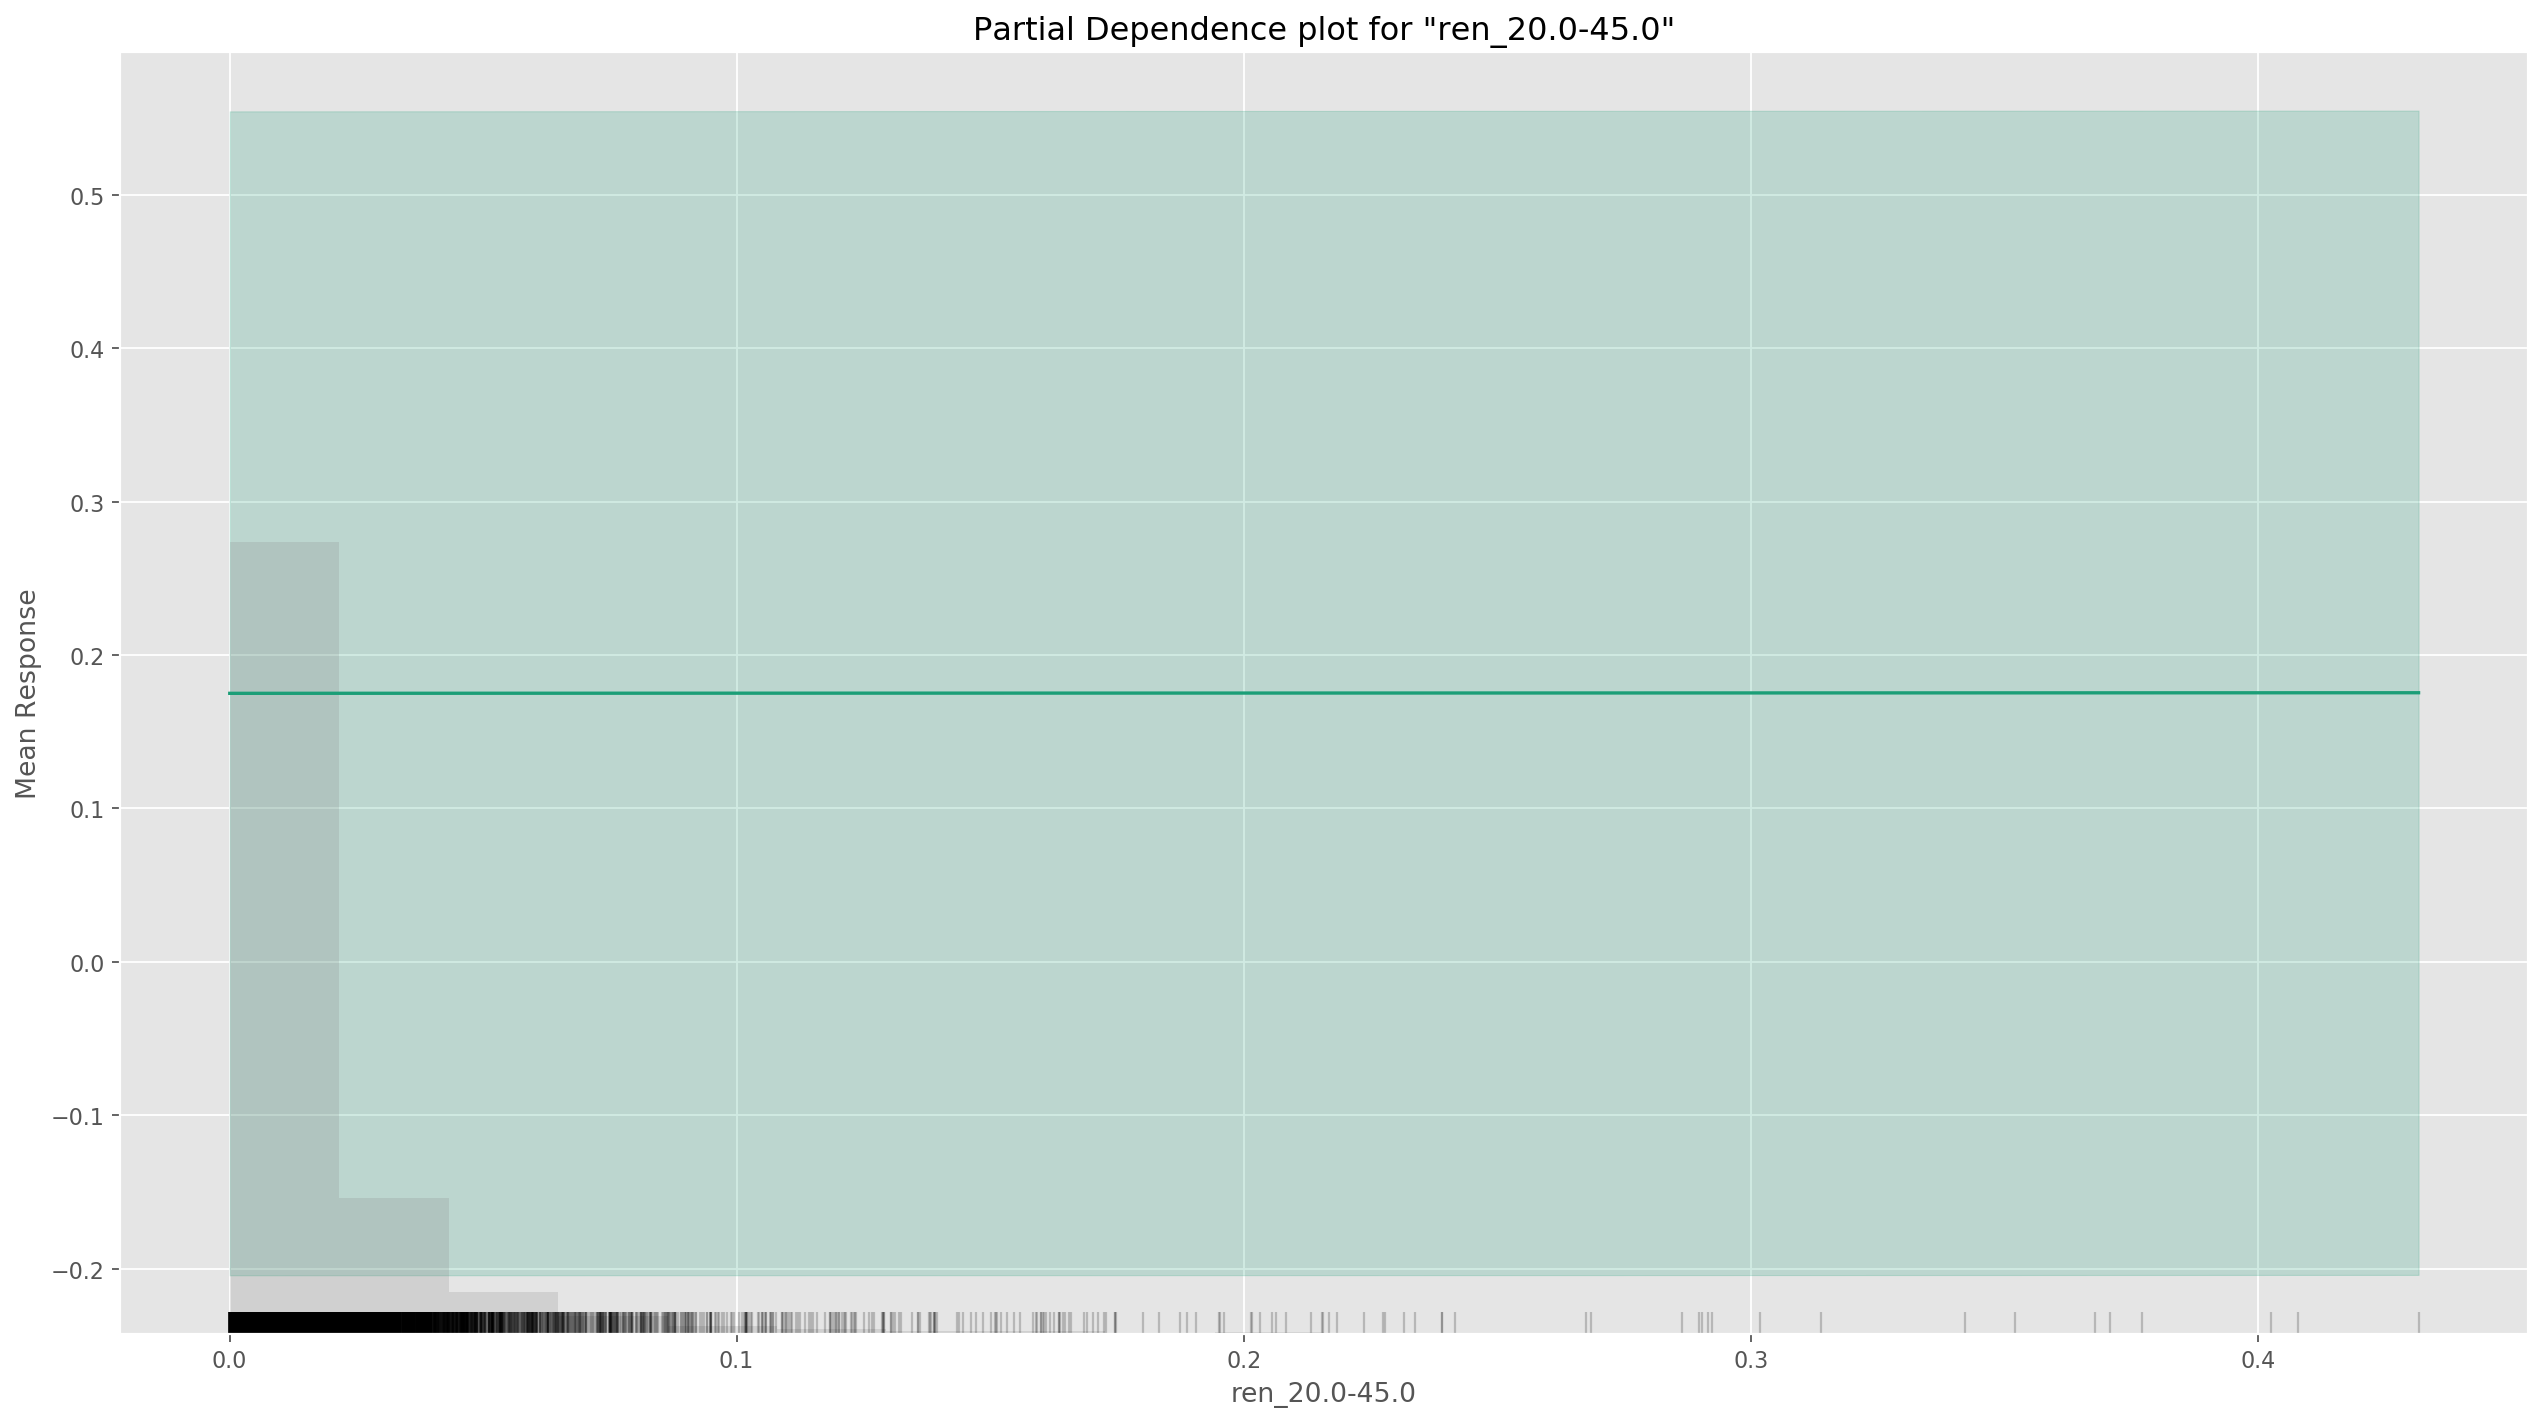

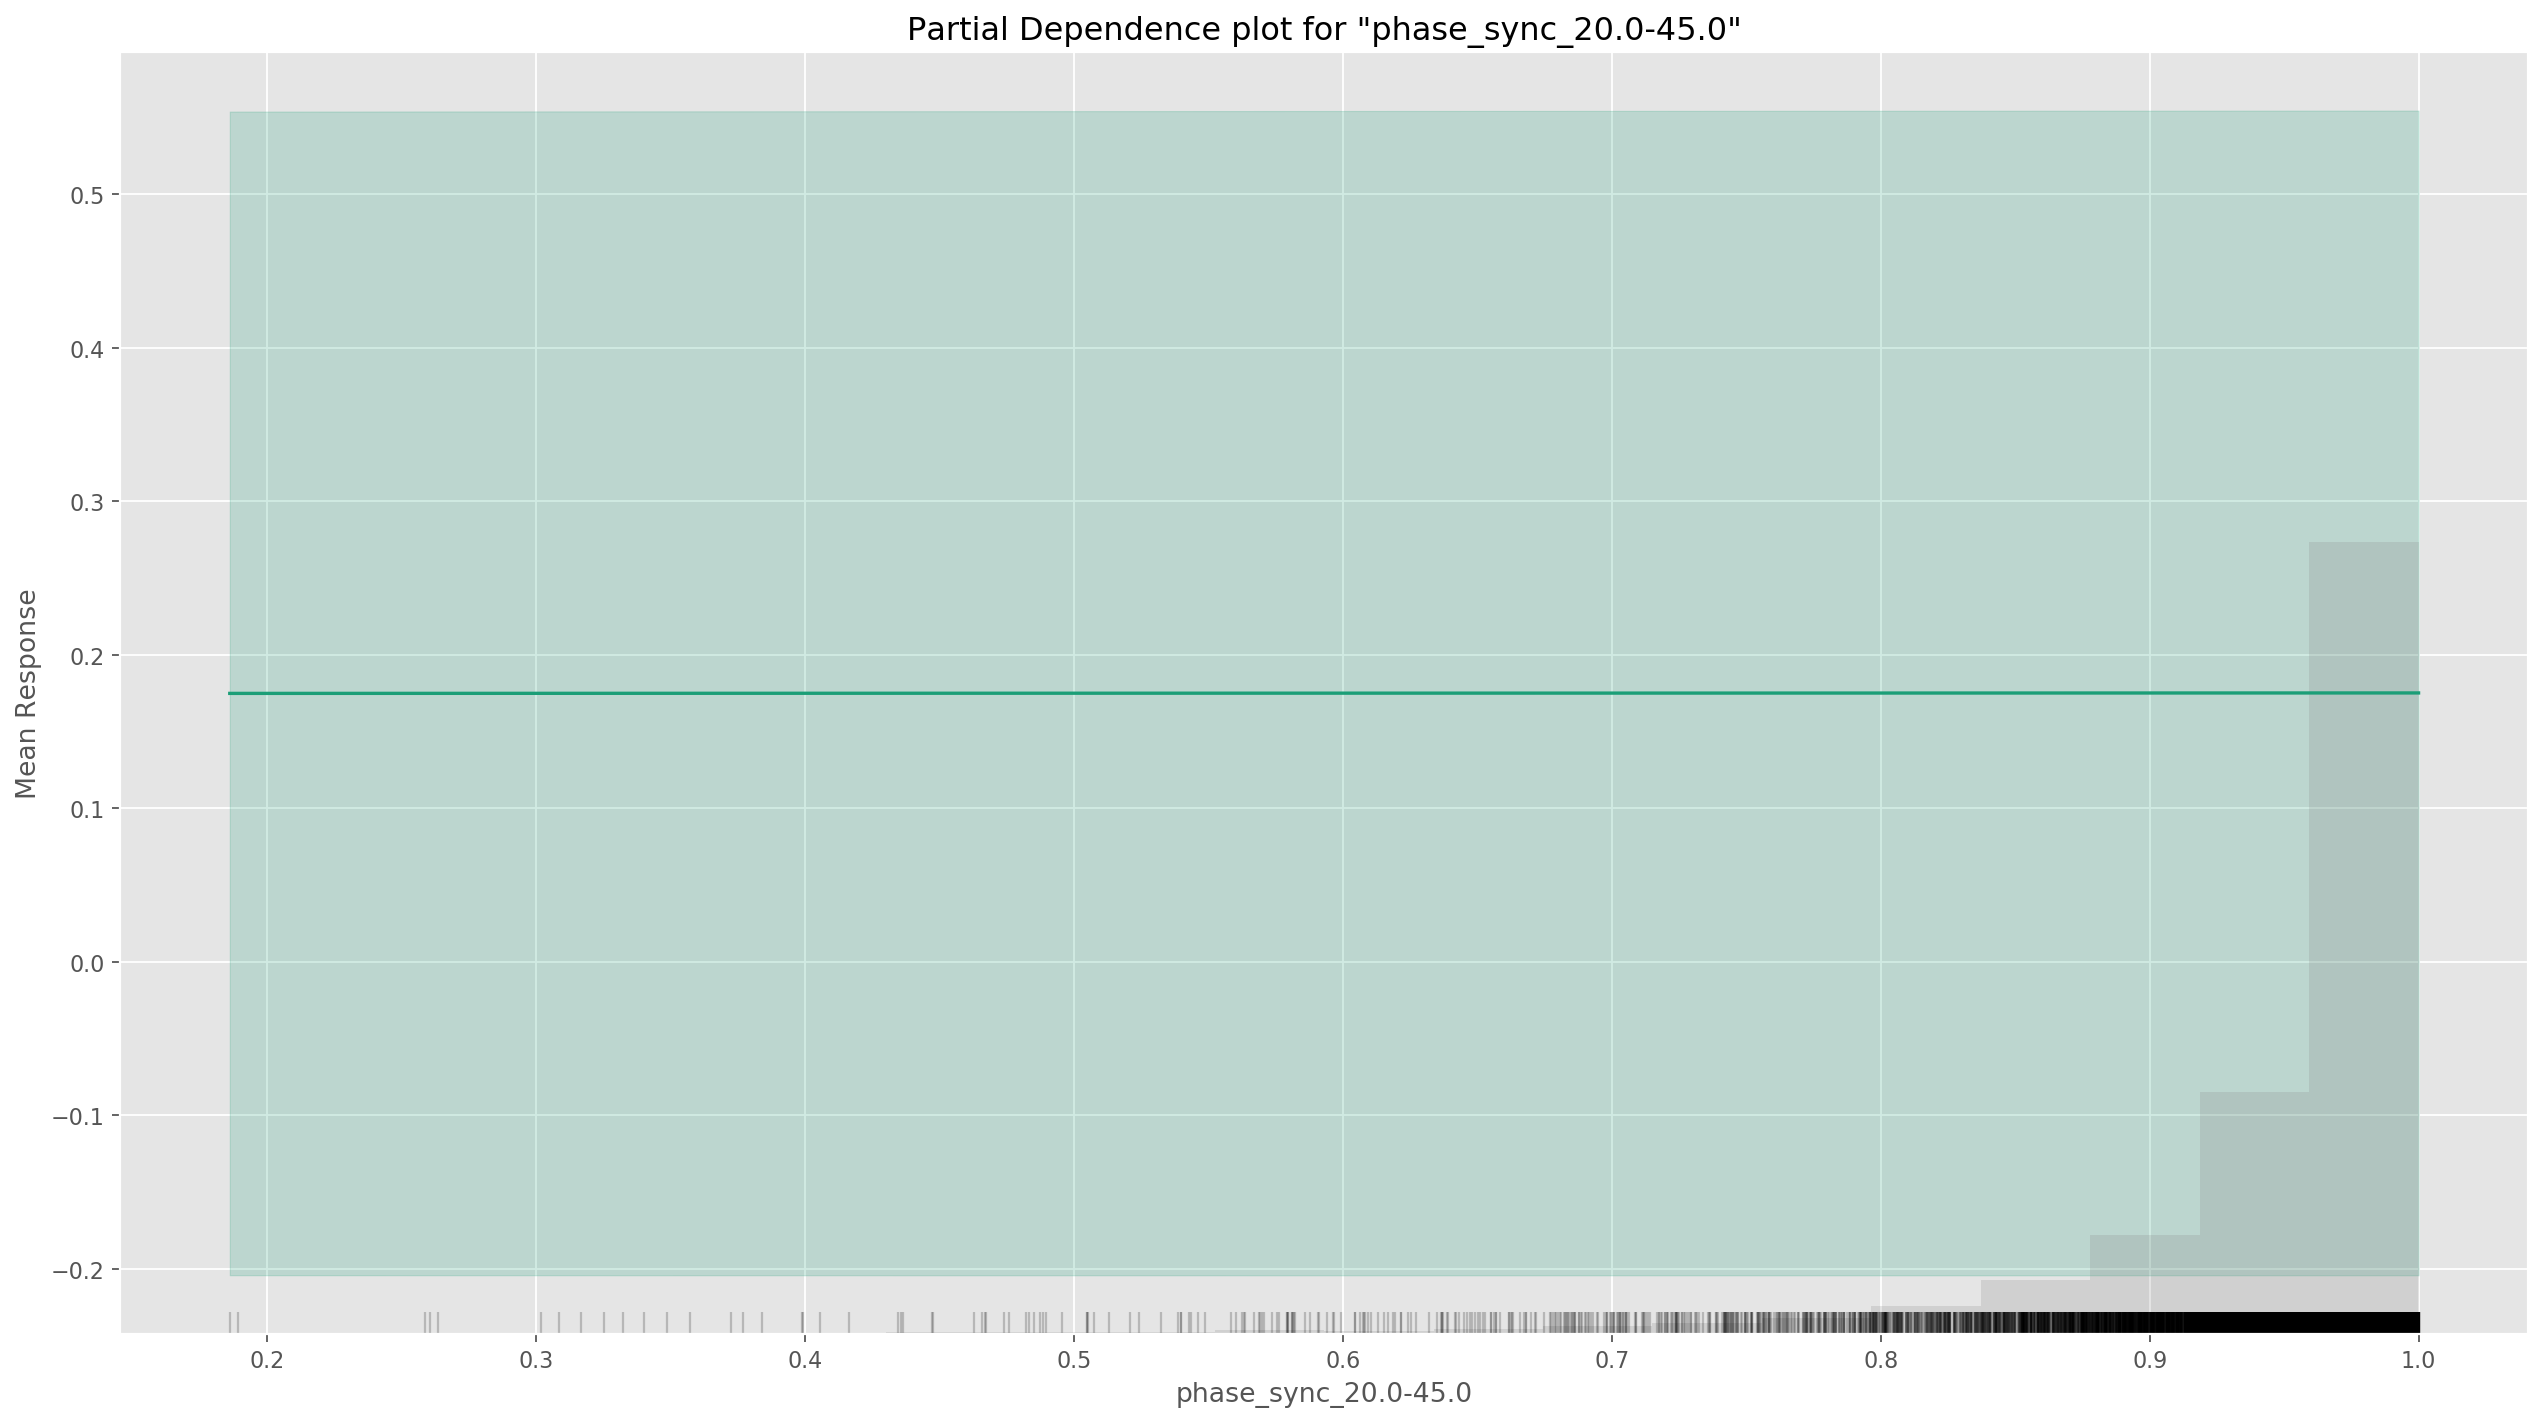

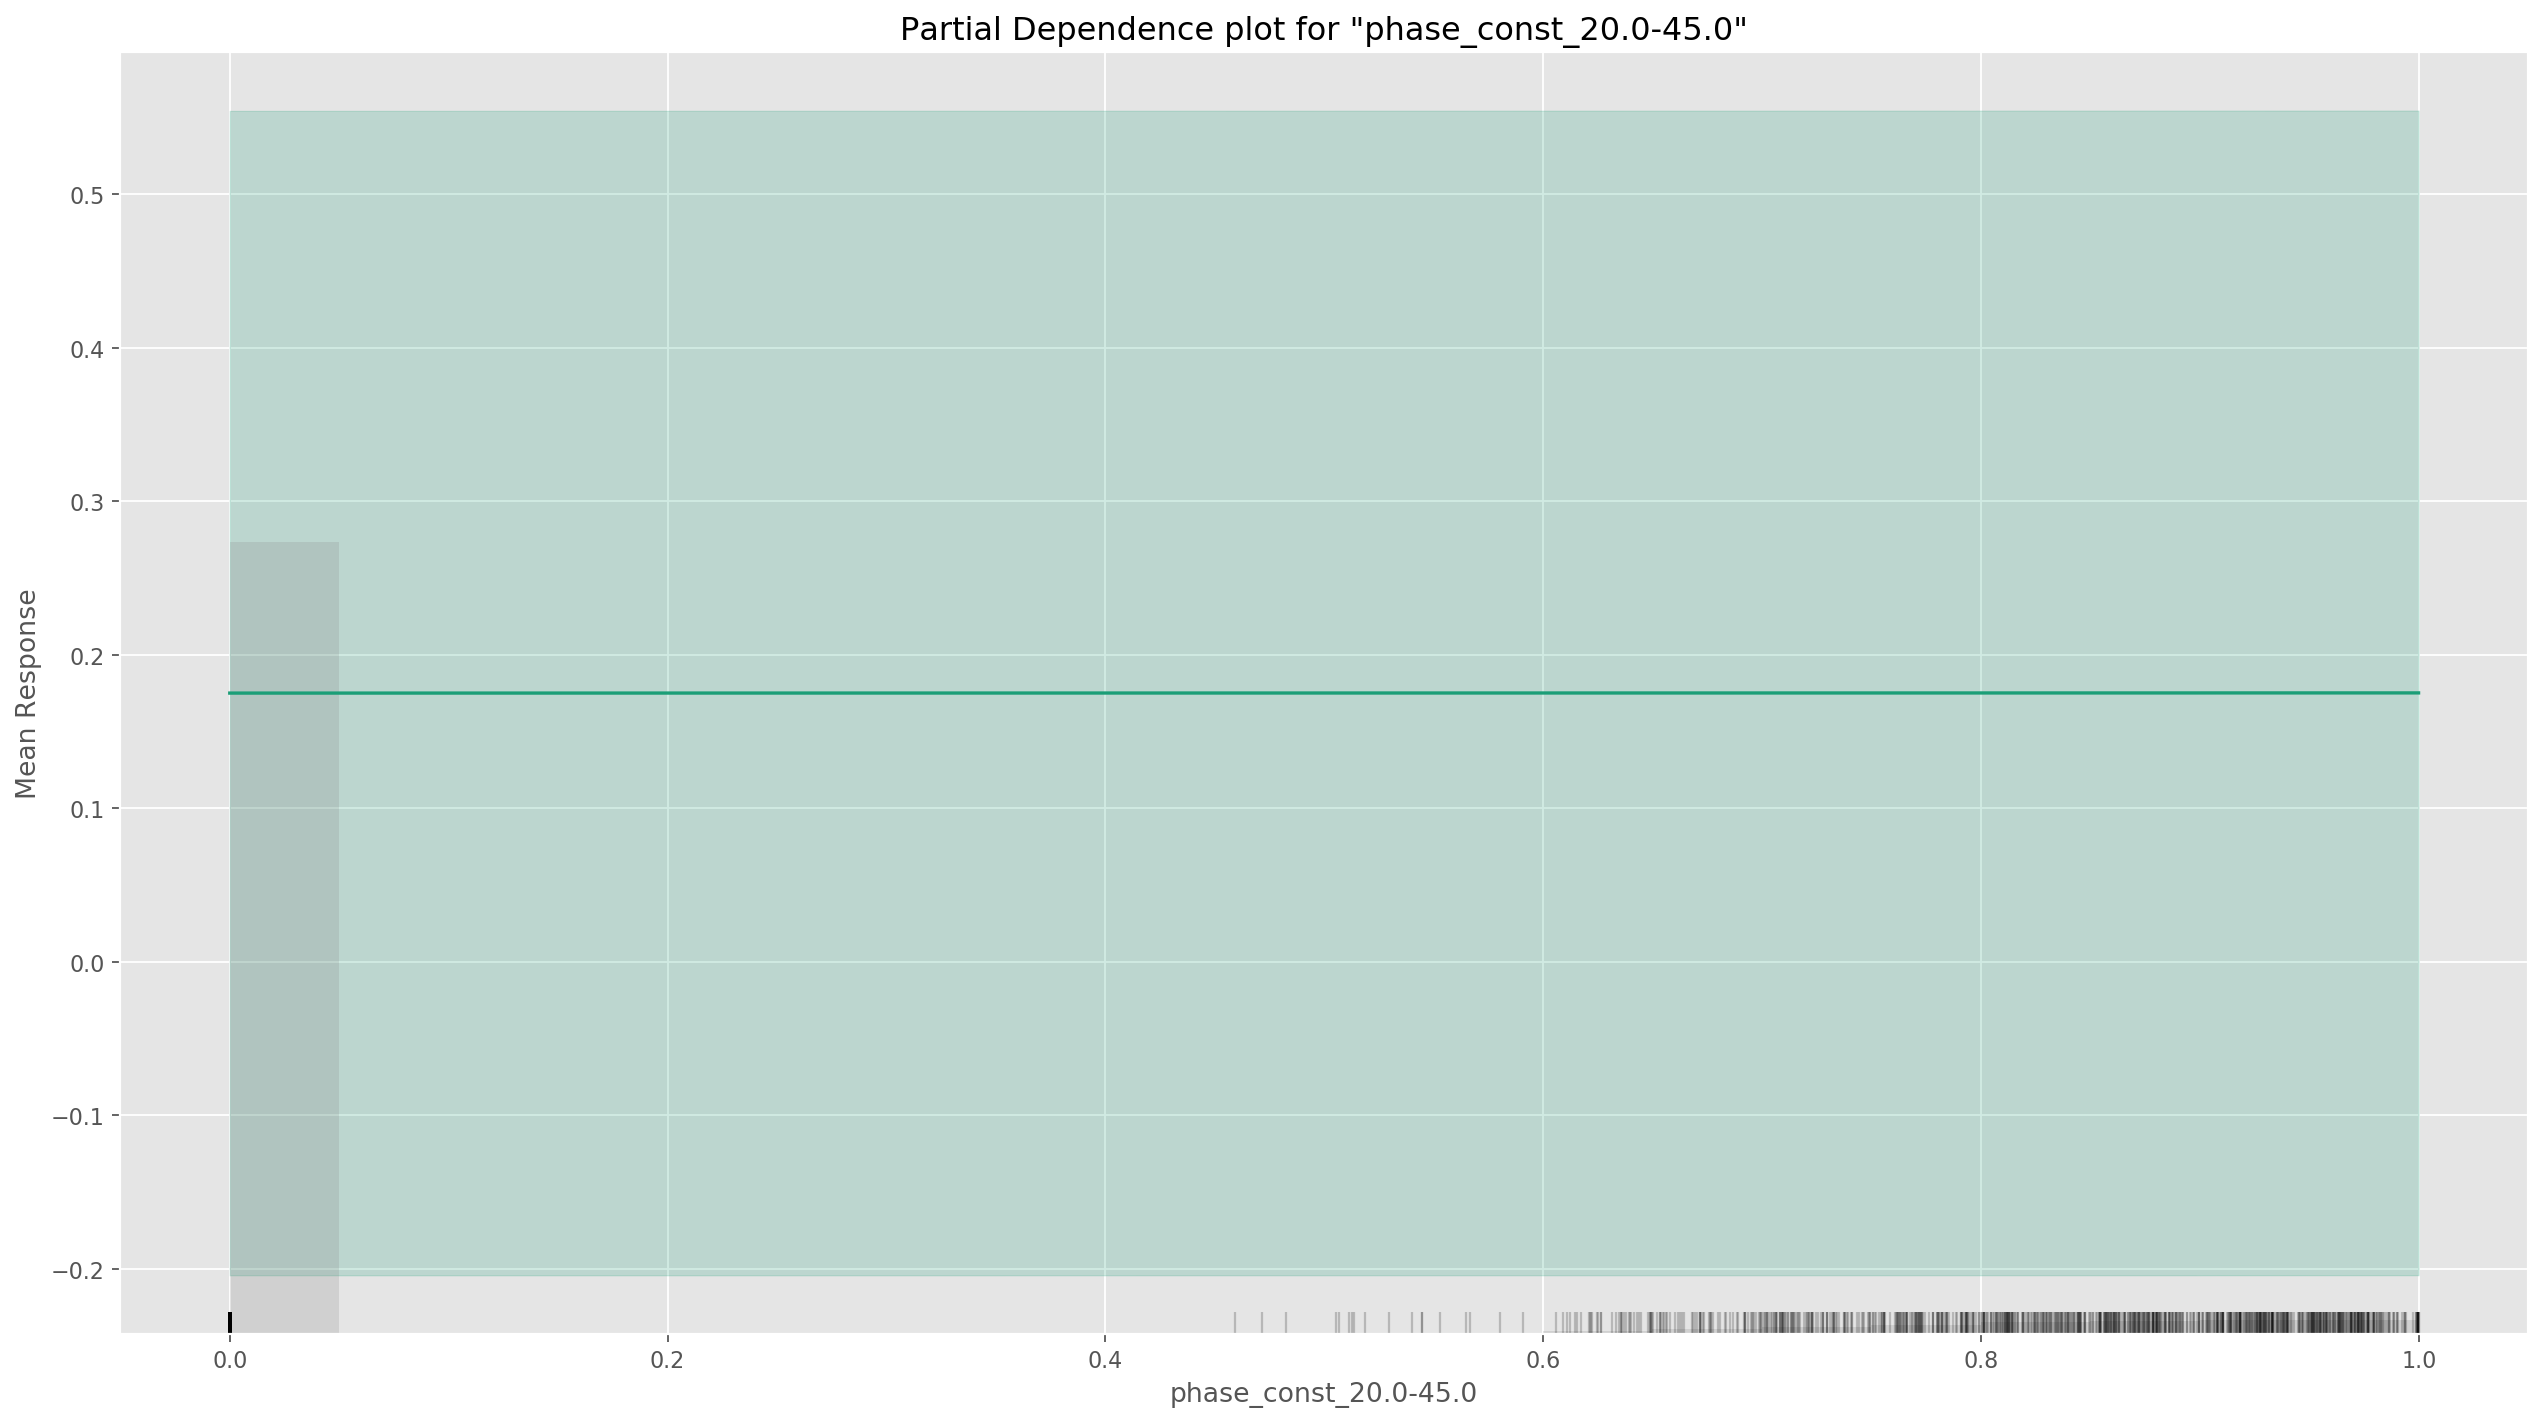

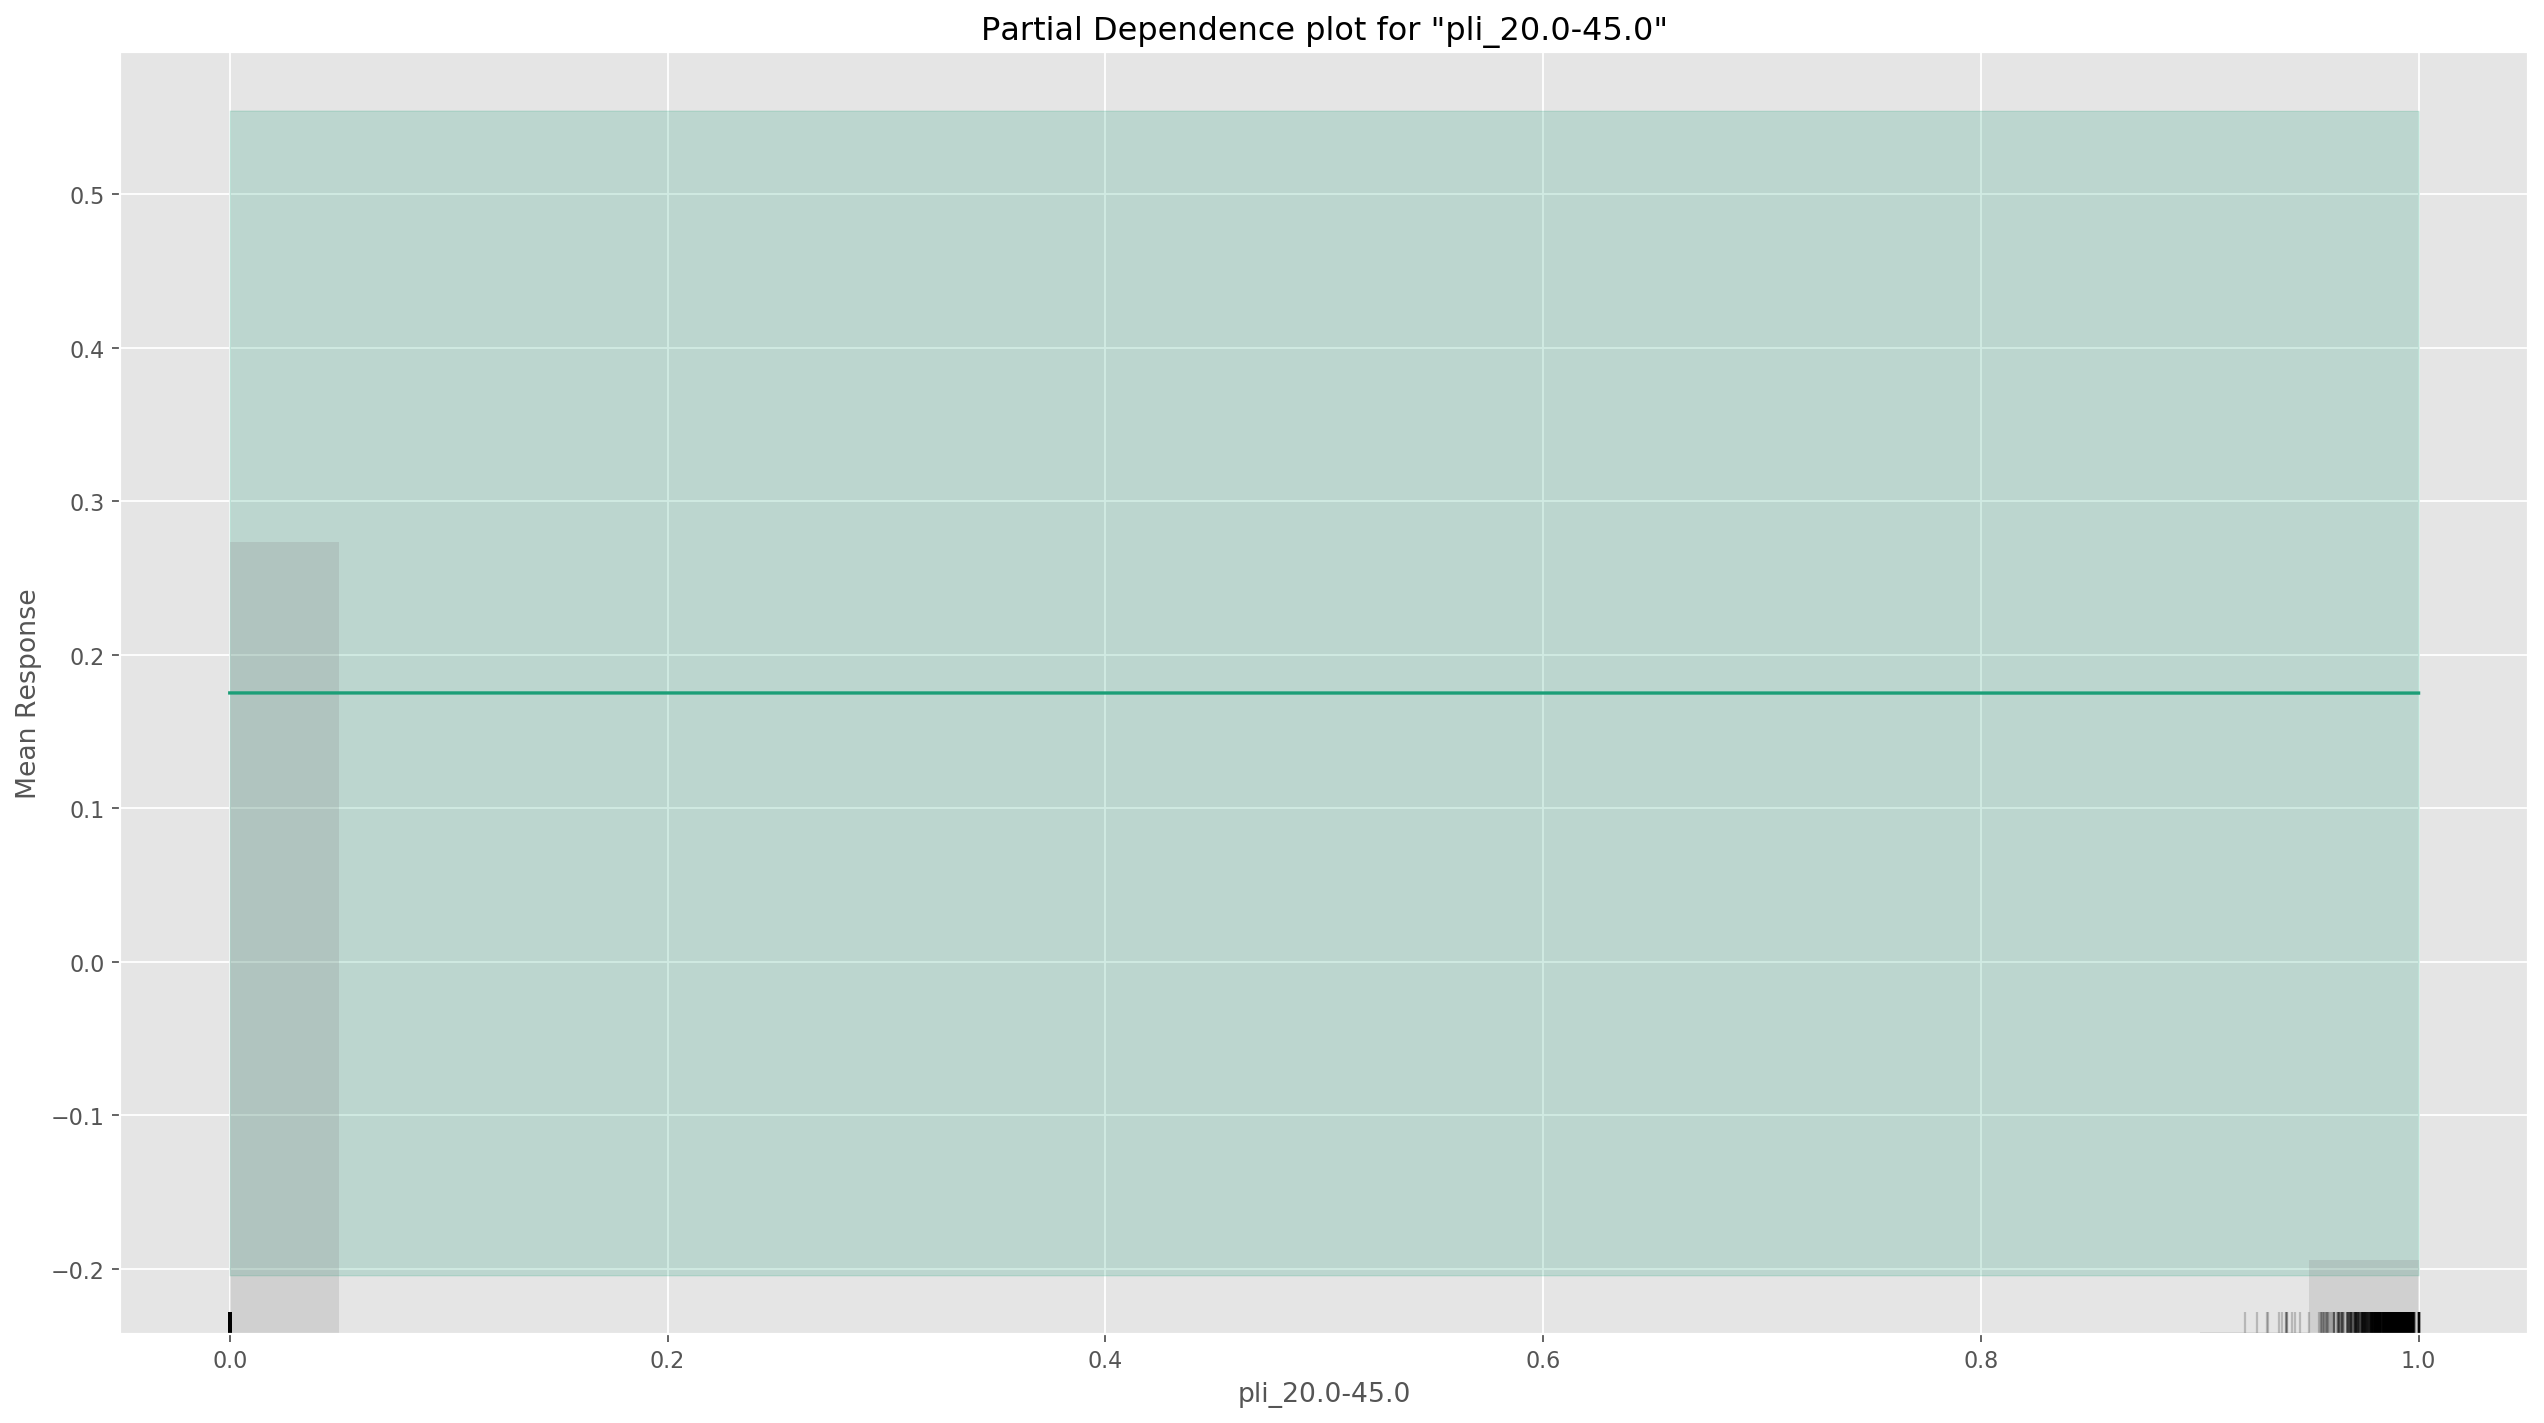

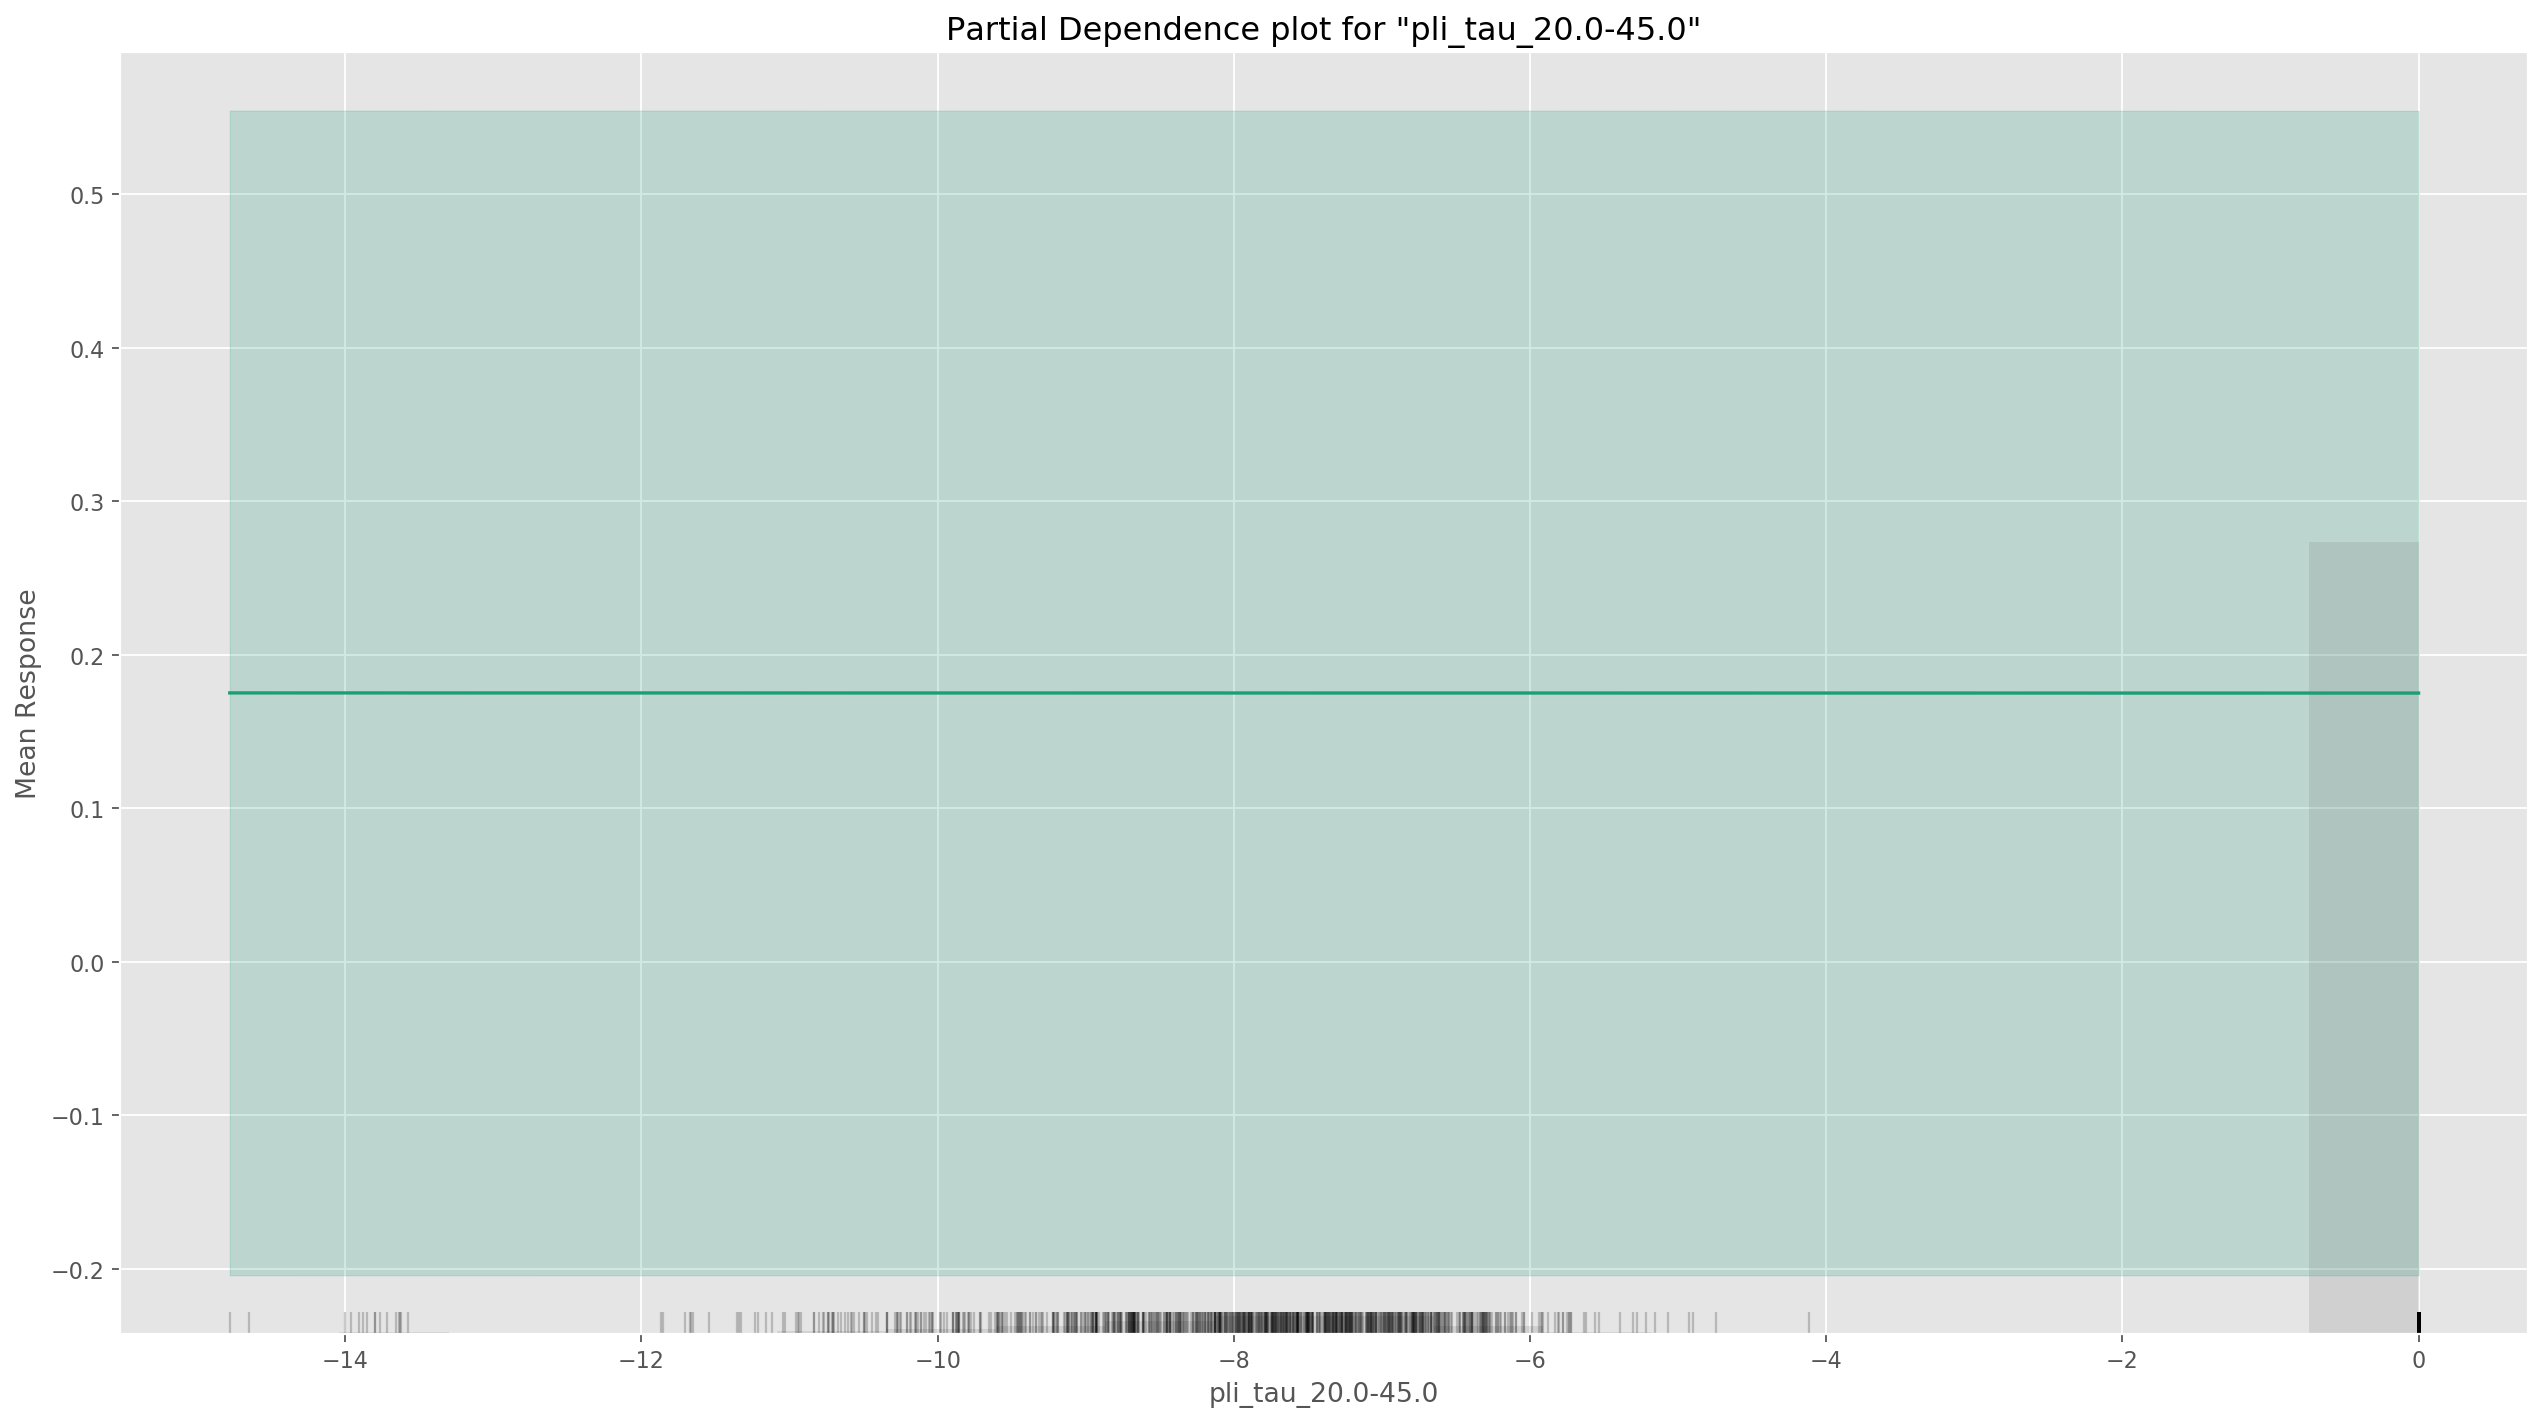

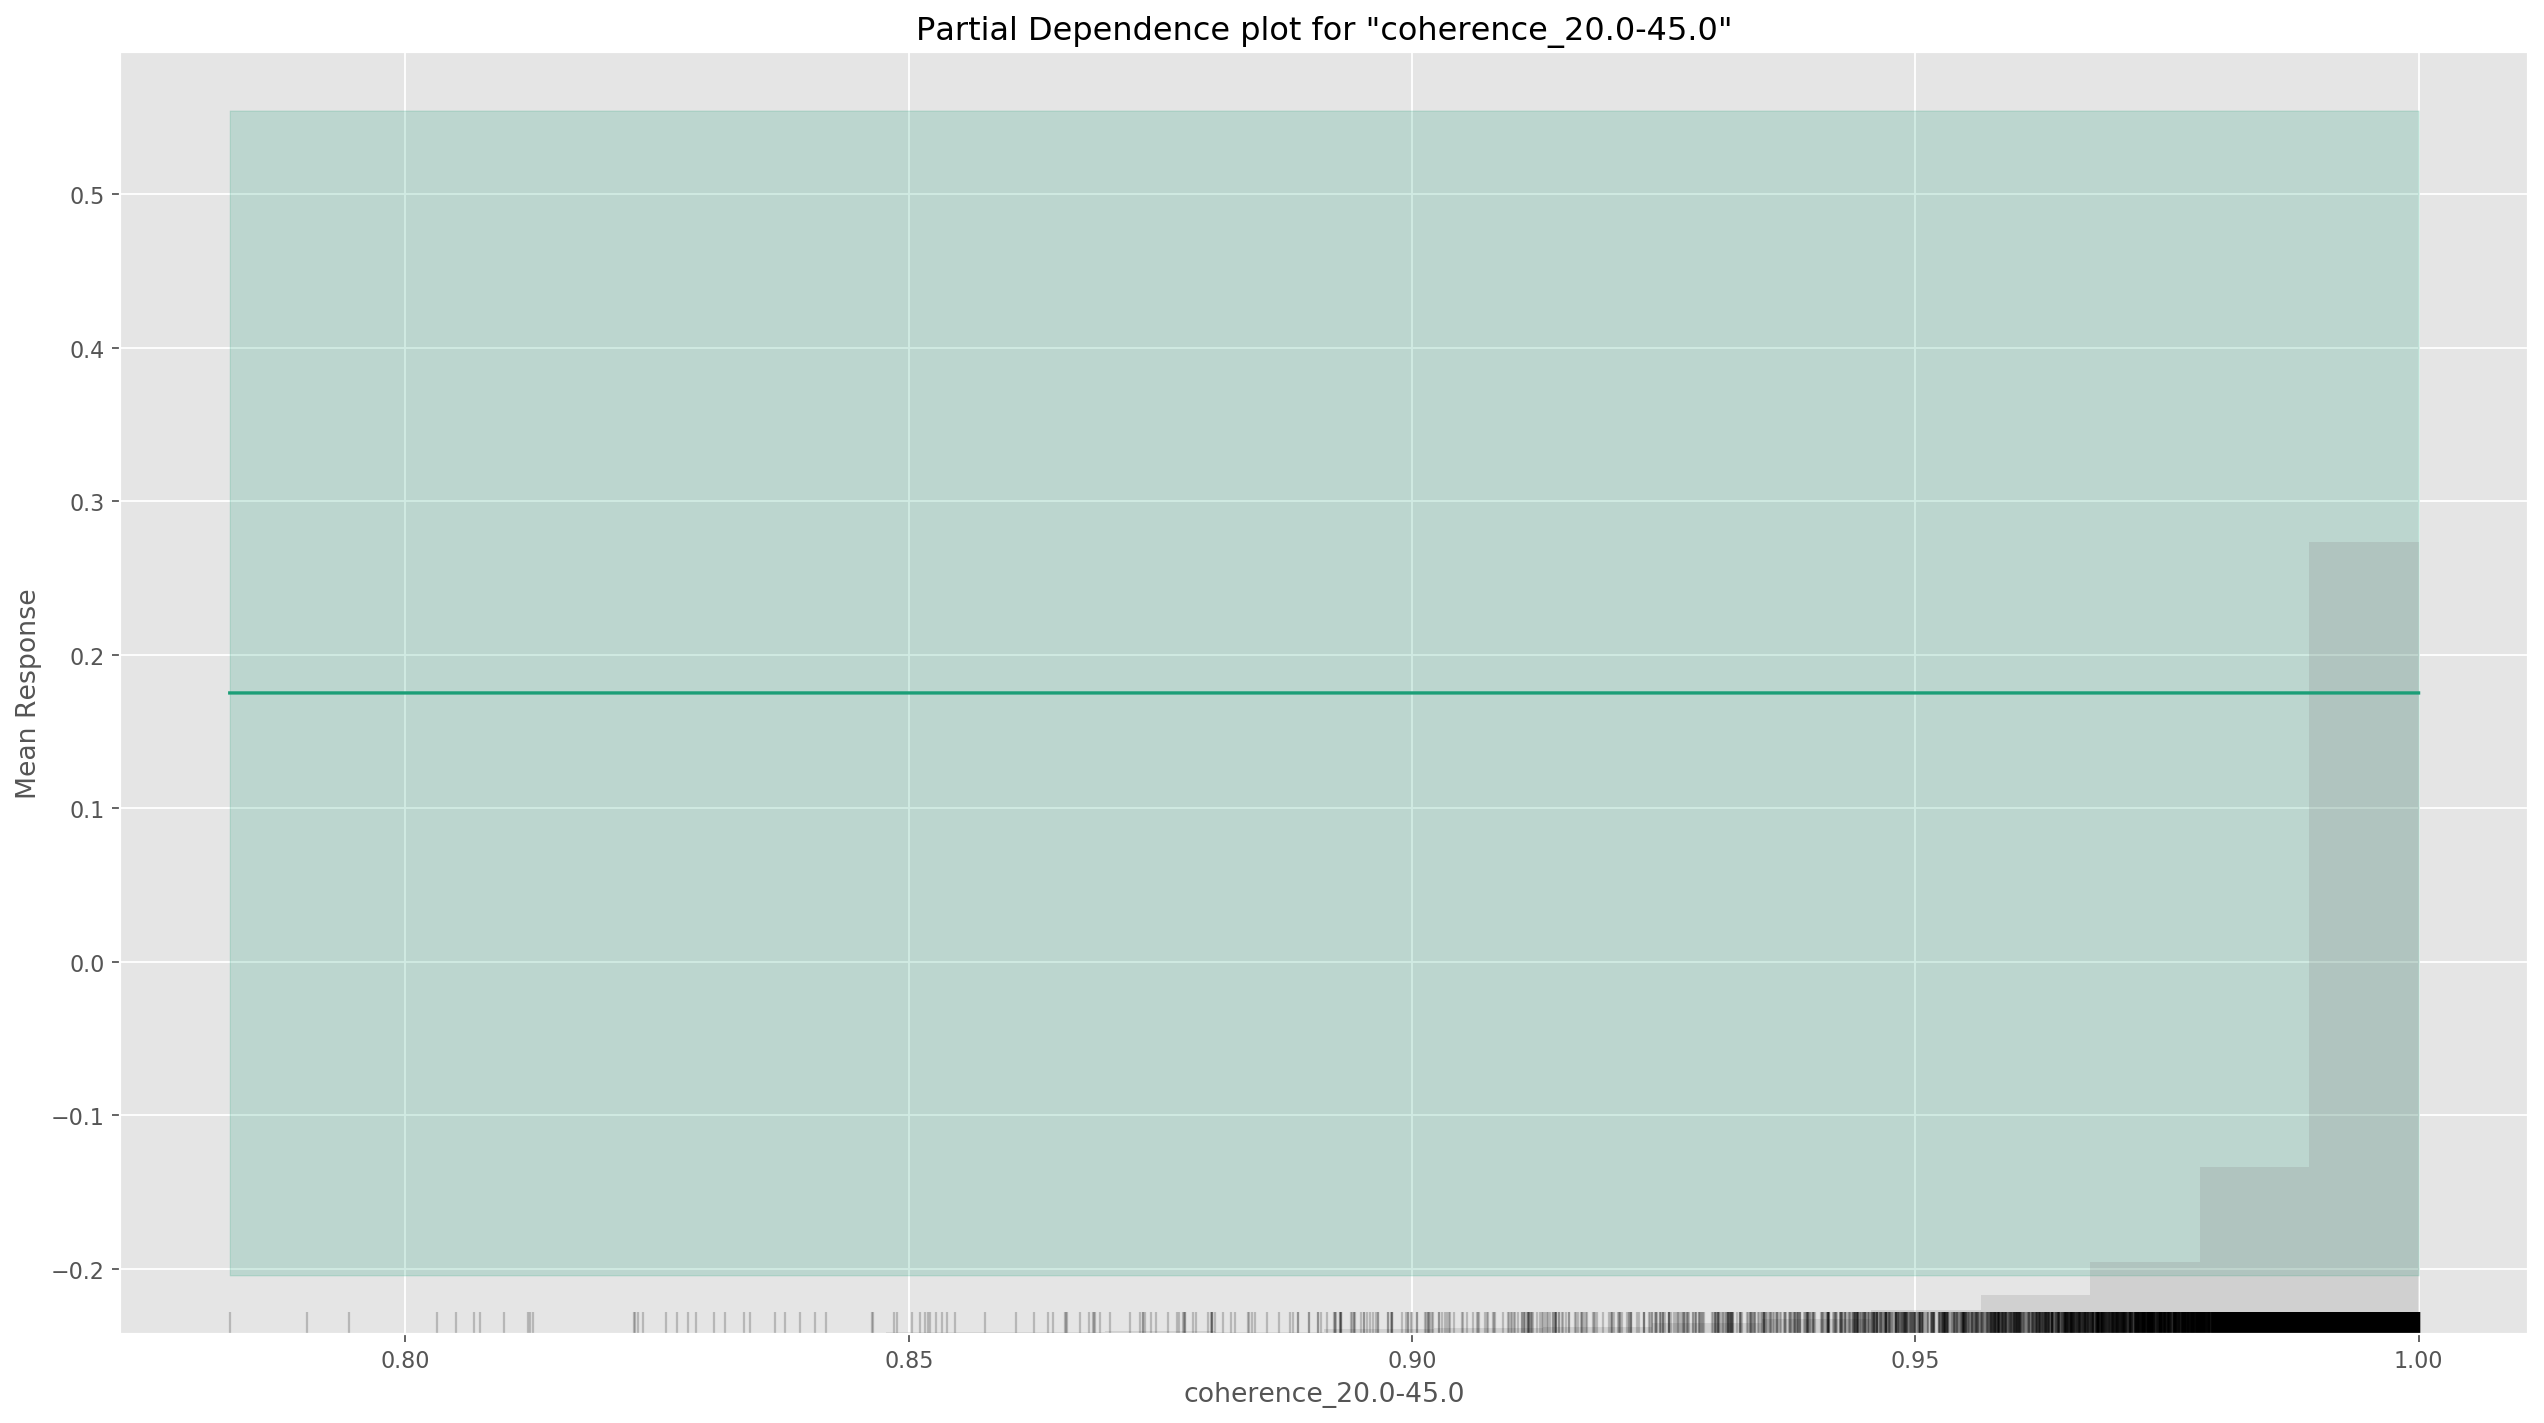

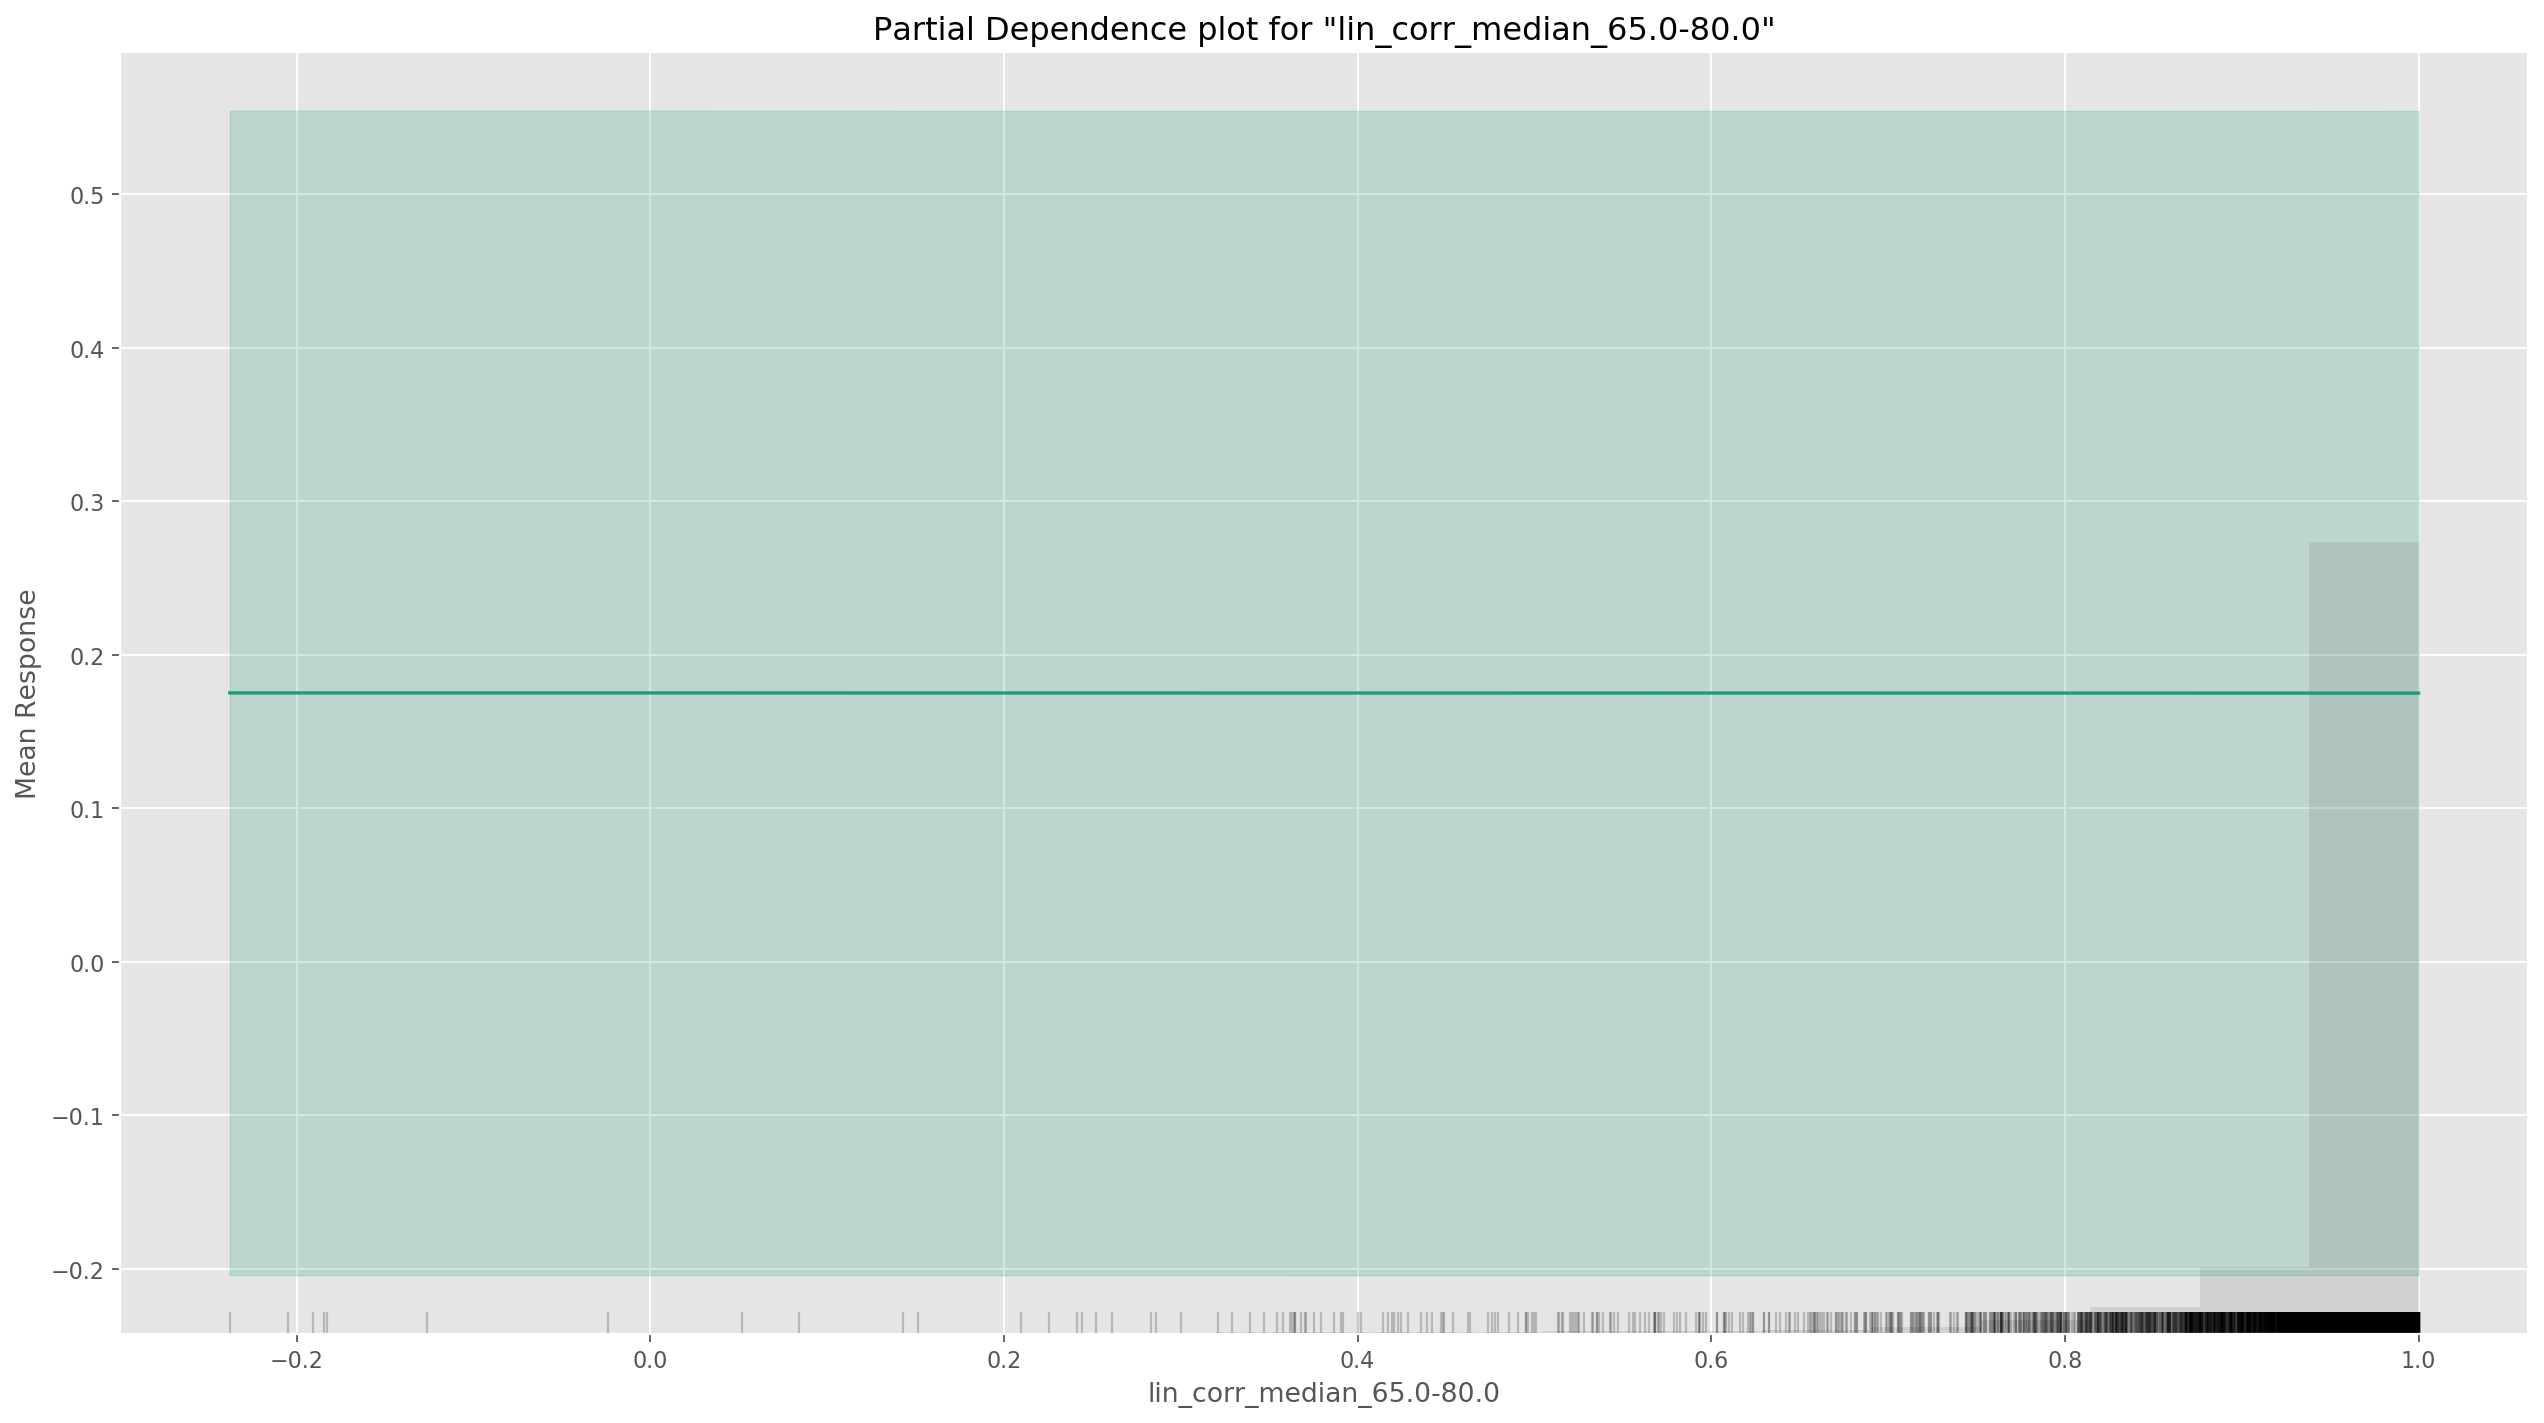

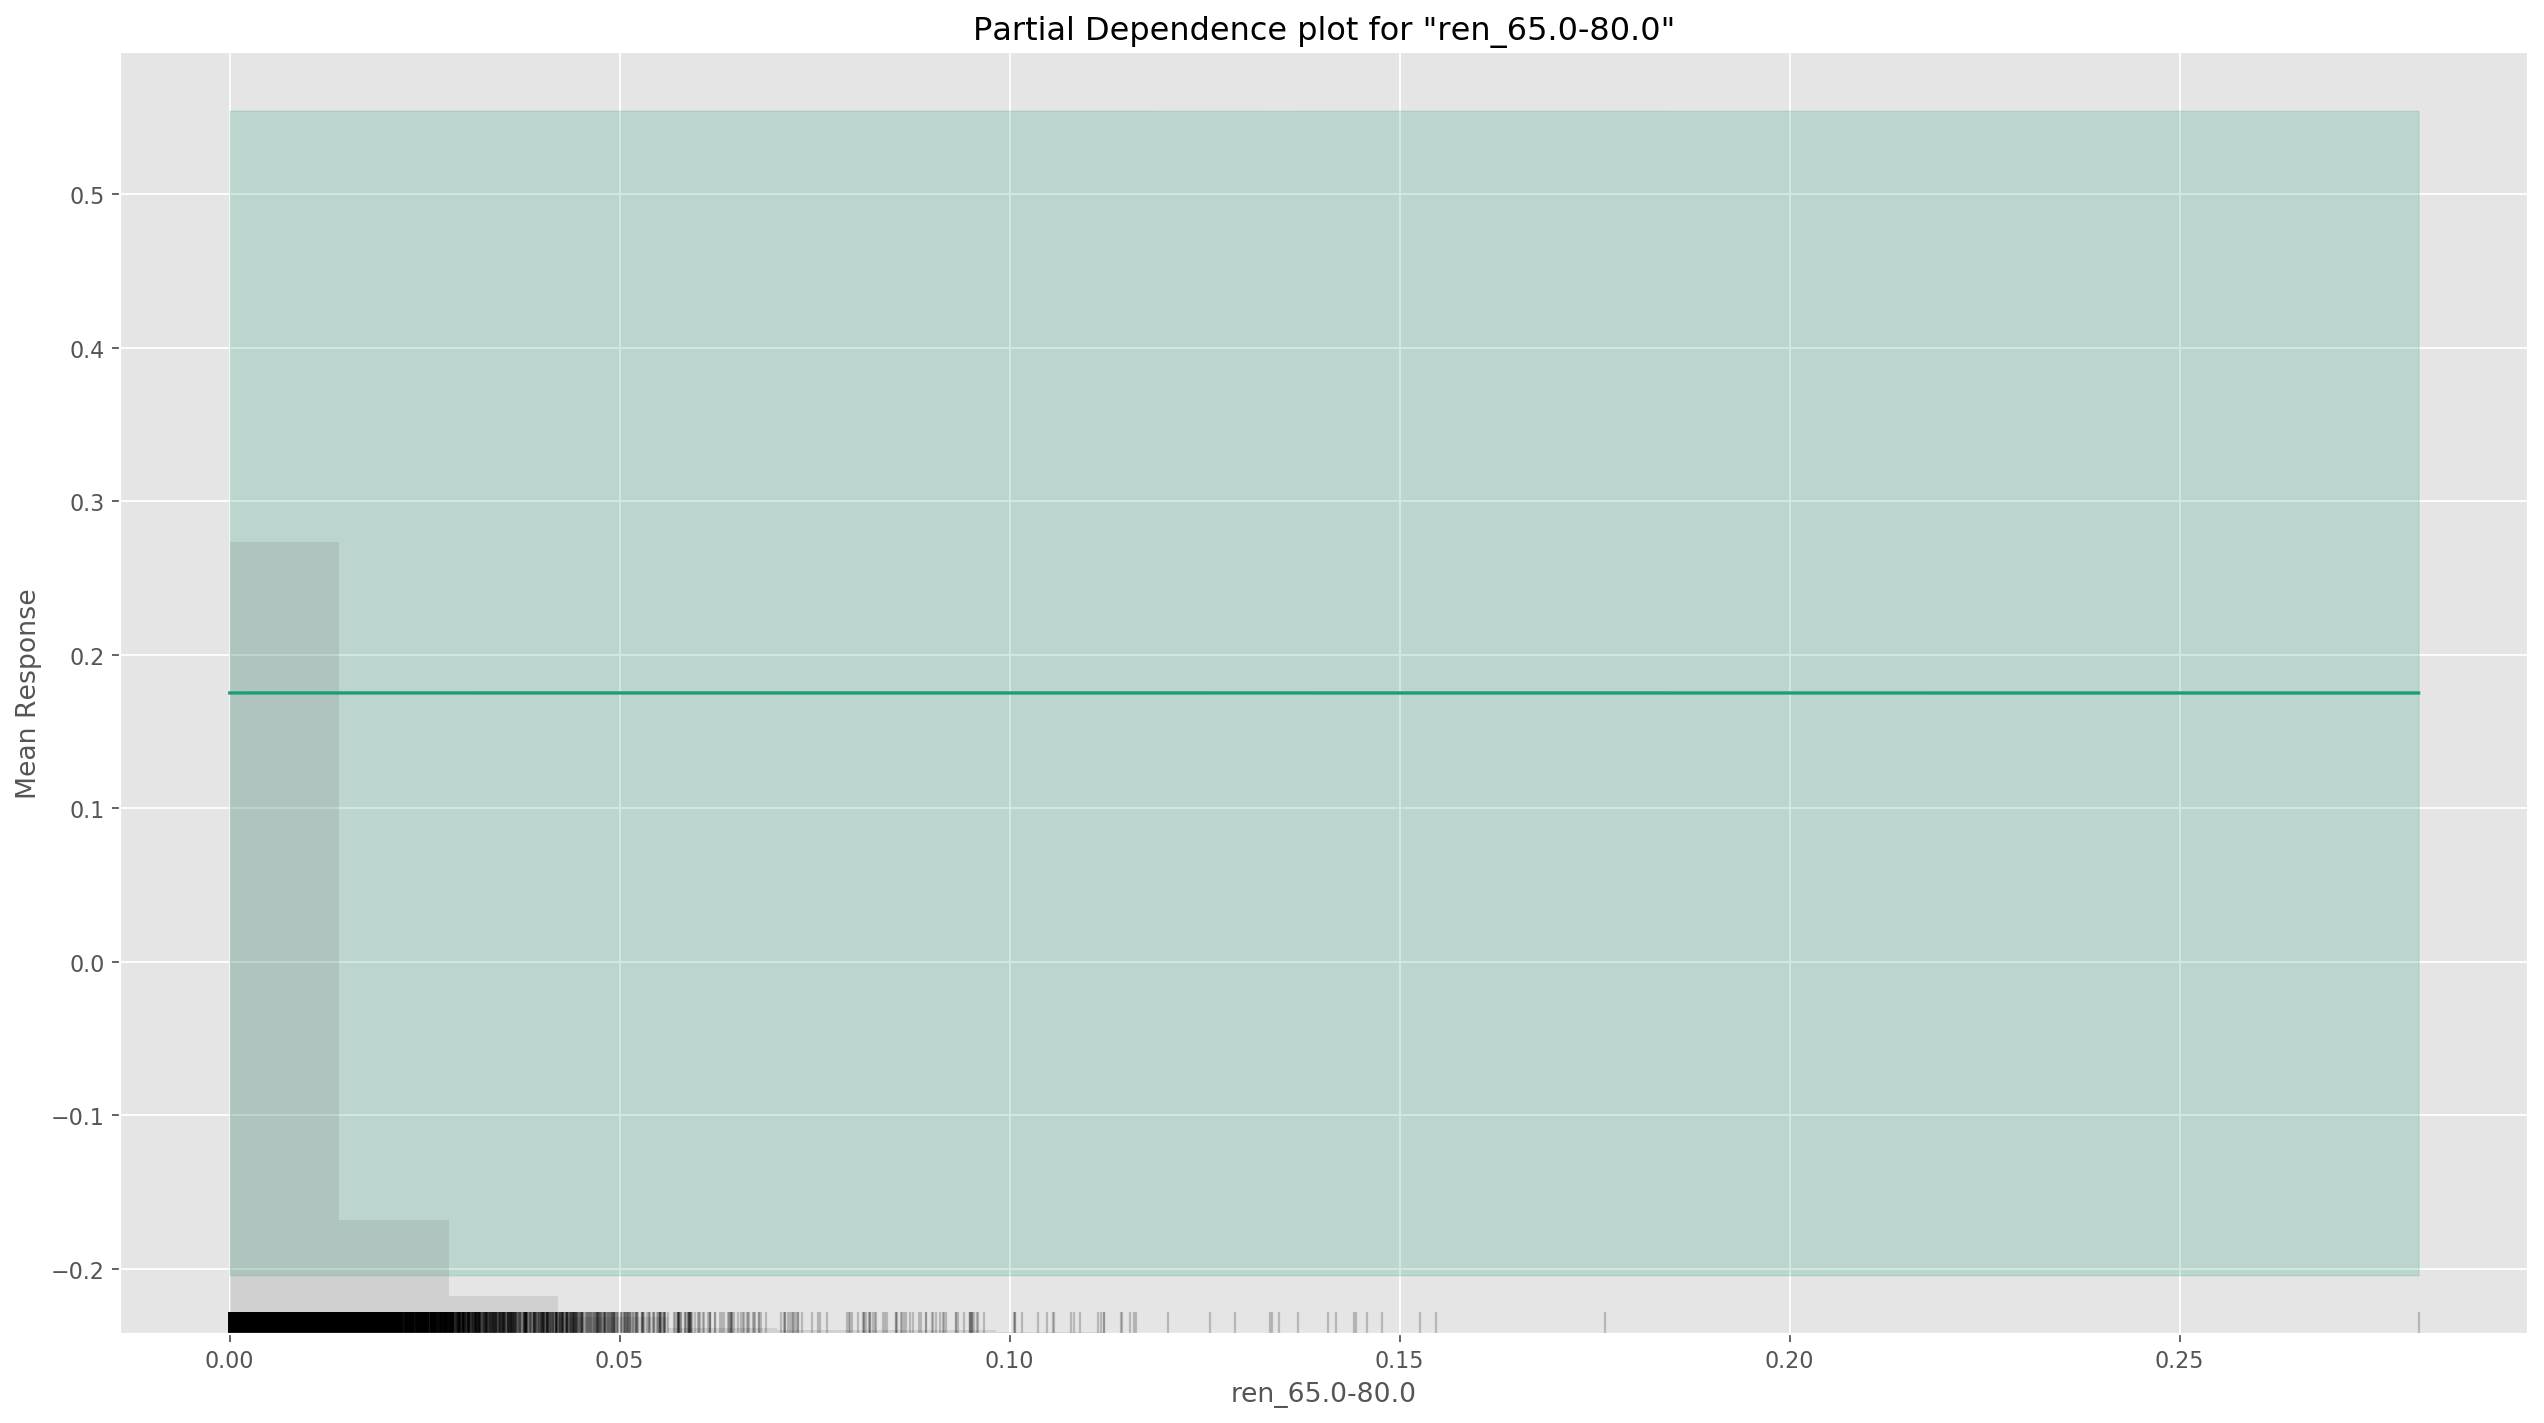

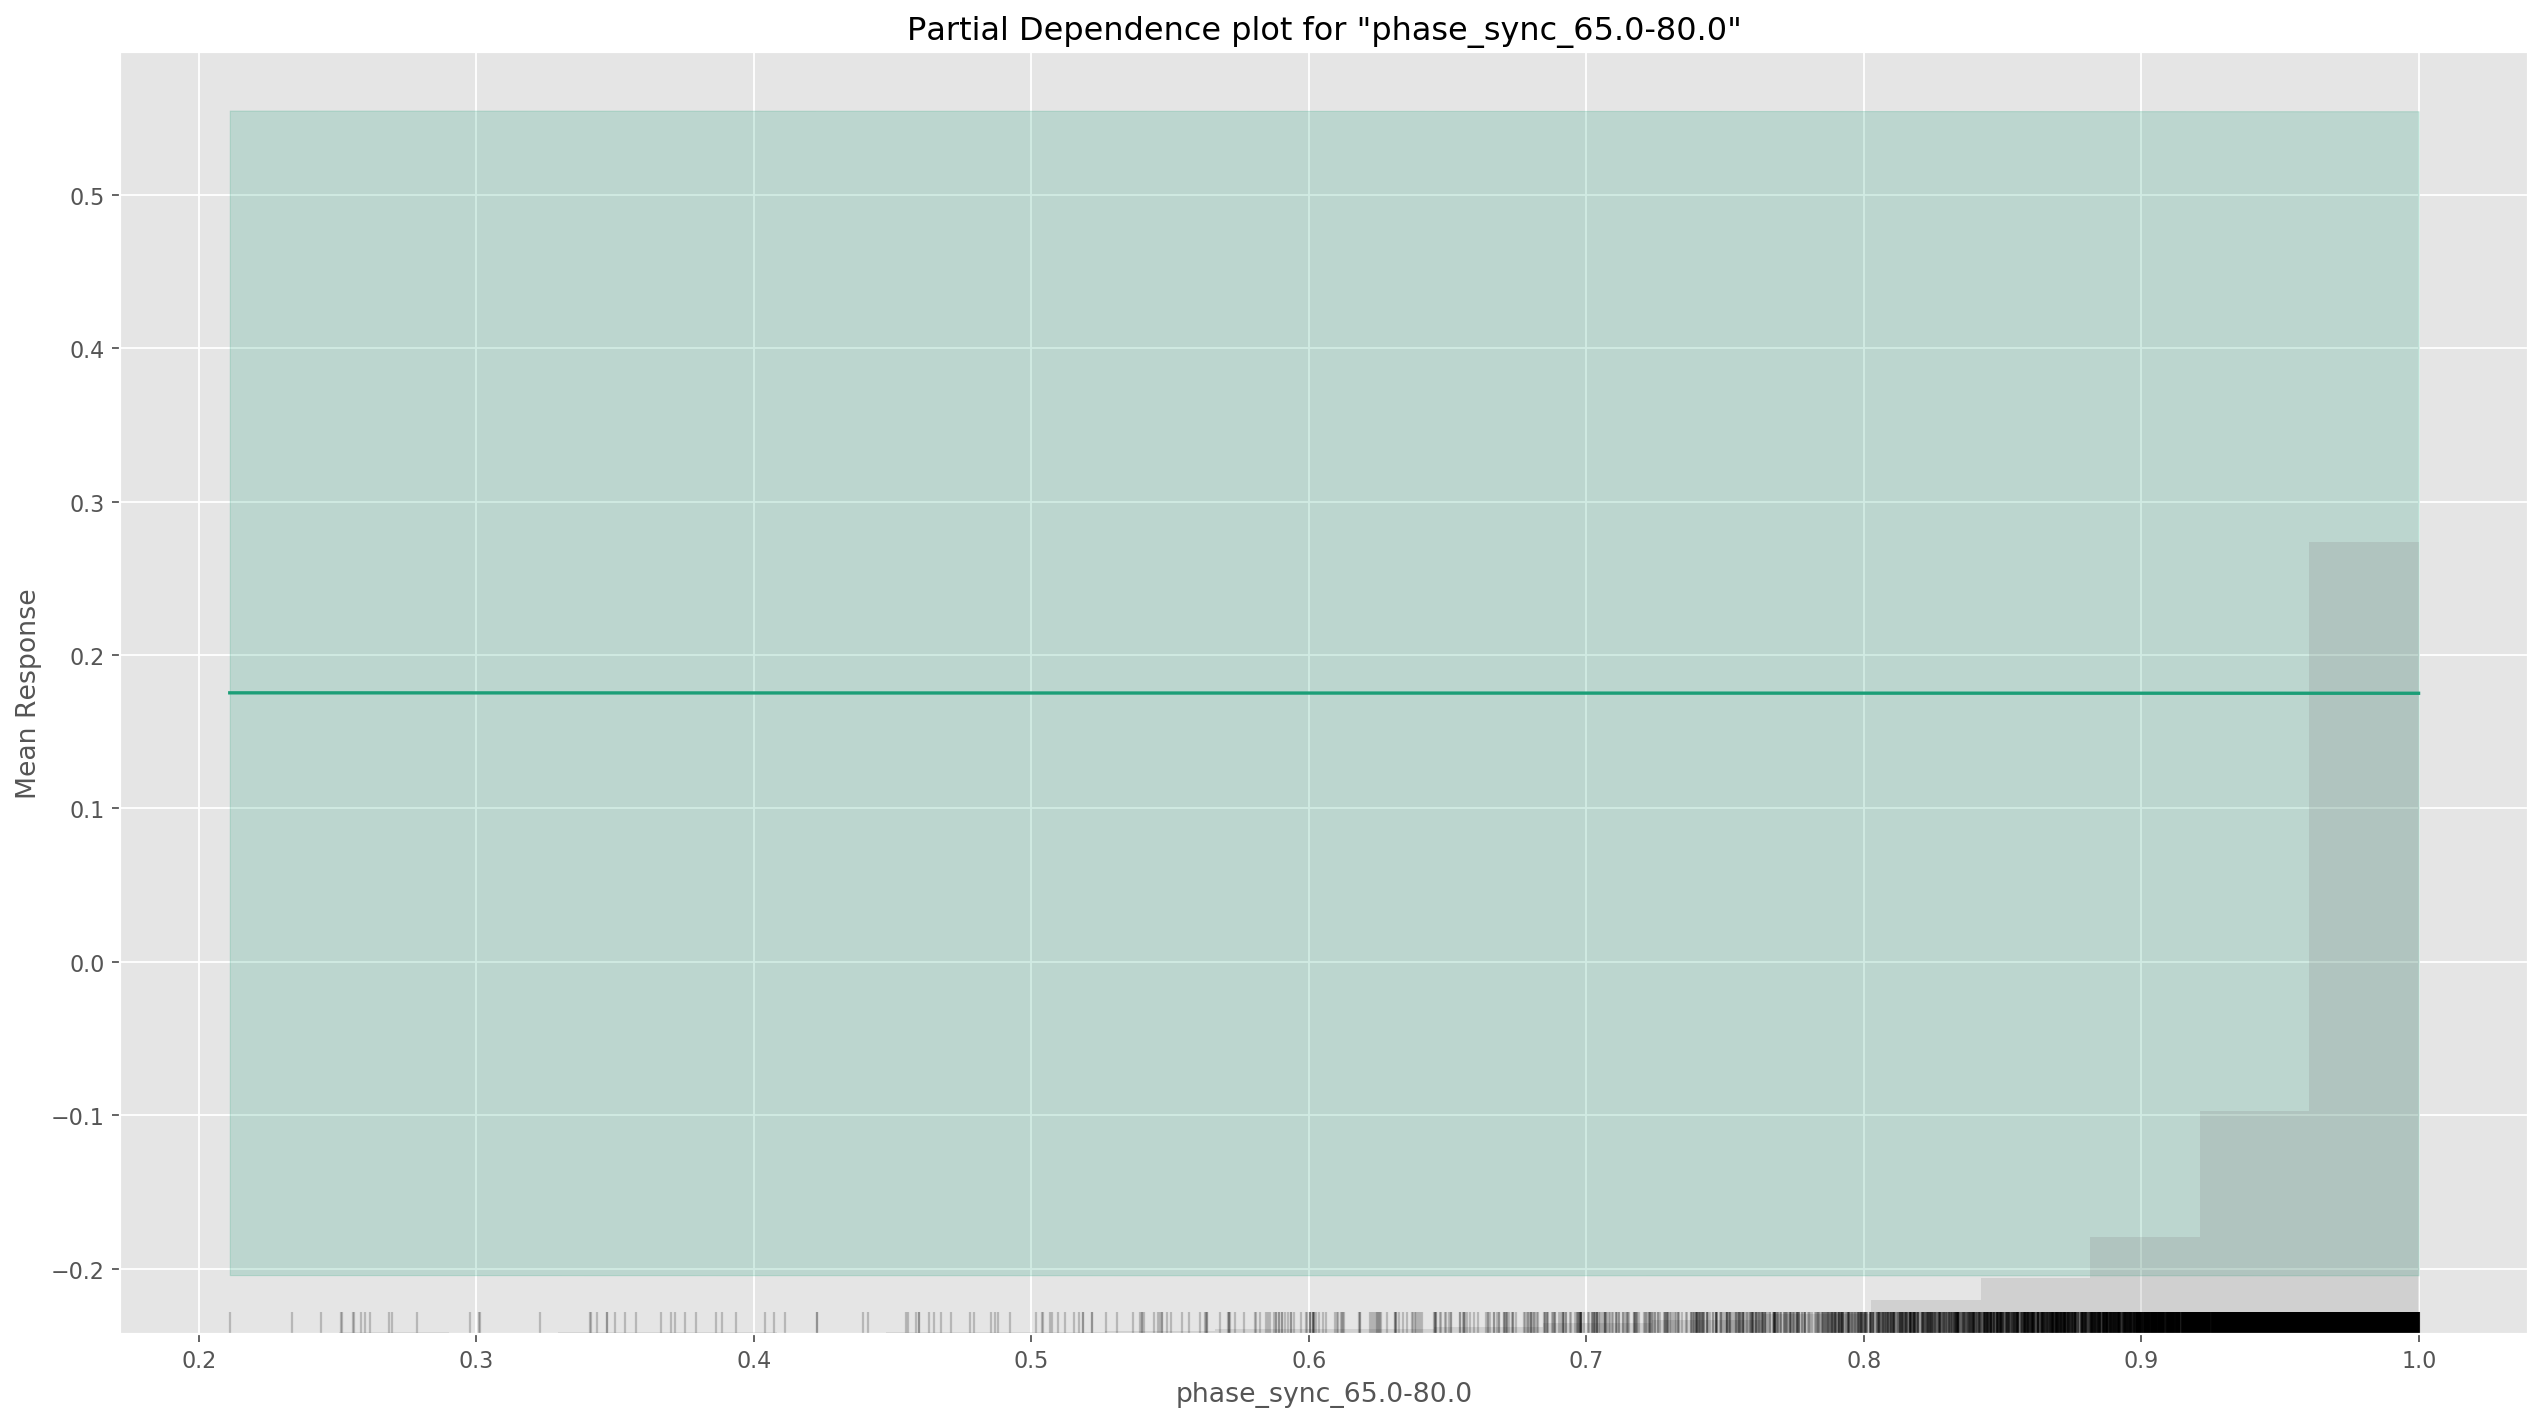

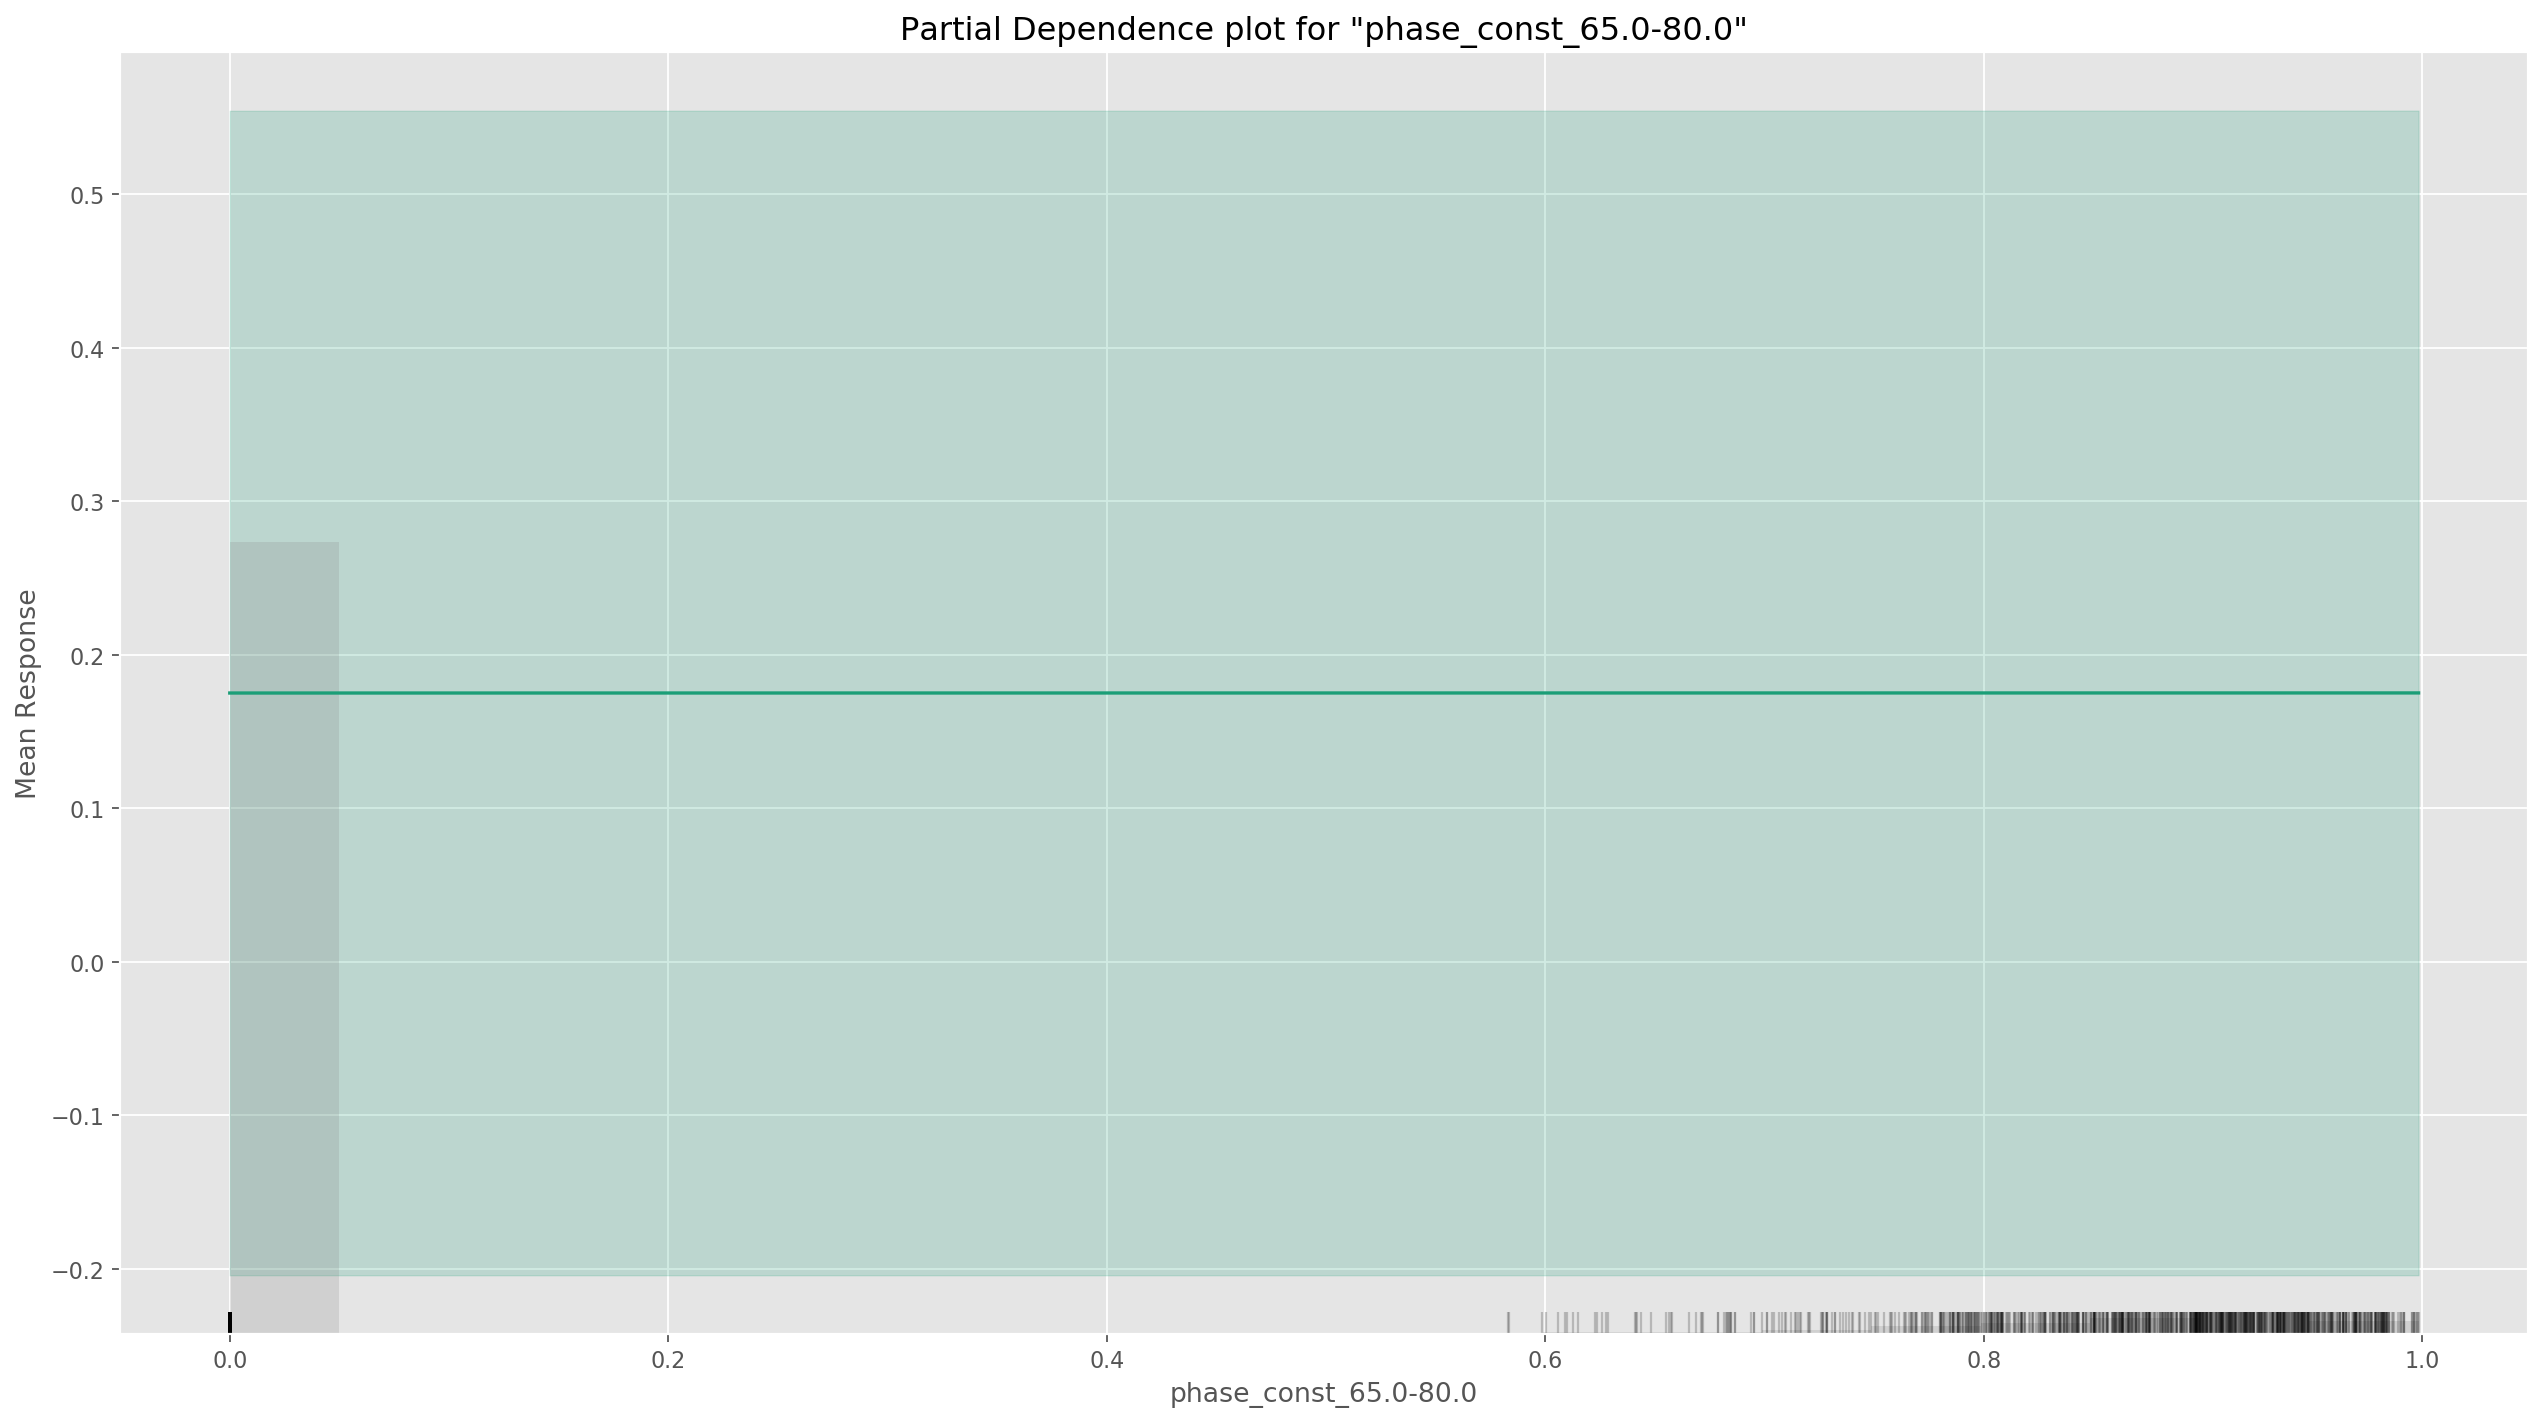

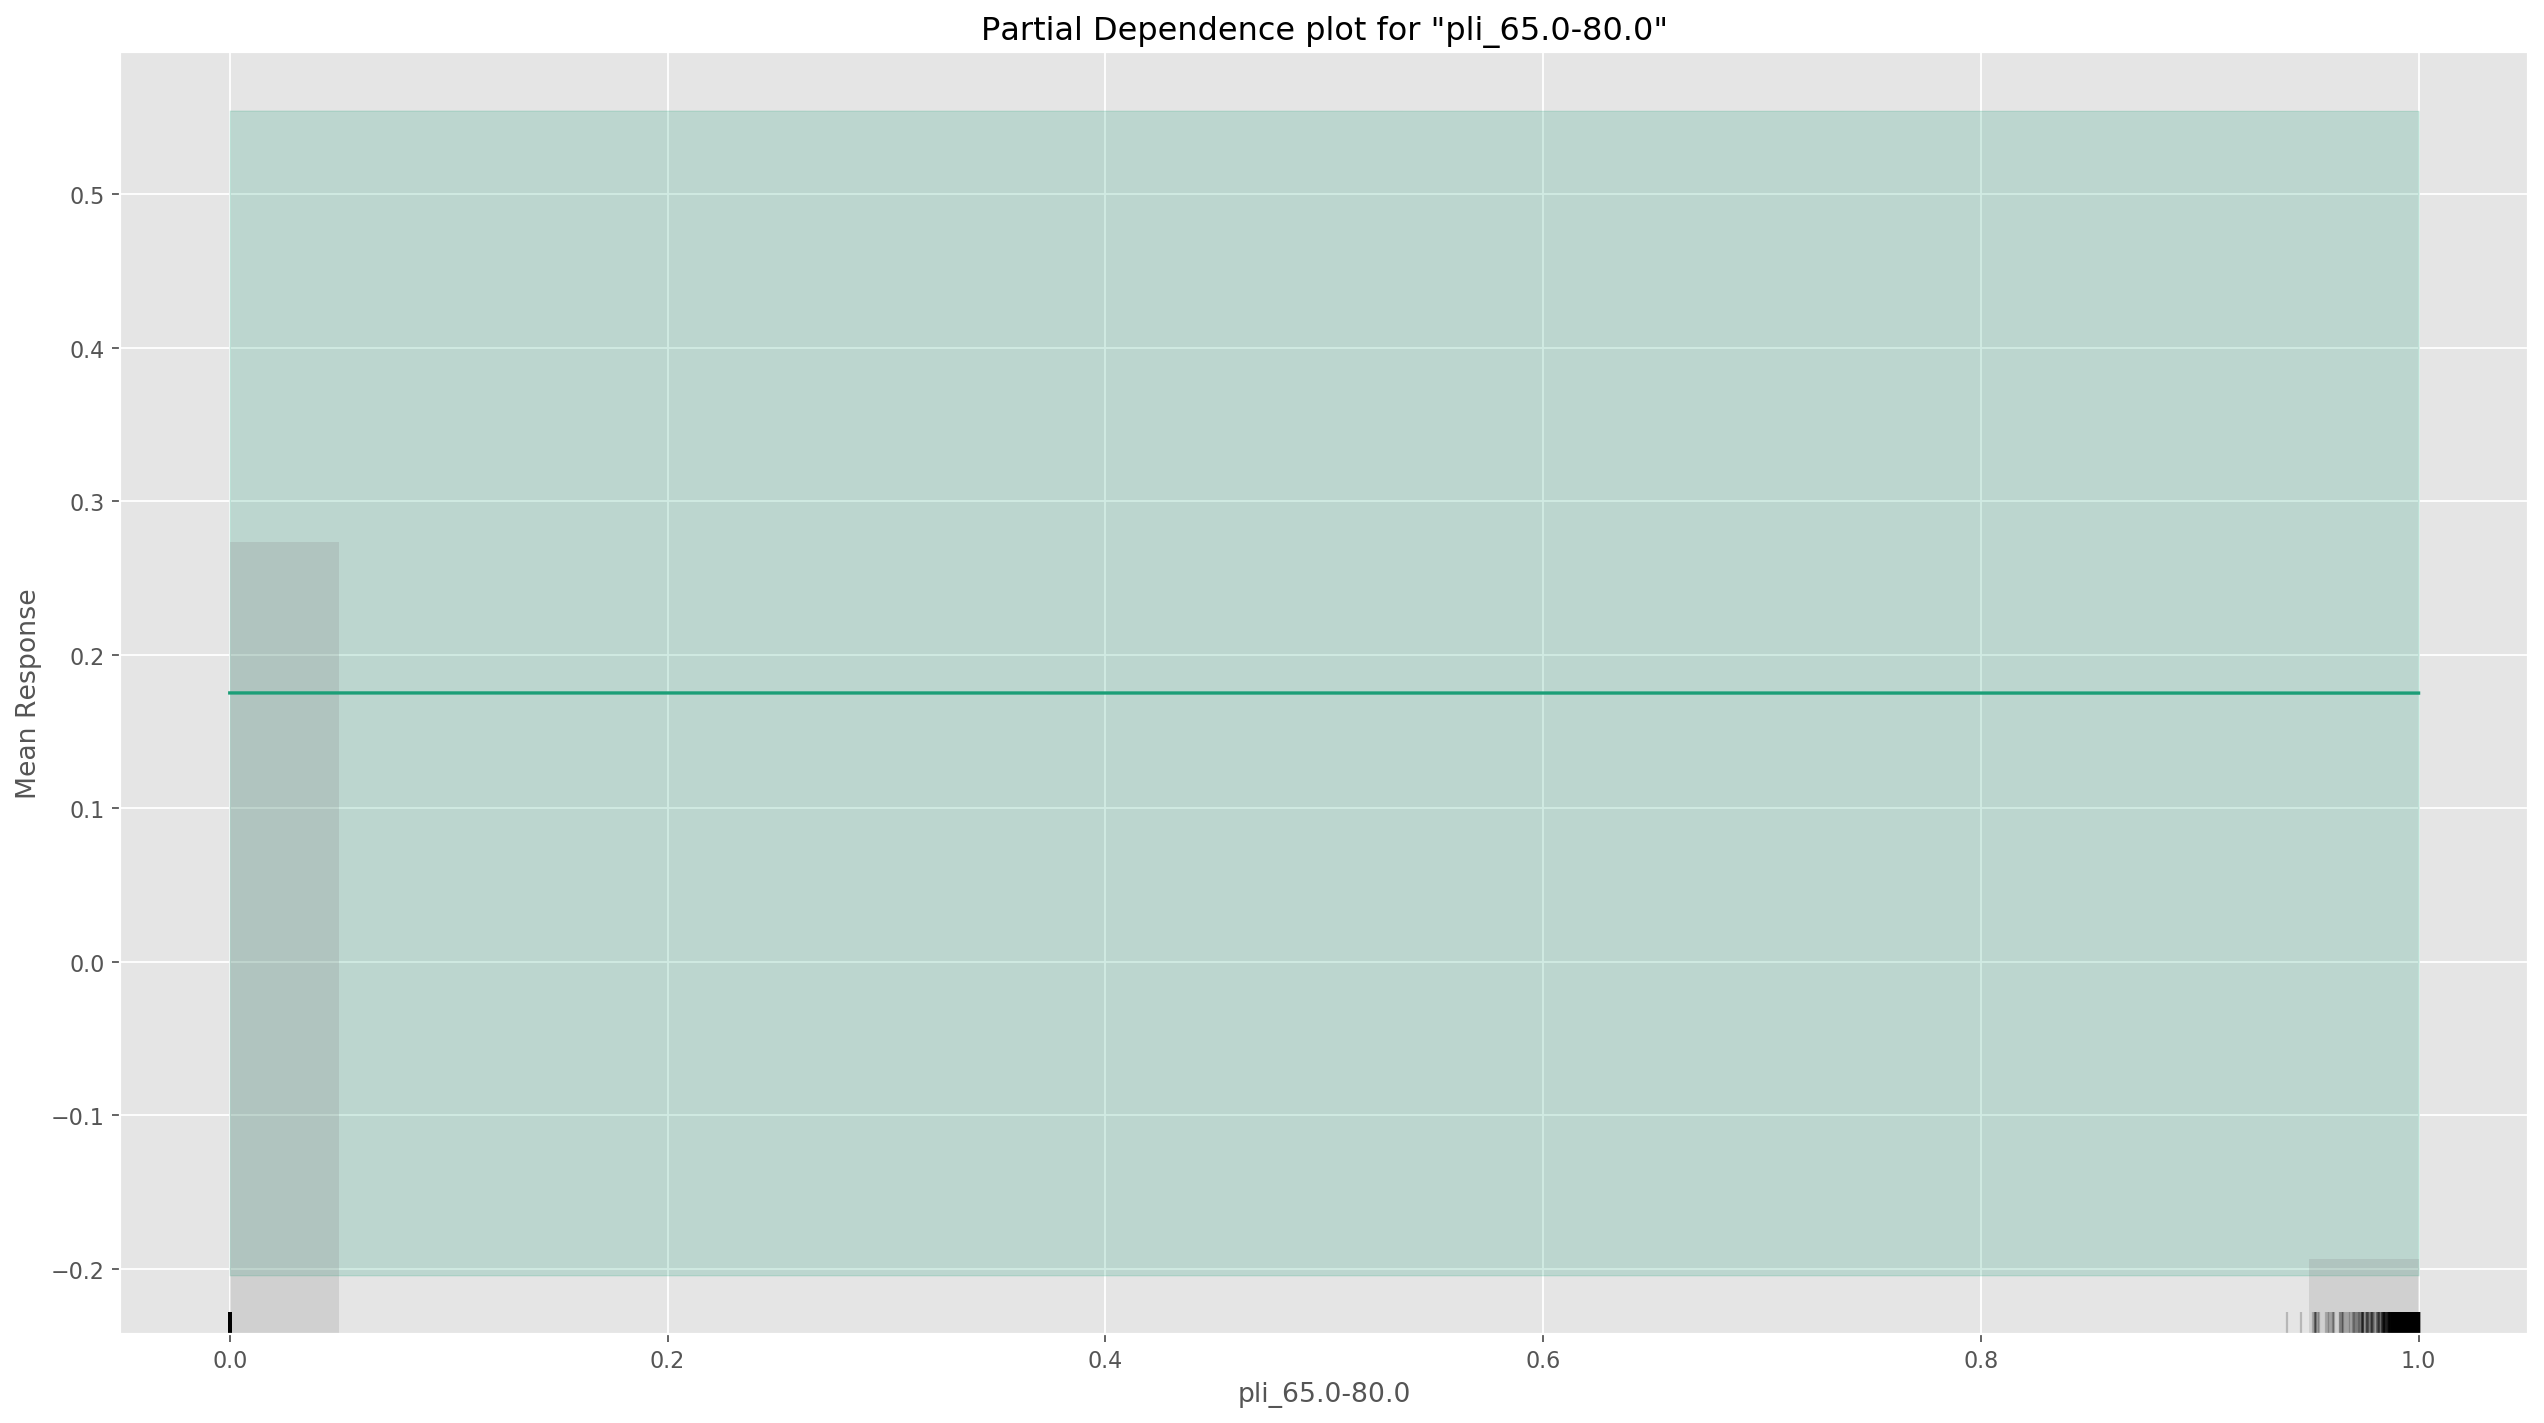

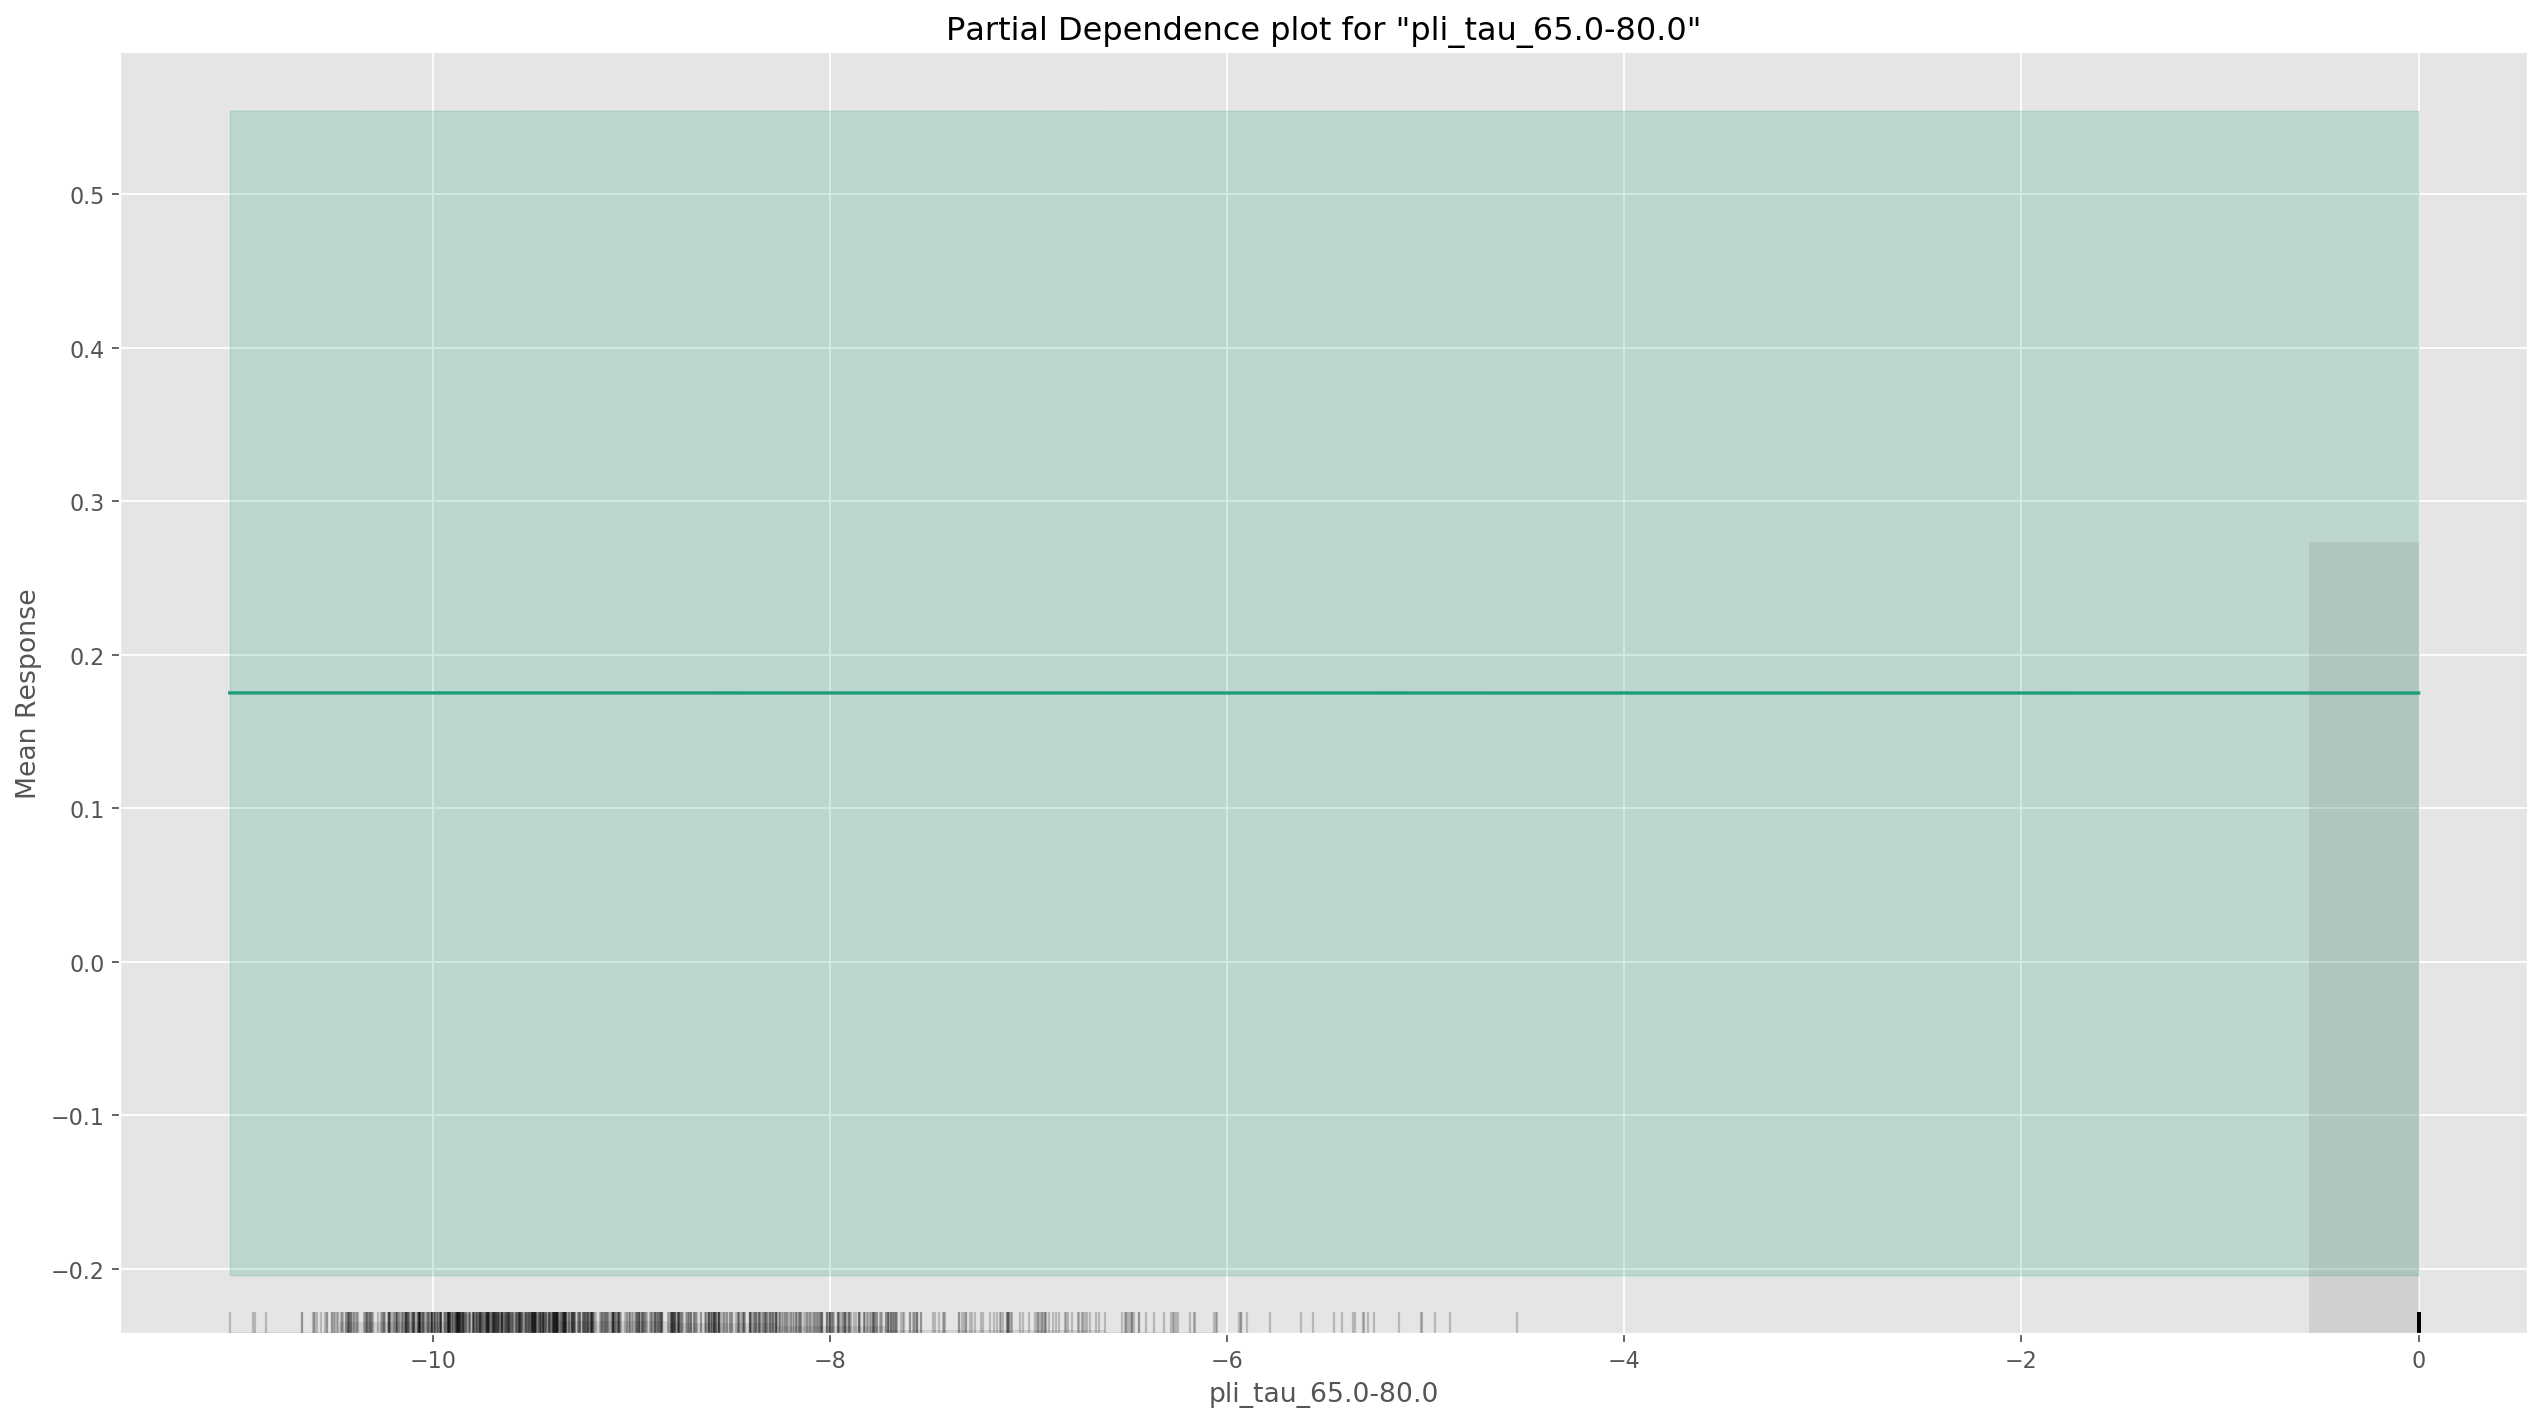

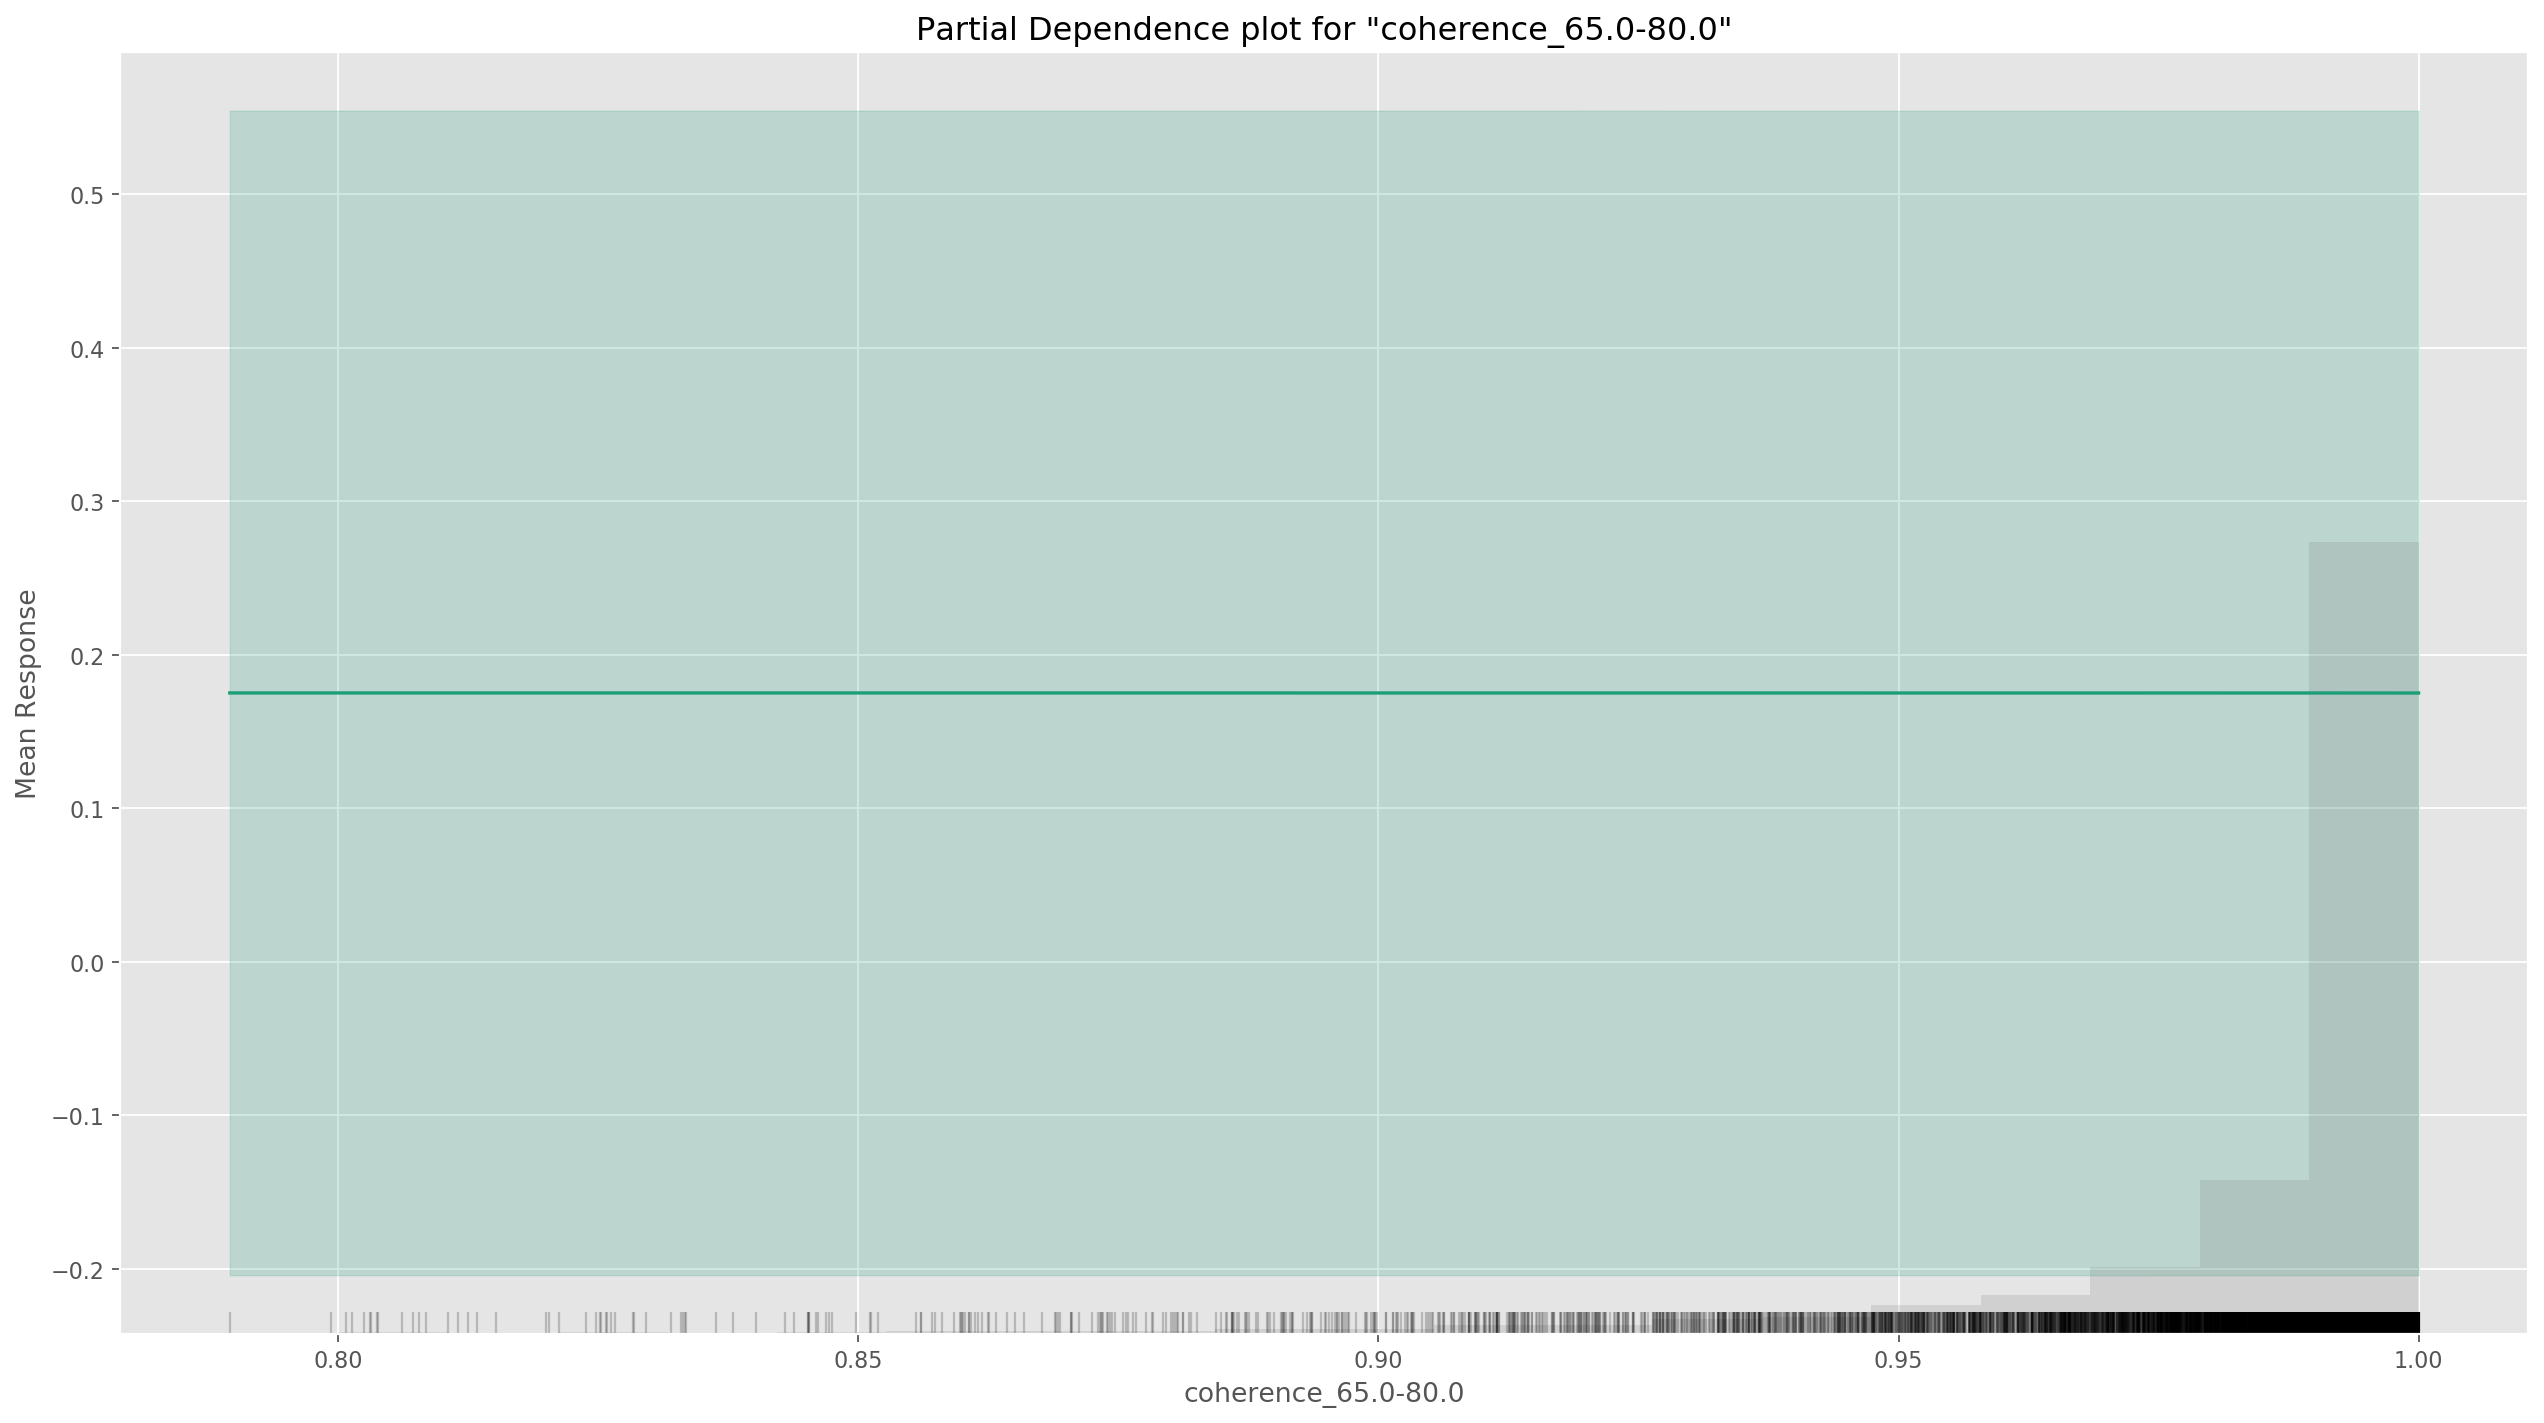

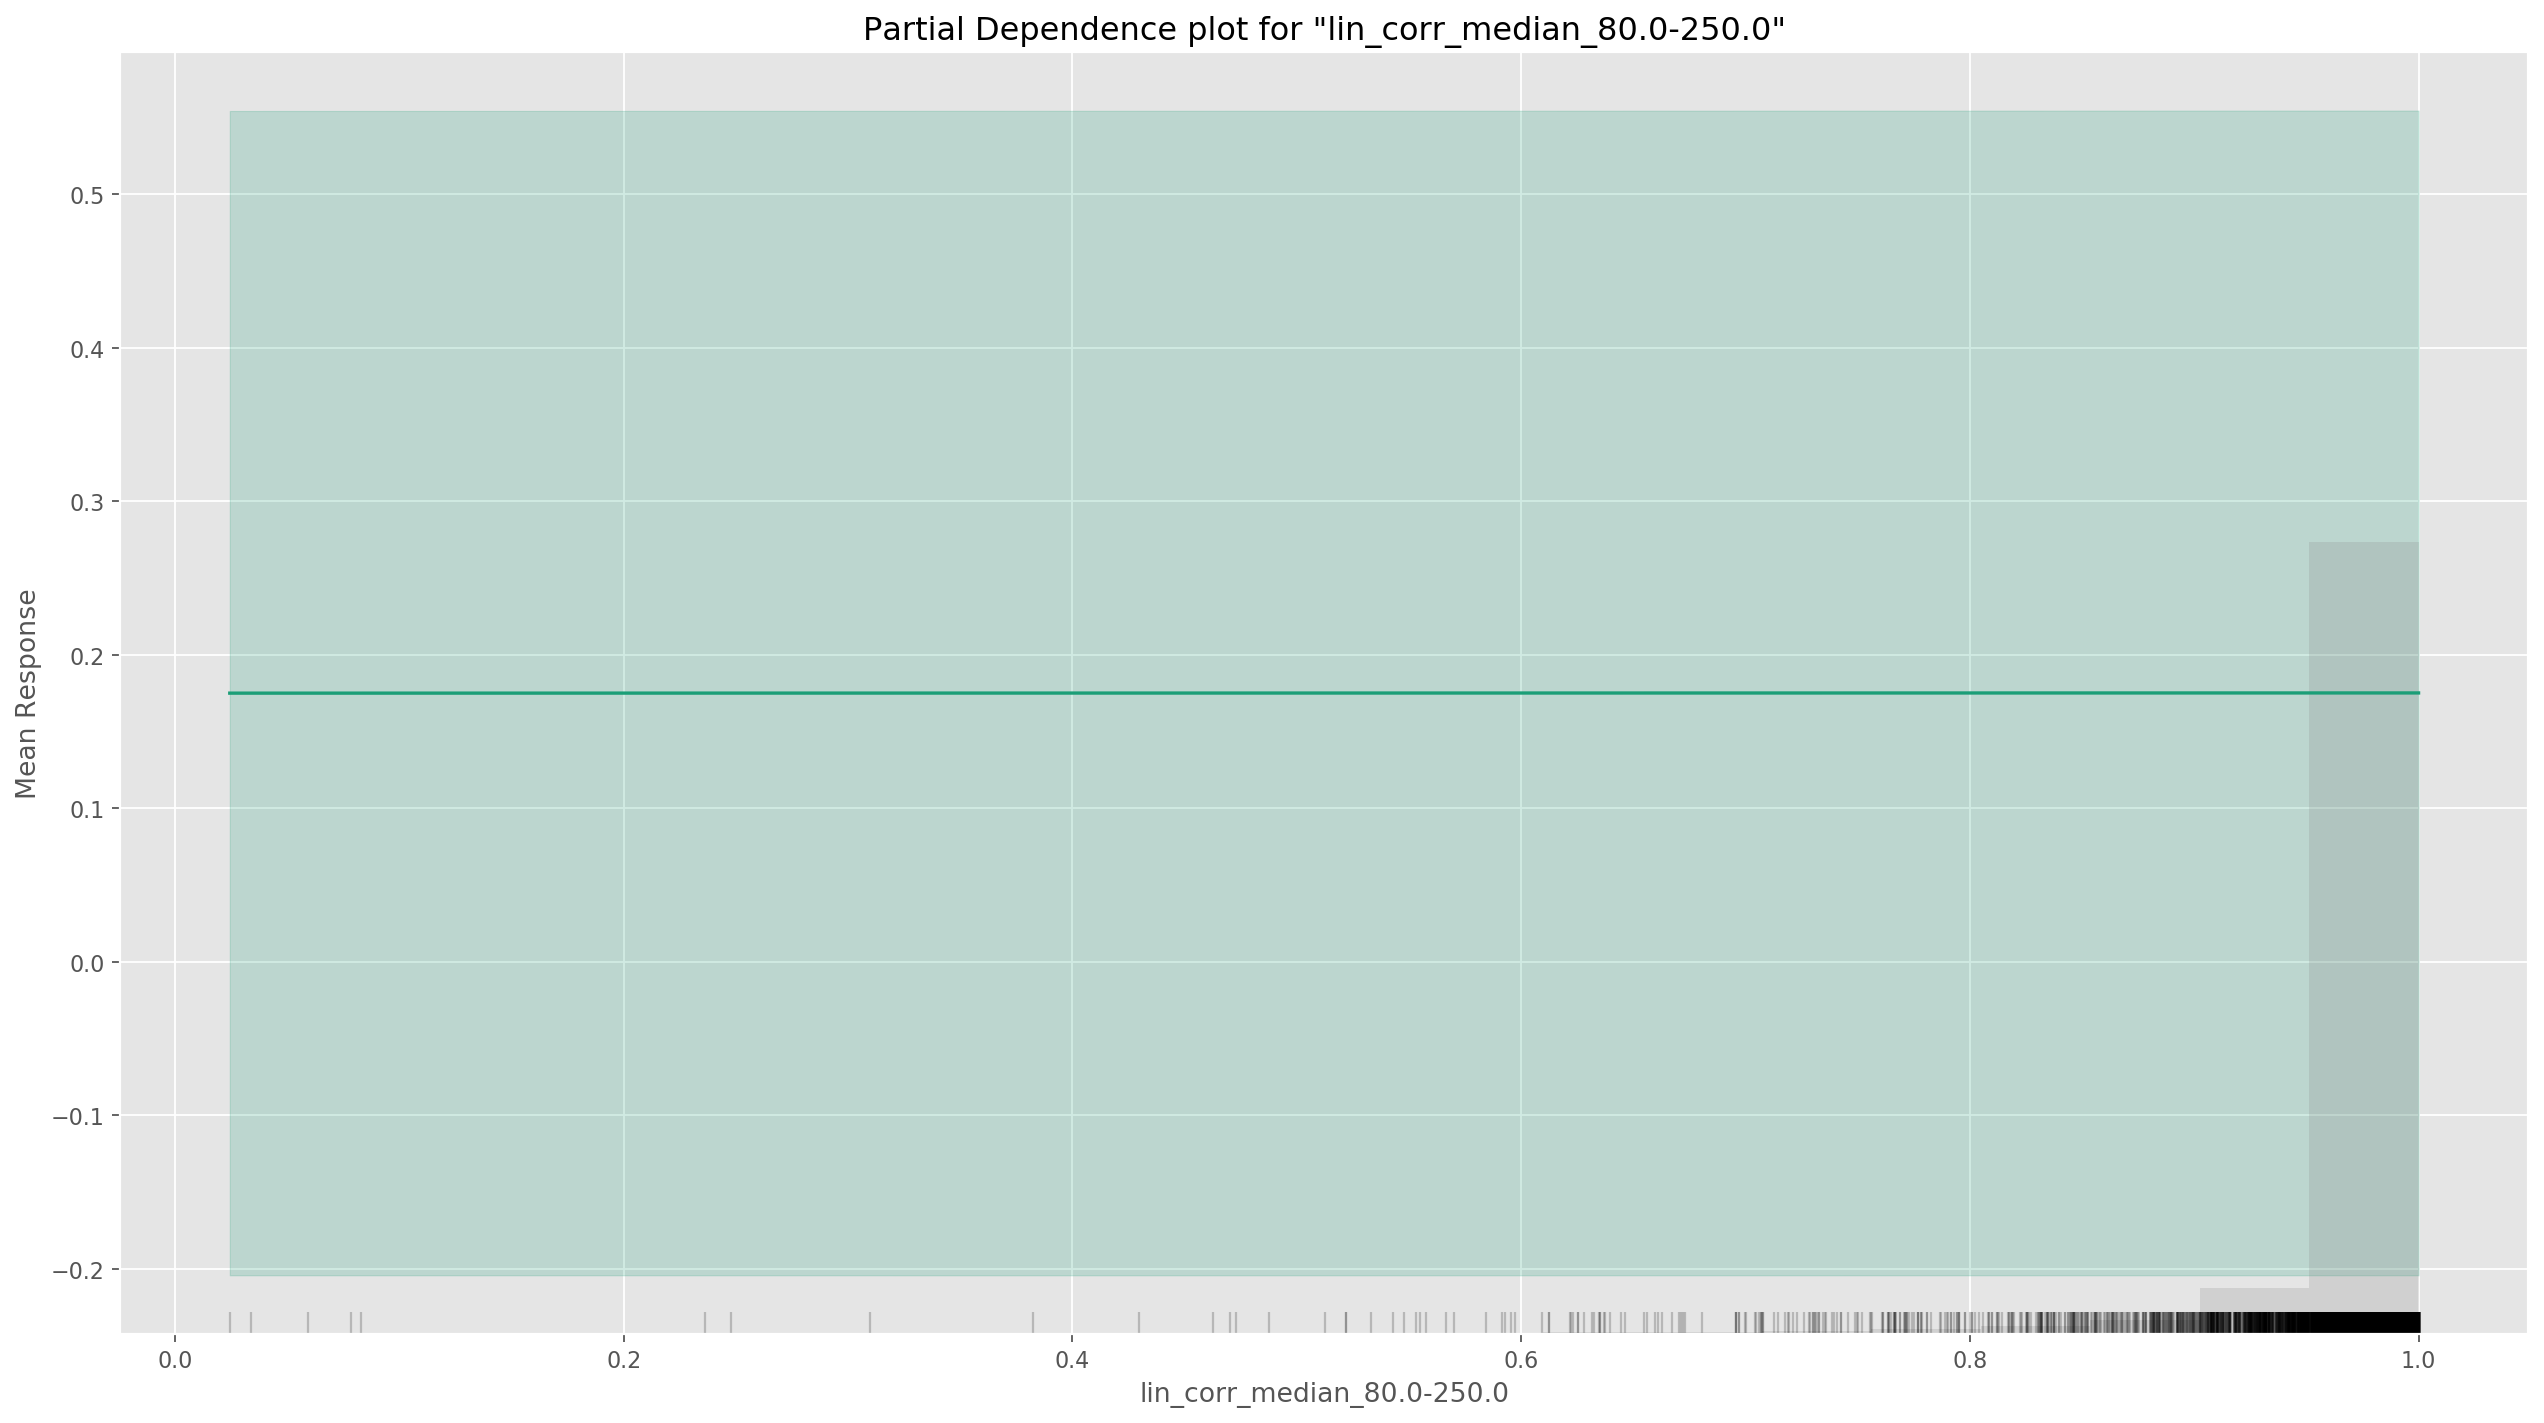

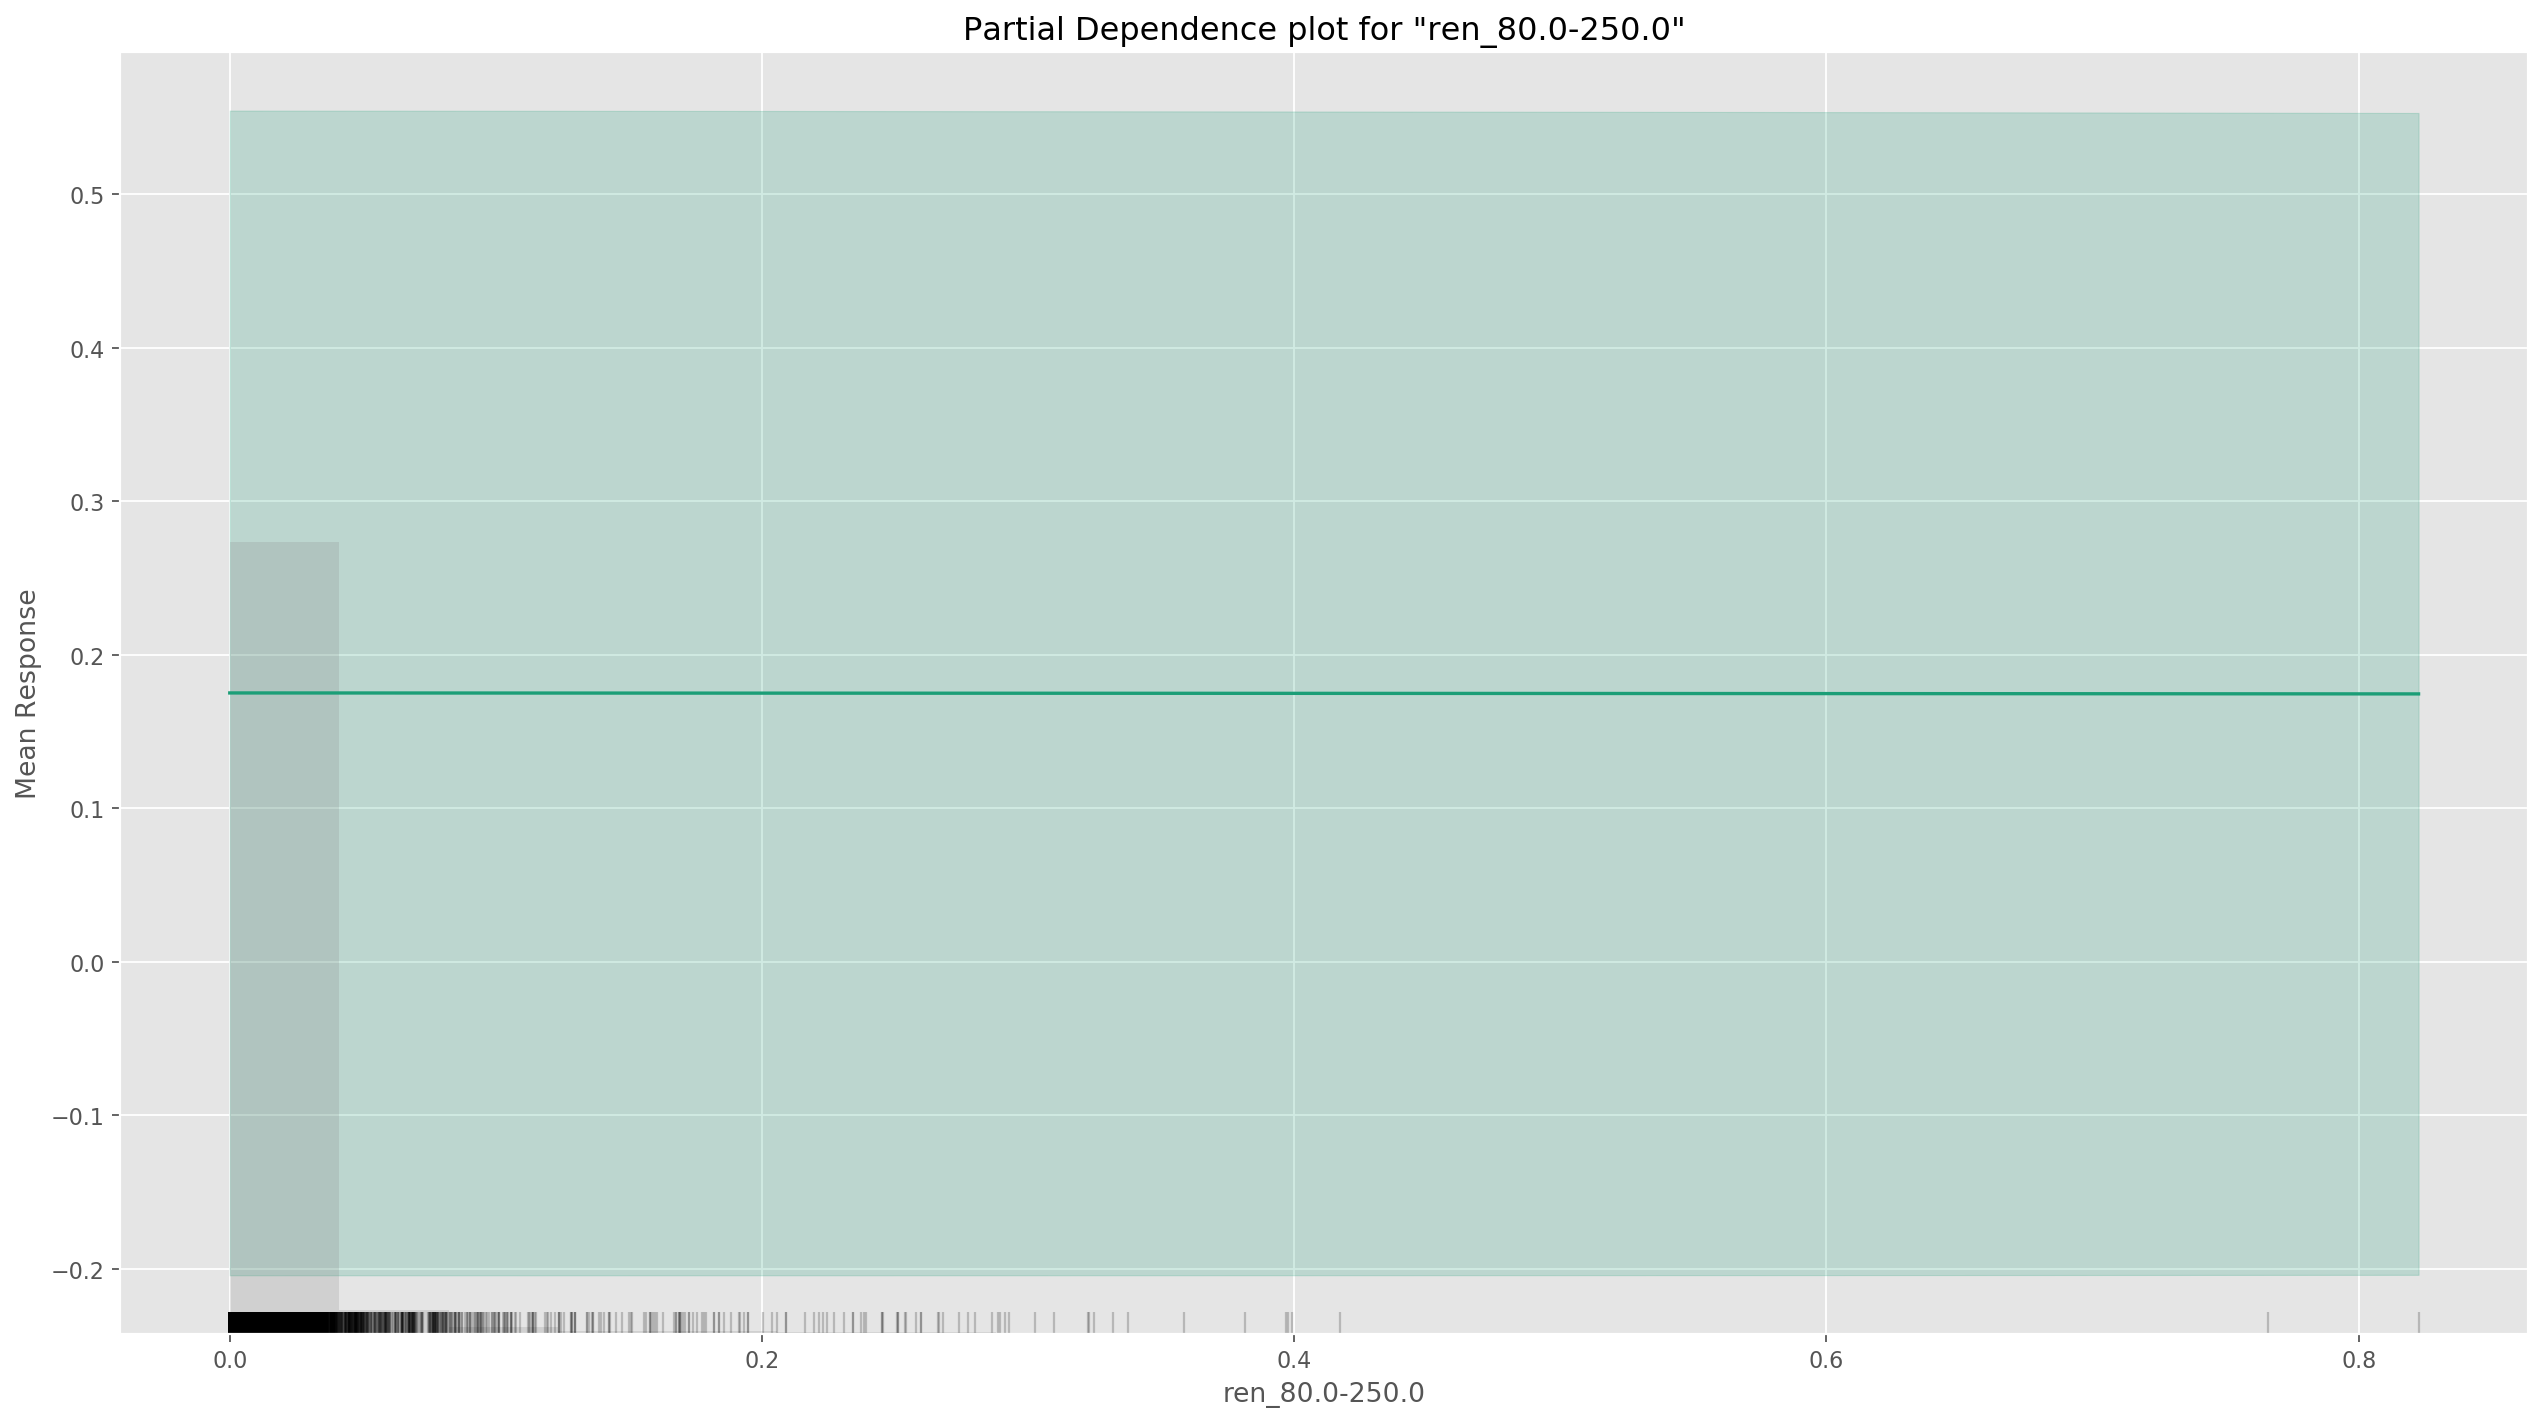

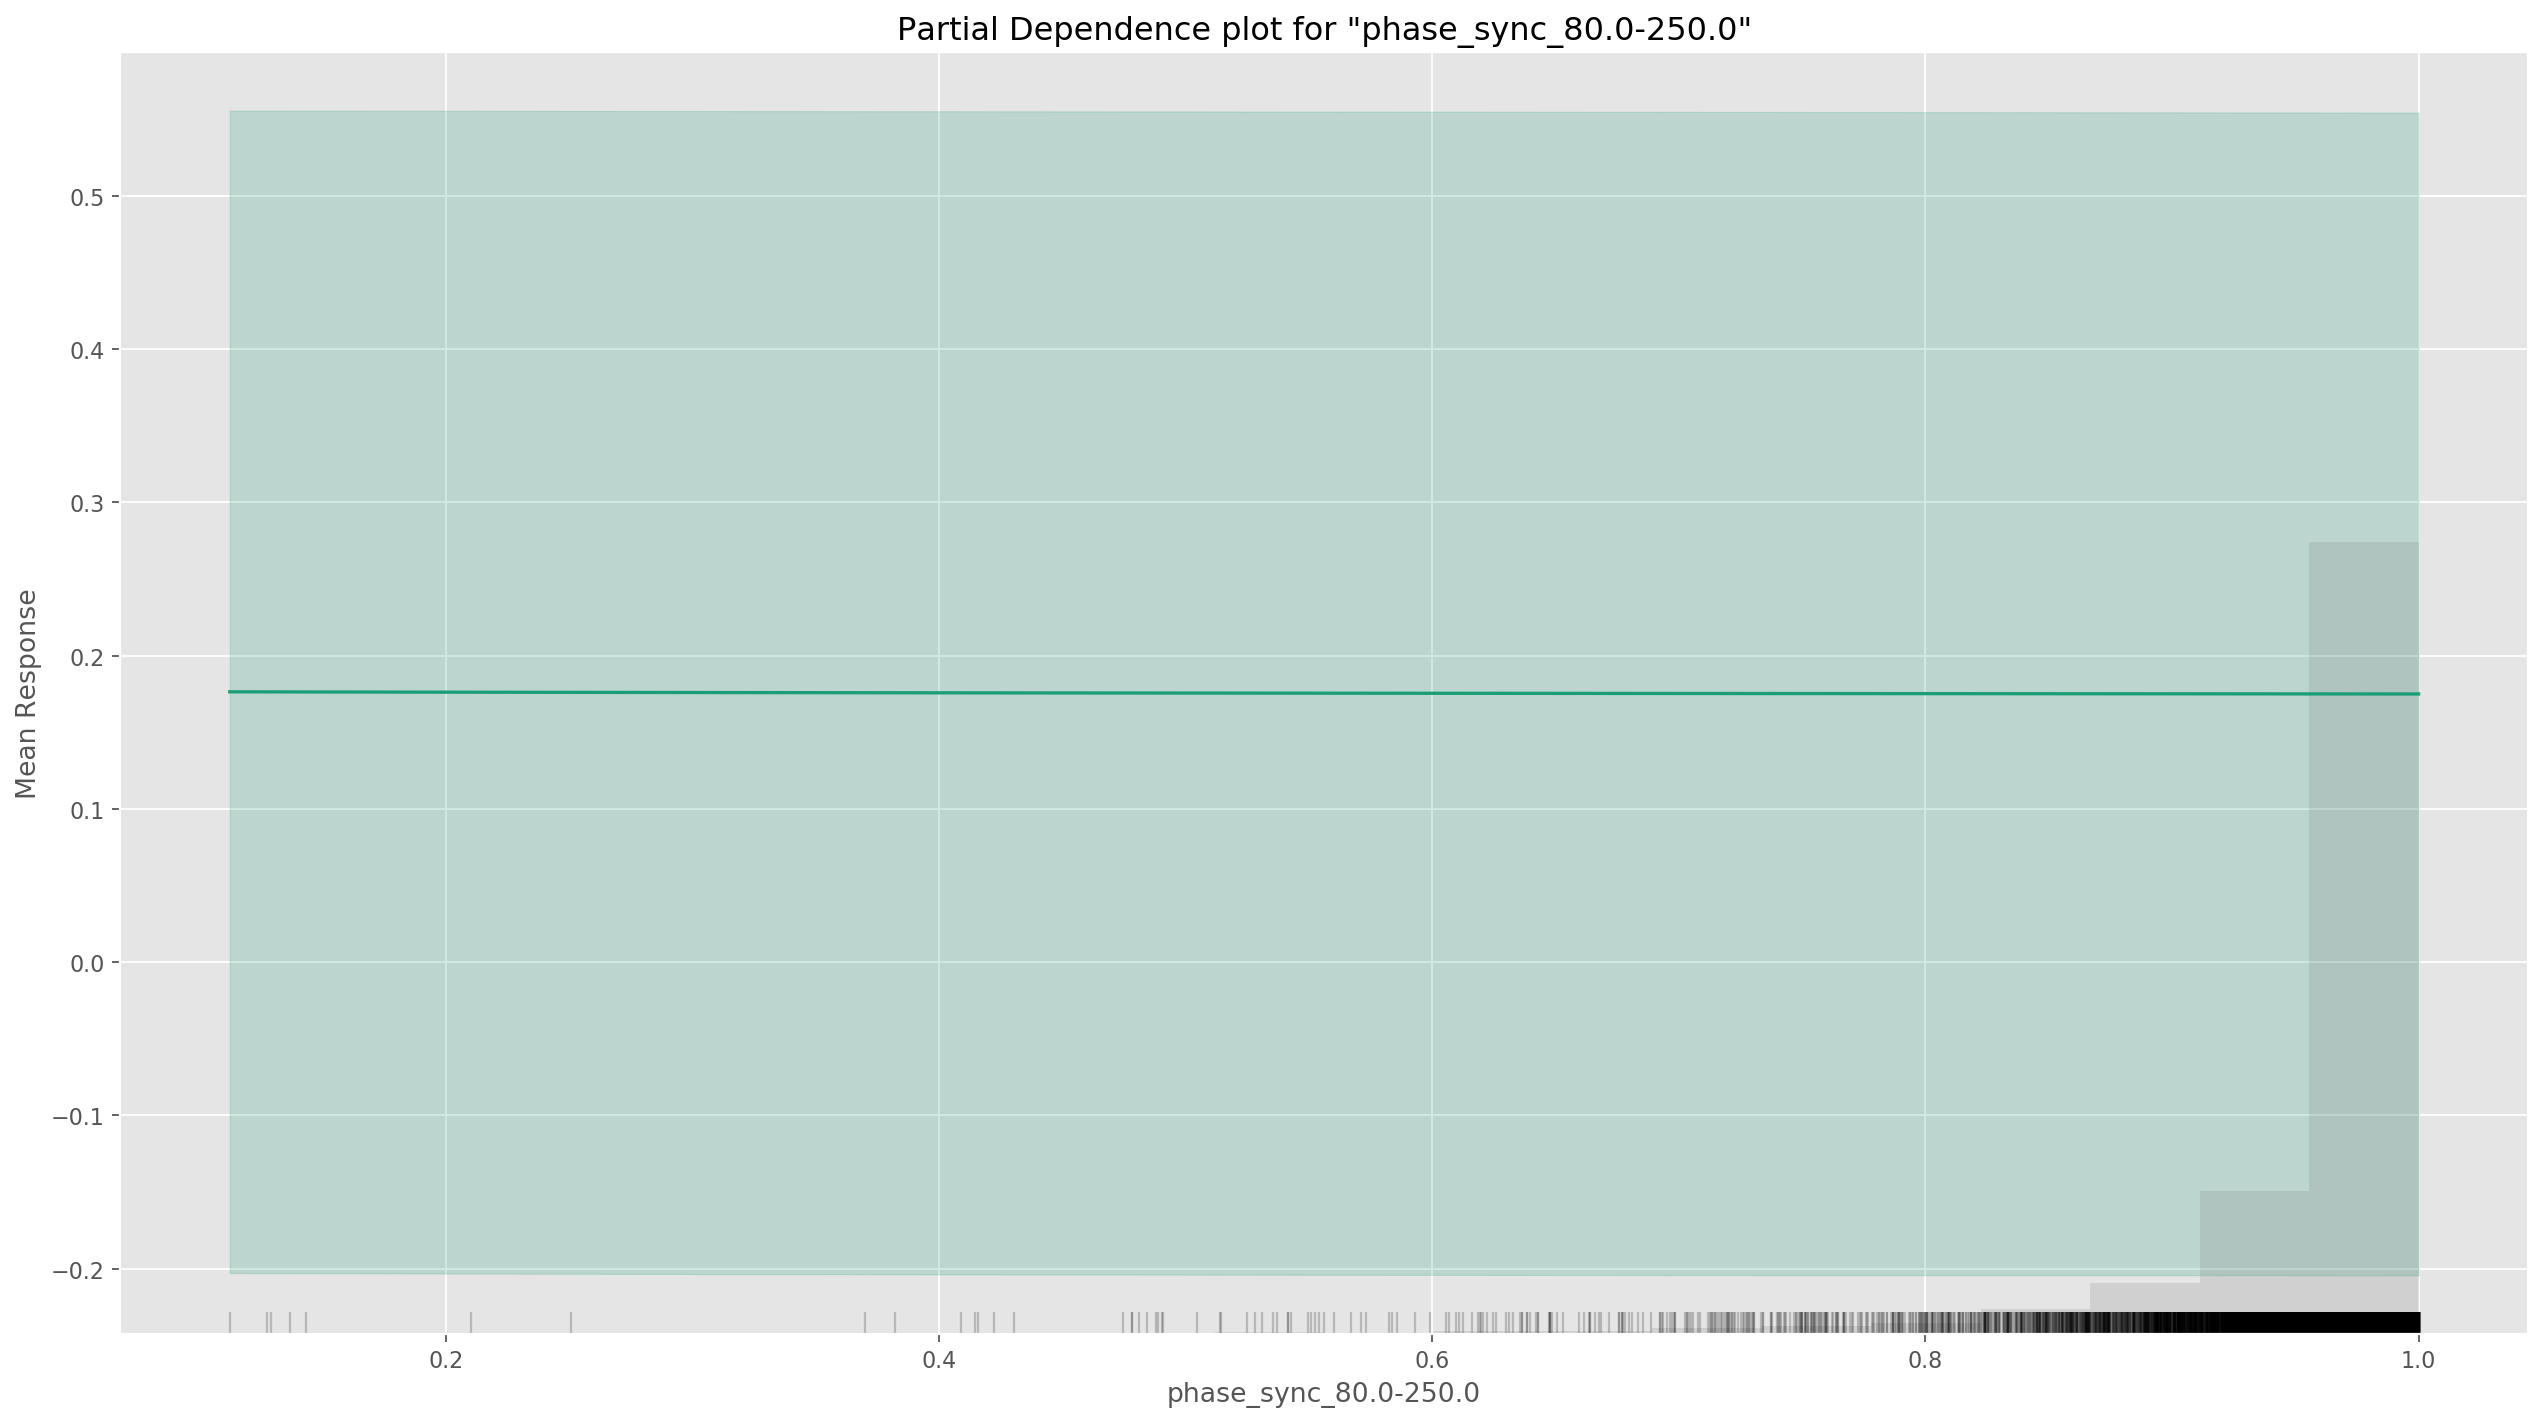

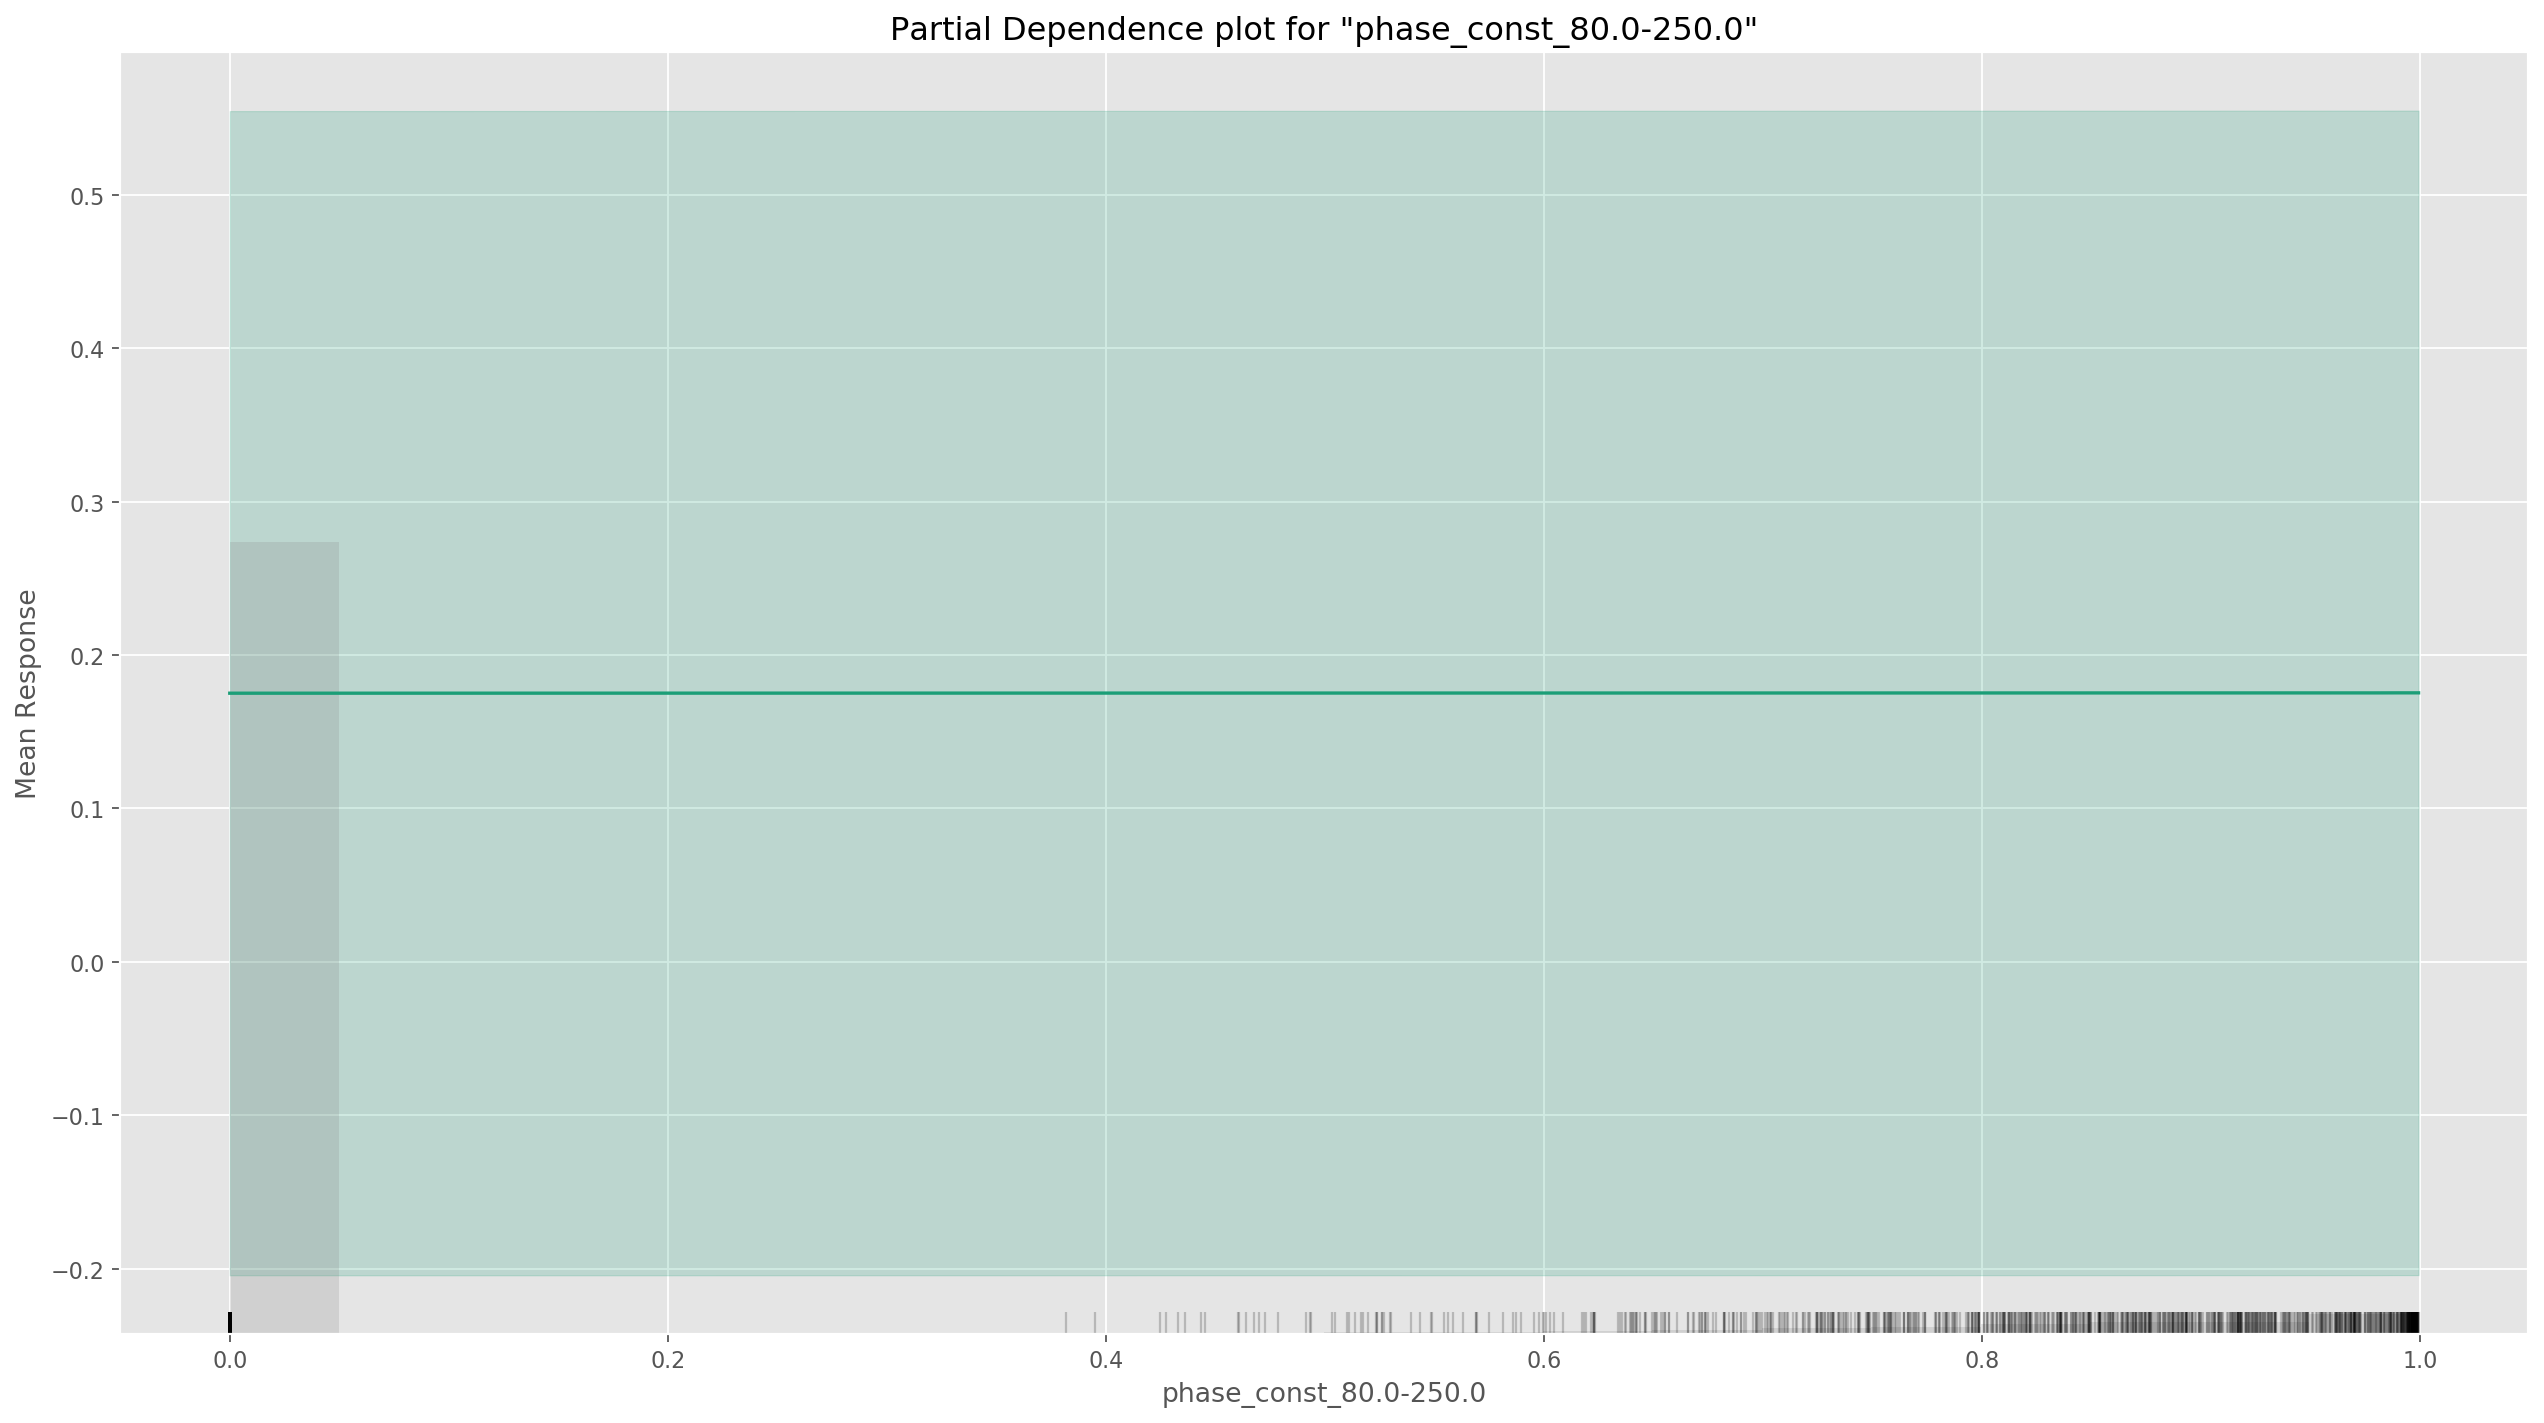

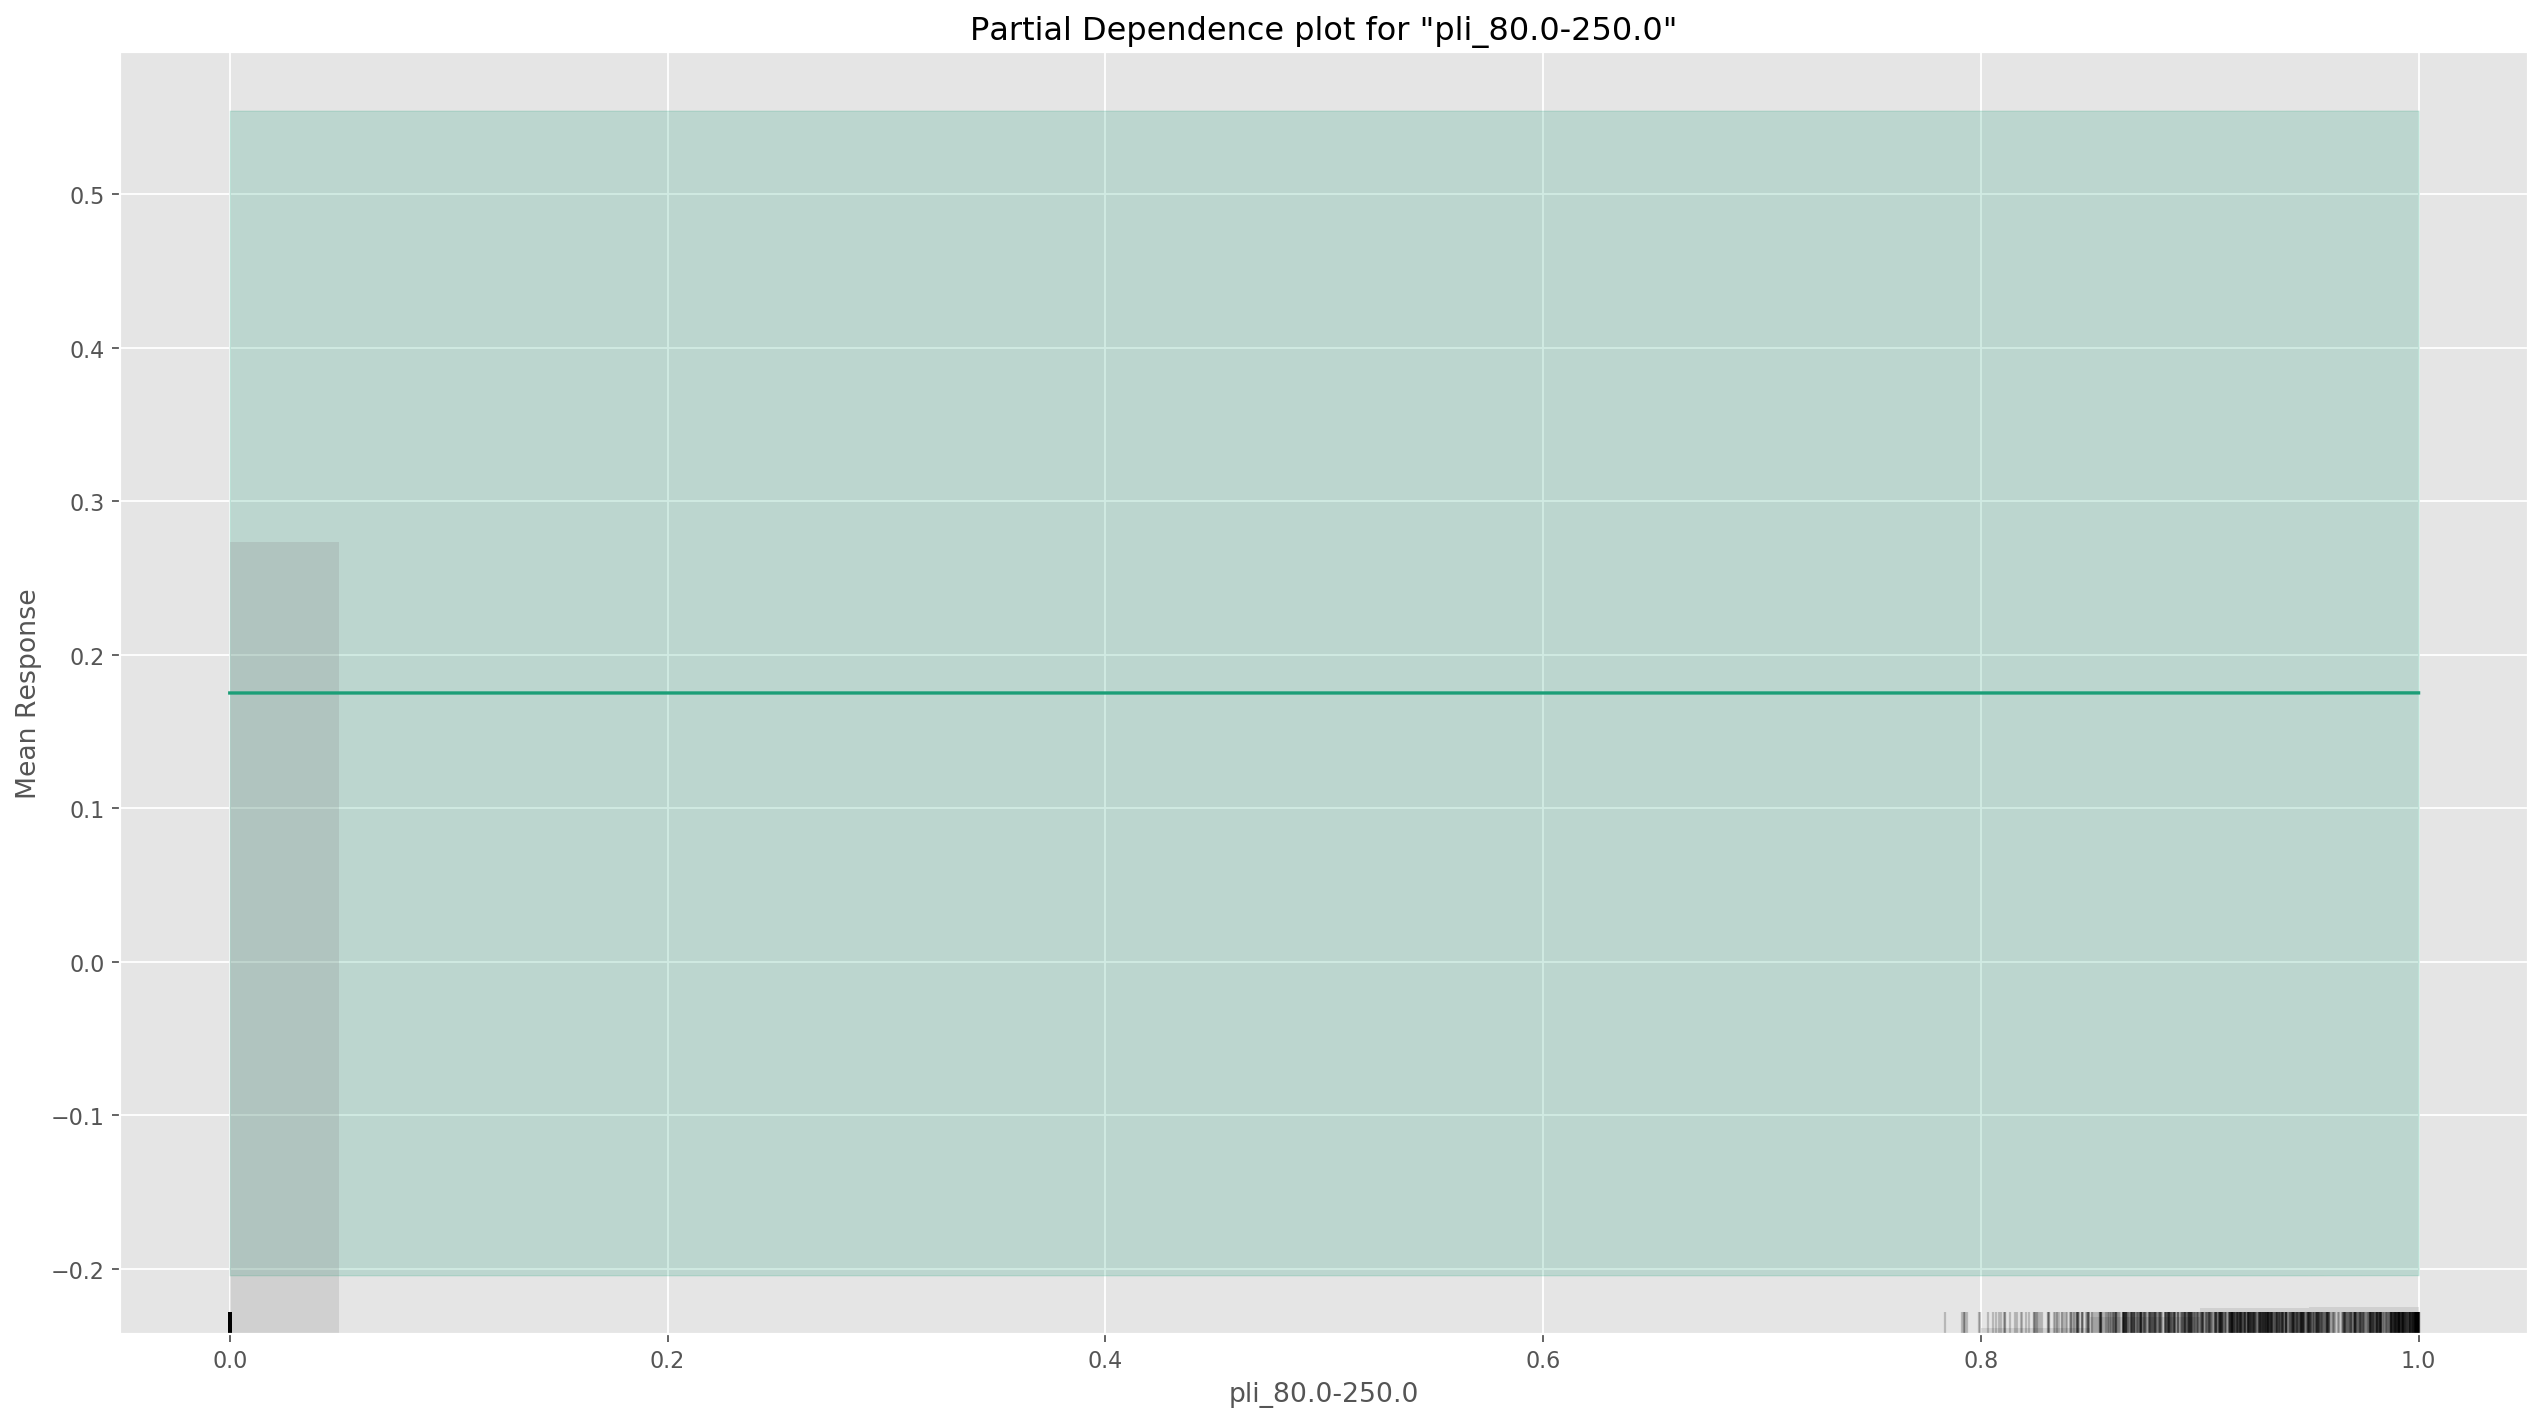

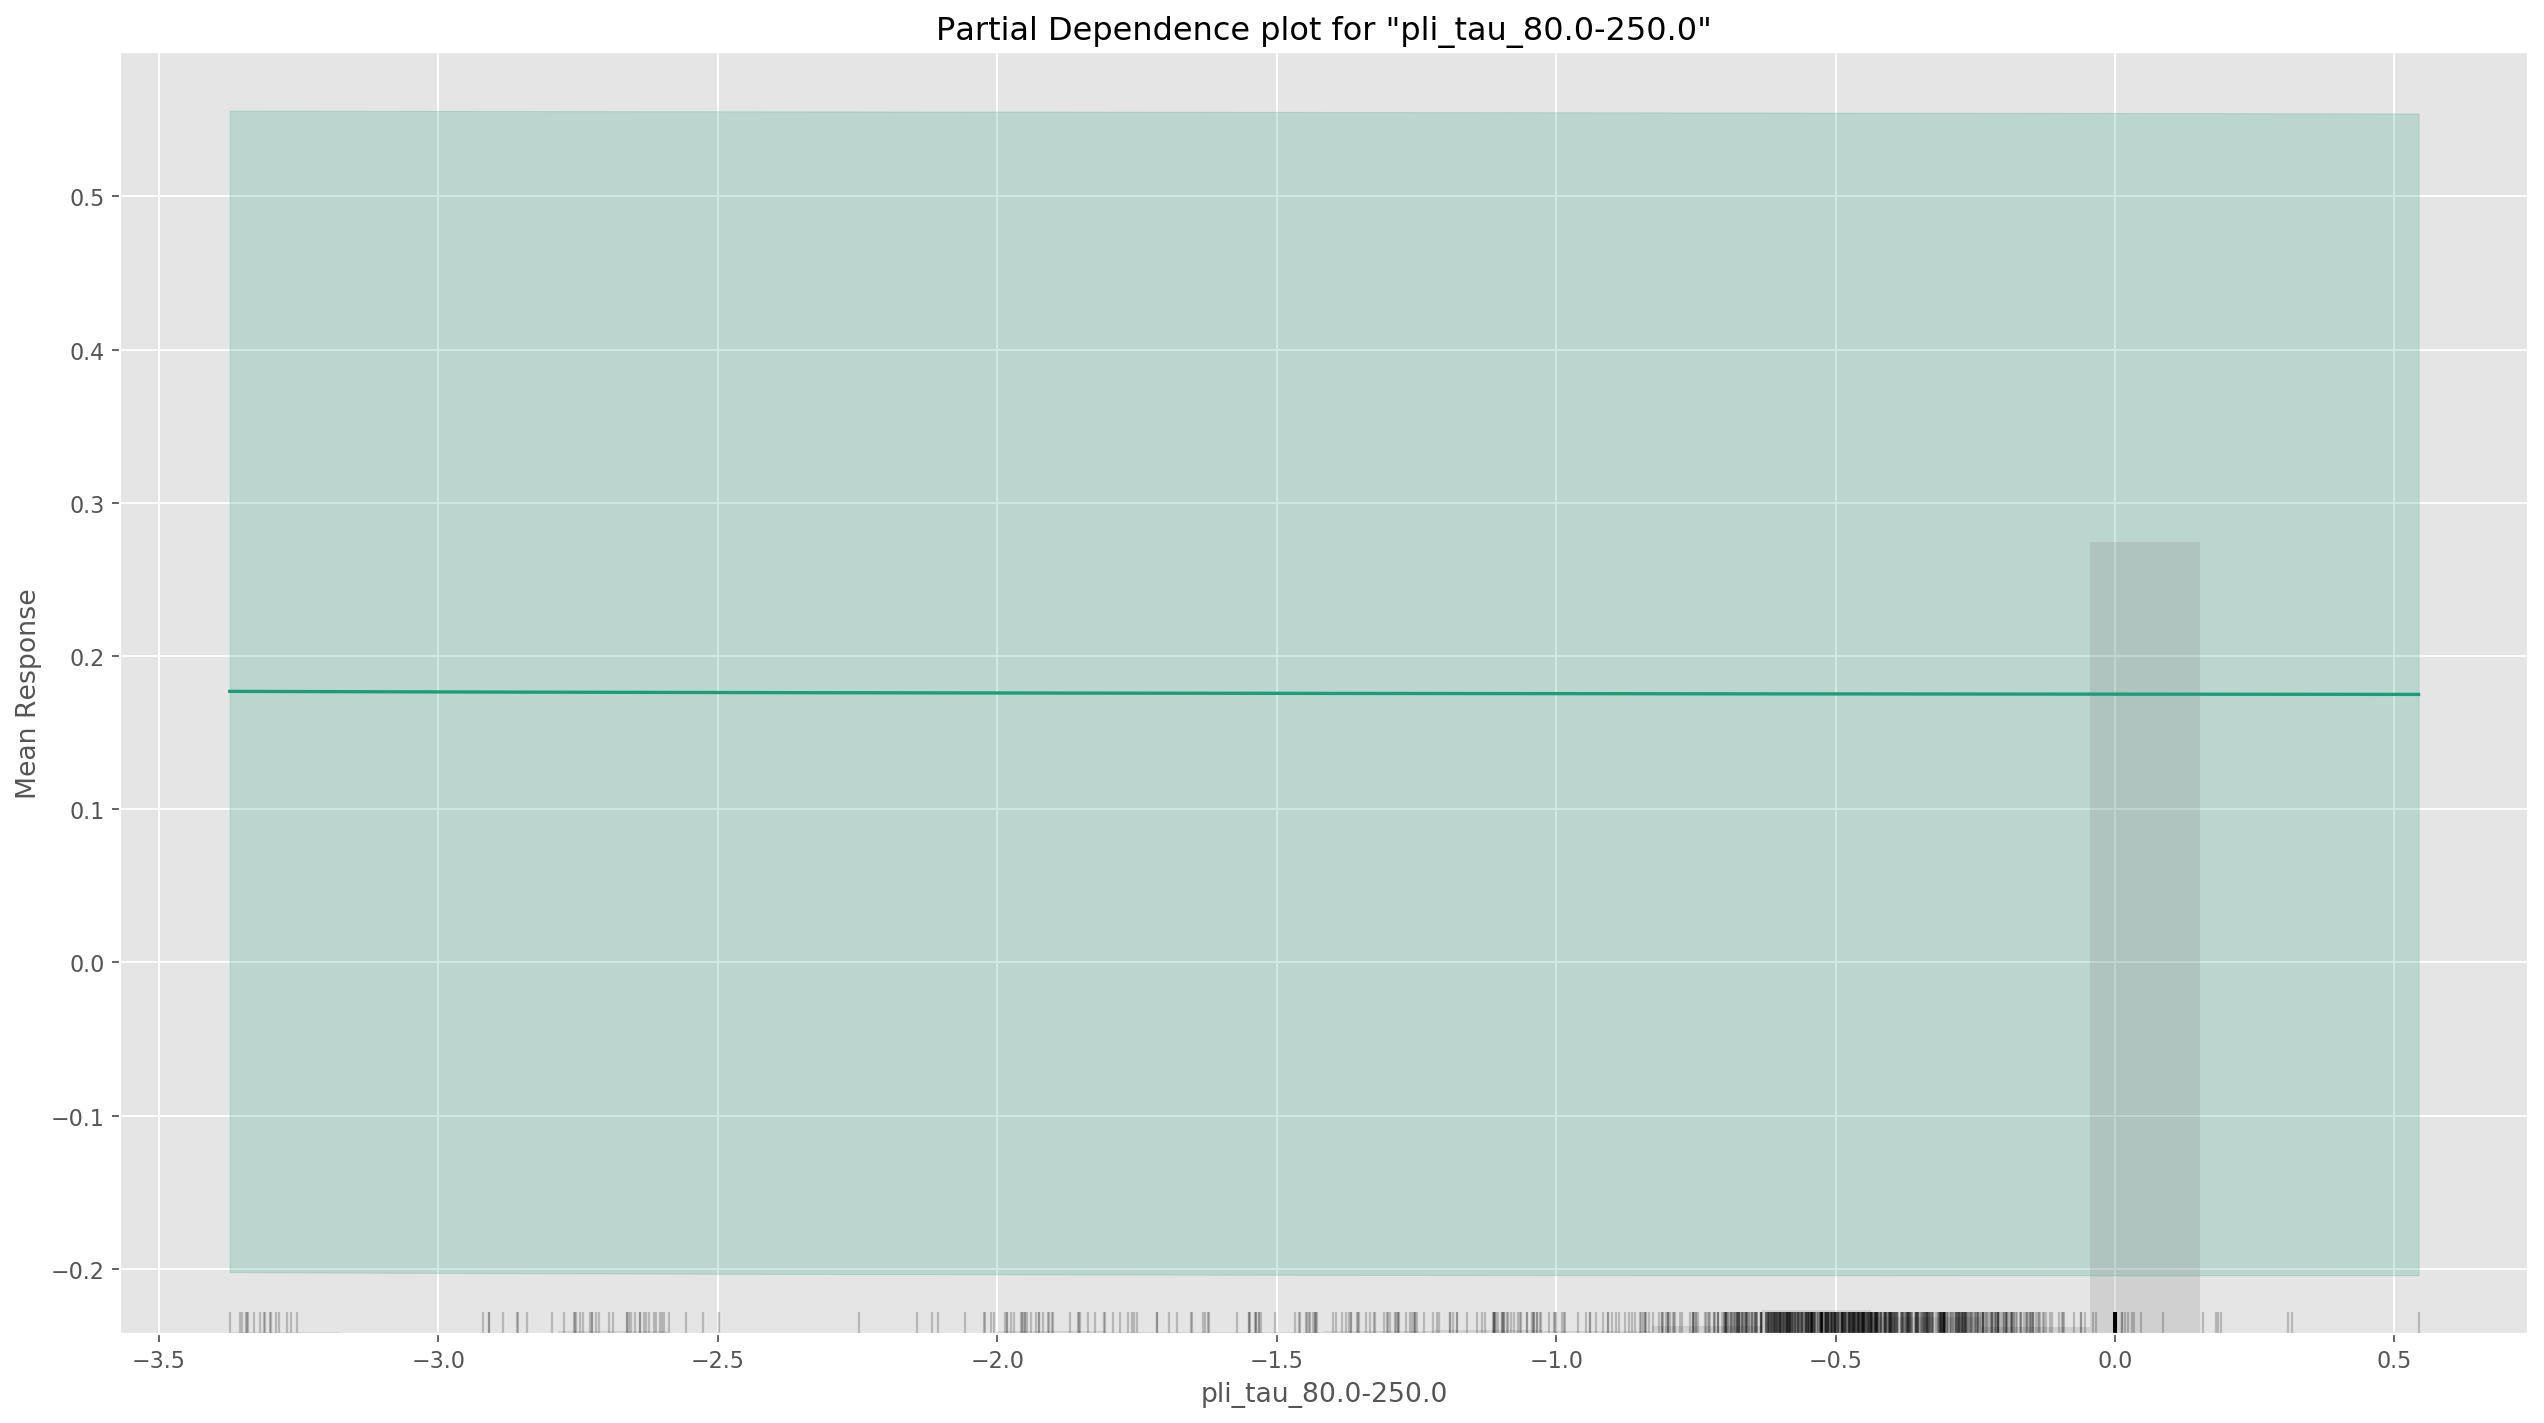

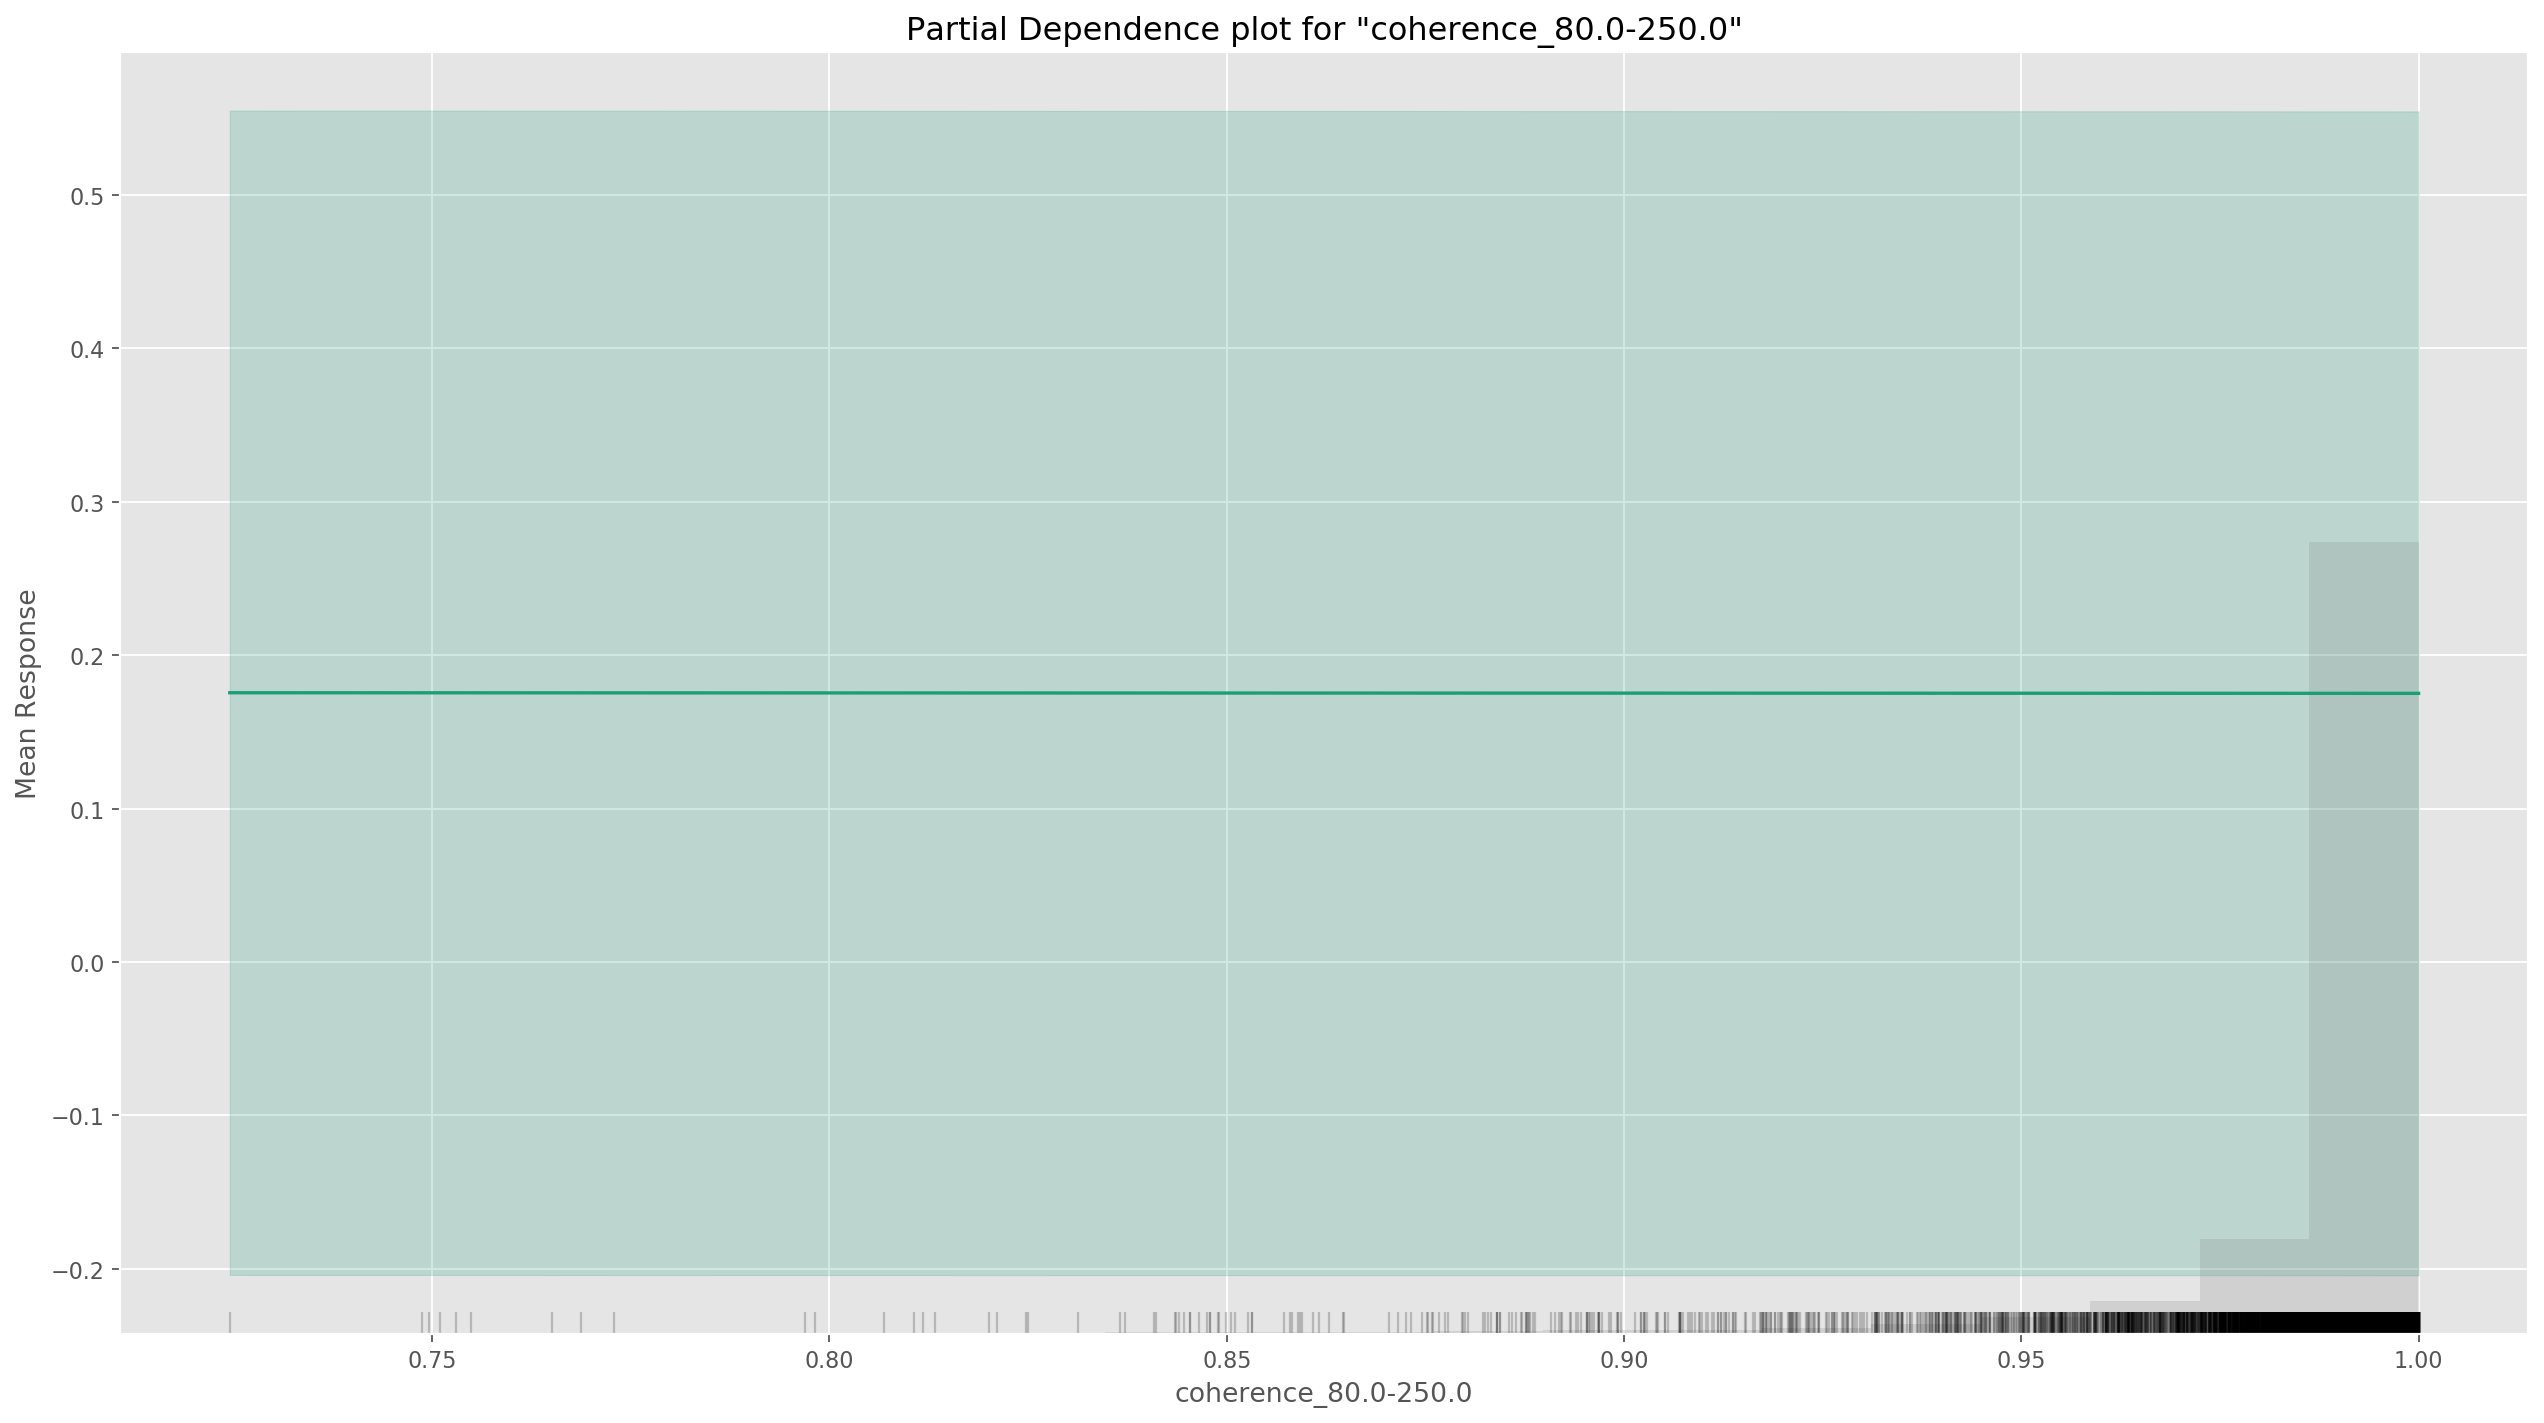

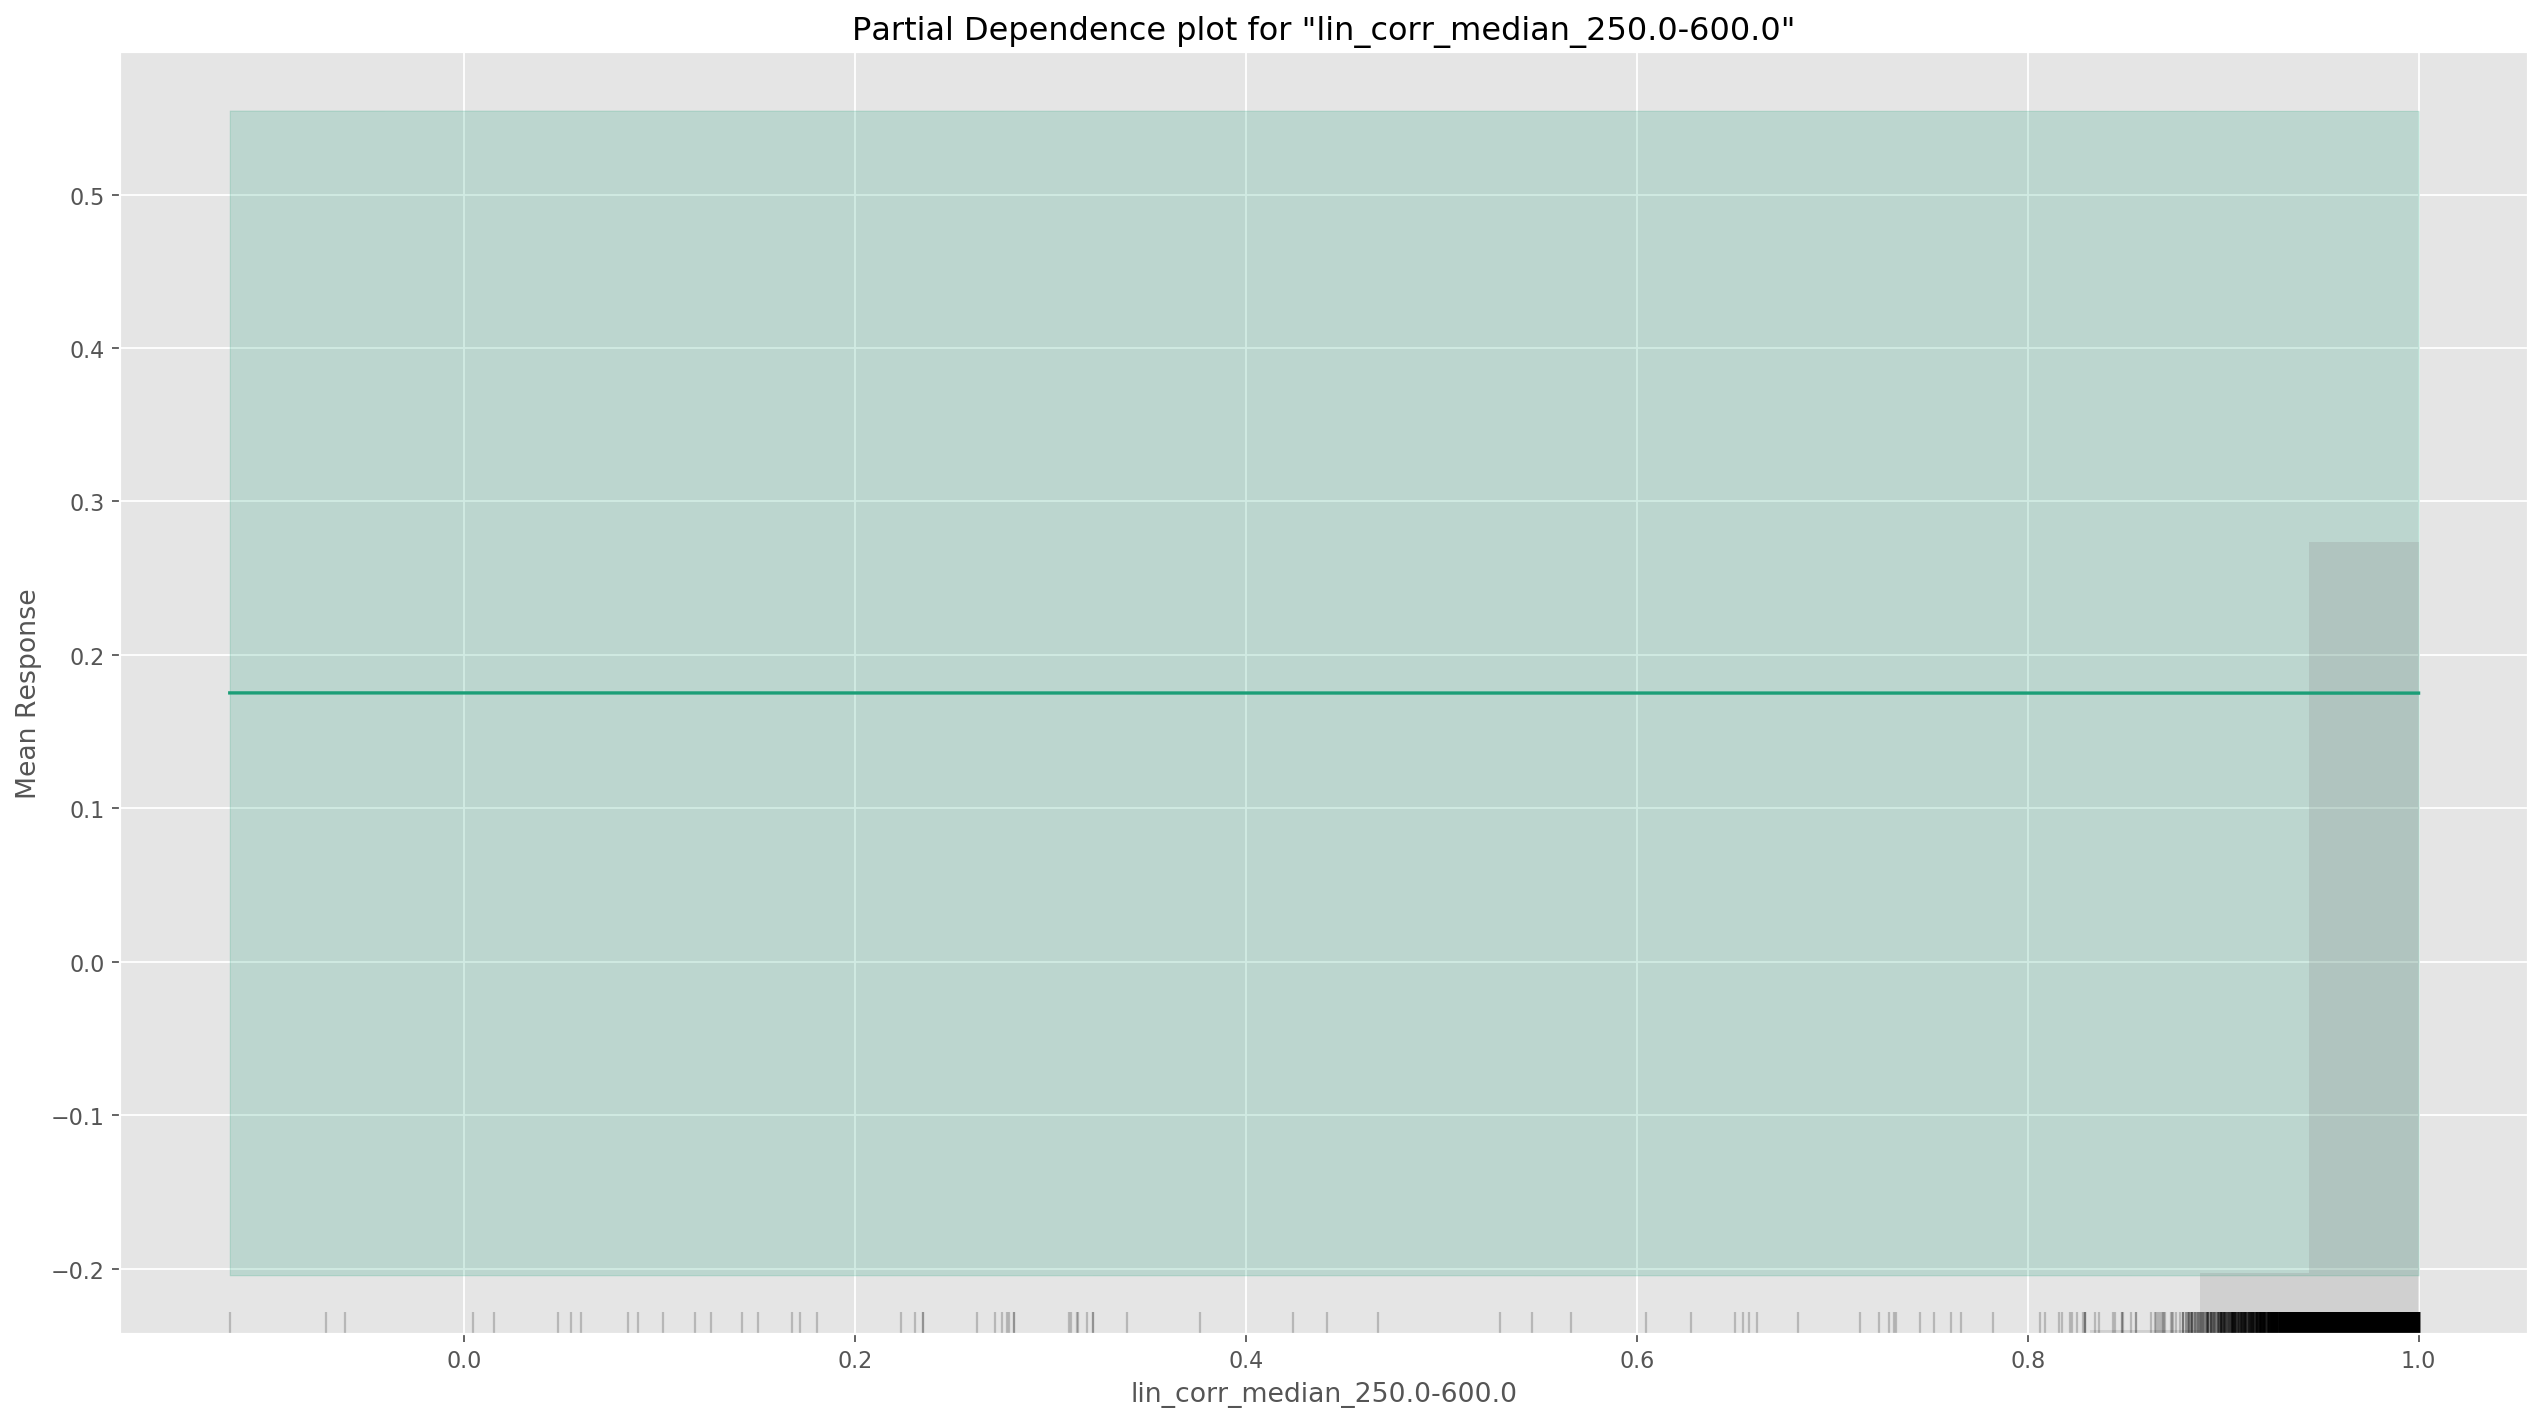

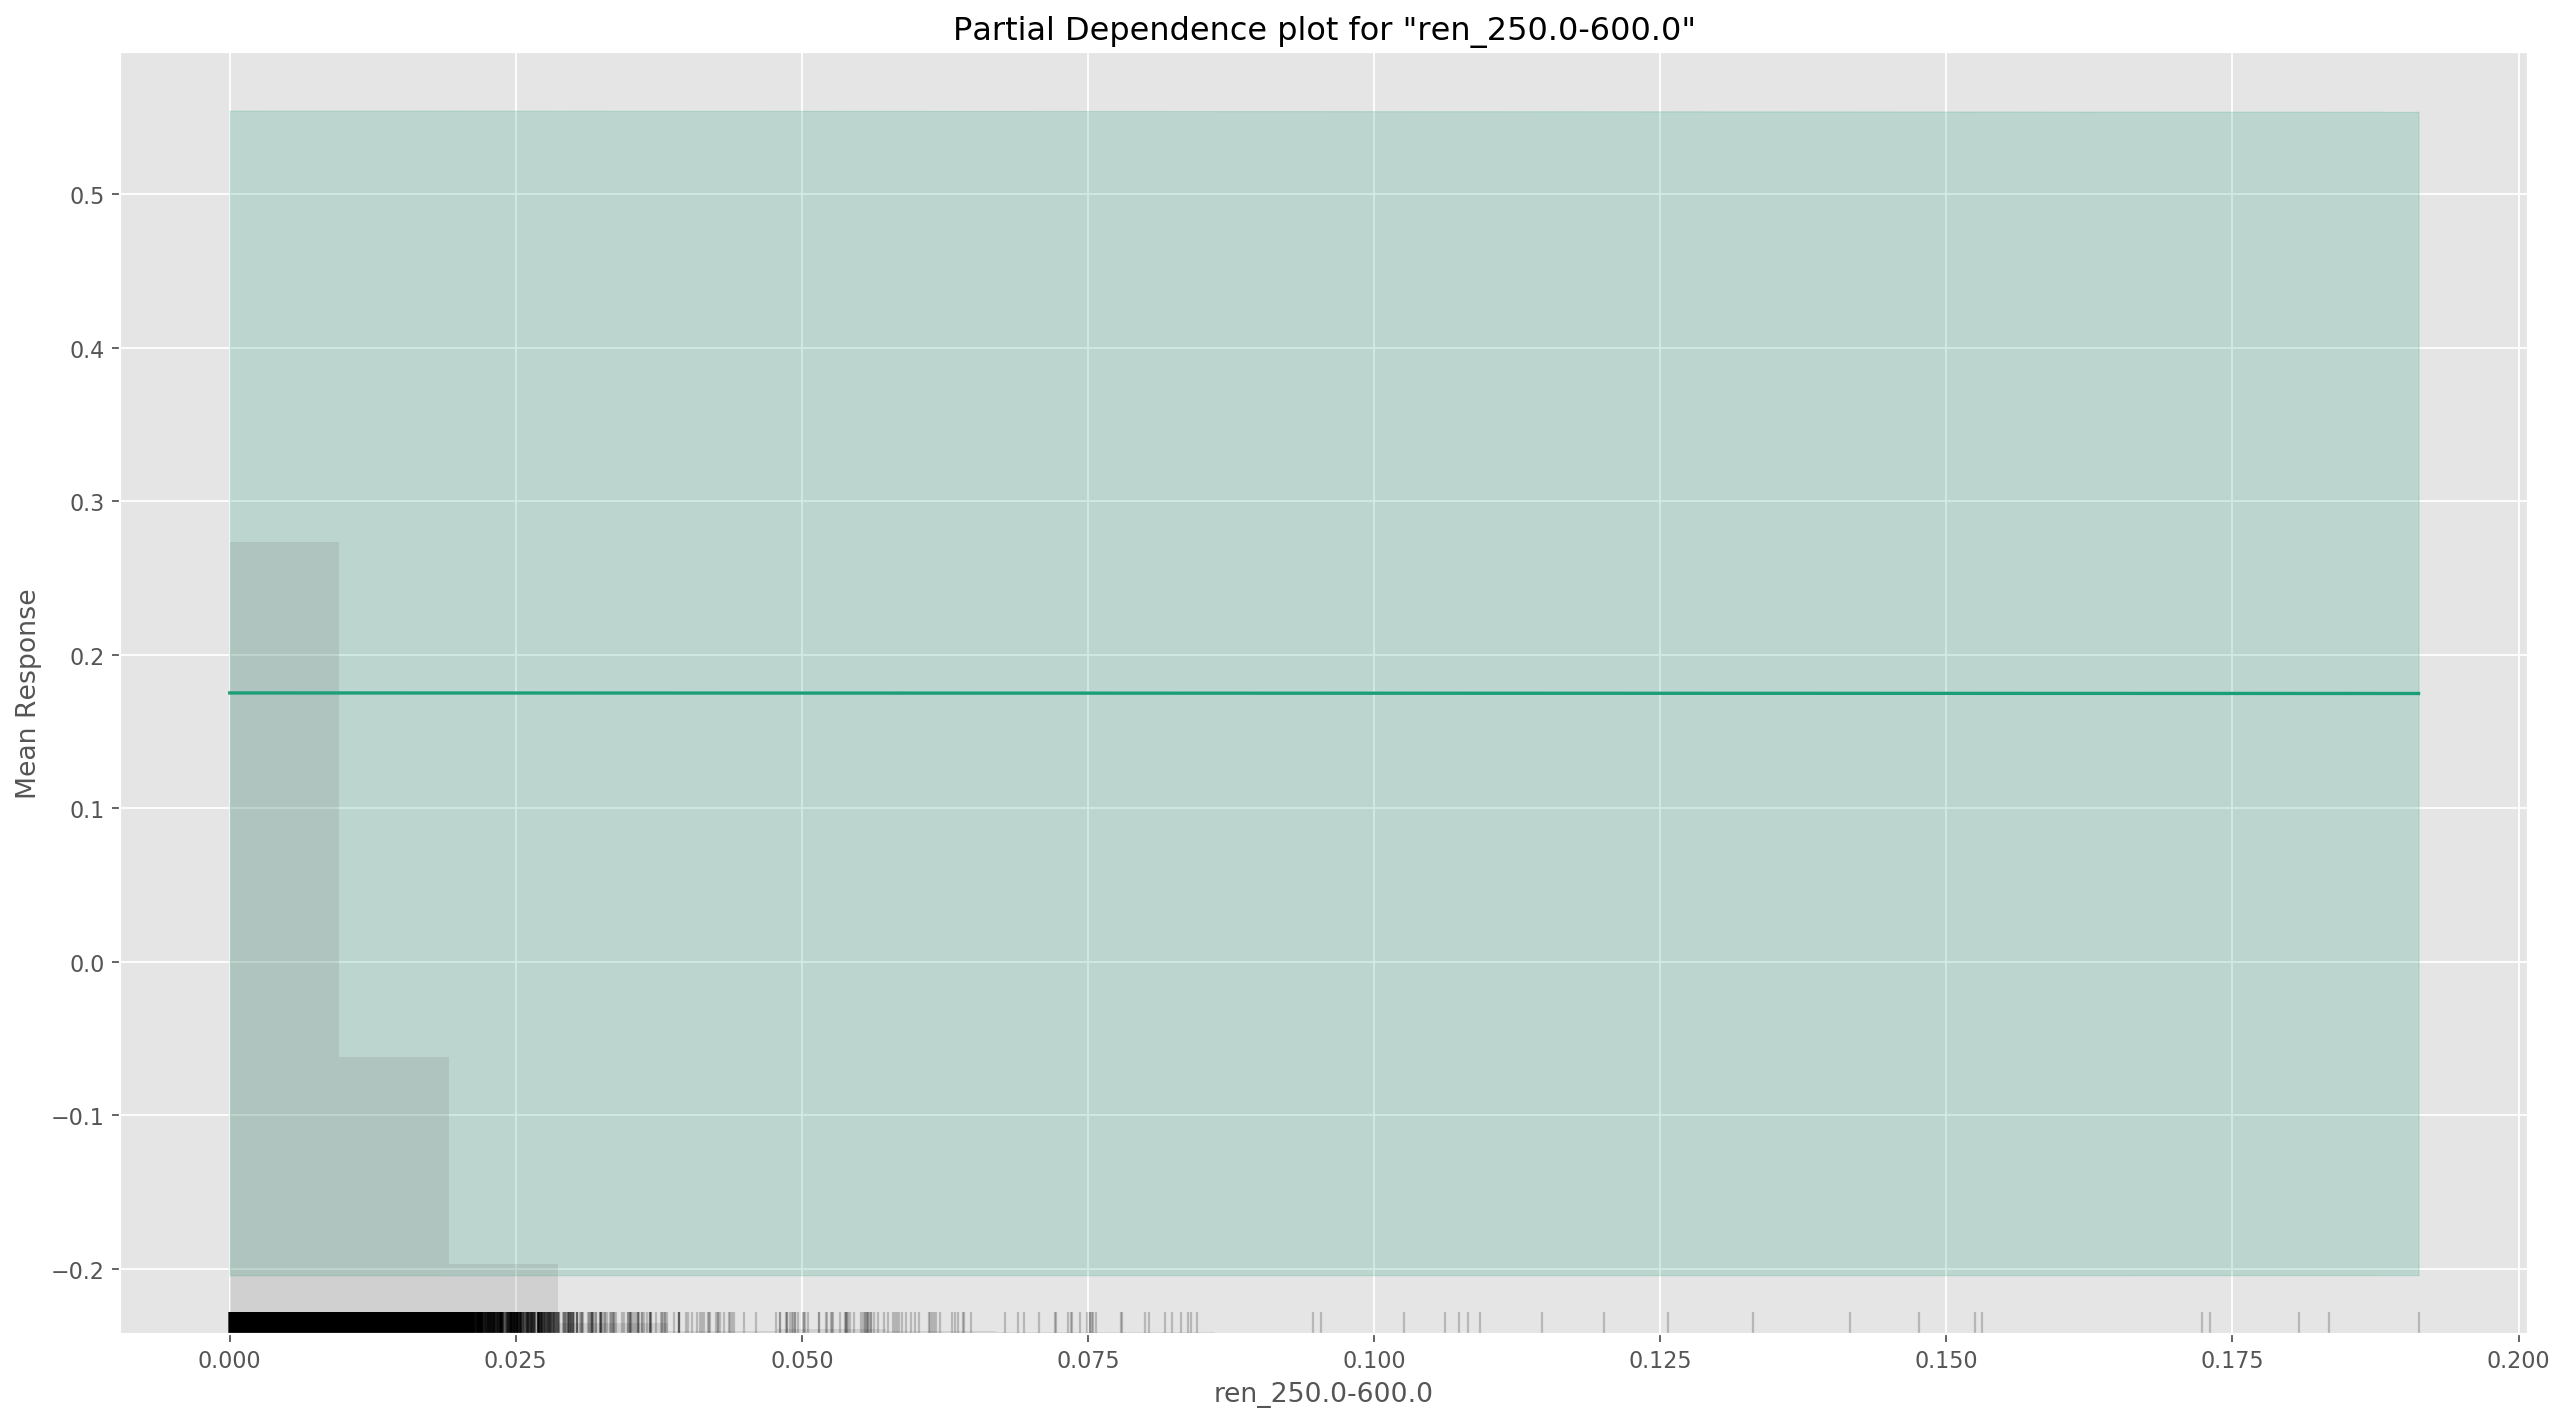

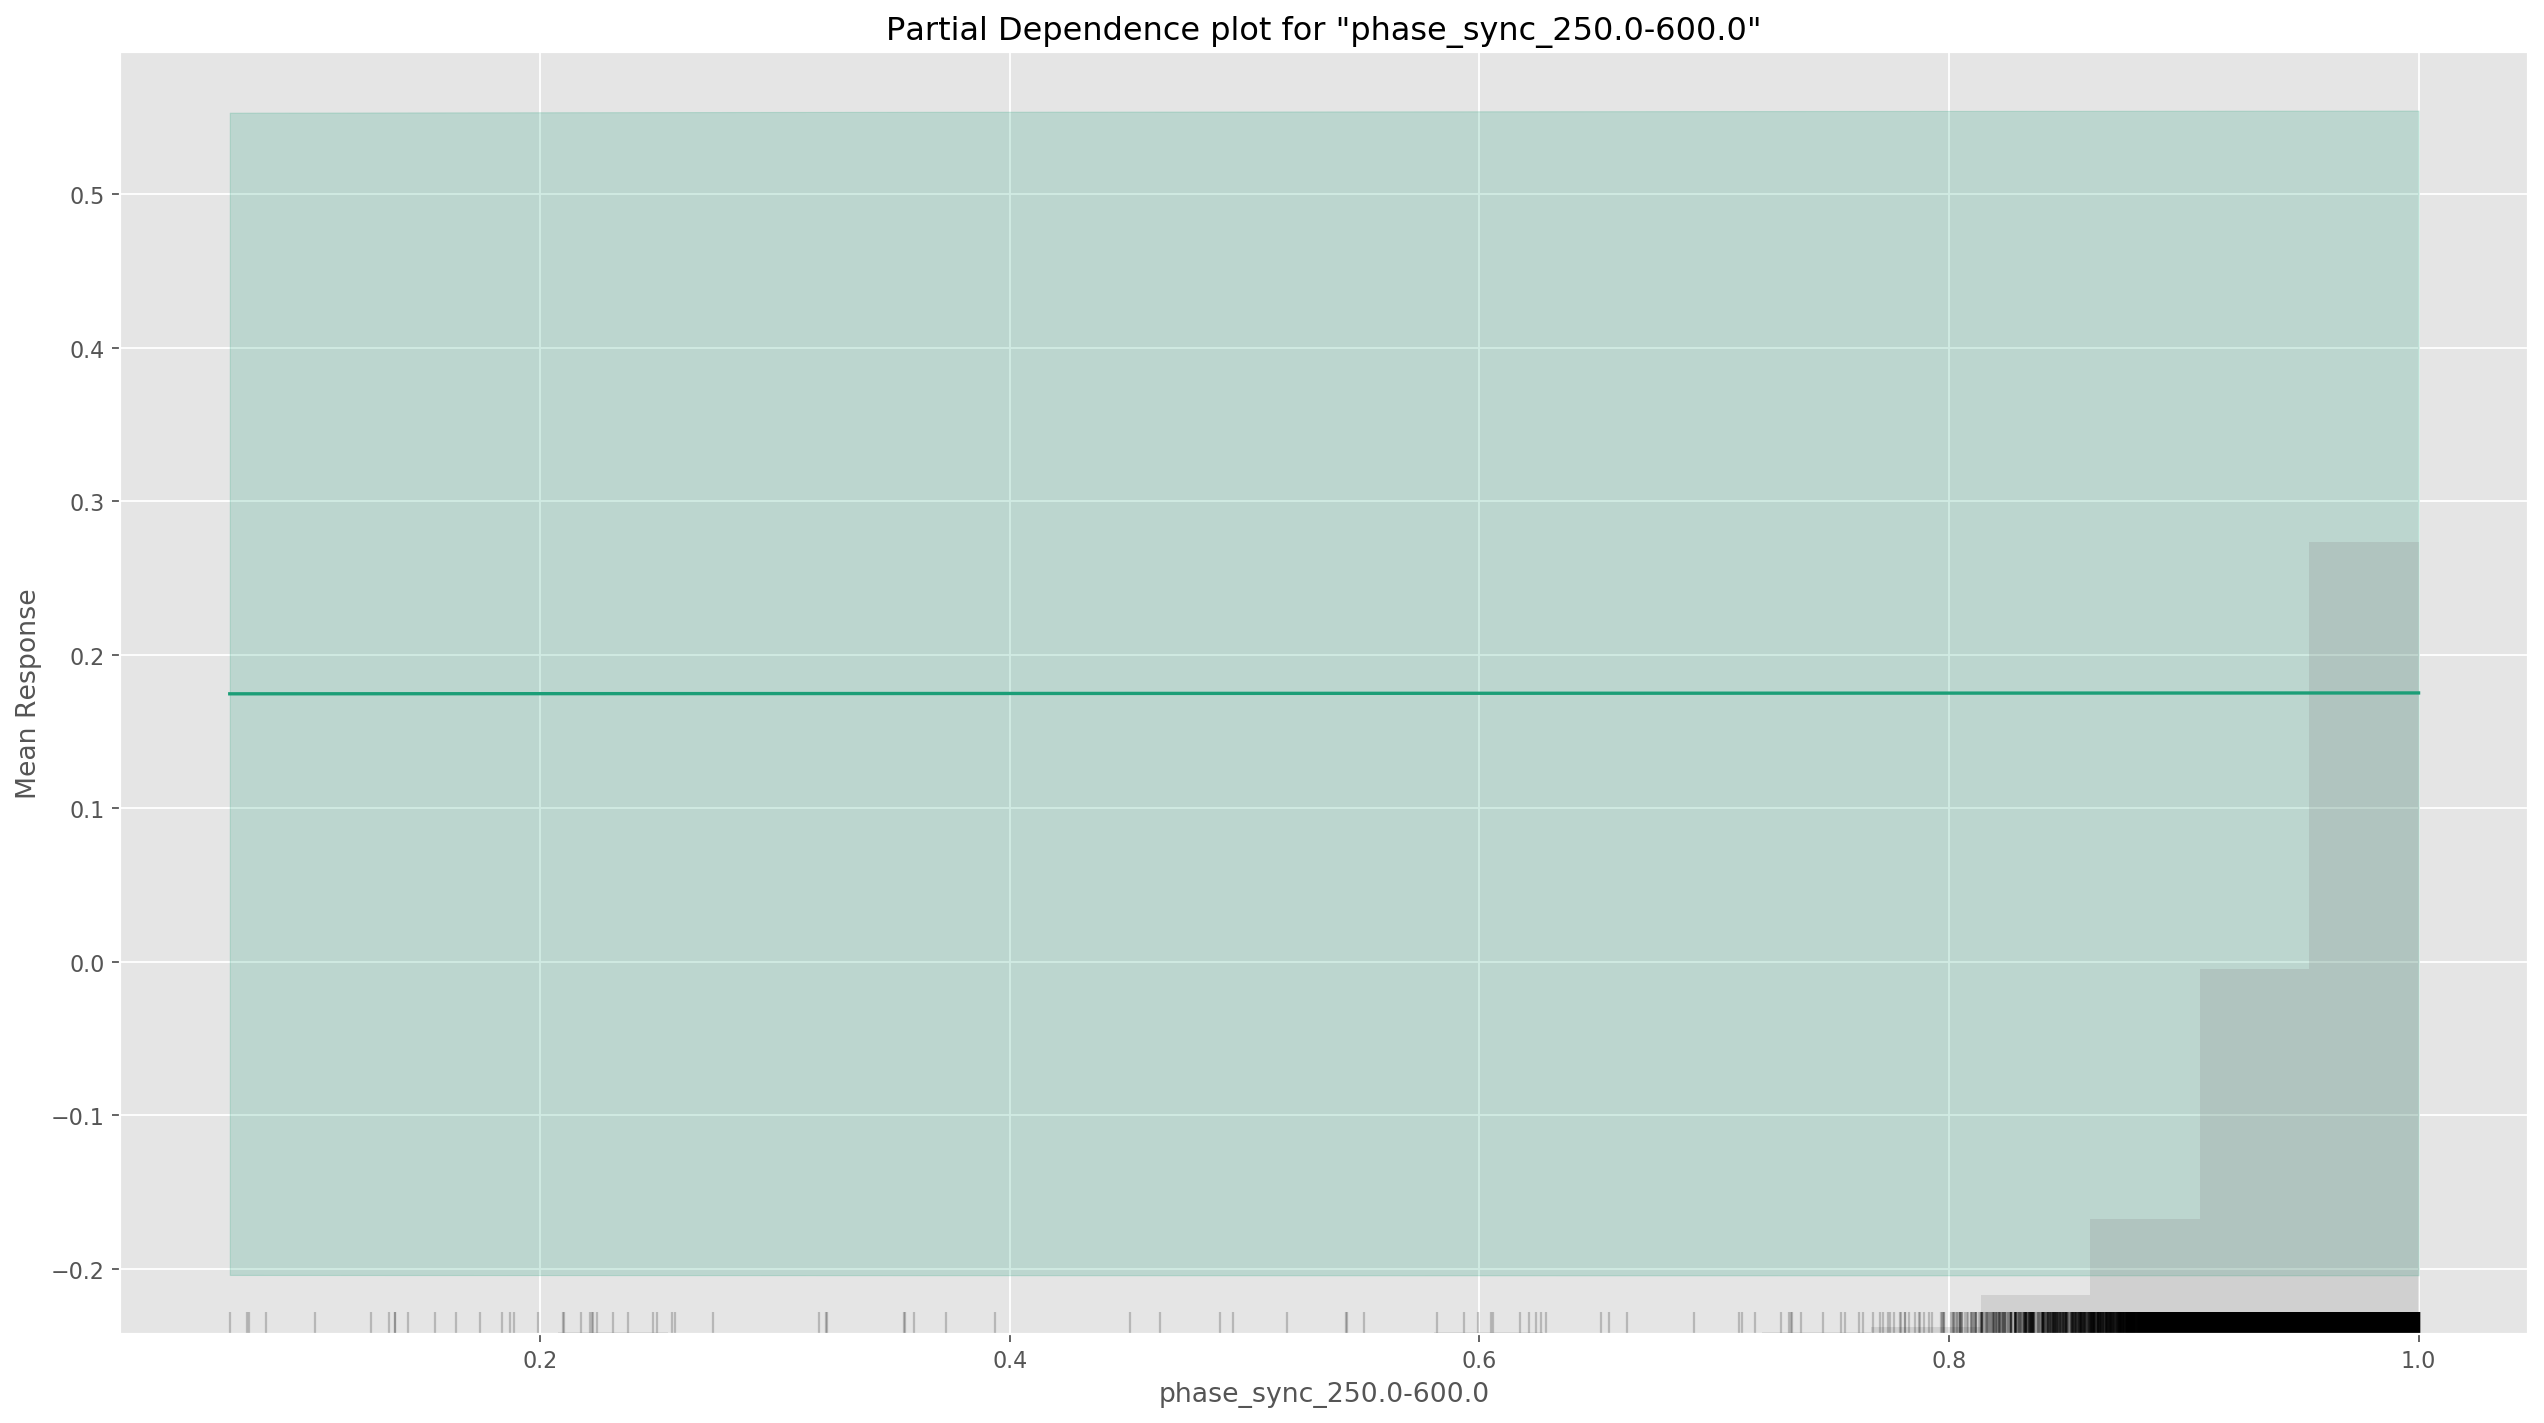

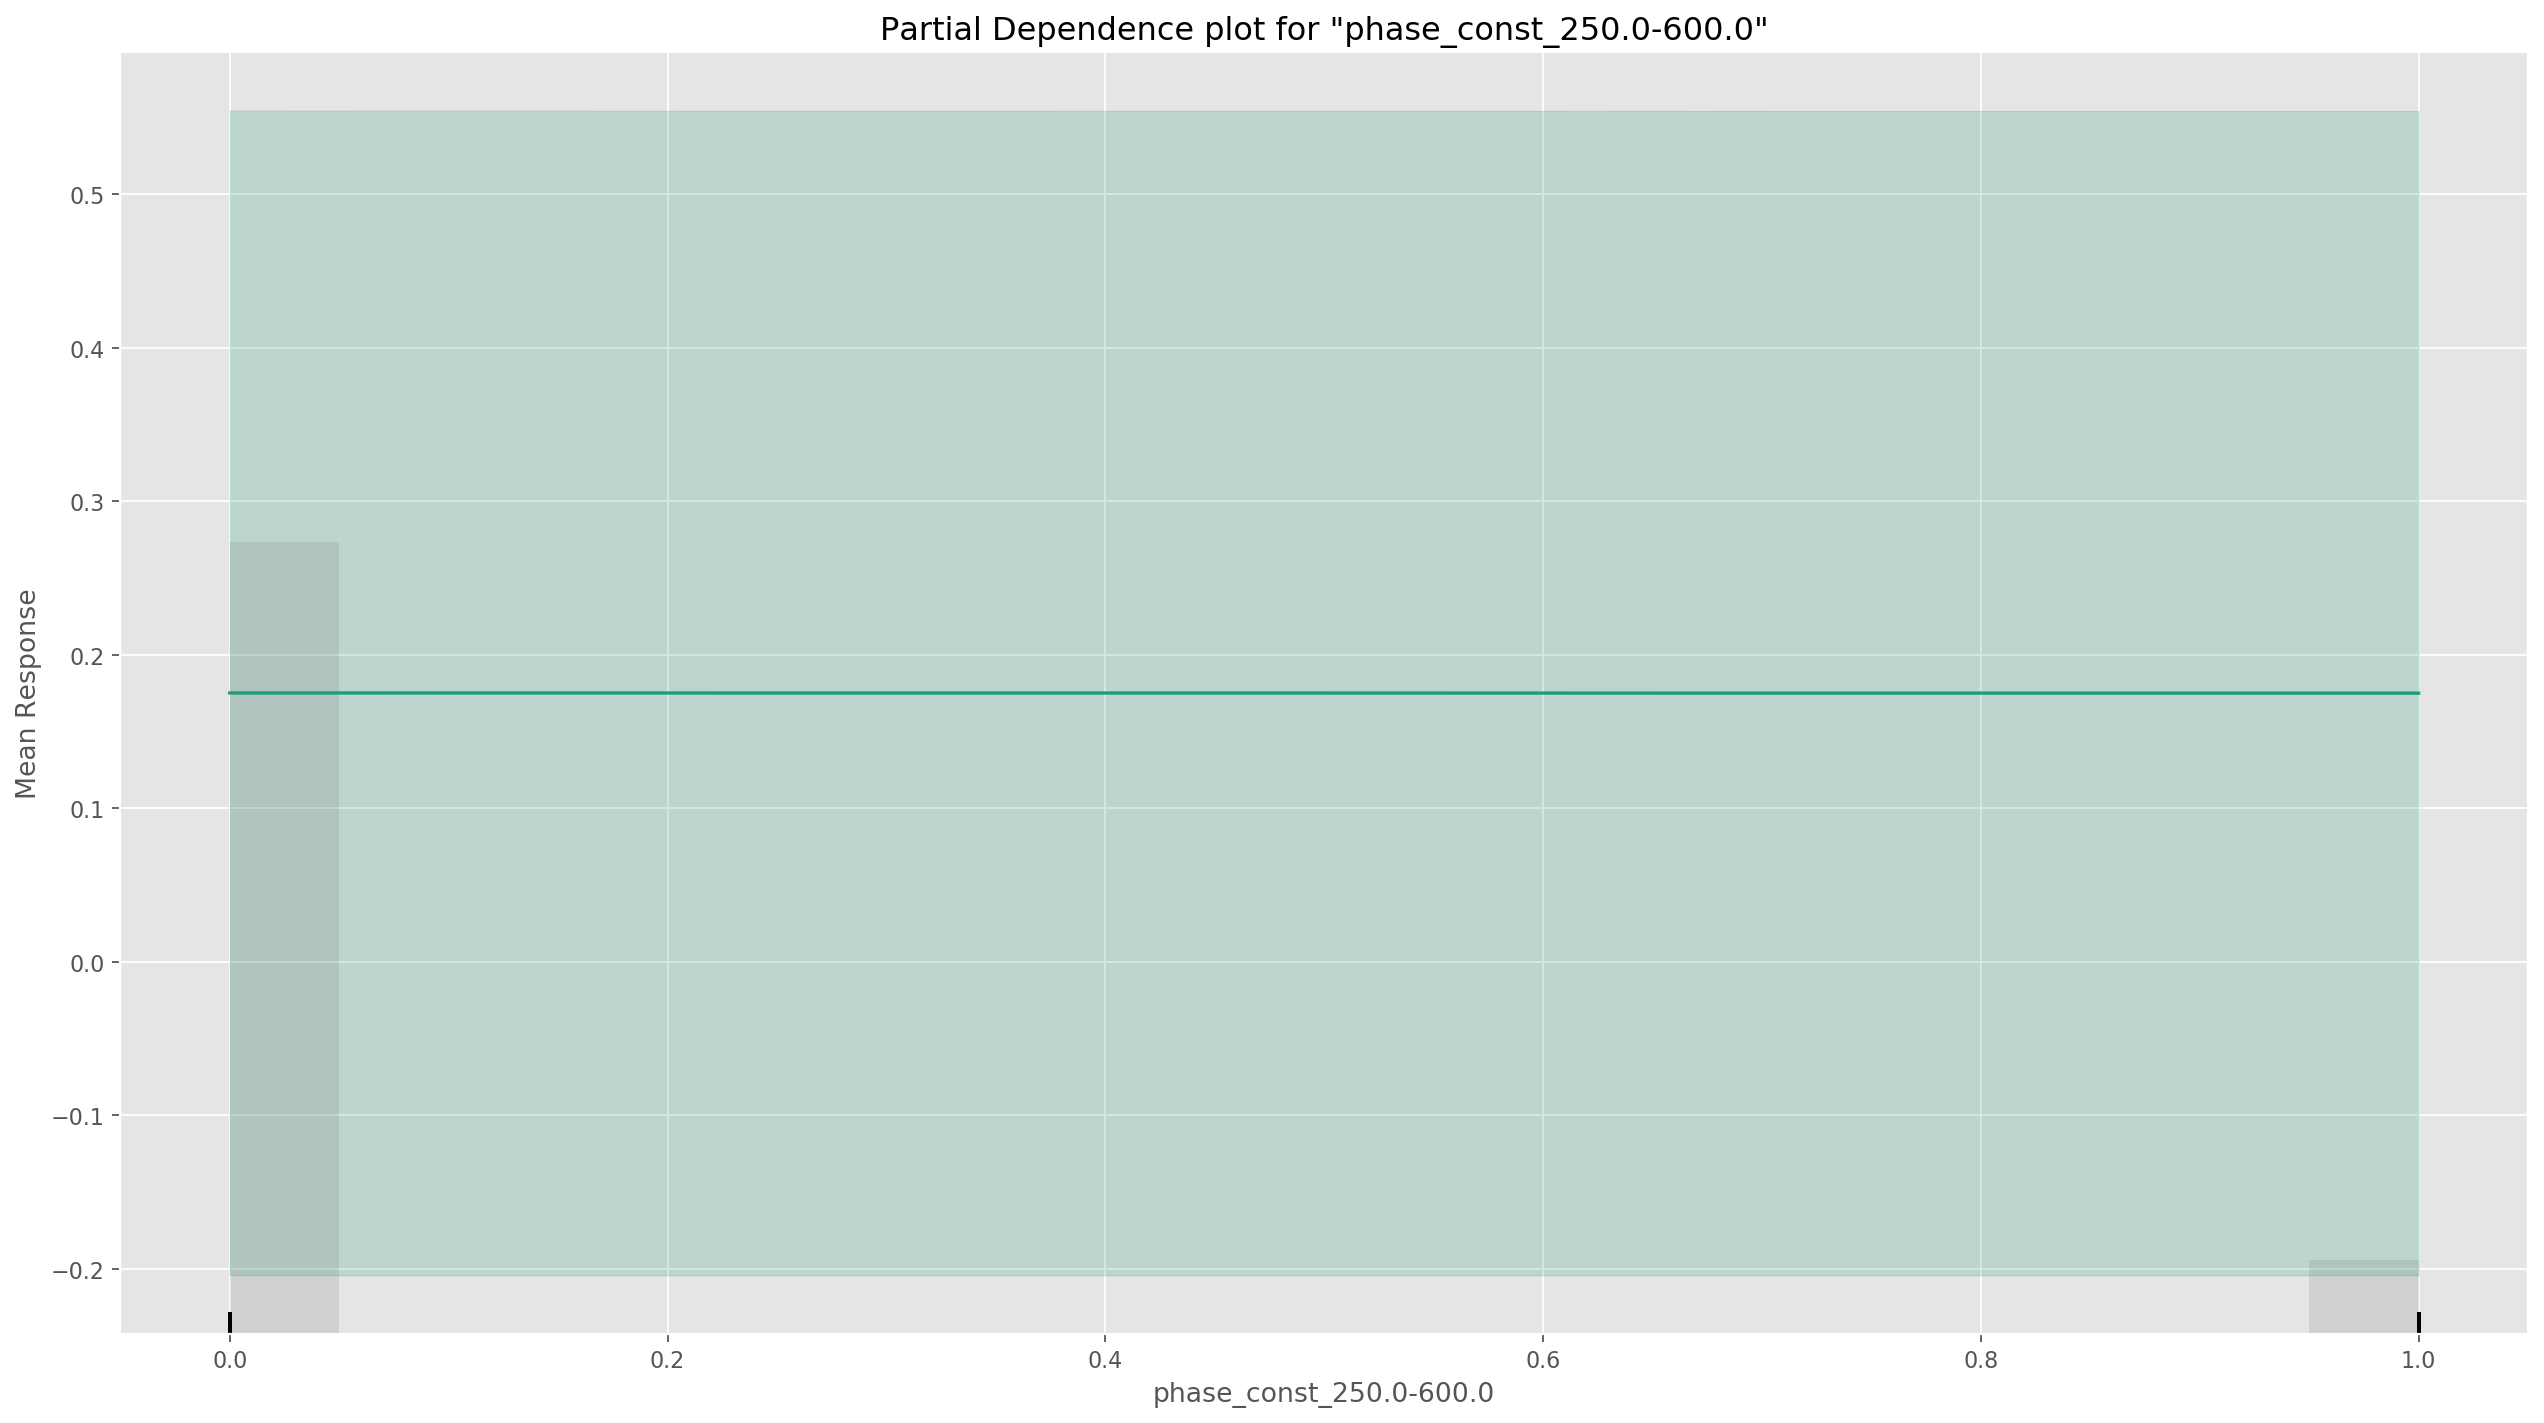

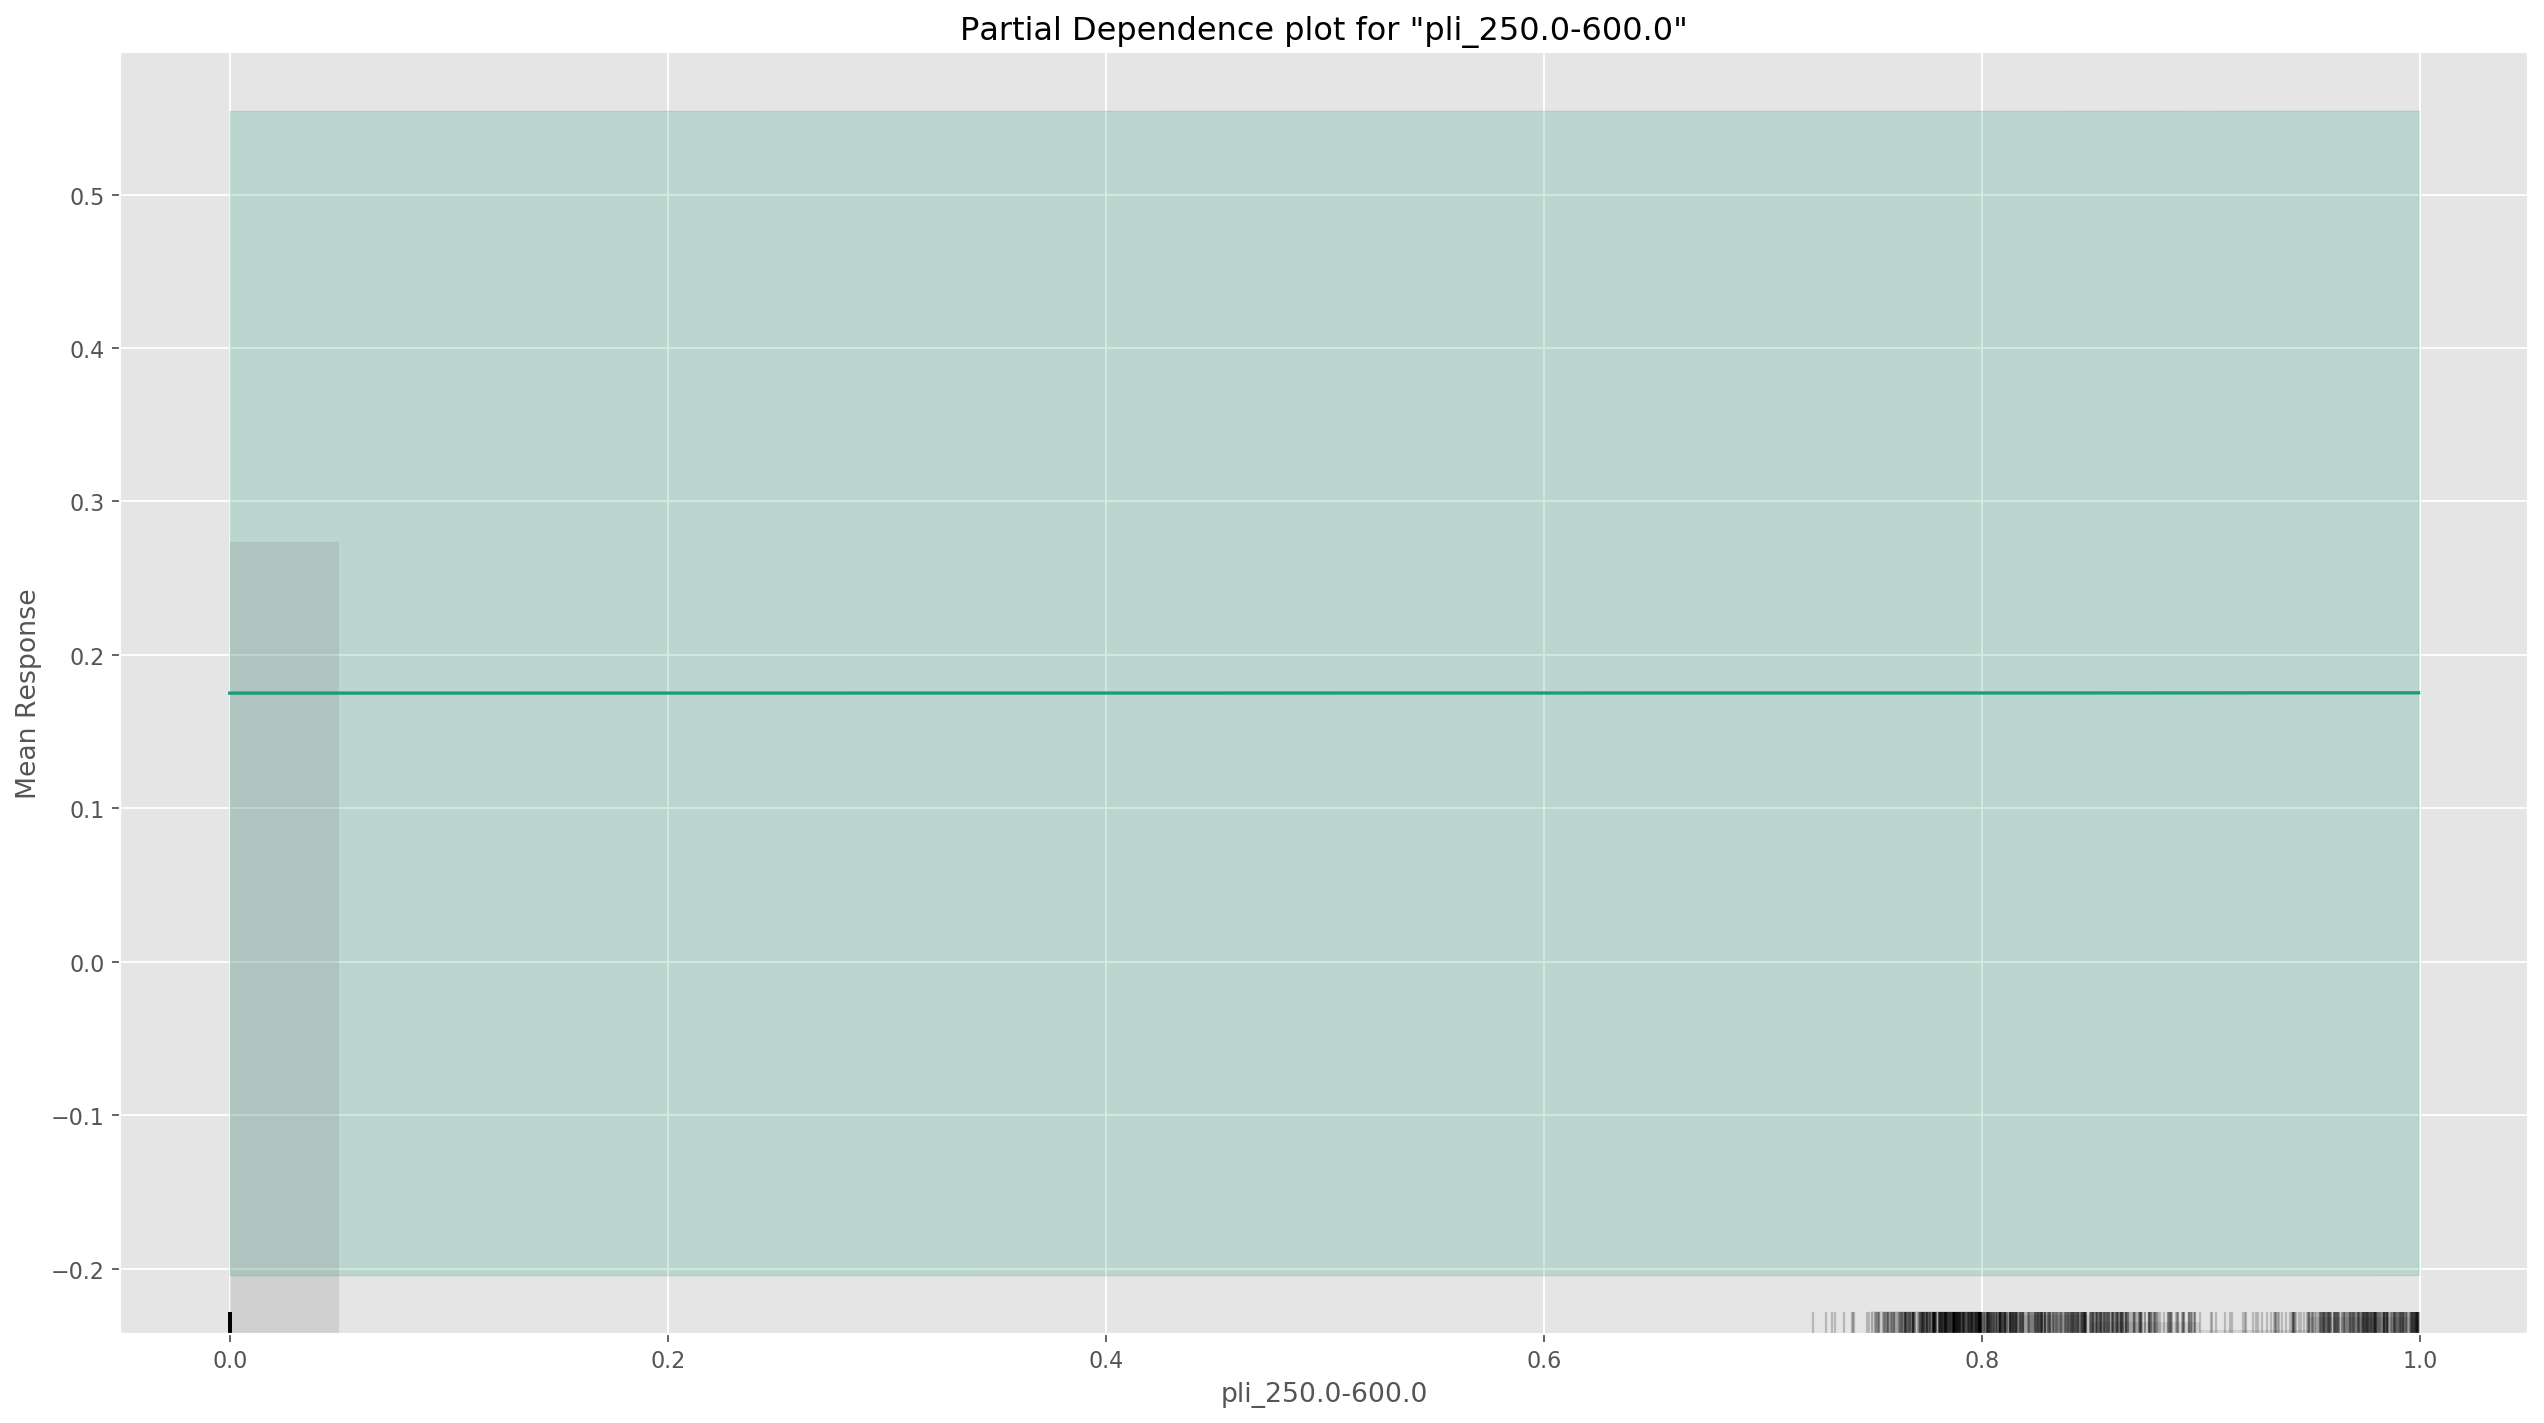

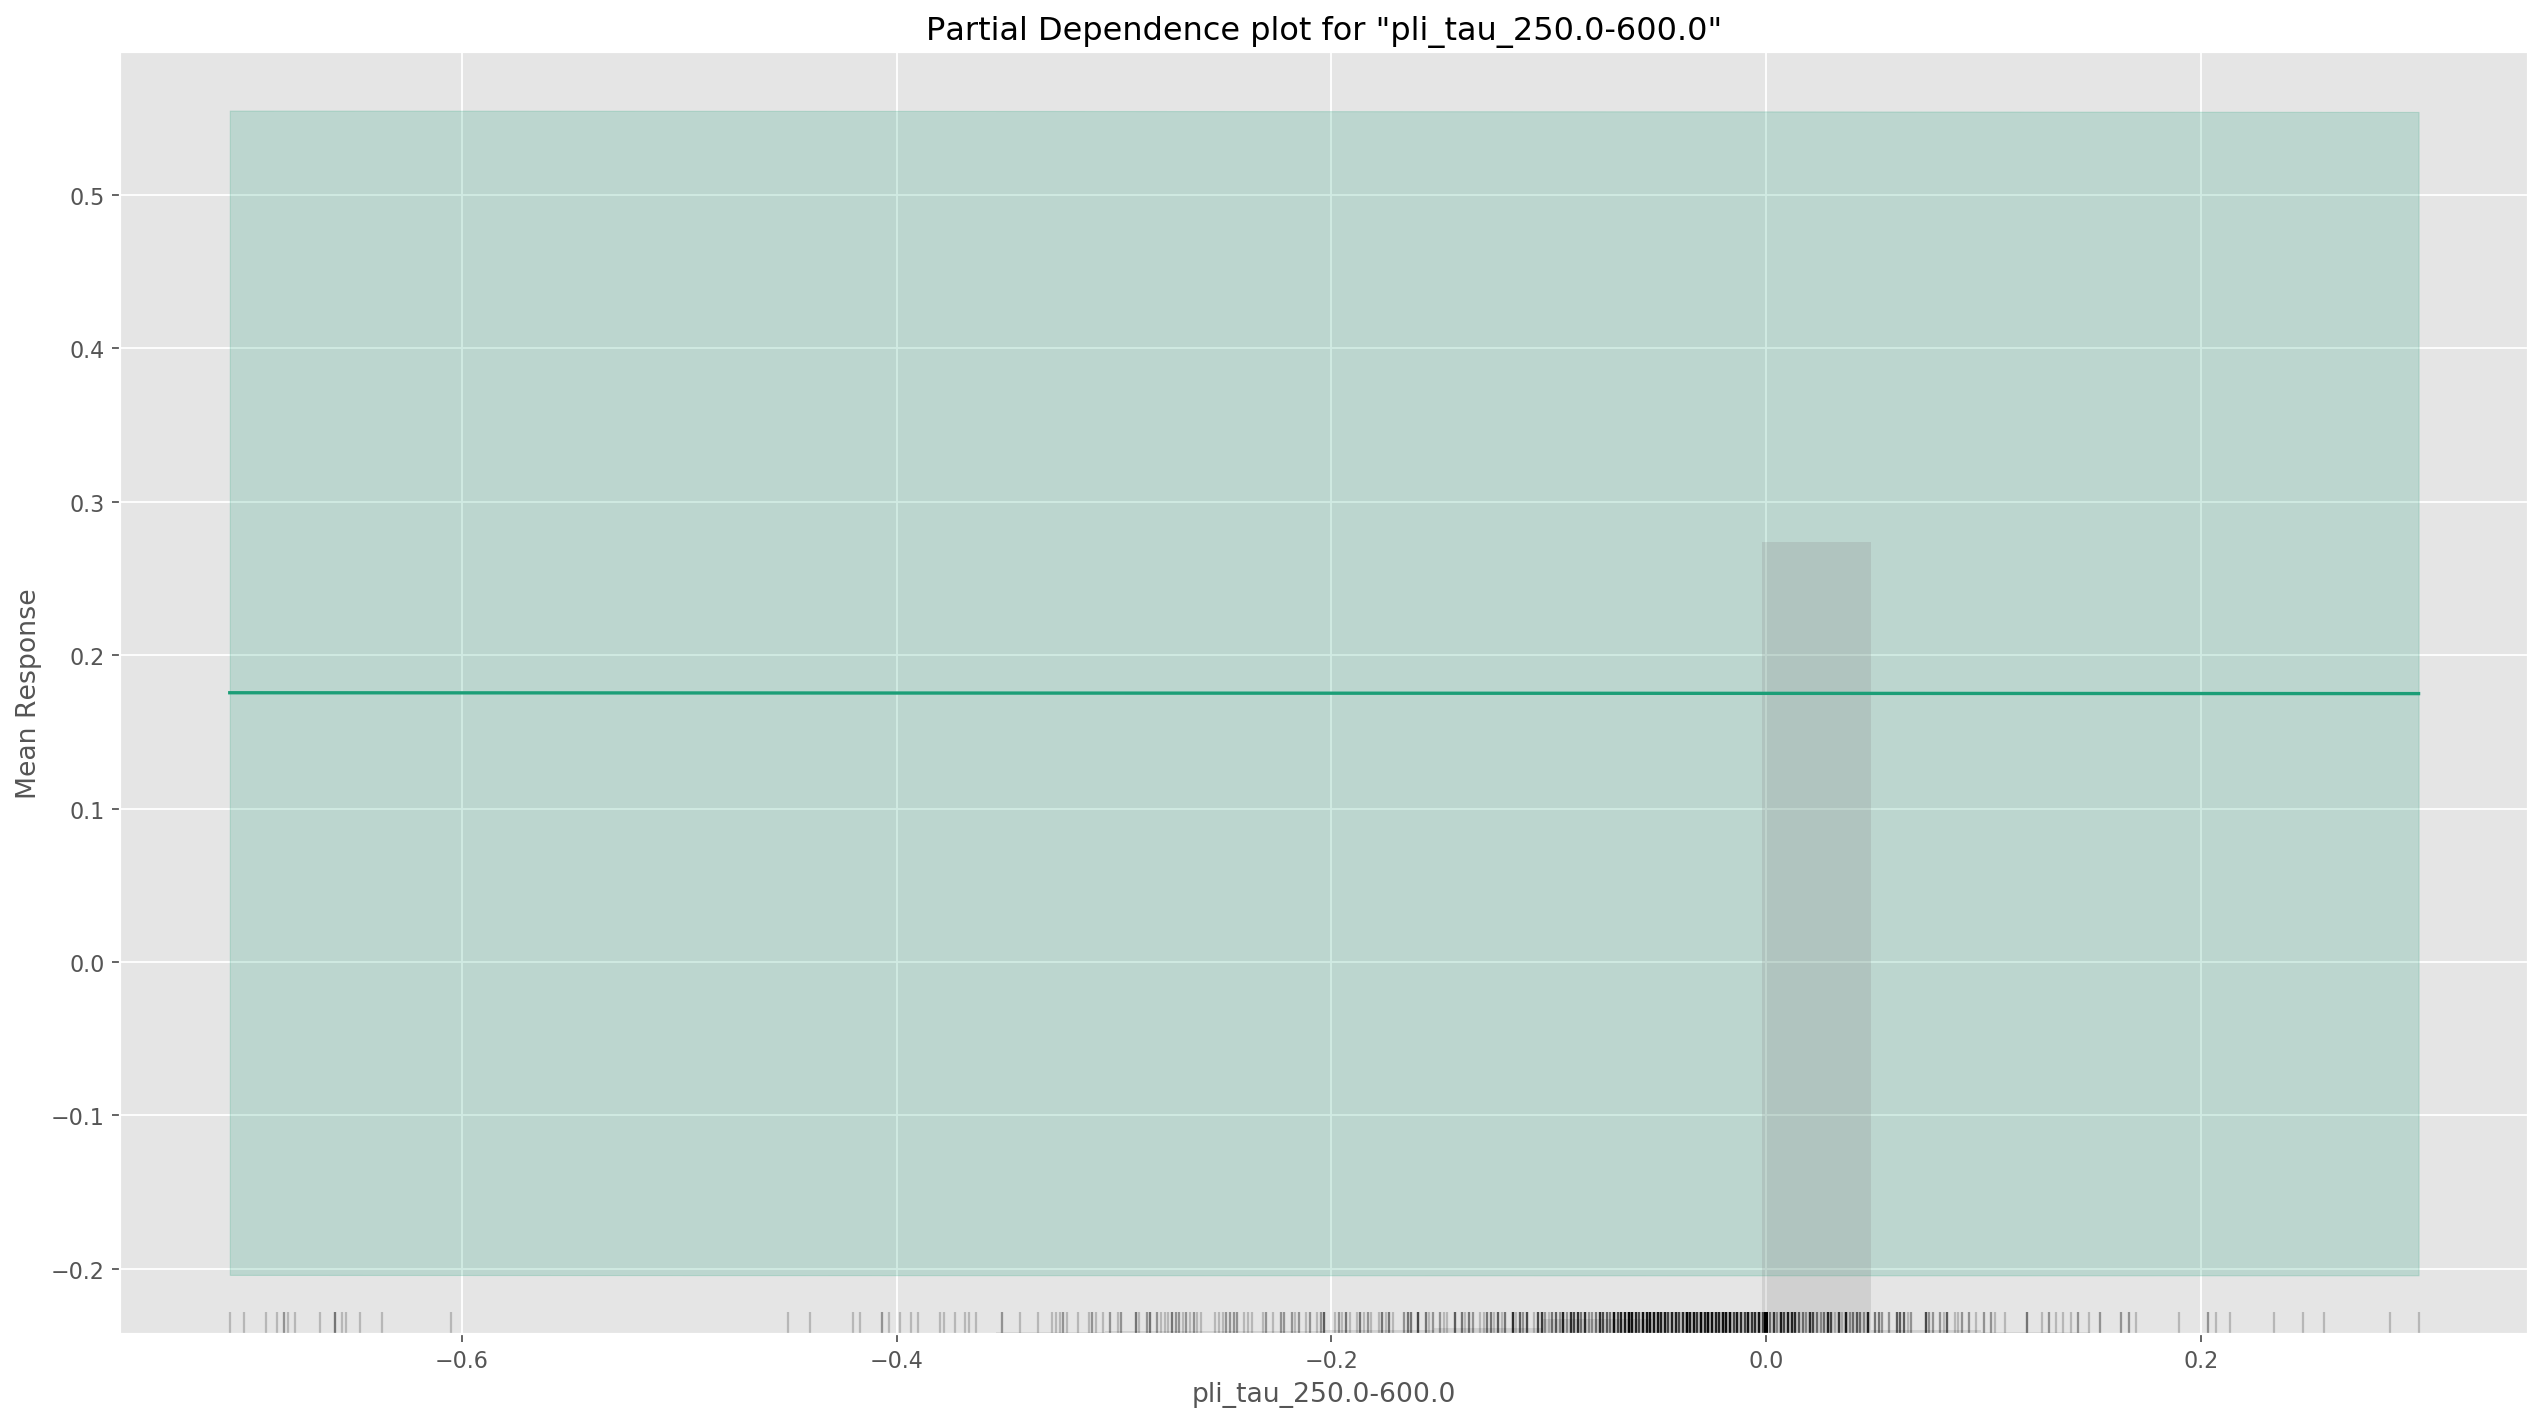

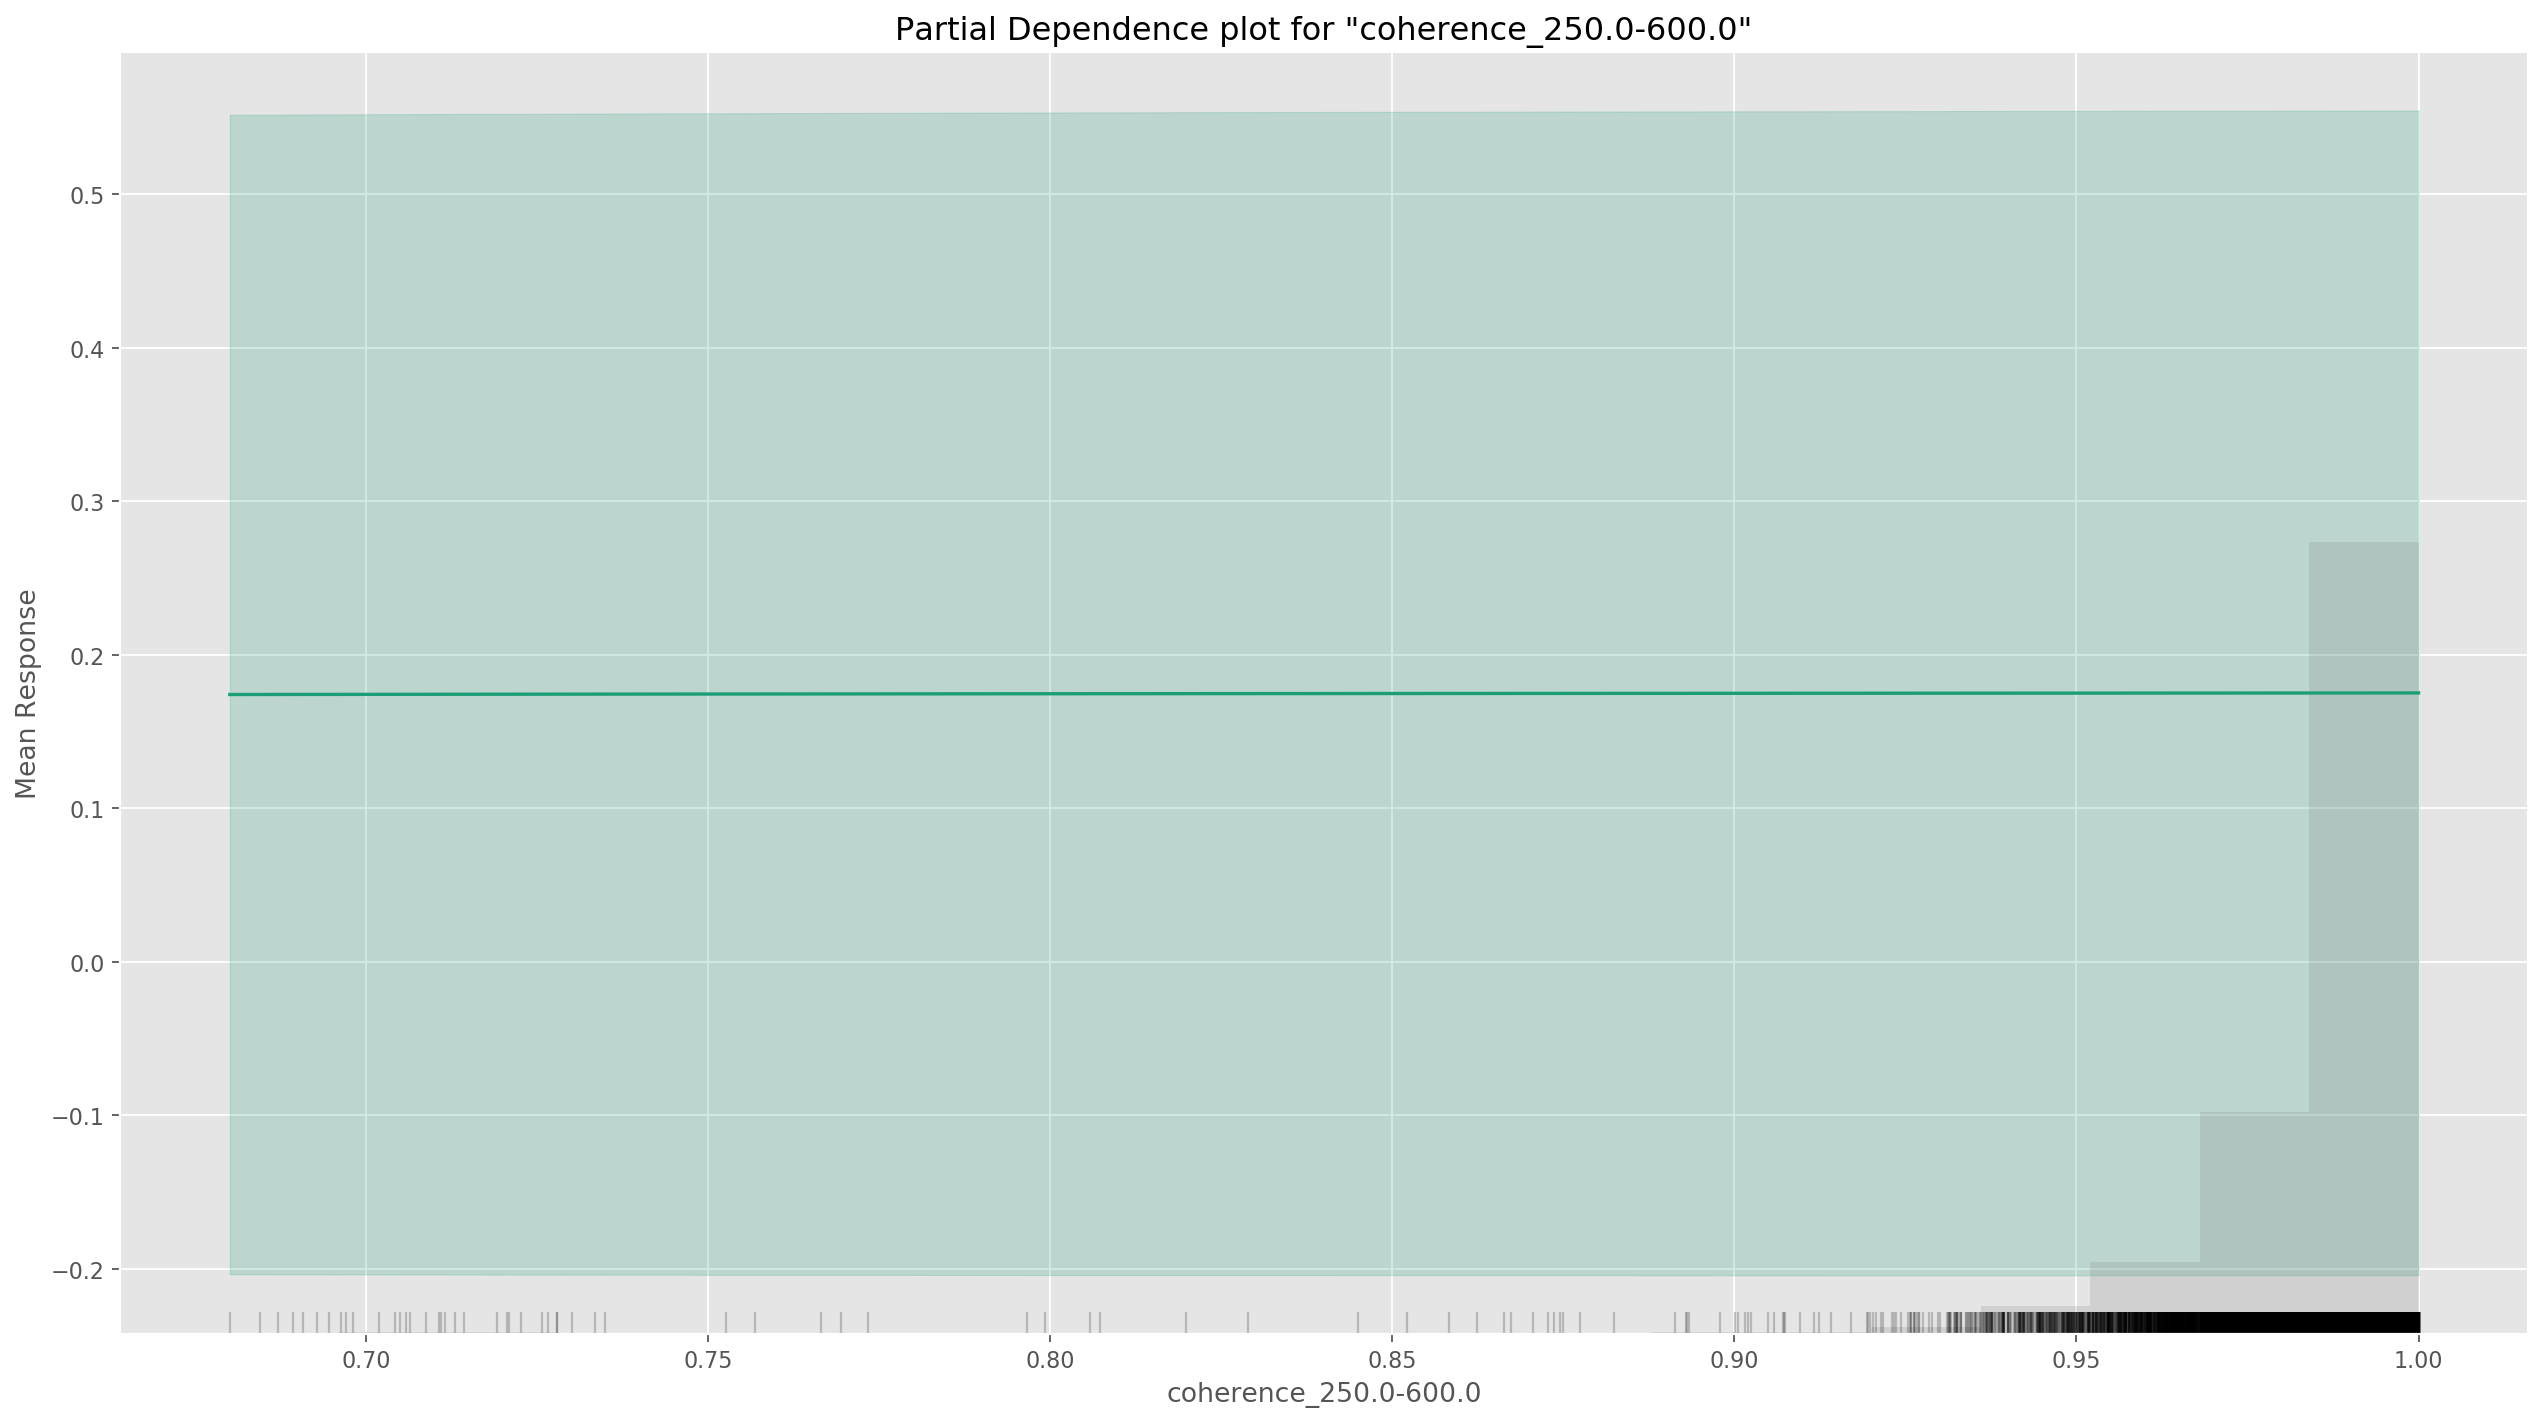

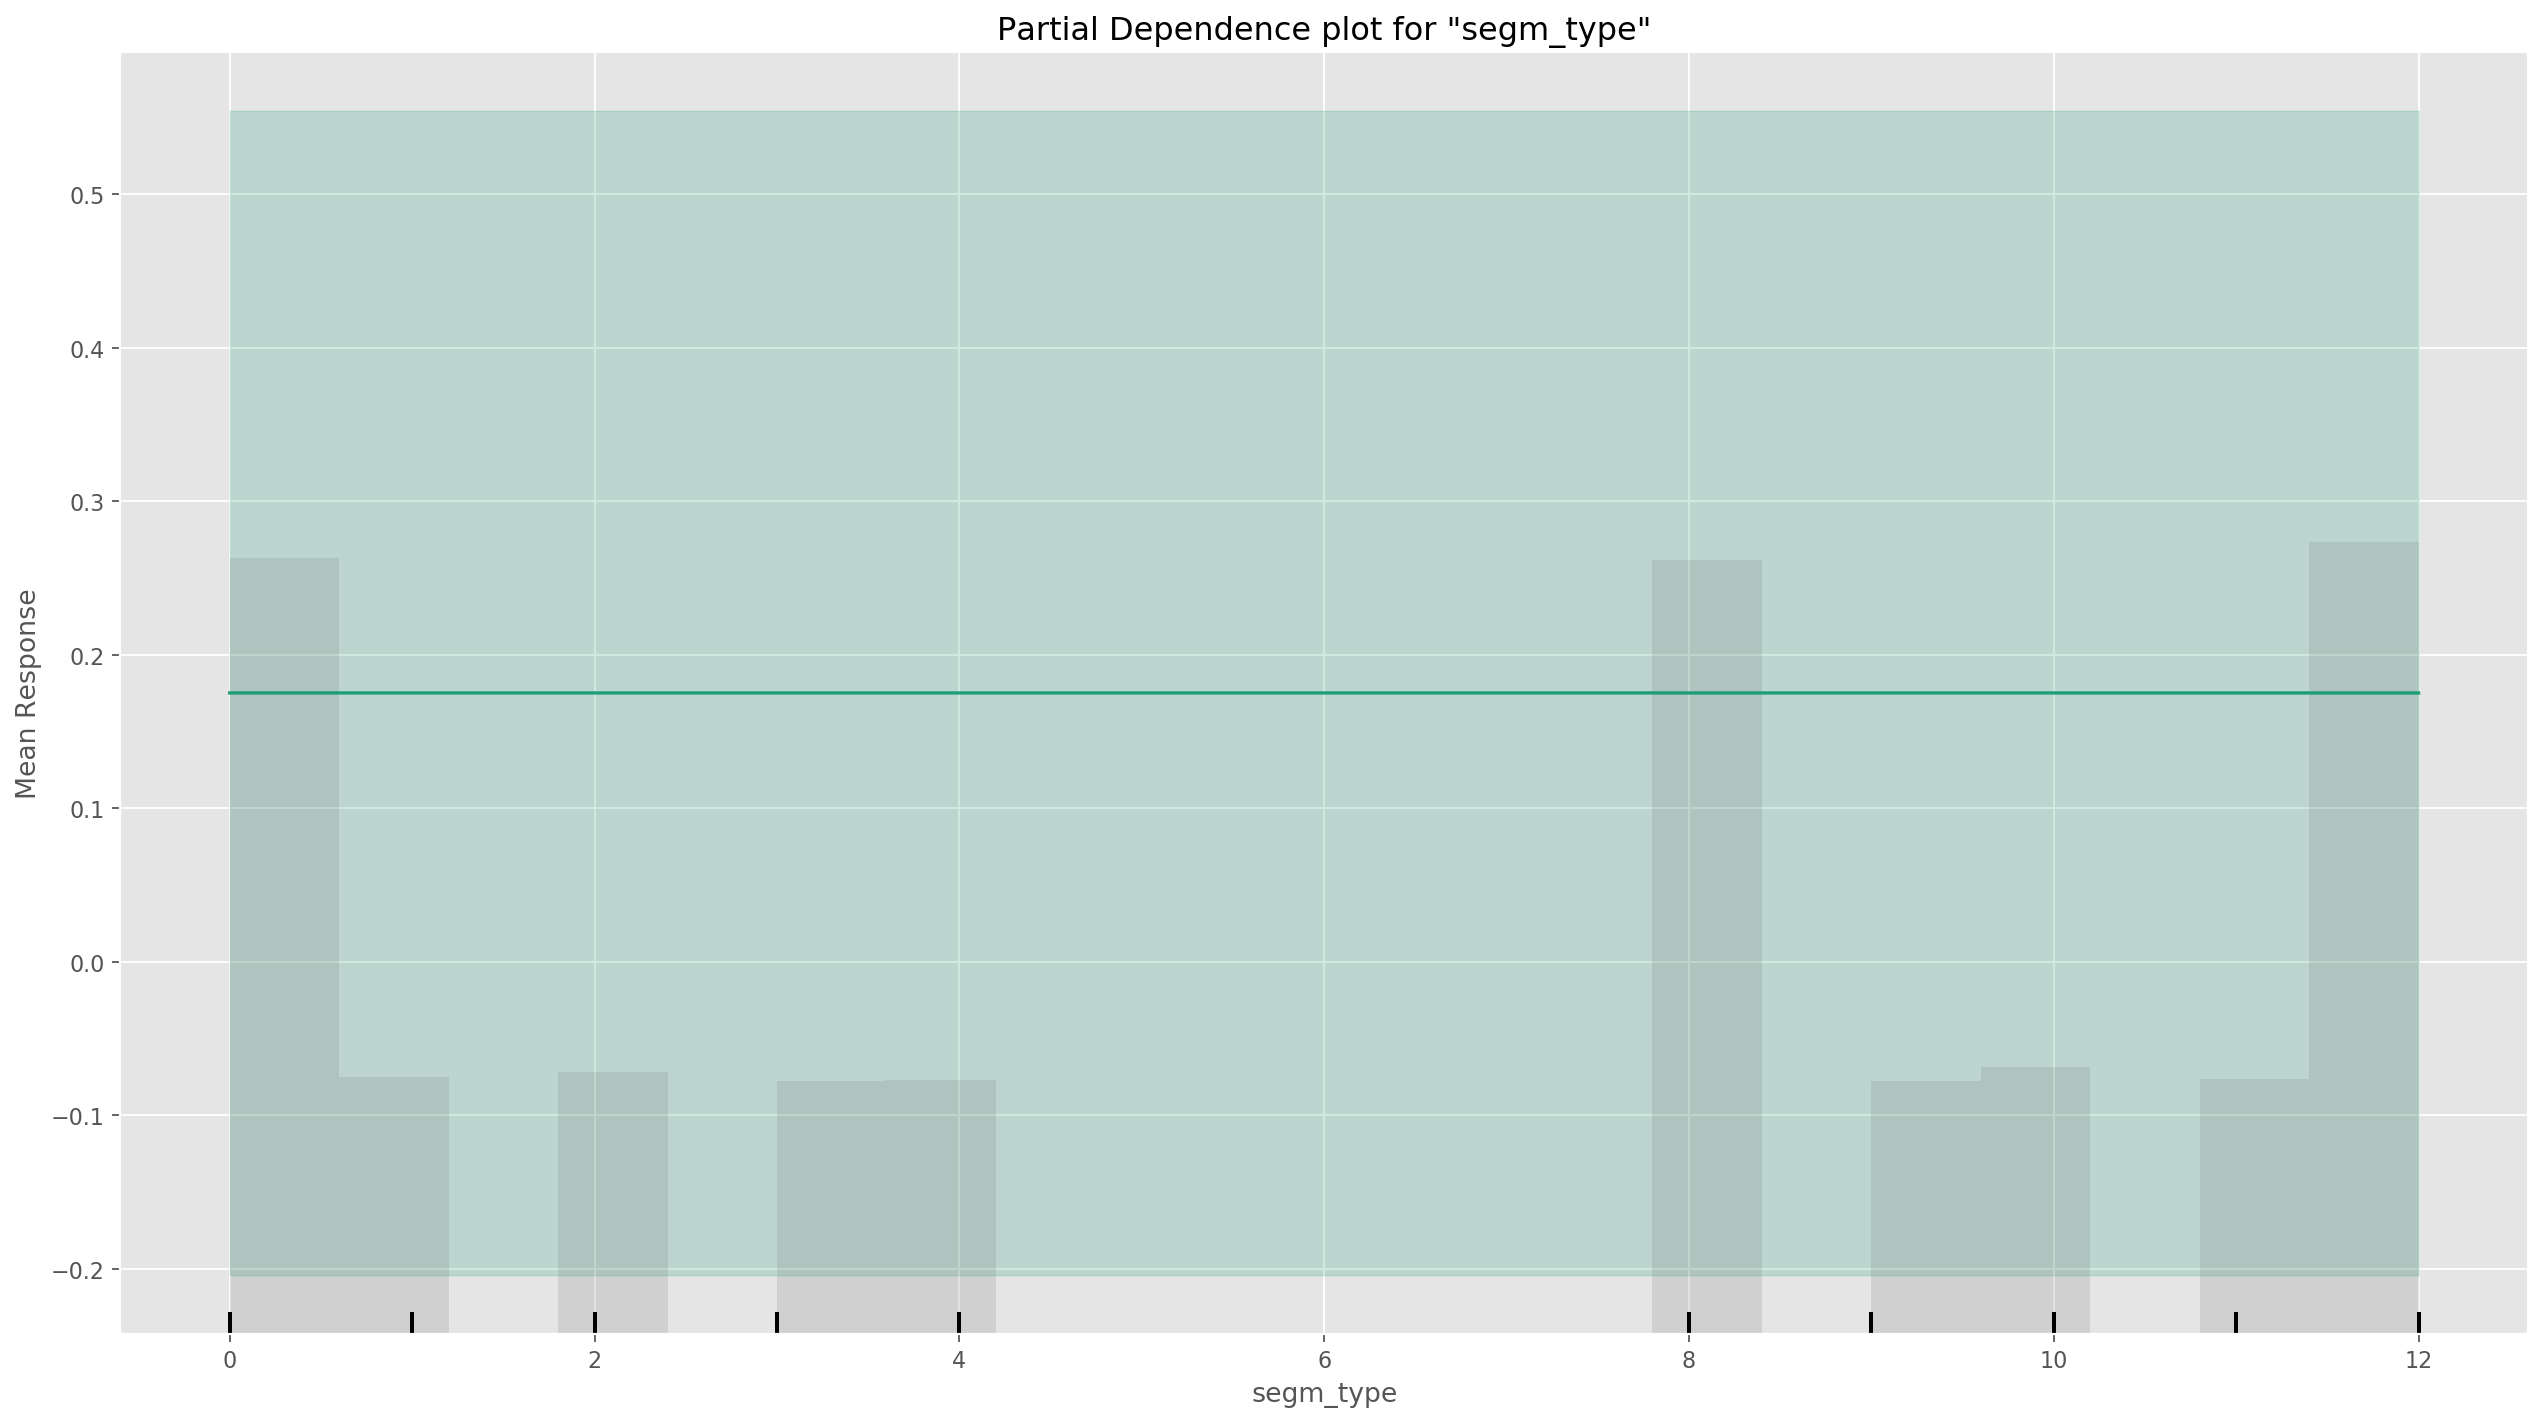

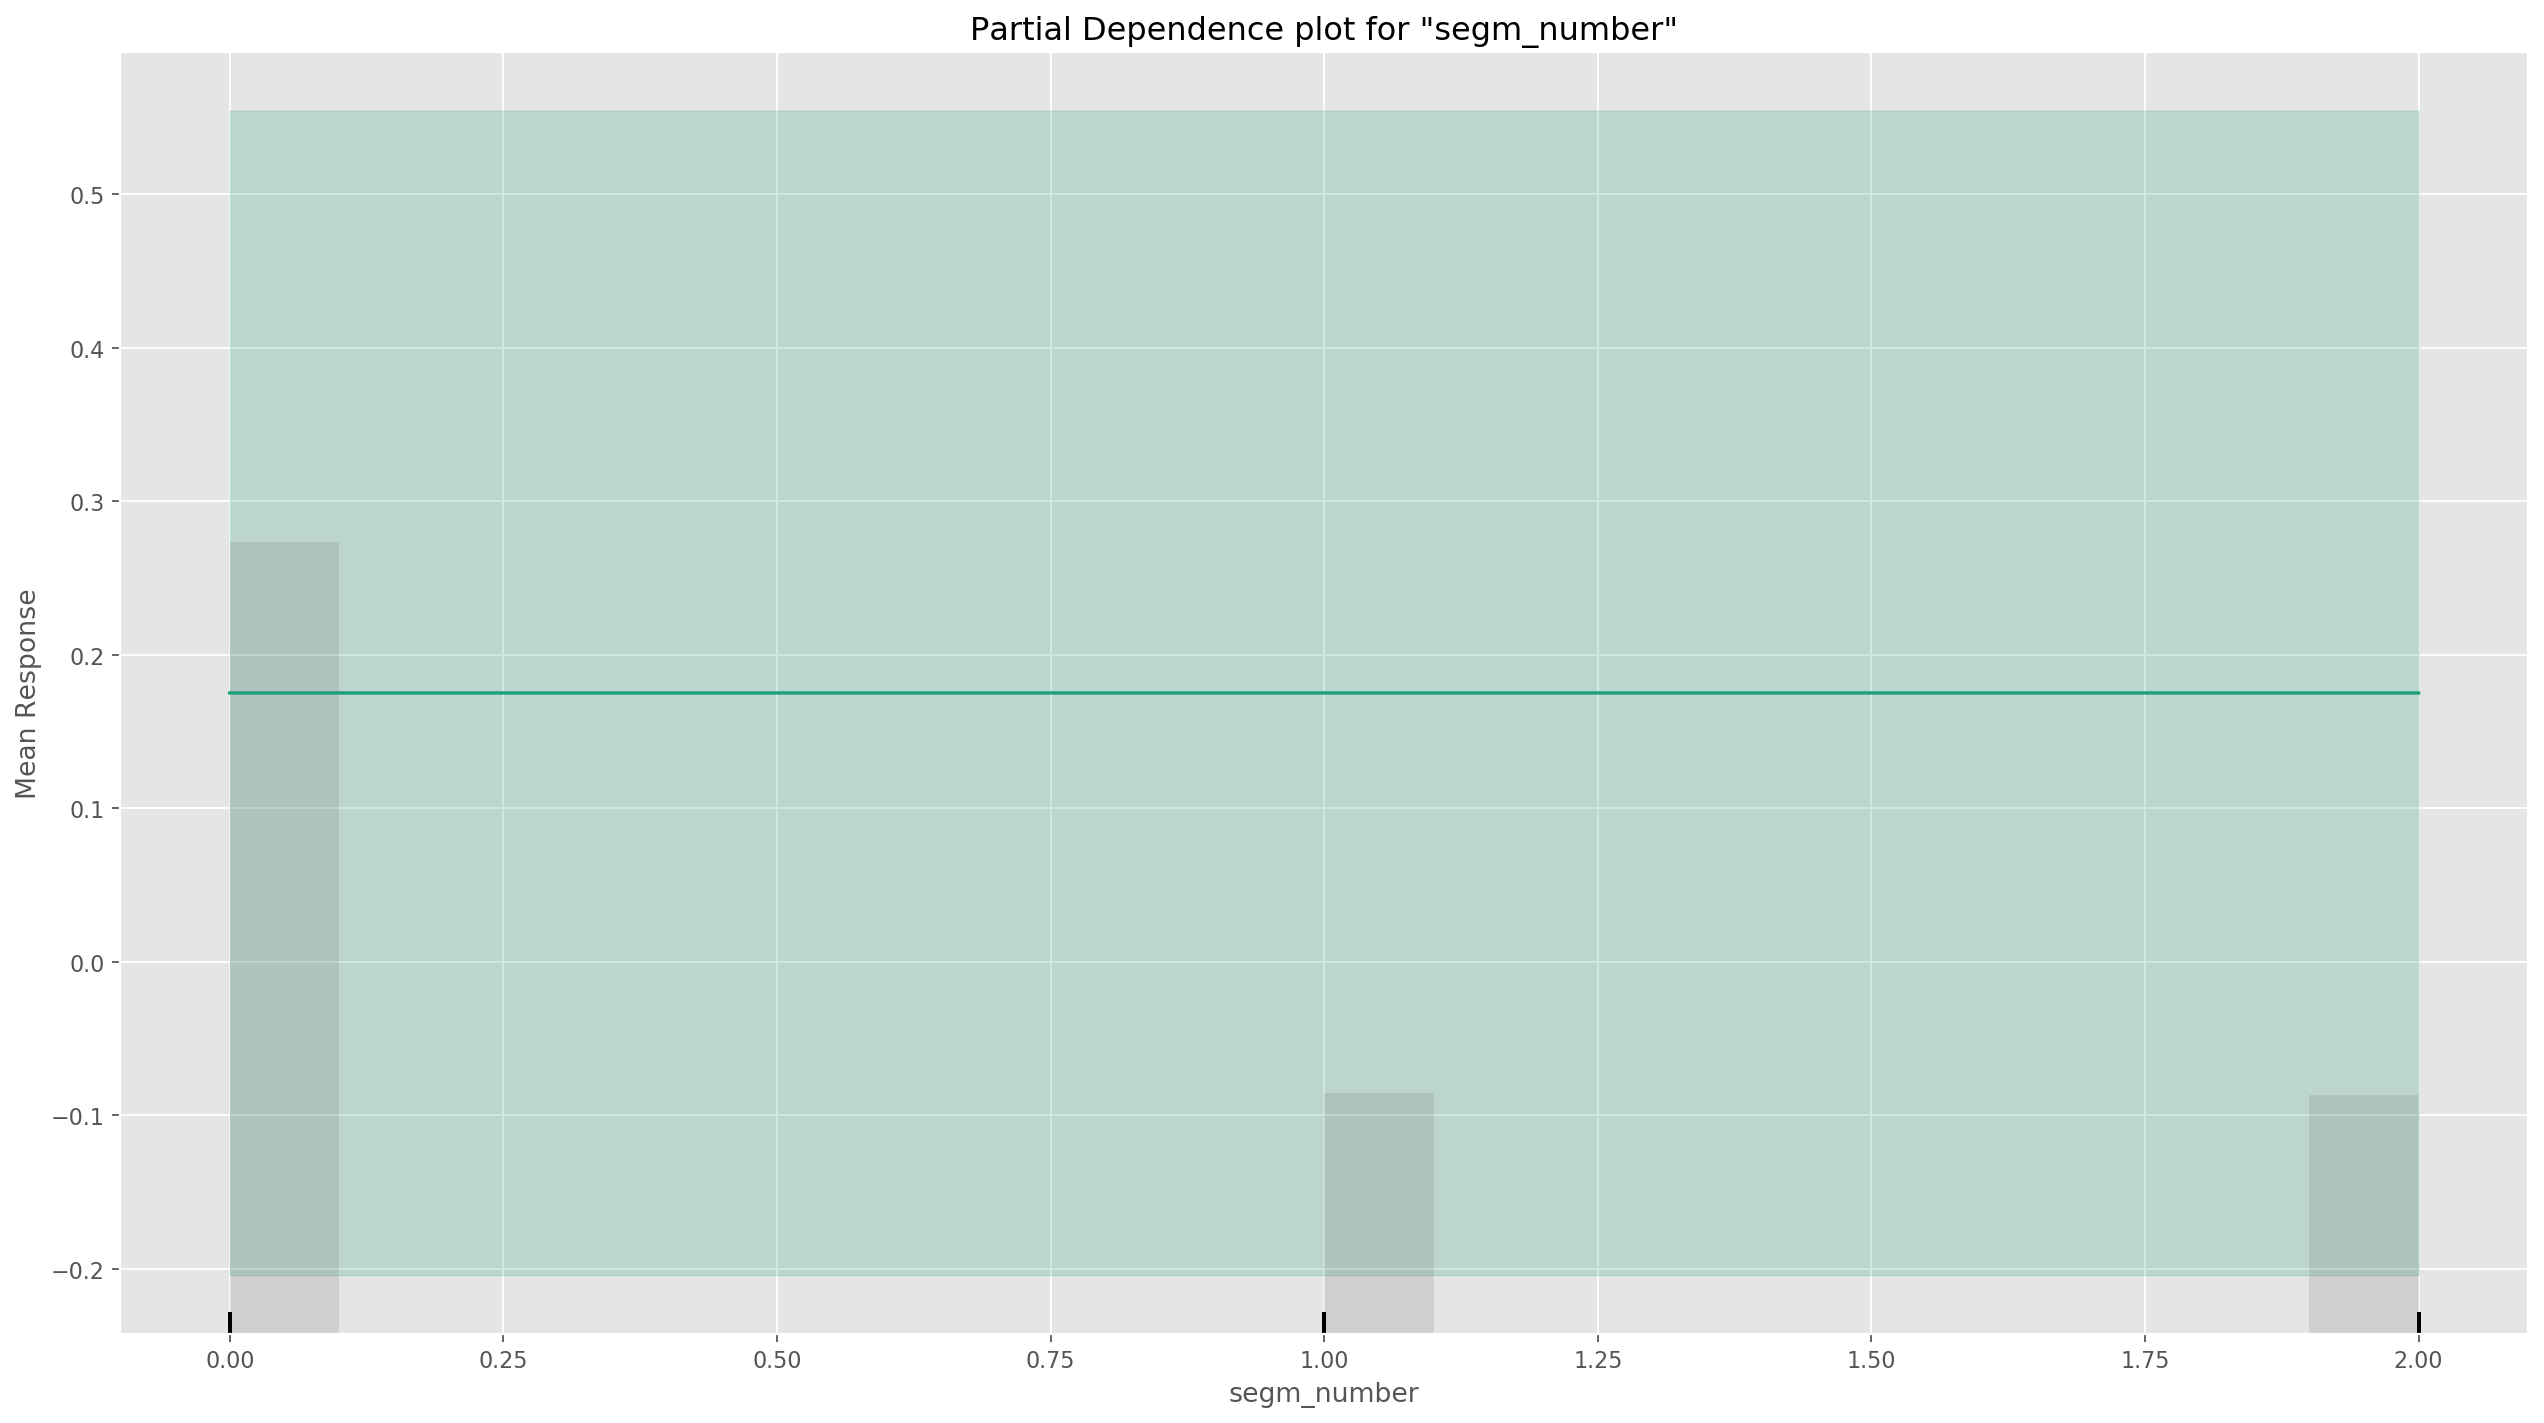

In [51]:
# Explain a single H2O model (e.g. leader model from AutoML)

exm = aml.leader.explain(test)

In [52]:
# Leader Stacked Ensemble(SE) model 

model = h2o.get_model('StackedEnsemble_AllModels_1_AutoML_1_20220710_100521')

In [53]:
# Use SE model on test set

model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 5.636383104164545e-07
RMSE: 0.0007507584900728426
LogLoss: 0.0004812360983277104
Null degrees of freedom: 10846
Residual degrees of freedom: 10844
Null deviance: 10062.676759674636
Residual deviance: 10.439935917121355
AIC: 16.439935917121353
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9940244393043484: 


normal  pathologic Error            Rate
0      normal  8948.0         0.0   0.0    (0.0/8948.0)
1  pathologic     0.0      1899.0   0.0    (0.0/1899.0)
2       Total  8948.0      1899.0   0.0   (0.0/10847.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.994024     1.000000  217.0
1                        max f2   0.994024     1.000000  217.0
2                  max f0point5   0.994024     1.000000  217.0
3                  max accuracy   0.994024     1.000000  217.0
4                 max precision   0.999973     1.000000    0.0
5                    max recall   0.994024     1.000000  217.0
6               max specificity   0.999973     1.000000    0.0
7              max absolute_mcc   0.994024     1.000000  217.0
8    max min_per_class_accuracy   0.994024     1.000000  217.0
9   max mean_per_class_accuracy   0.994024     1.000000  217.0
10                      max tns   0.999973  8948.000000    0.0
11                      max fns   0.999973  1894.000000    0.0
12                      max fps   0.000018  8948.000000  399.0
13                      max tps   0.994024  1899.000000  217.0
14                      max tnr   0.999973     1.000000    0.0
15                      max fnr   0.999973     0.997367    0.0
16                      max fpr   0.000018     1.000000  399.0
17                      max tpr   0.994024     1.000000  217.0


Gains/Lift Table: Avg response rate: 17.51 %, avg score: 17.51 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010049         0.999833  5.711954   
1       2                  0.020006         0.999695  5.711954   
2       3                  0.030054         0.999575  5.711954   
3       4                  0.040011         0.999444  5.711954   
4       5                  0.050060         0.999280  5.711954   
5       6                  0.100028         0.998560  5.711954   
6       7                  0.149995         0.997655  5.711954   
7       8                  0.200055         0.000754  2.861236   
8       9                  0.299991         0.000421  0.000000   
9      10                  0.400018         0.000342  0.000000   
10     11                  0.500046         0.000295  0.000000   
11     12                  0.599982         0.000258  0.000000   
12     13                  0.700009         0.000220  0.000000   
13     14                  0.799945         0.000164  0.000000   
14     15                  0.899972         0.000116  0.000000   
15     16                  1.000000         0.000011  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          5.711954       1.000000  0.999896                  1.000000   
1          5.711954       1.000000  0.999759                  1.000000   
2          5.711954       1.000000  0.999635                  1.000000   
3          5.711954       1.000000  0.999512                  1.000000   
4          5.711954       1.000000  0.999362                  1.000000   
5          5.711954       1.000000  0.998914                  1.000000   
6          5.711954       1.000000  0.998151                  1.000000   
7          4.998618       0.500921  0.500093                  0.875115   
8          3.333436       0.000000  0.000524                  0.583589   
9          2.499885       0.000000  0.000377                  0.437658   
10         1.999816       0.000000  0.000317                  0.350111   
11         1.666718       0.000000  0.000276                  0.291795   
12         1.428553       0.000000  0.000239                  0.250099   
13         1.250086       0.000000  0.000194                  0.218854   
14         1.111145       0.000000  0.000137                  0.194530   
15         1.000000       0.000000  0.000095                  0.175071   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999896      0.057399                 0.057399  471.195366   
1           0.999828      0.056872                 0.114271  471.195366   
2           0.999763      0.057399                 0.171669  471.195366   
3           0.999701      0.056872                 0.228541  471.195366   
4           0.999633      0.057399                 0.285940  471.195366   
5           0.999274      0.285413                 0.571353  471.195366   
6           0.998900      0.285413                 0.856767  471.195366   
7           0.874083      0.143233                 1.000000  186.123646   
8           0.583076      0.000000                 1.000000 -100.000000   
9           0.437367      0.000000                 1.000000 -100.000000   
10          0.349941      0.000000                 1.000000 -100.000000   
11          0.291700      0.000000                 1.000000 -100.000000   
12          0.250051      0.000000                 1.000000 -100.000000   
13          0.218837      0.000000                 1.000000 -100.000000   
14          0.194530      0.000000                 1.000000 -100.000000   
15          0.175081      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        471.195366            0.057399  
1        471.195366            0.114271  
2        471.195366            0.171669  
3        471.195366            0.228541  
4        471.195366            0.285940  
5        471.195366            0.571353  
6        471.195366            0.856767  
7        3

In [55]:
# Show variable importance

#model.varimp_plot(num_of_features=20)

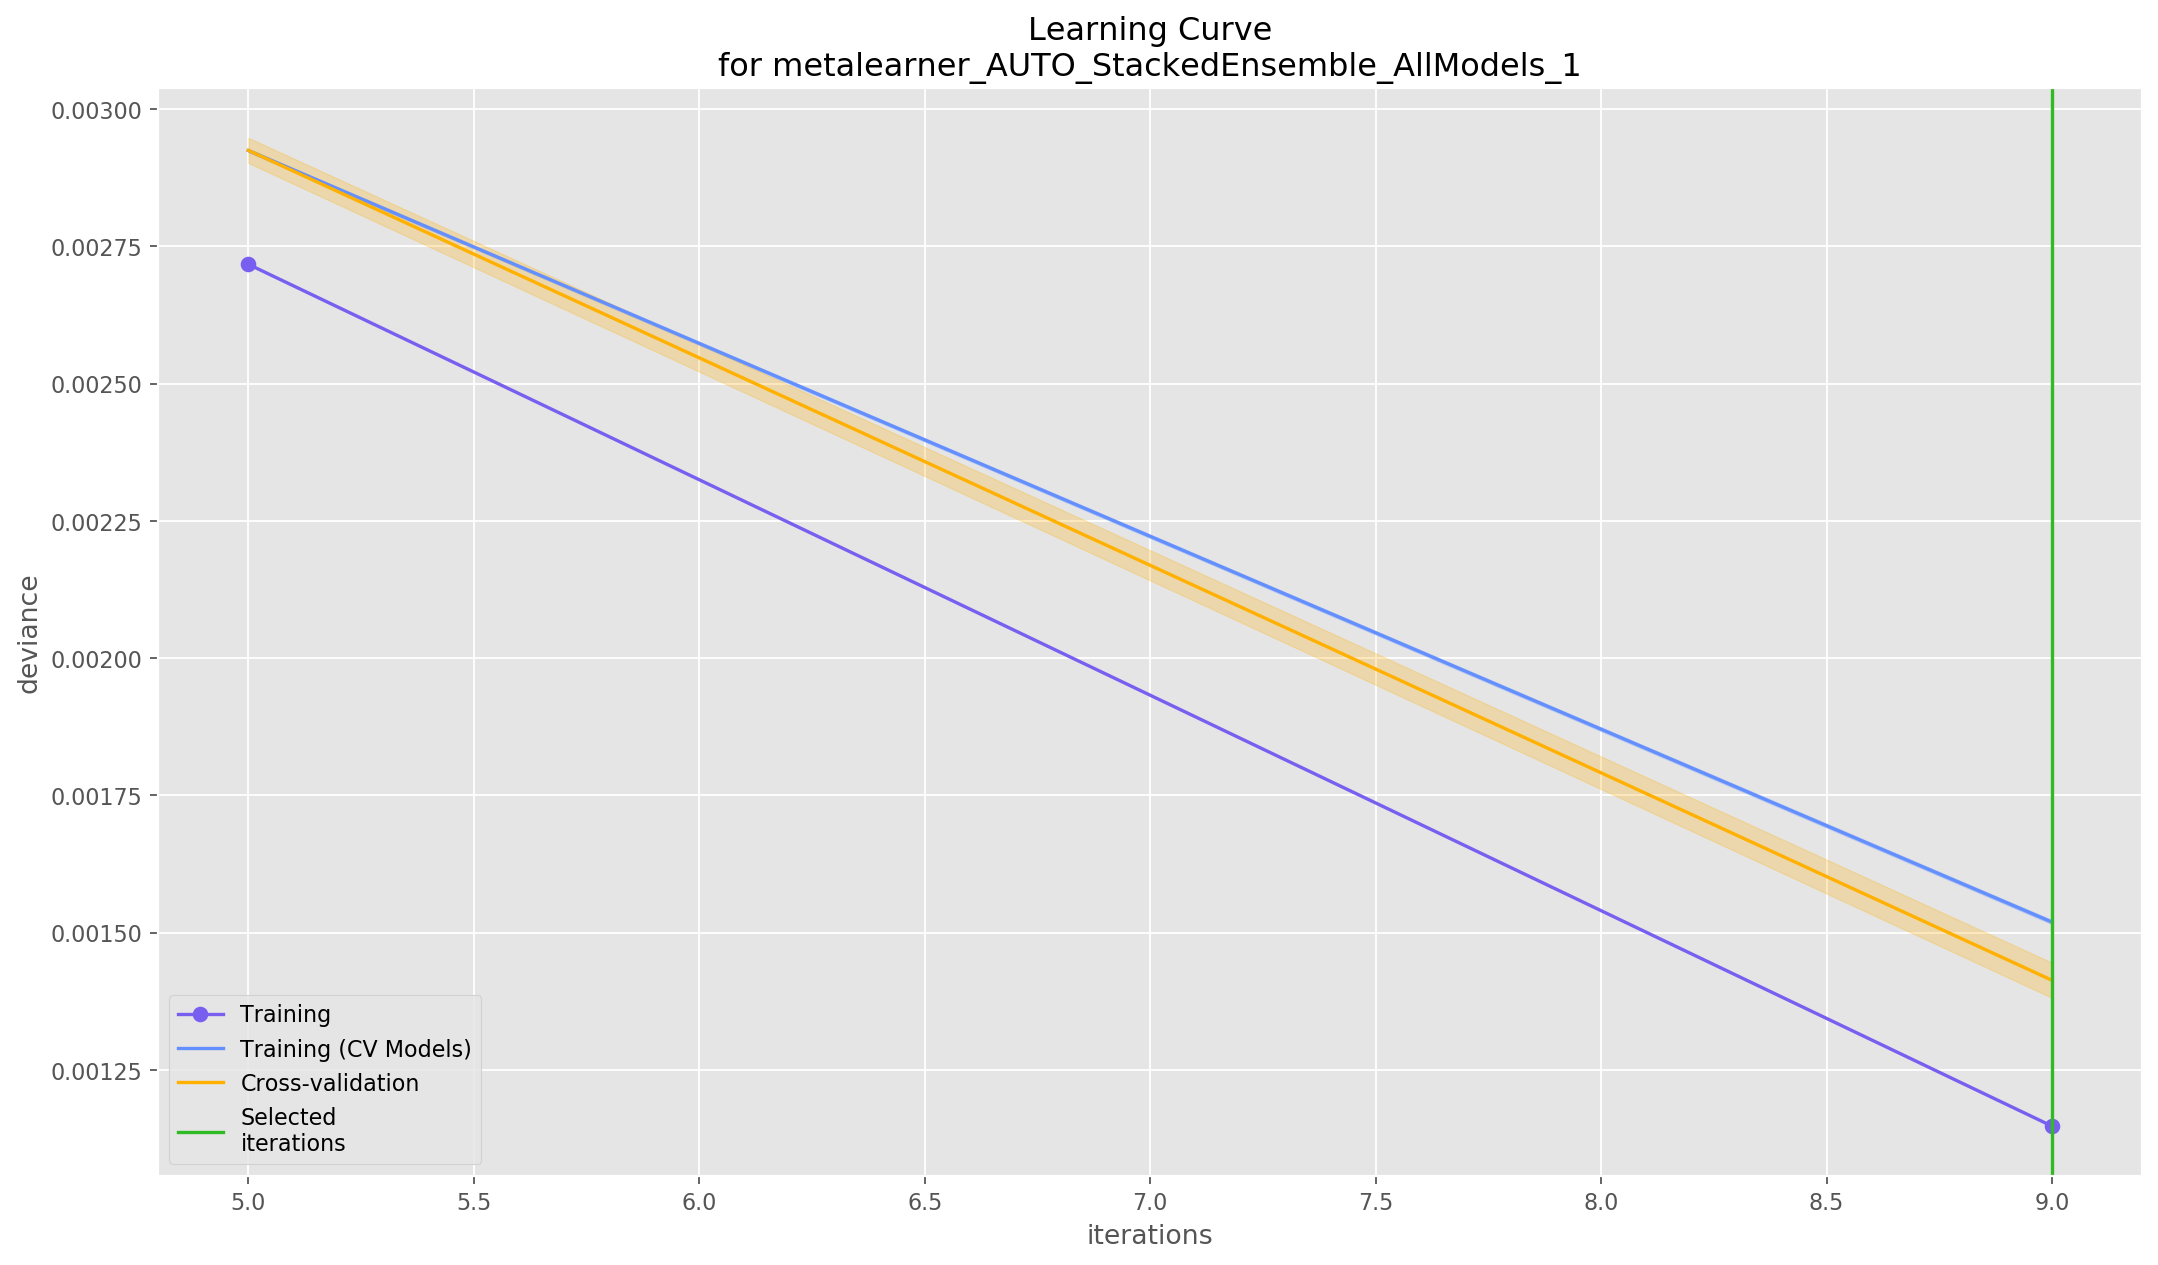

In [56]:
# Learning curve plot 

learning_curve_plot = model.learning_curve_plot()

In [57]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [58]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

onset_channel pathology HFO_80.0-250.0 HFO_250.0-600.0 spike_rate power_1.0-4.0 power_4.0-8.0 power_8.0-12.0 power_12.0-20.0 power_20.0-45.0 power_65.0-80.0 power_80.0-250.0 power_250.0-600.0 hlx_0.0-0.0 hlx_1.0-4.0 hlx_4.0-8.0 hlx_8.0-12.0 hlx_12.0-20.0 hlx_20.0-45.0 hlx_65.0-80.0 hlx_80.0-250.0 hlx_250.0-600.0 pse pac fac lfr lin_corr_median_0.0-0.0 ren_0.0-0.0 phase_sync_0.0-0.0 phase_const_0.0-0.0 pli_0.0-0.0 pli_tau_0.0-0.0 coherence_0.0-0.0 lin_corr_median_1.0-4.0 ren_1.0-4.0 phase_sync_1.0-4.0 phase_const_1.0-4.0 pli_1.0-4.0 pli_tau_1.0-4.0 coherence_1.0-4.0 lin_corr_median_4.0-8.0 ren_4.0-8.0 phase_sync_4.0-8.0 phase_const_4.0-8.0 pli_4.0-8.0 pli_tau_4.0-8.0 coherence_4.0-8.0 lin_corr_median_8.0-12.0 ren_8.0-12.0 phase_sync_8.0-12.0 phase_const_8.0-12.0 pli_8.0-12.0 pli_tau_8.0-12.0 coherence_8.0-12.0 lin_corr_median_12.0-20.0 ren_12.0-20.0 phase_sync_12.0-20.0 phase_const_12.0-20.0 pli_12.0-20.0 pli_tau_12.0-20.0 coherence_12.0-20.0 lin_corr_median_20.0-45.0 ren_20.0-45.0 phase_sync_20.0-45.0 phase_const_20.0-45.0 pli_20.0-45.0 pli_tau_20.0-45.0 coherence_20.0-45.0 lin_corr_median_65.0-80.0 ren_65.0-80.0 phase_sync_65.0-80.0 phase_const_65.0-80.0 pli_65.0-80.0 pli_tau_65.0-80.0 coherence_65.0-80.0 lin_corr_median_80.0-250.0 ren_80.0-250.0 phase_sync_80.0-250.0 phase_const_80.0-250.0 pli_80.0-250.0 pli_tau_80.0-250.0 coherence_80.0-250.0 lin_corr_median_250.0-600.0 ren_250.0-600.0 phase_sync_250.0-600.0 phase_const_250.0-600.0 pli_250.0-600.0 pli_tau_250.0-600.0 coherence_250.0-600.0 segm_type segm_number predict normal pathologic 
 
 
 NON_SOZ normal 16 40 49 0.518898 0.780688 1.059 0.246359 0.417731 0.0172302 0.0471388 0.0136991 22.8359 1.12322 1.05522 1.01696 1.03695 1.06297 1.00613 1.19346 1.06995 0.458209 -0.000984755 -0.00905946 0.168028 0.895323 0.0916576 0.836928 0.666348 0.986216 -99.3333 0.946648 0.942342 0.0795242 0.937776 0.815142 0.998376 -186.042 0.979502 0.974472 0.0350385 0.954852 0.837306 0.99803 -98.88 0.989349 0.996158 0.00660758 0.990449 0.940477 0.999811 -71.76 0.998444 0.991969 0.00839352 0.978559 0.892505 0.995642 -36.325 0.996168 0.996082 0.00432014 0.988694 0.915274 0.992457 -8.10333 0.998027 0.995883 0.00233462 0.988538 0.925232 0.999162 -9.625 0.997981 0.997392 0.00183677 0.990797 0.904985 0.931978 -0.286667 0.998458 0.993981 0.00284724 0.979349 1 0.841924 -0.113333 0.996071 0 0 normal 0.999733 0.000266776 
 NON_SOZ normal 7 49 25 0.472965 0.964676 0.716276 0.190351 0.285159 0.0119757 0.0306428 0.00867748 15.9948 1.12082 1.04599 1.01865 1.03682 1.06514 1.00607 1.19647 1.06968 0.489201 -0.00124926 -0.00812918 0.311882 0.80543 0.15446 0.738541 0.533939 0.984647 -107.542 0.925594 0.950784 0.0875988 0.949821 0.810448 0.998278 -202.5 0.98183 0.954714 0.0519073 0.931563 0.780118 0.999004 -104.74 0.983585 0.990476 0.0136245 0.980753 0.896656 0.999773 -71.48 0.996043 0.979759 0.0162106 0.953787 0.806158 0.995225 -34.7917 0.990522 0.993031 0.00514991 0.979625 0.857497 0.993686 -7.50333 0.996582 0.990899 0.0046373 0.975816 0.870893 0.995709 -9.31667 0.995484 0.994831 0.00303515 0.982651 0.849122 0.914038 -0.568333 0.996949 0.996837 0.00170874 0.987526 1 0.861303 -0.0366667 0.997865 0 0 normal 0.999588 0.000411672 
 NON_SOZ normal 6 19 8 0.347042 1.11594 1.01504 0.31053 0.481209 0.0210714 0.0541044 0.0149408 9.20048 1.2172 1.04755 1.01692 1.03646 1.06127 1.00601 1.19697 1.06963 0.566548 0.000565154 -0.0015228 0.884501 0.606213 0.25021 0.519823 0.359725 0.969987 -84.5833 0.814854 0.877887 0.151694 0.858039 0.639372 0.99688 -188.833 0.945312 0.910682 0.0819024 0.872303 0.671488 0.99627 -92.92 0.968876 0.966288 0.0354714 0.943581 0.791414 0.999378 -69.3733 0.986529 0.91726 0.0433487 0.862112 0.651536 0.996284 -30.2333 0.964943 0.931246 0.0329878 0.873649 0.631333 0.963023 -8.09333 0.968114 0.928506 0.0205303 0.87357 0.714121 0.983354 -6.8 0.967883 0.96887 0.015679 0.924473 0.657152 0.846088 -0.553333 0.982275 0.990122 0.00480543 0.96761 1 0.80995 0.1 0.993455 0 0 normal 0.999762 0.000237709 
 NON_SOZ norma

In [59]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['pathology', 'predict']].head(20)
preds

pathology     predict
0       normal      normal
1       normal      normal
2       normal      normal
3       normal      normal
4       normal      normal
5       normal      normal
6       normal      normal
7       normal      normal
8       normal      normal
9       normal      normal
10      normal      normal
11      normal      normal
12      normal      normal
13      normal      normal
14      normal      normal
15  pathologic  pathologic
16      normal      normal
17      normal      normal
18      normal      normal
19      normal      normal

In [60]:
# Save the results

#df.to_csv('df.csv')
#preds.to_csv('preds.csv')